## Datasets

## Architectural Designs Datasets from <a href="https://www.kaggle.com/datasets/gustavoachavez/architectural-styles-periods-dataset"> Kaggle</a>


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download gustavoachavez/architectural-styles-periods-dataset

100% 1.98G/1.98G [00:23<00:00, 103MB/s]
100% 1.98G/1.98G [00:23<00:00, 89.8MB/s]


In [ ]:
!unzip /content/architectural-styles-periods-dataset.zip -d /content/dataset2

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset2/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/5320.jpg  
  inflating: /content/dataset2/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53200.jpg  
  inflating: /content/dataset2/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53201.jpg  
  inflating: /content/dataset2/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53202.jpg  
  inflating: /content/dataset2/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53203.jpg  
  inflating: /content/dataset2/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53204.jpg  
  inflating: /content/dataset2/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53205.jpg  
  inflating: /content/dataset2/Capstone_Architectural_Styles_dataset/Modernism/Chicago school architecture/53206.jpg 

## Saved used images into my drive

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
count = 0

folders = os.listdir("/content/dataset2/Capstone_Architectural_Styles_dataset")

for folder in folders:
  folder_path = os.path.join("/content/dataset2/Capstone_Architectural_Styles_dataset", folder)
  sub_folders = os.listdir(folder_path)

  for sub_folder in sub_folders:
    sub_folder_path = os.path.join(folder_path, sub_folder)
    imgs = os.listdir(sub_folder_path)
    for img_path in imgs:
      try:
        img = cv2.imread(os.path.join(sub_folder_path, img_path))
        img = cv2.resize(img,(224,224))

        cv2.imwrite('/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset2/{:05d}'.format(count)+".png", img)
        count+=1
      except:
        continue

In [ ]:
len(os.listdir("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset2/"))

12284

## Create the Database Vector

In [2]:
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import GlobalMaxPooling2D

In [3]:
model = ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
model.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [4]:

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [5]:
import cv2
import numpy as np
from numpy.linalg import norm

In [6]:
def extracted_features(img_path, model):
  img = cv2.imread(img_path)
  img = cv2.resize(img, (224,224))
  img = np.array(img)
  expand_img = np.expand_dims(img, axis=0)
  pre_img = preprocess_input(expand_img)
  result = model.predict(pre_img)
  normalized = result/norm(result)
  return normalized




In [33]:
import os


filename = []
feature_list = []

filename2 = []
feature_list2 = []

filename3 = []
feature_list3 = []

# for file in os.listdir("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset1/"):
#   filename.append(os.path.join("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset1/", file))

for file in os.listdir("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset2/"):
  filename2.append(os.path.join("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset2/", file))

# for file in os.listdir("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset3/"):
#   filename3.append(os.path.join("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset3/", file))

# filename[:5]

['/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset1/09113.png',
 '/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset1/09114.png',
 '/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset1/09115.png',
 '/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset1/09116.png',
 '/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/Dataset1/09117.png']

In [ ]:
from tqdm import tqdm
import pickle

count = 0
for file in tqdm(filename2):
  feature_list2.append(extracted_features(file, model))

pickle.dump(feature_list2, open("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/featurevector2.pkl","wb"))
pickle.dump(filename2, open("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/filenames2.pkl","wb"))

  0%|          | 0/12284 [00:00<?, ?it/s]

1/1 [==============================] - 0s 238ms/step


  0%|          | 1/12284 [00:00<1:46:41,  1.92it/s]

1/1 [==============================] - 0s 220ms/step


  0%|          | 2/12284 [00:00<1:38:48,  2.07it/s]

1/1 [==============================] - 0s 222ms/step


  0%|          | 3/12284 [00:01<1:53:17,  1.81it/s]

1/1 [==============================] - 0s 210ms/step


  0%|          | 4/12284 [00:02<1:52:39,  1.82it/s]

1/1 [==============================] - 0s 232ms/step


  0%|          | 5/12284 [00:02<1:49:34,  1.87it/s]

1/1 [==============================] - 0s 214ms/step


  0%|          | 6/12284 [00:03<1:48:16,  1.89it/s]

1/1 [==============================] - 0s 216ms/step


  0%|          | 7/12284 [00:03<1:41:33,  2.01it/s]

1/1 [==============================] - 0s 250ms/step


  0%|          | 8/12284 [00:04<1:50:16,  1.86it/s]

1/1 [==============================] - 0s 424ms/step


  0%|          | 9/12284 [00:05<2:21:21,  1.45it/s]

1/1 [==============================] - 0s 363ms/step


  0%|          | 10/12284 [00:05<2:15:36,  1.51it/s]

1/1 [==============================] - 0s 340ms/step


  0%|          | 11/12284 [00:06<2:13:08,  1.54it/s]

1/1 [==============================] - 0s 343ms/step


  0%|          | 12/12284 [00:07<2:12:33,  1.54it/s]

1/1 [==============================] - 0s 346ms/step


  0%|          | 13/12284 [00:08<2:31:34,  1.35it/s]

1/1 [==============================] - 0s 199ms/step


  0%|          | 14/12284 [00:08<2:23:51,  1.42it/s]

1/1 [==============================] - 0s 225ms/step


  0%|          | 15/12284 [00:09<2:16:06,  1.50it/s]

1/1 [==============================] - 0s 236ms/step


  0%|          | 16/12284 [00:09<2:06:54,  1.61it/s]

1/1 [==============================] - 0s 236ms/step


  0%|          | 17/12284 [00:10<2:00:34,  1.70it/s]

1/1 [==============================] - 0s 215ms/step


  0%|          | 18/12284 [00:11<2:50:53,  1.20it/s]

1/1 [==============================] - 0s 205ms/step


  0%|          | 19/12284 [00:12<2:36:31,  1.31it/s]

1/1 [==============================] - 0s 200ms/step


  0%|          | 20/12284 [00:12<2:17:45,  1.48it/s]

1/1 [==============================] - 0s 229ms/step


  0%|          | 21/12284 [00:13<2:08:10,  1.59it/s]

1/1 [==============================] - 0s 228ms/step


  0%|          | 22/12284 [00:13<2:01:33,  1.68it/s]

1/1 [==============================] - 0s 216ms/step


  0%|          | 23/12284 [00:14<1:57:33,  1.74it/s]

1/1 [==============================] - 0s 216ms/step


  0%|          | 24/12284 [00:14<1:52:21,  1.82it/s]

1/1 [==============================] - 0s 212ms/step


  0%|          | 25/12284 [00:15<1:56:38,  1.75it/s]

1/1 [==============================] - 0s 212ms/step


  0%|          | 26/12284 [00:15<1:53:28,  1.80it/s]

1/1 [==============================] - 0s 220ms/step


  0%|          | 27/12284 [00:16<1:52:50,  1.81it/s]

1/1 [==============================] - 0s 263ms/step


  0%|          | 28/12284 [00:17<1:55:08,  1.77it/s]

1/1 [==============================] - 0s 229ms/step


  0%|          | 29/12284 [00:17<1:52:22,  1.82it/s]

1/1 [==============================] - 0s 238ms/step


  0%|          | 30/12284 [00:18<2:00:54,  1.69it/s]

1/1 [==============================] - 0s 342ms/step


  0%|          | 31/12284 [00:18<2:01:56,  1.67it/s]

1/1 [==============================] - 0s 352ms/step


  0%|          | 32/12284 [00:19<2:27:34,  1.38it/s]

1/1 [==============================] - 0s 347ms/step


  0%|          | 33/12284 [00:20<2:20:16,  1.46it/s]

1/1 [==============================] - 0s 326ms/step


  0%|          | 34/12284 [00:21<2:14:21,  1.52it/s]

1/1 [==============================] - 0s 320ms/step


  0%|          | 35/12284 [00:21<2:19:06,  1.47it/s]

1/1 [==============================] - 0s 210ms/step


  0%|          | 36/12284 [00:22<2:12:21,  1.54it/s]

1/1 [==============================] - 0s 194ms/step


  0%|          | 37/12284 [00:22<1:59:38,  1.71it/s]

1/1 [==============================] - 0s 212ms/step


  0%|          | 38/12284 [00:23<2:00:04,  1.70it/s]

1/1 [==============================] - 0s 209ms/step


  0%|          | 39/12284 [00:23<1:51:27,  1.83it/s]

1/1 [==============================] - 0s 214ms/step


  0%|          | 40/12284 [00:24<1:44:11,  1.96it/s]

1/1 [==============================] - 0s 201ms/step


  0%|          | 41/12284 [00:24<1:46:06,  1.92it/s]

1/1 [==============================] - 0s 217ms/step


  0%|          | 42/12284 [00:25<1:44:50,  1.95it/s]

1/1 [==============================] - 0s 206ms/step


  0%|          | 43/12284 [00:26<1:52:03,  1.82it/s]

1/1 [==============================] - 0s 216ms/step


  0%|          | 44/12284 [00:26<1:52:37,  1.81it/s]

1/1 [==============================] - 0s 201ms/step


  0%|          | 45/12284 [00:27<1:45:58,  1.92it/s]

1/1 [==============================] - 0s 240ms/step


  0%|          | 46/12284 [00:27<1:53:56,  1.79it/s]

1/1 [==============================] - 0s 228ms/step


  0%|          | 47/12284 [00:28<1:58:01,  1.73it/s]

1/1 [==============================] - 0s 230ms/step


  0%|          | 48/12284 [00:28<2:02:57,  1.66it/s]

1/1 [==============================] - 0s 234ms/step


  0%|          | 49/12284 [00:29<2:02:56,  1.66it/s]

1/1 [==============================] - 0s 208ms/step


  0%|          | 50/12284 [00:30<1:56:02,  1.76it/s]

1/1 [==============================] - 0s 230ms/step


  0%|          | 51/12284 [00:30<1:58:01,  1.73it/s]

1/1 [==============================] - 0s 233ms/step


  0%|          | 52/12284 [00:31<1:53:40,  1.79it/s]

1/1 [==============================] - 0s 288ms/step


  0%|          | 53/12284 [00:32<2:14:22,  1.52it/s]

1/1 [==============================] - 0s 464ms/step


  0%|          | 54/12284 [00:32<2:24:08,  1.41it/s]

1/1 [==============================] - 0s 347ms/step


  0%|          | 55/12284 [00:33<2:21:58,  1.44it/s]

1/1 [==============================] - 0s 349ms/step


  0%|          | 56/12284 [00:34<2:19:09,  1.46it/s]

1/1 [==============================] - 0s 340ms/step


  0%|          | 57/12284 [00:35<2:34:37,  1.32it/s]

1/1 [==============================] - 0s 307ms/step


  0%|          | 58/12284 [00:35<2:23:32,  1.42it/s]

1/1 [==============================] - 0s 198ms/step


  0%|          | 59/12284 [00:36<2:07:31,  1.60it/s]

1/1 [==============================] - 0s 202ms/step


  0%|          | 60/12284 [00:36<1:54:17,  1.78it/s]

1/1 [==============================] - 0s 202ms/step


  0%|          | 61/12284 [00:37<1:50:37,  1.84it/s]

1/1 [==============================] - 0s 200ms/step


  1%|          | 62/12284 [00:37<1:53:20,  1.80it/s]

1/1 [==============================] - 0s 209ms/step


  1%|          | 63/12284 [00:38<1:51:21,  1.83it/s]

1/1 [==============================] - 0s 201ms/step


  1%|          | 64/12284 [00:38<1:42:03,  2.00it/s]

1/1 [==============================] - 0s 232ms/step


  1%|          | 65/12284 [00:39<1:41:21,  2.01it/s]

1/1 [==============================] - 0s 221ms/step


  1%|          | 66/12284 [00:39<1:49:04,  1.87it/s]

1/1 [==============================] - 0s 221ms/step


  1%|          | 67/12284 [00:40<1:52:20,  1.81it/s]

1/1 [==============================] - 0s 211ms/step


  1%|          | 68/12284 [00:40<1:47:37,  1.89it/s]

1/1 [==============================] - 0s 205ms/step


  1%|          | 69/12284 [00:41<1:50:05,  1.85it/s]

1/1 [==============================] - 0s 196ms/step


  1%|          | 70/12284 [00:41<1:45:04,  1.94it/s]

1/1 [==============================] - 0s 200ms/step


  1%|          | 71/12284 [00:42<1:42:32,  1.98it/s]

1/1 [==============================] - 0s 196ms/step


  1%|          | 72/12284 [00:42<1:45:48,  1.92it/s]

1/1 [==============================] - 0s 230ms/step


  1%|          | 73/12284 [00:43<1:42:28,  1.99it/s]

1/1 [==============================] - 0s 224ms/step


  1%|          | 74/12284 [00:43<1:49:12,  1.86it/s]

1/1 [==============================] - 0s 208ms/step


  1%|          | 75/12284 [00:44<1:44:15,  1.95it/s]

1/1 [==============================] - 0s 195ms/step


  1%|          | 76/12284 [00:44<1:42:04,  1.99it/s]

1/1 [==============================] - 0s 210ms/step


  1%|          | 77/12284 [00:45<1:38:59,  2.06it/s]

1/1 [==============================] - 0s 269ms/step


  1%|          | 78/12284 [00:45<1:46:03,  1.92it/s]

1/1 [==============================] - 0s 312ms/step


  1%|          | 79/12284 [00:46<2:06:29,  1.61it/s]

1/1 [==============================] - 0s 342ms/step


  1%|          | 80/12284 [00:47<2:30:54,  1.35it/s]

1/1 [==============================] - 0s 342ms/step


  1%|          | 81/12284 [00:48<2:39:41,  1.27it/s]

1/1 [==============================] - 0s 200ms/step


  1%|          | 82/12284 [00:49<2:21:03,  1.44it/s]

1/1 [==============================] - 0s 212ms/step


  1%|          | 83/12284 [00:49<2:26:12,  1.39it/s]

1/1 [==============================] - 0s 202ms/step


  1%|          | 84/12284 [00:50<2:22:46,  1.42it/s]

1/1 [==============================] - 0s 202ms/step


  1%|          | 85/12284 [00:51<2:17:23,  1.48it/s]

1/1 [==============================] - 0s 203ms/step


  1%|          | 86/12284 [00:51<2:04:16,  1.64it/s]

1/1 [==============================] - 0s 202ms/step


  1%|          | 87/12284 [00:52<2:03:33,  1.65it/s]

1/1 [==============================] - 0s 199ms/step


  1%|          | 88/12284 [00:52<2:04:11,  1.64it/s]

1/1 [==============================] - 0s 217ms/step


  1%|          | 89/12284 [00:53<2:03:29,  1.65it/s]

1/1 [==============================] - 0s 199ms/step


  1%|          | 90/12284 [00:54<1:58:32,  1.71it/s]

1/1 [==============================] - 0s 241ms/step


  1%|          | 91/12284 [00:54<1:52:25,  1.81it/s]

1/1 [==============================] - 0s 231ms/step


  1%|          | 92/12284 [00:55<1:50:39,  1.84it/s]

1/1 [==============================] - 0s 245ms/step


  1%|          | 93/12284 [00:55<1:49:07,  1.86it/s]

1/1 [==============================] - 0s 223ms/step


  1%|          | 94/12284 [00:56<1:54:21,  1.78it/s]

1/1 [==============================] - 0s 243ms/step


  1%|          | 95/12284 [00:56<1:49:44,  1.85it/s]

1/1 [==============================] - 0s 226ms/step


  1%|          | 96/12284 [00:57<1:44:10,  1.95it/s]

1/1 [==============================] - 0s 219ms/step


  1%|          | 97/12284 [00:57<1:51:14,  1.83it/s]

1/1 [==============================] - 0s 203ms/step


  1%|          | 98/12284 [00:58<1:51:58,  1.81it/s]

1/1 [==============================] - 0s 208ms/step


  1%|          | 99/12284 [00:58<1:52:17,  1.81it/s]

1/1 [==============================] - 0s 296ms/step


  1%|          | 100/12284 [00:59<1:56:19,  1.75it/s]

1/1 [==============================] - 0s 340ms/step


  1%|          | 101/12284 [01:00<2:01:36,  1.67it/s]

1/1 [==============================] - 0s 375ms/step


  1%|          | 102/12284 [01:01<2:25:43,  1.39it/s]

1/1 [==============================] - 0s 368ms/step


  1%|          | 103/12284 [01:02<2:42:53,  1.25it/s]

1/1 [==============================] - 0s 231ms/step


  1%|          | 104/12284 [01:02<2:23:55,  1.41it/s]

1/1 [==============================] - 0s 201ms/step


  1%|          | 105/12284 [01:03<2:14:55,  1.50it/s]

1/1 [==============================] - 0s 198ms/step


  1%|          | 106/12284 [01:03<2:08:13,  1.58it/s]

1/1 [==============================] - 0s 197ms/step


  1%|          | 107/12284 [01:04<2:06:50,  1.60it/s]

1/1 [==============================] - 0s 208ms/step


  1%|          | 108/12284 [01:04<1:56:39,  1.74it/s]

1/1 [==============================] - 0s 206ms/step


  1%|          | 109/12284 [01:05<1:48:15,  1.87it/s]

1/1 [==============================] - 0s 224ms/step


  1%|          | 110/12284 [01:05<1:47:41,  1.88it/s]

1/1 [==============================] - 0s 229ms/step


  1%|          | 111/12284 [01:06<1:51:19,  1.82it/s]

1/1 [==============================] - 0s 238ms/step


  1%|          | 112/12284 [01:06<1:53:18,  1.79it/s]

1/1 [==============================] - 0s 216ms/step


  1%|          | 113/12284 [01:07<1:53:24,  1.79it/s]

1/1 [==============================] - 0s 218ms/step


  1%|          | 114/12284 [01:07<1:49:37,  1.85it/s]

1/1 [==============================] - 0s 208ms/step


  1%|          | 115/12284 [01:08<1:47:36,  1.88it/s]

1/1 [==============================] - 0s 225ms/step


  1%|          | 116/12284 [01:09<1:47:52,  1.88it/s]

1/1 [==============================] - 0s 198ms/step


  1%|          | 117/12284 [01:09<1:43:17,  1.96it/s]

1/1 [==============================] - 0s 207ms/step


  1%|          | 118/12284 [01:10<1:44:38,  1.94it/s]

1/1 [==============================] - 0s 199ms/step


  1%|          | 119/12284 [01:10<1:42:05,  1.99it/s]

1/1 [==============================] - 0s 204ms/step


  1%|          | 120/12284 [01:10<1:38:15,  2.06it/s]

1/1 [==============================] - 0s 199ms/step


  1%|          | 121/12284 [01:11<1:35:04,  2.13it/s]

1/1 [==============================] - 0s 224ms/step


  1%|          | 122/12284 [01:11<1:33:28,  2.17it/s]

1/1 [==============================] - 0s 273ms/step


  1%|          | 123/12284 [01:12<1:58:31,  1.71it/s]

1/1 [==============================] - 0s 376ms/step


  1%|          | 124/12284 [01:13<2:04:07,  1.63it/s]

1/1 [==============================] - 0s 327ms/step


  1%|          | 125/12284 [01:14<2:20:47,  1.44it/s]

1/1 [==============================] - 0s 330ms/step


  1%|          | 126/12284 [01:15<2:34:18,  1.31it/s]

1/1 [==============================] - 0s 310ms/step


  1%|          | 127/12284 [01:15<2:29:10,  1.36it/s]

1/1 [==============================] - 0s 210ms/step


  1%|          | 128/12284 [01:16<2:12:37,  1.53it/s]

1/1 [==============================] - 0s 209ms/step


  1%|          | 129/12284 [01:16<1:59:15,  1.70it/s]

1/1 [==============================] - 0s 259ms/step


  1%|          | 130/12284 [01:17<1:55:46,  1.75it/s]

1/1 [==============================] - 0s 201ms/step


  1%|          | 131/12284 [01:17<1:52:47,  1.80it/s]

1/1 [==============================] - 0s 212ms/step


  1%|          | 132/12284 [01:18<1:47:05,  1.89it/s]

1/1 [==============================] - 0s 219ms/step


  1%|          | 133/12284 [01:18<1:56:56,  1.73it/s]

1/1 [==============================] - 0s 208ms/step


  1%|          | 134/12284 [01:19<1:58:17,  1.71it/s]

1/1 [==============================] - 0s 224ms/step


  1%|          | 135/12284 [01:19<1:49:31,  1.85it/s]

1/1 [==============================] - 0s 231ms/step


  1%|          | 136/12284 [01:20<1:47:16,  1.89it/s]

1/1 [==============================] - 0s 214ms/step


  1%|          | 137/12284 [01:21<1:49:04,  1.86it/s]

1/1 [==============================] - 0s 201ms/step


  1%|          | 138/12284 [01:21<1:52:42,  1.80it/s]

1/1 [==============================] - 0s 229ms/step


  1%|          | 139/12284 [01:22<1:55:42,  1.75it/s]

1/1 [==============================] - 0s 220ms/step


  1%|          | 140/12284 [01:22<1:55:56,  1.75it/s]

1/1 [==============================] - 0s 201ms/step


  1%|          | 141/12284 [01:23<1:55:21,  1.75it/s]

1/1 [==============================] - 0s 220ms/step


  1%|          | 142/12284 [01:23<1:57:46,  1.72it/s]

1/1 [==============================] - 0s 223ms/step


  1%|          | 143/12284 [01:24<1:55:41,  1.75it/s]

1/1 [==============================] - 0s 205ms/step


  1%|          | 144/12284 [01:25<1:49:54,  1.84it/s]

1/1 [==============================] - 0s 201ms/step


  1%|          | 145/12284 [01:25<1:42:59,  1.96it/s]

1/1 [==============================] - 0s 205ms/step


  1%|          | 146/12284 [01:25<1:43:57,  1.95it/s]

1/1 [==============================] - 0s 355ms/step


  1%|          | 147/12284 [01:26<2:08:11,  1.58it/s]

1/1 [==============================] - 0s 355ms/step


  1%|          | 148/12284 [01:27<2:06:05,  1.60it/s]

1/1 [==============================] - 0s 335ms/step


  1%|          | 149/12284 [01:28<2:04:50,  1.62it/s]

1/1 [==============================] - 0s 336ms/step


  1%|          | 150/12284 [01:28<2:06:11,  1.60it/s]

1/1 [==============================] - 0s 324ms/step


  1%|          | 151/12284 [01:29<2:07:23,  1.59it/s]

1/1 [==============================] - 0s 216ms/step


  1%|          | 152/12284 [01:29<2:03:51,  1.63it/s]

1/1 [==============================] - 0s 204ms/step


  1%|          | 153/12284 [01:30<1:52:44,  1.79it/s]

1/1 [==============================] - 0s 220ms/step


  1%|▏         | 154/12284 [01:30<1:46:04,  1.91it/s]

1/1 [==============================] - 0s 199ms/step


  1%|▏         | 155/12284 [01:31<1:42:43,  1.97it/s]

1/1 [==============================] - 0s 214ms/step


  1%|▏         | 156/12284 [01:31<1:41:28,  1.99it/s]

1/1 [==============================] - 0s 206ms/step


  1%|▏         | 157/12284 [01:32<2:01:35,  1.66it/s]

1/1 [==============================] - 0s 202ms/step


  1%|▏         | 158/12284 [01:33<2:02:21,  1.65it/s]

1/1 [==============================] - 0s 203ms/step


  1%|▏         | 159/12284 [01:33<1:59:55,  1.69it/s]

1/1 [==============================] - 0s 214ms/step


  1%|▏         | 160/12284 [01:34<1:55:08,  1.75it/s]

1/1 [==============================] - 0s 214ms/step


  1%|▏         | 161/12284 [01:34<1:49:06,  1.85it/s]

1/1 [==============================] - 0s 210ms/step


  1%|▏         | 162/12284 [01:35<1:54:23,  1.77it/s]

1/1 [==============================] - 0s 208ms/step


  1%|▏         | 163/12284 [01:35<1:56:03,  1.74it/s]

1/1 [==============================] - 0s 202ms/step


  1%|▏         | 164/12284 [01:36<1:49:55,  1.84it/s]

1/1 [==============================] - 0s 214ms/step


  1%|▏         | 165/12284 [01:36<1:42:45,  1.97it/s]

1/1 [==============================] - 0s 204ms/step


  1%|▏         | 166/12284 [01:37<1:44:31,  1.93it/s]

1/1 [==============================] - 0s 204ms/step


  1%|▏         | 167/12284 [01:37<1:40:50,  2.00it/s]

1/1 [==============================] - 0s 209ms/step


  1%|▏         | 168/12284 [01:38<1:43:17,  1.95it/s]

1/1 [==============================] - 0s 206ms/step


  1%|▏         | 169/12284 [01:38<1:38:51,  2.04it/s]

1/1 [==============================] - 0s 209ms/step


  1%|▏         | 170/12284 [01:39<1:41:56,  1.98it/s]

1/1 [==============================] - 0s 340ms/step


  1%|▏         | 171/12284 [01:39<1:47:00,  1.89it/s]

1/1 [==============================] - 0s 351ms/step


  1%|▏         | 172/12284 [01:40<2:12:10,  1.53it/s]

1/1 [==============================] - 0s 333ms/step


  1%|▏         | 173/12284 [01:41<2:26:57,  1.37it/s]

1/1 [==============================] - 0s 350ms/step


  1%|▏         | 174/12284 [01:42<2:39:07,  1.27it/s]

1/1 [==============================] - 0s 224ms/step


  1%|▏         | 175/12284 [01:43<2:23:18,  1.41it/s]

1/1 [==============================] - 0s 214ms/step


  1%|▏         | 176/12284 [01:43<2:10:06,  1.55it/s]

1/1 [==============================] - 0s 235ms/step


  1%|▏         | 177/12284 [01:44<2:00:40,  1.67it/s]

1/1 [==============================] - 0s 211ms/step


  1%|▏         | 178/12284 [01:44<1:58:28,  1.70it/s]

1/1 [==============================] - 0s 227ms/step


  1%|▏         | 179/12284 [01:45<1:51:38,  1.81it/s]

1/1 [==============================] - 0s 204ms/step


  1%|▏         | 180/12284 [01:45<1:53:01,  1.78it/s]

1/1 [==============================] - 0s 221ms/step


  1%|▏         | 181/12284 [01:46<2:03:55,  1.63it/s]

1/1 [==============================] - 0s 258ms/step


  1%|▏         | 182/12284 [01:47<2:03:35,  1.63it/s]

1/1 [==============================] - 0s 208ms/step


  1%|▏         | 183/12284 [01:47<1:56:14,  1.73it/s]

1/1 [==============================] - 0s 198ms/step


  1%|▏         | 184/12284 [01:48<1:48:55,  1.85it/s]

1/1 [==============================] - 0s 215ms/step


  2%|▏         | 185/12284 [01:48<1:51:17,  1.81it/s]

1/1 [==============================] - 0s 229ms/step


  2%|▏         | 186/12284 [01:49<1:47:22,  1.88it/s]

1/1 [==============================] - 0s 218ms/step


  2%|▏         | 187/12284 [01:49<1:43:54,  1.94it/s]

1/1 [==============================] - 0s 223ms/step


  2%|▏         | 188/12284 [01:50<1:47:15,  1.88it/s]

1/1 [==============================] - 0s 212ms/step


  2%|▏         | 189/12284 [01:50<1:48:56,  1.85it/s]

1/1 [==============================] - 0s 195ms/step


  2%|▏         | 190/12284 [01:51<1:50:49,  1.82it/s]

1/1 [==============================] - 0s 226ms/step


  2%|▏         | 191/12284 [01:51<1:47:25,  1.88it/s]

1/1 [==============================] - 0s 232ms/step


  2%|▏         | 192/12284 [01:52<1:46:30,  1.89it/s]

1/1 [==============================] - 0s 345ms/step


  2%|▏         | 193/12284 [01:53<2:16:30,  1.48it/s]

1/1 [==============================] - 0s 335ms/step


  2%|▏         | 194/12284 [01:54<2:17:00,  1.47it/s]

1/1 [==============================] - 0s 332ms/step


  2%|▏         | 195/12284 [01:54<2:09:49,  1.55it/s]

1/1 [==============================] - 0s 335ms/step


  2%|▏         | 196/12284 [01:55<2:27:07,  1.37it/s]

1/1 [==============================] - 0s 212ms/step


  2%|▏         | 197/12284 [01:56<2:25:36,  1.38it/s]

1/1 [==============================] - 0s 211ms/step


  2%|▏         | 198/12284 [01:56<2:16:52,  1.47it/s]

1/1 [==============================] - 0s 218ms/step


  2%|▏         | 199/12284 [01:57<2:15:56,  1.48it/s]

1/1 [==============================] - 0s 215ms/step


  2%|▏         | 200/12284 [01:58<2:15:51,  1.48it/s]

1/1 [==============================] - 0s 247ms/step


  2%|▏         | 201/12284 [01:58<2:11:44,  1.53it/s]

1/1 [==============================] - 0s 217ms/step


  2%|▏         | 202/12284 [01:59<2:01:54,  1.65it/s]

1/1 [==============================] - 0s 235ms/step


  2%|▏         | 203/12284 [01:59<1:54:07,  1.76it/s]

1/1 [==============================] - 0s 224ms/step


  2%|▏         | 204/12284 [02:00<1:57:50,  1.71it/s]

1/1 [==============================] - 0s 218ms/step


  2%|▏         | 205/12284 [02:00<1:53:34,  1.77it/s]

1/1 [==============================] - 0s 202ms/step


  2%|▏         | 206/12284 [02:01<1:55:18,  1.75it/s]

1/1 [==============================] - 0s 217ms/step


  2%|▏         | 207/12284 [02:02<1:48:18,  1.86it/s]

1/1 [==============================] - 0s 216ms/step


  2%|▏         | 208/12284 [02:02<1:43:38,  1.94it/s]

1/1 [==============================] - 0s 243ms/step


  2%|▏         | 209/12284 [02:03<1:45:39,  1.90it/s]

1/1 [==============================] - 0s 218ms/step


  2%|▏         | 210/12284 [02:03<1:41:09,  1.99it/s]

1/1 [==============================] - 0s 237ms/step


  2%|▏         | 211/12284 [02:04<1:42:41,  1.96it/s]

1/1 [==============================] - 0s 221ms/step


  2%|▏         | 212/12284 [02:04<1:42:35,  1.96it/s]

1/1 [==============================] - 0s 216ms/step


  2%|▏         | 213/12284 [02:05<1:42:34,  1.96it/s]

1/1 [==============================] - 0s 194ms/step


  2%|▏         | 214/12284 [02:05<1:46:48,  1.88it/s]

1/1 [==============================] - 0s 269ms/step


  2%|▏         | 215/12284 [02:06<1:50:16,  1.82it/s]

1/1 [==============================] - 0s 331ms/step


  2%|▏         | 216/12284 [02:06<2:01:43,  1.65it/s]

1/1 [==============================] - 0s 327ms/step


  2%|▏         | 217/12284 [02:07<2:02:51,  1.64it/s]

1/1 [==============================] - 0s 338ms/step


  2%|▏         | 218/12284 [02:08<2:02:30,  1.64it/s]

1/1 [==============================] - 0s 325ms/step


  2%|▏         | 219/12284 [02:08<2:00:40,  1.67it/s]

1/1 [==============================] - 0s 350ms/step


  2%|▏         | 220/12284 [02:09<2:18:42,  1.45it/s]

1/1 [==============================] - 0s 243ms/step


  2%|▏         | 221/12284 [02:10<2:09:55,  1.55it/s]

1/1 [==============================] - 0s 212ms/step


  2%|▏         | 222/12284 [02:10<1:58:30,  1.70it/s]

1/1 [==============================] - 0s 216ms/step


  2%|▏         | 223/12284 [02:11<1:53:35,  1.77it/s]

1/1 [==============================] - 0s 214ms/step


  2%|▏         | 224/12284 [02:11<1:52:21,  1.79it/s]

1/1 [==============================] - 0s 233ms/step


  2%|▏         | 225/12284 [02:12<2:01:34,  1.65it/s]

1/1 [==============================] - 0s 216ms/step


  2%|▏         | 226/12284 [02:12<1:52:33,  1.79it/s]

1/1 [==============================] - 0s 220ms/step


  2%|▏         | 227/12284 [02:13<1:50:54,  1.81it/s]

1/1 [==============================] - 0s 198ms/step


  2%|▏         | 228/12284 [02:14<1:54:43,  1.75it/s]

1/1 [==============================] - 0s 210ms/step


  2%|▏         | 229/12284 [02:14<1:53:32,  1.77it/s]

1/1 [==============================] - 0s 203ms/step


  2%|▏         | 230/12284 [02:14<1:44:09,  1.93it/s]

1/1 [==============================] - 0s 213ms/step


  2%|▏         | 231/12284 [02:15<1:40:47,  1.99it/s]

1/1 [==============================] - 0s 196ms/step


  2%|▏         | 232/12284 [02:16<1:44:18,  1.93it/s]

1/1 [==============================] - 0s 210ms/step


  2%|▏         | 233/12284 [02:16<1:40:06,  2.01it/s]

1/1 [==============================] - 0s 196ms/step


  2%|▏         | 234/12284 [02:16<1:41:19,  1.98it/s]

1/1 [==============================] - 0s 231ms/step


  2%|▏         | 235/12284 [02:17<1:41:44,  1.97it/s]

1/1 [==============================] - 0s 224ms/step


  2%|▏         | 236/12284 [02:18<1:46:13,  1.89it/s]

1/1 [==============================] - 0s 218ms/step


  2%|▏         | 237/12284 [02:18<1:42:35,  1.96it/s]

1/1 [==============================] - 0s 212ms/step


  2%|▏         | 238/12284 [02:19<1:45:20,  1.91it/s]

1/1 [==============================] - 0s 216ms/step


  2%|▏         | 239/12284 [02:19<1:46:26,  1.89it/s]

1/1 [==============================] - 0s 344ms/step


  2%|▏         | 240/12284 [02:20<1:52:28,  1.78it/s]

1/1 [==============================] - 0s 346ms/step


  2%|▏         | 241/12284 [02:20<1:57:46,  1.70it/s]

1/1 [==============================] - 0s 331ms/step


  2%|▏         | 242/12284 [02:21<2:16:01,  1.48it/s]

1/1 [==============================] - 0s 320ms/step


  2%|▏         | 243/12284 [02:22<2:12:13,  1.52it/s]

1/1 [==============================] - 0s 318ms/step


  2%|▏         | 244/12284 [02:23<2:11:22,  1.53it/s]

1/1 [==============================] - 0s 199ms/step


  2%|▏         | 245/12284 [02:23<2:05:32,  1.60it/s]

1/1 [==============================] - 0s 197ms/step


  2%|▏         | 246/12284 [02:24<1:59:13,  1.68it/s]

1/1 [==============================] - 0s 198ms/step


  2%|▏         | 247/12284 [02:24<1:49:02,  1.84it/s]

1/1 [==============================] - 0s 199ms/step


  2%|▏         | 248/12284 [02:25<1:43:54,  1.93it/s]

1/1 [==============================] - 0s 207ms/step


  2%|▏         | 249/12284 [02:25<1:38:46,  2.03it/s]

1/1 [==============================] - 0s 220ms/step


  2%|▏         | 250/12284 [02:25<1:40:25,  2.00it/s]

1/1 [==============================] - 0s 212ms/step


  2%|▏         | 251/12284 [02:26<1:45:07,  1.91it/s]

1/1 [==============================] - 0s 222ms/step


  2%|▏         | 252/12284 [02:27<1:47:41,  1.86it/s]

1/1 [==============================] - 0s 199ms/step


  2%|▏         | 253/12284 [02:27<1:49:41,  1.83it/s]

1/1 [==============================] - 0s 198ms/step


  2%|▏         | 254/12284 [02:28<1:52:06,  1.79it/s]

1/1 [==============================] - 0s 216ms/step


  2%|▏         | 255/12284 [02:28<1:46:31,  1.88it/s]

1/1 [==============================] - 0s 222ms/step


  2%|▏         | 256/12284 [02:29<1:48:23,  1.85it/s]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 257/12284 [02:29<1:46:27,  1.88it/s]

1/1 [==============================] - 0s 201ms/step


  2%|▏         | 258/12284 [02:30<1:42:53,  1.95it/s]

1/1 [==============================] - 0s 206ms/step


  2%|▏         | 259/12284 [02:30<1:46:00,  1.89it/s]

1/1 [==============================] - 0s 197ms/step


  2%|▏         | 260/12284 [02:31<1:49:28,  1.83it/s]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 261/12284 [02:32<1:50:08,  1.82it/s]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 262/12284 [02:32<1:46:22,  1.88it/s]

1/1 [==============================] - 0s 223ms/step


  2%|▏         | 263/12284 [02:32<1:42:28,  1.96it/s]

1/1 [==============================] - 0s 318ms/step


  2%|▏         | 264/12284 [02:33<1:50:25,  1.81it/s]

1/1 [==============================] - 0s 354ms/step


  2%|▏         | 265/12284 [02:34<2:17:53,  1.45it/s]

1/1 [==============================] - 0s 355ms/step


  2%|▏         | 266/12284 [02:35<2:15:24,  1.48it/s]

1/1 [==============================] - 0s 359ms/step


  2%|▏         | 267/12284 [02:36<2:25:22,  1.38it/s]

1/1 [==============================] - 0s 215ms/step


  2%|▏         | 268/12284 [02:36<2:17:45,  1.45it/s]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 269/12284 [02:37<2:09:23,  1.55it/s]

1/1 [==============================] - 0s 194ms/step


  2%|▏         | 270/12284 [02:37<2:04:37,  1.61it/s]

1/1 [==============================] - 0s 222ms/step


  2%|▏         | 271/12284 [02:38<2:00:17,  1.66it/s]

1/1 [==============================] - 0s 232ms/step


  2%|▏         | 272/12284 [02:38<1:53:40,  1.76it/s]

1/1 [==============================] - 0s 243ms/step


  2%|▏         | 273/12284 [02:39<1:51:38,  1.79it/s]

1/1 [==============================] - 0s 224ms/step


  2%|▏         | 274/12284 [02:39<1:48:29,  1.85it/s]

1/1 [==============================] - 0s 239ms/step


  2%|▏         | 275/12284 [02:40<1:46:09,  1.89it/s]

1/1 [==============================] - 0s 204ms/step


  2%|▏         | 276/12284 [02:40<1:41:14,  1.98it/s]

1/1 [==============================] - 0s 220ms/step


  2%|▏         | 277/12284 [02:41<1:46:35,  1.88it/s]

1/1 [==============================] - 0s 209ms/step


  2%|▏         | 278/12284 [02:41<1:43:59,  1.92it/s]

1/1 [==============================] - 0s 216ms/step


  2%|▏         | 279/12284 [02:42<1:45:22,  1.90it/s]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 280/12284 [02:42<1:39:47,  2.00it/s]

1/1 [==============================] - 0s 210ms/step


  2%|▏         | 281/12284 [02:43<1:51:57,  1.79it/s]

1/1 [==============================] - 0s 221ms/step


  2%|▏         | 282/12284 [02:44<1:47:36,  1.86it/s]

1/1 [==============================] - 0s 227ms/step


  2%|▏         | 283/12284 [02:44<1:52:28,  1.78it/s]

1/1 [==============================] - 0s 205ms/step


  2%|▏         | 284/12284 [02:45<1:54:26,  1.75it/s]

1/1 [==============================] - 0s 199ms/step


  2%|▏         | 285/12284 [02:45<1:53:45,  1.76it/s]

1/1 [==============================] - 0s 198ms/step


  2%|▏         | 286/12284 [02:46<1:54:54,  1.74it/s]

1/1 [==============================] - 0s 362ms/step


  2%|▏         | 287/12284 [02:47<2:15:49,  1.47it/s]

1/1 [==============================] - 0s 349ms/step


  2%|▏         | 288/12284 [02:48<2:32:37,  1.31it/s]

1/1 [==============================] - 0s 322ms/step


  2%|▏         | 289/12284 [02:49<2:26:14,  1.37it/s]

1/1 [==============================] - 0s 352ms/step


  2%|▏         | 290/12284 [02:49<2:20:45,  1.42it/s]

1/1 [==============================] - 0s 204ms/step


  2%|▏         | 291/12284 [02:50<2:11:20,  1.52it/s]

1/1 [==============================] - 0s 196ms/step


  2%|▏         | 292/12284 [02:50<2:03:45,  1.62it/s]

1/1 [==============================] - 0s 207ms/step


  2%|▏         | 293/12284 [02:51<1:58:43,  1.68it/s]

1/1 [==============================] - 0s 214ms/step


  2%|▏         | 294/12284 [02:51<1:59:13,  1.68it/s]

1/1 [==============================] - 0s 196ms/step


  2%|▏         | 295/12284 [02:52<1:56:35,  1.71it/s]

1/1 [==============================] - 0s 217ms/step


  2%|▏         | 296/12284 [02:52<1:46:54,  1.87it/s]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 297/12284 [02:53<1:49:22,  1.83it/s]

1/1 [==============================] - 0s 211ms/step


  2%|▏         | 298/12284 [02:53<1:44:41,  1.91it/s]

1/1 [==============================] - 0s 201ms/step


  2%|▏         | 299/12284 [02:54<1:38:16,  2.03it/s]

1/1 [==============================] - 0s 203ms/step


  2%|▏         | 300/12284 [02:54<1:40:53,  1.98it/s]

1/1 [==============================] - 0s 211ms/step


  2%|▏         | 301/12284 [02:55<1:37:57,  2.04it/s]

1/1 [==============================] - 0s 217ms/step


  2%|▏         | 302/12284 [02:55<1:36:51,  2.06it/s]

1/1 [==============================] - 0s 211ms/step


  2%|▏         | 303/12284 [02:56<1:42:06,  1.96it/s]

1/1 [==============================] - 0s 212ms/step


  2%|▏         | 304/12284 [02:56<1:37:34,  2.05it/s]

1/1 [==============================] - 0s 224ms/step


  2%|▏         | 305/12284 [02:57<1:38:35,  2.02it/s]

1/1 [==============================] - 0s 220ms/step


  2%|▏         | 306/12284 [02:57<1:42:29,  1.95it/s]

1/1 [==============================] - 0s 216ms/step


  2%|▏         | 307/12284 [02:58<1:46:53,  1.87it/s]

1/1 [==============================] - 0s 247ms/step


  3%|▎         | 308/12284 [02:58<1:46:28,  1.87it/s]

1/1 [==============================] - 0s 210ms/step


  3%|▎         | 309/12284 [02:59<1:41:44,  1.96it/s]

1/1 [==============================] - 0s 210ms/step


  3%|▎         | 310/12284 [02:59<1:46:03,  1.88it/s]

1/1 [==============================] - 0s 350ms/step


  3%|▎         | 311/12284 [03:00<2:10:50,  1.53it/s]

1/1 [==============================] - 0s 354ms/step


  3%|▎         | 312/12284 [03:01<2:08:59,  1.55it/s]

1/1 [==============================] - 0s 334ms/step


  3%|▎         | 313/12284 [03:02<2:04:42,  1.60it/s]

1/1 [==============================] - 0s 346ms/step


  3%|▎         | 314/12284 [03:03<2:26:13,  1.36it/s]

1/1 [==============================] - 0s 204ms/step


  3%|▎         | 315/12284 [03:03<2:13:37,  1.49it/s]

1/1 [==============================] - 0s 200ms/step


  3%|▎         | 316/12284 [03:04<1:59:18,  1.67it/s]

1/1 [==============================] - 0s 197ms/step


  3%|▎         | 317/12284 [03:04<1:49:00,  1.83it/s]

1/1 [==============================] - 0s 197ms/step


  3%|▎         | 318/12284 [03:05<1:51:58,  1.78it/s]

1/1 [==============================] - 0s 209ms/step


  3%|▎         | 319/12284 [03:05<1:49:53,  1.81it/s]

1/1 [==============================] - 0s 203ms/step


  3%|▎         | 320/12284 [03:06<1:43:35,  1.92it/s]

1/1 [==============================] - 0s 202ms/step


  3%|▎         | 321/12284 [03:06<1:49:06,  1.83it/s]

1/1 [==============================] - 0s 207ms/step


  3%|▎         | 322/12284 [03:07<1:42:31,  1.94it/s]

1/1 [==============================] - 0s 202ms/step


  3%|▎         | 323/12284 [03:07<1:46:37,  1.87it/s]

1/1 [==============================] - 0s 203ms/step


  3%|▎         | 324/12284 [03:08<1:48:24,  1.84it/s]

1/1 [==============================] - 0s 199ms/step


  3%|▎         | 325/12284 [03:08<1:51:46,  1.78it/s]

1/1 [==============================] - 0s 212ms/step


  3%|▎         | 326/12284 [03:09<1:51:27,  1.79it/s]

1/1 [==============================] - 0s 199ms/step


  3%|▎         | 327/12284 [03:10<2:08:16,  1.55it/s]

1/1 [==============================] - 0s 203ms/step


  3%|▎         | 328/12284 [03:10<2:03:59,  1.61it/s]

1/1 [==============================] - 0s 201ms/step


  3%|▎         | 329/12284 [03:11<1:59:41,  1.66it/s]

1/1 [==============================] - 0s 198ms/step


  3%|▎         | 330/12284 [03:11<1:57:07,  1.70it/s]

1/1 [==============================] - 0s 236ms/step


  3%|▎         | 331/12284 [03:12<1:57:10,  1.70it/s]

1/1 [==============================] - 0s 240ms/step


  3%|▎         | 332/12284 [03:13<2:01:21,  1.64it/s]

1/1 [==============================] - 0s 425ms/step


  3%|▎         | 333/12284 [03:13<2:10:23,  1.53it/s]

1/1 [==============================] - 0s 361ms/step


  3%|▎         | 334/12284 [03:14<2:14:12,  1.48it/s]

1/1 [==============================] - 0s 351ms/step


  3%|▎         | 335/12284 [03:15<2:41:41,  1.23it/s]

1/1 [==============================] - 0s 355ms/step


  3%|▎         | 336/12284 [03:16<2:30:40,  1.32it/s]

1/1 [==============================] - 0s 204ms/step


  3%|▎         | 337/12284 [03:16<2:18:22,  1.44it/s]

1/1 [==============================] - 0s 196ms/step


  3%|▎         | 338/12284 [03:17<2:11:35,  1.51it/s]

1/1 [==============================] - 0s 196ms/step


  3%|▎         | 339/12284 [03:18<2:05:53,  1.58it/s]

1/1 [==============================] - 0s 237ms/step


  3%|▎         | 340/12284 [03:18<2:00:08,  1.66it/s]

1/1 [==============================] - 0s 220ms/step


  3%|▎         | 341/12284 [03:19<1:59:40,  1.66it/s]

1/1 [==============================] - 0s 235ms/step


  3%|▎         | 342/12284 [03:19<1:59:02,  1.67it/s]

1/1 [==============================] - 0s 215ms/step


  3%|▎         | 343/12284 [03:20<2:02:33,  1.62it/s]

1/1 [==============================] - 0s 211ms/step


  3%|▎         | 344/12284 [03:21<2:00:57,  1.65it/s]

1/1 [==============================] - 0s 203ms/step


  3%|▎         | 345/12284 [03:21<1:54:37,  1.74it/s]

1/1 [==============================] - 0s 200ms/step


  3%|▎         | 346/12284 [03:22<1:52:34,  1.77it/s]

1/1 [==============================] - 0s 194ms/step


  3%|▎         | 347/12284 [03:22<1:43:20,  1.93it/s]

1/1 [==============================] - 0s 201ms/step


  3%|▎         | 348/12284 [03:23<1:41:31,  1.96it/s]

1/1 [==============================] - 0s 189ms/step


  3%|▎         | 349/12284 [03:23<1:36:32,  2.06it/s]

1/1 [==============================] - 0s 211ms/step


  3%|▎         | 350/12284 [03:24<1:40:28,  1.98it/s]

1/1 [==============================] - 0s 193ms/step


  3%|▎         | 351/12284 [03:24<1:43:43,  1.92it/s]

1/1 [==============================] - 0s 210ms/step


  3%|▎         | 352/12284 [03:24<1:36:55,  2.05it/s]

1/1 [==============================] - 0s 192ms/step


  3%|▎         | 353/12284 [03:25<1:39:08,  2.01it/s]

1/1 [==============================] - 0s 229ms/step


  3%|▎         | 354/12284 [03:26<1:40:14,  1.98it/s]

1/1 [==============================] - 0s 212ms/step


  3%|▎         | 355/12284 [03:26<1:37:30,  2.04it/s]

1/1 [==============================] - 0s 330ms/step


  3%|▎         | 356/12284 [03:27<1:49:05,  1.82it/s]

1/1 [==============================] - 0s 318ms/step


  3%|▎         | 357/12284 [03:27<1:52:21,  1.77it/s]

1/1 [==============================] - 0s 343ms/step


  3%|▎         | 358/12284 [03:28<2:02:29,  1.62it/s]

1/1 [==============================] - 0s 356ms/step


  3%|▎         | 359/12284 [03:29<2:03:23,  1.61it/s]

1/1 [==============================] - 0s 327ms/step


  3%|▎         | 360/12284 [03:29<2:02:09,  1.63it/s]

1/1 [==============================] - 0s 261ms/step


  3%|▎         | 361/12284 [03:30<2:04:09,  1.60it/s]

1/1 [==============================] - 0s 201ms/step


  3%|▎         | 362/12284 [03:30<1:53:02,  1.76it/s]

1/1 [==============================] - 0s 204ms/step


  3%|▎         | 363/12284 [03:31<1:47:56,  1.84it/s]

1/1 [==============================] - 0s 192ms/step


  3%|▎         | 364/12284 [03:31<1:48:24,  1.83it/s]

1/1 [==============================] - 0s 194ms/step


  3%|▎         | 365/12284 [03:32<1:48:18,  1.83it/s]

1/1 [==============================] - 0s 197ms/step


  3%|▎         | 366/12284 [03:32<1:49:30,  1.81it/s]

1/1 [==============================] - 0s 191ms/step


  3%|▎         | 367/12284 [03:33<1:45:02,  1.89it/s]

1/1 [==============================] - 0s 217ms/step


  3%|▎         | 368/12284 [03:33<1:43:08,  1.93it/s]

1/1 [==============================] - 0s 215ms/step


  3%|▎         | 369/12284 [03:34<1:40:36,  1.97it/s]

1/1 [==============================] - 0s 222ms/step


  3%|▎         | 370/12284 [03:34<1:42:43,  1.93it/s]

1/1 [==============================] - 0s 193ms/step


  3%|▎         | 371/12284 [03:35<1:37:06,  2.04it/s]

1/1 [==============================] - 0s 207ms/step


  3%|▎         | 372/12284 [03:35<1:43:57,  1.91it/s]

1/1 [==============================] - 0s 192ms/step


  3%|▎         | 373/12284 [03:36<1:43:03,  1.93it/s]

1/1 [==============================] - 0s 198ms/step


  3%|▎         | 374/12284 [03:37<1:43:16,  1.92it/s]

1/1 [==============================] - 0s 193ms/step


  3%|▎         | 375/12284 [03:37<1:47:47,  1.84it/s]

1/1 [==============================] - 0s 197ms/step


  3%|▎         | 376/12284 [03:38<1:42:47,  1.93it/s]

1/1 [==============================] - 0s 193ms/step


  3%|▎         | 377/12284 [03:38<1:47:14,  1.85it/s]

1/1 [==============================] - 0s 203ms/step


  3%|▎         | 378/12284 [03:39<1:54:32,  1.73it/s]

1/1 [==============================] - 0s 195ms/step


  3%|▎         | 379/12284 [03:39<1:48:03,  1.84it/s]

1/1 [==============================] - 0s 258ms/step


  3%|▎         | 380/12284 [03:40<1:51:45,  1.78it/s]

1/1 [==============================] - 0s 378ms/step


  3%|▎         | 381/12284 [03:41<1:56:14,  1.71it/s]

1/1 [==============================] - 0s 343ms/step


  3%|▎         | 382/12284 [03:41<2:15:22,  1.47it/s]

1/1 [==============================] - 0s 339ms/step


  3%|▎         | 383/12284 [03:42<2:29:49,  1.32it/s]

1/1 [==============================] - 0s 319ms/step


  3%|▎         | 384/12284 [03:43<2:22:08,  1.40it/s]

1/1 [==============================] - 0s 202ms/step


  3%|▎         | 385/12284 [03:44<2:09:10,  1.54it/s]

1/1 [==============================] - 0s 198ms/step


  3%|▎         | 386/12284 [03:44<1:59:05,  1.67it/s]

1/1 [==============================] - 0s 209ms/step


  3%|▎         | 387/12284 [03:45<1:58:06,  1.68it/s]

1/1 [==============================] - 0s 195ms/step


  3%|▎         | 388/12284 [03:45<1:57:08,  1.69it/s]

1/1 [==============================] - 0s 198ms/step


  3%|▎         | 389/12284 [03:46<1:57:36,  1.69it/s]

1/1 [==============================] - 0s 227ms/step


  3%|▎         | 390/12284 [03:46<1:50:32,  1.79it/s]

1/1 [==============================] - 0s 204ms/step


  3%|▎         | 391/12284 [03:47<1:48:16,  1.83it/s]

1/1 [==============================] - 0s 204ms/step


  3%|▎         | 392/12284 [03:48<2:01:42,  1.63it/s]

1/1 [==============================] - 0s 218ms/step


  3%|▎         | 393/12284 [03:48<1:50:49,  1.79it/s]

1/1 [==============================] - 0s 224ms/step


  3%|▎         | 394/12284 [03:48<1:45:55,  1.87it/s]

1/1 [==============================] - 0s 228ms/step


  3%|▎         | 395/12284 [03:50<2:24:50,  1.37it/s]

1/1 [==============================] - 0s 196ms/step


  3%|▎         | 396/12284 [03:50<2:15:14,  1.47it/s]

1/1 [==============================] - 0s 204ms/step


  3%|▎         | 397/12284 [03:51<2:09:44,  1.53it/s]

1/1 [==============================] - 0s 224ms/step


  3%|▎         | 398/12284 [03:51<2:05:31,  1.58it/s]

1/1 [==============================] - 0s 209ms/step


  3%|▎         | 399/12284 [03:52<1:59:05,  1.66it/s]

1/1 [==============================] - 0s 220ms/step


  3%|▎         | 400/12284 [03:53<2:01:20,  1.63it/s]

1/1 [==============================] - 0s 199ms/step


  3%|▎         | 401/12284 [03:53<2:01:34,  1.63it/s]

1/1 [==============================] - 0s 351ms/step


  3%|▎         | 402/12284 [03:54<2:23:27,  1.38it/s]

1/1 [==============================] - 0s 351ms/step


  3%|▎         | 403/12284 [03:55<2:20:09,  1.41it/s]

1/1 [==============================] - 0s 332ms/step


  3%|▎         | 404/12284 [03:55<2:15:51,  1.46it/s]

1/1 [==============================] - 0s 332ms/step


  3%|▎         | 405/12284 [03:56<2:11:02,  1.51it/s]

1/1 [==============================] - 0s 291ms/step


  3%|▎         | 406/12284 [03:57<2:14:32,  1.47it/s]

1/1 [==============================] - 0s 230ms/step


  3%|▎         | 407/12284 [03:57<2:04:03,  1.60it/s]

1/1 [==============================] - 0s 219ms/step


  3%|▎         | 408/12284 [03:58<2:03:54,  1.60it/s]

1/1 [==============================] - 0s 248ms/step


  3%|▎         | 409/12284 [03:58<2:01:26,  1.63it/s]

1/1 [==============================] - 0s 221ms/step


  3%|▎         | 410/12284 [03:59<1:59:58,  1.65it/s]

1/1 [==============================] - 0s 206ms/step


  3%|▎         | 411/12284 [04:00<1:56:58,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


  3%|▎         | 412/12284 [04:00<1:59:00,  1.66it/s]

1/1 [==============================] - 0s 229ms/step


  3%|▎         | 413/12284 [04:01<1:52:23,  1.76it/s]

1/1 [==============================] - 0s 211ms/step


  3%|▎         | 414/12284 [04:01<1:50:05,  1.80it/s]

1/1 [==============================] - 0s 220ms/step


  3%|▎         | 415/12284 [04:02<1:53:34,  1.74it/s]

1/1 [==============================] - 0s 246ms/step


  3%|▎         | 416/12284 [04:02<1:54:51,  1.72it/s]

1/1 [==============================] - 0s 227ms/step


  3%|▎         | 417/12284 [04:03<1:53:17,  1.75it/s]

1/1 [==============================] - 0s 210ms/step


  3%|▎         | 418/12284 [04:04<1:54:16,  1.73it/s]

1/1 [==============================] - 0s 233ms/step


  3%|▎         | 419/12284 [04:04<1:57:52,  1.68it/s]

1/1 [==============================] - 0s 241ms/step


  3%|▎         | 420/12284 [04:05<1:59:12,  1.66it/s]

1/1 [==============================] - 0s 231ms/step


  3%|▎         | 421/12284 [04:05<1:52:38,  1.76it/s]

1/1 [==============================] - 0s 246ms/step


  3%|▎         | 422/12284 [04:06<1:56:12,  1.70it/s]

1/1 [==============================] - 0s 230ms/step


  3%|▎         | 423/12284 [04:07<1:56:08,  1.70it/s]

1/1 [==============================] - 0s 359ms/step


  3%|▎         | 424/12284 [04:08<2:17:51,  1.43it/s]

1/1 [==============================] - 0s 349ms/step


  3%|▎         | 425/12284 [04:08<2:31:48,  1.30it/s]

1/1 [==============================] - 0s 331ms/step


  3%|▎         | 426/12284 [04:09<2:19:44,  1.41it/s]

1/1 [==============================] - 0s 350ms/step


  3%|▎         | 427/12284 [04:10<2:22:22,  1.39it/s]

1/1 [==============================] - 0s 208ms/step


  3%|▎         | 428/12284 [04:10<2:09:44,  1.52it/s]

1/1 [==============================] - 0s 212ms/step


  3%|▎         | 429/12284 [04:11<1:58:30,  1.67it/s]

1/1 [==============================] - 0s 202ms/step


  4%|▎         | 430/12284 [04:11<1:58:48,  1.66it/s]

1/1 [==============================] - 0s 208ms/step


  4%|▎         | 431/12284 [04:12<1:50:50,  1.78it/s]

1/1 [==============================] - 0s 206ms/step


  4%|▎         | 432/12284 [04:12<1:43:55,  1.90it/s]

1/1 [==============================] - 0s 216ms/step


  4%|▎         | 433/12284 [04:13<1:40:48,  1.96it/s]

1/1 [==============================] - 0s 239ms/step


  4%|▎         | 434/12284 [04:14<1:56:07,  1.70it/s]

1/1 [==============================] - 0s 222ms/step


  4%|▎         | 435/12284 [04:14<1:54:36,  1.72it/s]

1/1 [==============================] - 0s 225ms/step


  4%|▎         | 436/12284 [04:15<1:59:47,  1.65it/s]

1/1 [==============================] - 0s 241ms/step


  4%|▎         | 437/12284 [04:15<1:52:41,  1.75it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▎         | 438/12284 [04:16<1:48:54,  1.81it/s]

1/1 [==============================] - 0s 210ms/step


  4%|▎         | 439/12284 [04:17<2:01:11,  1.63it/s]

1/1 [==============================] - 0s 201ms/step


  4%|▎         | 440/12284 [04:17<1:49:52,  1.80it/s]

1/1 [==============================] - 0s 218ms/step


  4%|▎         | 441/12284 [04:17<1:44:59,  1.88it/s]

1/1 [==============================] - 0s 208ms/step


  4%|▎         | 442/12284 [04:18<1:47:57,  1.83it/s]

1/1 [==============================] - 0s 213ms/step


  4%|▎         | 443/12284 [04:18<1:44:55,  1.88it/s]

1/1 [==============================] - 0s 210ms/step


  4%|▎         | 444/12284 [04:19<1:41:28,  1.94it/s]

1/1 [==============================] - 0s 216ms/step


  4%|▎         | 445/12284 [04:20<1:45:55,  1.86it/s]

1/1 [==============================] - 0s 274ms/step


  4%|▎         | 446/12284 [04:20<1:52:12,  1.76it/s]

1/1 [==============================] - 0s 355ms/step


  4%|▎         | 447/12284 [04:21<2:15:02,  1.46it/s]

1/1 [==============================] - 0s 330ms/step


  4%|▎         | 448/12284 [04:22<2:15:02,  1.46it/s]

1/1 [==============================] - 0s 350ms/step


  4%|▎         | 449/12284 [04:23<2:28:46,  1.33it/s]

1/1 [==============================] - 0s 277ms/step


  4%|▎         | 450/12284 [04:23<2:27:00,  1.34it/s]

1/1 [==============================] - 0s 204ms/step


  4%|▎         | 451/12284 [04:24<2:08:29,  1.53it/s]

1/1 [==============================] - 0s 221ms/step


  4%|▎         | 452/12284 [04:25<2:06:29,  1.56it/s]

1/1 [==============================] - 0s 193ms/step


  4%|▎         | 453/12284 [04:25<1:55:20,  1.71it/s]

1/1 [==============================] - 0s 222ms/step


  4%|▎         | 454/12284 [04:26<2:00:07,  1.64it/s]

1/1 [==============================] - 0s 199ms/step


  4%|▎         | 455/12284 [04:26<1:51:21,  1.77it/s]

1/1 [==============================] - 0s 227ms/step


  4%|▎         | 456/12284 [04:27<1:56:13,  1.70it/s]

1/1 [==============================] - 0s 224ms/step


  4%|▎         | 457/12284 [04:27<1:57:44,  1.67it/s]

1/1 [==============================] - 0s 207ms/step


  4%|▎         | 458/12284 [04:28<1:57:42,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


  4%|▎         | 459/12284 [04:28<1:47:46,  1.83it/s]

1/1 [==============================] - 0s 208ms/step


  4%|▎         | 460/12284 [04:29<1:41:59,  1.93it/s]

1/1 [==============================] - 0s 214ms/step


  4%|▍         | 461/12284 [04:29<1:40:04,  1.97it/s]

1/1 [==============================] - 0s 206ms/step


  4%|▍         | 462/12284 [04:30<1:48:50,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


  4%|▍         | 463/12284 [04:30<1:42:55,  1.91it/s]

1/1 [==============================] - 0s 227ms/step


  4%|▍         | 464/12284 [04:31<1:47:23,  1.83it/s]

1/1 [==============================] - 0s 251ms/step


  4%|▍         | 465/12284 [04:32<1:52:33,  1.75it/s]

1/1 [==============================] - 0s 234ms/step


  4%|▍         | 466/12284 [04:32<1:50:46,  1.78it/s]

1/1 [==============================] - 0s 252ms/step


  4%|▍         | 467/12284 [04:33<1:50:12,  1.79it/s]

1/1 [==============================] - 0s 214ms/step


  4%|▍         | 468/12284 [04:33<1:47:50,  1.83it/s]

1/1 [==============================] - 0s 366ms/step


  4%|▍         | 469/12284 [04:34<2:15:25,  1.45it/s]

1/1 [==============================] - 0s 341ms/step


  4%|▍         | 470/12284 [04:35<2:21:10,  1.39it/s]

1/1 [==============================] - 0s 340ms/step


  4%|▍         | 471/12284 [04:36<2:18:41,  1.42it/s]

1/1 [==============================] - 0s 356ms/step


  4%|▍         | 472/12284 [04:36<2:14:45,  1.46it/s]

1/1 [==============================] - 0s 224ms/step


  4%|▍         | 473/12284 [04:37<2:11:25,  1.50it/s]

1/1 [==============================] - 0s 204ms/step


  4%|▍         | 474/12284 [04:38<2:04:51,  1.58it/s]

1/1 [==============================] - 0s 240ms/step


  4%|▍         | 475/12284 [04:38<2:03:09,  1.60it/s]

1/1 [==============================] - 0s 233ms/step


  4%|▍         | 476/12284 [04:39<2:02:17,  1.61it/s]

1/1 [==============================] - 0s 244ms/step


  4%|▍         | 477/12284 [04:39<2:00:56,  1.63it/s]

1/1 [==============================] - 0s 239ms/step


  4%|▍         | 478/12284 [04:40<2:02:07,  1.61it/s]

1/1 [==============================] - 0s 208ms/step


  4%|▍         | 479/12284 [04:40<1:53:21,  1.74it/s]

1/1 [==============================] - 0s 234ms/step


  4%|▍         | 480/12284 [04:41<1:50:55,  1.77it/s]

1/1 [==============================] - 0s 239ms/step


  4%|▍         | 481/12284 [04:42<1:53:54,  1.73it/s]

1/1 [==============================] - 0s 241ms/step


  4%|▍         | 482/12284 [04:42<1:50:56,  1.77it/s]

1/1 [==============================] - 0s 233ms/step


  4%|▍         | 483/12284 [04:43<1:49:35,  1.79it/s]

1/1 [==============================] - 0s 207ms/step


  4%|▍         | 484/12284 [04:43<1:49:24,  1.80it/s]

1/1 [==============================] - 0s 221ms/step


  4%|▍         | 485/12284 [04:44<1:46:02,  1.85it/s]

1/1 [==============================] - 0s 246ms/step


  4%|▍         | 486/12284 [04:44<1:47:16,  1.83it/s]

1/1 [==============================] - 0s 231ms/step


  4%|▍         | 487/12284 [04:45<1:47:03,  1.84it/s]

1/1 [==============================] - 0s 223ms/step


  4%|▍         | 488/12284 [04:45<1:42:39,  1.91it/s]

1/1 [==============================] - 0s 200ms/step


  4%|▍         | 489/12284 [04:46<1:44:25,  1.88it/s]

1/1 [==============================] - 0s 207ms/step


  4%|▍         | 490/12284 [04:46<1:45:49,  1.86it/s]

1/1 [==============================] - 0s 341ms/step


  4%|▍         | 491/12284 [04:47<2:12:10,  1.49it/s]

1/1 [==============================] - 0s 349ms/step


  4%|▍         | 492/12284 [04:48<2:07:18,  1.54it/s]

1/1 [==============================] - 0s 330ms/step


  4%|▍         | 493/12284 [04:49<2:08:10,  1.53it/s]

1/1 [==============================] - 0s 344ms/step


  4%|▍         | 494/12284 [04:50<2:24:39,  1.36it/s]

1/1 [==============================] - 0s 320ms/step


  4%|▍         | 495/12284 [04:50<2:16:31,  1.44it/s]

1/1 [==============================] - 0s 210ms/step


  4%|▍         | 496/12284 [04:51<2:06:54,  1.55it/s]

1/1 [==============================] - 0s 206ms/step


  4%|▍         | 497/12284 [04:51<2:00:42,  1.63it/s]

1/1 [==============================] - 0s 207ms/step


  4%|▍         | 498/12284 [04:52<1:50:12,  1.78it/s]

1/1 [==============================] - 0s 197ms/step


  4%|▍         | 499/12284 [04:52<1:55:18,  1.70it/s]

1/1 [==============================] - 0s 202ms/step


  4%|▍         | 500/12284 [04:53<1:48:32,  1.81it/s]

1/1 [==============================] - 0s 201ms/step


  4%|▍         | 501/12284 [04:53<1:41:48,  1.93it/s]

1/1 [==============================] - 0s 207ms/step


  4%|▍         | 502/12284 [04:54<1:39:49,  1.97it/s]

1/1 [==============================] - 0s 225ms/step


  4%|▍         | 503/12284 [04:54<1:47:02,  1.83it/s]

1/1 [==============================] - 0s 233ms/step


  4%|▍         | 504/12284 [04:55<1:48:01,  1.82it/s]

1/1 [==============================] - 0s 260ms/step


  4%|▍         | 505/12284 [04:56<1:50:00,  1.78it/s]

1/1 [==============================] - 0s 220ms/step


  4%|▍         | 506/12284 [04:56<1:44:14,  1.88it/s]

1/1 [==============================] - 0s 260ms/step


  4%|▍         | 507/12284 [04:57<1:47:39,  1.82it/s]

1/1 [==============================] - 0s 226ms/step


  4%|▍         | 508/12284 [04:57<2:02:13,  1.61it/s]

1/1 [==============================] - 0s 221ms/step


  4%|▍         | 509/12284 [04:58<1:54:53,  1.71it/s]

1/1 [==============================] - 0s 247ms/step


  4%|▍         | 510/12284 [04:58<1:55:25,  1.70it/s]

1/1 [==============================] - 0s 232ms/step


  4%|▍         | 511/12284 [04:59<1:48:55,  1.80it/s]

1/1 [==============================] - 0s 246ms/step


  4%|▍         | 512/12284 [05:00<1:55:07,  1.70it/s]

1/1 [==============================] - 0s 214ms/step


  4%|▍         | 513/12284 [05:00<1:52:52,  1.74it/s]

1/1 [==============================] - 0s 364ms/step


  4%|▍         | 514/12284 [05:01<2:02:28,  1.60it/s]

1/1 [==============================] - 0s 343ms/step


  4%|▍         | 515/12284 [05:02<2:05:45,  1.56it/s]

1/1 [==============================] - 0s 337ms/step


  4%|▍         | 516/12284 [05:03<2:24:35,  1.36it/s]

1/1 [==============================] - 0s 340ms/step


  4%|▍         | 517/12284 [05:03<2:17:47,  1.42it/s]

1/1 [==============================] - 0s 357ms/step


  4%|▍         | 518/12284 [05:04<2:16:47,  1.43it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▍         | 519/12284 [05:04<2:11:39,  1.49it/s]

1/1 [==============================] - 0s 236ms/step


  4%|▍         | 520/12284 [05:05<2:12:25,  1.48it/s]

1/1 [==============================] - 0s 240ms/step


  4%|▍         | 521/12284 [05:06<2:01:31,  1.61it/s]

1/1 [==============================] - 0s 222ms/step


  4%|▍         | 522/12284 [05:06<1:59:55,  1.63it/s]

1/1 [==============================] - 0s 225ms/step


  4%|▍         | 523/12284 [05:07<1:53:22,  1.73it/s]

1/1 [==============================] - 0s 206ms/step


  4%|▍         | 524/12284 [05:07<1:44:03,  1.88it/s]

1/1 [==============================] - 0s 221ms/step


  4%|▍         | 525/12284 [05:08<1:46:02,  1.85it/s]

1/1 [==============================] - 0s 207ms/step


  4%|▍         | 526/12284 [05:08<1:47:37,  1.82it/s]

1/1 [==============================] - 0s 226ms/step


  4%|▍         | 527/12284 [05:09<1:45:31,  1.86it/s]

1/1 [==============================] - 0s 214ms/step


  4%|▍         | 528/12284 [05:09<1:39:45,  1.96it/s]

1/1 [==============================] - 0s 218ms/step


  4%|▍         | 529/12284 [05:10<1:37:32,  2.01it/s]

1/1 [==============================] - 0s 218ms/step


  4%|▍         | 530/12284 [05:10<1:36:04,  2.04it/s]

1/1 [==============================] - 0s 220ms/step


  4%|▍         | 531/12284 [05:11<1:43:23,  1.89it/s]

1/1 [==============================] - 0s 204ms/step


  4%|▍         | 532/12284 [05:11<1:45:34,  1.86it/s]

1/1 [==============================] - 0s 224ms/step


  4%|▍         | 533/12284 [05:12<1:45:17,  1.86it/s]

1/1 [==============================] - 0s 218ms/step


  4%|▍         | 534/12284 [05:12<1:39:08,  1.98it/s]

1/1 [==============================] - 0s 236ms/step


  4%|▍         | 535/12284 [05:13<1:38:08,  2.00it/s]

1/1 [==============================] - 0s 236ms/step


  4%|▍         | 536/12284 [05:13<1:43:31,  1.89it/s]

1/1 [==============================] - 0s 259ms/step


  4%|▍         | 537/12284 [05:14<1:42:39,  1.91it/s]

1/1 [==============================] - 0s 400ms/step


  4%|▍         | 538/12284 [05:15<1:53:58,  1.72it/s]

1/1 [==============================] - 0s 376ms/step


  4%|▍         | 539/12284 [05:16<2:16:42,  1.43it/s]

1/1 [==============================] - 0s 353ms/step


  4%|▍         | 540/12284 [05:17<2:30:58,  1.30it/s]

1/1 [==============================] - 0s 387ms/step


  4%|▍         | 541/12284 [05:18<2:46:21,  1.18it/s]

1/1 [==============================] - 0s 241ms/step


  4%|▍         | 542/12284 [05:18<2:31:24,  1.29it/s]

1/1 [==============================] - 0s 249ms/step


  4%|▍         | 543/12284 [05:19<2:14:43,  1.45it/s]

1/1 [==============================] - 0s 214ms/step


  4%|▍         | 544/12284 [05:19<2:01:17,  1.61it/s]

1/1 [==============================] - 0s 233ms/step


  4%|▍         | 545/12284 [05:20<1:59:38,  1.64it/s]

1/1 [==============================] - 0s 228ms/step


  4%|▍         | 546/12284 [05:20<1:53:44,  1.72it/s]

1/1 [==============================] - 0s 235ms/step


  4%|▍         | 547/12284 [05:21<1:47:43,  1.82it/s]

1/1 [==============================] - 0s 210ms/step


  4%|▍         | 548/12284 [05:21<1:47:49,  1.81it/s]

1/1 [==============================] - 0s 217ms/step


  4%|▍         | 549/12284 [05:22<1:42:19,  1.91it/s]

1/1 [==============================] - 0s 215ms/step


  4%|▍         | 550/12284 [05:22<1:45:49,  1.85it/s]

1/1 [==============================] - 0s 217ms/step


  4%|▍         | 551/12284 [05:23<2:00:32,  1.62it/s]

1/1 [==============================] - 0s 230ms/step


  4%|▍         | 552/12284 [05:24<1:59:41,  1.63it/s]

1/1 [==============================] - 0s 229ms/step


  5%|▍         | 553/12284 [05:24<1:57:50,  1.66it/s]

1/1 [==============================] - 0s 235ms/step


  5%|▍         | 554/12284 [05:25<2:00:49,  1.62it/s]

1/1 [==============================] - 0s 207ms/step


  5%|▍         | 555/12284 [05:26<2:00:02,  1.63it/s]

1/1 [==============================] - 0s 216ms/step


  5%|▍         | 556/12284 [05:26<2:01:13,  1.61it/s]

1/1 [==============================] - 0s 228ms/step


  5%|▍         | 557/12284 [05:27<2:01:11,  1.61it/s]

1/1 [==============================] - 0s 250ms/step


  5%|▍         | 558/12284 [05:27<2:01:17,  1.61it/s]

1/1 [==============================] - 0s 392ms/step


  5%|▍         | 559/12284 [05:28<2:21:10,  1.38it/s]

1/1 [==============================] - 0s 393ms/step


  5%|▍         | 560/12284 [05:29<2:34:17,  1.27it/s]

1/1 [==============================] - 0s 348ms/step


  5%|▍         | 561/12284 [05:30<2:25:53,  1.34it/s]

1/1 [==============================] - 0s 358ms/step


  5%|▍         | 562/12284 [05:31<3:02:21,  1.07it/s]

1/1 [==============================] - 0s 208ms/step


  5%|▍         | 563/12284 [05:32<2:41:17,  1.21it/s]

1/1 [==============================] - 0s 259ms/step


  5%|▍         | 564/12284 [05:32<2:26:04,  1.34it/s]

1/1 [==============================] - 0s 264ms/step


  5%|▍         | 565/12284 [05:33<2:18:03,  1.41it/s]

1/1 [==============================] - 0s 218ms/step


  5%|▍         | 566/12284 [05:34<2:14:28,  1.45it/s]

1/1 [==============================] - 0s 237ms/step


  5%|▍         | 567/12284 [05:34<2:02:42,  1.59it/s]

1/1 [==============================] - 0s 236ms/step


  5%|▍         | 568/12284 [05:35<2:01:20,  1.61it/s]

1/1 [==============================] - 0s 229ms/step


  5%|▍         | 569/12284 [05:35<1:54:53,  1.70it/s]

1/1 [==============================] - 0s 238ms/step


  5%|▍         | 570/12284 [05:36<1:51:33,  1.75it/s]

1/1 [==============================] - 0s 245ms/step


  5%|▍         | 571/12284 [05:37<1:54:32,  1.70it/s]

1/1 [==============================] - 0s 231ms/step


  5%|▍         | 572/12284 [05:37<1:56:06,  1.68it/s]

1/1 [==============================] - 0s 219ms/step


  5%|▍         | 573/12284 [05:38<1:56:04,  1.68it/s]

1/1 [==============================] - 0s 214ms/step


  5%|▍         | 574/12284 [05:38<1:59:29,  1.63it/s]

1/1 [==============================] - 0s 216ms/step


  5%|▍         | 575/12284 [05:39<1:50:34,  1.76it/s]

1/1 [==============================] - 0s 226ms/step


  5%|▍         | 576/12284 [05:39<1:50:36,  1.76it/s]

1/1 [==============================] - 0s 211ms/step


  5%|▍         | 577/12284 [05:40<1:51:16,  1.75it/s]

1/1 [==============================] - 0s 227ms/step


  5%|▍         | 578/12284 [05:41<1:51:30,  1.75it/s]

1/1 [==============================] - 0s 229ms/step


  5%|▍         | 579/12284 [05:41<1:45:53,  1.84it/s]

1/1 [==============================] - 0s 356ms/step


  5%|▍         | 580/12284 [05:42<1:52:34,  1.73it/s]

1/1 [==============================] - 0s 344ms/step


  5%|▍         | 581/12284 [05:42<1:54:24,  1.70it/s]

1/1 [==============================] - 0s 327ms/step


  5%|▍         | 582/12284 [05:43<1:58:54,  1.64it/s]

1/1 [==============================] - 0s 356ms/step


  5%|▍         | 583/12284 [05:44<2:17:23,  1.42it/s]

1/1 [==============================] - 0s 368ms/step


  5%|▍         | 584/12284 [05:45<2:15:50,  1.44it/s]

1/1 [==============================] - 0s 240ms/step


  5%|▍         | 585/12284 [05:45<2:13:37,  1.46it/s]

1/1 [==============================] - 0s 212ms/step


  5%|▍         | 586/12284 [05:46<2:07:54,  1.52it/s]

1/1 [==============================] - 0s 208ms/step


  5%|▍         | 587/12284 [05:46<2:01:39,  1.60it/s]

1/1 [==============================] - 0s 222ms/step


  5%|▍         | 588/12284 [05:47<1:51:50,  1.74it/s]

1/1 [==============================] - 0s 214ms/step


  5%|▍         | 589/12284 [05:47<1:48:47,  1.79it/s]

1/1 [==============================] - 0s 246ms/step


  5%|▍         | 590/12284 [05:48<1:49:56,  1.77it/s]

1/1 [==============================] - 0s 238ms/step


  5%|▍         | 591/12284 [05:48<1:45:38,  1.84it/s]

1/1 [==============================] - 0s 212ms/step


  5%|▍         | 592/12284 [05:49<1:44:38,  1.86it/s]

1/1 [==============================] - 0s 213ms/step


  5%|▍         | 593/12284 [05:49<1:43:07,  1.89it/s]

1/1 [==============================] - 0s 214ms/step


  5%|▍         | 594/12284 [05:50<1:38:00,  1.99it/s]

1/1 [==============================] - 0s 208ms/step


  5%|▍         | 595/12284 [05:51<1:45:39,  1.84it/s]

1/1 [==============================] - 0s 203ms/step


  5%|▍         | 596/12284 [05:51<1:39:57,  1.95it/s]

1/1 [==============================] - 0s 231ms/step


  5%|▍         | 597/12284 [05:52<1:54:10,  1.71it/s]

1/1 [==============================] - 0s 209ms/step


  5%|▍         | 598/12284 [05:52<1:45:47,  1.84it/s]

1/1 [==============================] - 0s 225ms/step


  5%|▍         | 599/12284 [05:53<1:43:28,  1.88it/s]

1/1 [==============================] - 0s 209ms/step


  5%|▍         | 600/12284 [05:53<1:43:02,  1.89it/s]

1/1 [==============================] - 0s 224ms/step


  5%|▍         | 601/12284 [05:54<1:47:31,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


  5%|▍         | 602/12284 [05:54<1:40:39,  1.93it/s]

1/1 [==============================] - 0s 221ms/step


  5%|▍         | 603/12284 [05:55<1:44:35,  1.86it/s]

1/1 [==============================] - 0s 345ms/step


  5%|▍         | 604/12284 [05:56<2:08:46,  1.51it/s]

1/1 [==============================] - 0s 339ms/step


  5%|▍         | 605/12284 [05:56<2:10:55,  1.49it/s]

1/1 [==============================] - 0s 326ms/step


  5%|▍         | 606/12284 [05:57<2:15:13,  1.44it/s]

1/1 [==============================] - 0s 350ms/step


  5%|▍         | 607/12284 [05:58<2:14:30,  1.45it/s]

1/1 [==============================] - 0s 335ms/step


  5%|▍         | 608/12284 [05:59<2:09:37,  1.50it/s]

1/1 [==============================] - 0s 243ms/step


  5%|▍         | 609/12284 [05:59<2:02:30,  1.59it/s]

1/1 [==============================] - 0s 218ms/step


  5%|▍         | 610/12284 [06:00<2:02:15,  1.59it/s]

1/1 [==============================] - 0s 225ms/step


  5%|▍         | 611/12284 [06:00<1:59:34,  1.63it/s]

1/1 [==============================] - 0s 226ms/step


  5%|▍         | 612/12284 [06:01<1:54:00,  1.71it/s]

1/1 [==============================] - 0s 207ms/step


  5%|▍         | 613/12284 [06:02<2:09:08,  1.51it/s]

1/1 [==============================] - 0s 214ms/step


  5%|▍         | 614/12284 [06:02<1:54:33,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


  5%|▌         | 615/12284 [06:03<1:47:25,  1.81it/s]

1/1 [==============================] - 0s 245ms/step


  5%|▌         | 616/12284 [06:03<1:46:25,  1.83it/s]

1/1 [==============================] - 0s 215ms/step


  5%|▌         | 617/12284 [06:04<1:50:26,  1.76it/s]

1/1 [==============================] - 0s 241ms/step


  5%|▌         | 618/12284 [06:04<1:50:48,  1.75it/s]

1/1 [==============================] - 0s 222ms/step


  5%|▌         | 619/12284 [06:05<1:47:53,  1.80it/s]

1/1 [==============================] - 0s 224ms/step


  5%|▌         | 620/12284 [06:05<1:54:41,  1.69it/s]

1/1 [==============================] - 0s 228ms/step


  5%|▌         | 621/12284 [06:06<1:58:05,  1.65it/s]

1/1 [==============================] - 0s 226ms/step


  5%|▌         | 622/12284 [06:07<1:51:16,  1.75it/s]

1/1 [==============================] - 0s 231ms/step


  5%|▌         | 623/12284 [06:07<1:52:08,  1.73it/s]

1/1 [==============================] - 0s 234ms/step


  5%|▌         | 624/12284 [06:08<1:56:49,  1.66it/s]

1/1 [==============================] - 0s 242ms/step


  5%|▌         | 625/12284 [06:08<1:56:26,  1.67it/s]

1/1 [==============================] - 0s 369ms/step


  5%|▌         | 626/12284 [06:09<2:03:10,  1.58it/s]

1/1 [==============================] - 0s 327ms/step


  5%|▌         | 627/12284 [06:10<2:02:59,  1.58it/s]

1/1 [==============================] - 0s 355ms/step


  5%|▌         | 628/12284 [06:11<2:18:49,  1.40it/s]

1/1 [==============================] - 0s 343ms/step


  5%|▌         | 629/12284 [06:12<2:32:51,  1.27it/s]

1/1 [==============================] - 0s 198ms/step


  5%|▌         | 630/12284 [06:12<2:25:53,  1.33it/s]

1/1 [==============================] - 0s 195ms/step


  5%|▌         | 631/12284 [06:13<2:09:01,  1.51it/s]

1/1 [==============================] - 0s 192ms/step


  5%|▌         | 632/12284 [06:13<2:05:18,  1.55it/s]

1/1 [==============================] - 0s 205ms/step


  5%|▌         | 633/12284 [06:14<2:06:27,  1.54it/s]

1/1 [==============================] - 0s 249ms/step


  5%|▌         | 634/12284 [06:15<2:04:07,  1.56it/s]

1/1 [==============================] - 0s 215ms/step


  5%|▌         | 635/12284 [06:15<2:02:15,  1.59it/s]

1/1 [==============================] - 0s 202ms/step


  5%|▌         | 636/12284 [06:16<1:58:53,  1.63it/s]

1/1 [==============================] - 0s 198ms/step


  5%|▌         | 637/12284 [06:16<1:48:48,  1.78it/s]

1/1 [==============================] - 0s 211ms/step


  5%|▌         | 638/12284 [06:17<1:49:34,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


  5%|▌         | 639/12284 [06:17<1:50:40,  1.75it/s]

1/1 [==============================] - 0s 197ms/step


  5%|▌         | 640/12284 [06:18<1:46:21,  1.82it/s]

1/1 [==============================] - 0s 231ms/step


  5%|▌         | 641/12284 [06:18<1:42:45,  1.89it/s]

1/1 [==============================] - 0s 225ms/step


  5%|▌         | 642/12284 [06:19<1:51:03,  1.75it/s]

1/1 [==============================] - 0s 232ms/step


  5%|▌         | 643/12284 [06:20<1:53:07,  1.72it/s]

1/1 [==============================] - 0s 197ms/step


  5%|▌         | 644/12284 [06:20<1:43:23,  1.88it/s]

1/1 [==============================] - 0s 203ms/step


  5%|▌         | 645/12284 [06:21<1:38:36,  1.97it/s]

1/1 [==============================] - 0s 199ms/step


  5%|▌         | 646/12284 [06:21<1:33:25,  2.08it/s]

1/1 [==============================] - 0s 219ms/step


  5%|▌         | 647/12284 [06:21<1:31:56,  2.11it/s]

1/1 [==============================] - 0s 228ms/step


  5%|▌         | 648/12284 [06:22<1:37:00,  2.00it/s]

1/1 [==============================] - 0s 353ms/step


  5%|▌         | 649/12284 [06:23<2:02:18,  1.59it/s]

1/1 [==============================] - 0s 351ms/step


  5%|▌         | 650/12284 [06:24<2:03:53,  1.57it/s]

1/1 [==============================] - 0s 322ms/step


  5%|▌         | 651/12284 [06:24<2:02:41,  1.58it/s]

1/1 [==============================] - 0s 361ms/step


  5%|▌         | 652/12284 [06:25<2:07:12,  1.52it/s]

1/1 [==============================] - 0s 328ms/step


  5%|▌         | 653/12284 [06:26<2:05:29,  1.54it/s]

1/1 [==============================] - 0s 202ms/step


  5%|▌         | 654/12284 [06:26<1:56:20,  1.67it/s]

1/1 [==============================] - 0s 203ms/step


  5%|▌         | 655/12284 [06:27<1:53:35,  1.71it/s]

1/1 [==============================] - 0s 196ms/step


  5%|▌         | 656/12284 [06:27<1:48:07,  1.79it/s]

1/1 [==============================] - 0s 219ms/step


  5%|▌         | 657/12284 [06:28<1:47:32,  1.80it/s]

1/1 [==============================] - 0s 221ms/step


  5%|▌         | 658/12284 [06:28<1:44:21,  1.86it/s]

1/1 [==============================] - 0s 225ms/step


  5%|▌         | 659/12284 [06:29<1:44:47,  1.85it/s]

1/1 [==============================] - 0s 233ms/step


  5%|▌         | 660/12284 [06:29<1:50:25,  1.75it/s]

1/1 [==============================] - 0s 215ms/step


  5%|▌         | 661/12284 [06:30<1:50:05,  1.76it/s]

1/1 [==============================] - 0s 219ms/step


  5%|▌         | 662/12284 [06:30<1:54:13,  1.70it/s]

1/1 [==============================] - 0s 217ms/step


  5%|▌         | 663/12284 [06:31<1:45:28,  1.84it/s]

1/1 [==============================] - 0s 200ms/step


  5%|▌         | 664/12284 [06:32<1:48:26,  1.79it/s]

1/1 [==============================] - 0s 246ms/step


  5%|▌         | 665/12284 [06:32<1:47:42,  1.80it/s]

1/1 [==============================] - 0s 231ms/step


  5%|▌         | 666/12284 [06:33<1:44:56,  1.85it/s]

1/1 [==============================] - 0s 219ms/step


  5%|▌         | 667/12284 [06:33<1:52:40,  1.72it/s]

1/1 [==============================] - 0s 217ms/step


  5%|▌         | 668/12284 [06:34<1:48:58,  1.78it/s]

1/1 [==============================] - 0s 216ms/step


  5%|▌         | 669/12284 [06:34<1:47:59,  1.79it/s]

1/1 [==============================] - 0s 211ms/step


  5%|▌         | 670/12284 [06:35<1:43:20,  1.87it/s]

1/1 [==============================] - 0s 219ms/step


  5%|▌         | 671/12284 [06:35<1:39:36,  1.94it/s]

1/1 [==============================] - 0s 312ms/step


  5%|▌         | 672/12284 [06:36<1:43:04,  1.88it/s]

1/1 [==============================] - 0s 355ms/step


  5%|▌         | 673/12284 [06:36<1:49:34,  1.77it/s]

1/1 [==============================] - 0s 328ms/step


  5%|▌         | 674/12284 [06:37<1:53:43,  1.70it/s]

1/1 [==============================] - 0s 329ms/step


  5%|▌         | 675/12284 [06:38<1:54:39,  1.69it/s]

1/1 [==============================] - 0s 335ms/step


  6%|▌         | 676/12284 [06:39<2:15:06,  1.43it/s]

1/1 [==============================] - 0s 229ms/step


  6%|▌         | 677/12284 [06:39<2:04:45,  1.55it/s]

1/1 [==============================] - 0s 199ms/step


  6%|▌         | 678/12284 [06:40<1:52:44,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


  6%|▌         | 679/12284 [06:40<1:43:56,  1.86it/s]

1/1 [==============================] - 0s 200ms/step


  6%|▌         | 680/12284 [06:41<1:50:35,  1.75it/s]

1/1 [==============================] - 0s 201ms/step


  6%|▌         | 681/12284 [06:41<1:42:12,  1.89it/s]

1/1 [==============================] - 0s 202ms/step


  6%|▌         | 682/12284 [06:42<1:43:52,  1.86it/s]

1/1 [==============================] - 0s 215ms/step


  6%|▌         | 683/12284 [06:42<1:40:52,  1.92it/s]

1/1 [==============================] - 0s 214ms/step


  6%|▌         | 684/12284 [06:43<1:41:35,  1.90it/s]

1/1 [==============================] - 0s 206ms/step


  6%|▌         | 685/12284 [06:43<1:43:43,  1.86it/s]

1/1 [==============================] - 0s 201ms/step


  6%|▌         | 686/12284 [06:44<1:39:37,  1.94it/s]

1/1 [==============================] - 0s 223ms/step


  6%|▌         | 687/12284 [06:44<1:50:21,  1.75it/s]

1/1 [==============================] - 0s 200ms/step


  6%|▌         | 688/12284 [06:45<1:40:57,  1.91it/s]

1/1 [==============================] - 0s 199ms/step


  6%|▌         | 689/12284 [06:45<1:37:12,  1.99it/s]

1/1 [==============================] - 0s 202ms/step


  6%|▌         | 690/12284 [06:46<1:35:21,  2.03it/s]

1/1 [==============================] - 0s 205ms/step


  6%|▌         | 691/12284 [06:46<1:46:11,  1.82it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▌         | 692/12284 [06:47<1:46:55,  1.81it/s]

1/1 [==============================] - 0s 220ms/step


  6%|▌         | 693/12284 [06:48<1:45:54,  1.82it/s]

1/1 [==============================] - 0s 213ms/step


  6%|▌         | 694/12284 [06:48<1:45:35,  1.83it/s]

1/1 [==============================] - 0s 233ms/step


  6%|▌         | 695/12284 [06:49<1:41:12,  1.91it/s]

1/1 [==============================] - 0s 231ms/step


  6%|▌         | 696/12284 [06:49<1:39:40,  1.94it/s]

1/1 [==============================] - 0s 367ms/step


  6%|▌         | 697/12284 [06:50<1:47:39,  1.79it/s]

1/1 [==============================] - 0s 356ms/step


  6%|▌         | 698/12284 [06:50<1:51:44,  1.73it/s]

1/1 [==============================] - 0s 380ms/step


  6%|▌         | 699/12284 [06:51<2:12:01,  1.46it/s]

1/1 [==============================] - 0s 340ms/step


  6%|▌         | 700/12284 [06:52<2:30:27,  1.28it/s]

1/1 [==============================] - 0s 217ms/step


  6%|▌         | 701/12284 [06:53<2:16:14,  1.42it/s]

1/1 [==============================] - 0s 231ms/step


  6%|▌         | 702/12284 [06:53<2:08:49,  1.50it/s]

1/1 [==============================] - 0s 248ms/step


  6%|▌         | 703/12284 [06:54<2:05:34,  1.54it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▌         | 704/12284 [06:55<2:04:46,  1.55it/s]

1/1 [==============================] - 0s 196ms/step


  6%|▌         | 705/12284 [06:55<1:54:42,  1.68it/s]

1/1 [==============================] - 0s 194ms/step


  6%|▌         | 706/12284 [06:56<2:00:59,  1.59it/s]

1/1 [==============================] - 0s 226ms/step


  6%|▌         | 707/12284 [06:56<1:50:00,  1.75it/s]

1/1 [==============================] - 0s 210ms/step


  6%|▌         | 708/12284 [06:57<1:50:57,  1.74it/s]

1/1 [==============================] - 0s 205ms/step


  6%|▌         | 709/12284 [06:57<1:46:31,  1.81it/s]

1/1 [==============================] - 0s 204ms/step


  6%|▌         | 710/12284 [06:58<1:40:14,  1.92it/s]

1/1 [==============================] - 0s 230ms/step


  6%|▌         | 711/12284 [06:58<1:41:29,  1.90it/s]

1/1 [==============================] - 0s 226ms/step


  6%|▌         | 712/12284 [06:59<1:47:43,  1.79it/s]

1/1 [==============================] - 0s 224ms/step


  6%|▌         | 713/12284 [07:00<1:52:31,  1.71it/s]

1/1 [==============================] - 0s 218ms/step


  6%|▌         | 714/12284 [07:00<1:55:38,  1.67it/s]

1/1 [==============================] - 0s 201ms/step


  6%|▌         | 715/12284 [07:01<1:51:32,  1.73it/s]

1/1 [==============================] - 0s 199ms/step


  6%|▌         | 716/12284 [07:01<1:49:21,  1.76it/s]

1/1 [==============================] - 0s 200ms/step


  6%|▌         | 717/12284 [07:02<1:49:53,  1.75it/s]

1/1 [==============================] - 0s 207ms/step


  6%|▌         | 718/12284 [07:02<1:49:30,  1.76it/s]

1/1 [==============================] - 0s 346ms/step


  6%|▌         | 719/12284 [07:03<2:07:09,  1.52it/s]

1/1 [==============================] - 0s 322ms/step


  6%|▌         | 720/12284 [07:04<2:04:08,  1.55it/s]

1/1 [==============================] - 0s 344ms/step


  6%|▌         | 721/12284 [07:05<2:19:52,  1.38it/s]

1/1 [==============================] - 0s 337ms/step


  6%|▌         | 722/12284 [07:05<2:15:33,  1.42it/s]

1/1 [==============================] - 0s 219ms/step


  6%|▌         | 723/12284 [07:06<2:11:31,  1.46it/s]

1/1 [==============================] - 0s 201ms/step


  6%|▌         | 724/12284 [07:07<1:58:11,  1.63it/s]

1/1 [==============================] - 0s 201ms/step


  6%|▌         | 725/12284 [07:07<1:55:07,  1.67it/s]

1/1 [==============================] - 0s 208ms/step


  6%|▌         | 726/12284 [07:08<1:50:17,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


  6%|▌         | 727/12284 [07:08<1:48:44,  1.77it/s]

1/1 [==============================] - 0s 215ms/step


  6%|▌         | 728/12284 [07:09<1:46:00,  1.82it/s]

1/1 [==============================] - 0s 216ms/step


  6%|▌         | 729/12284 [07:10<2:00:22,  1.60it/s]

1/1 [==============================] - 0s 198ms/step


  6%|▌         | 730/12284 [07:10<1:50:35,  1.74it/s]

1/1 [==============================] - 0s 200ms/step


  6%|▌         | 731/12284 [07:10<1:47:25,  1.79it/s]

1/1 [==============================] - 0s 205ms/step


  6%|▌         | 732/12284 [07:11<1:52:03,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


  6%|▌         | 733/12284 [07:12<1:44:08,  1.85it/s]

1/1 [==============================] - 0s 217ms/step


  6%|▌         | 734/12284 [07:12<1:45:11,  1.83it/s]

1/1 [==============================] - 0s 225ms/step


  6%|▌         | 735/12284 [07:13<1:46:02,  1.82it/s]

1/1 [==============================] - 0s 222ms/step


  6%|▌         | 736/12284 [07:13<1:44:26,  1.84it/s]

1/1 [==============================] - 0s 221ms/step


  6%|▌         | 737/12284 [07:14<1:47:12,  1.80it/s]

1/1 [==============================] - 0s 227ms/step


  6%|▌         | 738/12284 [07:14<1:45:15,  1.83it/s]

1/1 [==============================] - 0s 242ms/step


  6%|▌         | 739/12284 [07:15<1:45:50,  1.82it/s]

1/1 [==============================] - 0s 228ms/step


  6%|▌         | 740/12284 [07:15<1:47:31,  1.79it/s]

1/1 [==============================] - 0s 245ms/step


  6%|▌         | 741/12284 [07:16<1:46:32,  1.81it/s]

1/1 [==============================] - 0s 366ms/step


  6%|▌         | 742/12284 [07:17<1:57:27,  1.64it/s]

1/1 [==============================] - 0s 330ms/step


  6%|▌         | 743/12284 [07:17<1:55:58,  1.66it/s]

1/1 [==============================] - 0s 333ms/step


  6%|▌         | 744/12284 [07:18<1:59:43,  1.61it/s]

1/1 [==============================] - 0s 360ms/step


  6%|▌         | 745/12284 [07:19<2:17:29,  1.40it/s]

1/1 [==============================] - 0s 242ms/step


  6%|▌         | 746/12284 [07:19<2:08:22,  1.50it/s]

1/1 [==============================] - 0s 194ms/step


  6%|▌         | 747/12284 [07:20<1:56:39,  1.65it/s]

1/1 [==============================] - 0s 205ms/step


  6%|▌         | 748/12284 [07:21<2:02:57,  1.56it/s]

1/1 [==============================] - 0s 196ms/step


  6%|▌         | 749/12284 [07:21<1:58:14,  1.63it/s]

1/1 [==============================] - 0s 219ms/step


  6%|▌         | 750/12284 [07:22<1:54:51,  1.67it/s]

1/1 [==============================] - 0s 193ms/step


  6%|▌         | 751/12284 [07:22<1:47:29,  1.79it/s]

1/1 [==============================] - 0s 213ms/step


  6%|▌         | 752/12284 [07:23<1:45:24,  1.82it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▌         | 753/12284 [07:23<1:54:12,  1.68it/s]

1/1 [==============================] - 0s 216ms/step


  6%|▌         | 754/12284 [07:24<1:53:11,  1.70it/s]

1/1 [==============================] - 0s 224ms/step


  6%|▌         | 755/12284 [07:25<1:58:39,  1.62it/s]

1/1 [==============================] - 0s 211ms/step


  6%|▌         | 756/12284 [07:25<1:55:37,  1.66it/s]

1/1 [==============================] - 0s 219ms/step


  6%|▌         | 757/12284 [07:26<1:49:28,  1.75it/s]

1/1 [==============================] - 0s 199ms/step


  6%|▌         | 758/12284 [07:26<1:43:24,  1.86it/s]

1/1 [==============================] - 0s 193ms/step


  6%|▌         | 759/12284 [07:27<1:36:02,  2.00it/s]

1/1 [==============================] - 0s 197ms/step


  6%|▌         | 760/12284 [07:27<1:34:05,  2.04it/s]

1/1 [==============================] - 0s 200ms/step


  6%|▌         | 761/12284 [07:28<1:43:44,  1.85it/s]

1/1 [==============================] - 0s 193ms/step


  6%|▌         | 762/12284 [07:28<1:47:32,  1.79it/s]

1/1 [==============================] - 0s 214ms/step


  6%|▌         | 763/12284 [07:29<1:44:24,  1.84it/s]

1/1 [==============================] - 0s 210ms/step


  6%|▌         | 764/12284 [07:29<1:45:43,  1.82it/s]

1/1 [==============================] - 0s 345ms/step


  6%|▌         | 765/12284 [07:30<2:11:02,  1.46it/s]

1/1 [==============================] - 0s 326ms/step


  6%|▌         | 766/12284 [07:31<2:07:56,  1.50it/s]

1/1 [==============================] - 0s 329ms/step


  6%|▌         | 767/12284 [07:32<2:09:47,  1.48it/s]

1/1 [==============================] - 0s 356ms/step


  6%|▋         | 768/12284 [07:32<2:07:37,  1.50it/s]

1/1 [==============================] - 0s 209ms/step


  6%|▋         | 769/12284 [07:33<1:59:51,  1.60it/s]

1/1 [==============================] - 0s 201ms/step


  6%|▋         | 770/12284 [07:33<1:52:56,  1.70it/s]

1/1 [==============================] - 0s 200ms/step


  6%|▋         | 771/12284 [07:34<1:52:44,  1.70it/s]

1/1 [==============================] - 0s 202ms/step


  6%|▋         | 772/12284 [07:35<1:51:44,  1.72it/s]

1/1 [==============================] - 0s 213ms/step


  6%|▋         | 773/12284 [07:35<1:43:12,  1.86it/s]

1/1 [==============================] - 0s 212ms/step


  6%|▋         | 774/12284 [07:36<1:45:18,  1.82it/s]

1/1 [==============================] - 0s 237ms/step


  6%|▋         | 775/12284 [07:36<1:42:50,  1.87it/s]

1/1 [==============================] - 0s 230ms/step


  6%|▋         | 776/12284 [07:37<1:46:19,  1.80it/s]

1/1 [==============================] - 0s 245ms/step


  6%|▋         | 777/12284 [07:37<1:47:26,  1.78it/s]

1/1 [==============================] - 0s 230ms/step


  6%|▋         | 778/12284 [07:38<1:53:13,  1.69it/s]

1/1 [==============================] - 0s 233ms/step


  6%|▋         | 779/12284 [07:38<1:47:48,  1.78it/s]

1/1 [==============================] - 0s 234ms/step


  6%|▋         | 780/12284 [07:39<1:48:41,  1.76it/s]

1/1 [==============================] - 0s 211ms/step


  6%|▋         | 781/12284 [07:40<1:49:40,  1.75it/s]

1/1 [==============================] - 0s 207ms/step


  6%|▋         | 782/12284 [07:40<1:50:55,  1.73it/s]

1/1 [==============================] - 0s 202ms/step


  6%|▋         | 783/12284 [07:41<1:50:16,  1.74it/s]

1/1 [==============================] - 0s 237ms/step


  6%|▋         | 784/12284 [07:41<1:46:59,  1.79it/s]

1/1 [==============================] - 0s 216ms/step


  6%|▋         | 785/12284 [07:42<1:44:26,  1.84it/s]

1/1 [==============================] - 0s 242ms/step


  6%|▋         | 786/12284 [07:43<1:52:23,  1.71it/s]

1/1 [==============================] - 0s 347ms/step


  6%|▋         | 787/12284 [07:43<1:58:16,  1.62it/s]

1/1 [==============================] - 0s 362ms/step


  6%|▋         | 788/12284 [07:44<1:59:17,  1.61it/s]

1/1 [==============================] - 0s 340ms/step


  6%|▋         | 789/12284 [07:45<2:04:26,  1.54it/s]

1/1 [==============================] - 0s 318ms/step


  6%|▋         | 790/12284 [07:45<2:02:25,  1.56it/s]

1/1 [==============================] - 0s 339ms/step


  6%|▋         | 791/12284 [07:46<2:00:08,  1.59it/s]

1/1 [==============================] - 0s 343ms/step


  6%|▋         | 792/12284 [07:46<2:00:16,  1.59it/s]

1/1 [==============================] - 0s 205ms/step


  6%|▋         | 793/12284 [07:47<1:58:09,  1.62it/s]

1/1 [==============================] - 0s 204ms/step


  6%|▋         | 794/12284 [07:47<1:49:36,  1.75it/s]

1/1 [==============================] - 0s 198ms/step


  6%|▋         | 795/12284 [07:48<1:51:15,  1.72it/s]

1/1 [==============================] - 0s 214ms/step


  6%|▋         | 796/12284 [07:49<1:50:37,  1.73it/s]

1/1 [==============================] - 0s 196ms/step


  6%|▋         | 797/12284 [07:49<1:50:10,  1.74it/s]

1/1 [==============================] - 0s 233ms/step


  6%|▋         | 798/12284 [07:50<1:53:19,  1.69it/s]

1/1 [==============================] - 0s 222ms/step


  7%|▋         | 799/12284 [07:50<1:53:26,  1.69it/s]

1/1 [==============================] - 0s 202ms/step


  7%|▋         | 800/12284 [07:51<1:52:42,  1.70it/s]

1/1 [==============================] - 0s 218ms/step


  7%|▋         | 801/12284 [07:52<2:07:37,  1.50it/s]

1/1 [==============================] - 0s 196ms/step


  7%|▋         | 802/12284 [07:52<2:00:31,  1.59it/s]

1/1 [==============================] - 0s 211ms/step


  7%|▋         | 803/12284 [07:53<1:54:40,  1.67it/s]

1/1 [==============================] - 0s 202ms/step


  7%|▋         | 804/12284 [07:54<1:57:26,  1.63it/s]

1/1 [==============================] - 0s 204ms/step


  7%|▋         | 805/12284 [07:54<1:56:03,  1.65it/s]

1/1 [==============================] - 0s 197ms/step


  7%|▋         | 806/12284 [07:55<1:52:06,  1.71it/s]

1/1 [==============================] - 0s 200ms/step


  7%|▋         | 807/12284 [07:55<1:52:10,  1.71it/s]

1/1 [==============================] - 0s 235ms/step


  7%|▋         | 808/12284 [07:56<1:45:58,  1.80it/s]

1/1 [==============================] - 0s 228ms/step


  7%|▋         | 809/12284 [07:56<1:41:27,  1.89it/s]

1/1 [==============================] - 0s 342ms/step


  7%|▋         | 810/12284 [07:57<2:05:12,  1.53it/s]

1/1 [==============================] - 0s 341ms/step


  7%|▋         | 811/12284 [07:58<2:04:15,  1.54it/s]

1/1 [==============================] - 0s 348ms/step


  7%|▋         | 812/12284 [07:59<2:07:17,  1.50it/s]

1/1 [==============================] - 0s 328ms/step


  7%|▋         | 813/12284 [07:59<2:04:45,  1.53it/s]

1/1 [==============================] - 0s 337ms/step


  7%|▋         | 814/12284 [08:00<2:21:35,  1.35it/s]

1/1 [==============================] - 0s 222ms/step


  7%|▋         | 815/12284 [08:01<2:07:18,  1.50it/s]

1/1 [==============================] - 0s 209ms/step


  7%|▋         | 816/12284 [08:01<2:00:43,  1.58it/s]

1/1 [==============================] - 0s 205ms/step


  7%|▋         | 817/12284 [08:02<1:49:34,  1.74it/s]

1/1 [==============================] - 0s 219ms/step


  7%|▋         | 818/12284 [08:02<1:51:23,  1.72it/s]

1/1 [==============================] - 0s 208ms/step


  7%|▋         | 819/12284 [08:03<1:44:07,  1.84it/s]

1/1 [==============================] - 0s 212ms/step


  7%|▋         | 820/12284 [08:03<1:38:15,  1.94it/s]

1/1 [==============================] - 0s 205ms/step


  7%|▋         | 821/12284 [08:04<1:36:50,  1.97it/s]

1/1 [==============================] - 0s 198ms/step


  7%|▋         | 822/12284 [08:04<1:33:13,  2.05it/s]

1/1 [==============================] - 0s 197ms/step


  7%|▋         | 823/12284 [08:05<1:34:02,  2.03it/s]

1/1 [==============================] - 0s 198ms/step


  7%|▋         | 824/12284 [08:05<1:38:35,  1.94it/s]

1/1 [==============================] - 0s 199ms/step


  7%|▋         | 825/12284 [08:06<1:34:14,  2.03it/s]

1/1 [==============================] - 0s 225ms/step


  7%|▋         | 826/12284 [08:06<1:37:22,  1.96it/s]

1/1 [==============================] - 0s 231ms/step


  7%|▋         | 827/12284 [08:07<1:36:51,  1.97it/s]

1/1 [==============================] - 0s 213ms/step


  7%|▋         | 828/12284 [08:07<1:35:22,  2.00it/s]

1/1 [==============================] - 0s 197ms/step


  7%|▋         | 829/12284 [08:08<1:38:50,  1.93it/s]

1/1 [==============================] - 0s 200ms/step


  7%|▋         | 830/12284 [08:08<1:37:13,  1.96it/s]

1/1 [==============================] - 0s 203ms/step


  7%|▋         | 831/12284 [08:09<1:34:32,  2.02it/s]

1/1 [==============================] - 0s 208ms/step


  7%|▋         | 832/12284 [08:09<1:32:33,  2.06it/s]

1/1 [==============================] - 0s 201ms/step


  7%|▋         | 833/12284 [08:10<1:48:36,  1.76it/s]

1/1 [==============================] - 0s 257ms/step


  7%|▋         | 834/12284 [08:10<1:49:35,  1.74it/s]

1/1 [==============================] - 0s 349ms/step


  7%|▋         | 835/12284 [08:11<2:10:59,  1.46it/s]

1/1 [==============================] - 0s 323ms/step


  7%|▋         | 836/12284 [08:12<2:11:58,  1.45it/s]

1/1 [==============================] - 0s 350ms/step


  7%|▋         | 837/12284 [08:13<2:10:11,  1.47it/s]

1/1 [==============================] - 0s 365ms/step


  7%|▋         | 838/12284 [08:14<2:29:24,  1.28it/s]

1/1 [==============================] - 0s 226ms/step


  7%|▋         | 839/12284 [08:14<2:12:45,  1.44it/s]

1/1 [==============================] - 0s 227ms/step


  7%|▋         | 840/12284 [08:15<2:03:16,  1.55it/s]

1/1 [==============================] - 0s 209ms/step


  7%|▋         | 841/12284 [08:15<1:59:05,  1.60it/s]

1/1 [==============================] - 0s 205ms/step


  7%|▋         | 842/12284 [08:16<1:52:09,  1.70it/s]

1/1 [==============================] - 0s 225ms/step


  7%|▋         | 843/12284 [08:16<1:46:20,  1.79it/s]

1/1 [==============================] - 0s 235ms/step


  7%|▋         | 844/12284 [08:17<1:42:18,  1.86it/s]

1/1 [==============================] - 0s 230ms/step


  7%|▋         | 845/12284 [08:17<1:42:44,  1.86it/s]

1/1 [==============================] - 0s 228ms/step


  7%|▋         | 846/12284 [08:18<1:48:49,  1.75it/s]

1/1 [==============================] - 0s 247ms/step


  7%|▋         | 847/12284 [08:19<1:47:40,  1.77it/s]

1/1 [==============================] - 0s 224ms/step


  7%|▋         | 848/12284 [08:19<1:44:25,  1.83it/s]

1/1 [==============================] - 0s 207ms/step


  7%|▋         | 849/12284 [08:19<1:39:12,  1.92it/s]

1/1 [==============================] - 0s 206ms/step


  7%|▋         | 850/12284 [08:20<1:44:07,  1.83it/s]

1/1 [==============================] - 0s 209ms/step


  7%|▋         | 851/12284 [08:21<1:47:48,  1.77it/s]

1/1 [==============================] - 0s 220ms/step


  7%|▋         | 852/12284 [08:21<1:50:42,  1.72it/s]

1/1 [==============================] - 0s 238ms/step


  7%|▋         | 853/12284 [08:22<1:54:53,  1.66it/s]

1/1 [==============================] - 0s 231ms/step


  7%|▋         | 854/12284 [08:22<1:49:02,  1.75it/s]

1/1 [==============================] - 0s 226ms/step


  7%|▋         | 855/12284 [08:23<1:46:42,  1.79it/s]

1/1 [==============================] - 0s 212ms/step


  7%|▋         | 856/12284 [08:24<1:49:36,  1.74it/s]

1/1 [==============================] - 0s 344ms/step


  7%|▋         | 857/12284 [08:25<2:08:16,  1.48it/s]

1/1 [==============================] - 0s 339ms/step


  7%|▋         | 858/12284 [08:25<2:07:58,  1.49it/s]

1/1 [==============================] - 0s 371ms/step


  7%|▋         | 859/12284 [08:26<2:07:07,  1.50it/s]

1/1 [==============================] - 0s 344ms/step


  7%|▋         | 860/12284 [08:27<2:06:05,  1.51it/s]

1/1 [==============================] - 0s 348ms/step


  7%|▋         | 861/12284 [08:27<2:24:05,  1.32it/s]

1/1 [==============================] - 0s 208ms/step


  7%|▋         | 862/12284 [08:28<2:08:33,  1.48it/s]

1/1 [==============================] - 0s 228ms/step


  7%|▋         | 863/12284 [08:29<2:10:57,  1.45it/s]

1/1 [==============================] - 0s 231ms/step


  7%|▋         | 864/12284 [08:29<2:05:09,  1.52it/s]

1/1 [==============================] - 0s 206ms/step


  7%|▋         | 865/12284 [08:30<2:01:31,  1.57it/s]

1/1 [==============================] - 0s 209ms/step


  7%|▋         | 866/12284 [08:30<1:51:59,  1.70it/s]

1/1 [==============================] - 0s 202ms/step


  7%|▋         | 867/12284 [08:31<1:43:35,  1.84it/s]

1/1 [==============================] - 0s 219ms/step


  7%|▋         | 868/12284 [08:31<1:42:53,  1.85it/s]

1/1 [==============================] - 0s 202ms/step


  7%|▋         | 869/12284 [08:32<1:45:58,  1.80it/s]

1/1 [==============================] - 0s 218ms/step


  7%|▋         | 870/12284 [08:33<1:48:31,  1.75it/s]

1/1 [==============================] - 0s 205ms/step


  7%|▋         | 871/12284 [08:33<1:43:43,  1.83it/s]

1/1 [==============================] - 0s 211ms/step


  7%|▋         | 872/12284 [08:34<1:46:51,  1.78it/s]

1/1 [==============================] - 0s 213ms/step


  7%|▋         | 873/12284 [08:34<1:59:54,  1.59it/s]

1/1 [==============================] - 0s 200ms/step


  7%|▋         | 874/12284 [08:35<1:50:39,  1.72it/s]

1/1 [==============================] - 0s 218ms/step


  7%|▋         | 875/12284 [08:35<1:44:23,  1.82it/s]

1/1 [==============================] - 0s 196ms/step


  7%|▋         | 876/12284 [08:36<1:41:59,  1.86it/s]

1/1 [==============================] - 0s 220ms/step


  7%|▋         | 877/12284 [08:36<1:45:53,  1.80it/s]

1/1 [==============================] - 0s 195ms/step


  7%|▋         | 878/12284 [08:37<1:45:36,  1.80it/s]

1/1 [==============================] - 0s 242ms/step


  7%|▋         | 879/12284 [08:37<1:40:54,  1.88it/s]

1/1 [==============================] - 0s 329ms/step


  7%|▋         | 880/12284 [08:38<1:42:55,  1.85it/s]

1/1 [==============================] - 0s 354ms/step


  7%|▋         | 881/12284 [08:39<1:47:13,  1.77it/s]

1/1 [==============================] - 0s 342ms/step


  7%|▋         | 882/12284 [08:40<2:05:34,  1.51it/s]

1/1 [==============================] - 0s 327ms/step


  7%|▋         | 883/12284 [08:40<2:02:26,  1.55it/s]

1/1 [==============================] - 0s 357ms/step


  7%|▋         | 884/12284 [08:41<2:18:43,  1.37it/s]

1/1 [==============================] - 0s 220ms/step


  7%|▋         | 885/12284 [08:42<2:03:30,  1.54it/s]

1/1 [==============================] - 0s 200ms/step


  7%|▋         | 886/12284 [08:42<2:00:56,  1.57it/s]

1/1 [==============================] - 0s 204ms/step


  7%|▋         | 887/12284 [08:43<1:55:56,  1.64it/s]

1/1 [==============================] - 0s 211ms/step


  7%|▋         | 888/12284 [08:43<1:51:14,  1.71it/s]

1/1 [==============================] - 0s 223ms/step


  7%|▋         | 889/12284 [08:44<1:56:10,  1.63it/s]

1/1 [==============================] - 0s 216ms/step


  7%|▋         | 890/12284 [08:44<1:51:50,  1.70it/s]

1/1 [==============================] - 0s 226ms/step


  7%|▋         | 891/12284 [08:45<1:48:06,  1.76it/s]

1/1 [==============================] - 0s 224ms/step


  7%|▋         | 892/12284 [08:46<1:48:53,  1.74it/s]

1/1 [==============================] - 0s 214ms/step


  7%|▋         | 893/12284 [08:46<1:50:41,  1.72it/s]

1/1 [==============================] - 0s 241ms/step


  7%|▋         | 894/12284 [08:47<1:51:38,  1.70it/s]

1/1 [==============================] - 0s 225ms/step


  7%|▋         | 895/12284 [08:47<1:49:05,  1.74it/s]

1/1 [==============================] - 0s 230ms/step


  7%|▋         | 896/12284 [08:48<1:41:52,  1.86it/s]

1/1 [==============================] - 0s 227ms/step


  7%|▋         | 897/12284 [08:48<1:49:09,  1.74it/s]

1/1 [==============================] - 0s 207ms/step


  7%|▋         | 898/12284 [08:49<1:47:14,  1.77it/s]

1/1 [==============================] - 0s 199ms/step


  7%|▋         | 899/12284 [08:49<1:43:16,  1.84it/s]

1/1 [==============================] - 0s 231ms/step


  7%|▋         | 900/12284 [08:50<1:40:50,  1.88it/s]

1/1 [==============================] - 0s 227ms/step


  7%|▋         | 901/12284 [08:50<1:37:53,  1.94it/s]

1/1 [==============================] - 0s 238ms/step


  7%|▋         | 902/12284 [08:51<1:38:41,  1.92it/s]

1/1 [==============================] - 0s 363ms/step


  7%|▋         | 903/12284 [08:52<1:53:02,  1.68it/s]

1/1 [==============================] - 0s 340ms/step


  7%|▋         | 904/12284 [08:53<2:10:29,  1.45it/s]

1/1 [==============================] - 0s 328ms/step


  7%|▋         | 905/12284 [08:53<2:05:42,  1.51it/s]

1/1 [==============================] - 0s 341ms/step


  7%|▋         | 906/12284 [08:54<2:24:37,  1.31it/s]

1/1 [==============================] - 0s 202ms/step


  7%|▋         | 907/12284 [08:55<2:08:31,  1.48it/s]

1/1 [==============================] - 0s 208ms/step


  7%|▋         | 908/12284 [08:55<2:00:56,  1.57it/s]

1/1 [==============================] - 0s 208ms/step


  7%|▋         | 909/12284 [08:56<1:54:20,  1.66it/s]

1/1 [==============================] - 0s 214ms/step


  7%|▋         | 910/12284 [08:56<1:47:35,  1.76it/s]

1/1 [==============================] - 0s 218ms/step


  7%|▋         | 911/12284 [08:57<1:49:17,  1.73it/s]

1/1 [==============================] - 0s 205ms/step


  7%|▋         | 912/12284 [08:57<1:50:48,  1.71it/s]

1/1 [==============================] - 0s 200ms/step


  7%|▋         | 913/12284 [08:58<1:44:17,  1.82it/s]

1/1 [==============================] - 0s 204ms/step


  7%|▋         | 914/12284 [08:58<1:38:53,  1.92it/s]

1/1 [==============================] - 0s 200ms/step


  7%|▋         | 915/12284 [08:59<1:33:23,  2.03it/s]

1/1 [==============================] - 0s 219ms/step


  7%|▋         | 916/12284 [08:59<1:35:00,  1.99it/s]

1/1 [==============================] - 0s 223ms/step


  7%|▋         | 917/12284 [09:00<1:43:43,  1.83it/s]

1/1 [==============================] - 0s 212ms/step


  7%|▋         | 918/12284 [09:01<1:43:46,  1.83it/s]

1/1 [==============================] - 0s 201ms/step


  7%|▋         | 919/12284 [09:01<1:38:15,  1.93it/s]

1/1 [==============================] - 0s 201ms/step


  7%|▋         | 920/12284 [09:02<1:40:39,  1.88it/s]

1/1 [==============================] - 0s 204ms/step


  7%|▋         | 921/12284 [09:02<1:36:27,  1.96it/s]

1/1 [==============================] - 0s 202ms/step


  8%|▊         | 922/12284 [09:02<1:33:14,  2.03it/s]

1/1 [==============================] - 0s 194ms/step


  8%|▊         | 923/12284 [09:03<1:35:54,  1.97it/s]

1/1 [==============================] - 0s 206ms/step


  8%|▊         | 924/12284 [09:03<1:35:17,  1.99it/s]

1/1 [==============================] - 0s 196ms/step


  8%|▊         | 925/12284 [09:04<1:40:16,  1.89it/s]

1/1 [==============================] - 0s 293ms/step


  8%|▊         | 926/12284 [09:05<1:41:49,  1.86it/s]

1/1 [==============================] - 0s 374ms/step


  8%|▊         | 927/12284 [09:05<1:51:38,  1.70it/s]

1/1 [==============================] - 0s 332ms/step


  8%|▊         | 928/12284 [09:06<1:51:55,  1.69it/s]

1/1 [==============================] - 0s 360ms/step


  8%|▊         | 929/12284 [09:07<2:16:55,  1.38it/s]

1/1 [==============================] - 0s 347ms/step


  8%|▊         | 930/12284 [09:08<2:31:01,  1.25it/s]

1/1 [==============================] - 0s 244ms/step


  8%|▊         | 931/12284 [09:09<2:19:18,  1.36it/s]

1/1 [==============================] - 0s 226ms/step


  8%|▊         | 932/12284 [09:09<2:07:58,  1.48it/s]

1/1 [==============================] - 0s 241ms/step


  8%|▊         | 933/12284 [09:10<2:02:59,  1.54it/s]

1/1 [==============================] - 0s 221ms/step


  8%|▊         | 934/12284 [09:10<1:54:31,  1.65it/s]

1/1 [==============================] - 0s 229ms/step


  8%|▊         | 935/12284 [09:11<1:48:20,  1.75it/s]

1/1 [==============================] - 0s 196ms/step


  8%|▊         | 936/12284 [09:11<1:40:20,  1.88it/s]

1/1 [==============================] - 0s 242ms/step


  8%|▊         | 937/12284 [09:12<1:39:23,  1.90it/s]

1/1 [==============================] - 0s 215ms/step


  8%|▊         | 938/12284 [09:12<1:42:16,  1.85it/s]

1/1 [==============================] - 0s 238ms/step


  8%|▊         | 939/12284 [09:13<1:41:55,  1.86it/s]

1/1 [==============================] - 0s 215ms/step


  8%|▊         | 940/12284 [09:13<1:42:43,  1.84it/s]

1/1 [==============================] - 0s 217ms/step


  8%|▊         | 941/12284 [09:14<1:38:27,  1.92it/s]

1/1 [==============================] - 0s 196ms/step


  8%|▊         | 942/12284 [09:14<1:39:29,  1.90it/s]

1/1 [==============================] - 0s 233ms/step


  8%|▊         | 943/12284 [09:15<1:39:19,  1.90it/s]

1/1 [==============================] - 0s 232ms/step


  8%|▊         | 944/12284 [09:15<1:44:52,  1.80it/s]

1/1 [==============================] - 0s 227ms/step


  8%|▊         | 945/12284 [09:16<1:43:35,  1.82it/s]

1/1 [==============================] - 0s 212ms/step


  8%|▊         | 946/12284 [09:16<1:37:08,  1.95it/s]

1/1 [==============================] - 0s 202ms/step


  8%|▊         | 947/12284 [09:17<1:37:32,  1.94it/s]

1/1 [==============================] - 0s 200ms/step


  8%|▊         | 948/12284 [09:17<1:37:28,  1.94it/s]

1/1 [==============================] - 0s 217ms/step


  8%|▊         | 949/12284 [09:18<1:35:26,  1.98it/s]

1/1 [==============================] - 0s 333ms/step


  8%|▊         | 950/12284 [09:19<2:01:14,  1.56it/s]

1/1 [==============================] - 0s 324ms/step


  8%|▊         | 951/12284 [09:20<2:01:15,  1.56it/s]

1/1 [==============================] - 0s 338ms/step


  8%|▊         | 952/12284 [09:20<2:16:48,  1.38it/s]

1/1 [==============================] - 0s 349ms/step


  8%|▊         | 953/12284 [09:21<2:34:17,  1.22it/s]

1/1 [==============================] - 0s 236ms/step


  8%|▊         | 954/12284 [09:22<2:25:19,  1.30it/s]

1/1 [==============================] - 0s 209ms/step


  8%|▊         | 955/12284 [09:23<2:16:41,  1.38it/s]

1/1 [==============================] - 0s 196ms/step


  8%|▊         | 956/12284 [09:23<2:08:57,  1.46it/s]

1/1 [==============================] - 0s 208ms/step


  8%|▊         | 957/12284 [09:24<2:01:57,  1.55it/s]

1/1 [==============================] - 0s 202ms/step


  8%|▊         | 958/12284 [09:24<1:51:57,  1.69it/s]

1/1 [==============================] - 0s 214ms/step


  8%|▊         | 959/12284 [09:25<1:47:36,  1.75it/s]

1/1 [==============================] - 0s 215ms/step


  8%|▊         | 960/12284 [09:25<1:42:05,  1.85it/s]

1/1 [==============================] - 0s 218ms/step


  8%|▊         | 961/12284 [09:26<1:35:19,  1.98it/s]

1/1 [==============================] - 0s 224ms/step


  8%|▊         | 962/12284 [09:26<1:36:01,  1.97it/s]

1/1 [==============================] - 0s 227ms/step


  8%|▊         | 963/12284 [09:27<1:36:12,  1.96it/s]

1/1 [==============================] - 0s 231ms/step


  8%|▊         | 964/12284 [09:27<1:37:07,  1.94it/s]

1/1 [==============================] - 0s 226ms/step


  8%|▊         | 965/12284 [09:28<1:41:27,  1.86it/s]

1/1 [==============================] - 0s 218ms/step


  8%|▊         | 966/12284 [09:28<1:36:44,  1.95it/s]

1/1 [==============================] - 0s 208ms/step


  8%|▊         | 967/12284 [09:29<1:41:39,  1.86it/s]

1/1 [==============================] - 0s 204ms/step


  8%|▊         | 968/12284 [09:29<1:37:41,  1.93it/s]

1/1 [==============================] - 0s 207ms/step


  8%|▊         | 969/12284 [09:30<1:32:52,  2.03it/s]

1/1 [==============================] - 0s 218ms/step


  8%|▊         | 970/12284 [09:31<1:48:23,  1.74it/s]

1/1 [==============================] - 0s 201ms/step


  8%|▊         | 971/12284 [09:31<1:49:41,  1.72it/s]

1/1 [==============================] - 0s 333ms/step


  8%|▊         | 972/12284 [09:32<1:52:23,  1.68it/s]

1/1 [==============================] - 0s 322ms/step


  8%|▊         | 973/12284 [09:33<2:00:08,  1.57it/s]

1/1 [==============================] - 0s 345ms/step


  8%|▊         | 974/12284 [09:34<2:18:58,  1.36it/s]

1/1 [==============================] - 0s 324ms/step


  8%|▊         | 975/12284 [09:34<2:12:12,  1.43it/s]

1/1 [==============================] - 0s 334ms/step


  8%|▊         | 976/12284 [09:35<2:25:40,  1.29it/s]

1/1 [==============================] - 0s 201ms/step


  8%|▊         | 977/12284 [09:36<2:11:46,  1.43it/s]

1/1 [==============================] - 0s 191ms/step


  8%|▊         | 978/12284 [09:36<1:59:22,  1.58it/s]

1/1 [==============================] - 0s 205ms/step


  8%|▊         | 979/12284 [09:37<1:55:03,  1.64it/s]

1/1 [==============================] - 0s 221ms/step


  8%|▊         | 980/12284 [09:37<1:53:21,  1.66it/s]

1/1 [==============================] - 0s 225ms/step


  8%|▊         | 981/12284 [09:38<1:49:49,  1.72it/s]

1/1 [==============================] - 0s 201ms/step


  8%|▊         | 982/12284 [09:38<1:49:42,  1.72it/s]

1/1 [==============================] - 0s 203ms/step


  8%|▊         | 983/12284 [09:39<1:51:22,  1.69it/s]

1/1 [==============================] - 0s 214ms/step


  8%|▊         | 984/12284 [09:40<1:52:58,  1.67it/s]

1/1 [==============================] - 0s 210ms/step


  8%|▊         | 985/12284 [09:40<1:53:18,  1.66it/s]

1/1 [==============================] - 0s 216ms/step


  8%|▊         | 986/12284 [09:41<1:46:27,  1.77it/s]

1/1 [==============================] - 0s 205ms/step


  8%|▊         | 987/12284 [09:41<1:41:32,  1.85it/s]

1/1 [==============================] - 0s 194ms/step


  8%|▊         | 988/12284 [09:42<1:49:14,  1.72it/s]

1/1 [==============================] - 0s 225ms/step


  8%|▊         | 989/12284 [09:42<1:45:09,  1.79it/s]

1/1 [==============================] - 0s 222ms/step


  8%|▊         | 990/12284 [09:43<1:47:19,  1.75it/s]

1/1 [==============================] - 0s 209ms/step


  8%|▊         | 991/12284 [09:44<1:47:28,  1.75it/s]

1/1 [==============================] - 0s 198ms/step


  8%|▊         | 992/12284 [09:44<1:45:17,  1.79it/s]

1/1 [==============================] - 0s 221ms/step


  8%|▊         | 993/12284 [09:45<1:43:10,  1.82it/s]

1/1 [==============================] - 0s 308ms/step


  8%|▊         | 994/12284 [09:45<1:44:03,  1.81it/s]

1/1 [==============================] - 0s 353ms/step


  8%|▊         | 995/12284 [09:46<2:06:39,  1.49it/s]

1/1 [==============================] - 0s 360ms/step


  8%|▊         | 996/12284 [09:47<2:02:26,  1.54it/s]

1/1 [==============================] - 0s 319ms/step


  8%|▊         | 997/12284 [09:47<1:59:12,  1.58it/s]

1/1 [==============================] - 0s 323ms/step


  8%|▊         | 998/12284 [09:48<2:04:54,  1.51it/s]

1/1 [==============================] - 0s 208ms/step


  8%|▊         | 999/12284 [09:49<2:09:03,  1.46it/s]

1/1 [==============================] - 0s 216ms/step


  8%|▊         | 1000/12284 [09:49<1:57:50,  1.60it/s]

1/1 [==============================] - 0s 245ms/step


  8%|▊         | 1001/12284 [09:50<1:59:23,  1.58it/s]

1/1 [==============================] - 0s 217ms/step


  8%|▊         | 1002/12284 [09:51<1:56:53,  1.61it/s]

1/1 [==============================] - 0s 225ms/step


  8%|▊         | 1003/12284 [09:51<1:54:03,  1.65it/s]

1/1 [==============================] - 0s 216ms/step


  8%|▊         | 1004/12284 [09:52<1:54:38,  1.64it/s]

1/1 [==============================] - 0s 214ms/step


  8%|▊         | 1005/12284 [09:52<1:47:15,  1.75it/s]

1/1 [==============================] - 0s 211ms/step


  8%|▊         | 1006/12284 [09:53<1:41:14,  1.86it/s]

1/1 [==============================] - 0s 204ms/step


  8%|▊         | 1007/12284 [09:53<1:38:55,  1.90it/s]

1/1 [==============================] - 0s 207ms/step


  8%|▊         | 1008/12284 [09:54<1:34:02,  2.00it/s]

1/1 [==============================] - 0s 215ms/step


  8%|▊         | 1009/12284 [09:54<1:30:48,  2.07it/s]

1/1 [==============================] - 0s 207ms/step


  8%|▊         | 1010/12284 [09:55<1:31:04,  2.06it/s]

1/1 [==============================] - 0s 204ms/step


  8%|▊         | 1011/12284 [09:55<1:36:32,  1.95it/s]

1/1 [==============================] - 0s 232ms/step


  8%|▊         | 1012/12284 [09:56<1:35:37,  1.96it/s]

1/1 [==============================] - 0s 236ms/step


  8%|▊         | 1013/12284 [09:56<1:44:56,  1.79it/s]

1/1 [==============================] - 0s 219ms/step


  8%|▊         | 1014/12284 [09:57<1:47:02,  1.75it/s]

1/1 [==============================] - 0s 228ms/step


  8%|▊         | 1015/12284 [09:57<1:45:43,  1.78it/s]

1/1 [==============================] - 0s 221ms/step


  8%|▊         | 1016/12284 [09:58<1:49:26,  1.72it/s]

1/1 [==============================] - 0s 204ms/step


  8%|▊         | 1017/12284 [09:59<1:47:59,  1.74it/s]

1/1 [==============================] - 0s 355ms/step


  8%|▊         | 1018/12284 [09:59<1:51:00,  1.69it/s]

1/1 [==============================] - 0s 342ms/step


  8%|▊         | 1019/12284 [10:00<2:13:42,  1.40it/s]

1/1 [==============================] - 0s 321ms/step


  8%|▊         | 1020/12284 [10:01<2:30:36,  1.25it/s]

1/1 [==============================] - 0s 336ms/step


  8%|▊         | 1021/12284 [10:02<2:19:34,  1.34it/s]

1/1 [==============================] - 0s 217ms/step


  8%|▊         | 1022/12284 [10:02<2:10:01,  1.44it/s]

1/1 [==============================] - 0s 201ms/step


  8%|▊         | 1023/12284 [10:03<2:03:55,  1.51it/s]

1/1 [==============================] - 0s 216ms/step


  8%|▊         | 1024/12284 [10:03<1:54:16,  1.64it/s]

1/1 [==============================] - 0s 198ms/step


  8%|▊         | 1025/12284 [10:04<1:45:19,  1.78it/s]

1/1 [==============================] - 0s 218ms/step


  8%|▊         | 1026/12284 [10:05<1:47:10,  1.75it/s]

1/1 [==============================] - 0s 197ms/step


  8%|▊         | 1027/12284 [10:05<1:40:15,  1.87it/s]

1/1 [==============================] - 0s 208ms/step


  8%|▊         | 1028/12284 [10:05<1:34:47,  1.98it/s]

1/1 [==============================] - 0s 203ms/step


  8%|▊         | 1029/12284 [10:06<1:37:24,  1.93it/s]

1/1 [==============================] - 0s 226ms/step


  8%|▊         | 1030/12284 [10:07<1:38:30,  1.90it/s]

1/1 [==============================] - 0s 194ms/step


  8%|▊         | 1031/12284 [10:07<1:45:14,  1.78it/s]

1/1 [==============================] - 0s 221ms/step


  8%|▊         | 1032/12284 [10:08<1:45:24,  1.78it/s]

1/1 [==============================] - 0s 197ms/step


  8%|▊         | 1033/12284 [10:08<1:46:13,  1.77it/s]

1/1 [==============================] - 0s 220ms/step


  8%|▊         | 1034/12284 [10:09<1:46:19,  1.76it/s]

1/1 [==============================] - 0s 214ms/step


  8%|▊         | 1035/12284 [10:09<1:47:22,  1.75it/s]

1/1 [==============================] - 0s 222ms/step


  8%|▊         | 1036/12284 [10:10<1:46:17,  1.76it/s]

1/1 [==============================] - 0s 236ms/step


  8%|▊         | 1037/12284 [10:11<1:49:08,  1.72it/s]

1/1 [==============================] - 0s 209ms/step


  8%|▊         | 1038/12284 [10:11<1:48:34,  1.73it/s]

1/1 [==============================] - 0s 219ms/step


  8%|▊         | 1039/12284 [10:12<1:44:16,  1.80it/s]

1/1 [==============================] - 0s 330ms/step


  8%|▊         | 1040/12284 [10:12<1:47:46,  1.74it/s]

1/1 [==============================] - 0s 330ms/step


  8%|▊         | 1041/12284 [10:13<2:16:04,  1.38it/s]

1/1 [==============================] - 0s 322ms/step


  8%|▊         | 1042/12284 [10:14<2:09:01,  1.45it/s]

1/1 [==============================] - 0s 340ms/step


  8%|▊         | 1043/12284 [10:15<2:24:12,  1.30it/s]

1/1 [==============================] - 0s 199ms/step


  8%|▊         | 1044/12284 [10:16<2:14:23,  1.39it/s]

1/1 [==============================] - 0s 216ms/step


  9%|▊         | 1045/12284 [10:16<2:06:08,  1.49it/s]

1/1 [==============================] - 0s 240ms/step


  9%|▊         | 1046/12284 [10:17<2:05:53,  1.49it/s]

1/1 [==============================] - 0s 228ms/step


  9%|▊         | 1047/12284 [10:17<1:56:31,  1.61it/s]

1/1 [==============================] - 0s 224ms/step


  9%|▊         | 1048/12284 [10:18<1:54:19,  1.64it/s]

1/1 [==============================] - 0s 212ms/step


  9%|▊         | 1049/12284 [10:19<1:56:06,  1.61it/s]

1/1 [==============================] - 0s 233ms/step


  9%|▊         | 1050/12284 [10:19<1:48:55,  1.72it/s]

1/1 [==============================] - 0s 210ms/step


  9%|▊         | 1051/12284 [10:20<1:53:25,  1.65it/s]

1/1 [==============================] - 0s 207ms/step


  9%|▊         | 1052/12284 [10:20<1:52:25,  1.67it/s]

1/1 [==============================] - 0s 203ms/step


  9%|▊         | 1053/12284 [10:21<1:44:12,  1.80it/s]

1/1 [==============================] - 0s 201ms/step


  9%|▊         | 1054/12284 [10:21<1:46:30,  1.76it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▊         | 1055/12284 [10:22<1:39:05,  1.89it/s]

1/1 [==============================] - 0s 190ms/step


  9%|▊         | 1056/12284 [10:22<1:34:57,  1.97it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▊         | 1057/12284 [10:23<1:40:32,  1.86it/s]

1/1 [==============================] - 0s 197ms/step


  9%|▊         | 1058/12284 [10:23<1:37:08,  1.93it/s]

1/1 [==============================] - 0s 206ms/step


  9%|▊         | 1059/12284 [10:24<1:40:32,  1.86it/s]

1/1 [==============================] - 0s 222ms/step


  9%|▊         | 1060/12284 [10:24<1:42:10,  1.83it/s]

1/1 [==============================] - 0s 215ms/step


  9%|▊         | 1061/12284 [10:25<1:45:59,  1.76it/s]

1/1 [==============================] - 0s 332ms/step


  9%|▊         | 1062/12284 [10:26<2:08:10,  1.46it/s]

1/1 [==============================] - 0s 338ms/step


  9%|▊         | 1063/12284 [10:27<2:06:20,  1.48it/s]

1/1 [==============================] - 0s 334ms/step


  9%|▊         | 1064/12284 [10:27<2:02:52,  1.52it/s]

1/1 [==============================] - 0s 333ms/step


  9%|▊         | 1065/12284 [10:28<2:00:25,  1.55it/s]

1/1 [==============================] - 0s 320ms/step


  9%|▊         | 1066/12284 [10:29<2:03:14,  1.52it/s]

1/1 [==============================] - 0s 198ms/step


  9%|▊         | 1067/12284 [10:29<1:50:07,  1.70it/s]

1/1 [==============================] - 0s 195ms/step


  9%|▊         | 1068/12284 [10:29<1:42:43,  1.82it/s]

1/1 [==============================] - 0s 202ms/step


  9%|▊         | 1069/12284 [10:30<1:42:01,  1.83it/s]

1/1 [==============================] - 0s 223ms/step


  9%|▊         | 1070/12284 [10:31<1:46:01,  1.76it/s]

1/1 [==============================] - 0s 217ms/step


  9%|▊         | 1071/12284 [10:31<1:45:14,  1.78it/s]

1/1 [==============================] - 0s 201ms/step


  9%|▊         | 1072/12284 [10:32<1:40:45,  1.85it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▊         | 1073/12284 [10:32<1:43:08,  1.81it/s]

1/1 [==============================] - 0s 212ms/step


  9%|▊         | 1074/12284 [10:33<1:45:27,  1.77it/s]

1/1 [==============================] - 0s 199ms/step


  9%|▉         | 1075/12284 [10:33<1:44:05,  1.79it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▉         | 1076/12284 [10:34<1:46:06,  1.76it/s]

1/1 [==============================] - 0s 228ms/step


  9%|▉         | 1077/12284 [10:35<1:45:52,  1.76it/s]

1/1 [==============================] - 0s 210ms/step


  9%|▉         | 1078/12284 [10:35<1:46:14,  1.76it/s]

1/1 [==============================] - 0s 209ms/step


  9%|▉         | 1079/12284 [10:36<1:49:45,  1.70it/s]

1/1 [==============================] - 0s 199ms/step


  9%|▉         | 1080/12284 [10:36<1:58:12,  1.58it/s]

1/1 [==============================] - 0s 199ms/step


  9%|▉         | 1081/12284 [10:37<1:47:40,  1.73it/s]

1/1 [==============================] - 0s 197ms/step


  9%|▉         | 1082/12284 [10:38<1:47:58,  1.73it/s]

1/1 [==============================] - 0s 197ms/step


  9%|▉         | 1083/12284 [10:38<1:41:28,  1.84it/s]

1/1 [==============================] - 0s 201ms/step


  9%|▉         | 1084/12284 [10:39<1:43:15,  1.81it/s]

1/1 [==============================] - 0s 324ms/step


  9%|▉         | 1085/12284 [10:39<1:46:27,  1.75it/s]

1/1 [==============================] - 0s 352ms/step


  9%|▉         | 1086/12284 [10:40<2:05:19,  1.49it/s]

1/1 [==============================] - 0s 349ms/step


  9%|▉         | 1087/12284 [10:41<2:04:05,  1.50it/s]

1/1 [==============================] - 0s 317ms/step


  9%|▉         | 1088/12284 [10:41<2:03:24,  1.51it/s]

1/1 [==============================] - 0s 348ms/step


  9%|▉         | 1089/12284 [10:42<2:02:05,  1.53it/s]

1/1 [==============================] - 0s 198ms/step


  9%|▉         | 1090/12284 [10:43<1:57:11,  1.59it/s]

1/1 [==============================] - 0s 191ms/step


  9%|▉         | 1091/12284 [10:43<1:53:06,  1.65it/s]

1/1 [==============================] - 0s 218ms/step


  9%|▉         | 1092/12284 [10:44<1:51:10,  1.68it/s]

1/1 [==============================] - 0s 212ms/step


  9%|▉         | 1093/12284 [10:44<1:48:08,  1.72it/s]

1/1 [==============================] - 0s 210ms/step


  9%|▉         | 1094/12284 [10:45<1:49:10,  1.71it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▉         | 1095/12284 [10:45<1:40:16,  1.86it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▉         | 1096/12284 [10:46<1:42:22,  1.82it/s]

1/1 [==============================] - 0s 198ms/step


  9%|▉         | 1097/12284 [10:46<1:39:14,  1.88it/s]

1/1 [==============================] - 0s 218ms/step


  9%|▉         | 1098/12284 [10:47<1:42:33,  1.82it/s]

1/1 [==============================] - 0s 200ms/step


  9%|▉         | 1099/12284 [10:48<1:45:49,  1.76it/s]

1/1 [==============================] - 0s 213ms/step


  9%|▉         | 1100/12284 [10:48<1:45:37,  1.76it/s]

1/1 [==============================] - 0s 218ms/step


  9%|▉         | 1101/12284 [10:49<1:46:35,  1.75it/s]

1/1 [==============================] - 0s 213ms/step


  9%|▉         | 1102/12284 [10:49<1:47:18,  1.74it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▉         | 1103/12284 [10:50<1:47:30,  1.73it/s]

1/1 [==============================] - 0s 203ms/step


  9%|▉         | 1104/12284 [10:50<1:45:49,  1.76it/s]

1/1 [==============================] - 0s 226ms/step


  9%|▉         | 1105/12284 [10:51<1:49:02,  1.71it/s]

1/1 [==============================] - 0s 217ms/step


  9%|▉         | 1106/12284 [10:52<1:47:48,  1.73it/s]

1/1 [==============================] - 0s 230ms/step


  9%|▉         | 1107/12284 [10:52<1:44:24,  1.78it/s]

1/1 [==============================] - 0s 358ms/step


  9%|▉         | 1108/12284 [10:53<1:48:43,  1.71it/s]

1/1 [==============================] - 0s 323ms/step


  9%|▉         | 1109/12284 [10:53<1:51:16,  1.67it/s]

1/1 [==============================] - 0s 352ms/step


  9%|▉         | 1110/12284 [10:54<2:14:49,  1.38it/s]

1/1 [==============================] - 0s 321ms/step


  9%|▉         | 1111/12284 [10:55<2:08:02,  1.45it/s]

1/1 [==============================] - 0s 332ms/step


  9%|▉         | 1112/12284 [10:56<2:04:30,  1.50it/s]

1/1 [==============================] - 0s 196ms/step


  9%|▉         | 1113/12284 [10:56<1:52:32,  1.65it/s]

1/1 [==============================] - 0s 207ms/step


  9%|▉         | 1114/12284 [10:57<1:43:36,  1.80it/s]

1/1 [==============================] - 0s 225ms/step


  9%|▉         | 1115/12284 [10:57<1:38:19,  1.89it/s]

1/1 [==============================] - 0s 214ms/step


  9%|▉         | 1116/12284 [10:58<1:50:32,  1.68it/s]

1/1 [==============================] - 0s 201ms/step


  9%|▉         | 1117/12284 [10:58<1:48:36,  1.71it/s]

1/1 [==============================] - 0s 200ms/step


  9%|▉         | 1118/12284 [10:59<1:48:30,  1.72it/s]

1/1 [==============================] - 0s 211ms/step


  9%|▉         | 1119/12284 [10:59<1:51:26,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


  9%|▉         | 1120/12284 [11:00<1:47:53,  1.72it/s]

1/1 [==============================] - 0s 200ms/step


  9%|▉         | 1121/12284 [11:00<1:39:32,  1.87it/s]

1/1 [==============================] - 0s 224ms/step


  9%|▉         | 1122/12284 [11:01<1:36:37,  1.93it/s]

1/1 [==============================] - 0s 224ms/step


  9%|▉         | 1123/12284 [11:02<1:39:09,  1.88it/s]

1/1 [==============================] - 0s 220ms/step


  9%|▉         | 1124/12284 [11:02<1:37:10,  1.91it/s]

1/1 [==============================] - 0s 219ms/step


  9%|▉         | 1125/12284 [11:03<1:39:27,  1.87it/s]

1/1 [==============================] - 0s 222ms/step


  9%|▉         | 1126/12284 [11:03<1:37:10,  1.91it/s]

1/1 [==============================] - 0s 236ms/step


  9%|▉         | 1127/12284 [11:04<1:42:45,  1.81it/s]

1/1 [==============================] - 0s 200ms/step


  9%|▉         | 1128/12284 [11:04<1:47:20,  1.73it/s]

1/1 [==============================] - 0s 205ms/step


  9%|▉         | 1129/12284 [11:05<1:42:17,  1.82it/s]

1/1 [==============================] - 0s 199ms/step


  9%|▉         | 1130/12284 [11:05<1:44:09,  1.78it/s]

1/1 [==============================] - 0s 215ms/step


  9%|▉         | 1131/12284 [11:06<1:40:17,  1.85it/s]

1/1 [==============================] - 0s 342ms/step


  9%|▉         | 1132/12284 [11:06<1:43:40,  1.79it/s]

1/1 [==============================] - 0s 318ms/step


  9%|▉         | 1133/12284 [11:07<1:47:55,  1.72it/s]

1/1 [==============================] - 0s 353ms/step


  9%|▉         | 1134/12284 [11:08<2:06:25,  1.47it/s]

1/1 [==============================] - 0s 358ms/step


  9%|▉         | 1135/12284 [11:09<2:07:59,  1.45it/s]

1/1 [==============================] - 0s 325ms/step


  9%|▉         | 1136/12284 [11:09<2:04:54,  1.49it/s]

1/1 [==============================] - 0s 223ms/step


  9%|▉         | 1137/12284 [11:10<1:54:35,  1.62it/s]

1/1 [==============================] - 0s 203ms/step


  9%|▉         | 1138/12284 [11:10<1:47:31,  1.73it/s]

1/1 [==============================] - 0s 221ms/step


  9%|▉         | 1139/12284 [11:11<1:45:54,  1.75it/s]

1/1 [==============================] - 0s 212ms/step


  9%|▉         | 1140/12284 [11:12<1:52:29,  1.65it/s]

1/1 [==============================] - 0s 223ms/step


  9%|▉         | 1141/12284 [11:12<1:50:13,  1.68it/s]

1/1 [==============================] - 0s 214ms/step


  9%|▉         | 1142/12284 [11:13<1:45:45,  1.76it/s]

1/1 [==============================] - 0s 194ms/step


  9%|▉         | 1143/12284 [11:13<1:49:46,  1.69it/s]

1/1 [==============================] - 0s 198ms/step


  9%|▉         | 1144/12284 [11:14<1:41:41,  1.83it/s]

1/1 [==============================] - 0s 197ms/step


  9%|▉         | 1145/12284 [11:14<1:45:35,  1.76it/s]

1/1 [==============================] - 0s 217ms/step


  9%|▉         | 1146/12284 [11:15<1:39:26,  1.87it/s]

1/1 [==============================] - 0s 201ms/step


  9%|▉         | 1147/12284 [11:15<1:36:23,  1.93it/s]

1/1 [==============================] - 0s 208ms/step


  9%|▉         | 1148/12284 [11:16<1:32:12,  2.01it/s]

1/1 [==============================] - 0s 207ms/step


  9%|▉         | 1149/12284 [11:16<1:31:43,  2.02it/s]

1/1 [==============================] - 0s 202ms/step


  9%|▉         | 1150/12284 [11:17<1:29:33,  2.07it/s]

1/1 [==============================] - 0s 204ms/step


  9%|▉         | 1151/12284 [11:17<1:26:51,  2.14it/s]

1/1 [==============================] - 0s 208ms/step


  9%|▉         | 1152/12284 [11:18<1:28:54,  2.09it/s]

1/1 [==============================] - 0s 217ms/step


  9%|▉         | 1153/12284 [11:18<1:35:40,  1.94it/s]

1/1 [==============================] - 0s 210ms/step


  9%|▉         | 1154/12284 [11:19<1:34:34,  1.96it/s]

1/1 [==============================] - 0s 205ms/step


  9%|▉         | 1155/12284 [11:19<1:34:36,  1.96it/s]

1/1 [==============================] - 0s 351ms/step


  9%|▉         | 1156/12284 [11:20<2:00:23,  1.54it/s]

1/1 [==============================] - 0s 355ms/step


  9%|▉         | 1157/12284 [11:21<2:04:11,  1.49it/s]

1/1 [==============================] - 0s 349ms/step


  9%|▉         | 1158/12284 [11:22<2:00:13,  1.54it/s]

1/1 [==============================] - 0s 364ms/step


  9%|▉         | 1159/12284 [11:22<2:15:59,  1.36it/s]

1/1 [==============================] - 0s 330ms/step


  9%|▉         | 1160/12284 [11:23<2:08:26,  1.44it/s]

1/1 [==============================] - 0s 199ms/step


  9%|▉         | 1161/12284 [11:24<1:57:18,  1.58it/s]

1/1 [==============================] - 0s 202ms/step


  9%|▉         | 1162/12284 [11:24<1:47:52,  1.72it/s]

1/1 [==============================] - 0s 225ms/step


  9%|▉         | 1163/12284 [11:24<1:41:36,  1.82it/s]

1/1 [==============================] - 0s 224ms/step


  9%|▉         | 1164/12284 [11:25<1:51:07,  1.67it/s]

1/1 [==============================] - 0s 221ms/step


  9%|▉         | 1165/12284 [11:26<1:43:59,  1.78it/s]

1/1 [==============================] - 0s 216ms/step


  9%|▉         | 1166/12284 [11:26<1:38:58,  1.87it/s]

1/1 [==============================] - 0s 231ms/step


 10%|▉         | 1167/12284 [11:27<1:41:56,  1.82it/s]

1/1 [==============================] - 0s 247ms/step


 10%|▉         | 1168/12284 [11:27<1:39:53,  1.85it/s]

1/1 [==============================] - 0s 212ms/step


 10%|▉         | 1169/12284 [11:28<1:43:43,  1.79it/s]

1/1 [==============================] - 0s 223ms/step


 10%|▉         | 1170/12284 [11:28<1:46:28,  1.74it/s]

1/1 [==============================] - 0s 203ms/step


 10%|▉         | 1171/12284 [11:29<1:52:05,  1.65it/s]

1/1 [==============================] - 0s 222ms/step


 10%|▉         | 1172/12284 [11:30<1:52:17,  1.65it/s]

1/1 [==============================] - 0s 227ms/step


 10%|▉         | 1173/12284 [11:30<1:54:41,  1.61it/s]

1/1 [==============================] - 0s 215ms/step


 10%|▉         | 1174/12284 [11:31<2:02:09,  1.52it/s]

1/1 [==============================] - 0s 202ms/step


 10%|▉         | 1175/12284 [11:32<1:53:43,  1.63it/s]

1/1 [==============================] - 0s 205ms/step


 10%|▉         | 1176/12284 [11:32<1:51:40,  1.66it/s]

1/1 [==============================] - 0s 218ms/step


 10%|▉         | 1177/12284 [11:33<1:55:05,  1.61it/s]

1/1 [==============================] - 0s 364ms/step


 10%|▉         | 1178/12284 [11:34<1:58:03,  1.57it/s]

1/1 [==============================] - 0s 360ms/step


 10%|▉         | 1179/12284 [11:34<2:12:09,  1.40it/s]

1/1 [==============================] - 0s 330ms/step


 10%|▉         | 1180/12284 [11:35<2:06:40,  1.46it/s]

1/1 [==============================] - 0s 344ms/step


 10%|▉         | 1181/12284 [11:36<2:26:31,  1.26it/s]

1/1 [==============================] - 0s 266ms/step


 10%|▉         | 1182/12284 [11:37<2:14:41,  1.37it/s]

1/1 [==============================] - 0s 201ms/step


 10%|▉         | 1183/12284 [11:37<2:10:39,  1.42it/s]

1/1 [==============================] - 0s 213ms/step


 10%|▉         | 1184/12284 [11:38<1:54:12,  1.62it/s]

1/1 [==============================] - 0s 207ms/step


 10%|▉         | 1185/12284 [11:38<1:52:14,  1.65it/s]

1/1 [==============================] - 0s 213ms/step


 10%|▉         | 1186/12284 [11:39<1:41:30,  1.82it/s]

1/1 [==============================] - 0s 201ms/step


 10%|▉         | 1187/12284 [11:39<1:34:29,  1.96it/s]

1/1 [==============================] - 0s 208ms/step


 10%|▉         | 1188/12284 [11:40<1:32:15,  2.00it/s]

1/1 [==============================] - 0s 221ms/step


 10%|▉         | 1189/12284 [11:40<1:38:11,  1.88it/s]

1/1 [==============================] - 0s 223ms/step


 10%|▉         | 1190/12284 [11:41<1:45:22,  1.75it/s]

1/1 [==============================] - 0s 208ms/step


 10%|▉         | 1191/12284 [11:41<1:40:31,  1.84it/s]

1/1 [==============================] - 0s 217ms/step


 10%|▉         | 1192/12284 [11:42<1:34:25,  1.96it/s]

1/1 [==============================] - 0s 195ms/step


 10%|▉         | 1193/12284 [11:42<1:35:09,  1.94it/s]

1/1 [==============================] - 0s 229ms/step


 10%|▉         | 1194/12284 [11:43<1:36:50,  1.91it/s]

1/1 [==============================] - 0s 210ms/step


 10%|▉         | 1195/12284 [11:43<1:37:29,  1.90it/s]

1/1 [==============================] - 0s 212ms/step


 10%|▉         | 1196/12284 [11:44<1:37:47,  1.89it/s]

1/1 [==============================] - 0s 204ms/step


 10%|▉         | 1197/12284 [11:44<1:35:22,  1.94it/s]

1/1 [==============================] - 0s 212ms/step


 10%|▉         | 1198/12284 [11:45<1:33:16,  1.98it/s]

1/1 [==============================] - 0s 200ms/step


 10%|▉         | 1199/12284 [11:45<1:30:27,  2.04it/s]

1/1 [==============================] - 0s 205ms/step


 10%|▉         | 1200/12284 [11:46<1:29:46,  2.06it/s]

1/1 [==============================] - 0s 207ms/step


 10%|▉         | 1201/12284 [11:47<1:39:47,  1.85it/s]

1/1 [==============================] - 0s 358ms/step


 10%|▉         | 1202/12284 [11:47<1:46:35,  1.73it/s]

1/1 [==============================] - 0s 334ms/step


 10%|▉         | 1203/12284 [11:48<1:48:53,  1.70it/s]

1/1 [==============================] - 0s 342ms/step


 10%|▉         | 1204/12284 [11:49<1:57:42,  1.57it/s]

1/1 [==============================] - 0s 323ms/step


 10%|▉         | 1205/12284 [11:49<1:53:57,  1.62it/s]

1/1 [==============================] - 0s 324ms/step


 10%|▉         | 1206/12284 [11:50<1:52:09,  1.65it/s]

1/1 [==============================] - 0s 334ms/step


 10%|▉         | 1207/12284 [11:50<1:52:05,  1.65it/s]

1/1 [==============================] - 0s 200ms/step


 10%|▉         | 1208/12284 [11:51<1:51:37,  1.65it/s]

1/1 [==============================] - 0s 213ms/step


 10%|▉         | 1209/12284 [11:52<1:53:07,  1.63it/s]

1/1 [==============================] - 0s 212ms/step


 10%|▉         | 1210/12284 [11:52<1:46:35,  1.73it/s]

1/1 [==============================] - 0s 202ms/step


 10%|▉         | 1211/12284 [11:53<1:41:07,  1.82it/s]

1/1 [==============================] - 0s 213ms/step


 10%|▉         | 1212/12284 [11:53<1:35:31,  1.93it/s]

1/1 [==============================] - 0s 203ms/step


 10%|▉         | 1213/12284 [11:54<1:44:49,  1.76it/s]

1/1 [==============================] - 0s 226ms/step


 10%|▉         | 1214/12284 [11:54<1:50:12,  1.67it/s]

1/1 [==============================] - 0s 215ms/step


 10%|▉         | 1215/12284 [11:55<1:48:42,  1.70it/s]

1/1 [==============================] - 0s 225ms/step


 10%|▉         | 1216/12284 [11:55<1:46:49,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 10%|▉         | 1217/12284 [11:56<1:46:21,  1.73it/s]

1/1 [==============================] - 0s 216ms/step


 10%|▉         | 1218/12284 [11:57<1:43:29,  1.78it/s]

1/1 [==============================] - 0s 217ms/step


 10%|▉         | 1219/12284 [11:57<1:44:15,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


 10%|▉         | 1220/12284 [11:58<1:45:00,  1.76it/s]

1/1 [==============================] - 0s 192ms/step


 10%|▉         | 1221/12284 [11:58<1:38:02,  1.88it/s]

1/1 [==============================] - 0s 206ms/step


 10%|▉         | 1222/12284 [11:59<1:35:20,  1.93it/s]

1/1 [==============================] - 0s 193ms/step


 10%|▉         | 1223/12284 [11:59<1:30:41,  2.03it/s]

1/1 [==============================] - 0s 216ms/step


 10%|▉         | 1224/12284 [12:00<1:35:42,  1.93it/s]

1/1 [==============================] - 0s 197ms/step


 10%|▉         | 1225/12284 [12:00<1:38:13,  1.88it/s]

1/1 [==============================] - 0s 324ms/step


 10%|▉         | 1226/12284 [12:01<1:42:57,  1.79it/s]

1/1 [==============================] - 0s 330ms/step


 10%|▉         | 1227/12284 [12:01<1:43:41,  1.78it/s]

1/1 [==============================] - 0s 324ms/step


 10%|▉         | 1228/12284 [12:02<1:44:33,  1.76it/s]

1/1 [==============================] - 0s 350ms/step


 10%|█         | 1229/12284 [12:03<1:47:24,  1.72it/s]

1/1 [==============================] - 0s 327ms/step


 10%|█         | 1230/12284 [12:03<1:49:42,  1.68it/s]

1/1 [==============================] - 0s 345ms/step


 10%|█         | 1231/12284 [12:04<2:06:10,  1.46it/s]

1/1 [==============================] - 0s 200ms/step


 10%|█         | 1232/12284 [12:05<1:54:13,  1.61it/s]

1/1 [==============================] - 0s 195ms/step


 10%|█         | 1233/12284 [12:05<1:51:34,  1.65it/s]

1/1 [==============================] - 0s 214ms/step


 10%|█         | 1234/12284 [12:06<1:46:04,  1.74it/s]

1/1 [==============================] - 0s 213ms/step


 10%|█         | 1235/12284 [12:06<1:49:41,  1.68it/s]

1/1 [==============================] - 0s 219ms/step


 10%|█         | 1236/12284 [12:07<1:49:32,  1.68it/s]

1/1 [==============================] - 0s 203ms/step


 10%|█         | 1237/12284 [12:07<1:47:08,  1.72it/s]

1/1 [==============================] - 0s 214ms/step


 10%|█         | 1238/12284 [12:08<1:47:09,  1.72it/s]

1/1 [==============================] - 0s 223ms/step


 10%|█         | 1239/12284 [12:09<1:49:17,  1.68it/s]

1/1 [==============================] - 0s 217ms/step


 10%|█         | 1240/12284 [12:09<1:50:10,  1.67it/s]

1/1 [==============================] - 0s 219ms/step


 10%|█         | 1241/12284 [12:10<1:46:51,  1.72it/s]

1/1 [==============================] - 0s 212ms/step


 10%|█         | 1242/12284 [12:10<1:47:32,  1.71it/s]

1/1 [==============================] - 0s 217ms/step


 10%|█         | 1243/12284 [12:11<1:42:46,  1.79it/s]

1/1 [==============================] - 0s 202ms/step


 10%|█         | 1244/12284 [12:11<1:41:36,  1.81it/s]

1/1 [==============================] - 0s 209ms/step


 10%|█         | 1245/12284 [12:12<1:38:56,  1.86it/s]

1/1 [==============================] - 0s 203ms/step


 10%|█         | 1246/12284 [12:12<1:36:09,  1.91it/s]

1/1 [==============================] - 0s 217ms/step


 10%|█         | 1247/12284 [12:13<1:39:09,  1.86it/s]

1/1 [==============================] - 0s 200ms/step


 10%|█         | 1248/12284 [12:13<1:34:38,  1.94it/s]

1/1 [==============================] - 0s 195ms/step


 10%|█         | 1249/12284 [12:14<1:37:04,  1.89it/s]

1/1 [==============================] - 0s 326ms/step


 10%|█         | 1250/12284 [12:15<1:41:33,  1.81it/s]

1/1 [==============================] - 0s 335ms/step


 10%|█         | 1251/12284 [12:16<2:10:11,  1.41it/s]

1/1 [==============================] - 0s 355ms/step


 10%|█         | 1252/12284 [12:16<2:08:13,  1.43it/s]

1/1 [==============================] - 0s 338ms/step


 10%|█         | 1253/12284 [12:17<2:23:24,  1.28it/s]

1/1 [==============================] - 0s 203ms/step


 10%|█         | 1254/12284 [12:18<2:08:16,  1.43it/s]

1/1 [==============================] - 0s 203ms/step


 10%|█         | 1255/12284 [12:18<1:56:16,  1.58it/s]

1/1 [==============================] - 0s 200ms/step


 10%|█         | 1256/12284 [12:19<1:49:27,  1.68it/s]

1/1 [==============================] - 0s 210ms/step


 10%|█         | 1257/12284 [12:19<1:42:01,  1.80it/s]

1/1 [==============================] - 0s 202ms/step


 10%|█         | 1258/12284 [12:20<1:35:38,  1.92it/s]

1/1 [==============================] - 0s 197ms/step


 10%|█         | 1259/12284 [12:20<1:37:56,  1.88it/s]

1/1 [==============================] - 0s 212ms/step


 10%|█         | 1260/12284 [12:21<1:39:29,  1.85it/s]

1/1 [==============================] - 0s 238ms/step


 10%|█         | 1261/12284 [12:21<1:41:32,  1.81it/s]

1/1 [==============================] - 0s 208ms/step


 10%|█         | 1262/12284 [12:22<1:37:36,  1.88it/s]

1/1 [==============================] - 0s 218ms/step


 10%|█         | 1263/12284 [12:22<1:35:05,  1.93it/s]

1/1 [==============================] - 0s 216ms/step


 10%|█         | 1264/12284 [12:23<1:32:14,  1.99it/s]

1/1 [==============================] - 0s 237ms/step


 10%|█         | 1265/12284 [12:24<1:37:53,  1.88it/s]

1/1 [==============================] - 0s 212ms/step


 10%|█         | 1266/12284 [12:24<1:34:06,  1.95it/s]

1/1 [==============================] - 0s 241ms/step


 10%|█         | 1267/12284 [12:25<1:38:44,  1.86it/s]

1/1 [==============================] - 0s 206ms/step


 10%|█         | 1268/12284 [12:25<1:41:30,  1.81it/s]

1/1 [==============================] - 0s 212ms/step


 10%|█         | 1269/12284 [12:26<1:45:15,  1.74it/s]

1/1 [==============================] - 0s 229ms/step


 10%|█         | 1270/12284 [12:26<1:43:59,  1.77it/s]

1/1 [==============================] - 0s 226ms/step


 10%|█         | 1271/12284 [12:27<1:38:56,  1.86it/s]

1/1 [==============================] - 0s 206ms/step


 10%|█         | 1272/12284 [12:27<1:39:02,  1.85it/s]

1/1 [==============================] - 0s 344ms/step


 10%|█         | 1273/12284 [12:28<2:08:30,  1.43it/s]

1/1 [==============================] - 0s 336ms/step


 10%|█         | 1274/12284 [12:29<2:06:10,  1.45it/s]

1/1 [==============================] - 0s 346ms/step


 10%|█         | 1275/12284 [12:30<2:04:32,  1.47it/s]

1/1 [==============================] - 0s 349ms/step


 10%|█         | 1276/12284 [12:30<2:04:12,  1.48it/s]

1/1 [==============================] - 0s 339ms/step


 10%|█         | 1277/12284 [12:31<2:17:19,  1.34it/s]

1/1 [==============================] - 0s 223ms/step


 10%|█         | 1278/12284 [12:32<2:09:49,  1.41it/s]

1/1 [==============================] - 0s 204ms/step


 10%|█         | 1279/12284 [12:33<2:09:12,  1.42it/s]

1/1 [==============================] - 0s 199ms/step


 10%|█         | 1280/12284 [12:33<1:55:15,  1.59it/s]

1/1 [==============================] - 0s 205ms/step


 10%|█         | 1281/12284 [12:34<1:48:44,  1.69it/s]

1/1 [==============================] - 0s 213ms/step


 10%|█         | 1282/12284 [12:34<1:48:24,  1.69it/s]

1/1 [==============================] - 0s 242ms/step


 10%|█         | 1283/12284 [12:35<1:53:11,  1.62it/s]

1/1 [==============================] - 0s 208ms/step


 10%|█         | 1284/12284 [12:36<1:55:01,  1.59it/s]

1/1 [==============================] - 0s 210ms/step


 10%|█         | 1285/12284 [12:36<1:46:20,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


 10%|█         | 1286/12284 [12:37<1:47:43,  1.70it/s]

1/1 [==============================] - 0s 220ms/step


 10%|█         | 1287/12284 [12:37<1:58:00,  1.55it/s]

1/1 [==============================] - 0s 241ms/step


 10%|█         | 1288/12284 [12:38<1:51:09,  1.65it/s]

1/1 [==============================] - 0s 237ms/step


 10%|█         | 1289/12284 [12:38<1:47:14,  1.71it/s]

1/1 [==============================] - 0s 244ms/step


 11%|█         | 1290/12284 [12:39<1:44:40,  1.75it/s]

1/1 [==============================] - 0s 232ms/step


 11%|█         | 1291/12284 [12:40<1:51:36,  1.64it/s]

1/1 [==============================] - 0s 220ms/step


 11%|█         | 1292/12284 [12:40<1:46:17,  1.72it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█         | 1293/12284 [12:41<1:46:35,  1.72it/s]

1/1 [==============================] - 0s 263ms/step


 11%|█         | 1294/12284 [12:41<1:47:29,  1.70it/s]

1/1 [==============================] - 0s 346ms/step


 11%|█         | 1295/12284 [12:42<2:09:00,  1.42it/s]

1/1 [==============================] - 0s 342ms/step


 11%|█         | 1296/12284 [12:43<2:04:54,  1.47it/s]

1/1 [==============================] - 0s 343ms/step


 11%|█         | 1297/12284 [12:44<2:00:31,  1.52it/s]

1/1 [==============================] - 0s 356ms/step


 11%|█         | 1298/12284 [12:44<2:01:48,  1.50it/s]

1/1 [==============================] - 0s 336ms/step


 11%|█         | 1299/12284 [12:45<1:57:58,  1.55it/s]

1/1 [==============================] - 0s 209ms/step


 11%|█         | 1300/12284 [12:45<1:57:05,  1.56it/s]

1/1 [==============================] - 0s 208ms/step


 11%|█         | 1301/12284 [12:46<1:46:03,  1.73it/s]

1/1 [==============================] - 0s 222ms/step


 11%|█         | 1302/12284 [12:46<1:45:16,  1.74it/s]

1/1 [==============================] - 0s 219ms/step


 11%|█         | 1303/12284 [12:47<1:42:13,  1.79it/s]

1/1 [==============================] - 0s 219ms/step


 11%|█         | 1304/12284 [12:48<1:45:43,  1.73it/s]

1/1 [==============================] - 0s 218ms/step


 11%|█         | 1305/12284 [12:49<2:43:39,  1.12it/s]

1/1 [==============================] - 0s 217ms/step


 11%|█         | 1306/12284 [12:50<2:20:50,  1.30it/s]

1/1 [==============================] - 0s 205ms/step


 11%|█         | 1307/12284 [12:50<2:04:42,  1.47it/s]

1/1 [==============================] - 0s 223ms/step


 11%|█         | 1308/12284 [12:51<1:52:43,  1.62it/s]

1/1 [==============================] - 0s 217ms/step


 11%|█         | 1309/12284 [12:51<1:55:13,  1.59it/s]

1/1 [==============================] - 0s 224ms/step


 11%|█         | 1310/12284 [12:52<1:55:45,  1.58it/s]

1/1 [==============================] - 0s 228ms/step


 11%|█         | 1311/12284 [12:53<1:53:03,  1.62it/s]

1/1 [==============================] - 0s 191ms/step


 11%|█         | 1312/12284 [12:53<1:55:10,  1.59it/s]

1/1 [==============================] - 0s 219ms/step


 11%|█         | 1313/12284 [12:54<1:48:17,  1.69it/s]

1/1 [==============================] - 0s 228ms/step


 11%|█         | 1314/12284 [12:54<1:45:00,  1.74it/s]

1/1 [==============================] - 0s 220ms/step


 11%|█         | 1315/12284 [12:55<1:43:36,  1.76it/s]

1/1 [==============================] - 0s 360ms/step


 11%|█         | 1316/12284 [12:56<2:04:19,  1.47it/s]

1/1 [==============================] - 0s 337ms/step


 11%|█         | 1317/12284 [12:56<2:02:10,  1.50it/s]

1/1 [==============================] - 0s 338ms/step


 11%|█         | 1318/12284 [12:57<2:15:14,  1.35it/s]

1/1 [==============================] - 0s 347ms/step


 11%|█         | 1319/12284 [12:58<2:10:27,  1.40it/s]

1/1 [==============================] - 0s 254ms/step


 11%|█         | 1320/12284 [12:59<2:06:37,  1.44it/s]

1/1 [==============================] - 0s 202ms/step


 11%|█         | 1321/12284 [12:59<1:53:13,  1.61it/s]

1/1 [==============================] - 0s 199ms/step


 11%|█         | 1322/12284 [13:00<1:52:48,  1.62it/s]

1/1 [==============================] - 0s 208ms/step


 11%|█         | 1323/12284 [13:00<1:50:40,  1.65it/s]

1/1 [==============================] - 0s 220ms/step


 11%|█         | 1324/12284 [13:01<1:49:59,  1.66it/s]

1/1 [==============================] - 0s 207ms/step


 11%|█         | 1325/12284 [13:01<1:43:52,  1.76it/s]

1/1 [==============================] - 0s 209ms/step


 11%|█         | 1326/12284 [13:02<1:57:44,  1.55it/s]

1/1 [==============================] - 0s 205ms/step


 11%|█         | 1327/12284 [13:03<1:54:55,  1.59it/s]

1/1 [==============================] - 0s 201ms/step


 11%|█         | 1328/12284 [13:03<1:52:19,  1.63it/s]

1/1 [==============================] - 0s 211ms/step


 11%|█         | 1329/12284 [13:04<2:01:44,  1.50it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█         | 1330/12284 [13:05<1:50:23,  1.65it/s]

1/1 [==============================] - 0s 204ms/step


 11%|█         | 1331/12284 [13:05<1:49:18,  1.67it/s]

1/1 [==============================] - 0s 218ms/step


 11%|█         | 1332/12284 [13:07<2:36:16,  1.17it/s]

1/1 [==============================] - 0s 200ms/step


 11%|█         | 1333/12284 [13:07<2:25:04,  1.26it/s]

1/1 [==============================] - 0s 200ms/step


 11%|█         | 1334/12284 [13:08<2:14:00,  1.36it/s]

1/1 [==============================] - 0s 208ms/step


 11%|█         | 1335/12284 [13:08<1:58:09,  1.54it/s]

1/1 [==============================] - 0s 371ms/step


 11%|█         | 1336/12284 [13:09<2:13:46,  1.36it/s]

1/1 [==============================] - 0s 344ms/step


 11%|█         | 1337/12284 [13:10<2:36:24,  1.17it/s]

1/1 [==============================] - 0s 324ms/step


 11%|█         | 1338/12284 [13:11<2:22:09,  1.28it/s]

1/1 [==============================] - 0s 336ms/step


 11%|█         | 1339/12284 [13:12<2:19:44,  1.31it/s]

1/1 [==============================] - 0s 208ms/step


 11%|█         | 1340/12284 [13:12<2:10:49,  1.39it/s]

1/1 [==============================] - 0s 202ms/step


 11%|█         | 1341/12284 [13:13<2:01:25,  1.50it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█         | 1342/12284 [13:13<1:59:26,  1.53it/s]

1/1 [==============================] - 0s 218ms/step


 11%|█         | 1343/12284 [13:14<1:49:38,  1.66it/s]

1/1 [==============================] - 0s 208ms/step


 11%|█         | 1344/12284 [13:15<1:48:55,  1.67it/s]

1/1 [==============================] - 0s 215ms/step


 11%|█         | 1345/12284 [13:15<1:48:05,  1.69it/s]

1/1 [==============================] - 0s 226ms/step


 11%|█         | 1346/12284 [13:16<1:46:34,  1.71it/s]

1/1 [==============================] - 0s 245ms/step


 11%|█         | 1347/12284 [13:17<2:01:00,  1.51it/s]

1/1 [==============================] - 0s 225ms/step


 11%|█         | 1348/12284 [13:17<1:58:17,  1.54it/s]

1/1 [==============================] - 0s 218ms/step


 11%|█         | 1349/12284 [13:18<1:48:45,  1.68it/s]

1/1 [==============================] - 0s 214ms/step


 11%|█         | 1350/12284 [13:18<1:43:01,  1.77it/s]

1/1 [==============================] - 0s 202ms/step


 11%|█         | 1351/12284 [13:19<1:45:25,  1.73it/s]

1/1 [==============================] - 0s 210ms/step


 11%|█         | 1352/12284 [13:19<1:45:22,  1.73it/s]

1/1 [==============================] - 0s 219ms/step


 11%|█         | 1353/12284 [13:20<1:47:45,  1.69it/s]

1/1 [==============================] - 0s 229ms/step


 11%|█         | 1354/12284 [13:20<1:46:47,  1.71it/s]

1/1 [==============================] - 0s 218ms/step


 11%|█         | 1355/12284 [13:21<1:45:29,  1.73it/s]

1/1 [==============================] - 0s 195ms/step


 11%|█         | 1356/12284 [13:22<1:53:13,  1.61it/s]

1/1 [==============================] - 0s 356ms/step


 11%|█         | 1357/12284 [13:23<2:12:30,  1.37it/s]

1/1 [==============================] - 0s 347ms/step


 11%|█         | 1358/12284 [13:23<2:06:19,  1.44it/s]

1/1 [==============================] - 0s 325ms/step


 11%|█         | 1359/12284 [13:24<2:03:26,  1.48it/s]

1/1 [==============================] - 0s 357ms/step


 11%|█         | 1360/12284 [13:25<2:00:44,  1.51it/s]

1/1 [==============================] - 0s 326ms/step


 11%|█         | 1361/12284 [13:25<1:57:59,  1.54it/s]

1/1 [==============================] - 0s 218ms/step


 11%|█         | 1362/12284 [13:26<1:49:07,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 11%|█         | 1363/12284 [13:26<1:46:53,  1.70it/s]

1/1 [==============================] - 0s 222ms/step


 11%|█         | 1364/12284 [13:27<1:40:31,  1.81it/s]

1/1 [==============================] - 0s 200ms/step


 11%|█         | 1365/12284 [13:27<1:36:17,  1.89it/s]

1/1 [==============================] - 0s 216ms/step


 11%|█         | 1366/12284 [13:28<1:35:05,  1.91it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█         | 1367/12284 [13:28<1:40:07,  1.82it/s]

1/1 [==============================] - 0s 216ms/step


 11%|█         | 1368/12284 [13:29<1:33:38,  1.94it/s]

1/1 [==============================] - 0s 201ms/step


 11%|█         | 1369/12284 [13:29<1:38:24,  1.85it/s]

1/1 [==============================] - 0s 213ms/step


 11%|█         | 1370/12284 [13:30<1:39:22,  1.83it/s]

1/1 [==============================] - 0s 271ms/step


 11%|█         | 1371/12284 [13:30<1:38:30,  1.85it/s]

1/1 [==============================] - 0s 222ms/step


 11%|█         | 1372/12284 [13:31<1:38:41,  1.84it/s]

1/1 [==============================] - 0s 213ms/step


 11%|█         | 1373/12284 [13:32<1:36:50,  1.88it/s]

1/1 [==============================] - 0s 232ms/step


 11%|█         | 1374/12284 [13:32<1:34:11,  1.93it/s]

1/1 [==============================] - 0s 235ms/step


 11%|█         | 1375/12284 [13:33<1:37:32,  1.86it/s]

1/1 [==============================] - 0s 231ms/step


 11%|█         | 1376/12284 [13:33<1:39:06,  1.83it/s]

1/1 [==============================] - 0s 223ms/step


 11%|█         | 1377/12284 [13:34<1:35:35,  1.90it/s]

1/1 [==============================] - 0s 219ms/step


 11%|█         | 1378/12284 [13:34<1:40:53,  1.80it/s]

1/1 [==============================] - 0s 230ms/step


 11%|█         | 1379/12284 [13:35<1:49:10,  1.66it/s]

1/1 [==============================] - 0s 340ms/step


 11%|█         | 1380/12284 [13:36<1:52:16,  1.62it/s]

1/1 [==============================] - 0s 407ms/step


 11%|█         | 1381/12284 [13:36<1:59:34,  1.52it/s]

1/1 [==============================] - 0s 352ms/step


 11%|█▏        | 1382/12284 [13:37<2:01:40,  1.49it/s]

1/1 [==============================] - 0s 325ms/step


 11%|█▏        | 1383/12284 [13:38<1:58:04,  1.54it/s]

1/1 [==============================] - 0s 340ms/step


 11%|█▏        | 1384/12284 [13:39<2:15:28,  1.34it/s]

1/1 [==============================] - 0s 290ms/step


 11%|█▏        | 1385/12284 [13:39<2:06:55,  1.43it/s]

1/1 [==============================] - 0s 250ms/step


 11%|█▏        | 1386/12284 [13:40<2:03:23,  1.47it/s]

1/1 [==============================] - 0s 228ms/step


 11%|█▏        | 1387/12284 [13:40<1:56:47,  1.55it/s]

1/1 [==============================] - 0s 217ms/step


 11%|█▏        | 1388/12284 [13:41<1:50:32,  1.64it/s]

1/1 [==============================] - 0s 240ms/step


 11%|█▏        | 1389/12284 [13:42<1:51:37,  1.63it/s]

1/1 [==============================] - 0s 212ms/step


 11%|█▏        | 1390/12284 [13:42<1:53:07,  1.61it/s]

1/1 [==============================] - 0s 198ms/step


 11%|█▏        | 1391/12284 [13:43<1:48:36,  1.67it/s]

1/1 [==============================] - 0s 213ms/step


 11%|█▏        | 1392/12284 [13:43<1:43:23,  1.76it/s]

1/1 [==============================] - 0s 206ms/step


 11%|█▏        | 1393/12284 [13:44<1:36:07,  1.89it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█▏        | 1394/12284 [13:44<1:40:22,  1.81it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█▏        | 1395/12284 [13:45<1:41:35,  1.79it/s]

1/1 [==============================] - 0s 222ms/step


 11%|█▏        | 1396/12284 [13:46<1:45:09,  1.73it/s]

1/1 [==============================] - 0s 209ms/step


 11%|█▏        | 1397/12284 [13:46<1:49:43,  1.65it/s]

1/1 [==============================] - 0s 211ms/step


 11%|█▏        | 1398/12284 [13:47<1:40:34,  1.80it/s]

1/1 [==============================] - 0s 212ms/step


 11%|█▏        | 1399/12284 [13:47<1:36:22,  1.88it/s]

1/1 [==============================] - 0s 212ms/step


 11%|█▏        | 1400/12284 [13:48<1:32:33,  1.96it/s]

1/1 [==============================] - 0s 197ms/step


 11%|█▏        | 1401/12284 [13:48<1:32:41,  1.96it/s]

1/1 [==============================] - 0s 214ms/step


 11%|█▏        | 1402/12284 [13:49<1:33:07,  1.95it/s]

1/1 [==============================] - 0s 204ms/step


 11%|█▏        | 1403/12284 [13:49<1:36:36,  1.88it/s]

1/1 [==============================] - 0s 349ms/step


 11%|█▏        | 1404/12284 [13:50<1:59:55,  1.51it/s]

1/1 [==============================] - 0s 370ms/step


 11%|█▏        | 1405/12284 [13:51<2:01:54,  1.49it/s]

1/1 [==============================] - 0s 327ms/step


 11%|█▏        | 1406/12284 [13:52<2:08:13,  1.41it/s]

1/1 [==============================] - 0s 346ms/step


 11%|█▏        | 1407/12284 [13:52<2:05:23,  1.45it/s]

1/1 [==============================] - 0s 236ms/step


 11%|█▏        | 1408/12284 [13:53<1:55:15,  1.57it/s]

1/1 [==============================] - 0s 204ms/step


 11%|█▏        | 1409/12284 [13:53<1:45:05,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


 11%|█▏        | 1410/12284 [13:54<1:44:22,  1.74it/s]

1/1 [==============================] - 0s 221ms/step


 11%|█▏        | 1411/12284 [13:54<1:42:12,  1.77it/s]

1/1 [==============================] - 0s 246ms/step


 11%|█▏        | 1412/12284 [13:55<1:42:58,  1.76it/s]

1/1 [==============================] - 0s 209ms/step


 12%|█▏        | 1413/12284 [13:55<1:43:19,  1.75it/s]

1/1 [==============================] - 0s 204ms/step


 12%|█▏        | 1414/12284 [13:56<1:39:32,  1.82it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█▏        | 1415/12284 [13:57<1:43:23,  1.75it/s]

1/1 [==============================] - 0s 227ms/step


 12%|█▏        | 1416/12284 [13:57<1:38:20,  1.84it/s]

1/1 [==============================] - 0s 229ms/step


 12%|█▏        | 1417/12284 [13:58<1:45:12,  1.72it/s]

1/1 [==============================] - 0s 230ms/step


 12%|█▏        | 1418/12284 [13:58<1:51:01,  1.63it/s]

1/1 [==============================] - 0s 211ms/step


 12%|█▏        | 1419/12284 [13:59<1:59:13,  1.52it/s]

1/1 [==============================] - 0s 209ms/step


 12%|█▏        | 1420/12284 [14:00<1:59:48,  1.51it/s]

1/1 [==============================] - 0s 196ms/step


 12%|█▏        | 1421/12284 [14:00<1:48:31,  1.67it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█▏        | 1422/12284 [14:01<1:41:36,  1.78it/s]

1/1 [==============================] - 0s 196ms/step


 12%|█▏        | 1423/12284 [14:01<1:37:59,  1.85it/s]

1/1 [==============================] - 0s 195ms/step


 12%|█▏        | 1424/12284 [14:02<1:33:56,  1.93it/s]

1/1 [==============================] - 0s 205ms/step


 12%|█▏        | 1425/12284 [14:02<1:35:52,  1.89it/s]

1/1 [==============================] - 0s 328ms/step


 12%|█▏        | 1426/12284 [14:03<1:43:06,  1.76it/s]

1/1 [==============================] - 0s 335ms/step


 12%|█▏        | 1427/12284 [14:04<1:47:30,  1.68it/s]

1/1 [==============================] - 0s 330ms/step


 12%|█▏        | 1428/12284 [14:04<1:51:10,  1.63it/s]

1/1 [==============================] - 0s 344ms/step


 12%|█▏        | 1429/12284 [14:05<2:07:53,  1.41it/s]

1/1 [==============================] - 0s 348ms/step


 12%|█▏        | 1430/12284 [14:06<2:22:17,  1.27it/s]

1/1 [==============================] - 0s 216ms/step


 12%|█▏        | 1431/12284 [14:07<2:03:43,  1.46it/s]

1/1 [==============================] - 0s 196ms/step


 12%|█▏        | 1432/12284 [14:07<1:49:52,  1.65it/s]

1/1 [==============================] - 0s 199ms/step


 12%|█▏        | 1433/12284 [14:08<1:40:08,  1.81it/s]

1/1 [==============================] - 0s 204ms/step


 12%|█▏        | 1434/12284 [14:08<1:35:44,  1.89it/s]

1/1 [==============================] - 0s 228ms/step


 12%|█▏        | 1435/12284 [14:09<1:42:21,  1.77it/s]

1/1 [==============================] - 0s 215ms/step


 12%|█▏        | 1436/12284 [14:09<1:43:10,  1.75it/s]

1/1 [==============================] - 0s 229ms/step


 12%|█▏        | 1437/12284 [14:10<1:44:31,  1.73it/s]

1/1 [==============================] - 0s 236ms/step


 12%|█▏        | 1438/12284 [14:10<1:41:23,  1.78it/s]

1/1 [==============================] - 0s 199ms/step


 12%|█▏        | 1439/12284 [14:11<1:44:24,  1.73it/s]

1/1 [==============================] - 0s 230ms/step


 12%|█▏        | 1440/12284 [14:12<1:45:27,  1.71it/s]

1/1 [==============================] - 0s 230ms/step


 12%|█▏        | 1441/12284 [14:12<1:47:08,  1.69it/s]

1/1 [==============================] - 0s 227ms/step


 12%|█▏        | 1442/12284 [14:13<1:40:53,  1.79it/s]

1/1 [==============================] - 0s 235ms/step


 12%|█▏        | 1443/12284 [14:13<1:40:46,  1.79it/s]

1/1 [==============================] - 0s 207ms/step


 12%|█▏        | 1444/12284 [14:14<1:42:28,  1.76it/s]

1/1 [==============================] - 0s 197ms/step


 12%|█▏        | 1445/12284 [14:14<1:40:45,  1.79it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█▏        | 1446/12284 [14:15<1:45:24,  1.71it/s]

1/1 [==============================] - 0s 247ms/step


 12%|█▏        | 1447/12284 [14:16<1:44:14,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 12%|█▏        | 1448/12284 [14:16<1:45:11,  1.72it/s]

1/1 [==============================] - 0s 358ms/step


 12%|█▏        | 1449/12284 [14:17<1:49:10,  1.65it/s]

1/1 [==============================] - 0s 346ms/step


 12%|█▏        | 1450/12284 [14:17<1:52:20,  1.61it/s]

1/1 [==============================] - 0s 352ms/step


 12%|█▏        | 1451/12284 [14:18<1:52:57,  1.60it/s]

1/1 [==============================] - 0s 391ms/step


 12%|█▏        | 1452/12284 [14:19<2:03:44,  1.46it/s]

1/1 [==============================] - 0s 361ms/step


 12%|█▏        | 1453/12284 [14:20<2:01:48,  1.48it/s]

1/1 [==============================] - 0s 348ms/step


 12%|█▏        | 1454/12284 [14:20<1:58:09,  1.53it/s]

1/1 [==============================] - 0s 233ms/step


 12%|█▏        | 1455/12284 [14:21<1:56:32,  1.55it/s]

1/1 [==============================] - 0s 225ms/step


 12%|█▏        | 1456/12284 [14:22<2:20:53,  1.28it/s]

1/1 [==============================] - 0s 210ms/step


 12%|█▏        | 1457/12284 [14:22<2:07:46,  1.41it/s]

1/1 [==============================] - 0s 258ms/step


 12%|█▏        | 1458/12284 [14:23<1:58:30,  1.52it/s]

1/1 [==============================] - 0s 248ms/step


 12%|█▏        | 1459/12284 [14:23<1:51:06,  1.62it/s]

1/1 [==============================] - 0s 238ms/step


 12%|█▏        | 1460/12284 [14:24<1:44:27,  1.73it/s]

1/1 [==============================] - 0s 212ms/step


 12%|█▏        | 1461/12284 [14:25<1:45:41,  1.71it/s]

1/1 [==============================] - 0s 237ms/step


 12%|█▏        | 1462/12284 [14:25<1:47:07,  1.68it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█▏        | 1463/12284 [14:26<1:41:56,  1.77it/s]

1/1 [==============================] - 0s 211ms/step


 12%|█▏        | 1464/12284 [14:26<1:38:20,  1.83it/s]

1/1 [==============================] - 0s 218ms/step


 12%|█▏        | 1465/12284 [14:27<1:41:07,  1.78it/s]

1/1 [==============================] - 0s 208ms/step


 12%|█▏        | 1466/12284 [14:27<1:34:45,  1.90it/s]

1/1 [==============================] - 0s 219ms/step


 12%|█▏        | 1467/12284 [14:28<1:37:49,  1.84it/s]

1/1 [==============================] - 0s 236ms/step


 12%|█▏        | 1468/12284 [14:28<1:44:35,  1.72it/s]

1/1 [==============================] - 0s 228ms/step


 12%|█▏        | 1469/12284 [14:29<1:38:56,  1.82it/s]

1/1 [==============================] - 0s 243ms/step


 12%|█▏        | 1470/12284 [14:30<1:46:06,  1.70it/s]

1/1 [==============================] - 0s 248ms/step


 12%|█▏        | 1471/12284 [14:30<1:46:11,  1.70it/s]

1/1 [==============================] - 0s 367ms/step


 12%|█▏        | 1472/12284 [14:31<2:09:47,  1.39it/s]

1/1 [==============================] - 0s 359ms/step


 12%|█▏        | 1473/12284 [14:32<2:25:34,  1.24it/s]

1/1 [==============================] - 0s 352ms/step


 12%|█▏        | 1474/12284 [14:33<2:16:29,  1.32it/s]

1/1 [==============================] - 0s 367ms/step


 12%|█▏        | 1475/12284 [14:34<2:12:46,  1.36it/s]

1/1 [==============================] - 0s 223ms/step


 12%|█▏        | 1476/12284 [14:34<2:03:58,  1.45it/s]

1/1 [==============================] - 0s 206ms/step


 12%|█▏        | 1477/12284 [14:35<1:57:57,  1.53it/s]

1/1 [==============================] - 0s 216ms/step


 12%|█▏        | 1478/12284 [14:35<1:47:09,  1.68it/s]

1/1 [==============================] - 0s 202ms/step


 12%|█▏        | 1479/12284 [14:36<1:51:25,  1.62it/s]

1/1 [==============================] - 0s 226ms/step


 12%|█▏        | 1480/12284 [14:36<1:44:14,  1.73it/s]

1/1 [==============================] - 0s 211ms/step


 12%|█▏        | 1481/12284 [14:37<1:39:45,  1.80it/s]

1/1 [==============================] - 0s 217ms/step


 12%|█▏        | 1482/12284 [14:37<1:39:40,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


 12%|█▏        | 1483/12284 [14:38<1:33:38,  1.92it/s]

1/1 [==============================] - 0s 225ms/step


 12%|█▏        | 1484/12284 [14:39<1:42:49,  1.75it/s]

1/1 [==============================] - 0s 205ms/step


 12%|█▏        | 1485/12284 [14:39<1:38:39,  1.82it/s]

1/1 [==============================] - 0s 206ms/step


 12%|█▏        | 1486/12284 [14:40<1:45:31,  1.71it/s]

1/1 [==============================] - 0s 206ms/step


 12%|█▏        | 1487/12284 [14:40<1:52:36,  1.60it/s]

1/1 [==============================] - 0s 209ms/step


 12%|█▏        | 1488/12284 [14:41<1:51:29,  1.61it/s]

1/1 [==============================] - 0s 274ms/step


 12%|█▏        | 1489/12284 [14:42<1:52:44,  1.60it/s]

1/1 [==============================] - 0s 214ms/step


 12%|█▏        | 1490/12284 [14:42<1:53:37,  1.58it/s]

1/1 [==============================] - 0s 208ms/step


 12%|█▏        | 1491/12284 [14:43<1:53:20,  1.59it/s]

1/1 [==============================] - 0s 206ms/step


 12%|█▏        | 1492/12284 [14:43<1:49:30,  1.64it/s]

1/1 [==============================] - 0s 342ms/step


 12%|█▏        | 1493/12284 [14:45<2:19:06,  1.29it/s]

1/1 [==============================] - 0s 330ms/step


 12%|█▏        | 1494/12284 [14:46<2:28:58,  1.21it/s]

1/1 [==============================] - 0s 328ms/step


 12%|█▏        | 1495/12284 [14:46<2:16:34,  1.32it/s]

1/1 [==============================] - 0s 362ms/step


 12%|█▏        | 1496/12284 [14:47<2:31:31,  1.19it/s]

1/1 [==============================] - 0s 222ms/step


 12%|█▏        | 1497/12284 [14:48<2:12:01,  1.36it/s]

1/1 [==============================] - 0s 201ms/step


 12%|█▏        | 1498/12284 [14:48<1:56:13,  1.55it/s]

1/1 [==============================] - 0s 221ms/step


 12%|█▏        | 1499/12284 [14:49<1:48:25,  1.66it/s]

1/1 [==============================] - 0s 201ms/step


 12%|█▏        | 1500/12284 [14:49<1:43:13,  1.74it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█▏        | 1501/12284 [14:50<1:45:40,  1.70it/s]

1/1 [==============================] - 0s 207ms/step


 12%|█▏        | 1502/12284 [14:50<1:39:45,  1.80it/s]

1/1 [==============================] - 0s 223ms/step


 12%|█▏        | 1503/12284 [14:51<1:37:44,  1.84it/s]

1/1 [==============================] - 0s 207ms/step


 12%|█▏        | 1504/12284 [14:51<1:40:58,  1.78it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█▏        | 1505/12284 [14:52<1:49:18,  1.64it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█▏        | 1506/12284 [14:53<1:44:02,  1.73it/s]

1/1 [==============================] - 0s 228ms/step


 12%|█▏        | 1507/12284 [14:53<1:46:02,  1.69it/s]

1/1 [==============================] - 0s 214ms/step


 12%|█▏        | 1508/12284 [14:54<1:46:21,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


 12%|█▏        | 1509/12284 [14:54<1:43:10,  1.74it/s]

1/1 [==============================] - 0s 224ms/step


 12%|█▏        | 1510/12284 [14:55<1:43:16,  1.74it/s]

1/1 [==============================] - 0s 207ms/step


 12%|█▏        | 1511/12284 [14:55<1:39:44,  1.80it/s]

1/1 [==============================] - 0s 224ms/step


 12%|█▏        | 1512/12284 [14:56<1:35:14,  1.89it/s]

1/1 [==============================] - 0s 206ms/step


 12%|█▏        | 1513/12284 [14:56<1:36:38,  1.86it/s]

1/1 [==============================] - 0s 221ms/step


 12%|█▏        | 1514/12284 [14:57<1:39:26,  1.81it/s]

1/1 [==============================] - 0s 369ms/step


 12%|█▏        | 1515/12284 [14:59<3:01:33,  1.01s/it]

1/1 [==============================] - 0s 354ms/step


 12%|█▏        | 1516/12284 [15:00<2:59:06,  1.00it/s]

1/1 [==============================] - 0s 237ms/step


 12%|█▏        | 1517/12284 [15:01<2:34:21,  1.16it/s]

1/1 [==============================] - 0s 249ms/step


 12%|█▏        | 1518/12284 [15:01<2:21:32,  1.27it/s]

1/1 [==============================] - 0s 243ms/step


 12%|█▏        | 1519/12284 [15:02<2:06:56,  1.41it/s]

1/1 [==============================] - 0s 229ms/step


 12%|█▏        | 1520/12284 [15:02<2:02:06,  1.47it/s]

1/1 [==============================] - 0s 235ms/step


 12%|█▏        | 1521/12284 [15:03<1:53:18,  1.58it/s]

1/1 [==============================] - 0s 251ms/step


 12%|█▏        | 1522/12284 [15:03<1:45:50,  1.69it/s]

1/1 [==============================] - 0s 206ms/step


 12%|█▏        | 1523/12284 [15:04<1:42:27,  1.75it/s]

1/1 [==============================] - 0s 208ms/step


 12%|█▏        | 1524/12284 [15:05<1:48:05,  1.66it/s]

1/1 [==============================] - 0s 221ms/step


 12%|█▏        | 1525/12284 [15:05<1:51:37,  1.61it/s]

1/1 [==============================] - 0s 216ms/step


 12%|█▏        | 1526/12284 [15:06<1:44:26,  1.72it/s]

1/1 [==============================] - 0s 222ms/step


 12%|█▏        | 1527/12284 [15:06<1:39:10,  1.81it/s]

1/1 [==============================] - 0s 215ms/step


 12%|█▏        | 1528/12284 [15:07<1:35:33,  1.88it/s]

1/1 [==============================] - 0s 232ms/step


 12%|█▏        | 1529/12284 [15:07<1:42:37,  1.75it/s]

1/1 [==============================] - 0s 234ms/step


 12%|█▏        | 1530/12284 [15:08<1:41:53,  1.76it/s]

1/1 [==============================] - 0s 247ms/step


 12%|█▏        | 1531/12284 [15:09<1:44:56,  1.71it/s]

1/1 [==============================] - 0s 244ms/step


 12%|█▏        | 1532/12284 [15:09<1:45:41,  1.70it/s]

1/1 [==============================] - 0s 232ms/step


 12%|█▏        | 1533/12284 [15:10<1:43:34,  1.73it/s]

1/1 [==============================] - 0s 217ms/step


 12%|█▏        | 1534/12284 [15:10<1:44:08,  1.72it/s]

1/1 [==============================] - 0s 353ms/step


 12%|█▏        | 1535/12284 [15:11<2:07:08,  1.41it/s]

1/1 [==============================] - 0s 345ms/step


 13%|█▎        | 1536/12284 [15:12<2:21:59,  1.26it/s]

1/1 [==============================] - 0s 348ms/step


 13%|█▎        | 1537/12284 [15:13<2:17:05,  1.31it/s]

1/1 [==============================] - 0s 345ms/step


 13%|█▎        | 1538/12284 [15:14<2:10:02,  1.38it/s]

1/1 [==============================] - 0s 198ms/step


 13%|█▎        | 1539/12284 [15:14<2:01:15,  1.48it/s]

1/1 [==============================] - 0s 244ms/step


 13%|█▎        | 1540/12284 [15:15<1:58:53,  1.51it/s]

1/1 [==============================] - 0s 215ms/step


 13%|█▎        | 1541/12284 [15:15<1:55:13,  1.55it/s]

1/1 [==============================] - 0s 230ms/step


 13%|█▎        | 1542/12284 [15:16<1:52:11,  1.60it/s]

1/1 [==============================] - 0s 254ms/step


 13%|█▎        | 1543/12284 [15:17<1:50:22,  1.62it/s]

1/1 [==============================] - 0s 269ms/step


 13%|█▎        | 1544/12284 [15:17<1:48:27,  1.65it/s]

1/1 [==============================] - 0s 259ms/step


 13%|█▎        | 1545/12284 [15:18<1:52:14,  1.59it/s]

1/1 [==============================] - 0s 283ms/step


 13%|█▎        | 1546/12284 [15:19<1:50:56,  1.61it/s]

1/1 [==============================] - 0s 269ms/step


 13%|█▎        | 1547/12284 [15:19<1:51:07,  1.61it/s]

1/1 [==============================] - 0s 308ms/step


 13%|█▎        | 1548/12284 [15:20<1:49:43,  1.63it/s]

1/1 [==============================] - 0s 231ms/step


 13%|█▎        | 1549/12284 [15:20<1:43:05,  1.74it/s]

1/1 [==============================] - 0s 211ms/step


 13%|█▎        | 1550/12284 [15:21<1:36:36,  1.85it/s]

1/1 [==============================] - 0s 243ms/step


 13%|█▎        | 1551/12284 [15:21<1:40:02,  1.79it/s]

1/1 [==============================] - 0s 285ms/step


 13%|█▎        | 1552/12284 [15:22<1:43:31,  1.73it/s]

1/1 [==============================] - 0s 248ms/step


 13%|█▎        | 1553/12284 [15:23<1:45:33,  1.69it/s]

1/1 [==============================] - 0s 243ms/step


 13%|█▎        | 1554/12284 [15:23<1:44:33,  1.71it/s]

1/1 [==============================] - 0s 239ms/step


 13%|█▎        | 1555/12284 [15:24<1:41:18,  1.77it/s]

1/1 [==============================] - 0s 396ms/step


 13%|█▎        | 1556/12284 [15:24<1:49:31,  1.63it/s]

1/1 [==============================] - 0s 388ms/step


 13%|█▎        | 1557/12284 [15:25<1:55:22,  1.55it/s]

1/1 [==============================] - 0s 418ms/step


 13%|█▎        | 1558/12284 [15:26<2:12:14,  1.35it/s]

1/1 [==============================] - 0s 399ms/step


 13%|█▎        | 1559/12284 [15:27<2:12:42,  1.35it/s]

1/1 [==============================] - 0s 411ms/step


 13%|█▎        | 1560/12284 [15:28<2:27:08,  1.21it/s]

1/1 [==============================] - 0s 251ms/step


 13%|█▎        | 1561/12284 [15:28<2:14:21,  1.33it/s]

1/1 [==============================] - 0s 251ms/step


 13%|█▎        | 1562/12284 [15:29<2:11:48,  1.36it/s]

1/1 [==============================] - 0s 254ms/step


 13%|█▎        | 1563/12284 [15:30<2:10:09,  1.37it/s]

1/1 [==============================] - 0s 239ms/step


 13%|█▎        | 1564/12284 [15:30<2:01:53,  1.47it/s]

1/1 [==============================] - 0s 239ms/step


 13%|█▎        | 1565/12284 [15:31<1:56:50,  1.53it/s]

1/1 [==============================] - 0s 244ms/step


 13%|█▎        | 1566/12284 [15:32<1:55:58,  1.54it/s]

1/1 [==============================] - 0s 376ms/step


 13%|█▎        | 1567/12284 [15:33<2:13:52,  1.33it/s]

1/1 [==============================] - 0s 260ms/step


 13%|█▎        | 1568/12284 [15:33<2:04:27,  1.44it/s]

1/1 [==============================] - 0s 252ms/step


 13%|█▎        | 1569/12284 [15:34<2:01:33,  1.47it/s]

1/1 [==============================] - 0s 251ms/step


 13%|█▎        | 1570/12284 [15:35<2:04:39,  1.43it/s]

1/1 [==============================] - 0s 233ms/step


 13%|█▎        | 1571/12284 [15:35<1:56:20,  1.53it/s]

1/1 [==============================] - 0s 216ms/step


 13%|█▎        | 1572/12284 [15:36<1:55:56,  1.54it/s]

1/1 [==============================] - 0s 214ms/step


 13%|█▎        | 1573/12284 [15:36<1:52:57,  1.58it/s]

1/1 [==============================] - 0s 254ms/step


 13%|█▎        | 1574/12284 [15:37<1:48:32,  1.64it/s]

1/1 [==============================] - 0s 231ms/step


 13%|█▎        | 1575/12284 [15:38<1:54:44,  1.56it/s]

1/1 [==============================] - 0s 357ms/step


 13%|█▎        | 1576/12284 [15:38<1:58:40,  1.50it/s]

1/1 [==============================] - 0s 370ms/step


 13%|█▎        | 1577/12284 [15:39<2:12:09,  1.35it/s]

1/1 [==============================] - 0s 392ms/step


 13%|█▎        | 1578/12284 [15:40<2:25:06,  1.23it/s]

1/1 [==============================] - 0s 395ms/step


 13%|█▎        | 1579/12284 [15:41<2:33:58,  1.16it/s]

1/1 [==============================] - 0s 252ms/step


 13%|█▎        | 1580/12284 [15:42<2:24:47,  1.23it/s]

1/1 [==============================] - 0s 260ms/step


 13%|█▎        | 1581/12284 [15:42<2:13:48,  1.33it/s]

1/1 [==============================] - 0s 238ms/step


 13%|█▎        | 1582/12284 [15:43<2:03:59,  1.44it/s]

1/1 [==============================] - 0s 241ms/step


 13%|█▎        | 1583/12284 [15:44<1:55:49,  1.54it/s]

1/1 [==============================] - 0s 231ms/step


 13%|█▎        | 1584/12284 [15:44<1:55:30,  1.54it/s]

1/1 [==============================] - 0s 233ms/step


 13%|█▎        | 1585/12284 [15:45<1:46:25,  1.68it/s]

1/1 [==============================] - 0s 218ms/step


 13%|█▎        | 1586/12284 [15:45<1:41:39,  1.75it/s]

1/1 [==============================] - 0s 259ms/step


 13%|█▎        | 1587/12284 [15:46<1:45:49,  1.68it/s]

1/1 [==============================] - 0s 258ms/step


 13%|█▎        | 1588/12284 [15:47<1:52:15,  1.59it/s]

1/1 [==============================] - 0s 252ms/step


 13%|█▎        | 1589/12284 [15:47<1:52:03,  1.59it/s]

1/1 [==============================] - 0s 217ms/step


 13%|█▎        | 1590/12284 [15:48<1:55:02,  1.55it/s]

1/1 [==============================] - 0s 233ms/step


 13%|█▎        | 1591/12284 [15:48<1:48:52,  1.64it/s]

1/1 [==============================] - 0s 263ms/step


 13%|█▎        | 1592/12284 [15:49<1:47:44,  1.65it/s]

1/1 [==============================] - 0s 229ms/step


 13%|█▎        | 1593/12284 [15:50<1:44:09,  1.71it/s]

1/1 [==============================] - 0s 258ms/step


 13%|█▎        | 1594/12284 [15:50<1:45:57,  1.68it/s]

1/1 [==============================] - 0s 224ms/step


 13%|█▎        | 1595/12284 [15:51<1:48:33,  1.64it/s]

1/1 [==============================] - 0s 234ms/step


 13%|█▎        | 1596/12284 [15:51<1:48:15,  1.65it/s]

1/1 [==============================] - 0s 380ms/step


 13%|█▎        | 1597/12284 [15:52<1:55:17,  1.54it/s]

1/1 [==============================] - 0s 360ms/step


 13%|█▎        | 1598/12284 [15:53<2:01:32,  1.47it/s]

1/1 [==============================] - 0s 355ms/step


 13%|█▎        | 1599/12284 [15:54<2:15:27,  1.31it/s]

1/1 [==============================] - 0s 347ms/step


 13%|█▎        | 1600/12284 [15:55<2:11:55,  1.35it/s]

1/1 [==============================] - 0s 353ms/step


 13%|█▎        | 1601/12284 [15:55<2:22:34,  1.25it/s]

1/1 [==============================] - 0s 221ms/step


 13%|█▎        | 1602/12284 [15:56<2:05:35,  1.42it/s]

1/1 [==============================] - 0s 205ms/step


 13%|█▎        | 1603/12284 [15:56<1:54:09,  1.56it/s]

1/1 [==============================] - 0s 215ms/step


 13%|█▎        | 1604/12284 [15:57<1:52:46,  1.58it/s]

1/1 [==============================] - 0s 214ms/step


 13%|█▎        | 1605/12284 [15:58<1:43:19,  1.72it/s]

1/1 [==============================] - 0s 254ms/step


 13%|█▎        | 1606/12284 [15:58<1:46:03,  1.68it/s]

1/1 [==============================] - 0s 237ms/step


 13%|█▎        | 1607/12284 [15:59<1:46:45,  1.67it/s]

1/1 [==============================] - 0s 211ms/step


 13%|█▎        | 1608/12284 [15:59<1:45:14,  1.69it/s]

1/1 [==============================] - 0s 224ms/step


 13%|█▎        | 1609/12284 [16:00<1:42:07,  1.74it/s]

1/1 [==============================] - 0s 248ms/step


 13%|█▎        | 1610/12284 [16:00<1:41:05,  1.76it/s]

1/1 [==============================] - 0s 234ms/step


 13%|█▎        | 1611/12284 [16:01<1:39:16,  1.79it/s]

1/1 [==============================] - 0s 232ms/step


 13%|█▎        | 1612/12284 [16:01<1:35:41,  1.86it/s]

1/1 [==============================] - 0s 251ms/step


 13%|█▎        | 1613/12284 [16:02<1:42:52,  1.73it/s]

1/1 [==============================] - 0s 232ms/step


 13%|█▎        | 1614/12284 [16:03<1:42:33,  1.73it/s]

1/1 [==============================] - 0s 265ms/step


 13%|█▎        | 1615/12284 [16:03<1:47:20,  1.66it/s]

1/1 [==============================] - 0s 244ms/step


 13%|█▎        | 1616/12284 [16:04<1:43:57,  1.71it/s]

1/1 [==============================] - 0s 230ms/step


 13%|█▎        | 1617/12284 [16:04<1:43:08,  1.72it/s]

1/1 [==============================] - 0s 228ms/step


 13%|█▎        | 1618/12284 [16:05<1:45:02,  1.69it/s]

1/1 [==============================] - 0s 382ms/step


 13%|█▎        | 1619/12284 [16:06<2:05:54,  1.41it/s]

1/1 [==============================] - 0s 352ms/step


 13%|█▎        | 1620/12284 [16:07<2:22:58,  1.24it/s]

1/1 [==============================] - 0s 348ms/step


 13%|█▎        | 1621/12284 [16:08<2:15:54,  1.31it/s]

1/1 [==============================] - 0s 407ms/step


 13%|█▎        | 1622/12284 [16:09<2:32:45,  1.16it/s]

1/1 [==============================] - 0s 223ms/step


 13%|█▎        | 1623/12284 [16:09<2:14:52,  1.32it/s]

1/1 [==============================] - 0s 225ms/step


 13%|█▎        | 1624/12284 [16:10<2:05:09,  1.42it/s]

1/1 [==============================] - 0s 210ms/step


 13%|█▎        | 1625/12284 [16:11<2:00:53,  1.47it/s]

1/1 [==============================] - 0s 215ms/step


 13%|█▎        | 1626/12284 [16:11<1:55:05,  1.54it/s]

1/1 [==============================] - 0s 224ms/step


 13%|█▎        | 1627/12284 [16:12<1:53:20,  1.57it/s]

1/1 [==============================] - 0s 211ms/step


 13%|█▎        | 1628/12284 [16:12<1:49:12,  1.63it/s]

1/1 [==============================] - 0s 223ms/step


 13%|█▎        | 1629/12284 [16:13<1:48:34,  1.64it/s]

1/1 [==============================] - 0s 233ms/step


 13%|█▎        | 1630/12284 [16:13<1:43:07,  1.72it/s]

1/1 [==============================] - 0s 225ms/step


 13%|█▎        | 1631/12284 [16:14<1:43:08,  1.72it/s]

1/1 [==============================] - 0s 217ms/step


 13%|█▎        | 1632/12284 [16:15<1:44:19,  1.70it/s]

1/1 [==============================] - 0s 220ms/step


 13%|█▎        | 1633/12284 [16:15<1:40:41,  1.76it/s]

1/1 [==============================] - 0s 217ms/step


 13%|█▎        | 1634/12284 [16:16<1:37:30,  1.82it/s]

1/1 [==============================] - 0s 224ms/step


 13%|█▎        | 1635/12284 [16:16<1:48:24,  1.64it/s]

1/1 [==============================] - 0s 249ms/step


 13%|█▎        | 1636/12284 [16:17<1:44:06,  1.70it/s]

1/1 [==============================] - 0s 239ms/step


 13%|█▎        | 1637/12284 [16:17<1:41:24,  1.75it/s]

1/1 [==============================] - 0s 244ms/step


 13%|█▎        | 1638/12284 [16:18<1:44:14,  1.70it/s]

1/1 [==============================] - 0s 224ms/step


 13%|█▎        | 1639/12284 [16:19<1:42:47,  1.73it/s]

1/1 [==============================] - 0s 364ms/step


 13%|█▎        | 1640/12284 [16:20<2:10:10,  1.36it/s]

1/1 [==============================] - 0s 370ms/step


 13%|█▎        | 1641/12284 [16:21<2:23:50,  1.23it/s]

1/1 [==============================] - 0s 349ms/step


 13%|█▎        | 1642/12284 [16:22<2:33:33,  1.16it/s]

1/1 [==============================] - 0s 360ms/step


 13%|█▎        | 1643/12284 [16:23<2:40:15,  1.11it/s]

1/1 [==============================] - 0s 215ms/step


 13%|█▎        | 1644/12284 [16:23<2:22:06,  1.25it/s]

1/1 [==============================] - 0s 227ms/step


 13%|█▎        | 1645/12284 [16:24<2:10:06,  1.36it/s]

1/1 [==============================] - 0s 248ms/step


 13%|█▎        | 1646/12284 [16:24<1:58:20,  1.50it/s]

1/1 [==============================] - 0s 229ms/step


 13%|█▎        | 1647/12284 [16:25<1:54:56,  1.54it/s]

1/1 [==============================] - 0s 235ms/step


 13%|█▎        | 1648/12284 [16:26<1:51:17,  1.59it/s]

1/1 [==============================] - 0s 231ms/step


 13%|█▎        | 1649/12284 [16:26<1:45:07,  1.69it/s]

1/1 [==============================] - 0s 216ms/step


 13%|█▎        | 1650/12284 [16:27<1:47:59,  1.64it/s]

1/1 [==============================] - 0s 208ms/step


 13%|█▎        | 1651/12284 [16:27<1:45:39,  1.68it/s]

1/1 [==============================] - 0s 230ms/step


 13%|█▎        | 1652/12284 [16:28<1:51:12,  1.59it/s]

1/1 [==============================] - 0s 251ms/step


 13%|█▎        | 1653/12284 [16:29<1:51:23,  1.59it/s]

1/1 [==============================] - 0s 216ms/step


 13%|█▎        | 1654/12284 [16:29<1:45:06,  1.69it/s]

1/1 [==============================] - 0s 208ms/step


 13%|█▎        | 1655/12284 [16:30<1:56:39,  1.52it/s]

1/1 [==============================] - 0s 204ms/step


 13%|█▎        | 1656/12284 [16:31<1:52:46,  1.57it/s]

1/1 [==============================] - 0s 206ms/step


 13%|█▎        | 1657/12284 [16:31<1:44:32,  1.69it/s]

1/1 [==============================] - 0s 226ms/step


 13%|█▎        | 1658/12284 [16:32<1:40:27,  1.76it/s]

1/1 [==============================] - 0s 220ms/step


 14%|█▎        | 1659/12284 [16:32<1:42:44,  1.72it/s]

1/1 [==============================] - 0s 300ms/step


 14%|█▎        | 1660/12284 [16:33<1:44:24,  1.70it/s]

1/1 [==============================] - 0s 344ms/step


 14%|█▎        | 1661/12284 [16:34<1:54:07,  1.55it/s]

1/1 [==============================] - 0s 351ms/step


 14%|█▎        | 1662/12284 [16:34<2:09:56,  1.36it/s]

1/1 [==============================] - 0s 350ms/step


 14%|█▎        | 1663/12284 [16:36<2:45:38,  1.07it/s]

1/1 [==============================] - 0s 210ms/step


 14%|█▎        | 1664/12284 [16:36<2:26:22,  1.21it/s]

1/1 [==============================] - 0s 208ms/step


 14%|█▎        | 1665/12284 [16:37<2:13:30,  1.33it/s]

1/1 [==============================] - 0s 214ms/step


 14%|█▎        | 1666/12284 [16:38<2:01:53,  1.45it/s]

1/1 [==============================] - 0s 236ms/step


 14%|█▎        | 1667/12284 [16:38<1:59:00,  1.49it/s]

1/1 [==============================] - 0s 244ms/step


 14%|█▎        | 1668/12284 [16:39<1:53:13,  1.56it/s]

1/1 [==============================] - 0s 215ms/step


 14%|█▎        | 1669/12284 [16:39<1:48:14,  1.63it/s]

1/1 [==============================] - 0s 234ms/step


 14%|█▎        | 1670/12284 [16:40<1:45:37,  1.67it/s]

1/1 [==============================] - 0s 232ms/step


 14%|█▎        | 1671/12284 [16:40<1:46:30,  1.66it/s]

1/1 [==============================] - 0s 221ms/step


 14%|█▎        | 1672/12284 [16:41<1:39:55,  1.77it/s]

1/1 [==============================] - 0s 212ms/step


 14%|█▎        | 1673/12284 [16:41<1:38:03,  1.80it/s]

1/1 [==============================] - 0s 234ms/step


 14%|█▎        | 1674/12284 [16:42<1:37:57,  1.81it/s]

1/1 [==============================] - 0s 228ms/step


 14%|█▎        | 1675/12284 [16:43<1:34:11,  1.88it/s]

1/1 [==============================] - 0s 245ms/step


 14%|█▎        | 1676/12284 [16:43<1:36:55,  1.82it/s]

1/1 [==============================] - 0s 228ms/step


 14%|█▎        | 1677/12284 [16:44<1:47:07,  1.65it/s]

1/1 [==============================] - 0s 217ms/step


 14%|█▎        | 1678/12284 [16:44<1:47:34,  1.64it/s]

1/1 [==============================] - 0s 229ms/step


 14%|█▎        | 1679/12284 [16:45<1:58:09,  1.50it/s]

1/1 [==============================] - 0s 220ms/step


 14%|█▎        | 1680/12284 [16:46<1:54:44,  1.54it/s]

1/1 [==============================] - 0s 362ms/step


 14%|█▎        | 1681/12284 [16:47<1:59:35,  1.48it/s]

1/1 [==============================] - 0s 386ms/step


 14%|█▎        | 1682/12284 [16:47<2:01:58,  1.45it/s]

1/1 [==============================] - 0s 355ms/step


 14%|█▎        | 1683/12284 [16:48<2:18:00,  1.28it/s]

1/1 [==============================] - 0s 330ms/step


 14%|█▎        | 1684/12284 [16:49<2:09:50,  1.36it/s]

1/1 [==============================] - 0s 245ms/step


 14%|█▎        | 1685/12284 [16:50<2:04:46,  1.42it/s]

1/1 [==============================] - 0s 246ms/step


 14%|█▎        | 1686/12284 [16:50<2:02:37,  1.44it/s]

1/1 [==============================] - 0s 233ms/step


 14%|█▎        | 1687/12284 [16:51<1:55:55,  1.52it/s]

1/1 [==============================] - 0s 228ms/step


 14%|█▎        | 1688/12284 [16:51<1:54:12,  1.55it/s]

1/1 [==============================] - 0s 197ms/step


 14%|█▎        | 1689/12284 [16:52<1:53:27,  1.56it/s]

1/1 [==============================] - 0s 209ms/step


 14%|█▍        | 1690/12284 [16:53<1:52:19,  1.57it/s]

1/1 [==============================] - 0s 208ms/step


 14%|█▍        | 1691/12284 [16:53<1:48:41,  1.62it/s]

1/1 [==============================] - 0s 211ms/step


 14%|█▍        | 1692/12284 [16:54<1:40:39,  1.75it/s]

1/1 [==============================] - 0s 205ms/step


 14%|█▍        | 1693/12284 [16:54<1:35:52,  1.84it/s]

1/1 [==============================] - 0s 202ms/step


 14%|█▍        | 1694/12284 [16:55<1:38:43,  1.79it/s]

1/1 [==============================] - 0s 242ms/step


 14%|█▍        | 1695/12284 [16:55<1:37:04,  1.82it/s]

1/1 [==============================] - 0s 228ms/step


 14%|█▍        | 1696/12284 [16:56<1:34:43,  1.86it/s]

1/1 [==============================] - 0s 218ms/step


 14%|█▍        | 1697/12284 [16:56<1:39:51,  1.77it/s]

1/1 [==============================] - 0s 196ms/step


 14%|█▍        | 1698/12284 [16:57<1:36:20,  1.83it/s]

1/1 [==============================] - 0s 260ms/step


 14%|█▍        | 1699/12284 [16:57<1:33:29,  1.89it/s]

1/1 [==============================] - 0s 220ms/step


 14%|█▍        | 1700/12284 [16:58<1:31:31,  1.93it/s]

1/1 [==============================] - 0s 257ms/step


 14%|█▍        | 1701/12284 [16:58<1:31:24,  1.93it/s]

1/1 [==============================] - 0s 222ms/step


 14%|█▍        | 1702/12284 [16:59<1:34:44,  1.86it/s]

1/1 [==============================] - 0s 308ms/step


 14%|█▍        | 1703/12284 [17:00<1:39:22,  1.77it/s]

1/1 [==============================] - 0s 355ms/step


 14%|█▍        | 1704/12284 [17:00<1:47:33,  1.64it/s]

1/1 [==============================] - 0s 339ms/step


 14%|█▍        | 1705/12284 [17:01<2:04:11,  1.42it/s]

1/1 [==============================] - 0s 357ms/step


 14%|█▍        | 1706/12284 [17:02<2:18:15,  1.28it/s]

1/1 [==============================] - 0s 275ms/step


 14%|█▍        | 1707/12284 [17:03<2:16:08,  1.29it/s]

1/1 [==============================] - 0s 223ms/step


 14%|█▍        | 1708/12284 [17:04<2:07:29,  1.38it/s]

1/1 [==============================] - 0s 214ms/step


 14%|█▍        | 1709/12284 [17:04<1:54:52,  1.53it/s]

1/1 [==============================] - 0s 218ms/step


 14%|█▍        | 1710/12284 [17:05<1:54:45,  1.54it/s]

1/1 [==============================] - 0s 223ms/step


 14%|█▍        | 1711/12284 [17:06<2:06:48,  1.39it/s]

1/1 [==============================] - 0s 222ms/step


 14%|█▍        | 1712/12284 [17:06<1:53:24,  1.55it/s]

1/1 [==============================] - 0s 226ms/step


 14%|█▍        | 1713/12284 [17:07<1:46:58,  1.65it/s]

1/1 [==============================] - 0s 219ms/step


 14%|█▍        | 1714/12284 [17:07<1:42:24,  1.72it/s]

1/1 [==============================] - 0s 225ms/step


 14%|█▍        | 1715/12284 [17:08<1:45:46,  1.67it/s]

1/1 [==============================] - 0s 229ms/step


 14%|█▍        | 1716/12284 [17:08<1:45:50,  1.66it/s]

1/1 [==============================] - 0s 224ms/step


 14%|█▍        | 1717/12284 [17:09<1:38:39,  1.79it/s]

1/1 [==============================] - 0s 212ms/step


 14%|█▍        | 1718/12284 [17:09<1:36:53,  1.82it/s]

1/1 [==============================] - 0s 204ms/step


 14%|█▍        | 1719/12284 [17:10<1:33:07,  1.89it/s]

1/1 [==============================] - 0s 208ms/step


 14%|█▍        | 1720/12284 [17:10<1:30:09,  1.95it/s]

1/1 [==============================] - 0s 201ms/step


 14%|█▍        | 1721/12284 [17:11<1:28:42,  1.98it/s]

1/1 [==============================] - 0s 205ms/step


 14%|█▍        | 1722/12284 [17:12<1:36:08,  1.83it/s]

1/1 [==============================] - 0s 210ms/step


 14%|█▍        | 1723/12284 [17:12<1:36:27,  1.82it/s]

1/1 [==============================] - 0s 213ms/step


 14%|█▍        | 1724/12284 [17:13<1:33:16,  1.89it/s]

1/1 [==============================] - 0s 244ms/step


 14%|█▍        | 1725/12284 [17:13<1:32:09,  1.91it/s]

1/1 [==============================] - 0s 344ms/step


 14%|█▍        | 1726/12284 [17:14<1:38:20,  1.79it/s]

1/1 [==============================] - 0s 344ms/step


 14%|█▍        | 1727/12284 [17:15<1:59:30,  1.47it/s]

1/1 [==============================] - 0s 342ms/step


 14%|█▍        | 1728/12284 [17:15<2:03:12,  1.43it/s]

1/1 [==============================] - 0s 322ms/step


 14%|█▍        | 1729/12284 [17:16<2:01:09,  1.45it/s]

1/1 [==============================] - 0s 278ms/step


 14%|█▍        | 1730/12284 [17:17<2:00:32,  1.46it/s]

1/1 [==============================] - 0s 206ms/step


 14%|█▍        | 1731/12284 [17:17<1:56:49,  1.51it/s]

1/1 [==============================] - 0s 221ms/step


 14%|█▍        | 1732/12284 [17:18<1:48:31,  1.62it/s]

1/1 [==============================] - 0s 241ms/step


 14%|█▍        | 1733/12284 [17:18<1:46:30,  1.65it/s]

1/1 [==============================] - 0s 202ms/step


 14%|█▍        | 1734/12284 [17:19<1:46:51,  1.65it/s]

1/1 [==============================] - 0s 225ms/step


 14%|█▍        | 1735/12284 [17:20<1:41:18,  1.74it/s]

1/1 [==============================] - 0s 229ms/step


 14%|█▍        | 1736/12284 [17:20<1:39:14,  1.77it/s]

1/1 [==============================] - 0s 227ms/step


 14%|█▍        | 1737/12284 [17:21<1:42:38,  1.71it/s]

1/1 [==============================] - 0s 210ms/step


 14%|█▍        | 1738/12284 [17:21<1:38:23,  1.79it/s]

1/1 [==============================] - 0s 206ms/step


 14%|█▍        | 1739/12284 [17:22<1:40:55,  1.74it/s]

1/1 [==============================] - 0s 198ms/step


 14%|█▍        | 1740/12284 [17:22<1:43:55,  1.69it/s]

1/1 [==============================] - 0s 227ms/step


 14%|█▍        | 1741/12284 [17:23<1:42:49,  1.71it/s]

1/1 [==============================] - 0s 242ms/step


 14%|█▍        | 1742/12284 [17:24<1:40:15,  1.75it/s]

1/1 [==============================] - 0s 220ms/step


 14%|█▍        | 1743/12284 [17:24<1:40:44,  1.74it/s]

1/1 [==============================] - 0s 261ms/step


 14%|█▍        | 1744/12284 [17:25<1:40:45,  1.74it/s]

1/1 [==============================] - 0s 231ms/step


 14%|█▍        | 1745/12284 [17:25<1:38:40,  1.78it/s]

1/1 [==============================] - 0s 219ms/step


 14%|█▍        | 1746/12284 [17:26<1:44:35,  1.68it/s]

1/1 [==============================] - 0s 228ms/step


 14%|█▍        | 1747/12284 [17:26<1:39:24,  1.77it/s]

1/1 [==============================] - 0s 341ms/step


 14%|█▍        | 1748/12284 [17:27<1:43:36,  1.69it/s]

1/1 [==============================] - 0s 363ms/step


 14%|█▍        | 1749/12284 [17:28<1:44:47,  1.68it/s]

1/1 [==============================] - 0s 329ms/step


 14%|█▍        | 1750/12284 [17:28<1:43:40,  1.69it/s]

1/1 [==============================] - 0s 342ms/step


 14%|█▍        | 1751/12284 [17:29<1:44:38,  1.68it/s]

1/1 [==============================] - 0s 333ms/step


 14%|█▍        | 1752/12284 [17:30<2:03:14,  1.42it/s]

1/1 [==============================] - 0s 324ms/step


 14%|█▍        | 1753/12284 [17:31<2:04:14,  1.41it/s]

1/1 [==============================] - 0s 211ms/step


 14%|█▍        | 1754/12284 [17:31<1:54:56,  1.53it/s]

1/1 [==============================] - 0s 200ms/step


 14%|█▍        | 1755/12284 [17:32<1:53:55,  1.54it/s]

1/1 [==============================] - 0s 219ms/step


 14%|█▍        | 1756/12284 [17:32<1:45:39,  1.66it/s]

1/1 [==============================] - 0s 228ms/step


 14%|█▍        | 1757/12284 [17:33<1:50:55,  1.58it/s]

1/1 [==============================] - 0s 246ms/step


 14%|█▍        | 1758/12284 [17:34<1:48:58,  1.61it/s]

1/1 [==============================] - 0s 233ms/step


 14%|█▍        | 1759/12284 [17:34<1:46:33,  1.65it/s]

1/1 [==============================] - 0s 222ms/step


 14%|█▍        | 1760/12284 [17:35<1:45:57,  1.66it/s]

1/1 [==============================] - 0s 208ms/step


 14%|█▍        | 1761/12284 [17:35<1:39:36,  1.76it/s]

1/1 [==============================] - 0s 205ms/step


 14%|█▍        | 1762/12284 [17:36<1:40:32,  1.74it/s]

1/1 [==============================] - 0s 204ms/step


 14%|█▍        | 1763/12284 [17:36<1:34:42,  1.85it/s]

1/1 [==============================] - 0s 214ms/step


 14%|█▍        | 1764/12284 [17:37<1:37:48,  1.79it/s]

1/1 [==============================] - 0s 198ms/step


 14%|█▍        | 1765/12284 [17:37<1:31:57,  1.91it/s]

1/1 [==============================] - 0s 202ms/step


 14%|█▍        | 1766/12284 [17:38<1:35:02,  1.84it/s]

1/1 [==============================] - 0s 232ms/step


 14%|█▍        | 1767/12284 [17:38<1:36:19,  1.82it/s]

1/1 [==============================] - 0s 237ms/step


 14%|█▍        | 1768/12284 [17:39<1:46:28,  1.65it/s]

1/1 [==============================] - 0s 210ms/step


 14%|█▍        | 1769/12284 [17:40<1:43:28,  1.69it/s]

1/1 [==============================] - 0s 212ms/step


 14%|█▍        | 1770/12284 [17:40<1:44:45,  1.67it/s]

1/1 [==============================] - 0s 339ms/step


 14%|█▍        | 1771/12284 [17:41<2:01:55,  1.44it/s]

1/1 [==============================] - 0s 345ms/step


 14%|█▍        | 1772/12284 [17:42<1:59:05,  1.47it/s]

1/1 [==============================] - 0s 325ms/step


 14%|█▍        | 1773/12284 [17:43<1:56:04,  1.51it/s]

1/1 [==============================] - 0s 334ms/step


 14%|█▍        | 1774/12284 [17:43<1:53:40,  1.54it/s]

1/1 [==============================] - 0s 351ms/step


 14%|█▍        | 1775/12284 [17:44<2:10:08,  1.35it/s]

1/1 [==============================] - 0s 212ms/step


 14%|█▍        | 1776/12284 [17:45<2:02:54,  1.42it/s]

1/1 [==============================] - 0s 206ms/step


 14%|█▍        | 1777/12284 [17:45<1:51:11,  1.57it/s]

1/1 [==============================] - 0s 202ms/step


 14%|█▍        | 1778/12284 [17:46<1:42:37,  1.71it/s]

1/1 [==============================] - 0s 204ms/step


 14%|█▍        | 1779/12284 [17:46<1:43:58,  1.68it/s]

1/1 [==============================] - 0s 233ms/step


 14%|█▍        | 1780/12284 [17:47<1:46:12,  1.65it/s]

1/1 [==============================] - 0s 232ms/step


 14%|█▍        | 1781/12284 [17:48<1:46:14,  1.65it/s]

1/1 [==============================] - 0s 202ms/step


 15%|█▍        | 1782/12284 [17:48<1:41:18,  1.73it/s]

1/1 [==============================] - 0s 228ms/step


 15%|█▍        | 1783/12284 [17:49<1:36:30,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


 15%|█▍        | 1784/12284 [17:49<1:30:42,  1.93it/s]

1/1 [==============================] - 0s 215ms/step


 15%|█▍        | 1785/12284 [17:50<1:33:13,  1.88it/s]

1/1 [==============================] - 0s 203ms/step


 15%|█▍        | 1786/12284 [17:50<1:37:51,  1.79it/s]

1/1 [==============================] - 0s 228ms/step


 15%|█▍        | 1787/12284 [17:51<1:40:28,  1.74it/s]

1/1 [==============================] - 0s 225ms/step


 15%|█▍        | 1788/12284 [17:51<1:41:32,  1.72it/s]

1/1 [==============================] - 0s 232ms/step


 15%|█▍        | 1789/12284 [17:52<1:41:59,  1.72it/s]

1/1 [==============================] - 0s 227ms/step


 15%|█▍        | 1790/12284 [17:53<1:42:45,  1.70it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▍        | 1791/12284 [17:53<1:35:04,  1.84it/s]

1/1 [==============================] - 0s 212ms/step


 15%|█▍        | 1792/12284 [17:54<1:38:06,  1.78it/s]

1/1 [==============================] - 0s 197ms/step


 15%|█▍        | 1793/12284 [17:54<1:31:57,  1.90it/s]

1/1 [==============================] - 0s 337ms/step


 15%|█▍        | 1794/12284 [17:55<1:55:13,  1.52it/s]

1/1 [==============================] - 0s 337ms/step


 15%|█▍        | 1795/12284 [17:56<2:13:18,  1.31it/s]

1/1 [==============================] - 0s 343ms/step


 15%|█▍        | 1796/12284 [17:57<2:22:50,  1.22it/s]

1/1 [==============================] - 0s 258ms/step


 15%|█▍        | 1797/12284 [17:58<2:13:54,  1.31it/s]

1/1 [==============================] - 0s 204ms/step


 15%|█▍        | 1798/12284 [17:58<2:05:21,  1.39it/s]

1/1 [==============================] - 0s 203ms/step


 15%|█▍        | 1799/12284 [17:59<1:59:23,  1.46it/s]

1/1 [==============================] - 0s 197ms/step


 15%|█▍        | 1800/12284 [17:59<1:52:59,  1.55it/s]

1/1 [==============================] - 0s 247ms/step


 15%|█▍        | 1801/12284 [18:00<1:50:10,  1.59it/s]

1/1 [==============================] - 0s 225ms/step


 15%|█▍        | 1802/12284 [18:01<1:49:01,  1.60it/s]

1/1 [==============================] - 0s 220ms/step


 15%|█▍        | 1803/12284 [18:01<1:40:12,  1.74it/s]

1/1 [==============================] - 0s 211ms/step


 15%|█▍        | 1804/12284 [18:01<1:34:28,  1.85it/s]

1/1 [==============================] - 0s 236ms/step


 15%|█▍        | 1805/12284 [18:02<1:31:14,  1.91it/s]

1/1 [==============================] - 0s 204ms/step


 15%|█▍        | 1806/12284 [18:02<1:28:15,  1.98it/s]

1/1 [==============================] - 0s 214ms/step


 15%|█▍        | 1807/12284 [18:03<1:29:05,  1.96it/s]

1/1 [==============================] - 0s 207ms/step


 15%|█▍        | 1808/12284 [18:04<1:34:21,  1.85it/s]

1/1 [==============================] - 0s 251ms/step


 15%|█▍        | 1809/12284 [18:04<1:38:04,  1.78it/s]

1/1 [==============================] - 0s 222ms/step


 15%|█▍        | 1810/12284 [18:05<1:37:06,  1.80it/s]

1/1 [==============================] - 0s 207ms/step


 15%|█▍        | 1811/12284 [18:05<1:40:25,  1.74it/s]

1/1 [==============================] - 0s 205ms/step


 15%|█▍        | 1812/12284 [18:06<1:39:18,  1.76it/s]

1/1 [==============================] - 0s 217ms/step


 15%|█▍        | 1813/12284 [18:06<1:37:52,  1.78it/s]

1/1 [==============================] - 0s 202ms/step


 15%|█▍        | 1814/12284 [18:07<1:38:35,  1.77it/s]

1/1 [==============================] - 0s 210ms/step


 15%|█▍        | 1815/12284 [18:08<1:38:09,  1.78it/s]

1/1 [==============================] - 0s 394ms/step


 15%|█▍        | 1816/12284 [18:08<1:46:23,  1.64it/s]

1/1 [==============================] - 0s 363ms/step


 15%|█▍        | 1817/12284 [18:09<2:05:57,  1.39it/s]

1/1 [==============================] - 0s 341ms/step


 15%|█▍        | 1818/12284 [18:10<2:00:45,  1.44it/s]

1/1 [==============================] - 0s 354ms/step


 15%|█▍        | 1819/12284 [18:11<2:03:03,  1.42it/s]

1/1 [==============================] - 0s 310ms/step


 15%|█▍        | 1820/12284 [18:11<1:57:14,  1.49it/s]

1/1 [==============================] - 0s 208ms/step


 15%|█▍        | 1821/12284 [18:12<1:57:38,  1.48it/s]

1/1 [==============================] - 0s 252ms/step


 15%|█▍        | 1822/12284 [18:12<1:50:24,  1.58it/s]

1/1 [==============================] - 0s 227ms/step


 15%|█▍        | 1823/12284 [18:13<1:44:54,  1.66it/s]

1/1 [==============================] - 0s 222ms/step


 15%|█▍        | 1824/12284 [18:14<1:47:57,  1.61it/s]

1/1 [==============================] - 0s 221ms/step


 15%|█▍        | 1825/12284 [18:14<1:40:28,  1.73it/s]

1/1 [==============================] - 0s 237ms/step


 15%|█▍        | 1826/12284 [18:15<1:38:04,  1.78it/s]

1/1 [==============================] - 0s 207ms/step


 15%|█▍        | 1827/12284 [18:15<1:44:21,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 15%|█▍        | 1828/12284 [18:16<1:38:40,  1.77it/s]

1/1 [==============================] - 0s 229ms/step


 15%|█▍        | 1829/12284 [18:16<1:34:21,  1.85it/s]

1/1 [==============================] - 0s 229ms/step


 15%|█▍        | 1830/12284 [18:17<1:37:39,  1.78it/s]

1/1 [==============================] - 0s 242ms/step


 15%|█▍        | 1831/12284 [18:18<1:43:48,  1.68it/s]

1/1 [==============================] - 0s 225ms/step


 15%|█▍        | 1832/12284 [18:18<1:41:25,  1.72it/s]

1/1 [==============================] - 0s 234ms/step


 15%|█▍        | 1833/12284 [18:19<1:36:40,  1.80it/s]

1/1 [==============================] - 0s 201ms/step


 15%|█▍        | 1834/12284 [18:19<1:33:11,  1.87it/s]

1/1 [==============================] - 0s 199ms/step


 15%|█▍        | 1835/12284 [18:20<2:02:38,  1.42it/s]

1/1 [==============================] - 0s 223ms/step


 15%|█▍        | 1836/12284 [18:21<1:56:04,  1.50it/s]

1/1 [==============================] - 0s 332ms/step


 15%|█▍        | 1837/12284 [18:21<1:53:21,  1.54it/s]

1/1 [==============================] - 0s 381ms/step


 15%|█▍        | 1838/12284 [18:22<1:58:19,  1.47it/s]

1/1 [==============================] - 0s 340ms/step


 15%|█▍        | 1839/12284 [18:23<2:10:47,  1.33it/s]

1/1 [==============================] - 0s 336ms/step


 15%|█▍        | 1840/12284 [18:24<2:02:23,  1.42it/s]

1/1 [==============================] - 0s 325ms/step


 15%|█▍        | 1841/12284 [18:24<1:59:38,  1.45it/s]

1/1 [==============================] - 0s 334ms/step


 15%|█▍        | 1842/12284 [18:25<1:56:52,  1.49it/s]

1/1 [==============================] - 0s 223ms/step


 15%|█▌        | 1843/12284 [18:26<1:53:08,  1.54it/s]

1/1 [==============================] - 0s 221ms/step


 15%|█▌        | 1844/12284 [18:26<1:51:22,  1.56it/s]

1/1 [==============================] - 0s 220ms/step


 15%|█▌        | 1845/12284 [18:27<1:44:40,  1.66it/s]

1/1 [==============================] - 0s 201ms/step


 15%|█▌        | 1846/12284 [18:27<1:37:02,  1.79it/s]

1/1 [==============================] - 0s 241ms/step


 15%|█▌        | 1847/12284 [18:28<1:52:19,  1.55it/s]

1/1 [==============================] - 0s 241ms/step


 15%|█▌        | 1848/12284 [18:29<1:47:30,  1.62it/s]

1/1 [==============================] - 0s 243ms/step


 15%|█▌        | 1849/12284 [18:29<1:42:36,  1.69it/s]

1/1 [==============================] - 0s 225ms/step


 15%|█▌        | 1850/12284 [18:30<1:43:03,  1.69it/s]

1/1 [==============================] - 0s 218ms/step


 15%|█▌        | 1851/12284 [18:30<1:39:58,  1.74it/s]

1/1 [==============================] - 0s 236ms/step


 15%|█▌        | 1852/12284 [18:31<1:41:39,  1.71it/s]

1/1 [==============================] - 0s 222ms/step


 15%|█▌        | 1853/12284 [18:31<1:40:42,  1.73it/s]

1/1 [==============================] - 0s 213ms/step


 15%|█▌        | 1854/12284 [18:32<1:34:44,  1.83it/s]

1/1 [==============================] - 0s 218ms/step


 15%|█▌        | 1855/12284 [18:32<1:33:23,  1.86it/s]

1/1 [==============================] - 0s 222ms/step


 15%|█▌        | 1856/12284 [18:33<1:36:07,  1.81it/s]

1/1 [==============================] - 0s 206ms/step


 15%|█▌        | 1857/12284 [18:33<1:32:16,  1.88it/s]

1/1 [==============================] - 0s 203ms/step


 15%|█▌        | 1858/12284 [18:34<1:38:09,  1.77it/s]

1/1 [==============================] - 0s 206ms/step


 15%|█▌        | 1859/12284 [18:35<1:32:40,  1.87it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▌        | 1860/12284 [18:35<1:33:50,  1.85it/s]

1/1 [==============================] - 0s 343ms/step


 15%|█▌        | 1861/12284 [18:36<1:55:39,  1.50it/s]

1/1 [==============================] - 0s 361ms/step


 15%|█▌        | 1862/12284 [18:37<1:54:25,  1.52it/s]

1/1 [==============================] - 0s 350ms/step


 15%|█▌        | 1863/12284 [18:37<1:50:52,  1.57it/s]

1/1 [==============================] - 0s 384ms/step


 15%|█▌        | 1864/12284 [18:38<1:57:02,  1.48it/s]

1/1 [==============================] - 0s 357ms/step


 15%|█▌        | 1865/12284 [18:39<1:58:17,  1.47it/s]

1/1 [==============================] - 0s 223ms/step


 15%|█▌        | 1866/12284 [18:39<1:52:51,  1.54it/s]

1/1 [==============================] - 0s 237ms/step


 15%|█▌        | 1867/12284 [18:40<1:46:28,  1.63it/s]

1/1 [==============================] - 0s 240ms/step


 15%|█▌        | 1868/12284 [18:41<1:50:52,  1.57it/s]

1/1 [==============================] - 0s 223ms/step


 15%|█▌        | 1869/12284 [18:41<1:44:01,  1.67it/s]

1/1 [==============================] - 0s 246ms/step


 15%|█▌        | 1870/12284 [18:42<1:40:30,  1.73it/s]

1/1 [==============================] - 0s 208ms/step


 15%|█▌        | 1871/12284 [18:42<1:35:23,  1.82it/s]

1/1 [==============================] - 0s 204ms/step


 15%|█▌        | 1872/12284 [18:43<1:39:34,  1.74it/s]

1/1 [==============================] - 0s 217ms/step


 15%|█▌        | 1873/12284 [18:43<1:48:58,  1.59it/s]

1/1 [==============================] - 0s 207ms/step


 15%|█▌        | 1874/12284 [18:44<1:44:37,  1.66it/s]

1/1 [==============================] - 0s 228ms/step


 15%|█▌        | 1875/12284 [18:44<1:38:03,  1.77it/s]

1/1 [==============================] - 0s 234ms/step


 15%|█▌        | 1876/12284 [18:45<1:48:08,  1.60it/s]

1/1 [==============================] - 0s 229ms/step


 15%|█▌        | 1877/12284 [18:46<1:49:29,  1.58it/s]

1/1 [==============================] - 0s 215ms/step


 15%|█▌        | 1878/12284 [18:46<1:49:53,  1.58it/s]

1/1 [==============================] - 0s 225ms/step


 15%|█▌        | 1879/12284 [18:47<1:52:00,  1.55it/s]

1/1 [==============================] - 0s 218ms/step


 15%|█▌        | 1880/12284 [18:48<1:46:06,  1.63it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▌        | 1881/12284 [18:48<1:40:11,  1.73it/s]

1/1 [==============================] - 0s 357ms/step


 15%|█▌        | 1882/12284 [18:50<2:21:18,  1.23it/s]

1/1 [==============================] - 0s 342ms/step


 15%|█▌        | 1883/12284 [18:51<2:28:42,  1.17it/s]

1/1 [==============================] - 0s 320ms/step


 15%|█▌        | 1884/12284 [18:51<2:16:42,  1.27it/s]

1/1 [==============================] - 0s 350ms/step


 15%|█▌        | 1885/12284 [18:52<2:07:24,  1.36it/s]

1/1 [==============================] - 0s 211ms/step


 15%|█▌        | 1886/12284 [18:52<2:07:48,  1.36it/s]

1/1 [==============================] - 0s 196ms/step


 15%|█▌        | 1887/12284 [18:53<1:59:35,  1.45it/s]

1/1 [==============================] - 0s 202ms/step


 15%|█▌        | 1888/12284 [18:54<1:55:14,  1.50it/s]

1/1 [==============================] - 0s 228ms/step


 15%|█▌        | 1889/12284 [18:54<1:46:55,  1.62it/s]

1/1 [==============================] - 0s 230ms/step


 15%|█▌        | 1890/12284 [18:55<1:45:53,  1.64it/s]

1/1 [==============================] - 0s 219ms/step


 15%|█▌        | 1891/12284 [18:55<1:41:22,  1.71it/s]

1/1 [==============================] - 0s 238ms/step


 15%|█▌        | 1892/12284 [18:56<1:37:20,  1.78it/s]

1/1 [==============================] - 0s 212ms/step


 15%|█▌        | 1893/12284 [18:56<1:34:35,  1.83it/s]

1/1 [==============================] - 0s 196ms/step


 15%|█▌        | 1894/12284 [18:57<1:35:00,  1.82it/s]

1/1 [==============================] - 0s 229ms/step


 15%|█▌        | 1895/12284 [18:57<1:35:53,  1.81it/s]

1/1 [==============================] - 0s 235ms/step


 15%|█▌        | 1896/12284 [18:58<1:35:41,  1.81it/s]

1/1 [==============================] - 0s 204ms/step


 15%|█▌        | 1897/12284 [18:58<1:32:25,  1.87it/s]

1/1 [==============================] - 0s 211ms/step


 15%|█▌        | 1898/12284 [18:59<1:30:38,  1.91it/s]

1/1 [==============================] - 0s 204ms/step


 15%|█▌        | 1899/12284 [19:00<1:32:41,  1.87it/s]

1/1 [==============================] - 0s 218ms/step


 15%|█▌        | 1900/12284 [19:00<1:27:41,  1.97it/s]

1/1 [==============================] - 0s 222ms/step


 15%|█▌        | 1901/12284 [19:01<1:32:51,  1.86it/s]

1/1 [==============================] - 0s 219ms/step


 15%|█▌        | 1902/12284 [19:01<1:34:13,  1.84it/s]

1/1 [==============================] - 0s 209ms/step


 15%|█▌        | 1903/12284 [19:02<1:30:52,  1.90it/s]

1/1 [==============================] - 0s 233ms/step


 15%|█▌        | 1904/12284 [19:02<1:29:38,  1.93it/s]

1/1 [==============================] - 0s 371ms/step


 16%|█▌        | 1905/12284 [19:03<1:55:33,  1.50it/s]

1/1 [==============================] - 0s 332ms/step


 16%|█▌        | 1906/12284 [19:04<2:10:57,  1.32it/s]

1/1 [==============================] - 0s 360ms/step


 16%|█▌        | 1907/12284 [19:05<2:08:30,  1.35it/s]

1/1 [==============================] - 0s 354ms/step


 16%|█▌        | 1908/12284 [19:06<2:11:51,  1.31it/s]

1/1 [==============================] - 0s 199ms/step


 16%|█▌        | 1909/12284 [19:06<2:02:51,  1.41it/s]

1/1 [==============================] - 0s 211ms/step


 16%|█▌        | 1910/12284 [19:07<1:55:34,  1.50it/s]

1/1 [==============================] - 0s 219ms/step


 16%|█▌        | 1911/12284 [19:07<1:48:04,  1.60it/s]

1/1 [==============================] - 0s 203ms/step


 16%|█▌        | 1912/12284 [19:08<1:46:48,  1.62it/s]

1/1 [==============================] - 0s 209ms/step


 16%|█▌        | 1913/12284 [19:08<1:42:31,  1.69it/s]

1/1 [==============================] - 0s 211ms/step


 16%|█▌        | 1914/12284 [19:09<1:46:43,  1.62it/s]

1/1 [==============================] - 0s 211ms/step


 16%|█▌        | 1915/12284 [19:10<1:44:52,  1.65it/s]

1/1 [==============================] - 0s 203ms/step


 16%|█▌        | 1916/12284 [19:10<1:42:49,  1.68it/s]

1/1 [==============================] - 0s 210ms/step


 16%|█▌        | 1917/12284 [19:11<1:41:47,  1.70it/s]

1/1 [==============================] - 0s 225ms/step


 16%|█▌        | 1918/12284 [19:11<1:44:21,  1.66it/s]

1/1 [==============================] - 0s 207ms/step


 16%|█▌        | 1919/12284 [19:12<1:42:35,  1.68it/s]

1/1 [==============================] - 0s 214ms/step


 16%|█▌        | 1920/12284 [19:13<1:42:34,  1.68it/s]

1/1 [==============================] - 0s 201ms/step


 16%|█▌        | 1921/12284 [19:13<1:35:48,  1.80it/s]

1/1 [==============================] - 0s 244ms/step


 16%|█▌        | 1922/12284 [19:14<1:33:33,  1.85it/s]

1/1 [==============================] - 0s 214ms/step


 16%|█▌        | 1923/12284 [19:14<1:38:35,  1.75it/s]

1/1 [==============================] - 0s 231ms/step


 16%|█▌        | 1924/12284 [19:15<1:35:07,  1.82it/s]

1/1 [==============================] - 0s 225ms/step


 16%|█▌        | 1925/12284 [19:15<1:40:34,  1.72it/s]

1/1 [==============================] - 0s 248ms/step


 16%|█▌        | 1926/12284 [19:16<1:42:17,  1.69it/s]

1/1 [==============================] - 0s 349ms/step


 16%|█▌        | 1927/12284 [19:17<1:59:39,  1.44it/s]

1/1 [==============================] - 0s 349ms/step


 16%|█▌        | 1928/12284 [19:18<1:57:15,  1.47it/s]

1/1 [==============================] - 0s 330ms/step


 16%|█▌        | 1929/12284 [19:18<1:53:42,  1.52it/s]

1/1 [==============================] - 0s 359ms/step


 16%|█▌        | 1930/12284 [19:19<1:51:40,  1.55it/s]

1/1 [==============================] - 0s 338ms/step


 16%|█▌        | 1931/12284 [19:20<2:08:15,  1.35it/s]

1/1 [==============================] - 0s 204ms/step


 16%|█▌        | 1932/12284 [19:20<2:01:51,  1.42it/s]

1/1 [==============================] - 0s 221ms/step


 16%|█▌        | 1933/12284 [19:21<1:57:33,  1.47it/s]

1/1 [==============================] - 0s 214ms/step


 16%|█▌        | 1934/12284 [19:22<1:58:42,  1.45it/s]

1/1 [==============================] - 0s 205ms/step


 16%|█▌        | 1935/12284 [19:22<1:51:35,  1.55it/s]

1/1 [==============================] - 0s 198ms/step


 16%|█▌        | 1936/12284 [19:23<2:01:37,  1.42it/s]

1/1 [==============================] - 0s 203ms/step


 16%|█▌        | 1937/12284 [19:24<1:49:08,  1.58it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▌        | 1938/12284 [19:24<1:40:05,  1.72it/s]

1/1 [==============================] - 0s 201ms/step


 16%|█▌        | 1939/12284 [19:25<1:35:46,  1.80it/s]

1/1 [==============================] - 0s 201ms/step


 16%|█▌        | 1940/12284 [19:25<1:31:11,  1.89it/s]

1/1 [==============================] - 0s 204ms/step


 16%|█▌        | 1941/12284 [19:26<1:31:50,  1.88it/s]

1/1 [==============================] - 0s 212ms/step


 16%|█▌        | 1942/12284 [19:26<1:35:15,  1.81it/s]

1/1 [==============================] - 0s 213ms/step


 16%|█▌        | 1943/12284 [19:27<1:40:57,  1.71it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▌        | 1944/12284 [19:27<1:41:34,  1.70it/s]

1/1 [==============================] - 0s 241ms/step


 16%|█▌        | 1945/12284 [19:28<1:39:41,  1.73it/s]

1/1 [==============================] - 0s 225ms/step


 16%|█▌        | 1946/12284 [19:28<1:32:33,  1.86it/s]

1/1 [==============================] - 0s 234ms/step


 16%|█▌        | 1947/12284 [19:29<1:35:33,  1.80it/s]

1/1 [==============================] - 0s 228ms/step


 16%|█▌        | 1948/12284 [19:30<1:32:17,  1.87it/s]

1/1 [==============================] - 0s 378ms/step


 16%|█▌        | 1949/12284 [19:30<1:38:29,  1.75it/s]

1/1 [==============================] - 0s 333ms/step


 16%|█▌        | 1950/12284 [19:31<1:41:41,  1.69it/s]

1/1 [==============================] - 0s 336ms/step


 16%|█▌        | 1951/12284 [19:31<1:43:56,  1.66it/s]

1/1 [==============================] - 0s 344ms/step


 16%|█▌        | 1952/12284 [19:32<1:46:50,  1.61it/s]

1/1 [==============================] - 0s 325ms/step


 16%|█▌        | 1953/12284 [19:33<1:45:41,  1.63it/s]

1/1 [==============================] - 0s 361ms/step


 16%|█▌        | 1954/12284 [19:34<2:03:06,  1.40it/s]

1/1 [==============================] - 0s 225ms/step


 16%|█▌        | 1955/12284 [19:34<1:59:02,  1.45it/s]

1/1 [==============================] - 0s 206ms/step


 16%|█▌        | 1956/12284 [19:35<1:53:42,  1.51it/s]

1/1 [==============================] - 0s 217ms/step


 16%|█▌        | 1957/12284 [19:36<1:56:08,  1.48it/s]

1/1 [==============================] - 0s 196ms/step


 16%|█▌        | 1958/12284 [19:36<1:44:40,  1.64it/s]

1/1 [==============================] - 0s 202ms/step


 16%|█▌        | 1959/12284 [19:37<1:37:04,  1.77it/s]

1/1 [==============================] - 0s 199ms/step


 16%|█▌        | 1960/12284 [19:37<1:39:58,  1.72it/s]

1/1 [==============================] - 0s 206ms/step


 16%|█▌        | 1961/12284 [19:38<1:43:11,  1.67it/s]

1/1 [==============================] - 0s 257ms/step


 16%|█▌        | 1962/12284 [19:38<1:43:15,  1.67it/s]

1/1 [==============================] - 0s 226ms/step


 16%|█▌        | 1963/12284 [19:39<1:36:47,  1.78it/s]

1/1 [==============================] - 0s 209ms/step


 16%|█▌        | 1964/12284 [19:40<1:53:10,  1.52it/s]

1/1 [==============================] - 0s 199ms/step


 16%|█▌        | 1965/12284 [19:40<1:45:55,  1.62it/s]

1/1 [==============================] - 0s 198ms/step


 16%|█▌        | 1966/12284 [19:41<1:48:45,  1.58it/s]

1/1 [==============================] - 0s 237ms/step


 16%|█▌        | 1967/12284 [19:41<1:41:50,  1.69it/s]

1/1 [==============================] - 0s 228ms/step


 16%|█▌        | 1968/12284 [19:42<1:42:23,  1.68it/s]

1/1 [==============================] - 0s 228ms/step


 16%|█▌        | 1969/12284 [19:43<1:38:10,  1.75it/s]

1/1 [==============================] - 0s 196ms/step


 16%|█▌        | 1970/12284 [19:43<1:44:41,  1.64it/s]

1/1 [==============================] - 0s 235ms/step


 16%|█▌        | 1971/12284 [19:44<1:39:02,  1.74it/s]

1/1 [==============================] - 0s 354ms/step


 16%|█▌        | 1972/12284 [19:44<1:41:38,  1.69it/s]

1/1 [==============================] - 0s 337ms/step


 16%|█▌        | 1973/12284 [19:45<1:58:44,  1.45it/s]

1/1 [==============================] - 0s 337ms/step


 16%|█▌        | 1974/12284 [19:46<2:14:20,  1.28it/s]

1/1 [==============================] - 0s 365ms/step


 16%|█▌        | 1975/12284 [19:47<2:08:43,  1.33it/s]

1/1 [==============================] - 0s 211ms/step


 16%|█▌        | 1976/12284 [19:47<1:53:40,  1.51it/s]

1/1 [==============================] - 0s 210ms/step


 16%|█▌        | 1977/12284 [19:48<1:42:26,  1.68it/s]

1/1 [==============================] - 0s 204ms/step


 16%|█▌        | 1978/12284 [19:48<1:40:15,  1.71it/s]

1/1 [==============================] - 0s 201ms/step


 16%|█▌        | 1979/12284 [19:49<1:33:05,  1.84it/s]

1/1 [==============================] - 0s 203ms/step


 16%|█▌        | 1980/12284 [19:49<1:36:52,  1.77it/s]

1/1 [==============================] - 0s 201ms/step


 16%|█▌        | 1981/12284 [19:50<1:29:09,  1.93it/s]

1/1 [==============================] - 0s 223ms/step


 16%|█▌        | 1982/12284 [19:50<1:32:03,  1.87it/s]

1/1 [==============================] - 0s 214ms/step


 16%|█▌        | 1983/12284 [19:51<1:29:47,  1.91it/s]

1/1 [==============================] - 0s 209ms/step


 16%|█▌        | 1984/12284 [19:52<1:35:05,  1.81it/s]

1/1 [==============================] - 0s 203ms/step


 16%|█▌        | 1985/12284 [19:52<1:29:40,  1.91it/s]

1/1 [==============================] - 0s 219ms/step


 16%|█▌        | 1986/12284 [19:53<1:34:02,  1.83it/s]

1/1 [==============================] - 0s 215ms/step


 16%|█▌        | 1987/12284 [19:53<1:29:25,  1.92it/s]

1/1 [==============================] - 0s 216ms/step


 16%|█▌        | 1988/12284 [19:54<1:31:41,  1.87it/s]

1/1 [==============================] - 0s 198ms/step


 16%|█▌        | 1989/12284 [19:54<1:33:52,  1.83it/s]

1/1 [==============================] - 0s 202ms/step


 16%|█▌        | 1990/12284 [19:55<1:35:06,  1.80it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▌        | 1991/12284 [19:55<1:36:05,  1.79it/s]

1/1 [==============================] - 0s 212ms/step


 16%|█▌        | 1992/12284 [19:56<1:38:04,  1.75it/s]

1/1 [==============================] - 0s 203ms/step


 16%|█▌        | 1993/12284 [19:56<1:31:08,  1.88it/s]

1/1 [==============================] - 0s 213ms/step


 16%|█▌        | 1994/12284 [19:57<1:38:57,  1.73it/s]

1/1 [==============================] - 0s 333ms/step


 16%|█▌        | 1995/12284 [19:58<1:40:13,  1.71it/s]

1/1 [==============================] - 0s 318ms/step


 16%|█▌        | 1996/12284 [19:58<1:40:47,  1.70it/s]

1/1 [==============================] - 0s 342ms/step


 16%|█▋        | 1997/12284 [19:59<1:42:53,  1.67it/s]

1/1 [==============================] - 0s 336ms/step


 16%|█▋        | 1998/12284 [20:00<1:43:36,  1.65it/s]

1/1 [==============================] - 0s 334ms/step


 16%|█▋        | 1999/12284 [20:01<2:02:39,  1.40it/s]

1/1 [==============================] - 0s 266ms/step


 16%|█▋        | 2000/12284 [20:01<1:57:18,  1.46it/s]

1/1 [==============================] - 0s 195ms/step


 16%|█▋        | 2001/12284 [20:02<1:45:20,  1.63it/s]

1/1 [==============================] - 0s 227ms/step


 16%|█▋        | 2002/12284 [20:02<1:43:42,  1.65it/s]

1/1 [==============================] - 0s 207ms/step


 16%|█▋        | 2003/12284 [20:03<1:45:48,  1.62it/s]

1/1 [==============================] - 0s 199ms/step


 16%|█▋        | 2004/12284 [20:03<1:46:15,  1.61it/s]

1/1 [==============================] - 0s 221ms/step


 16%|█▋        | 2005/12284 [20:04<1:38:19,  1.74it/s]

1/1 [==============================] - 0s 221ms/step


 16%|█▋        | 2006/12284 [20:05<1:45:14,  1.63it/s]

1/1 [==============================] - 0s 198ms/step


 16%|█▋        | 2007/12284 [20:05<1:41:36,  1.69it/s]

1/1 [==============================] - 0s 200ms/step


 16%|█▋        | 2008/12284 [20:06<1:40:36,  1.70it/s]

1/1 [==============================] - 0s 213ms/step


 16%|█▋        | 2009/12284 [20:06<1:42:38,  1.67it/s]

1/1 [==============================] - 0s 204ms/step


 16%|█▋        | 2010/12284 [20:07<1:39:09,  1.73it/s]

1/1 [==============================] - 0s 213ms/step


 16%|█▋        | 2011/12284 [20:07<1:34:43,  1.81it/s]

1/1 [==============================] - 0s 202ms/step


 16%|█▋        | 2012/12284 [20:08<1:34:58,  1.80it/s]

1/1 [==============================] - 0s 203ms/step


 16%|█▋        | 2013/12284 [20:09<1:38:47,  1.73it/s]

1/1 [==============================] - 0s 203ms/step


 16%|█▋        | 2014/12284 [20:09<1:34:32,  1.81it/s]

1/1 [==============================] - 0s 204ms/step


 16%|█▋        | 2015/12284 [20:10<1:30:23,  1.89it/s]

1/1 [==============================] - 0s 198ms/step


 16%|█▋        | 2016/12284 [20:10<1:33:11,  1.84it/s]

1/1 [==============================] - 0s 202ms/step


 16%|█▋        | 2017/12284 [20:11<1:34:53,  1.80it/s]

1/1 [==============================] - 0s 334ms/step


 16%|█▋        | 2018/12284 [20:12<1:53:44,  1.50it/s]

1/1 [==============================] - 0s 326ms/step


 16%|█▋        | 2019/12284 [20:13<2:07:33,  1.34it/s]

1/1 [==============================] - 0s 337ms/step


 16%|█▋        | 2020/12284 [20:14<2:18:23,  1.24it/s]

1/1 [==============================] - 0s 337ms/step


 16%|█▋        | 2021/12284 [20:14<2:07:34,  1.34it/s]

1/1 [==============================] - 0s 235ms/step


 16%|█▋        | 2022/12284 [20:15<1:58:29,  1.44it/s]

1/1 [==============================] - 0s 203ms/step


 16%|█▋        | 2023/12284 [20:15<1:46:31,  1.61it/s]

1/1 [==============================] - 0s 219ms/step


 16%|█▋        | 2024/12284 [20:16<1:43:43,  1.65it/s]

1/1 [==============================] - 0s 197ms/step


 16%|█▋        | 2025/12284 [20:16<1:41:47,  1.68it/s]

1/1 [==============================] - 0s 209ms/step


 16%|█▋        | 2026/12284 [20:17<1:36:46,  1.77it/s]

1/1 [==============================] - 0s 202ms/step


 17%|█▋        | 2027/12284 [20:17<1:31:36,  1.87it/s]

1/1 [==============================] - 0s 211ms/step


 17%|█▋        | 2028/12284 [20:18<1:28:34,  1.93it/s]

1/1 [==============================] - 0s 201ms/step


 17%|█▋        | 2029/12284 [20:18<1:25:55,  1.99it/s]

1/1 [==============================] - 0s 221ms/step


 17%|█▋        | 2030/12284 [20:19<1:26:05,  1.99it/s]

1/1 [==============================] - 0s 194ms/step


 17%|█▋        | 2031/12284 [20:19<1:33:41,  1.82it/s]

1/1 [==============================] - 0s 206ms/step


 17%|█▋        | 2032/12284 [20:20<1:29:57,  1.90it/s]

1/1 [==============================] - 0s 207ms/step


 17%|█▋        | 2033/12284 [20:20<1:37:20,  1.76it/s]

1/1 [==============================] - 0s 192ms/step


 17%|█▋        | 2034/12284 [20:21<1:33:21,  1.83it/s]

1/1 [==============================] - 0s 197ms/step


 17%|█▋        | 2035/12284 [20:21<1:27:20,  1.96it/s]

1/1 [==============================] - 0s 199ms/step


 17%|█▋        | 2036/12284 [20:22<1:26:16,  1.98it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█▋        | 2037/12284 [20:23<1:33:13,  1.83it/s]

1/1 [==============================] - 0s 199ms/step


 17%|█▋        | 2038/12284 [20:23<1:32:55,  1.84it/s]

1/1 [==============================] - 0s 196ms/step


 17%|█▋        | 2039/12284 [20:24<1:36:31,  1.77it/s]

1/1 [==============================] - 0s 211ms/step


 17%|█▋        | 2040/12284 [20:24<1:32:55,  1.84it/s]

1/1 [==============================] - 0s 348ms/step


 17%|█▋        | 2041/12284 [20:25<1:58:07,  1.45it/s]

1/1 [==============================] - 0s 356ms/step


 17%|█▋        | 2042/12284 [20:26<1:56:17,  1.47it/s]

1/1 [==============================] - 0s 332ms/step


 17%|█▋        | 2043/12284 [20:27<1:56:10,  1.47it/s]

1/1 [==============================] - 0s 327ms/step


 17%|█▋        | 2044/12284 [20:27<1:51:40,  1.53it/s]

1/1 [==============================] - 0s 338ms/step


 17%|█▋        | 2045/12284 [20:28<2:08:45,  1.33it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█▋        | 2046/12284 [20:29<2:01:39,  1.40it/s]

1/1 [==============================] - 0s 207ms/step


 17%|█▋        | 2047/12284 [20:29<1:51:28,  1.53it/s]

1/1 [==============================] - 0s 200ms/step


 17%|█▋        | 2048/12284 [20:30<1:46:32,  1.60it/s]

1/1 [==============================] - 0s 216ms/step


 17%|█▋        | 2049/12284 [20:30<1:41:05,  1.69it/s]

1/1 [==============================] - 0s 217ms/step


 17%|█▋        | 2050/12284 [20:31<1:39:56,  1.71it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█▋        | 2051/12284 [20:32<1:45:32,  1.62it/s]

1/1 [==============================] - 0s 217ms/step


 17%|█▋        | 2052/12284 [20:32<1:45:18,  1.62it/s]

1/1 [==============================] - 0s 199ms/step


 17%|█▋        | 2053/12284 [20:33<1:38:36,  1.73it/s]

1/1 [==============================] - 0s 218ms/step


 17%|█▋        | 2054/12284 [20:33<1:33:08,  1.83it/s]

1/1 [==============================] - 0s 199ms/step


 17%|█▋        | 2055/12284 [20:34<1:29:46,  1.90it/s]

1/1 [==============================] - 0s 218ms/step


 17%|█▋        | 2056/12284 [20:34<1:26:29,  1.97it/s]

1/1 [==============================] - 0s 206ms/step


 17%|█▋        | 2057/12284 [20:35<1:30:40,  1.88it/s]

1/1 [==============================] - 0s 210ms/step


 17%|█▋        | 2058/12284 [20:35<1:31:04,  1.87it/s]

1/1 [==============================] - 0s 205ms/step


 17%|█▋        | 2059/12284 [20:36<1:34:45,  1.80it/s]

1/1 [==============================] - 0s 208ms/step


 17%|█▋        | 2060/12284 [20:36<1:38:04,  1.74it/s]

1/1 [==============================] - 0s 214ms/step


 17%|█▋        | 2061/12284 [20:37<1:53:37,  1.50it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█▋        | 2062/12284 [20:38<1:46:48,  1.60it/s]

1/1 [==============================] - 0s 351ms/step


 17%|█▋        | 2063/12284 [20:39<2:04:09,  1.37it/s]

1/1 [==============================] - 0s 339ms/step


 17%|█▋        | 2064/12284 [20:40<2:15:10,  1.26it/s]

1/1 [==============================] - 0s 335ms/step


 17%|█▋        | 2065/12284 [20:40<2:05:13,  1.36it/s]

1/1 [==============================] - 0s 360ms/step


 17%|█▋        | 2066/12284 [20:41<2:23:09,  1.19it/s]

1/1 [==============================] - 0s 205ms/step


 17%|█▋        | 2067/12284 [20:42<2:05:39,  1.36it/s]

1/1 [==============================] - 0s 197ms/step


 17%|█▋        | 2068/12284 [20:42<1:51:27,  1.53it/s]

1/1 [==============================] - 0s 199ms/step


 17%|█▋        | 2069/12284 [20:43<1:46:55,  1.59it/s]

1/1 [==============================] - 0s 219ms/step


 17%|█▋        | 2070/12284 [20:44<1:46:47,  1.59it/s]

1/1 [==============================] - 0s 205ms/step


 17%|█▋        | 2071/12284 [20:44<1:43:32,  1.64it/s]

1/1 [==============================] - 0s 215ms/step


 17%|█▋        | 2072/12284 [20:45<1:35:33,  1.78it/s]

1/1 [==============================] - 0s 198ms/step


 17%|█▋        | 2073/12284 [20:45<1:34:13,  1.81it/s]

1/1 [==============================] - 0s 214ms/step


 17%|█▋        | 2074/12284 [20:46<1:34:42,  1.80it/s]

1/1 [==============================] - 0s 200ms/step


 17%|█▋        | 2075/12284 [20:46<1:42:55,  1.65it/s]

1/1 [==============================] - 0s 233ms/step


 17%|█▋        | 2076/12284 [20:47<1:37:18,  1.75it/s]

1/1 [==============================] - 0s 227ms/step


 17%|█▋        | 2077/12284 [20:48<1:39:13,  1.71it/s]

1/1 [==============================] - 0s 215ms/step


 17%|█▋        | 2078/12284 [20:48<1:41:31,  1.68it/s]

1/1 [==============================] - 0s 214ms/step


 17%|█▋        | 2079/12284 [20:49<1:41:33,  1.67it/s]

1/1 [==============================] - 0s 208ms/step


 17%|█▋        | 2080/12284 [20:49<1:35:52,  1.77it/s]

1/1 [==============================] - 0s 236ms/step


 17%|█▋        | 2081/12284 [20:50<1:35:00,  1.79it/s]

1/1 [==============================] - 0s 227ms/step


 17%|█▋        | 2082/12284 [20:50<1:36:06,  1.77it/s]

1/1 [==============================] - 0s 236ms/step


 17%|█▋        | 2083/12284 [20:51<1:36:49,  1.76it/s]

1/1 [==============================] - 0s 292ms/step


 17%|█▋        | 2084/12284 [20:52<1:44:13,  1.63it/s]

1/1 [==============================] - 0s 352ms/step


 17%|█▋        | 2085/12284 [20:52<1:44:15,  1.63it/s]

1/1 [==============================] - 0s 347ms/step


 17%|█▋        | 2086/12284 [20:53<1:44:35,  1.63it/s]

1/1 [==============================] - 0s 361ms/step


 17%|█▋        | 2087/12284 [20:54<1:44:27,  1.63it/s]

1/1 [==============================] - 0s 342ms/step


 17%|█▋        | 2088/12284 [20:55<2:01:29,  1.40it/s]

1/1 [==============================] - 0s 356ms/step


 17%|█▋        | 2089/12284 [20:55<1:57:16,  1.45it/s]

1/1 [==============================] - 0s 205ms/step


 17%|█▋        | 2090/12284 [20:56<1:47:39,  1.58it/s]

1/1 [==============================] - 0s 221ms/step


 17%|█▋        | 2091/12284 [20:56<1:45:44,  1.61it/s]

1/1 [==============================] - 0s 204ms/step


 17%|█▋        | 2092/12284 [20:57<1:40:29,  1.69it/s]

1/1 [==============================] - 0s 209ms/step


 17%|█▋        | 2093/12284 [20:57<1:32:16,  1.84it/s]

1/1 [==============================] - 0s 205ms/step


 17%|█▋        | 2094/12284 [20:58<1:35:06,  1.79it/s]

1/1 [==============================] - 0s 213ms/step


 17%|█▋        | 2095/12284 [20:58<1:32:51,  1.83it/s]

1/1 [==============================] - 0s 202ms/step


 17%|█▋        | 2096/12284 [20:59<1:28:32,  1.92it/s]

1/1 [==============================] - 0s 220ms/step


 17%|█▋        | 2097/12284 [20:59<1:28:09,  1.93it/s]

1/1 [==============================] - 0s 210ms/step


 17%|█▋        | 2098/12284 [21:00<1:36:40,  1.76it/s]

1/1 [==============================] - 0s 210ms/step


 17%|█▋        | 2099/12284 [21:01<1:39:14,  1.71it/s]

1/1 [==============================] - 0s 217ms/step


 17%|█▋        | 2100/12284 [21:01<1:42:17,  1.66it/s]

1/1 [==============================] - 0s 229ms/step


 17%|█▋        | 2101/12284 [21:02<1:44:33,  1.62it/s]

1/1 [==============================] - 0s 225ms/step


 17%|█▋        | 2102/12284 [21:02<1:38:33,  1.72it/s]

1/1 [==============================] - 0s 196ms/step


 17%|█▋        | 2103/12284 [21:03<1:39:02,  1.71it/s]

1/1 [==============================] - 0s 215ms/step


 17%|█▋        | 2104/12284 [21:04<1:36:15,  1.76it/s]

1/1 [==============================] - 0s 204ms/step


 17%|█▋        | 2105/12284 [21:04<1:35:33,  1.78it/s]

1/1 [==============================] - 0s 212ms/step


 17%|█▋        | 2106/12284 [21:05<1:37:50,  1.73it/s]

1/1 [==============================] - 0s 219ms/step


 17%|█▋        | 2107/12284 [21:05<1:33:51,  1.81it/s]

1/1 [==============================] - 0s 365ms/step


 17%|█▋        | 2108/12284 [21:06<1:57:21,  1.45it/s]

1/1 [==============================] - 0s 337ms/step


 17%|█▋        | 2109/12284 [21:07<1:57:04,  1.45it/s]

1/1 [==============================] - 0s 354ms/step


 17%|█▋        | 2110/12284 [21:08<2:15:52,  1.25it/s]

1/1 [==============================] - 0s 351ms/step


 17%|█▋        | 2111/12284 [21:09<2:10:29,  1.30it/s]

1/1 [==============================] - 0s 206ms/step


 17%|█▋        | 2112/12284 [21:09<1:56:52,  1.45it/s]

1/1 [==============================] - 0s 213ms/step


 17%|█▋        | 2113/12284 [21:10<1:47:46,  1.57it/s]

1/1 [==============================] - 0s 207ms/step


 17%|█▋        | 2114/12284 [21:10<1:37:37,  1.74it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█▋        | 2115/12284 [21:11<1:34:14,  1.80it/s]

1/1 [==============================] - 0s 202ms/step


 17%|█▋        | 2116/12284 [21:11<1:37:01,  1.75it/s]

1/1 [==============================] - 0s 206ms/step


 17%|█▋        | 2117/12284 [21:12<1:31:35,  1.85it/s]

1/1 [==============================] - 0s 204ms/step


 17%|█▋        | 2118/12284 [21:12<1:33:59,  1.80it/s]

1/1 [==============================] - 0s 201ms/step


 17%|█▋        | 2119/12284 [21:13<1:34:44,  1.79it/s]

1/1 [==============================] - 0s 224ms/step


 17%|█▋        | 2120/12284 [21:13<1:39:29,  1.70it/s]

1/1 [==============================] - 0s 221ms/step


 17%|█▋        | 2121/12284 [21:14<1:45:51,  1.60it/s]

1/1 [==============================] - 0s 209ms/step


 17%|█▋        | 2122/12284 [21:15<1:39:45,  1.70it/s]

1/1 [==============================] - 0s 198ms/step


 17%|█▋        | 2123/12284 [21:15<1:32:20,  1.83it/s]

1/1 [==============================] - 0s 205ms/step


 17%|█▋        | 2124/12284 [21:16<1:25:33,  1.98it/s]

1/1 [==============================] - 0s 207ms/step


 17%|█▋        | 2125/12284 [21:16<1:28:12,  1.92it/s]

1/1 [==============================] - 0s 218ms/step


 17%|█▋        | 2126/12284 [21:17<1:25:19,  1.98it/s]

1/1 [==============================] - 0s 228ms/step


 17%|█▋        | 2127/12284 [21:17<1:38:36,  1.72it/s]

1/1 [==============================] - 0s 199ms/step


 17%|█▋        | 2128/12284 [21:18<1:30:00,  1.88it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█▋        | 2129/12284 [21:18<1:35:18,  1.78it/s]

1/1 [==============================] - 0s 234ms/step


 17%|█▋        | 2130/12284 [21:19<1:34:41,  1.79it/s]

1/1 [==============================] - 0s 349ms/step


 17%|█▋        | 2131/12284 [21:20<1:54:56,  1.47it/s]

1/1 [==============================] - 0s 339ms/step


 17%|█▋        | 2132/12284 [21:21<2:08:11,  1.32it/s]

1/1 [==============================] - 0s 330ms/step


 17%|█▋        | 2133/12284 [21:22<2:03:48,  1.37it/s]

1/1 [==============================] - 0s 339ms/step


 17%|█▋        | 2134/12284 [21:22<2:12:50,  1.27it/s]

1/1 [==============================] - 0s 197ms/step


 17%|█▋        | 2135/12284 [21:23<1:58:49,  1.42it/s]

1/1 [==============================] - 0s 193ms/step


 17%|█▋        | 2136/12284 [21:23<1:51:38,  1.52it/s]

1/1 [==============================] - 0s 201ms/step


 17%|█▋        | 2137/12284 [21:24<1:47:43,  1.57it/s]

1/1 [==============================] - 0s 198ms/step


 17%|█▋        | 2138/12284 [21:25<1:44:21,  1.62it/s]

1/1 [==============================] - 0s 220ms/step


 17%|█▋        | 2139/12284 [21:25<1:41:48,  1.66it/s]

1/1 [==============================] - 0s 200ms/step


 17%|█▋        | 2140/12284 [21:26<1:41:24,  1.67it/s]

1/1 [==============================] - 0s 216ms/step


 17%|█▋        | 2141/12284 [21:26<1:45:06,  1.61it/s]

1/1 [==============================] - 0s 199ms/step


 17%|█▋        | 2142/12284 [21:27<1:41:55,  1.66it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█▋        | 2143/12284 [21:28<1:42:01,  1.66it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█▋        | 2144/12284 [21:28<1:39:19,  1.70it/s]

1/1 [==============================] - 0s 217ms/step


 17%|█▋        | 2145/12284 [21:29<1:34:42,  1.78it/s]

1/1 [==============================] - 0s 221ms/step


 17%|█▋        | 2146/12284 [21:29<1:33:56,  1.80it/s]

1/1 [==============================] - 0s 211ms/step


 17%|█▋        | 2147/12284 [21:30<1:38:32,  1.71it/s]

1/1 [==============================] - 0s 220ms/step


 17%|█▋        | 2148/12284 [21:30<1:32:37,  1.82it/s]

1/1 [==============================] - 0s 208ms/step


 17%|█▋        | 2149/12284 [21:31<1:26:58,  1.94it/s]

1/1 [==============================] - 0s 210ms/step


 18%|█▊        | 2150/12284 [21:31<1:31:25,  1.85it/s]

1/1 [==============================] - 0s 214ms/step


 18%|█▊        | 2151/12284 [21:32<1:33:05,  1.81it/s]

1/1 [==============================] - 0s 301ms/step


 18%|█▊        | 2152/12284 [21:33<1:34:26,  1.79it/s]

1/1 [==============================] - 0s 355ms/step


 18%|█▊        | 2153/12284 [21:33<1:39:25,  1.70it/s]

1/1 [==============================] - 0s 336ms/step


 18%|█▊        | 2154/12284 [21:34<1:58:03,  1.43it/s]

1/1 [==============================] - 0s 356ms/step


 18%|█▊        | 2155/12284 [21:35<2:11:30,  1.28it/s]

1/1 [==============================] - 0s 342ms/step


 18%|█▊        | 2156/12284 [21:36<2:02:48,  1.37it/s]

1/1 [==============================] - 0s 199ms/step


 18%|█▊        | 2157/12284 [21:36<1:59:07,  1.42it/s]

1/1 [==============================] - 0s 220ms/step


 18%|█▊        | 2158/12284 [21:37<1:54:56,  1.47it/s]

1/1 [==============================] - 0s 223ms/step


 18%|█▊        | 2159/12284 [21:37<1:44:28,  1.62it/s]

1/1 [==============================] - 0s 208ms/step


 18%|█▊        | 2160/12284 [21:38<1:40:56,  1.67it/s]

1/1 [==============================] - 0s 200ms/step


 18%|█▊        | 2161/12284 [21:39<1:35:14,  1.77it/s]

1/1 [==============================] - 0s 203ms/step


 18%|█▊        | 2162/12284 [21:39<1:35:06,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


 18%|█▊        | 2163/12284 [21:40<1:35:30,  1.77it/s]

1/1 [==============================] - 0s 225ms/step


 18%|█▊        | 2164/12284 [21:40<1:35:48,  1.76it/s]

1/1 [==============================] - 0s 231ms/step


 18%|█▊        | 2165/12284 [21:41<1:32:18,  1.83it/s]

1/1 [==============================] - 0s 213ms/step


 18%|█▊        | 2166/12284 [21:41<1:34:20,  1.79it/s]

1/1 [==============================] - 0s 222ms/step


 18%|█▊        | 2167/12284 [21:42<1:37:26,  1.73it/s]

1/1 [==============================] - 0s 199ms/step


 18%|█▊        | 2168/12284 [21:42<1:30:33,  1.86it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█▊        | 2169/12284 [21:43<1:30:24,  1.86it/s]

1/1 [==============================] - 0s 198ms/step


 18%|█▊        | 2170/12284 [21:43<1:31:14,  1.85it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█▊        | 2171/12284 [21:44<1:28:29,  1.90it/s]

1/1 [==============================] - 0s 203ms/step


 18%|█▊        | 2172/12284 [21:44<1:29:53,  1.87it/s]

1/1 [==============================] - 0s 215ms/step


 18%|█▊        | 2173/12284 [21:45<1:29:37,  1.88it/s]

1/1 [==============================] - 0s 202ms/step


 18%|█▊        | 2174/12284 [21:46<1:35:45,  1.76it/s]

1/1 [==============================] - 0s 318ms/step


 18%|█▊        | 2175/12284 [21:46<1:38:17,  1.71it/s]

1/1 [==============================] - 0s 346ms/step


 18%|█▊        | 2176/12284 [21:47<2:01:07,  1.39it/s]

1/1 [==============================] - 0s 326ms/step


 18%|█▊        | 2177/12284 [21:48<1:55:14,  1.46it/s]

1/1 [==============================] - 0s 335ms/step


 18%|█▊        | 2178/12284 [21:49<1:54:49,  1.47it/s]

1/1 [==============================] - 0s 357ms/step


 18%|█▊        | 2179/12284 [21:49<1:53:09,  1.49it/s]

1/1 [==============================] - 0s 237ms/step


 18%|█▊        | 2180/12284 [21:50<1:48:29,  1.55it/s]

1/1 [==============================] - 0s 200ms/step


 18%|█▊        | 2181/12284 [21:51<2:09:55,  1.30it/s]

1/1 [==============================] - 0s 234ms/step


 18%|█▊        | 2182/12284 [21:51<1:53:31,  1.48it/s]

1/1 [==============================] - 0s 221ms/step


 18%|█▊        | 2183/12284 [21:52<1:45:04,  1.60it/s]

1/1 [==============================] - 0s 243ms/step


 18%|█▊        | 2184/12284 [21:52<1:42:57,  1.64it/s]

1/1 [==============================] - 0s 217ms/step


 18%|█▊        | 2185/12284 [21:53<1:45:21,  1.60it/s]

1/1 [==============================] - 0s 205ms/step


 18%|█▊        | 2186/12284 [21:54<1:38:43,  1.70it/s]

1/1 [==============================] - 0s 201ms/step


 18%|█▊        | 2187/12284 [21:54<1:38:55,  1.70it/s]

1/1 [==============================] - 0s 199ms/step


 18%|█▊        | 2188/12284 [21:55<1:39:39,  1.69it/s]

1/1 [==============================] - 0s 201ms/step


 18%|█▊        | 2189/12284 [21:55<1:32:05,  1.83it/s]

1/1 [==============================] - 0s 201ms/step


 18%|█▊        | 2190/12284 [21:56<1:32:04,  1.83it/s]

1/1 [==============================] - 0s 203ms/step


 18%|█▊        | 2191/12284 [21:57<1:43:43,  1.62it/s]

1/1 [==============================] - 0s 205ms/step


 18%|█▊        | 2192/12284 [21:57<1:42:28,  1.64it/s]

1/1 [==============================] - 0s 198ms/step


 18%|█▊        | 2193/12284 [21:58<1:42:35,  1.64it/s]

1/1 [==============================] - 0s 205ms/step


 18%|█▊        | 2194/12284 [21:58<1:36:46,  1.74it/s]

1/1 [==============================] - 0s 200ms/step


 18%|█▊        | 2195/12284 [21:59<1:36:23,  1.74it/s]

1/1 [==============================] - 0s 243ms/step


 18%|█▊        | 2196/12284 [22:00<1:43:13,  1.63it/s]

1/1 [==============================] - 0s 360ms/step


 18%|█▊        | 2197/12284 [22:00<1:45:47,  1.59it/s]

1/1 [==============================] - 0s 340ms/step


 18%|█▊        | 2198/12284 [22:01<2:01:50,  1.38it/s]

1/1 [==============================] - 0s 377ms/step


 18%|█▊        | 2199/12284 [22:02<2:02:28,  1.37it/s]

1/1 [==============================] - 0s 360ms/step


 18%|█▊        | 2200/12284 [22:03<2:14:50,  1.25it/s]

1/1 [==============================] - 0s 310ms/step


 18%|█▊        | 2201/12284 [22:03<2:06:14,  1.33it/s]

1/1 [==============================] - 0s 203ms/step


 18%|█▊        | 2202/12284 [22:04<1:51:29,  1.51it/s]

1/1 [==============================] - 0s 198ms/step


 18%|█▊        | 2203/12284 [22:05<1:46:02,  1.58it/s]

1/1 [==============================] - 0s 197ms/step


 18%|█▊        | 2204/12284 [22:05<1:45:50,  1.59it/s]

1/1 [==============================] - 0s 218ms/step


 18%|█▊        | 2205/12284 [22:06<1:41:00,  1.66it/s]

1/1 [==============================] - 0s 209ms/step


 18%|█▊        | 2206/12284 [22:06<1:40:50,  1.67it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█▊        | 2207/12284 [22:07<1:41:49,  1.65it/s]

1/1 [==============================] - 0s 199ms/step


 18%|█▊        | 2208/12284 [22:08<1:45:39,  1.59it/s]

1/1 [==============================] - 0s 203ms/step


 18%|█▊        | 2209/12284 [22:08<1:42:51,  1.63it/s]

1/1 [==============================] - 0s 234ms/step


 18%|█▊        | 2210/12284 [22:09<1:46:09,  1.58it/s]

1/1 [==============================] - 0s 221ms/step


 18%|█▊        | 2211/12284 [22:10<1:53:35,  1.48it/s]

1/1 [==============================] - 0s 197ms/step


 18%|█▊        | 2212/12284 [22:10<1:42:52,  1.63it/s]

1/1 [==============================] - 0s 206ms/step


 18%|█▊        | 2213/12284 [22:11<1:40:14,  1.67it/s]

1/1 [==============================] - 0s 201ms/step


 18%|█▊        | 2214/12284 [22:11<1:44:16,  1.61it/s]

1/1 [==============================] - 0s 199ms/step


 18%|█▊        | 2215/12284 [22:12<1:36:01,  1.75it/s]

1/1 [==============================] - 0s 204ms/step


 18%|█▊        | 2216/12284 [22:12<1:28:48,  1.89it/s]

1/1 [==============================] - 0s 206ms/step


 18%|█▊        | 2217/12284 [22:13<1:25:25,  1.96it/s]

1/1 [==============================] - 0s 199ms/step


 18%|█▊        | 2218/12284 [22:13<1:28:52,  1.89it/s]

1/1 [==============================] - 0s 338ms/step


 18%|█▊        | 2219/12284 [22:14<1:35:23,  1.76it/s]

1/1 [==============================] - 0s 322ms/step


 18%|█▊        | 2220/12284 [22:15<1:41:06,  1.66it/s]

1/1 [==============================] - 0s 324ms/step


 18%|█▊        | 2221/12284 [22:15<1:40:57,  1.66it/s]

1/1 [==============================] - 0s 326ms/step


 18%|█▊        | 2222/12284 [22:16<1:42:41,  1.63it/s]

1/1 [==============================] - 0s 343ms/step


 18%|█▊        | 2223/12284 [22:17<2:00:58,  1.39it/s]

1/1 [==============================] - 0s 242ms/step


 18%|█▊        | 2224/12284 [22:17<1:57:41,  1.42it/s]

1/1 [==============================] - 0s 222ms/step


 18%|█▊        | 2225/12284 [22:18<1:51:25,  1.50it/s]

1/1 [==============================] - 0s 209ms/step


 18%|█▊        | 2226/12284 [22:18<1:41:12,  1.66it/s]

1/1 [==============================] - 0s 201ms/step


 18%|█▊        | 2227/12284 [22:19<1:38:13,  1.71it/s]

1/1 [==============================] - 0s 209ms/step


 18%|█▊        | 2228/12284 [22:19<1:32:44,  1.81it/s]

1/1 [==============================] - 0s 215ms/step


 18%|█▊        | 2229/12284 [22:20<1:29:17,  1.88it/s]

1/1 [==============================] - 0s 217ms/step


 18%|█▊        | 2230/12284 [22:21<1:33:03,  1.80it/s]

1/1 [==============================] - 0s 218ms/step


 18%|█▊        | 2231/12284 [22:21<1:29:30,  1.87it/s]

1/1 [==============================] - 0s 216ms/step


 18%|█▊        | 2232/12284 [22:22<1:30:12,  1.86it/s]

1/1 [==============================] - 0s 208ms/step


 18%|█▊        | 2233/12284 [22:22<1:27:14,  1.92it/s]

1/1 [==============================] - 0s 204ms/step


 18%|█▊        | 2234/12284 [22:23<1:29:50,  1.86it/s]

1/1 [==============================] - 0s 197ms/step


 18%|█▊        | 2235/12284 [22:23<1:25:50,  1.95it/s]

1/1 [==============================] - 0s 204ms/step


 18%|█▊        | 2236/12284 [22:24<1:22:21,  2.03it/s]

1/1 [==============================] - 0s 213ms/step


 18%|█▊        | 2237/12284 [22:24<1:24:06,  1.99it/s]

1/1 [==============================] - 0s 217ms/step


 18%|█▊        | 2238/12284 [22:25<1:26:21,  1.94it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█▊        | 2239/12284 [22:25<1:29:35,  1.87it/s]

1/1 [==============================] - 0s 242ms/step


 18%|█▊        | 2240/12284 [22:26<1:27:53,  1.90it/s]

1/1 [==============================] - 0s 205ms/step


 18%|█▊        | 2241/12284 [22:26<1:30:27,  1.85it/s]

1/1 [==============================] - 0s 215ms/step


 18%|█▊        | 2242/12284 [22:27<1:47:31,  1.56it/s]

1/1 [==============================] - 0s 353ms/step


 18%|█▊        | 2243/12284 [22:28<2:04:47,  1.34it/s]

1/1 [==============================] - 0s 344ms/step


 18%|█▊        | 2244/12284 [22:29<2:15:16,  1.24it/s]

1/1 [==============================] - 0s 329ms/step


 18%|█▊        | 2245/12284 [22:30<2:08:37,  1.30it/s]

1/1 [==============================] - 0s 365ms/step


 18%|█▊        | 2246/12284 [22:31<2:18:05,  1.21it/s]

1/1 [==============================] - 0s 213ms/step


 18%|█▊        | 2247/12284 [22:31<2:06:10,  1.33it/s]

1/1 [==============================] - 0s 243ms/step


 18%|█▊        | 2248/12284 [22:33<2:29:58,  1.12it/s]

1/1 [==============================] - 0s 211ms/step


 18%|█▊        | 2249/12284 [22:33<2:15:34,  1.23it/s]

1/1 [==============================] - 0s 224ms/step


 18%|█▊        | 2250/12284 [22:34<2:03:19,  1.36it/s]

1/1 [==============================] - 0s 215ms/step


 18%|█▊        | 2251/12284 [22:34<1:55:41,  1.45it/s]

1/1 [==============================] - 0s 214ms/step


 18%|█▊        | 2252/12284 [22:35<1:45:15,  1.59it/s]

1/1 [==============================] - 0s 213ms/step


 18%|█▊        | 2253/12284 [22:35<1:36:43,  1.73it/s]

1/1 [==============================] - 0s 222ms/step


 18%|█▊        | 2254/12284 [22:36<1:37:58,  1.71it/s]

1/1 [==============================] - 0s 224ms/step


 18%|█▊        | 2255/12284 [22:36<1:38:01,  1.71it/s]

1/1 [==============================] - 0s 231ms/step


 18%|█▊        | 2256/12284 [22:37<1:40:36,  1.66it/s]

1/1 [==============================] - 0s 221ms/step


 18%|█▊        | 2257/12284 [22:38<1:41:53,  1.64it/s]

1/1 [==============================] - 0s 213ms/step


 18%|█▊        | 2258/12284 [22:38<1:41:01,  1.65it/s]

1/1 [==============================] - 0s 218ms/step


 18%|█▊        | 2259/12284 [22:39<1:37:06,  1.72it/s]

1/1 [==============================] - 0s 198ms/step


 18%|█▊        | 2260/12284 [22:40<1:41:17,  1.65it/s]

1/1 [==============================] - 0s 206ms/step


 18%|█▊        | 2261/12284 [22:40<1:40:29,  1.66it/s]

1/1 [==============================] - 0s 194ms/step


 18%|█▊        | 2262/12284 [22:41<1:34:59,  1.76it/s]

1/1 [==============================] - 0s 332ms/step


 18%|█▊        | 2263/12284 [22:42<1:54:52,  1.45it/s]

1/1 [==============================] - 0s 341ms/step


 18%|█▊        | 2264/12284 [22:42<1:52:27,  1.48it/s]

1/1 [==============================] - 0s 338ms/step


 18%|█▊        | 2265/12284 [22:43<1:50:52,  1.51it/s]

1/1 [==============================] - 0s 345ms/step


 18%|█▊        | 2266/12284 [22:44<1:49:48,  1.52it/s]

1/1 [==============================] - 0s 249ms/step


 18%|█▊        | 2267/12284 [22:44<1:58:43,  1.41it/s]

1/1 [==============================] - 0s 221ms/step


 18%|█▊        | 2268/12284 [22:45<1:46:17,  1.57it/s]

1/1 [==============================] - 0s 200ms/step


 18%|█▊        | 2269/12284 [22:45<1:45:55,  1.58it/s]

1/1 [==============================] - 0s 206ms/step


 18%|█▊        | 2270/12284 [22:46<1:38:32,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 18%|█▊        | 2271/12284 [22:47<1:40:05,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 18%|█▊        | 2272/12284 [22:47<1:40:01,  1.67it/s]

1/1 [==============================] - 0s 229ms/step


 19%|█▊        | 2273/12284 [22:48<1:40:31,  1.66it/s]

1/1 [==============================] - 0s 239ms/step


 19%|█▊        | 2274/12284 [22:48<1:37:19,  1.71it/s]

1/1 [==============================] - 0s 209ms/step


 19%|█▊        | 2275/12284 [22:49<1:36:08,  1.74it/s]

1/1 [==============================] - 0s 197ms/step


 19%|█▊        | 2276/12284 [22:49<1:30:12,  1.85it/s]

1/1 [==============================] - 0s 200ms/step


 19%|█▊        | 2277/12284 [22:50<1:26:13,  1.93it/s]

1/1 [==============================] - 0s 203ms/step


 19%|█▊        | 2278/12284 [22:50<1:33:53,  1.78it/s]

1/1 [==============================] - 0s 197ms/step


 19%|█▊        | 2279/12284 [22:51<1:29:45,  1.86it/s]

1/1 [==============================] - 0s 200ms/step


 19%|█▊        | 2280/12284 [22:51<1:26:49,  1.92it/s]

1/1 [==============================] - 0s 257ms/step


 19%|█▊        | 2281/12284 [22:52<1:30:26,  1.84it/s]

1/1 [==============================] - 0s 194ms/step


 19%|█▊        | 2282/12284 [22:53<1:29:36,  1.86it/s]

1/1 [==============================] - 0s 194ms/step


 19%|█▊        | 2283/12284 [22:53<1:35:10,  1.75it/s]

1/1 [==============================] - 0s 194ms/step


 19%|█▊        | 2284/12284 [22:54<1:34:01,  1.77it/s]

1/1 [==============================] - 0s 198ms/step


 19%|█▊        | 2285/12284 [22:54<1:26:57,  1.92it/s]

1/1 [==============================] - 0s 324ms/step


 19%|█▊        | 2286/12284 [22:55<1:30:55,  1.83it/s]

1/1 [==============================] - 0s 336ms/step


 19%|█▊        | 2287/12284 [22:55<1:34:51,  1.76it/s]

1/1 [==============================] - 0s 343ms/step


 19%|█▊        | 2288/12284 [22:56<1:54:53,  1.45it/s]

1/1 [==============================] - 0s 332ms/step


 19%|█▊        | 2289/12284 [22:57<2:08:42,  1.29it/s]

1/1 [==============================] - 0s 245ms/step


 19%|█▊        | 2290/12284 [22:58<1:58:29,  1.41it/s]

1/1 [==============================] - 0s 197ms/step


 19%|█▊        | 2291/12284 [22:58<1:53:17,  1.47it/s]

1/1 [==============================] - 0s 198ms/step


 19%|█▊        | 2292/12284 [22:59<1:43:57,  1.60it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▊        | 2293/12284 [23:00<1:42:11,  1.63it/s]

1/1 [==============================] - 0s 206ms/step


 19%|█▊        | 2294/12284 [23:00<1:41:13,  1.64it/s]

1/1 [==============================] - 0s 228ms/step


 19%|█▊        | 2295/12284 [23:01<1:37:31,  1.71it/s]

1/1 [==============================] - 0s 202ms/step


 19%|█▊        | 2296/12284 [23:01<1:45:53,  1.57it/s]

1/1 [==============================] - 0s 221ms/step


 19%|█▊        | 2297/12284 [23:02<1:42:05,  1.63it/s]

1/1 [==============================] - 0s 231ms/step


 19%|█▊        | 2298/12284 [23:03<1:40:15,  1.66it/s]

1/1 [==============================] - 0s 203ms/step


 19%|█▊        | 2299/12284 [23:03<1:41:31,  1.64it/s]

1/1 [==============================] - 0s 216ms/step


 19%|█▊        | 2300/12284 [23:04<1:35:28,  1.74it/s]

1/1 [==============================] - 0s 200ms/step


 19%|█▊        | 2301/12284 [23:04<1:37:40,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 19%|█▊        | 2302/12284 [23:05<1:42:19,  1.63it/s]

1/1 [==============================] - 0s 203ms/step


 19%|█▊        | 2303/12284 [23:06<1:46:00,  1.57it/s]

1/1 [==============================] - 0s 195ms/step


 19%|█▉        | 2304/12284 [23:06<1:37:17,  1.71it/s]

1/1 [==============================] - 0s 221ms/step


 19%|█▉        | 2305/12284 [23:07<1:45:48,  1.57it/s]

1/1 [==============================] - 0s 191ms/step


 19%|█▉        | 2306/12284 [23:07<1:42:12,  1.63it/s]

1/1 [==============================] - 0s 317ms/step


 19%|█▉        | 2307/12284 [23:08<1:41:08,  1.64it/s]

1/1 [==============================] - 0s 356ms/step


 19%|█▉        | 2308/12284 [23:09<1:57:18,  1.42it/s]

1/1 [==============================] - 0s 352ms/step


 19%|█▉        | 2309/12284 [23:10<1:56:09,  1.43it/s]

1/1 [==============================] - 0s 323ms/step


 19%|█▉        | 2310/12284 [23:10<1:53:02,  1.47it/s]

1/1 [==============================] - 0s 348ms/step


 19%|█▉        | 2311/12284 [23:11<2:05:32,  1.32it/s]

1/1 [==============================] - 0s 203ms/step


 19%|█▉        | 2312/12284 [23:12<1:53:09,  1.47it/s]

1/1 [==============================] - 0s 197ms/step


 19%|█▉        | 2313/12284 [23:12<1:47:59,  1.54it/s]

1/1 [==============================] - 0s 202ms/step


 19%|█▉        | 2314/12284 [23:13<1:47:32,  1.55it/s]

1/1 [==============================] - 0s 211ms/step


 19%|█▉        | 2315/12284 [23:14<1:44:24,  1.59it/s]

1/1 [==============================] - 0s 214ms/step


 19%|█▉        | 2316/12284 [23:14<1:36:47,  1.72it/s]

1/1 [==============================] - 0s 218ms/step


 19%|█▉        | 2317/12284 [23:15<1:33:35,  1.77it/s]

1/1 [==============================] - 0s 224ms/step


 19%|█▉        | 2318/12284 [23:15<1:34:17,  1.76it/s]

1/1 [==============================] - 0s 197ms/step


 19%|█▉        | 2319/12284 [23:16<1:27:11,  1.90it/s]

1/1 [==============================] - 0s 203ms/step


 19%|█▉        | 2320/12284 [23:16<1:23:59,  1.98it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▉        | 2321/12284 [23:17<1:27:09,  1.91it/s]

1/1 [==============================] - 0s 204ms/step


 19%|█▉        | 2322/12284 [23:17<1:23:33,  1.99it/s]

1/1 [==============================] - 0s 205ms/step


 19%|█▉        | 2323/12284 [23:18<1:30:04,  1.84it/s]

1/1 [==============================] - 0s 208ms/step


 19%|█▉        | 2324/12284 [23:18<1:24:28,  1.96it/s]

1/1 [==============================] - 0s 202ms/step


 19%|█▉        | 2325/12284 [23:19<1:23:10,  2.00it/s]

1/1 [==============================] - 0s 200ms/step


 19%|█▉        | 2326/12284 [23:19<1:25:26,  1.94it/s]

1/1 [==============================] - 0s 210ms/step


 19%|█▉        | 2327/12284 [23:20<1:28:41,  1.87it/s]

1/1 [==============================] - 0s 206ms/step


 19%|█▉        | 2328/12284 [23:20<1:29:16,  1.86it/s]

1/1 [==============================] - 0s 202ms/step


 19%|█▉        | 2329/12284 [23:21<1:31:21,  1.82it/s]

1/1 [==============================] - 0s 237ms/step


 19%|█▉        | 2330/12284 [23:21<1:30:05,  1.84it/s]

1/1 [==============================] - 0s 369ms/step


 19%|█▉        | 2331/12284 [23:22<1:35:55,  1.73it/s]

1/1 [==============================] - 0s 337ms/step


 19%|█▉        | 2332/12284 [23:23<1:53:23,  1.46it/s]

1/1 [==============================] - 0s 393ms/step


 19%|█▉        | 2333/12284 [23:24<2:07:14,  1.30it/s]

1/1 [==============================] - 0s 347ms/step


 19%|█▉        | 2334/12284 [23:25<2:16:59,  1.21it/s]

1/1 [==============================] - 0s 198ms/step


 19%|█▉        | 2335/12284 [23:25<1:58:28,  1.40it/s]

1/1 [==============================] - 0s 203ms/step


 19%|█▉        | 2336/12284 [23:26<1:51:32,  1.49it/s]

1/1 [==============================] - 0s 201ms/step


 19%|█▉        | 2337/12284 [23:26<1:38:51,  1.68it/s]

1/1 [==============================] - 0s 212ms/step


 19%|█▉        | 2338/12284 [23:27<1:37:57,  1.69it/s]

1/1 [==============================] - 0s 211ms/step


 19%|█▉        | 2339/12284 [23:27<1:37:18,  1.70it/s]

1/1 [==============================] - 0s 228ms/step


 19%|█▉        | 2340/12284 [23:28<1:32:57,  1.78it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▉        | 2341/12284 [23:29<1:33:41,  1.77it/s]

1/1 [==============================] - 0s 202ms/step


 19%|█▉        | 2342/12284 [23:29<1:30:39,  1.83it/s]

1/1 [==============================] - 0s 240ms/step


 19%|█▉        | 2343/12284 [23:30<1:33:24,  1.77it/s]

1/1 [==============================] - 0s 229ms/step


 19%|█▉        | 2344/12284 [23:30<1:34:28,  1.75it/s]

1/1 [==============================] - 0s 236ms/step


 19%|█▉        | 2345/12284 [23:31<1:35:05,  1.74it/s]

1/1 [==============================] - 0s 222ms/step


 19%|█▉        | 2346/12284 [23:31<1:30:16,  1.83it/s]

1/1 [==============================] - 0s 221ms/step


 19%|█▉        | 2347/12284 [23:32<1:32:06,  1.80it/s]

1/1 [==============================] - 0s 200ms/step


 19%|█▉        | 2348/12284 [23:32<1:29:30,  1.85it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▉        | 2349/12284 [23:33<1:26:42,  1.91it/s]

1/1 [==============================] - 0s 198ms/step


 19%|█▉        | 2350/12284 [23:33<1:25:23,  1.94it/s]

1/1 [==============================] - 0s 217ms/step


 19%|█▉        | 2351/12284 [23:34<1:28:41,  1.87it/s]

1/1 [==============================] - 0s 200ms/step


 19%|█▉        | 2352/12284 [23:34<1:28:27,  1.87it/s]

1/1 [==============================] - 0s 225ms/step


 19%|█▉        | 2353/12284 [23:35<1:29:26,  1.85it/s]

1/1 [==============================] - 0s 352ms/step


 19%|█▉        | 2354/12284 [23:36<1:51:54,  1.48it/s]

1/1 [==============================] - 0s 349ms/step


 19%|█▉        | 2355/12284 [23:37<2:05:55,  1.31it/s]

1/1 [==============================] - 0s 341ms/step


 19%|█▉        | 2356/12284 [23:38<2:01:16,  1.36it/s]

1/1 [==============================] - 0s 340ms/step


 19%|█▉        | 2357/12284 [23:39<2:13:38,  1.24it/s]

1/1 [==============================] - 0s 201ms/step


 19%|█▉        | 2358/12284 [23:39<1:59:14,  1.39it/s]

1/1 [==============================] - 0s 230ms/step


 19%|█▉        | 2359/12284 [23:40<1:53:00,  1.46it/s]

1/1 [==============================] - 0s 221ms/step


 19%|█▉        | 2360/12284 [23:40<1:49:15,  1.51it/s]

1/1 [==============================] - 0s 214ms/step


 19%|█▉        | 2361/12284 [23:41<1:45:02,  1.57it/s]

1/1 [==============================] - 0s 217ms/step


 19%|█▉        | 2362/12284 [23:41<1:41:09,  1.63it/s]

1/1 [==============================] - 0s 221ms/step


 19%|█▉        | 2363/12284 [23:42<1:39:57,  1.65it/s]

1/1 [==============================] - 0s 200ms/step


 19%|█▉        | 2364/12284 [23:43<1:32:18,  1.79it/s]

1/1 [==============================] - 0s 232ms/step


 19%|█▉        | 2365/12284 [23:43<1:30:47,  1.82it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▉        | 2366/12284 [23:44<1:33:52,  1.76it/s]

1/1 [==============================] - 0s 220ms/step


 19%|█▉        | 2367/12284 [23:44<1:29:23,  1.85it/s]

1/1 [==============================] - 0s 217ms/step


 19%|█▉        | 2368/12284 [23:45<1:29:28,  1.85it/s]

1/1 [==============================] - 0s 256ms/step


 19%|█▉        | 2369/12284 [23:45<1:31:13,  1.81it/s]

1/1 [==============================] - 0s 217ms/step


 19%|█▉        | 2370/12284 [23:46<1:30:42,  1.82it/s]

1/1 [==============================] - 0s 225ms/step


 19%|█▉        | 2371/12284 [23:46<1:27:43,  1.88it/s]

1/1 [==============================] - 0s 208ms/step


 19%|█▉        | 2372/12284 [23:47<1:24:56,  1.94it/s]

1/1 [==============================] - 0s 219ms/step


 19%|█▉        | 2373/12284 [23:47<1:23:38,  1.98it/s]

1/1 [==============================] - 0s 197ms/step


 19%|█▉        | 2374/12284 [23:48<1:23:21,  1.98it/s]

1/1 [==============================] - 0s 215ms/step


 19%|█▉        | 2375/12284 [23:48<1:26:08,  1.92it/s]

1/1 [==============================] - 0s 341ms/step


 19%|█▉        | 2376/12284 [23:49<1:47:11,  1.54it/s]

1/1 [==============================] - 0s 369ms/step


 19%|█▉        | 2377/12284 [23:50<2:01:58,  1.35it/s]

1/1 [==============================] - 0s 317ms/step


 19%|█▉        | 2378/12284 [23:51<1:58:19,  1.40it/s]

1/1 [==============================] - 0s 380ms/step


 19%|█▉        | 2379/12284 [23:52<1:55:57,  1.42it/s]

1/1 [==============================] - 0s 214ms/step


 19%|█▉        | 2380/12284 [23:52<1:51:33,  1.48it/s]

1/1 [==============================] - 0s 203ms/step


 19%|█▉        | 2381/12284 [23:53<1:41:45,  1.62it/s]

1/1 [==============================] - 0s 219ms/step


 19%|█▉        | 2382/12284 [23:53<1:39:33,  1.66it/s]

1/1 [==============================] - 0s 224ms/step


 19%|█▉        | 2383/12284 [23:54<1:32:54,  1.78it/s]

1/1 [==============================] - 0s 211ms/step


 19%|█▉        | 2384/12284 [23:54<1:32:14,  1.79it/s]

1/1 [==============================] - 0s 223ms/step


 19%|█▉        | 2385/12284 [23:55<1:30:13,  1.83it/s]

1/1 [==============================] - 0s 214ms/step


 19%|█▉        | 2386/12284 [23:55<1:27:48,  1.88it/s]

1/1 [==============================] - 0s 213ms/step


 19%|█▉        | 2387/12284 [23:56<1:27:36,  1.88it/s]

1/1 [==============================] - 0s 205ms/step


 19%|█▉        | 2388/12284 [23:56<1:30:02,  1.83it/s]

1/1 [==============================] - 0s 203ms/step


 19%|█▉        | 2389/12284 [23:57<1:31:58,  1.79it/s]

1/1 [==============================] - 0s 219ms/step


 19%|█▉        | 2390/12284 [23:57<1:29:09,  1.85it/s]

1/1 [==============================] - 0s 222ms/step


 19%|█▉        | 2391/12284 [23:58<1:33:21,  1.77it/s]

1/1 [==============================] - 0s 210ms/step


 19%|█▉        | 2392/12284 [23:59<1:34:49,  1.74it/s]

1/1 [==============================] - 0s 197ms/step


 19%|█▉        | 2393/12284 [23:59<1:28:35,  1.86it/s]

1/1 [==============================] - 0s 197ms/step


 19%|█▉        | 2394/12284 [24:00<1:23:41,  1.97it/s]

1/1 [==============================] - 0s 200ms/step


 19%|█▉        | 2395/12284 [24:00<1:21:09,  2.03it/s]

1/1 [==============================] - 0s 211ms/step


 20%|█▉        | 2396/12284 [24:01<1:26:59,  1.89it/s]

1/1 [==============================] - 0s 196ms/step


 20%|█▉        | 2397/12284 [24:01<1:29:07,  1.85it/s]

1/1 [==============================] - 0s 337ms/step


 20%|█▉        | 2398/12284 [24:04<3:15:28,  1.19s/it]

1/1 [==============================] - 0s 357ms/step


 20%|█▉        | 2399/12284 [24:05<2:49:33,  1.03s/it]

1/1 [==============================] - 0s 215ms/step


 20%|█▉        | 2400/12284 [24:05<2:29:21,  1.10it/s]

1/1 [==============================] - 0s 200ms/step


 20%|█▉        | 2401/12284 [24:06<2:10:22,  1.26it/s]

1/1 [==============================] - 0s 199ms/step


 20%|█▉        | 2402/12284 [24:06<1:54:25,  1.44it/s]

1/1 [==============================] - 0s 205ms/step


 20%|█▉        | 2403/12284 [24:07<1:43:59,  1.58it/s]

1/1 [==============================] - 0s 200ms/step


 20%|█▉        | 2404/12284 [24:07<1:33:51,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 20%|█▉        | 2405/12284 [24:08<1:33:36,  1.76it/s]

1/1 [==============================] - 0s 197ms/step


 20%|█▉        | 2406/12284 [24:08<1:29:03,  1.85it/s]

1/1 [==============================] - 0s 201ms/step


 20%|█▉        | 2407/12284 [24:09<1:24:22,  1.95it/s]

1/1 [==============================] - 0s 211ms/step


 20%|█▉        | 2408/12284 [24:09<1:21:24,  2.02it/s]

1/1 [==============================] - 0s 201ms/step


 20%|█▉        | 2409/12284 [24:09<1:20:06,  2.05it/s]

1/1 [==============================] - 0s 212ms/step


 20%|█▉        | 2410/12284 [24:10<1:26:46,  1.90it/s]

1/1 [==============================] - 0s 217ms/step


 20%|█▉        | 2411/12284 [24:11<1:27:09,  1.89it/s]

1/1 [==============================] - 0s 216ms/step


 20%|█▉        | 2412/12284 [24:11<1:29:05,  1.85it/s]

1/1 [==============================] - 0s 217ms/step


 20%|█▉        | 2413/12284 [24:12<1:30:46,  1.81it/s]

1/1 [==============================] - 0s 219ms/step


 20%|█▉        | 2414/12284 [24:12<1:30:29,  1.82it/s]

1/1 [==============================] - 0s 206ms/step


 20%|█▉        | 2415/12284 [24:13<1:25:31,  1.92it/s]

1/1 [==============================] - 0s 201ms/step


 20%|█▉        | 2416/12284 [24:13<1:23:24,  1.97it/s]

1/1 [==============================] - 0s 202ms/step


 20%|█▉        | 2417/12284 [24:14<1:21:01,  2.03it/s]

1/1 [==============================] - 0s 206ms/step


 20%|█▉        | 2418/12284 [24:14<1:21:41,  2.01it/s]

1/1 [==============================] - 0s 366ms/step


 20%|█▉        | 2419/12284 [24:16<2:09:22,  1.27it/s]

1/1 [==============================] - 0s 338ms/step


 20%|█▉        | 2420/12284 [24:16<1:59:26,  1.38it/s]

1/1 [==============================] - 0s 354ms/step


 20%|█▉        | 2421/12284 [24:17<1:55:03,  1.43it/s]

1/1 [==============================] - 0s 334ms/step


 20%|█▉        | 2422/12284 [24:18<1:53:51,  1.44it/s]

1/1 [==============================] - 0s 338ms/step


 20%|█▉        | 2423/12284 [24:18<1:51:42,  1.47it/s]

1/1 [==============================] - 0s 337ms/step


 20%|█▉        | 2424/12284 [24:19<1:48:51,  1.51it/s]

1/1 [==============================] - 0s 220ms/step


 20%|█▉        | 2425/12284 [24:19<1:40:27,  1.64it/s]

1/1 [==============================] - 0s 219ms/step


 20%|█▉        | 2426/12284 [24:20<1:39:40,  1.65it/s]

1/1 [==============================] - 0s 241ms/step


 20%|█▉        | 2427/12284 [24:20<1:35:27,  1.72it/s]

1/1 [==============================] - 0s 208ms/step


 20%|█▉        | 2428/12284 [24:21<1:36:36,  1.70it/s]

1/1 [==============================] - 0s 229ms/step


 20%|█▉        | 2429/12284 [24:22<1:29:34,  1.83it/s]

1/1 [==============================] - 0s 202ms/step


 20%|█▉        | 2430/12284 [24:22<1:32:25,  1.78it/s]

1/1 [==============================] - 0s 220ms/step


 20%|█▉        | 2431/12284 [24:23<1:32:31,  1.77it/s]

1/1 [==============================] - 0s 198ms/step


 20%|█▉        | 2432/12284 [24:23<1:31:44,  1.79it/s]

1/1 [==============================] - 0s 207ms/step


 20%|█▉        | 2433/12284 [24:24<1:27:49,  1.87it/s]

1/1 [==============================] - 0s 206ms/step


 20%|█▉        | 2434/12284 [24:24<1:30:19,  1.82it/s]

1/1 [==============================] - 0s 220ms/step


 20%|█▉        | 2435/12284 [24:25<1:31:12,  1.80it/s]

1/1 [==============================] - 0s 227ms/step


 20%|█▉        | 2436/12284 [24:25<1:32:15,  1.78it/s]

1/1 [==============================] - 0s 220ms/step


 20%|█▉        | 2437/12284 [24:26<1:30:51,  1.81it/s]

1/1 [==============================] - 0s 240ms/step


 20%|█▉        | 2438/12284 [24:27<1:30:33,  1.81it/s]

1/1 [==============================] - 0s 208ms/step


 20%|█▉        | 2439/12284 [24:27<1:26:15,  1.90it/s]

1/1 [==============================] - 0s 208ms/step


 20%|█▉        | 2440/12284 [24:28<1:28:08,  1.86it/s]

1/1 [==============================] - 0s 217ms/step


 20%|█▉        | 2441/12284 [24:28<1:27:21,  1.88it/s]

1/1 [==============================] - 0s 222ms/step


 20%|█▉        | 2442/12284 [24:29<1:26:36,  1.89it/s]

1/1 [==============================] - 0s 299ms/step


 20%|█▉        | 2443/12284 [24:29<1:28:53,  1.85it/s]

1/1 [==============================] - 0s 362ms/step


 20%|█▉        | 2444/12284 [24:30<1:32:26,  1.77it/s]

1/1 [==============================] - 0s 347ms/step


 20%|█▉        | 2445/12284 [24:30<1:34:10,  1.74it/s]

1/1 [==============================] - 0s 355ms/step


 20%|█▉        | 2446/12284 [24:31<1:38:27,  1.67it/s]

1/1 [==============================] - 0s 336ms/step


 20%|█▉        | 2447/12284 [24:32<1:55:58,  1.41it/s]

1/1 [==============================] - 0s 362ms/step


 20%|█▉        | 2448/12284 [24:33<2:07:44,  1.28it/s]

1/1 [==============================] - 0s 202ms/step


 20%|█▉        | 2449/12284 [24:34<1:58:16,  1.39it/s]

1/1 [==============================] - 0s 212ms/step


 20%|█▉        | 2450/12284 [24:34<1:48:25,  1.51it/s]

1/1 [==============================] - 0s 196ms/step


 20%|█▉        | 2451/12284 [24:35<1:37:55,  1.67it/s]

1/1 [==============================] - 0s 202ms/step


 20%|█▉        | 2452/12284 [24:35<1:28:55,  1.84it/s]

1/1 [==============================] - 0s 202ms/step


 20%|█▉        | 2453/12284 [24:35<1:26:03,  1.90it/s]

1/1 [==============================] - 0s 202ms/step


 20%|█▉        | 2454/12284 [24:36<1:26:43,  1.89it/s]

1/1 [==============================] - 0s 201ms/step


 20%|█▉        | 2455/12284 [24:36<1:27:54,  1.86it/s]

1/1 [==============================] - 0s 212ms/step


 20%|█▉        | 2456/12284 [24:37<1:28:57,  1.84it/s]

1/1 [==============================] - 0s 203ms/step


 20%|██        | 2457/12284 [24:38<1:29:43,  1.83it/s]

1/1 [==============================] - 0s 233ms/step


 20%|██        | 2458/12284 [24:38<1:31:18,  1.79it/s]

1/1 [==============================] - 0s 219ms/step


 20%|██        | 2459/12284 [24:39<1:27:57,  1.86it/s]

1/1 [==============================] - 0s 231ms/step


 20%|██        | 2460/12284 [24:39<1:32:35,  1.77it/s]

1/1 [==============================] - 0s 225ms/step


 20%|██        | 2461/12284 [24:40<1:33:23,  1.75it/s]

1/1 [==============================] - 0s 212ms/step


 20%|██        | 2462/12284 [24:40<1:33:22,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 20%|██        | 2463/12284 [24:41<1:27:22,  1.87it/s]

1/1 [==============================] - 0s 205ms/step


 20%|██        | 2464/12284 [24:41<1:29:21,  1.83it/s]

1/1 [==============================] - 0s 193ms/step


 20%|██        | 2465/12284 [24:42<1:31:59,  1.78it/s]

1/1 [==============================] - 0s 210ms/step


 20%|██        | 2466/12284 [24:43<1:32:17,  1.77it/s]

1/1 [==============================] - 0s 348ms/step


 20%|██        | 2467/12284 [24:44<1:50:52,  1.48it/s]

1/1 [==============================] - 0s 325ms/step


 20%|██        | 2468/12284 [24:44<1:48:30,  1.51it/s]

1/1 [==============================] - 0s 349ms/step


 20%|██        | 2469/12284 [24:45<2:02:40,  1.33it/s]

1/1 [==============================] - 0s 360ms/step


 20%|██        | 2470/12284 [24:46<2:01:15,  1.35it/s]

1/1 [==============================] - 0s 299ms/step


 20%|██        | 2471/12284 [24:47<1:54:19,  1.43it/s]

1/1 [==============================] - 0s 198ms/step


 20%|██        | 2472/12284 [24:47<1:50:48,  1.48it/s]

1/1 [==============================] - 0s 225ms/step


 20%|██        | 2473/12284 [24:48<1:45:08,  1.56it/s]

1/1 [==============================] - 0s 195ms/step


 20%|██        | 2474/12284 [24:48<1:43:47,  1.58it/s]

1/1 [==============================] - 0s 203ms/step


 20%|██        | 2475/12284 [24:49<1:35:47,  1.71it/s]

1/1 [==============================] - 0s 201ms/step


 20%|██        | 2476/12284 [24:49<1:33:44,  1.74it/s]

1/1 [==============================] - 0s 205ms/step


 20%|██        | 2477/12284 [24:50<1:29:08,  1.83it/s]

1/1 [==============================] - 0s 225ms/step


 20%|██        | 2478/12284 [24:52<2:43:36,  1.00s/it]

1/1 [==============================] - 0s 216ms/step


 20%|██        | 2479/12284 [24:52<2:23:48,  1.14it/s]

1/1 [==============================] - 0s 201ms/step


 20%|██        | 2480/12284 [24:53<2:03:09,  1.33it/s]

1/1 [==============================] - 0s 200ms/step


 20%|██        | 2481/12284 [24:53<1:48:10,  1.51it/s]

1/1 [==============================] - 0s 199ms/step


 20%|██        | 2482/12284 [24:54<1:38:15,  1.66it/s]

1/1 [==============================] - 0s 199ms/step


 20%|██        | 2483/12284 [24:54<1:30:42,  1.80it/s]

1/1 [==============================] - 0s 222ms/step


 20%|██        | 2484/12284 [24:55<1:32:08,  1.77it/s]

1/1 [==============================] - 0s 200ms/step


 20%|██        | 2485/12284 [24:56<1:39:11,  1.65it/s]

1/1 [==============================] - 0s 205ms/step


 20%|██        | 2486/12284 [24:56<1:39:03,  1.65it/s]

1/1 [==============================] - 0s 372ms/step


 20%|██        | 2487/12284 [24:57<1:59:02,  1.37it/s]

1/1 [==============================] - 0s 363ms/step


 20%|██        | 2488/12284 [24:58<1:55:38,  1.41it/s]

1/1 [==============================] - 0s 345ms/step


 20%|██        | 2489/12284 [24:59<1:55:47,  1.41it/s]

1/1 [==============================] - 0s 350ms/step


 20%|██        | 2490/12284 [24:59<1:51:41,  1.46it/s]

1/1 [==============================] - 0s 324ms/step


 20%|██        | 2491/12284 [25:00<1:48:01,  1.51it/s]

1/1 [==============================] - 0s 324ms/step


 20%|██        | 2492/12284 [25:00<1:47:31,  1.52it/s]

1/1 [==============================] - 0s 206ms/step


 20%|██        | 2493/12284 [25:01<1:38:13,  1.66it/s]

1/1 [==============================] - 0s 206ms/step


 20%|██        | 2494/12284 [25:01<1:36:44,  1.69it/s]

1/1 [==============================] - 0s 197ms/step


 20%|██        | 2495/12284 [25:02<1:36:33,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 20%|██        | 2496/12284 [25:03<1:34:53,  1.72it/s]

1/1 [==============================] - 0s 209ms/step


 20%|██        | 2497/12284 [25:03<1:34:02,  1.73it/s]

1/1 [==============================] - 0s 204ms/step


 20%|██        | 2498/12284 [25:04<1:33:10,  1.75it/s]

1/1 [==============================] - 0s 204ms/step


 20%|██        | 2499/12284 [25:04<1:26:15,  1.89it/s]

1/1 [==============================] - 0s 208ms/step


 20%|██        | 2500/12284 [25:05<1:23:28,  1.95it/s]

1/1 [==============================] - 0s 237ms/step


 20%|██        | 2501/12284 [25:05<1:27:11,  1.87it/s]

1/1 [==============================] - 0s 220ms/step


 20%|██        | 2502/12284 [25:06<1:27:32,  1.86it/s]

1/1 [==============================] - 0s 236ms/step


 20%|██        | 2503/12284 [25:06<1:27:05,  1.87it/s]

1/1 [==============================] - 0s 219ms/step


 20%|██        | 2504/12284 [25:07<1:30:02,  1.81it/s]

1/1 [==============================] - 0s 220ms/step


 20%|██        | 2505/12284 [25:08<1:33:56,  1.74it/s]

1/1 [==============================] - 0s 214ms/step


 20%|██        | 2506/12284 [25:08<1:28:22,  1.84it/s]

1/1 [==============================] - 0s 236ms/step


 20%|██        | 2507/12284 [25:09<1:28:41,  1.84it/s]

1/1 [==============================] - 0s 210ms/step


 20%|██        | 2508/12284 [25:09<1:30:59,  1.79it/s]

1/1 [==============================] - 0s 205ms/step


 20%|██        | 2509/12284 [25:10<1:30:44,  1.80it/s]

1/1 [==============================] - 0s 197ms/step


 20%|██        | 2510/12284 [25:10<1:25:28,  1.91it/s]

1/1 [==============================] - 0s 297ms/step


 20%|██        | 2511/12284 [25:11<1:26:31,  1.88it/s]

1/1 [==============================] - 0s 363ms/step


 20%|██        | 2512/12284 [25:11<1:33:08,  1.75it/s]

1/1 [==============================] - 0s 338ms/step


 20%|██        | 2513/12284 [25:12<1:35:44,  1.70it/s]

1/1 [==============================] - 0s 337ms/step


 20%|██        | 2514/12284 [25:13<1:39:02,  1.64it/s]

1/1 [==============================] - 0s 316ms/step


 20%|██        | 2515/12284 [25:13<1:39:38,  1.63it/s]

1/1 [==============================] - 0s 312ms/step


 20%|██        | 2516/12284 [25:14<1:39:25,  1.64it/s]

1/1 [==============================] - 0s 340ms/step


 20%|██        | 2517/12284 [25:15<1:55:54,  1.40it/s]

1/1 [==============================] - 0s 212ms/step


 20%|██        | 2518/12284 [25:15<1:48:33,  1.50it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██        | 2519/12284 [25:16<1:45:47,  1.54it/s]

1/1 [==============================] - 0s 220ms/step


 21%|██        | 2520/12284 [25:17<2:19:40,  1.17it/s]

1/1 [==============================] - 0s 207ms/step


 21%|██        | 2521/12284 [25:18<2:02:40,  1.33it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██        | 2522/12284 [25:18<1:50:13,  1.48it/s]

1/1 [==============================] - 0s 216ms/step


 21%|██        | 2523/12284 [25:19<1:40:39,  1.62it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██        | 2524/12284 [25:19<1:32:53,  1.75it/s]

1/1 [==============================] - 0s 229ms/step


 21%|██        | 2525/12284 [25:20<1:29:48,  1.81it/s]

1/1 [==============================] - 0s 203ms/step


 21%|██        | 2526/12284 [25:20<1:35:26,  1.70it/s]

1/1 [==============================] - 0s 204ms/step


 21%|██        | 2527/12284 [25:21<1:30:08,  1.80it/s]

1/1 [==============================] - 0s 221ms/step


 21%|██        | 2528/12284 [25:22<1:31:09,  1.78it/s]

1/1 [==============================] - 0s 213ms/step


 21%|██        | 2529/12284 [25:22<1:27:46,  1.85it/s]

1/1 [==============================] - 0s 213ms/step


 21%|██        | 2530/12284 [25:23<1:28:03,  1.85it/s]

1/1 [==============================] - 0s 204ms/step


 21%|██        | 2531/12284 [25:23<1:24:10,  1.93it/s]

1/1 [==============================] - 0s 213ms/step


 21%|██        | 2532/12284 [25:24<1:21:56,  1.98it/s]

1/1 [==============================] - 0s 215ms/step


 21%|██        | 2533/12284 [25:24<1:27:23,  1.86it/s]

1/1 [==============================] - 0s 229ms/step


 21%|██        | 2534/12284 [25:25<1:28:09,  1.84it/s]

1/1 [==============================] - 0s 345ms/step


 21%|██        | 2535/12284 [25:26<1:48:07,  1.50it/s]

1/1 [==============================] - 0s 339ms/step


 21%|██        | 2536/12284 [25:27<2:04:21,  1.31it/s]

1/1 [==============================] - 0s 338ms/step


 21%|██        | 2537/12284 [25:27<1:57:39,  1.38it/s]

1/1 [==============================] - 0s 357ms/step


 21%|██        | 2538/12284 [25:28<2:08:03,  1.27it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██        | 2539/12284 [25:29<1:54:07,  1.42it/s]

1/1 [==============================] - 0s 206ms/step


 21%|██        | 2540/12284 [25:29<1:49:18,  1.49it/s]

1/1 [==============================] - 0s 213ms/step


 21%|██        | 2541/12284 [25:30<1:38:42,  1.65it/s]

1/1 [==============================] - 0s 212ms/step


 21%|██        | 2542/12284 [25:30<1:38:25,  1.65it/s]

1/1 [==============================] - 0s 207ms/step


 21%|██        | 2543/12284 [25:31<1:38:36,  1.65it/s]

1/1 [==============================] - 0s 215ms/step


 21%|██        | 2544/12284 [25:31<1:31:31,  1.77it/s]

1/1 [==============================] - 0s 209ms/step


 21%|██        | 2545/12284 [25:32<1:34:20,  1.72it/s]

1/1 [==============================] - 0s 228ms/step


 21%|██        | 2546/12284 [25:33<1:31:20,  1.78it/s]

1/1 [==============================] - 0s 253ms/step


 21%|██        | 2547/12284 [25:33<1:32:43,  1.75it/s]

1/1 [==============================] - 0s 215ms/step


 21%|██        | 2548/12284 [25:34<1:32:43,  1.75it/s]

1/1 [==============================] - 0s 221ms/step


 21%|██        | 2549/12284 [25:34<1:35:19,  1.70it/s]

1/1 [==============================] - 0s 330ms/step


 21%|██        | 2550/12284 [25:35<1:52:15,  1.45it/s]

1/1 [==============================] - 0s 245ms/step


 21%|██        | 2551/12284 [25:36<1:51:51,  1.45it/s]

1/1 [==============================] - 0s 241ms/step


 21%|██        | 2552/12284 [25:37<1:46:35,  1.52it/s]

1/1 [==============================] - 0s 237ms/step


 21%|██        | 2553/12284 [25:37<1:43:17,  1.57it/s]

1/1 [==============================] - 0s 240ms/step


 21%|██        | 2554/12284 [25:38<1:37:53,  1.66it/s]

1/1 [==============================] - 0s 307ms/step


 21%|██        | 2555/12284 [25:38<1:37:04,  1.67it/s]

1/1 [==============================] - 0s 373ms/step


 21%|██        | 2556/12284 [25:39<1:42:39,  1.58it/s]

1/1 [==============================] - 0s 361ms/step


 21%|██        | 2557/12284 [25:40<1:58:25,  1.37it/s]

1/1 [==============================] - 0s 351ms/step


 21%|██        | 2558/12284 [25:41<2:08:43,  1.26it/s]

1/1 [==============================] - 0s 351ms/step


 21%|██        | 2559/12284 [25:42<2:03:07,  1.32it/s]

1/1 [==============================] - 0s 208ms/step


 21%|██        | 2560/12284 [25:42<1:50:41,  1.46it/s]

1/1 [==============================] - 0s 217ms/step


 21%|██        | 2561/12284 [25:43<1:42:46,  1.58it/s]

1/1 [==============================] - 0s 201ms/step


 21%|██        | 2562/12284 [25:43<1:35:30,  1.70it/s]

1/1 [==============================] - 0s 222ms/step


 21%|██        | 2563/12284 [25:44<1:36:30,  1.68it/s]

1/1 [==============================] - 0s 207ms/step


 21%|██        | 2564/12284 [25:44<1:33:54,  1.73it/s]

1/1 [==============================] - 0s 221ms/step


 21%|██        | 2565/12284 [25:45<1:32:19,  1.75it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██        | 2566/12284 [25:45<1:35:17,  1.70it/s]

1/1 [==============================] - 0s 227ms/step


 21%|██        | 2567/12284 [25:46<1:31:19,  1.77it/s]

1/1 [==============================] - 0s 228ms/step


 21%|██        | 2568/12284 [25:46<1:32:05,  1.76it/s]

1/1 [==============================] - 0s 240ms/step


 21%|██        | 2569/12284 [25:47<1:32:14,  1.76it/s]

1/1 [==============================] - 0s 228ms/step


 21%|██        | 2570/12284 [25:48<1:35:16,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██        | 2571/12284 [25:48<1:36:47,  1.67it/s]

1/1 [==============================] - 0s 238ms/step


 21%|██        | 2572/12284 [25:49<1:34:04,  1.72it/s]

1/1 [==============================] - 0s 225ms/step


 21%|██        | 2573/12284 [25:49<1:32:26,  1.75it/s]

1/1 [==============================] - 0s 225ms/step


 21%|██        | 2574/12284 [25:50<1:32:21,  1.75it/s]

1/1 [==============================] - 0s 230ms/step


 21%|██        | 2575/12284 [25:50<1:26:40,  1.87it/s]

1/1 [==============================] - 0s 244ms/step


 21%|██        | 2576/12284 [25:51<1:26:45,  1.86it/s]

1/1 [==============================] - 0s 229ms/step


 21%|██        | 2577/12284 [25:51<1:25:13,  1.90it/s]

1/1 [==============================] - 0s 369ms/step


 21%|██        | 2578/12284 [25:52<1:35:10,  1.70it/s]

1/1 [==============================] - 0s 346ms/step


 21%|██        | 2579/12284 [25:53<1:44:28,  1.55it/s]

1/1 [==============================] - 0s 350ms/step


 21%|██        | 2580/12284 [25:54<2:00:07,  1.35it/s]

1/1 [==============================] - 0s 338ms/step


 21%|██        | 2581/12284 [25:55<2:10:48,  1.24it/s]

1/1 [==============================] - 0s 228ms/step


 21%|██        | 2582/12284 [25:55<1:57:48,  1.37it/s]

1/1 [==============================] - 0s 200ms/step


 21%|██        | 2583/12284 [25:56<1:54:29,  1.41it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██        | 2584/12284 [25:57<1:50:44,  1.46it/s]

1/1 [==============================] - 0s 218ms/step


 21%|██        | 2585/12284 [25:57<1:44:49,  1.54it/s]

1/1 [==============================] - 0s 214ms/step


 21%|██        | 2586/12284 [25:58<1:36:21,  1.68it/s]

1/1 [==============================] - 0s 209ms/step


 21%|██        | 2587/12284 [25:58<1:32:23,  1.75it/s]

1/1 [==============================] - 0s 207ms/step


 21%|██        | 2588/12284 [25:59<1:32:07,  1.75it/s]

1/1 [==============================] - 0s 239ms/step


 21%|██        | 2589/12284 [25:59<1:33:36,  1.73it/s]

1/1 [==============================] - 0s 221ms/step


 21%|██        | 2590/12284 [26:00<1:34:16,  1.71it/s]

1/1 [==============================] - 0s 216ms/step


 21%|██        | 2591/12284 [26:01<1:32:48,  1.74it/s]

1/1 [==============================] - 0s 233ms/step


 21%|██        | 2592/12284 [26:01<1:28:28,  1.83it/s]

1/1 [==============================] - 0s 230ms/step


 21%|██        | 2593/12284 [26:02<1:28:57,  1.82it/s]

1/1 [==============================] - 0s 215ms/step


 21%|██        | 2594/12284 [26:02<1:29:55,  1.80it/s]

1/1 [==============================] - 0s 206ms/step


 21%|██        | 2595/12284 [26:03<1:27:07,  1.85it/s]

1/1 [==============================] - 0s 222ms/step


 21%|██        | 2596/12284 [26:03<1:26:29,  1.87it/s]

1/1 [==============================] - 0s 212ms/step


 21%|██        | 2597/12284 [26:04<1:23:49,  1.93it/s]

1/1 [==============================] - 0s 205ms/step


 21%|██        | 2598/12284 [26:04<1:22:45,  1.95it/s]

1/1 [==============================] - 0s 201ms/step


 21%|██        | 2599/12284 [26:05<1:22:03,  1.97it/s]

1/1 [==============================] - 0s 210ms/step


 21%|██        | 2600/12284 [26:05<1:21:08,  1.99it/s]

1/1 [==============================] - 0s 338ms/step


 21%|██        | 2601/12284 [26:06<1:27:53,  1.84it/s]

1/1 [==============================] - 0s 351ms/step


 21%|██        | 2602/12284 [26:07<1:47:04,  1.51it/s]

1/1 [==============================] - 0s 344ms/step


 21%|██        | 2603/12284 [26:07<1:45:53,  1.52it/s]

1/1 [==============================] - 0s 343ms/step


 21%|██        | 2604/12284 [26:08<2:01:56,  1.32it/s]

1/1 [==============================] - 0s 255ms/step


 21%|██        | 2605/12284 [26:09<1:52:27,  1.43it/s]

1/1 [==============================] - 0s 240ms/step


 21%|██        | 2606/12284 [26:10<1:48:47,  1.48it/s]

1/1 [==============================] - 0s 226ms/step


 21%|██        | 2607/12284 [26:10<1:40:00,  1.61it/s]

1/1 [==============================] - 0s 224ms/step


 21%|██        | 2608/12284 [26:11<1:38:46,  1.63it/s]

1/1 [==============================] - 0s 202ms/step


 21%|██        | 2609/12284 [26:11<1:31:12,  1.77it/s]

1/1 [==============================] - 0s 216ms/step


 21%|██        | 2610/12284 [26:12<1:31:24,  1.76it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██▏       | 2611/12284 [26:12<1:32:31,  1.74it/s]

1/1 [==============================] - 0s 224ms/step


 21%|██▏       | 2612/12284 [26:13<1:32:06,  1.75it/s]

1/1 [==============================] - 0s 235ms/step


 21%|██▏       | 2613/12284 [26:13<1:31:10,  1.77it/s]

1/1 [==============================] - 0s 222ms/step


 21%|██▏       | 2614/12284 [26:14<1:34:56,  1.70it/s]

1/1 [==============================] - 0s 236ms/step


 21%|██▏       | 2615/12284 [26:15<1:32:37,  1.74it/s]

1/1 [==============================] - 0s 233ms/step


 21%|██▏       | 2616/12284 [26:15<1:28:01,  1.83it/s]

1/1 [==============================] - 0s 218ms/step


 21%|██▏       | 2617/12284 [26:16<1:28:45,  1.82it/s]

1/1 [==============================] - 0s 207ms/step


 21%|██▏       | 2618/12284 [26:16<1:30:08,  1.79it/s]

1/1 [==============================] - 0s 215ms/step


 21%|██▏       | 2619/12284 [26:17<1:30:38,  1.78it/s]

1/1 [==============================] - 0s 201ms/step


 21%|██▏       | 2620/12284 [26:17<1:30:21,  1.78it/s]

1/1 [==============================] - 0s 221ms/step


 21%|██▏       | 2621/12284 [26:18<1:26:31,  1.86it/s]

1/1 [==============================] - 0s 215ms/step


 21%|██▏       | 2622/12284 [26:18<1:28:19,  1.82it/s]

1/1 [==============================] - 0s 264ms/step


 21%|██▏       | 2623/12284 [26:19<1:26:59,  1.85it/s]

1/1 [==============================] - 0s 364ms/step


 21%|██▏       | 2624/12284 [26:20<1:36:36,  1.67it/s]

1/1 [==============================] - 0s 343ms/step


 21%|██▏       | 2625/12284 [26:21<1:55:02,  1.40it/s]

1/1 [==============================] - 0s 339ms/step


 21%|██▏       | 2626/12284 [26:21<1:51:04,  1.45it/s]

1/1 [==============================] - 0s 330ms/step


 21%|██▏       | 2627/12284 [26:22<1:46:45,  1.51it/s]

1/1 [==============================] - 0s 342ms/step


 21%|██▏       | 2628/12284 [26:23<2:02:05,  1.32it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██▏       | 2629/12284 [26:23<1:47:52,  1.49it/s]

1/1 [==============================] - 0s 207ms/step


 21%|██▏       | 2630/12284 [26:24<1:44:28,  1.54it/s]

1/1 [==============================] - 0s 211ms/step


 21%|██▏       | 2631/12284 [26:24<1:35:47,  1.68it/s]

1/1 [==============================] - 0s 204ms/step


 21%|██▏       | 2632/12284 [26:25<1:31:13,  1.76it/s]

1/1 [==============================] - 0s 205ms/step


 21%|██▏       | 2633/12284 [26:25<1:32:00,  1.75it/s]

1/1 [==============================] - 0s 201ms/step


 21%|██▏       | 2634/12284 [26:26<1:27:34,  1.84it/s]

1/1 [==============================] - 0s 206ms/step


 21%|██▏       | 2635/12284 [26:26<1:25:17,  1.89it/s]

1/1 [==============================] - 0s 197ms/step


 21%|██▏       | 2636/12284 [26:27<1:21:25,  1.97it/s]

1/1 [==============================] - 0s 206ms/step


 21%|██▏       | 2637/12284 [26:27<1:20:39,  1.99it/s]

1/1 [==============================] - 0s 203ms/step


 21%|██▏       | 2638/12284 [26:28<1:18:29,  2.05it/s]

1/1 [==============================] - 0s 206ms/step


 21%|██▏       | 2639/12284 [26:28<1:24:34,  1.90it/s]

1/1 [==============================] - 0s 214ms/step


 21%|██▏       | 2640/12284 [26:29<1:28:08,  1.82it/s]

1/1 [==============================] - 0s 227ms/step


 21%|██▏       | 2641/12284 [26:30<1:29:19,  1.80it/s]

1/1 [==============================] - 0s 217ms/step


 22%|██▏       | 2642/12284 [26:30<1:32:11,  1.74it/s]

1/1 [==============================] - 0s 207ms/step


 22%|██▏       | 2643/12284 [26:31<1:31:35,  1.75it/s]

1/1 [==============================] - 0s 221ms/step


 22%|██▏       | 2644/12284 [26:31<1:34:42,  1.70it/s]

1/1 [==============================] - 0s 221ms/step


 22%|██▏       | 2645/12284 [26:32<1:36:30,  1.66it/s]

1/1 [==============================] - 0s 227ms/step


 22%|██▏       | 2646/12284 [26:33<1:34:21,  1.70it/s]

1/1 [==============================] - 0s 343ms/step


 22%|██▏       | 2647/12284 [26:33<1:36:52,  1.66it/s]

1/1 [==============================] - 0s 339ms/step


 22%|██▏       | 2648/12284 [26:34<1:58:01,  1.36it/s]

1/1 [==============================] - 0s 356ms/step


 22%|██▏       | 2649/12284 [26:35<1:58:38,  1.35it/s]

1/1 [==============================] - 0s 368ms/step


 22%|██▏       | 2650/12284 [26:36<2:11:50,  1.22it/s]

1/1 [==============================] - 0s 210ms/step


 22%|██▏       | 2651/12284 [26:37<2:07:19,  1.26it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 2652/12284 [26:37<1:53:28,  1.41it/s]

1/1 [==============================] - 0s 219ms/step


 22%|██▏       | 2653/12284 [26:38<1:48:23,  1.48it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 2654/12284 [26:38<1:39:39,  1.61it/s]

1/1 [==============================] - 0s 226ms/step


 22%|██▏       | 2655/12284 [26:39<1:35:39,  1.68it/s]

1/1 [==============================] - 0s 225ms/step


 22%|██▏       | 2656/12284 [26:40<1:34:35,  1.70it/s]

1/1 [==============================] - 0s 224ms/step


 22%|██▏       | 2657/12284 [26:40<1:38:45,  1.62it/s]

1/1 [==============================] - 0s 250ms/step


 22%|██▏       | 2658/12284 [26:41<1:36:26,  1.66it/s]

1/1 [==============================] - 0s 226ms/step


 22%|██▏       | 2659/12284 [26:42<2:01:17,  1.32it/s]

1/1 [==============================] - 0s 210ms/step


 22%|██▏       | 2660/12284 [26:42<1:48:03,  1.48it/s]

1/1 [==============================] - 0s 223ms/step


 22%|██▏       | 2661/12284 [26:43<1:38:23,  1.63it/s]

1/1 [==============================] - 0s 214ms/step


 22%|██▏       | 2662/12284 [26:43<1:36:17,  1.67it/s]

1/1 [==============================] - 0s 218ms/step


 22%|██▏       | 2663/12284 [26:44<1:34:09,  1.70it/s]

1/1 [==============================] - 0s 204ms/step


 22%|██▏       | 2664/12284 [26:45<1:35:53,  1.67it/s]

1/1 [==============================] - 0s 220ms/step


 22%|██▏       | 2665/12284 [26:45<1:31:48,  1.75it/s]

1/1 [==============================] - 0s 224ms/step


 22%|██▏       | 2666/12284 [26:46<1:28:03,  1.82it/s]

1/1 [==============================] - 0s 221ms/step


 22%|██▏       | 2667/12284 [26:46<1:25:37,  1.87it/s]

1/1 [==============================] - 0s 381ms/step


 22%|██▏       | 2668/12284 [26:47<1:32:34,  1.73it/s]

1/1 [==============================] - 0s 350ms/step


 22%|██▏       | 2669/12284 [26:48<1:51:28,  1.44it/s]

1/1 [==============================] - 0s 347ms/step


 22%|██▏       | 2670/12284 [26:48<1:47:11,  1.49it/s]

1/1 [==============================] - 0s 326ms/step


 22%|██▏       | 2671/12284 [26:49<1:46:28,  1.50it/s]

1/1 [==============================] - 0s 340ms/step


 22%|██▏       | 2672/12284 [26:50<1:58:57,  1.35it/s]

1/1 [==============================] - 0s 199ms/step


 22%|██▏       | 2673/12284 [26:50<1:46:59,  1.50it/s]

1/1 [==============================] - 0s 205ms/step


 22%|██▏       | 2674/12284 [26:51<1:38:33,  1.63it/s]

1/1 [==============================] - 0s 203ms/step


 22%|██▏       | 2675/12284 [26:52<1:41:49,  1.57it/s]

1/1 [==============================] - 0s 216ms/step


 22%|██▏       | 2676/12284 [26:52<1:34:45,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 22%|██▏       | 2677/12284 [26:53<1:29:46,  1.78it/s]

1/1 [==============================] - 0s 215ms/step


 22%|██▏       | 2678/12284 [26:53<1:30:06,  1.78it/s]

1/1 [==============================] - 0s 209ms/step


 22%|██▏       | 2679/12284 [26:54<1:32:47,  1.73it/s]

1/1 [==============================] - 0s 228ms/step


 22%|██▏       | 2680/12284 [26:54<1:28:15,  1.81it/s]

1/1 [==============================] - 0s 229ms/step


 22%|██▏       | 2681/12284 [26:55<1:25:16,  1.88it/s]

1/1 [==============================] - 0s 227ms/step


 22%|██▏       | 2682/12284 [26:55<1:23:46,  1.91it/s]

1/1 [==============================] - 0s 200ms/step


 22%|██▏       | 2683/12284 [26:56<1:29:22,  1.79it/s]

1/1 [==============================] - 0s 202ms/step


 22%|██▏       | 2684/12284 [26:56<1:27:56,  1.82it/s]

1/1 [==============================] - 0s 209ms/step


 22%|██▏       | 2685/12284 [26:57<1:32:30,  1.73it/s]

1/1 [==============================] - 0s 213ms/step


 22%|██▏       | 2686/12284 [26:58<1:31:50,  1.74it/s]

1/1 [==============================] - 0s 213ms/step


 22%|██▏       | 2687/12284 [26:58<1:38:33,  1.62it/s]

1/1 [==============================] - 0s 209ms/step


 22%|██▏       | 2688/12284 [26:59<1:46:51,  1.50it/s]

1/1 [==============================] - 0s 230ms/step


 22%|██▏       | 2689/12284 [27:00<1:39:19,  1.61it/s]

1/1 [==============================] - 0s 299ms/step


 22%|██▏       | 2690/12284 [27:00<1:39:57,  1.60it/s]

1/1 [==============================] - 0s 334ms/step


 22%|██▏       | 2691/12284 [27:01<1:56:58,  1.37it/s]

1/1 [==============================] - 0s 404ms/step


 22%|██▏       | 2692/12284 [27:02<2:08:14,  1.25it/s]

1/1 [==============================] - 0s 351ms/step


 22%|██▏       | 2693/12284 [27:03<2:17:01,  1.17it/s]

1/1 [==============================] - 0s 235ms/step


 22%|██▏       | 2694/12284 [27:04<2:06:02,  1.27it/s]

1/1 [==============================] - 0s 210ms/step


 22%|██▏       | 2695/12284 [27:04<1:56:10,  1.38it/s]

1/1 [==============================] - 0s 208ms/step


 22%|██▏       | 2696/12284 [27:05<1:46:15,  1.50it/s]

1/1 [==============================] - 0s 212ms/step


 22%|██▏       | 2697/12284 [27:06<1:41:17,  1.58it/s]

1/1 [==============================] - 0s 198ms/step


 22%|██▏       | 2698/12284 [27:06<1:40:16,  1.59it/s]

1/1 [==============================] - 0s 245ms/step


 22%|██▏       | 2699/12284 [27:07<1:33:01,  1.72it/s]

1/1 [==============================] - 0s 223ms/step


 22%|██▏       | 2700/12284 [27:07<1:32:41,  1.72it/s]

1/1 [==============================] - 0s 247ms/step


 22%|██▏       | 2701/12284 [27:08<1:29:52,  1.78it/s]

1/1 [==============================] - 0s 229ms/step


 22%|██▏       | 2702/12284 [27:08<1:32:17,  1.73it/s]

1/1 [==============================] - 0s 224ms/step


 22%|██▏       | 2703/12284 [27:09<1:34:21,  1.69it/s]

1/1 [==============================] - 0s 218ms/step


 22%|██▏       | 2704/12284 [27:09<1:31:41,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


 22%|██▏       | 2705/12284 [27:10<1:33:03,  1.72it/s]

1/1 [==============================] - 0s 212ms/step


 22%|██▏       | 2706/12284 [27:11<1:26:56,  1.84it/s]

1/1 [==============================] - 0s 206ms/step


 22%|██▏       | 2707/12284 [27:11<1:28:12,  1.81it/s]

1/1 [==============================] - 0s 222ms/step


 22%|██▏       | 2708/12284 [27:12<1:33:16,  1.71it/s]

1/1 [==============================] - 0s 205ms/step


 22%|██▏       | 2709/12284 [27:12<1:30:22,  1.77it/s]

1/1 [==============================] - 0s 229ms/step


 22%|██▏       | 2710/12284 [27:13<1:30:40,  1.76it/s]

1/1 [==============================] - 0s 201ms/step


 22%|██▏       | 2711/12284 [27:13<1:28:54,  1.79it/s]

1/1 [==============================] - 0s 352ms/step


 22%|██▏       | 2712/12284 [27:14<1:47:07,  1.49it/s]

1/1 [==============================] - 0s 352ms/step


 22%|██▏       | 2713/12284 [27:15<1:45:46,  1.51it/s]

1/1 [==============================] - 0s 327ms/step


 22%|██▏       | 2714/12284 [27:16<1:44:12,  1.53it/s]

1/1 [==============================] - 0s 339ms/step


 22%|██▏       | 2715/12284 [27:17<1:58:16,  1.35it/s]

1/1 [==============================] - 0s 343ms/step


 22%|██▏       | 2716/12284 [27:17<1:51:57,  1.42it/s]

1/1 [==============================] - 0s 205ms/step


 22%|██▏       | 2717/12284 [27:18<1:45:57,  1.50it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 2718/12284 [27:18<1:37:07,  1.64it/s]

1/1 [==============================] - 0s 203ms/step


 22%|██▏       | 2719/12284 [27:19<1:35:02,  1.68it/s]

1/1 [==============================] - 0s 204ms/step


 22%|██▏       | 2720/12284 [27:19<1:31:36,  1.74it/s]

1/1 [==============================] - 0s 212ms/step


 22%|██▏       | 2721/12284 [27:20<1:28:06,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


 22%|██▏       | 2722/12284 [27:20<1:26:32,  1.84it/s]

1/1 [==============================] - 0s 206ms/step


 22%|██▏       | 2723/12284 [27:21<1:22:44,  1.93it/s]

1/1 [==============================] - 0s 214ms/step


 22%|██▏       | 2724/12284 [27:21<1:28:46,  1.79it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 2725/12284 [27:22<1:23:32,  1.91it/s]

1/1 [==============================] - 0s 208ms/step


 22%|██▏       | 2726/12284 [27:22<1:27:21,  1.82it/s]

1/1 [==============================] - 0s 201ms/step


 22%|██▏       | 2727/12284 [27:23<1:26:58,  1.83it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 2728/12284 [27:24<1:24:44,  1.88it/s]

1/1 [==============================] - 0s 201ms/step


 22%|██▏       | 2729/12284 [27:24<1:23:02,  1.92it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 2730/12284 [27:24<1:21:09,  1.96it/s]

1/1 [==============================] - 0s 199ms/step


 22%|██▏       | 2731/12284 [27:25<1:24:14,  1.89it/s]

1/1 [==============================] - 0s 208ms/step


 22%|██▏       | 2732/12284 [27:26<1:28:42,  1.79it/s]

1/1 [==============================] - 0s 209ms/step


 22%|██▏       | 2733/12284 [27:26<1:30:16,  1.76it/s]

1/1 [==============================] - 0s 214ms/step


 22%|██▏       | 2734/12284 [27:27<1:28:18,  1.80it/s]

1/1 [==============================] - 0s 222ms/step


 22%|██▏       | 2735/12284 [27:27<1:23:58,  1.90it/s]

1/1 [==============================] - 0s 336ms/step


 22%|██▏       | 2736/12284 [27:28<1:44:20,  1.53it/s]

1/1 [==============================] - 0s 329ms/step


 22%|██▏       | 2737/12284 [27:29<1:42:08,  1.56it/s]

1/1 [==============================] - 0s 342ms/step


 22%|██▏       | 2738/12284 [27:29<1:41:45,  1.56it/s]

1/1 [==============================] - 0s 328ms/step


 22%|██▏       | 2739/12284 [27:30<1:43:16,  1.54it/s]

1/1 [==============================] - 0s 354ms/step


 22%|██▏       | 2740/12284 [27:31<1:57:49,  1.35it/s]

1/1 [==============================] - 0s 203ms/step


 22%|██▏       | 2741/12284 [27:32<1:54:39,  1.39it/s]

1/1 [==============================] - 0s 216ms/step


 22%|██▏       | 2742/12284 [27:32<1:48:08,  1.47it/s]

1/1 [==============================] - 0s 220ms/step


 22%|██▏       | 2743/12284 [27:33<1:44:57,  1.52it/s]

1/1 [==============================] - 0s 248ms/step


 22%|██▏       | 2744/12284 [27:34<1:40:03,  1.59it/s]

1/1 [==============================] - 0s 212ms/step


 22%|██▏       | 2745/12284 [27:34<1:36:57,  1.64it/s]

1/1 [==============================] - 0s 223ms/step


 22%|██▏       | 2746/12284 [27:35<1:42:05,  1.56it/s]

1/1 [==============================] - 0s 204ms/step


 22%|██▏       | 2747/12284 [27:35<1:32:27,  1.72it/s]

1/1 [==============================] - 0s 211ms/step


 22%|██▏       | 2748/12284 [27:36<1:34:52,  1.68it/s]

1/1 [==============================] - 0s 226ms/step


 22%|██▏       | 2749/12284 [27:36<1:32:56,  1.71it/s]

1/1 [==============================] - 0s 232ms/step


 22%|██▏       | 2750/12284 [27:37<1:28:23,  1.80it/s]

1/1 [==============================] - 0s 237ms/step


 22%|██▏       | 2751/12284 [27:37<1:25:44,  1.85it/s]

1/1 [==============================] - 0s 226ms/step


 22%|██▏       | 2752/12284 [27:38<1:28:20,  1.80it/s]

1/1 [==============================] - 0s 221ms/step


 22%|██▏       | 2753/12284 [27:39<1:24:36,  1.88it/s]

1/1 [==============================] - 0s 219ms/step


 22%|██▏       | 2754/12284 [27:39<1:24:14,  1.89it/s]

1/1 [==============================] - 0s 215ms/step


 22%|██▏       | 2755/12284 [27:39<1:21:09,  1.96it/s]

1/1 [==============================] - 0s 205ms/step


 22%|██▏       | 2756/12284 [27:40<1:27:29,  1.82it/s]

1/1 [==============================] - 0s 220ms/step


 22%|██▏       | 2757/12284 [27:41<1:29:22,  1.78it/s]

1/1 [==============================] - 0s 353ms/step


 22%|██▏       | 2758/12284 [27:42<1:54:18,  1.39it/s]

1/1 [==============================] - 0s 340ms/step


 22%|██▏       | 2759/12284 [27:42<1:51:12,  1.43it/s]

1/1 [==============================] - 0s 339ms/step


 22%|██▏       | 2760/12284 [27:43<2:04:10,  1.28it/s]

1/1 [==============================] - 0s 321ms/step


 22%|██▏       | 2761/12284 [27:44<1:54:48,  1.38it/s]

1/1 [==============================] - 0s 341ms/step


 22%|██▏       | 2762/12284 [27:45<2:06:22,  1.26it/s]

1/1 [==============================] - 0s 204ms/step


 22%|██▏       | 2763/12284 [27:45<1:52:09,  1.41it/s]

1/1 [==============================] - 0s 240ms/step


 23%|██▎       | 2764/12284 [27:46<1:46:18,  1.49it/s]

1/1 [==============================] - 0s 201ms/step


 23%|██▎       | 2765/12284 [27:47<1:41:04,  1.57it/s]

1/1 [==============================] - 0s 207ms/step


 23%|██▎       | 2766/12284 [27:47<1:40:35,  1.58it/s]

1/1 [==============================] - 0s 208ms/step


 23%|██▎       | 2767/12284 [27:48<1:35:35,  1.66it/s]

1/1 [==============================] - 0s 207ms/step


 23%|██▎       | 2768/12284 [27:48<1:28:41,  1.79it/s]

1/1 [==============================] - 0s 201ms/step


 23%|██▎       | 2769/12284 [27:49<1:25:50,  1.85it/s]

1/1 [==============================] - 0s 199ms/step


 23%|██▎       | 2770/12284 [27:49<1:23:46,  1.89it/s]

1/1 [==============================] - 0s 205ms/step


 23%|██▎       | 2771/12284 [27:50<1:27:47,  1.81it/s]

1/1 [==============================] - 0s 206ms/step


 23%|██▎       | 2772/12284 [27:50<1:22:34,  1.92it/s]

1/1 [==============================] - 0s 203ms/step


 23%|██▎       | 2773/12284 [27:51<1:23:30,  1.90it/s]

1/1 [==============================] - 0s 202ms/step


 23%|██▎       | 2774/12284 [27:51<1:24:41,  1.87it/s]

1/1 [==============================] - 0s 225ms/step


 23%|██▎       | 2775/12284 [27:52<1:26:40,  1.83it/s]

1/1 [==============================] - 0s 225ms/step


 23%|██▎       | 2776/12284 [27:53<1:32:10,  1.72it/s]

1/1 [==============================] - 0s 219ms/step


 23%|██▎       | 2777/12284 [27:53<1:32:34,  1.71it/s]

1/1 [==============================] - 0s 225ms/step


 23%|██▎       | 2778/12284 [27:54<1:33:46,  1.69it/s]

1/1 [==============================] - 0s 238ms/step


 23%|██▎       | 2779/12284 [27:54<1:33:08,  1.70it/s]

1/1 [==============================] - 0s 311ms/step


 23%|██▎       | 2780/12284 [27:55<1:34:29,  1.68it/s]

1/1 [==============================] - 0s 371ms/step


 23%|██▎       | 2781/12284 [27:56<1:38:32,  1.61it/s]

1/1 [==============================] - 0s 338ms/step


 23%|██▎       | 2782/12284 [27:57<1:55:10,  1.38it/s]

1/1 [==============================] - 0s 346ms/step


 23%|██▎       | 2783/12284 [27:57<1:50:30,  1.43it/s]

1/1 [==============================] - 0s 317ms/step


 23%|██▎       | 2784/12284 [27:58<1:52:23,  1.41it/s]

1/1 [==============================] - 0s 332ms/step


 23%|██▎       | 2785/12284 [27:59<1:48:32,  1.46it/s]

1/1 [==============================] - 0s 202ms/step


 23%|██▎       | 2786/12284 [27:59<1:39:58,  1.58it/s]

1/1 [==============================] - 0s 208ms/step


 23%|██▎       | 2787/12284 [28:00<1:37:02,  1.63it/s]

1/1 [==============================] - 0s 205ms/step


 23%|██▎       | 2788/12284 [28:00<1:36:45,  1.64it/s]

1/1 [==============================] - 0s 215ms/step


 23%|██▎       | 2789/12284 [28:01<1:36:34,  1.64it/s]

1/1 [==============================] - 0s 233ms/step


 23%|██▎       | 2790/12284 [28:02<1:35:40,  1.65it/s]

1/1 [==============================] - 0s 217ms/step


 23%|██▎       | 2791/12284 [28:02<1:32:36,  1.71it/s]

1/1 [==============================] - 0s 238ms/step


 23%|██▎       | 2792/12284 [28:03<1:33:18,  1.70it/s]

1/1 [==============================] - 0s 206ms/step


 23%|██▎       | 2793/12284 [28:03<1:25:51,  1.84it/s]

1/1 [==============================] - 0s 223ms/step


 23%|██▎       | 2794/12284 [28:04<1:30:52,  1.74it/s]

1/1 [==============================] - 0s 200ms/step


 23%|██▎       | 2795/12284 [28:04<1:26:13,  1.83it/s]

1/1 [==============================] - 0s 206ms/step


 23%|██▎       | 2796/12284 [28:05<1:25:26,  1.85it/s]

1/1 [==============================] - 0s 207ms/step


 23%|██▎       | 2797/12284 [28:05<1:29:46,  1.76it/s]

1/1 [==============================] - 0s 211ms/step


 23%|██▎       | 2798/12284 [28:06<1:29:47,  1.76it/s]

1/1 [==============================] - 0s 212ms/step


 23%|██▎       | 2799/12284 [28:07<1:32:56,  1.70it/s]

1/1 [==============================] - 0s 221ms/step


 23%|██▎       | 2800/12284 [28:07<1:31:43,  1.72it/s]

1/1 [==============================] - 0s 242ms/step


 23%|██▎       | 2801/12284 [28:08<1:29:24,  1.77it/s]

1/1 [==============================] - 0s 205ms/step


 23%|██▎       | 2802/12284 [28:08<1:26:59,  1.82it/s]

1/1 [==============================] - 0s 255ms/step


 23%|██▎       | 2803/12284 [28:09<1:27:26,  1.81it/s]

1/1 [==============================] - 0s 354ms/step


 23%|██▎       | 2804/12284 [28:10<1:35:07,  1.66it/s]

1/1 [==============================] - 0s 336ms/step


 23%|██▎       | 2805/12284 [28:10<1:36:39,  1.63it/s]

1/1 [==============================] - 0s 351ms/step


 23%|██▎       | 2806/12284 [28:11<1:36:56,  1.63it/s]

1/1 [==============================] - 0s 333ms/step


 23%|██▎       | 2807/12284 [28:11<1:37:08,  1.63it/s]

1/1 [==============================] - 0s 334ms/step


 23%|██▎       | 2808/12284 [28:12<1:37:07,  1.63it/s]

1/1 [==============================] - 0s 332ms/step


 23%|██▎       | 2809/12284 [28:13<1:54:02,  1.38it/s]

1/1 [==============================] - 0s 237ms/step


 23%|██▎       | 2810/12284 [28:13<1:42:21,  1.54it/s]

1/1 [==============================] - 0s 246ms/step


 23%|██▎       | 2811/12284 [28:14<1:40:41,  1.57it/s]

1/1 [==============================] - 0s 219ms/step


 23%|██▎       | 2812/12284 [28:15<1:37:35,  1.62it/s]

1/1 [==============================] - 0s 216ms/step


 23%|██▎       | 2813/12284 [28:15<1:36:49,  1.63it/s]

1/1 [==============================] - 0s 205ms/step


 23%|██▎       | 2814/12284 [28:16<1:32:38,  1.70it/s]

1/1 [==============================] - 0s 223ms/step


 23%|██▎       | 2815/12284 [28:16<1:33:17,  1.69it/s]

1/1 [==============================] - 0s 251ms/step


 23%|██▎       | 2816/12284 [28:17<1:43:55,  1.52it/s]

1/1 [==============================] - 0s 200ms/step


 23%|██▎       | 2817/12284 [28:18<1:42:02,  1.55it/s]

1/1 [==============================] - 0s 210ms/step


 23%|██▎       | 2818/12284 [28:18<1:42:32,  1.54it/s]

1/1 [==============================] - 0s 209ms/step


 23%|██▎       | 2819/12284 [28:19<1:35:44,  1.65it/s]

1/1 [==============================] - 0s 227ms/step


 23%|██▎       | 2820/12284 [28:19<1:30:49,  1.74it/s]

1/1 [==============================] - 0s 222ms/step


 23%|██▎       | 2821/12284 [28:20<1:33:13,  1.69it/s]

1/1 [==============================] - 0s 220ms/step


 23%|██▎       | 2822/12284 [28:21<1:34:08,  1.68it/s]

1/1 [==============================] - 0s 229ms/step


 23%|██▎       | 2823/12284 [28:21<1:29:15,  1.77it/s]

1/1 [==============================] - 0s 206ms/step


 23%|██▎       | 2824/12284 [28:22<1:30:18,  1.75it/s]

1/1 [==============================] - 0s 218ms/step


 23%|██▎       | 2825/12284 [28:23<1:51:38,  1.41it/s]

1/1 [==============================] - 0s 355ms/step


 23%|██▎       | 2826/12284 [28:24<2:06:54,  1.24it/s]

1/1 [==============================] - 0s 334ms/step


 23%|██▎       | 2827/12284 [28:25<2:20:41,  1.12it/s]

1/1 [==============================] - 0s 354ms/step


 23%|██▎       | 2828/12284 [28:26<2:10:12,  1.21it/s]

1/1 [==============================] - 0s 328ms/step


 23%|██▎       | 2829/12284 [28:26<1:59:34,  1.32it/s]

1/1 [==============================] - 0s 205ms/step


 23%|██▎       | 2830/12284 [28:27<1:48:28,  1.45it/s]

1/1 [==============================] - 0s 207ms/step


 23%|██▎       | 2831/12284 [28:27<1:41:51,  1.55it/s]

1/1 [==============================] - 0s 206ms/step


 23%|██▎       | 2832/12284 [28:28<1:36:30,  1.63it/s]

1/1 [==============================] - 0s 212ms/step


 23%|██▎       | 2833/12284 [28:28<1:33:29,  1.68it/s]

1/1 [==============================] - 0s 206ms/step


 23%|██▎       | 2834/12284 [28:29<1:29:57,  1.75it/s]

1/1 [==============================] - 0s 210ms/step


 23%|██▎       | 2835/12284 [28:29<1:30:22,  1.74it/s]

1/1 [==============================] - 0s 211ms/step


 23%|██▎       | 2836/12284 [28:30<1:24:11,  1.87it/s]

1/1 [==============================] - 0s 212ms/step


 23%|██▎       | 2837/12284 [28:30<1:20:40,  1.95it/s]

1/1 [==============================] - 0s 200ms/step


 23%|██▎       | 2838/12284 [28:31<1:22:56,  1.90it/s]

1/1 [==============================] - 0s 205ms/step


 23%|██▎       | 2839/12284 [28:31<1:20:59,  1.94it/s]

1/1 [==============================] - 0s 212ms/step


 23%|██▎       | 2840/12284 [28:32<1:24:18,  1.87it/s]

1/1 [==============================] - 0s 221ms/step


 23%|██▎       | 2841/12284 [28:33<1:25:59,  1.83it/s]

1/1 [==============================] - 0s 201ms/step


 23%|██▎       | 2842/12284 [28:33<1:31:19,  1.72it/s]

1/1 [==============================] - 0s 222ms/step


 23%|██▎       | 2843/12284 [28:34<1:31:05,  1.73it/s]

1/1 [==============================] - 0s 228ms/step


 23%|██▎       | 2844/12284 [28:34<1:30:30,  1.74it/s]

1/1 [==============================] - 0s 216ms/step


 23%|██▎       | 2845/12284 [28:35<1:30:31,  1.74it/s]

1/1 [==============================] - 0s 208ms/step


 23%|██▎       | 2846/12284 [28:35<1:28:12,  1.78it/s]

1/1 [==============================] - 0s 200ms/step


 23%|██▎       | 2847/12284 [28:36<1:31:10,  1.73it/s]

1/1 [==============================] - 0s 315ms/step


 23%|██▎       | 2848/12284 [28:37<1:30:27,  1.74it/s]

1/1 [==============================] - 0s 336ms/step


 23%|██▎       | 2849/12284 [28:38<1:46:57,  1.47it/s]

1/1 [==============================] - 0s 340ms/step


 23%|██▎       | 2850/12284 [28:39<1:58:03,  1.33it/s]

1/1 [==============================] - 0s 328ms/step


 23%|██▎       | 2851/12284 [28:39<1:54:17,  1.38it/s]

1/1 [==============================] - 0s 358ms/step


 23%|██▎       | 2852/12284 [28:40<1:51:50,  1.41it/s]

1/1 [==============================] - 0s 209ms/step


 23%|██▎       | 2853/12284 [28:40<1:42:21,  1.54it/s]

1/1 [==============================] - 0s 224ms/step


 23%|██▎       | 2854/12284 [28:41<1:42:27,  1.53it/s]

1/1 [==============================] - 0s 211ms/step


 23%|██▎       | 2855/12284 [28:42<1:39:38,  1.58it/s]

1/1 [==============================] - 0s 207ms/step


 23%|██▎       | 2856/12284 [28:42<1:37:35,  1.61it/s]

1/1 [==============================] - 0s 206ms/step


 23%|██▎       | 2857/12284 [28:43<1:36:14,  1.63it/s]

1/1 [==============================] - 0s 201ms/step


 23%|██▎       | 2858/12284 [28:43<1:37:31,  1.61it/s]

1/1 [==============================] - 0s 230ms/step


 23%|██▎       | 2859/12284 [28:44<1:31:31,  1.72it/s]

1/1 [==============================] - 0s 227ms/step


 23%|██▎       | 2860/12284 [28:45<1:32:57,  1.69it/s]

1/1 [==============================] - 0s 241ms/step


 23%|██▎       | 2861/12284 [28:45<1:29:32,  1.75it/s]

1/1 [==============================] - 0s 226ms/step


 23%|██▎       | 2862/12284 [28:46<1:31:06,  1.72it/s]

1/1 [==============================] - 0s 236ms/step


 23%|██▎       | 2863/12284 [28:46<1:32:05,  1.70it/s]

1/1 [==============================] - 0s 230ms/step


 23%|██▎       | 2864/12284 [28:47<1:34:03,  1.67it/s]

1/1 [==============================] - 0s 239ms/step


 23%|██▎       | 2865/12284 [28:47<1:33:07,  1.69it/s]

1/1 [==============================] - 0s 232ms/step


 23%|██▎       | 2866/12284 [28:48<1:36:04,  1.63it/s]

1/1 [==============================] - 0s 225ms/step


 23%|██▎       | 2867/12284 [28:49<1:37:49,  1.60it/s]

1/1 [==============================] - 0s 233ms/step


 23%|██▎       | 2868/12284 [28:49<1:33:28,  1.68it/s]

1/1 [==============================] - 0s 208ms/step


 23%|██▎       | 2869/12284 [28:50<1:31:55,  1.71it/s]

1/1 [==============================] - 0s 340ms/step


 23%|██▎       | 2870/12284 [28:51<1:49:19,  1.44it/s]

1/1 [==============================] - 0s 348ms/step


 23%|██▎       | 2871/12284 [28:52<2:01:01,  1.30it/s]

1/1 [==============================] - 0s 352ms/step


 23%|██▎       | 2872/12284 [28:53<1:59:07,  1.32it/s]

1/1 [==============================] - 0s 345ms/step


 23%|██▎       | 2873/12284 [28:54<2:14:07,  1.17it/s]

1/1 [==============================] - 0s 228ms/step


 23%|██▎       | 2874/12284 [28:54<2:01:06,  1.30it/s]

1/1 [==============================] - 0s 233ms/step


 23%|██▎       | 2875/12284 [28:55<1:54:24,  1.37it/s]

1/1 [==============================] - 0s 203ms/step


 23%|██▎       | 2876/12284 [28:55<1:47:42,  1.46it/s]

1/1 [==============================] - 0s 200ms/step


 23%|██▎       | 2877/12284 [28:56<1:43:03,  1.52it/s]

1/1 [==============================] - 0s 234ms/step


 23%|██▎       | 2878/12284 [28:57<1:38:20,  1.59it/s]

1/1 [==============================] - 0s 204ms/step


 23%|██▎       | 2879/12284 [28:57<1:38:09,  1.60it/s]

1/1 [==============================] - 0s 227ms/step


 23%|██▎       | 2880/12284 [28:58<1:31:02,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


 23%|██▎       | 2881/12284 [28:58<1:33:21,  1.68it/s]

1/1 [==============================] - 0s 202ms/step


 23%|██▎       | 2882/12284 [28:59<1:29:01,  1.76it/s]

1/1 [==============================] - 0s 223ms/step


 23%|██▎       | 2883/12284 [28:59<1:25:33,  1.83it/s]

1/1 [==============================] - 0s 232ms/step


 23%|██▎       | 2884/12284 [29:00<1:32:28,  1.69it/s]

1/1 [==============================] - 0s 249ms/step


 23%|██▎       | 2885/12284 [29:01<1:33:12,  1.68it/s]

1/1 [==============================] - 0s 216ms/step


 23%|██▎       | 2886/12284 [29:01<1:27:04,  1.80it/s]

1/1 [==============================] - 0s 223ms/step


 24%|██▎       | 2887/12284 [29:02<1:33:08,  1.68it/s]

1/1 [==============================] - 0s 226ms/step


 24%|██▎       | 2888/12284 [29:02<1:40:29,  1.56it/s]

1/1 [==============================] - 0s 229ms/step


 24%|██▎       | 2889/12284 [29:03<1:37:14,  1.61it/s]

1/1 [==============================] - 0s 238ms/step


 24%|██▎       | 2890/12284 [29:04<1:35:10,  1.65it/s]

1/1 [==============================] - 0s 365ms/step


 24%|██▎       | 2891/12284 [29:04<1:38:03,  1.60it/s]

1/1 [==============================] - 0s 359ms/step


 24%|██▎       | 2892/12284 [29:05<1:55:22,  1.36it/s]

1/1 [==============================] - 0s 354ms/step


 24%|██▎       | 2893/12284 [29:06<1:48:13,  1.45it/s]

1/1 [==============================] - 0s 321ms/step


 24%|██▎       | 2894/12284 [29:06<1:43:59,  1.50it/s]

1/1 [==============================] - 0s 366ms/step


 24%|██▎       | 2895/12284 [29:07<1:43:10,  1.52it/s]

1/1 [==============================] - 0s 242ms/step


 24%|██▎       | 2896/12284 [29:08<1:41:40,  1.54it/s]

1/1 [==============================] - 0s 200ms/step


 24%|██▎       | 2897/12284 [29:08<1:31:56,  1.70it/s]

1/1 [==============================] - 0s 207ms/step


 24%|██▎       | 2898/12284 [29:09<1:32:21,  1.69it/s]

1/1 [==============================] - 0s 198ms/step


 24%|██▎       | 2899/12284 [29:09<1:27:47,  1.78it/s]

1/1 [==============================] - 0s 209ms/step


 24%|██▎       | 2900/12284 [29:10<1:31:36,  1.71it/s]

1/1 [==============================] - 0s 202ms/step


 24%|██▎       | 2901/12284 [29:11<1:32:33,  1.69it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██▎       | 2902/12284 [29:11<1:31:35,  1.71it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██▎       | 2903/12284 [29:12<1:25:59,  1.82it/s]

1/1 [==============================] - 0s 217ms/step


 24%|██▎       | 2904/12284 [29:12<1:29:38,  1.74it/s]

1/1 [==============================] - 0s 227ms/step


 24%|██▎       | 2905/12284 [29:13<1:30:10,  1.73it/s]

1/1 [==============================] - 0s 224ms/step


 24%|██▎       | 2906/12284 [29:13<1:28:39,  1.76it/s]

1/1 [==============================] - 0s 204ms/step


 24%|██▎       | 2907/12284 [29:14<1:32:26,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 24%|██▎       | 2908/12284 [29:15<1:32:40,  1.69it/s]

1/1 [==============================] - 0s 203ms/step


 24%|██▎       | 2909/12284 [29:15<1:32:44,  1.68it/s]

1/1 [==============================] - 0s 209ms/step


 24%|██▎       | 2910/12284 [29:16<1:27:45,  1.78it/s]

1/1 [==============================] - 0s 209ms/step


 24%|██▎       | 2911/12284 [29:16<1:39:14,  1.57it/s]

1/1 [==============================] - 0s 197ms/step


 24%|██▎       | 2912/12284 [29:17<1:33:44,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██▎       | 2913/12284 [29:18<1:34:46,  1.65it/s]

1/1 [==============================] - 0s 351ms/step


 24%|██▎       | 2914/12284 [29:18<1:36:36,  1.62it/s]

1/1 [==============================] - 0s 332ms/step


 24%|██▎       | 2915/12284 [29:19<1:36:40,  1.62it/s]

1/1 [==============================] - 0s 350ms/step


 24%|██▎       | 2916/12284 [29:20<1:54:02,  1.37it/s]

1/1 [==============================] - 0s 338ms/step


 24%|██▎       | 2917/12284 [29:21<1:53:56,  1.37it/s]

1/1 [==============================] - 0s 316ms/step


 24%|██▍       | 2918/12284 [29:21<1:52:05,  1.39it/s]

1/1 [==============================] - 0s 201ms/step


 24%|██▍       | 2919/12284 [29:23<2:31:57,  1.03it/s]

1/1 [==============================] - 0s 207ms/step


 24%|██▍       | 2920/12284 [29:23<2:12:48,  1.18it/s]

1/1 [==============================] - 0s 199ms/step


 24%|██▍       | 2921/12284 [29:24<2:00:54,  1.29it/s]

1/1 [==============================] - 0s 211ms/step


 24%|██▍       | 2922/12284 [29:24<1:45:49,  1.47it/s]

1/1 [==============================] - 0s 224ms/step


 24%|██▍       | 2923/12284 [29:25<1:37:13,  1.60it/s]

1/1 [==============================] - 0s 231ms/step


 24%|██▍       | 2924/12284 [29:26<1:36:01,  1.62it/s]

1/1 [==============================] - 0s 212ms/step


 24%|██▍       | 2925/12284 [29:26<1:36:03,  1.62it/s]

1/1 [==============================] - 0s 249ms/step


 24%|██▍       | 2926/12284 [29:27<1:35:17,  1.64it/s]

1/1 [==============================] - 0s 207ms/step


 24%|██▍       | 2927/12284 [29:27<1:28:43,  1.76it/s]

1/1 [==============================] - 0s 244ms/step


 24%|██▍       | 2928/12284 [29:28<1:26:03,  1.81it/s]

1/1 [==============================] - 0s 202ms/step


 24%|██▍       | 2929/12284 [29:28<1:25:21,  1.83it/s]

1/1 [==============================] - 0s 224ms/step


 24%|██▍       | 2930/12284 [29:29<1:20:39,  1.93it/s]

1/1 [==============================] - 0s 197ms/step


 24%|██▍       | 2931/12284 [29:29<1:22:42,  1.88it/s]

1/1 [==============================] - 0s 226ms/step


 24%|██▍       | 2932/12284 [29:30<1:24:45,  1.84it/s]

1/1 [==============================] - 0s 208ms/step


 24%|██▍       | 2933/12284 [29:30<1:29:23,  1.74it/s]

1/1 [==============================] - 0s 220ms/step


 24%|██▍       | 2934/12284 [29:31<1:26:49,  1.79it/s]

1/1 [==============================] - 0s 364ms/step


 24%|██▍       | 2935/12284 [29:32<1:46:56,  1.46it/s]

1/1 [==============================] - 0s 354ms/step


 24%|██▍       | 2936/12284 [29:33<1:43:46,  1.50it/s]

1/1 [==============================] - 0s 340ms/step


 24%|██▍       | 2937/12284 [29:34<2:07:52,  1.22it/s]

1/1 [==============================] - 0s 338ms/step


 24%|██▍       | 2938/12284 [29:34<1:56:17,  1.34it/s]

1/1 [==============================] - 0s 332ms/step


 24%|██▍       | 2939/12284 [29:35<1:49:16,  1.43it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██▍       | 2940/12284 [29:36<1:45:11,  1.48it/s]

1/1 [==============================] - 0s 216ms/step


 24%|██▍       | 2941/12284 [29:36<1:34:30,  1.65it/s]

1/1 [==============================] - 0s 204ms/step


 24%|██▍       | 2942/12284 [29:37<1:28:32,  1.76it/s]

1/1 [==============================] - 0s 215ms/step


 24%|██▍       | 2943/12284 [29:37<1:24:45,  1.84it/s]

1/1 [==============================] - 0s 213ms/step


 24%|██▍       | 2944/12284 [29:38<1:24:16,  1.85it/s]

1/1 [==============================] - 0s 218ms/step


 24%|██▍       | 2945/12284 [29:38<1:22:20,  1.89it/s]

1/1 [==============================] - 0s 202ms/step


 24%|██▍       | 2946/12284 [29:39<1:27:47,  1.77it/s]

1/1 [==============================] - 0s 237ms/step


 24%|██▍       | 2947/12284 [29:39<1:26:48,  1.79it/s]

1/1 [==============================] - 0s 232ms/step


 24%|██▍       | 2948/12284 [29:40<1:29:35,  1.74it/s]

1/1 [==============================] - 0s 221ms/step


 24%|██▍       | 2949/12284 [29:40<1:26:17,  1.80it/s]

1/1 [==============================] - 0s 224ms/step


 24%|██▍       | 2950/12284 [29:41<1:23:07,  1.87it/s]

1/1 [==============================] - 0s 228ms/step


 24%|██▍       | 2951/12284 [29:41<1:20:35,  1.93it/s]

1/1 [==============================] - 0s 235ms/step


 24%|██▍       | 2952/12284 [29:42<1:24:02,  1.85it/s]

1/1 [==============================] - 0s 221ms/step


 24%|██▍       | 2953/12284 [29:42<1:21:28,  1.91it/s]

1/1 [==============================] - 0s 206ms/step


 24%|██▍       | 2954/12284 [29:43<1:24:47,  1.83it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 2955/12284 [29:44<1:31:59,  1.69it/s]

1/1 [==============================] - 0s 208ms/step


 24%|██▍       | 2956/12284 [29:44<1:26:48,  1.79it/s]

1/1 [==============================] - 0s 209ms/step


 24%|██▍       | 2957/12284 [29:45<1:27:31,  1.78it/s]

1/1 [==============================] - 0s 341ms/step


 24%|██▍       | 2958/12284 [29:45<1:28:52,  1.75it/s]

1/1 [==============================] - 0s 347ms/step


 24%|██▍       | 2959/12284 [29:46<1:33:10,  1.67it/s]

1/1 [==============================] - 0s 349ms/step


 24%|██▍       | 2960/12284 [29:47<1:35:45,  1.62it/s]

1/1 [==============================] - 0s 351ms/step


 24%|██▍       | 2961/12284 [29:47<1:40:26,  1.55it/s]

1/1 [==============================] - 0s 329ms/step


 24%|██▍       | 2962/12284 [29:48<1:40:35,  1.54it/s]

1/1 [==============================] - 0s 376ms/step


 24%|██▍       | 2963/12284 [29:49<1:44:17,  1.49it/s]

1/1 [==============================] - 0s 200ms/step


 24%|██▍       | 2964/12284 [29:49<1:37:16,  1.60it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 2965/12284 [29:50<1:32:11,  1.68it/s]

1/1 [==============================] - 0s 195ms/step


 24%|██▍       | 2966/12284 [29:50<1:23:35,  1.86it/s]

1/1 [==============================] - 0s 219ms/step


 24%|██▍       | 2967/12284 [29:51<1:20:31,  1.93it/s]

1/1 [==============================] - 0s 195ms/step


 24%|██▍       | 2968/12284 [29:51<1:16:49,  2.02it/s]

1/1 [==============================] - 0s 249ms/step


 24%|██▍       | 2969/12284 [29:52<1:18:00,  1.99it/s]

1/1 [==============================] - 0s 223ms/step


 24%|██▍       | 2970/12284 [29:52<1:22:56,  1.87it/s]

1/1 [==============================] - 0s 232ms/step


 24%|██▍       | 2971/12284 [29:53<1:19:14,  1.96it/s]

1/1 [==============================] - 0s 203ms/step


 24%|██▍       | 2972/12284 [29:53<1:16:45,  2.02it/s]

1/1 [==============================] - 0s 245ms/step


 24%|██▍       | 2973/12284 [29:54<1:22:41,  1.88it/s]

1/1 [==============================] - 0s 231ms/step


 24%|██▍       | 2974/12284 [29:54<1:21:36,  1.90it/s]

1/1 [==============================] - 0s 232ms/step


 24%|██▍       | 2975/12284 [29:55<1:23:27,  1.86it/s]

1/1 [==============================] - 0s 199ms/step


 24%|██▍       | 2976/12284 [29:55<1:27:52,  1.77it/s]

1/1 [==============================] - 0s 203ms/step


 24%|██▍       | 2977/12284 [29:56<1:30:07,  1.72it/s]

1/1 [==============================] - 0s 223ms/step


 24%|██▍       | 2978/12284 [29:57<1:30:35,  1.71it/s]

1/1 [==============================] - 0s 217ms/step


 24%|██▍       | 2979/12284 [29:57<1:28:01,  1.76it/s]

1/1 [==============================] - 0s 233ms/step


 24%|██▍       | 2980/12284 [29:58<1:25:30,  1.81it/s]

1/1 [==============================] - 0s 223ms/step


 24%|██▍       | 2981/12284 [29:58<1:22:10,  1.89it/s]

1/1 [==============================] - 0s 221ms/step


 24%|██▍       | 2982/12284 [29:59<1:20:40,  1.92it/s]

1/1 [==============================] - 0s 360ms/step


 24%|██▍       | 2983/12284 [29:59<1:32:25,  1.68it/s]

1/1 [==============================] - 0s 371ms/step


 24%|██▍       | 2984/12284 [30:00<1:35:46,  1.62it/s]

1/1 [==============================] - 0s 345ms/step


 24%|██▍       | 2985/12284 [30:01<1:49:52,  1.41it/s]

1/1 [==============================] - 0s 345ms/step


 24%|██▍       | 2986/12284 [30:02<1:47:05,  1.45it/s]

1/1 [==============================] - 0s 330ms/step


 24%|██▍       | 2987/12284 [30:02<1:44:14,  1.49it/s]

1/1 [==============================] - 0s 354ms/step


 24%|██▍       | 2988/12284 [30:03<1:46:11,  1.46it/s]

1/1 [==============================] - 0s 212ms/step


 24%|██▍       | 2989/12284 [30:04<1:35:26,  1.62it/s]

1/1 [==============================] - 0s 203ms/step


 24%|██▍       | 2990/12284 [30:04<1:30:50,  1.71it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 2991/12284 [30:05<1:28:12,  1.76it/s]

1/1 [==============================] - 0s 200ms/step


 24%|██▍       | 2992/12284 [30:05<1:27:37,  1.77it/s]

1/1 [==============================] - 0s 208ms/step


 24%|██▍       | 2993/12284 [30:06<1:40:46,  1.54it/s]

1/1 [==============================] - 0s 203ms/step


 24%|██▍       | 2994/12284 [30:07<1:36:20,  1.61it/s]

1/1 [==============================] - 0s 203ms/step


 24%|██▍       | 2995/12284 [30:07<1:33:31,  1.66it/s]

1/1 [==============================] - 0s 209ms/step


 24%|██▍       | 2996/12284 [30:08<1:31:12,  1.70it/s]

1/1 [==============================] - 0s 199ms/step


 24%|██▍       | 2997/12284 [30:08<1:25:58,  1.80it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 2998/12284 [30:09<1:29:06,  1.74it/s]

1/1 [==============================] - 0s 202ms/step


 24%|██▍       | 2999/12284 [30:09<1:27:29,  1.77it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██▍       | 3000/12284 [30:10<1:24:30,  1.83it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 3001/12284 [30:10<1:22:25,  1.88it/s]

1/1 [==============================] - 0s 202ms/step


 24%|██▍       | 3002/12284 [30:11<1:20:16,  1.93it/s]

1/1 [==============================] - 0s 209ms/step


 24%|██▍       | 3003/12284 [30:11<1:18:08,  1.98it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 3004/12284 [30:12<1:20:56,  1.91it/s]

1/1 [==============================] - 0s 217ms/step


 24%|██▍       | 3005/12284 [30:12<1:26:46,  1.78it/s]

1/1 [==============================] - 0s 206ms/step


 24%|██▍       | 3006/12284 [30:13<1:21:31,  1.90it/s]

1/1 [==============================] - 0s 361ms/step


 24%|██▍       | 3007/12284 [30:14<1:32:00,  1.68it/s]

1/1 [==============================] - 0s 327ms/step


 24%|██▍       | 3008/12284 [30:14<1:34:22,  1.64it/s]

1/1 [==============================] - 0s 347ms/step


 24%|██▍       | 3009/12284 [30:15<1:35:31,  1.62it/s]

1/1 [==============================] - 0s 340ms/step


 25%|██▍       | 3010/12284 [30:16<1:52:41,  1.37it/s]

1/1 [==============================] - 0s 363ms/step


 25%|██▍       | 3011/12284 [30:17<2:03:30,  1.25it/s]

1/1 [==============================] - 0s 202ms/step


 25%|██▍       | 3012/12284 [30:17<1:52:57,  1.37it/s]

1/1 [==============================] - 0s 216ms/step


 25%|██▍       | 3013/12284 [30:18<1:44:49,  1.47it/s]

1/1 [==============================] - 0s 217ms/step


 25%|██▍       | 3014/12284 [30:18<1:35:01,  1.63it/s]

1/1 [==============================] - 0s 207ms/step


 25%|██▍       | 3015/12284 [30:19<1:36:02,  1.61it/s]

1/1 [==============================] - 0s 216ms/step


 25%|██▍       | 3016/12284 [30:20<1:32:57,  1.66it/s]

1/1 [==============================] - 0s 220ms/step


 25%|██▍       | 3017/12284 [30:20<1:28:52,  1.74it/s]

1/1 [==============================] - 0s 237ms/step


 25%|██▍       | 3018/12284 [30:21<1:31:55,  1.68it/s]

1/1 [==============================] - 0s 217ms/step


 25%|██▍       | 3019/12284 [30:21<1:27:04,  1.77it/s]

1/1 [==============================] - 0s 256ms/step


 25%|██▍       | 3020/12284 [30:22<1:25:30,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


 25%|██▍       | 3021/12284 [30:22<1:21:37,  1.89it/s]

1/1 [==============================] - 0s 217ms/step


 25%|██▍       | 3022/12284 [30:23<1:19:01,  1.95it/s]

1/1 [==============================] - 0s 229ms/step


 25%|██▍       | 3023/12284 [30:23<1:23:34,  1.85it/s]

1/1 [==============================] - 0s 249ms/step


 25%|██▍       | 3024/12284 [30:24<1:24:56,  1.82it/s]

1/1 [==============================] - 0s 205ms/step


 25%|██▍       | 3025/12284 [30:24<1:20:01,  1.93it/s]

1/1 [==============================] - 0s 232ms/step


 25%|██▍       | 3026/12284 [30:25<1:23:10,  1.86it/s]

1/1 [==============================] - 0s 204ms/step


 25%|██▍       | 3027/12284 [30:26<1:25:08,  1.81it/s]

1/1 [==============================] - 0s 210ms/step


 25%|██▍       | 3028/12284 [30:26<1:24:44,  1.82it/s]

1/1 [==============================] - 0s 205ms/step


 25%|██▍       | 3029/12284 [30:27<1:29:21,  1.73it/s]

1/1 [==============================] - 0s 324ms/step


 25%|██▍       | 3030/12284 [30:27<1:32:06,  1.67it/s]

1/1 [==============================] - 0s 355ms/step


 25%|██▍       | 3031/12284 [30:28<1:35:16,  1.62it/s]

1/1 [==============================] - 0s 333ms/step


 25%|██▍       | 3032/12284 [30:29<1:34:29,  1.63it/s]

1/1 [==============================] - 0s 338ms/step


 25%|██▍       | 3033/12284 [30:30<1:52:07,  1.38it/s]

1/1 [==============================] - 0s 343ms/step


 25%|██▍       | 3034/12284 [30:31<2:07:32,  1.21it/s]

1/1 [==============================] - 0s 214ms/step


 25%|██▍       | 3035/12284 [30:31<1:51:28,  1.38it/s]

1/1 [==============================] - 0s 208ms/step


 25%|██▍       | 3036/12284 [30:32<1:41:50,  1.51it/s]

1/1 [==============================] - 0s 242ms/step


 25%|██▍       | 3037/12284 [30:32<1:35:02,  1.62it/s]

1/1 [==============================] - 0s 206ms/step


 25%|██▍       | 3038/12284 [30:33<1:28:10,  1.75it/s]

1/1 [==============================] - 0s 217ms/step


 25%|██▍       | 3039/12284 [30:33<1:23:37,  1.84it/s]

1/1 [==============================] - 0s 203ms/step


 25%|██▍       | 3040/12284 [30:34<1:23:17,  1.85it/s]

1/1 [==============================] - 0s 215ms/step


 25%|██▍       | 3041/12284 [30:34<1:21:03,  1.90it/s]

1/1 [==============================] - 0s 203ms/step


 25%|██▍       | 3042/12284 [30:35<1:20:35,  1.91it/s]

1/1 [==============================] - 0s 223ms/step


 25%|██▍       | 3043/12284 [30:35<1:20:39,  1.91it/s]

1/1 [==============================] - 0s 203ms/step


 25%|██▍       | 3044/12284 [30:36<1:19:31,  1.94it/s]

1/1 [==============================] - 0s 220ms/step


 25%|██▍       | 3045/12284 [30:36<1:21:07,  1.90it/s]

1/1 [==============================] - 0s 208ms/step


 25%|██▍       | 3046/12284 [30:37<1:25:52,  1.79it/s]

1/1 [==============================] - 0s 217ms/step


 25%|██▍       | 3047/12284 [30:38<1:27:14,  1.76it/s]

1/1 [==============================] - 0s 208ms/step


 25%|██▍       | 3048/12284 [30:38<1:22:23,  1.87it/s]

1/1 [==============================] - 0s 228ms/step


 25%|██▍       | 3049/12284 [30:39<1:26:17,  1.78it/s]

1/1 [==============================] - 0s 219ms/step


 25%|██▍       | 3050/12284 [30:39<1:29:57,  1.71it/s]

1/1 [==============================] - 0s 219ms/step


 25%|██▍       | 3051/12284 [30:40<1:27:50,  1.75it/s]

1/1 [==============================] - 0s 234ms/step


 25%|██▍       | 3052/12284 [30:40<1:30:36,  1.70it/s]

1/1 [==============================] - 0s 321ms/step


 25%|██▍       | 3053/12284 [30:41<1:30:36,  1.70it/s]

1/1 [==============================] - 0s 362ms/step


 25%|██▍       | 3054/12284 [30:42<1:32:29,  1.66it/s]

1/1 [==============================] - 0s 329ms/step


 25%|██▍       | 3055/12284 [30:43<1:47:09,  1.44it/s]

1/1 [==============================] - 0s 324ms/step


 25%|██▍       | 3056/12284 [30:43<1:45:47,  1.45it/s]

1/1 [==============================] - 0s 344ms/step


 25%|██▍       | 3057/12284 [30:44<1:58:29,  1.30it/s]

1/1 [==============================] - 0s 232ms/step


 25%|██▍       | 3058/12284 [30:45<1:49:11,  1.41it/s]

1/1 [==============================] - 0s 206ms/step


 25%|██▍       | 3059/12284 [30:45<1:43:11,  1.49it/s]

1/1 [==============================] - 0s 198ms/step


 25%|██▍       | 3060/12284 [30:46<1:38:56,  1.55it/s]

1/1 [==============================] - 0s 222ms/step


 25%|██▍       | 3061/12284 [30:46<1:32:50,  1.66it/s]

1/1 [==============================] - 0s 200ms/step


 25%|██▍       | 3062/12284 [30:47<1:31:23,  1.68it/s]

1/1 [==============================] - 0s 204ms/step


 25%|██▍       | 3063/12284 [30:47<1:25:22,  1.80it/s]

1/1 [==============================] - 0s 200ms/step


 25%|██▍       | 3064/12284 [30:48<1:26:36,  1.77it/s]

1/1 [==============================] - 0s 202ms/step


 25%|██▍       | 3065/12284 [30:49<1:22:47,  1.86it/s]

1/1 [==============================] - 0s 200ms/step


 25%|██▍       | 3066/12284 [30:49<1:24:10,  1.83it/s]

1/1 [==============================] - 0s 211ms/step


 25%|██▍       | 3067/12284 [30:50<1:20:13,  1.91it/s]

1/1 [==============================] - 0s 206ms/step


 25%|██▍       | 3068/12284 [30:50<1:25:04,  1.81it/s]

1/1 [==============================] - 0s 200ms/step


 25%|██▍       | 3069/12284 [30:51<1:20:10,  1.92it/s]

1/1 [==============================] - 0s 204ms/step


 25%|██▍       | 3070/12284 [30:51<1:23:04,  1.85it/s]

1/1 [==============================] - 0s 220ms/step


 25%|██▌       | 3071/12284 [30:52<1:26:57,  1.77it/s]

1/1 [==============================] - 0s 195ms/step


 25%|██▌       | 3072/12284 [30:52<1:28:45,  1.73it/s]

1/1 [==============================] - 0s 213ms/step


 25%|██▌       | 3073/12284 [30:53<1:21:48,  1.88it/s]

1/1 [==============================] - 0s 201ms/step


 25%|██▌       | 3074/12284 [30:53<1:20:34,  1.90it/s]

1/1 [==============================] - 0s 216ms/step


 25%|██▌       | 3075/12284 [30:54<1:23:15,  1.84it/s]

1/1 [==============================] - 0s 199ms/step


 25%|██▌       | 3076/12284 [30:55<1:25:23,  1.80it/s]

1/1 [==============================] - 0s 365ms/step


 25%|██▌       | 3077/12284 [30:55<1:41:47,  1.51it/s]

1/1 [==============================] - 0s 341ms/step


 25%|██▌       | 3078/12284 [30:56<1:37:58,  1.57it/s]

1/1 [==============================] - 0s 347ms/step


 25%|██▌       | 3079/12284 [30:57<1:37:26,  1.57it/s]

1/1 [==============================] - 0s 327ms/step


 25%|██▌       | 3080/12284 [30:57<1:37:30,  1.57it/s]

1/1 [==============================] - 0s 352ms/step


 25%|██▌       | 3081/12284 [30:58<1:52:10,  1.37it/s]

1/1 [==============================] - 0s 200ms/step


 25%|██▌       | 3082/12284 [30:59<1:48:38,  1.41it/s]

1/1 [==============================] - 0s 203ms/step


 25%|██▌       | 3083/12284 [30:59<1:40:19,  1.53it/s]

1/1 [==============================] - 0s 197ms/step


 25%|██▌       | 3084/12284 [31:00<1:38:21,  1.56it/s]

1/1 [==============================] - 0s 206ms/step


 25%|██▌       | 3085/12284 [31:01<1:35:38,  1.60it/s]

1/1 [==============================] - 0s 227ms/step


 25%|██▌       | 3086/12284 [31:01<1:39:42,  1.54it/s]

1/1 [==============================] - 0s 219ms/step


 25%|██▌       | 3087/12284 [31:02<1:32:06,  1.66it/s]

1/1 [==============================] - 0s 215ms/step


 25%|██▌       | 3088/12284 [31:02<1:29:03,  1.72it/s]

1/1 [==============================] - 0s 199ms/step


 25%|██▌       | 3089/12284 [31:03<1:28:10,  1.74it/s]

1/1 [==============================] - 0s 203ms/step


 25%|██▌       | 3090/12284 [31:04<1:29:18,  1.72it/s]

1/1 [==============================] - 0s 214ms/step


 25%|██▌       | 3091/12284 [31:04<1:32:52,  1.65it/s]

1/1 [==============================] - 0s 217ms/step


 25%|██▌       | 3092/12284 [31:05<1:38:23,  1.56it/s]

1/1 [==============================] - 0s 235ms/step


 25%|██▌       | 3093/12284 [31:06<1:35:04,  1.61it/s]

1/1 [==============================] - 0s 222ms/step


 25%|██▌       | 3094/12284 [31:06<1:35:22,  1.61it/s]

1/1 [==============================] - 0s 204ms/step


 25%|██▌       | 3095/12284 [31:07<1:27:22,  1.75it/s]

1/1 [==============================] - 0s 196ms/step


 25%|██▌       | 3096/12284 [31:07<1:22:02,  1.87it/s]

1/1 [==============================] - 0s 221ms/step


 25%|██▌       | 3097/12284 [31:08<1:23:17,  1.84it/s]

1/1 [==============================] - 0s 209ms/step


 25%|██▌       | 3098/12284 [31:08<1:19:11,  1.93it/s]

1/1 [==============================] - 0s 358ms/step


 25%|██▌       | 3099/12284 [31:09<1:27:01,  1.76it/s]

1/1 [==============================] - 0s 343ms/step


 25%|██▌       | 3100/12284 [31:10<1:44:34,  1.46it/s]

1/1 [==============================] - 0s 330ms/step


 25%|██▌       | 3101/12284 [31:10<1:43:15,  1.48it/s]

1/1 [==============================] - 0s 328ms/step


 25%|██▌       | 3102/12284 [31:11<1:39:16,  1.54it/s]

1/1 [==============================] - 0s 365ms/step


 25%|██▌       | 3103/12284 [31:12<1:40:29,  1.52it/s]

1/1 [==============================] - 0s 276ms/step


 25%|██▌       | 3104/12284 [31:12<1:39:31,  1.54it/s]

1/1 [==============================] - 0s 221ms/step


 25%|██▌       | 3105/12284 [31:13<1:36:03,  1.59it/s]

1/1 [==============================] - 0s 199ms/step


 25%|██▌       | 3106/12284 [31:13<1:32:42,  1.65it/s]

1/1 [==============================] - 0s 201ms/step


 25%|██▌       | 3107/12284 [31:14<1:42:54,  1.49it/s]

1/1 [==============================] - 0s 208ms/step


 25%|██▌       | 3108/12284 [31:15<1:31:17,  1.68it/s]

1/1 [==============================] - 0s 203ms/step


 25%|██▌       | 3109/12284 [31:15<1:31:28,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 25%|██▌       | 3110/12284 [31:16<1:24:59,  1.80it/s]

1/1 [==============================] - 0s 200ms/step


 25%|██▌       | 3111/12284 [31:16<1:26:27,  1.77it/s]

1/1 [==============================] - 0s 210ms/step


 25%|██▌       | 3112/12284 [31:17<1:50:11,  1.39it/s]

1/1 [==============================] - 0s 215ms/step


 25%|██▌       | 3113/12284 [31:18<1:40:18,  1.52it/s]

1/1 [==============================] - 0s 212ms/step


 25%|██▌       | 3114/12284 [31:18<1:36:20,  1.59it/s]

1/1 [==============================] - 0s 217ms/step


 25%|██▌       | 3115/12284 [31:19<1:35:14,  1.60it/s]

1/1 [==============================] - 0s 221ms/step


 25%|██▌       | 3116/12284 [31:20<1:29:23,  1.71it/s]

1/1 [==============================] - 0s 233ms/step


 25%|██▌       | 3117/12284 [31:20<1:25:15,  1.79it/s]

1/1 [==============================] - 0s 207ms/step


 25%|██▌       | 3118/12284 [31:21<1:30:59,  1.68it/s]

1/1 [==============================] - 0s 206ms/step


 25%|██▌       | 3119/12284 [31:21<1:31:38,  1.67it/s]

1/1 [==============================] - 0s 199ms/step


 25%|██▌       | 3120/12284 [31:22<1:25:21,  1.79it/s]

1/1 [==============================] - 0s 276ms/step


 25%|██▌       | 3121/12284 [31:22<1:24:07,  1.82it/s]

1/1 [==============================] - 0s 370ms/step


 25%|██▌       | 3122/12284 [31:23<1:50:28,  1.38it/s]

1/1 [==============================] - 0s 369ms/step


 25%|██▌       | 3123/12284 [31:24<1:47:35,  1.42it/s]

1/1 [==============================] - 0s 341ms/step


 25%|██▌       | 3124/12284 [31:25<1:44:50,  1.46it/s]

1/1 [==============================] - 0s 341ms/step


 25%|██▌       | 3125/12284 [31:25<1:41:58,  1.50it/s]

1/1 [==============================] - 0s 333ms/step


 25%|██▌       | 3126/12284 [31:26<1:39:52,  1.53it/s]

1/1 [==============================] - 0s 201ms/step


 25%|██▌       | 3127/12284 [31:27<1:33:49,  1.63it/s]

1/1 [==============================] - 0s 208ms/step


 25%|██▌       | 3128/12284 [31:27<1:30:55,  1.68it/s]

1/1 [==============================] - 0s 214ms/step


 25%|██▌       | 3129/12284 [31:29<2:30:27,  1.01it/s]

1/1 [==============================] - 0s 247ms/step


 25%|██▌       | 3130/12284 [31:29<2:08:06,  1.19it/s]

1/1 [==============================] - 0s 222ms/step


 25%|██▌       | 3131/12284 [31:30<1:58:10,  1.29it/s]

1/1 [==============================] - 0s 212ms/step


 25%|██▌       | 3132/12284 [31:31<1:44:16,  1.46it/s]

1/1 [==============================] - 0s 203ms/step


 26%|██▌       | 3133/12284 [31:31<1:34:27,  1.61it/s]

1/1 [==============================] - 0s 221ms/step


 26%|██▌       | 3134/12284 [31:32<1:29:04,  1.71it/s]

1/1 [==============================] - 0s 212ms/step


 26%|██▌       | 3135/12284 [31:32<1:24:56,  1.80it/s]

1/1 [==============================] - 0s 233ms/step


 26%|██▌       | 3136/12284 [31:33<1:21:45,  1.87it/s]

1/1 [==============================] - 0s 204ms/step


 26%|██▌       | 3137/12284 [31:33<1:19:19,  1.92it/s]

1/1 [==============================] - 0s 231ms/step


 26%|██▌       | 3138/12284 [31:34<1:19:12,  1.92it/s]

1/1 [==============================] - 0s 201ms/step


 26%|██▌       | 3139/12284 [31:34<1:17:38,  1.96it/s]

1/1 [==============================] - 0s 219ms/step


 26%|██▌       | 3140/12284 [31:34<1:16:20,  2.00it/s]

1/1 [==============================] - 0s 204ms/step


 26%|██▌       | 3141/12284 [31:35<1:19:18,  1.92it/s]

1/1 [==============================] - 0s 208ms/step


 26%|██▌       | 3142/12284 [31:35<1:15:08,  2.03it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▌       | 3143/12284 [31:36<1:16:55,  1.98it/s]

1/1 [==============================] - 0s 380ms/step


 26%|██▌       | 3144/12284 [31:37<1:36:27,  1.58it/s]

1/1 [==============================] - 0s 351ms/step


 26%|██▌       | 3145/12284 [31:38<1:35:22,  1.60it/s]

1/1 [==============================] - 0s 347ms/step


 26%|██▌       | 3146/12284 [31:39<1:50:01,  1.38it/s]

1/1 [==============================] - 0s 344ms/step


 26%|██▌       | 3147/12284 [31:39<2:01:33,  1.25it/s]

1/1 [==============================] - 0s 202ms/step


 26%|██▌       | 3148/12284 [31:40<1:48:24,  1.40it/s]

1/1 [==============================] - 0s 208ms/step


 26%|██▌       | 3149/12284 [31:40<1:38:21,  1.55it/s]

1/1 [==============================] - 0s 198ms/step


 26%|██▌       | 3150/12284 [31:41<1:33:26,  1.63it/s]

1/1 [==============================] - 0s 213ms/step


 26%|██▌       | 3151/12284 [31:42<1:28:51,  1.71it/s]

1/1 [==============================] - 0s 205ms/step


 26%|██▌       | 3152/12284 [31:42<1:23:45,  1.82it/s]

1/1 [==============================] - 0s 203ms/step


 26%|██▌       | 3153/12284 [31:42<1:20:12,  1.90it/s]

1/1 [==============================] - 0s 218ms/step


 26%|██▌       | 3154/12284 [31:43<1:23:27,  1.82it/s]

1/1 [==============================] - 0s 203ms/step


 26%|██▌       | 3155/12284 [31:44<1:22:08,  1.85it/s]

1/1 [==============================] - 0s 200ms/step


 26%|██▌       | 3156/12284 [31:44<1:24:42,  1.80it/s]

1/1 [==============================] - 0s 205ms/step


 26%|██▌       | 3157/12284 [31:45<1:23:28,  1.82it/s]

1/1 [==============================] - 0s 223ms/step


 26%|██▌       | 3158/12284 [31:45<1:24:17,  1.80it/s]

1/1 [==============================] - 0s 223ms/step


 26%|██▌       | 3159/12284 [31:46<1:25:13,  1.78it/s]

1/1 [==============================] - 0s 234ms/step


 26%|██▌       | 3160/12284 [31:46<1:22:05,  1.85it/s]

1/1 [==============================] - 0s 223ms/step


 26%|██▌       | 3161/12284 [31:47<1:25:12,  1.78it/s]

1/1 [==============================] - 0s 210ms/step


 26%|██▌       | 3162/12284 [31:47<1:20:12,  1.90it/s]

1/1 [==============================] - 0s 203ms/step


 26%|██▌       | 3163/12284 [31:48<1:17:59,  1.95it/s]

1/1 [==============================] - 0s 215ms/step


 26%|██▌       | 3164/12284 [31:48<1:18:09,  1.94it/s]

1/1 [==============================] - 0s 199ms/step


 26%|██▌       | 3165/12284 [31:49<1:17:19,  1.97it/s]

1/1 [==============================] - 0s 220ms/step


 26%|██▌       | 3166/12284 [31:49<1:17:21,  1.96it/s]

1/1 [==============================] - 0s 324ms/step


 26%|██▌       | 3167/12284 [31:50<1:35:17,  1.59it/s]

1/1 [==============================] - 0s 343ms/step


 26%|██▌       | 3168/12284 [31:51<1:33:52,  1.62it/s]

1/1 [==============================] - 0s 357ms/step


 26%|██▌       | 3169/12284 [31:52<1:36:58,  1.57it/s]

1/1 [==============================] - 0s 336ms/step


 26%|██▌       | 3170/12284 [31:52<1:37:12,  1.56it/s]

1/1 [==============================] - 0s 344ms/step


 26%|██▌       | 3171/12284 [31:53<1:38:28,  1.54it/s]

1/1 [==============================] - 0s 345ms/step


 26%|██▌       | 3172/12284 [31:54<1:53:23,  1.34it/s]

1/1 [==============================] - 0s 215ms/step


 26%|██▌       | 3173/12284 [31:54<1:40:35,  1.51it/s]

1/1 [==============================] - 0s 200ms/step


 26%|██▌       | 3174/12284 [31:55<1:37:24,  1.56it/s]

1/1 [==============================] - 0s 229ms/step


 26%|██▌       | 3175/12284 [31:56<1:39:34,  1.52it/s]

1/1 [==============================] - 0s 217ms/step


 26%|██▌       | 3176/12284 [31:56<1:37:39,  1.55it/s]

1/1 [==============================] - 0s 209ms/step


 26%|██▌       | 3177/12284 [31:57<1:28:24,  1.72it/s]

1/1 [==============================] - 0s 200ms/step


 26%|██▌       | 3178/12284 [31:57<1:23:15,  1.82it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▌       | 3179/12284 [31:58<1:24:27,  1.80it/s]

1/1 [==============================] - 0s 193ms/step


 26%|██▌       | 3180/12284 [31:58<1:17:58,  1.95it/s]

1/1 [==============================] - 0s 209ms/step


 26%|██▌       | 3181/12284 [31:59<1:18:43,  1.93it/s]

1/1 [==============================] - 0s 197ms/step


 26%|██▌       | 3182/12284 [31:59<1:15:54,  2.00it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▌       | 3183/12284 [32:00<1:21:04,  1.87it/s]

1/1 [==============================] - 0s 201ms/step


 26%|██▌       | 3184/12284 [32:00<1:18:03,  1.94it/s]

1/1 [==============================] - 0s 210ms/step


 26%|██▌       | 3185/12284 [32:01<1:17:01,  1.97it/s]

1/1 [==============================] - 0s 206ms/step


 26%|██▌       | 3186/12284 [32:01<1:21:43,  1.86it/s]

1/1 [==============================] - 0s 196ms/step


 26%|██▌       | 3187/12284 [32:02<1:17:50,  1.95it/s]

1/1 [==============================] - 0s 200ms/step


 26%|██▌       | 3188/12284 [32:02<1:15:39,  2.00it/s]

1/1 [==============================] - 0s 195ms/step


 26%|██▌       | 3189/12284 [32:03<1:27:59,  1.72it/s]

1/1 [==============================] - 0s 214ms/step


 26%|██▌       | 3190/12284 [32:03<1:23:12,  1.82it/s]

1/1 [==============================] - 0s 335ms/step


 26%|██▌       | 3191/12284 [32:04<1:28:16,  1.72it/s]

1/1 [==============================] - 0s 350ms/step


 26%|██▌       | 3192/12284 [32:05<1:44:23,  1.45it/s]

1/1 [==============================] - 0s 347ms/step


 26%|██▌       | 3193/12284 [32:06<1:40:31,  1.51it/s]

1/1 [==============================] - 0s 323ms/step


 26%|██▌       | 3194/12284 [32:06<1:35:42,  1.58it/s]

1/1 [==============================] - 0s 355ms/step


 26%|██▌       | 3195/12284 [32:07<1:36:33,  1.57it/s]

1/1 [==============================] - 0s 314ms/step


 26%|██▌       | 3196/12284 [32:08<1:42:12,  1.48it/s]

1/1 [==============================] - 0s 201ms/step


 26%|██▌       | 3197/12284 [32:08<1:37:31,  1.55it/s]

1/1 [==============================] - 0s 223ms/step


 26%|██▌       | 3198/12284 [32:09<1:29:24,  1.69it/s]

1/1 [==============================] - 0s 230ms/step


 26%|██▌       | 3199/12284 [32:09<1:29:44,  1.69it/s]

1/1 [==============================] - 0s 222ms/step


 26%|██▌       | 3200/12284 [32:10<1:34:53,  1.60it/s]

1/1 [==============================] - 0s 200ms/step


 26%|██▌       | 3201/12284 [32:11<1:34:08,  1.61it/s]

1/1 [==============================] - 0s 204ms/step


 26%|██▌       | 3202/12284 [32:11<1:32:21,  1.64it/s]

1/1 [==============================] - 0s 211ms/step


 26%|██▌       | 3203/12284 [32:12<1:31:03,  1.66it/s]

1/1 [==============================] - 0s 202ms/step


 26%|██▌       | 3204/12284 [32:12<1:34:04,  1.61it/s]

1/1 [==============================] - 0s 218ms/step


 26%|██▌       | 3205/12284 [32:13<1:33:36,  1.62it/s]

1/1 [==============================] - 0s 206ms/step


 26%|██▌       | 3206/12284 [32:14<1:25:35,  1.77it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▌       | 3207/12284 [32:14<1:37:49,  1.55it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▌       | 3208/12284 [32:15<1:32:15,  1.64it/s]

1/1 [==============================] - 0s 212ms/step


 26%|██▌       | 3209/12284 [32:15<1:26:27,  1.75it/s]

1/1 [==============================] - 0s 229ms/step


 26%|██▌       | 3210/12284 [32:16<1:28:48,  1.70it/s]

1/1 [==============================] - 0s 225ms/step


 26%|██▌       | 3211/12284 [32:17<1:26:47,  1.74it/s]

1/1 [==============================] - 0s 250ms/step


 26%|██▌       | 3212/12284 [32:17<1:24:48,  1.78it/s]

1/1 [==============================] - 0s 250ms/step


 26%|██▌       | 3213/12284 [32:18<1:29:03,  1.70it/s]

1/1 [==============================] - 0s 364ms/step


 26%|██▌       | 3214/12284 [32:19<1:43:45,  1.46it/s]

1/1 [==============================] - 0s 356ms/step


 26%|██▌       | 3215/12284 [32:20<1:53:29,  1.33it/s]

1/1 [==============================] - 0s 371ms/step


 26%|██▌       | 3216/12284 [32:20<2:02:50,  1.23it/s]

1/1 [==============================] - 0s 344ms/step


 26%|██▌       | 3217/12284 [32:21<2:08:59,  1.17it/s]

1/1 [==============================] - 0s 204ms/step


 26%|██▌       | 3218/12284 [32:22<1:54:29,  1.32it/s]

1/1 [==============================] - 0s 220ms/step


 26%|██▌       | 3219/12284 [32:22<1:42:26,  1.47it/s]

1/1 [==============================] - 0s 202ms/step


 26%|██▌       | 3220/12284 [32:23<1:37:40,  1.55it/s]

1/1 [==============================] - 0s 218ms/step


 26%|██▌       | 3221/12284 [32:23<1:29:52,  1.68it/s]

1/1 [==============================] - 0s 202ms/step


 26%|██▌       | 3222/12284 [32:24<1:28:38,  1.70it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▌       | 3223/12284 [32:25<1:28:55,  1.70it/s]

1/1 [==============================] - 0s 204ms/step


 26%|██▌       | 3224/12284 [32:25<1:22:05,  1.84it/s]

1/1 [==============================] - 0s 201ms/step


 26%|██▋       | 3225/12284 [32:26<1:23:45,  1.80it/s]

1/1 [==============================] - 0s 201ms/step


 26%|██▋       | 3226/12284 [32:26<1:24:55,  1.78it/s]

1/1 [==============================] - 0s 210ms/step


 26%|██▋       | 3227/12284 [32:27<1:20:45,  1.87it/s]

1/1 [==============================] - 0s 217ms/step


 26%|██▋       | 3228/12284 [32:27<1:16:46,  1.97it/s]

1/1 [==============================] - 0s 224ms/step


 26%|██▋       | 3229/12284 [32:28<1:22:35,  1.83it/s]

1/1 [==============================] - 0s 226ms/step


 26%|██▋       | 3230/12284 [32:28<1:22:38,  1.83it/s]

1/1 [==============================] - 0s 233ms/step


 26%|██▋       | 3231/12284 [32:29<1:20:39,  1.87it/s]

1/1 [==============================] - 0s 227ms/step


 26%|██▋       | 3232/12284 [32:29<1:24:31,  1.79it/s]

1/1 [==============================] - 0s 242ms/step


 26%|██▋       | 3233/12284 [32:30<1:21:33,  1.85it/s]

1/1 [==============================] - 0s 218ms/step


 26%|██▋       | 3234/12284 [32:30<1:17:41,  1.94it/s]

1/1 [==============================] - 0s 199ms/step


 26%|██▋       | 3235/12284 [32:31<1:19:40,  1.89it/s]

1/1 [==============================] - 0s 318ms/step


 26%|██▋       | 3236/12284 [32:32<1:24:11,  1.79it/s]

1/1 [==============================] - 0s 365ms/step


 26%|██▋       | 3237/12284 [32:33<1:39:50,  1.51it/s]

1/1 [==============================] - 0s 342ms/step


 26%|██▋       | 3238/12284 [32:34<1:54:23,  1.32it/s]

1/1 [==============================] - 0s 340ms/step


 26%|██▋       | 3239/12284 [32:34<2:03:41,  1.22it/s]

1/1 [==============================] - 0s 309ms/step


 26%|██▋       | 3240/12284 [32:35<1:54:03,  1.32it/s]

1/1 [==============================] - 0s 204ms/step


 26%|██▋       | 3241/12284 [32:36<1:40:17,  1.50it/s]

1/1 [==============================] - 0s 202ms/step


 26%|██▋       | 3242/12284 [32:36<1:36:14,  1.57it/s]

1/1 [==============================] - 0s 243ms/step


 26%|██▋       | 3243/12284 [32:37<1:43:21,  1.46it/s]

1/1 [==============================] - 0s 236ms/step


 26%|██▋       | 3244/12284 [32:37<1:35:36,  1.58it/s]

1/1 [==============================] - 0s 259ms/step


 26%|██▋       | 3245/12284 [32:38<1:31:06,  1.65it/s]

1/1 [==============================] - 0s 228ms/step


 26%|██▋       | 3246/12284 [32:39<1:32:33,  1.63it/s]

1/1 [==============================] - 0s 216ms/step


 26%|██▋       | 3247/12284 [32:39<1:32:13,  1.63it/s]

1/1 [==============================] - 0s 209ms/step


 26%|██▋       | 3248/12284 [32:40<1:25:42,  1.76it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▋       | 3249/12284 [32:40<1:21:22,  1.85it/s]

1/1 [==============================] - 0s 210ms/step


 26%|██▋       | 3250/12284 [32:41<1:23:18,  1.81it/s]

1/1 [==============================] - 0s 197ms/step


 26%|██▋       | 3251/12284 [32:41<1:19:25,  1.90it/s]

1/1 [==============================] - 0s 212ms/step


 26%|██▋       | 3252/12284 [32:42<1:22:40,  1.82it/s]

1/1 [==============================] - 0s 200ms/step


 26%|██▋       | 3253/12284 [32:42<1:17:19,  1.95it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▋       | 3254/12284 [32:43<1:19:46,  1.89it/s]

1/1 [==============================] - 0s 198ms/step


 26%|██▋       | 3255/12284 [32:43<1:17:24,  1.94it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 3256/12284 [32:44<1:21:28,  1.85it/s]

1/1 [==============================] - 0s 210ms/step


 27%|██▋       | 3257/12284 [32:45<1:25:19,  1.76it/s]

1/1 [==============================] - 0s 214ms/step


 27%|██▋       | 3258/12284 [32:45<1:20:02,  1.88it/s]

1/1 [==============================] - 0s 325ms/step


 27%|██▋       | 3259/12284 [32:46<1:24:42,  1.78it/s]

1/1 [==============================] - 0s 349ms/step


 27%|██▋       | 3260/12284 [32:46<1:28:24,  1.70it/s]

1/1 [==============================] - 0s 350ms/step


 27%|██▋       | 3261/12284 [32:47<1:45:51,  1.42it/s]

1/1 [==============================] - 0s 321ms/step


 27%|██▋       | 3262/12284 [32:48<1:41:55,  1.48it/s]

1/1 [==============================] - 0s 361ms/step


 27%|██▋       | 3263/12284 [32:48<1:41:26,  1.48it/s]

1/1 [==============================] - 0s 303ms/step


 27%|██▋       | 3264/12284 [32:49<1:39:35,  1.51it/s]

1/1 [==============================] - 0s 204ms/step


 27%|██▋       | 3265/12284 [32:50<1:38:18,  1.53it/s]

1/1 [==============================] - 0s 198ms/step


 27%|██▋       | 3266/12284 [32:50<1:32:28,  1.63it/s]

1/1 [==============================] - 0s 223ms/step


 27%|██▋       | 3267/12284 [32:51<1:30:46,  1.66it/s]

1/1 [==============================] - 0s 238ms/step


 27%|██▋       | 3268/12284 [32:51<1:26:25,  1.74it/s]

1/1 [==============================] - 0s 206ms/step


 27%|██▋       | 3269/12284 [32:52<1:30:13,  1.67it/s]

1/1 [==============================] - 0s 210ms/step


 27%|██▋       | 3270/12284 [32:53<1:30:21,  1.66it/s]

1/1 [==============================] - 0s 201ms/step


 27%|██▋       | 3271/12284 [32:53<1:23:52,  1.79it/s]

1/1 [==============================] - 0s 197ms/step


 27%|██▋       | 3272/12284 [32:54<1:27:23,  1.72it/s]

1/1 [==============================] - 0s 195ms/step


 27%|██▋       | 3273/12284 [32:54<1:27:10,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


 27%|██▋       | 3274/12284 [32:55<1:26:16,  1.74it/s]

1/1 [==============================] - 0s 198ms/step


 27%|██▋       | 3275/12284 [32:55<1:27:29,  1.72it/s]

1/1 [==============================] - 0s 221ms/step


 27%|██▋       | 3276/12284 [32:56<1:28:02,  1.71it/s]

1/1 [==============================] - 0s 245ms/step


 27%|██▋       | 3277/12284 [32:57<1:29:10,  1.68it/s]

1/1 [==============================] - 0s 201ms/step


 27%|██▋       | 3278/12284 [32:57<1:28:56,  1.69it/s]

1/1 [==============================] - 0s 209ms/step


 27%|██▋       | 3279/12284 [32:58<1:23:48,  1.79it/s]

1/1 [==============================] - 0s 210ms/step


 27%|██▋       | 3280/12284 [32:59<1:33:33,  1.60it/s]

1/1 [==============================] - 0s 221ms/step


 27%|██▋       | 3281/12284 [32:59<1:27:56,  1.71it/s]

1/1 [==============================] - 0s 359ms/step


 27%|██▋       | 3282/12284 [33:00<1:30:16,  1.66it/s]

1/1 [==============================] - 0s 342ms/step


 27%|██▋       | 3283/12284 [33:01<1:46:07,  1.41it/s]

1/1 [==============================] - 0s 320ms/step


 27%|██▋       | 3284/12284 [33:01<1:41:32,  1.48it/s]

1/1 [==============================] - 0s 331ms/step


 27%|██▋       | 3285/12284 [33:02<1:55:12,  1.30it/s]

1/1 [==============================] - 0s 349ms/step


 27%|██▋       | 3286/12284 [33:03<1:50:59,  1.35it/s]

1/1 [==============================] - 0s 198ms/step


 27%|██▋       | 3287/12284 [33:03<1:37:42,  1.53it/s]

1/1 [==============================] - 0s 216ms/step


 27%|██▋       | 3288/12284 [33:04<1:35:33,  1.57it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 3289/12284 [33:04<1:32:23,  1.62it/s]

1/1 [==============================] - 0s 215ms/step


 27%|██▋       | 3290/12284 [33:05<1:35:11,  1.57it/s]

1/1 [==============================] - 0s 234ms/step


 27%|██▋       | 3291/12284 [33:06<1:37:57,  1.53it/s]

1/1 [==============================] - 0s 203ms/step


 27%|██▋       | 3292/12284 [33:06<1:31:44,  1.63it/s]

1/1 [==============================] - 0s 201ms/step


 27%|██▋       | 3293/12284 [33:07<1:24:26,  1.77it/s]

1/1 [==============================] - 0s 198ms/step


 27%|██▋       | 3294/12284 [33:07<1:24:27,  1.77it/s]

1/1 [==============================] - 0s 216ms/step


 27%|██▋       | 3295/12284 [33:08<1:22:15,  1.82it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 3296/12284 [33:08<1:17:57,  1.92it/s]

1/1 [==============================] - 0s 201ms/step


 27%|██▋       | 3297/12284 [33:09<1:13:32,  2.04it/s]

1/1 [==============================] - 0s 217ms/step


 27%|██▋       | 3298/12284 [33:09<1:15:16,  1.99it/s]

1/1 [==============================] - 0s 227ms/step


 27%|██▋       | 3299/12284 [33:10<1:21:27,  1.84it/s]

1/1 [==============================] - 0s 203ms/step


 27%|██▋       | 3300/12284 [33:10<1:21:22,  1.84it/s]

1/1 [==============================] - 0s 198ms/step


 27%|██▋       | 3301/12284 [33:11<1:17:35,  1.93it/s]

1/1 [==============================] - 0s 201ms/step


 27%|██▋       | 3302/12284 [33:11<1:13:27,  2.04it/s]

1/1 [==============================] - 0s 197ms/step


 27%|██▋       | 3303/12284 [33:12<1:22:07,  1.82it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 3304/12284 [33:13<1:24:45,  1.77it/s]

1/1 [==============================] - 0s 344ms/step


 27%|██▋       | 3305/12284 [33:14<1:54:18,  1.31it/s]

1/1 [==============================] - 0s 346ms/step


 27%|██▋       | 3306/12284 [33:14<1:46:36,  1.40it/s]

1/1 [==============================] - 0s 321ms/step


 27%|██▋       | 3307/12284 [33:15<1:41:50,  1.47it/s]

1/1 [==============================] - 0s 320ms/step


 27%|██▋       | 3308/12284 [33:16<1:39:13,  1.51it/s]

1/1 [==============================] - 0s 342ms/step


 27%|██▋       | 3309/12284 [33:16<1:36:42,  1.55it/s]

1/1 [==============================] - 0s 275ms/step


 27%|██▋       | 3310/12284 [33:17<1:35:57,  1.56it/s]

1/1 [==============================] - 0s 225ms/step


 27%|██▋       | 3311/12284 [33:17<1:30:57,  1.64it/s]

1/1 [==============================] - 0s 223ms/step


 27%|██▋       | 3312/12284 [33:18<1:26:04,  1.74it/s]

1/1 [==============================] - 0s 224ms/step


 27%|██▋       | 3313/12284 [33:19<1:26:17,  1.73it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 3314/12284 [33:19<1:26:27,  1.73it/s]

1/1 [==============================] - 0s 224ms/step


 27%|██▋       | 3315/12284 [33:20<1:29:50,  1.66it/s]

1/1 [==============================] - 0s 222ms/step


 27%|██▋       | 3316/12284 [33:20<1:27:48,  1.70it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 3317/12284 [33:21<1:26:26,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 27%|██▋       | 3318/12284 [33:21<1:22:54,  1.80it/s]

1/1 [==============================] - 0s 207ms/step


 27%|██▋       | 3319/12284 [33:22<1:18:58,  1.89it/s]

1/1 [==============================] - 0s 199ms/step


 27%|██▋       | 3320/12284 [33:22<1:14:35,  2.00it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 3321/12284 [33:23<1:16:03,  1.96it/s]

1/1 [==============================] - 0s 201ms/step


 27%|██▋       | 3322/12284 [33:23<1:21:25,  1.83it/s]

1/1 [==============================] - 0s 207ms/step


 27%|██▋       | 3323/12284 [33:24<1:20:08,  1.86it/s]

1/1 [==============================] - 0s 228ms/step


 27%|██▋       | 3324/12284 [33:25<1:23:54,  1.78it/s]

1/1 [==============================] - 0s 204ms/step


 27%|██▋       | 3325/12284 [33:25<1:23:49,  1.78it/s]

1/1 [==============================] - 0s 224ms/step


 27%|██▋       | 3326/12284 [33:26<1:23:03,  1.80it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 3327/12284 [33:26<1:27:32,  1.71it/s]

1/1 [==============================] - 0s 227ms/step


 27%|██▋       | 3328/12284 [33:27<1:27:55,  1.70it/s]

1/1 [==============================] - 0s 339ms/step


 27%|██▋       | 3329/12284 [33:28<1:27:18,  1.71it/s]

1/1 [==============================] - 0s 328ms/step


 27%|██▋       | 3330/12284 [33:28<1:30:45,  1.64it/s]

1/1 [==============================] - 0s 336ms/step


 27%|██▋       | 3331/12284 [33:29<1:38:17,  1.52it/s]

1/1 [==============================] - 0s 323ms/step


 27%|██▋       | 3332/12284 [33:30<1:34:53,  1.57it/s]

1/1 [==============================] - 0s 334ms/step


 27%|██▋       | 3333/12284 [33:30<1:33:45,  1.59it/s]

1/1 [==============================] - 0s 343ms/step


 27%|██▋       | 3334/12284 [33:31<1:50:12,  1.35it/s]

1/1 [==============================] - 0s 240ms/step


 27%|██▋       | 3335/12284 [33:32<1:46:11,  1.40it/s]

1/1 [==============================] - 0s 238ms/step


 27%|██▋       | 3336/12284 [33:32<1:37:56,  1.52it/s]

1/1 [==============================] - 0s 216ms/step


 27%|██▋       | 3337/12284 [33:33<1:31:39,  1.63it/s]

1/1 [==============================] - 0s 205ms/step


 27%|██▋       | 3338/12284 [33:33<1:25:15,  1.75it/s]

1/1 [==============================] - 0s 209ms/step


 27%|██▋       | 3339/12284 [33:34<1:23:30,  1.79it/s]

1/1 [==============================] - 0s 203ms/step


 27%|██▋       | 3340/12284 [33:34<1:21:47,  1.82it/s]

1/1 [==============================] - 0s 200ms/step


 27%|██▋       | 3341/12284 [33:35<1:22:15,  1.81it/s]

1/1 [==============================] - 0s 201ms/step


 27%|██▋       | 3342/12284 [33:36<1:22:41,  1.80it/s]

1/1 [==============================] - 0s 214ms/step


 27%|██▋       | 3343/12284 [33:36<1:18:26,  1.90it/s]

1/1 [==============================] - 0s 211ms/step


 27%|██▋       | 3344/12284 [33:37<1:19:29,  1.87it/s]

1/1 [==============================] - 0s 201ms/step


 27%|██▋       | 3345/12284 [33:37<1:20:44,  1.85it/s]

1/1 [==============================] - 0s 197ms/step


 27%|██▋       | 3346/12284 [33:38<1:17:10,  1.93it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 3347/12284 [33:38<1:14:21,  2.00it/s]

1/1 [==============================] - 0s 203ms/step


 27%|██▋       | 3348/12284 [33:39<1:18:02,  1.91it/s]

1/1 [==============================] - 0s 243ms/step


 27%|██▋       | 3349/12284 [33:39<1:21:53,  1.82it/s]

1/1 [==============================] - 0s 217ms/step


 27%|██▋       | 3350/12284 [33:40<1:19:06,  1.88it/s]

1/1 [==============================] - 0s 214ms/step


 27%|██▋       | 3351/12284 [33:40<1:14:19,  2.00it/s]

1/1 [==============================] - 0s 203ms/step


 27%|██▋       | 3352/12284 [33:41<1:16:57,  1.93it/s]

1/1 [==============================] - 0s 349ms/step


 27%|██▋       | 3353/12284 [33:42<1:34:55,  1.57it/s]

1/1 [==============================] - 0s 336ms/step


 27%|██▋       | 3354/12284 [33:42<1:34:07,  1.58it/s]

1/1 [==============================] - 0s 348ms/step


 27%|██▋       | 3355/12284 [33:43<1:47:56,  1.38it/s]

1/1 [==============================] - 0s 339ms/step


 27%|██▋       | 3356/12284 [33:44<1:43:54,  1.43it/s]

1/1 [==============================] - 0s 355ms/step


 27%|██▋       | 3357/12284 [33:45<1:54:26,  1.30it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 3358/12284 [33:45<1:42:12,  1.46it/s]

1/1 [==============================] - 0s 198ms/step


 27%|██▋       | 3359/12284 [33:46<1:35:53,  1.55it/s]

1/1 [==============================] - 0s 195ms/step


 27%|██▋       | 3360/12284 [33:46<1:33:09,  1.60it/s]

1/1 [==============================] - 0s 204ms/step


 27%|██▋       | 3361/12284 [33:47<1:31:33,  1.62it/s]

1/1 [==============================] - 0s 203ms/step


 27%|██▋       | 3362/12284 [33:48<1:36:48,  1.54it/s]

1/1 [==============================] - 0s 210ms/step


 27%|██▋       | 3363/12284 [33:48<1:35:17,  1.56it/s]

1/1 [==============================] - 0s 205ms/step


 27%|██▋       | 3364/12284 [33:49<1:25:24,  1.74it/s]

1/1 [==============================] - 0s 195ms/step


 27%|██▋       | 3365/12284 [33:49<1:24:45,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 3366/12284 [33:50<1:22:02,  1.81it/s]

1/1 [==============================] - 0s 203ms/step


 27%|██▋       | 3367/12284 [33:50<1:18:18,  1.90it/s]

1/1 [==============================] - 0s 210ms/step


 27%|██▋       | 3368/12284 [33:51<1:17:52,  1.91it/s]

1/1 [==============================] - 0s 227ms/step


 27%|██▋       | 3369/12284 [33:51<1:17:31,  1.92it/s]

1/1 [==============================] - 0s 260ms/step


 27%|██▋       | 3370/12284 [33:52<1:17:29,  1.92it/s]

1/1 [==============================] - 0s 212ms/step


 27%|██▋       | 3371/12284 [33:52<1:17:31,  1.92it/s]

1/1 [==============================] - 0s 216ms/step


 27%|██▋       | 3372/12284 [33:53<1:19:59,  1.86it/s]

1/1 [==============================] - 0s 211ms/step


 27%|██▋       | 3373/12284 [33:53<1:22:02,  1.81it/s]

1/1 [==============================] - 0s 206ms/step


 27%|██▋       | 3374/12284 [33:54<1:23:53,  1.77it/s]

1/1 [==============================] - 0s 194ms/step


 27%|██▋       | 3375/12284 [33:55<1:18:36,  1.89it/s]

1/1 [==============================] - 0s 329ms/step


 27%|██▋       | 3376/12284 [33:55<1:25:58,  1.73it/s]

1/1 [==============================] - 0s 334ms/step


 27%|██▋       | 3377/12284 [33:56<1:29:19,  1.66it/s]

1/1 [==============================] - 0s 347ms/step


 27%|██▋       | 3378/12284 [33:56<1:29:31,  1.66it/s]

1/1 [==============================] - 0s 330ms/step


 28%|██▊       | 3379/12284 [33:57<1:33:29,  1.59it/s]

1/1 [==============================] - 0s 331ms/step


 28%|██▊       | 3380/12284 [33:58<1:32:26,  1.61it/s]

1/1 [==============================] - 0s 343ms/step


 28%|██▊       | 3381/12284 [33:59<1:46:54,  1.39it/s]

1/1 [==============================] - 0s 203ms/step


 28%|██▊       | 3382/12284 [33:59<1:40:14,  1.48it/s]

1/1 [==============================] - 0s 206ms/step


 28%|██▊       | 3383/12284 [34:00<1:34:04,  1.58it/s]

1/1 [==============================] - 0s 218ms/step


 28%|██▊       | 3384/12284 [34:00<1:30:24,  1.64it/s]

1/1 [==============================] - 0s 233ms/step


 28%|██▊       | 3385/12284 [34:01<1:26:50,  1.71it/s]

1/1 [==============================] - 0s 211ms/step


 28%|██▊       | 3386/12284 [34:02<1:28:18,  1.68it/s]

1/1 [==============================] - 0s 245ms/step


 28%|██▊       | 3387/12284 [34:02<1:28:54,  1.67it/s]

1/1 [==============================] - 0s 208ms/step


 28%|██▊       | 3388/12284 [34:03<1:26:41,  1.71it/s]

1/1 [==============================] - 0s 222ms/step


 28%|██▊       | 3389/12284 [34:03<1:21:03,  1.83it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 3390/12284 [34:04<1:17:20,  1.92it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 3391/12284 [34:04<1:13:57,  2.00it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 3392/12284 [34:05<1:19:38,  1.86it/s]

1/1 [==============================] - 0s 215ms/step


 28%|██▊       | 3393/12284 [34:05<1:17:28,  1.91it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 3394/12284 [34:06<1:15:07,  1.97it/s]

1/1 [==============================] - 0s 213ms/step


 28%|██▊       | 3395/12284 [34:06<1:19:20,  1.87it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 3396/12284 [34:07<1:14:18,  1.99it/s]

1/1 [==============================] - 0s 193ms/step


 28%|██▊       | 3397/12284 [34:07<1:16:39,  1.93it/s]

1/1 [==============================] - 0s 198ms/step


 28%|██▊       | 3398/12284 [34:08<1:19:11,  1.87it/s]

1/1 [==============================] - 0s 211ms/step


 28%|██▊       | 3399/12284 [34:08<1:16:11,  1.94it/s]

1/1 [==============================] - 0s 206ms/step


 28%|██▊       | 3400/12284 [34:09<1:17:37,  1.91it/s]

1/1 [==============================] - 0s 343ms/step


 28%|██▊       | 3401/12284 [34:09<1:22:13,  1.80it/s]

1/1 [==============================] - 0s 335ms/step


 28%|██▊       | 3402/12284 [34:10<1:25:24,  1.73it/s]

1/1 [==============================] - 0s 340ms/step


 28%|██▊       | 3403/12284 [34:11<1:27:02,  1.70it/s]

1/1 [==============================] - 0s 336ms/step


 28%|██▊       | 3404/12284 [34:12<1:41:35,  1.46it/s]

1/1 [==============================] - 0s 337ms/step


 28%|██▊       | 3405/12284 [34:12<1:38:44,  1.50it/s]

1/1 [==============================] - 0s 289ms/step


 28%|██▊       | 3406/12284 [34:13<1:36:08,  1.54it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 3407/12284 [34:13<1:29:52,  1.65it/s]

1/1 [==============================] - 0s 211ms/step


 28%|██▊       | 3408/12284 [34:14<1:28:53,  1.66it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 3409/12284 [34:14<1:26:54,  1.70it/s]

1/1 [==============================] - 0s 215ms/step


 28%|██▊       | 3410/12284 [34:16<1:56:51,  1.27it/s]

1/1 [==============================] - 0s 196ms/step


 28%|██▊       | 3411/12284 [34:16<1:41:46,  1.45it/s]

1/1 [==============================] - 0s 235ms/step


 28%|██▊       | 3412/12284 [34:17<1:43:43,  1.43it/s]

1/1 [==============================] - 0s 219ms/step


 28%|██▊       | 3413/12284 [34:17<1:35:06,  1.55it/s]

1/1 [==============================] - 0s 208ms/step


 28%|██▊       | 3414/12284 [34:18<1:26:55,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 28%|██▊       | 3415/12284 [34:18<1:25:56,  1.72it/s]

1/1 [==============================] - 0s 223ms/step


 28%|██▊       | 3416/12284 [34:19<1:21:34,  1.81it/s]

1/1 [==============================] - 0s 226ms/step


 28%|██▊       | 3417/12284 [34:20<1:23:02,  1.78it/s]

1/1 [==============================] - 0s 208ms/step


 28%|██▊       | 3418/12284 [34:20<1:26:40,  1.70it/s]

1/1 [==============================] - 0s 219ms/step


 28%|██▊       | 3419/12284 [34:21<1:25:29,  1.73it/s]

1/1 [==============================] - 0s 200ms/step


 28%|██▊       | 3420/12284 [34:21<1:29:00,  1.66it/s]

1/1 [==============================] - 0s 225ms/step


 28%|██▊       | 3421/12284 [34:22<1:24:53,  1.74it/s]

1/1 [==============================] - 0s 225ms/step


 28%|██▊       | 3422/12284 [34:22<1:21:38,  1.81it/s]

1/1 [==============================] - 0s 352ms/step


 28%|██▊       | 3423/12284 [34:23<1:29:32,  1.65it/s]

1/1 [==============================] - 0s 353ms/step


 28%|██▊       | 3424/12284 [34:24<1:54:19,  1.29it/s]

1/1 [==============================] - 0s 345ms/step


 28%|██▊       | 3425/12284 [34:25<1:50:00,  1.34it/s]

1/1 [==============================] - 0s 367ms/step


 28%|██▊       | 3426/12284 [34:26<2:01:10,  1.22it/s]

1/1 [==============================] - 0s 207ms/step


 28%|██▊       | 3427/12284 [34:27<1:57:38,  1.25it/s]

1/1 [==============================] - 0s 219ms/step


 28%|██▊       | 3428/12284 [34:27<1:50:25,  1.34it/s]

1/1 [==============================] - 0s 216ms/step


 28%|██▊       | 3429/12284 [34:28<1:37:33,  1.51it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 3430/12284 [34:28<1:34:42,  1.56it/s]

1/1 [==============================] - 0s 206ms/step


 28%|██▊       | 3431/12284 [34:29<1:31:11,  1.62it/s]

1/1 [==============================] - 0s 219ms/step


 28%|██▊       | 3432/12284 [34:30<1:56:14,  1.27it/s]

1/1 [==============================] - 0s 214ms/step


 28%|██▊       | 3433/12284 [34:31<1:44:18,  1.41it/s]

1/1 [==============================] - 0s 214ms/step


 28%|██▊       | 3434/12284 [34:31<1:39:27,  1.48it/s]

1/1 [==============================] - 0s 216ms/step


 28%|██▊       | 3435/12284 [34:32<1:30:44,  1.63it/s]

1/1 [==============================] - 0s 215ms/step


 28%|██▊       | 3436/12284 [34:32<1:23:16,  1.77it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 3437/12284 [34:33<1:19:51,  1.85it/s]

1/1 [==============================] - 0s 218ms/step


 28%|██▊       | 3438/12284 [34:33<1:18:15,  1.88it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 3439/12284 [34:34<1:21:48,  1.80it/s]

1/1 [==============================] - 0s 230ms/step


 28%|██▊       | 3440/12284 [34:34<1:24:11,  1.75it/s]

1/1 [==============================] - 0s 217ms/step


 28%|██▊       | 3441/12284 [34:35<1:23:50,  1.76it/s]

1/1 [==============================] - 0s 209ms/step


 28%|██▊       | 3442/12284 [34:35<1:19:32,  1.85it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 3443/12284 [34:36<1:19:57,  1.84it/s]

1/1 [==============================] - 0s 311ms/step


 28%|██▊       | 3444/12284 [34:37<1:20:54,  1.82it/s]

1/1 [==============================] - 0s 361ms/step


 28%|██▊       | 3445/12284 [34:37<1:25:52,  1.72it/s]

1/1 [==============================] - 0s 335ms/step


 28%|██▊       | 3446/12284 [34:38<1:29:03,  1.65it/s]

1/1 [==============================] - 0s 337ms/step


 28%|██▊       | 3447/12284 [34:39<1:44:02,  1.42it/s]

1/1 [==============================] - 0s 320ms/step


 28%|██▊       | 3448/12284 [34:39<1:39:28,  1.48it/s]

1/1 [==============================] - 0s 337ms/step


 28%|██▊       | 3449/12284 [34:40<1:39:45,  1.48it/s]

1/1 [==============================] - 0s 205ms/step


 28%|██▊       | 3450/12284 [34:41<1:40:02,  1.47it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 3451/12284 [34:41<1:34:07,  1.56it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 3452/12284 [34:42<1:32:19,  1.59it/s]

1/1 [==============================] - 0s 219ms/step


 28%|██▊       | 3453/12284 [34:43<1:30:46,  1.62it/s]

1/1 [==============================] - 0s 223ms/step


 28%|██▊       | 3454/12284 [34:43<1:30:54,  1.62it/s]

1/1 [==============================] - 0s 214ms/step


 28%|██▊       | 3455/12284 [34:44<1:27:58,  1.67it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 3456/12284 [34:44<1:25:47,  1.72it/s]

1/1 [==============================] - 0s 220ms/step


 28%|██▊       | 3457/12284 [34:45<1:20:33,  1.83it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 3458/12284 [34:45<1:18:42,  1.87it/s]

1/1 [==============================] - 0s 218ms/step


 28%|██▊       | 3459/12284 [34:46<1:20:24,  1.83it/s]

1/1 [==============================] - 0s 198ms/step


 28%|██▊       | 3460/12284 [34:46<1:20:59,  1.82it/s]

1/1 [==============================] - 0s 205ms/step


 28%|██▊       | 3461/12284 [34:47<1:18:27,  1.87it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 3462/12284 [34:47<1:15:40,  1.94it/s]

1/1 [==============================] - 0s 214ms/step


 28%|██▊       | 3463/12284 [34:48<1:23:54,  1.75it/s]

1/1 [==============================] - 0s 230ms/step


 28%|██▊       | 3464/12284 [34:49<1:24:02,  1.75it/s]

1/1 [==============================] - 0s 222ms/step


 28%|██▊       | 3465/12284 [34:49<1:30:27,  1.63it/s]

1/1 [==============================] - 0s 227ms/step


 28%|██▊       | 3466/12284 [34:50<1:27:16,  1.68it/s]

1/1 [==============================] - 0s 315ms/step


 28%|██▊       | 3467/12284 [34:50<1:27:47,  1.67it/s]

1/1 [==============================] - 0s 363ms/step


 28%|██▊       | 3468/12284 [34:51<1:29:40,  1.64it/s]

1/1 [==============================] - 0s 331ms/step


 28%|██▊       | 3469/12284 [34:52<1:28:22,  1.66it/s]

1/1 [==============================] - 0s 333ms/step


 28%|██▊       | 3470/12284 [34:52<1:33:12,  1.58it/s]

1/1 [==============================] - 0s 340ms/step


 28%|██▊       | 3471/12284 [34:53<1:32:42,  1.58it/s]

1/1 [==============================] - 0s 347ms/step


 28%|██▊       | 3472/12284 [34:54<1:33:01,  1.58it/s]

1/1 [==============================] - 0s 324ms/step


 28%|██▊       | 3473/12284 [34:54<1:35:16,  1.54it/s]

1/1 [==============================] - 0s 207ms/step


 28%|██▊       | 3474/12284 [34:55<1:26:40,  1.69it/s]

1/1 [==============================] - 0s 198ms/step


 28%|██▊       | 3475/12284 [34:55<1:25:31,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 3476/12284 [34:56<1:25:24,  1.72it/s]

1/1 [==============================] - 0s 200ms/step


 28%|██▊       | 3477/12284 [34:56<1:20:23,  1.83it/s]

1/1 [==============================] - 0s 211ms/step


 28%|██▊       | 3478/12284 [34:57<1:16:17,  1.92it/s]

1/1 [==============================] - 0s 195ms/step


 28%|██▊       | 3479/12284 [34:57<1:18:51,  1.86it/s]

1/1 [==============================] - 0s 213ms/step


 28%|██▊       | 3480/12284 [34:58<1:31:30,  1.60it/s]

1/1 [==============================] - 0s 221ms/step


 28%|██▊       | 3481/12284 [34:59<1:27:31,  1.68it/s]

1/1 [==============================] - 0s 237ms/step


 28%|██▊       | 3482/12284 [34:59<1:24:18,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 3483/12284 [35:00<1:23:10,  1.76it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 3484/12284 [35:00<1:19:41,  1.84it/s]

1/1 [==============================] - 0s 233ms/step


 28%|██▊       | 3485/12284 [35:01<1:18:40,  1.86it/s]

1/1 [==============================] - 0s 237ms/step


 28%|██▊       | 3486/12284 [35:01<1:17:24,  1.89it/s]

1/1 [==============================] - 0s 224ms/step


 28%|██▊       | 3487/12284 [35:02<1:16:35,  1.91it/s]

1/1 [==============================] - 0s 239ms/step


 28%|██▊       | 3488/12284 [35:02<1:16:11,  1.92it/s]

1/1 [==============================] - 0s 213ms/step


 28%|██▊       | 3489/12284 [35:03<1:19:32,  1.84it/s]

1/1 [==============================] - 0s 206ms/step


 28%|██▊       | 3490/12284 [35:04<1:20:34,  1.82it/s]

1/1 [==============================] - 0s 207ms/step


 28%|██▊       | 3491/12284 [35:04<1:17:37,  1.89it/s]

1/1 [==============================] - 0s 308ms/step


 28%|██▊       | 3492/12284 [35:05<1:20:14,  1.83it/s]

1/1 [==============================] - 0s 339ms/step


 28%|██▊       | 3493/12284 [35:05<1:23:17,  1.76it/s]

1/1 [==============================] - 0s 321ms/step


 28%|██▊       | 3494/12284 [35:06<1:23:53,  1.75it/s]

1/1 [==============================] - 0s 355ms/step


 28%|██▊       | 3495/12284 [35:06<1:26:27,  1.69it/s]

1/1 [==============================] - 0s 325ms/step


 28%|██▊       | 3496/12284 [35:07<1:29:58,  1.63it/s]

1/1 [==============================] - 0s 339ms/step


 28%|██▊       | 3497/12284 [35:08<1:47:23,  1.36it/s]

1/1 [==============================] - 0s 212ms/step


 28%|██▊       | 3498/12284 [35:09<1:39:02,  1.48it/s]

1/1 [==============================] - 0s 200ms/step


 28%|██▊       | 3499/12284 [35:09<1:32:48,  1.58it/s]

1/1 [==============================] - 0s 217ms/step


 28%|██▊       | 3500/12284 [35:10<1:31:43,  1.60it/s]

1/1 [==============================] - 0s 210ms/step


 29%|██▊       | 3501/12284 [35:10<1:29:20,  1.64it/s]

1/1 [==============================] - 0s 195ms/step


 29%|██▊       | 3502/12284 [35:11<1:23:55,  1.74it/s]

1/1 [==============================] - 0s 220ms/step


 29%|██▊       | 3503/12284 [35:12<1:25:41,  1.71it/s]

1/1 [==============================] - 0s 234ms/step


 29%|██▊       | 3504/12284 [35:12<1:21:47,  1.79it/s]

1/1 [==============================] - 0s 231ms/step


 29%|██▊       | 3505/12284 [35:13<1:22:41,  1.77it/s]

1/1 [==============================] - 0s 228ms/step


 29%|██▊       | 3506/12284 [35:13<1:24:52,  1.72it/s]

1/1 [==============================] - 0s 242ms/step


 29%|██▊       | 3507/12284 [35:14<1:24:30,  1.73it/s]

1/1 [==============================] - 0s 236ms/step


 29%|██▊       | 3508/12284 [35:15<1:33:00,  1.57it/s]

1/1 [==============================] - 0s 234ms/step


 29%|██▊       | 3509/12284 [35:15<1:25:50,  1.70it/s]

1/1 [==============================] - 0s 212ms/step


 29%|██▊       | 3510/12284 [35:16<1:27:33,  1.67it/s]

1/1 [==============================] - 0s 240ms/step


 29%|██▊       | 3511/12284 [35:16<1:31:05,  1.61it/s]

1/1 [==============================] - 0s 259ms/step


 29%|██▊       | 3512/12284 [35:17<1:30:17,  1.62it/s]

1/1 [==============================] - 0s 220ms/step


 29%|██▊       | 3513/12284 [35:17<1:23:24,  1.75it/s]

1/1 [==============================] - 0s 238ms/step


 29%|██▊       | 3514/12284 [35:18<1:20:57,  1.81it/s]

1/1 [==============================] - 0s 327ms/step


 29%|██▊       | 3515/12284 [35:19<1:44:03,  1.40it/s]

1/1 [==============================] - 0s 338ms/step


 29%|██▊       | 3516/12284 [35:20<1:54:07,  1.28it/s]

1/1 [==============================] - 0s 345ms/step


 29%|██▊       | 3517/12284 [35:21<1:46:13,  1.38it/s]

1/1 [==============================] - 0s 359ms/step


 29%|██▊       | 3518/12284 [35:21<1:43:59,  1.40it/s]

1/1 [==============================] - 0s 355ms/step


 29%|██▊       | 3519/12284 [35:22<1:55:39,  1.26it/s]

1/1 [==============================] - 0s 208ms/step


 29%|██▊       | 3520/12284 [35:23<1:45:01,  1.39it/s]

1/1 [==============================] - 0s 221ms/step


 29%|██▊       | 3521/12284 [35:23<1:39:13,  1.47it/s]

1/1 [==============================] - 0s 223ms/step


 29%|██▊       | 3522/12284 [35:24<1:36:15,  1.52it/s]

1/1 [==============================] - 0s 212ms/step


 29%|██▊       | 3523/12284 [35:25<1:33:09,  1.57it/s]

1/1 [==============================] - 0s 219ms/step


 29%|██▊       | 3524/12284 [35:25<1:34:26,  1.55it/s]

1/1 [==============================] - 0s 210ms/step


 29%|██▊       | 3525/12284 [35:26<1:33:06,  1.57it/s]

1/1 [==============================] - 0s 222ms/step


 29%|██▊       | 3526/12284 [35:26<1:28:25,  1.65it/s]

1/1 [==============================] - 0s 219ms/step


 29%|██▊       | 3527/12284 [35:27<1:28:14,  1.65it/s]

1/1 [==============================] - 0s 220ms/step


 29%|██▊       | 3528/12284 [35:27<1:23:38,  1.74it/s]

1/1 [==============================] - 0s 222ms/step


 29%|██▊       | 3529/12284 [35:28<1:29:25,  1.63it/s]

1/1 [==============================] - 0s 224ms/step


 29%|██▊       | 3530/12284 [35:29<1:27:29,  1.67it/s]

1/1 [==============================] - 0s 215ms/step


 29%|██▊       | 3531/12284 [35:29<1:25:11,  1.71it/s]

1/1 [==============================] - 0s 210ms/step


 29%|██▉       | 3532/12284 [35:30<1:24:52,  1.72it/s]

1/1 [==============================] - 0s 231ms/step


 29%|██▉       | 3533/12284 [35:30<1:24:11,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██▉       | 3534/12284 [35:31<1:26:05,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 29%|██▉       | 3535/12284 [35:32<1:28:24,  1.65it/s]

1/1 [==============================] - 0s 204ms/step


 29%|██▉       | 3536/12284 [35:32<1:25:13,  1.71it/s]

1/1 [==============================] - 0s 372ms/step


 29%|██▉       | 3537/12284 [35:33<1:30:11,  1.62it/s]

1/1 [==============================] - 0s 367ms/step


 29%|██▉       | 3538/12284 [35:34<1:45:39,  1.38it/s]

1/1 [==============================] - 0s 332ms/step


 29%|██▉       | 3539/12284 [35:35<1:53:58,  1.28it/s]

1/1 [==============================] - 0s 340ms/step


 29%|██▉       | 3540/12284 [35:36<1:58:45,  1.23it/s]

1/1 [==============================] - 0s 198ms/step


 29%|██▉       | 3541/12284 [35:36<1:42:31,  1.42it/s]

1/1 [==============================] - 0s 221ms/step


 29%|██▉       | 3542/12284 [35:37<1:34:37,  1.54it/s]

1/1 [==============================] - 0s 201ms/step


 29%|██▉       | 3543/12284 [35:37<1:26:59,  1.67it/s]

1/1 [==============================] - 0s 242ms/step


 29%|██▉       | 3544/12284 [35:38<1:27:43,  1.66it/s]

1/1 [==============================] - 0s 226ms/step


 29%|██▉       | 3545/12284 [35:38<1:27:57,  1.66it/s]

1/1 [==============================] - 0s 213ms/step


 29%|██▉       | 3546/12284 [35:39<1:27:26,  1.67it/s]

1/1 [==============================] - 0s 231ms/step


 29%|██▉       | 3547/12284 [35:39<1:25:01,  1.71it/s]

1/1 [==============================] - 0s 213ms/step


 29%|██▉       | 3548/12284 [35:40<1:20:16,  1.81it/s]

1/1 [==============================] - 0s 208ms/step


 29%|██▉       | 3549/12284 [35:41<1:21:12,  1.79it/s]

1/1 [==============================] - 0s 200ms/step


 29%|██▉       | 3550/12284 [35:41<1:17:08,  1.89it/s]

1/1 [==============================] - 0s 244ms/step


 29%|██▉       | 3551/12284 [35:42<1:27:53,  1.66it/s]

1/1 [==============================] - 0s 227ms/step


 29%|██▉       | 3552/12284 [35:42<1:27:42,  1.66it/s]

1/1 [==============================] - 0s 232ms/step


 29%|██▉       | 3553/12284 [35:43<1:30:30,  1.61it/s]

1/1 [==============================] - 0s 226ms/step


 29%|██▉       | 3554/12284 [35:44<1:23:43,  1.74it/s]

1/1 [==============================] - 0s 203ms/step


 29%|██▉       | 3555/12284 [35:44<1:21:57,  1.77it/s]

1/1 [==============================] - 0s 205ms/step


 29%|██▉       | 3556/12284 [35:45<1:24:11,  1.73it/s]

1/1 [==============================] - 0s 197ms/step


 29%|██▉       | 3557/12284 [35:45<1:22:37,  1.76it/s]

1/1 [==============================] - 0s 240ms/step


 29%|██▉       | 3558/12284 [35:46<1:24:54,  1.71it/s]

1/1 [==============================] - 0s 373ms/step


 29%|██▉       | 3559/12284 [35:47<1:40:18,  1.45it/s]

1/1 [==============================] - 0s 361ms/step


 29%|██▉       | 3560/12284 [35:48<1:56:03,  1.25it/s]

1/1 [==============================] - 0s 313ms/step


 29%|██▉       | 3561/12284 [35:49<2:21:58,  1.02it/s]

1/1 [==============================] - 0s 203ms/step


 29%|██▉       | 3562/12284 [35:50<2:04:48,  1.16it/s]

1/1 [==============================] - 0s 196ms/step


 29%|██▉       | 3563/12284 [35:50<1:52:28,  1.29it/s]

1/1 [==============================] - 0s 197ms/step


 29%|██▉       | 3564/12284 [35:51<1:38:54,  1.47it/s]

1/1 [==============================] - 0s 200ms/step


 29%|██▉       | 3565/12284 [35:51<1:30:48,  1.60it/s]

1/1 [==============================] - 0s 208ms/step


 29%|██▉       | 3566/12284 [35:52<1:23:50,  1.73it/s]

1/1 [==============================] - 0s 206ms/step


 29%|██▉       | 3567/12284 [35:52<1:24:54,  1.71it/s]

1/1 [==============================] - 0s 213ms/step


 29%|██▉       | 3568/12284 [35:53<1:24:23,  1.72it/s]

1/1 [==============================] - 0s 232ms/step


 29%|██▉       | 3569/12284 [35:54<1:26:05,  1.69it/s]

1/1 [==============================] - 0s 229ms/step


 29%|██▉       | 3570/12284 [35:54<1:25:53,  1.69it/s]

1/1 [==============================] - 0s 202ms/step


 29%|██▉       | 3571/12284 [35:55<1:20:08,  1.81it/s]

1/1 [==============================] - 0s 232ms/step


 29%|██▉       | 3572/12284 [35:55<1:19:39,  1.82it/s]

1/1 [==============================] - 0s 223ms/step


 29%|██▉       | 3573/12284 [35:56<1:25:03,  1.71it/s]

1/1 [==============================] - 0s 232ms/step


 29%|██▉       | 3574/12284 [35:56<1:25:47,  1.69it/s]

1/1 [==============================] - 0s 207ms/step


 29%|██▉       | 3575/12284 [35:57<1:23:20,  1.74it/s]

1/1 [==============================] - 0s 192ms/step


 29%|██▉       | 3576/12284 [35:57<1:17:52,  1.86it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██▉       | 3577/12284 [35:58<1:17:01,  1.88it/s]

1/1 [==============================] - 0s 369ms/step


 29%|██▉       | 3578/12284 [36:00<2:12:52,  1.09it/s]

1/1 [==============================] - 0s 372ms/step


 29%|██▉       | 3579/12284 [36:01<2:06:27,  1.15it/s]

1/1 [==============================] - 0s 355ms/step


 29%|██▉       | 3580/12284 [36:01<2:08:53,  1.13it/s]

1/1 [==============================] - 0s 364ms/step


 29%|██▉       | 3581/12284 [36:02<1:58:13,  1.23it/s]

1/1 [==============================] - 0s 388ms/step


 29%|██▉       | 3582/12284 [36:03<2:07:06,  1.14it/s]

1/1 [==============================] - 0s 225ms/step


 29%|██▉       | 3583/12284 [36:04<1:50:54,  1.31it/s]

1/1 [==============================] - 0s 226ms/step


 29%|██▉       | 3584/12284 [36:04<1:43:42,  1.40it/s]

1/1 [==============================] - 0s 220ms/step


 29%|██▉       | 3585/12284 [36:05<1:42:05,  1.42it/s]

1/1 [==============================] - 0s 223ms/step


 29%|██▉       | 3586/12284 [36:05<1:33:02,  1.56it/s]

1/1 [==============================] - 0s 235ms/step


 29%|██▉       | 3587/12284 [36:06<1:33:55,  1.54it/s]

1/1 [==============================] - 0s 267ms/step


 29%|██▉       | 3588/12284 [36:07<1:28:38,  1.63it/s]

1/1 [==============================] - 0s 235ms/step


 29%|██▉       | 3589/12284 [36:07<1:33:01,  1.56it/s]

1/1 [==============================] - 0s 239ms/step


 29%|██▉       | 3590/12284 [36:08<1:34:03,  1.54it/s]

1/1 [==============================] - 0s 244ms/step


 29%|██▉       | 3591/12284 [36:09<1:31:24,  1.59it/s]

1/1 [==============================] - 0s 246ms/step


 29%|██▉       | 3592/12284 [36:09<1:27:09,  1.66it/s]

1/1 [==============================] - 0s 236ms/step


 29%|██▉       | 3593/12284 [36:10<1:22:47,  1.75it/s]

1/1 [==============================] - 0s 232ms/step


 29%|██▉       | 3594/12284 [36:10<1:21:00,  1.79it/s]

1/1 [==============================] - 0s 241ms/step


 29%|██▉       | 3595/12284 [36:11<1:26:40,  1.67it/s]

1/1 [==============================] - 0s 235ms/step


 29%|██▉       | 3596/12284 [36:11<1:27:32,  1.65it/s]

1/1 [==============================] - 0s 242ms/step


 29%|██▉       | 3597/12284 [36:12<1:30:48,  1.59it/s]

1/1 [==============================] - 0s 236ms/step


 29%|██▉       | 3598/12284 [36:13<1:26:14,  1.68it/s]

1/1 [==============================] - 0s 263ms/step


 29%|██▉       | 3599/12284 [36:13<1:26:00,  1.68it/s]

1/1 [==============================] - 0s 374ms/step


 29%|██▉       | 3600/12284 [36:14<1:32:18,  1.57it/s]

1/1 [==============================] - 0s 345ms/step


 29%|██▉       | 3601/12284 [36:15<1:45:33,  1.37it/s]

1/1 [==============================] - 0s 337ms/step


 29%|██▉       | 3602/12284 [36:16<1:42:48,  1.41it/s]

1/1 [==============================] - 0s 342ms/step


 29%|██▉       | 3603/12284 [36:16<1:43:20,  1.40it/s]

1/1 [==============================] - 0s 361ms/step


 29%|██▉       | 3604/12284 [36:17<1:48:46,  1.33it/s]

1/1 [==============================] - 0s 227ms/step


 29%|██▉       | 3605/12284 [36:18<1:45:51,  1.37it/s]

1/1 [==============================] - 0s 242ms/step


 29%|██▉       | 3606/12284 [36:18<1:40:32,  1.44it/s]

1/1 [==============================] - 0s 217ms/step


 29%|██▉       | 3607/12284 [36:19<1:32:17,  1.57it/s]

1/1 [==============================] - 0s 219ms/step


 29%|██▉       | 3608/12284 [36:20<1:29:41,  1.61it/s]

1/1 [==============================] - 0s 207ms/step


 29%|██▉       | 3609/12284 [36:20<1:31:07,  1.59it/s]

1/1 [==============================] - 0s 226ms/step


 29%|██▉       | 3610/12284 [36:21<1:30:04,  1.61it/s]

1/1 [==============================] - 0s 228ms/step


 29%|██▉       | 3611/12284 [36:22<1:34:42,  1.53it/s]

1/1 [==============================] - 0s 230ms/step


 29%|██▉       | 3612/12284 [36:22<1:29:33,  1.61it/s]

1/1 [==============================] - 0s 246ms/step


 29%|██▉       | 3613/12284 [36:23<1:30:30,  1.60it/s]

1/1 [==============================] - 0s 248ms/step


 29%|██▉       | 3614/12284 [36:23<1:31:04,  1.59it/s]

1/1 [==============================] - 0s 231ms/step


 29%|██▉       | 3615/12284 [36:24<1:36:38,  1.49it/s]

1/1 [==============================] - 0s 246ms/step


 29%|██▉       | 3616/12284 [36:25<1:29:58,  1.61it/s]

1/1 [==============================] - 0s 239ms/step


 29%|██▉       | 3617/12284 [36:25<1:28:52,  1.63it/s]

1/1 [==============================] - 0s 238ms/step


 29%|██▉       | 3618/12284 [36:26<1:24:24,  1.71it/s]

1/1 [==============================] - 0s 234ms/step


 29%|██▉       | 3619/12284 [36:26<1:22:20,  1.75it/s]

1/1 [==============================] - 0s 227ms/step


 29%|██▉       | 3620/12284 [36:27<1:21:28,  1.77it/s]

1/1 [==============================] - 0s 378ms/step


 29%|██▉       | 3621/12284 [36:28<1:28:58,  1.62it/s]

1/1 [==============================] - 0s 390ms/step


 29%|██▉       | 3622/12284 [36:28<1:34:00,  1.54it/s]

1/1 [==============================] - 0s 373ms/step


 29%|██▉       | 3623/12284 [36:29<1:35:47,  1.51it/s]

1/1 [==============================] - 0s 363ms/step


 30%|██▉       | 3624/12284 [36:30<1:47:45,  1.34it/s]

1/1 [==============================] - 0s 365ms/step


 30%|██▉       | 3625/12284 [36:31<1:59:39,  1.21it/s]

1/1 [==============================] - 0s 204ms/step


 30%|██▉       | 3626/12284 [36:31<1:44:19,  1.38it/s]

1/1 [==============================] - 0s 237ms/step


 30%|██▉       | 3627/12284 [36:32<1:41:04,  1.43it/s]

1/1 [==============================] - 0s 261ms/step


 30%|██▉       | 3628/12284 [36:33<1:40:15,  1.44it/s]

1/1 [==============================] - 0s 216ms/step


 30%|██▉       | 3629/12284 [36:33<1:35:19,  1.51it/s]

1/1 [==============================] - 0s 238ms/step


 30%|██▉       | 3630/12284 [36:34<1:31:14,  1.58it/s]

1/1 [==============================] - 0s 226ms/step


 30%|██▉       | 3631/12284 [36:34<1:27:05,  1.66it/s]

1/1 [==============================] - 0s 233ms/step


 30%|██▉       | 3632/12284 [36:35<1:29:13,  1.62it/s]

1/1 [==============================] - 0s 234ms/step


 30%|██▉       | 3633/12284 [36:36<1:26:50,  1.66it/s]

1/1 [==============================] - 0s 226ms/step


 30%|██▉       | 3634/12284 [36:36<1:20:43,  1.79it/s]

1/1 [==============================] - 0s 236ms/step


 30%|██▉       | 3635/12284 [36:37<1:21:39,  1.77it/s]

1/1 [==============================] - 0s 232ms/step


 30%|██▉       | 3636/12284 [36:37<1:25:57,  1.68it/s]

1/1 [==============================] - 0s 259ms/step


 30%|██▉       | 3637/12284 [36:38<1:26:55,  1.66it/s]

1/1 [==============================] - 0s 221ms/step


 30%|██▉       | 3638/12284 [36:39<1:30:13,  1.60it/s]

1/1 [==============================] - 0s 208ms/step


 30%|██▉       | 3639/12284 [36:39<1:28:42,  1.62it/s]

1/1 [==============================] - 0s 221ms/step


 30%|██▉       | 3640/12284 [36:40<1:27:07,  1.65it/s]

1/1 [==============================] - 0s 233ms/step


 30%|██▉       | 3641/12284 [36:40<1:26:43,  1.66it/s]

1/1 [==============================] - 0s 227ms/step


 30%|██▉       | 3642/12284 [36:41<1:27:51,  1.64it/s]

1/1 [==============================] - 0s 387ms/step


 30%|██▉       | 3643/12284 [36:42<1:45:27,  1.37it/s]

1/1 [==============================] - 0s 405ms/step


 30%|██▉       | 3644/12284 [36:43<1:59:00,  1.21it/s]

1/1 [==============================] - 0s 369ms/step


 30%|██▉       | 3645/12284 [36:44<1:56:02,  1.24it/s]

1/1 [==============================] - 0s 394ms/step


 30%|██▉       | 3646/12284 [36:45<1:52:50,  1.28it/s]

1/1 [==============================] - 0s 272ms/step


 30%|██▉       | 3647/12284 [36:45<1:45:18,  1.37it/s]

1/1 [==============================] - 0s 205ms/step


 30%|██▉       | 3648/12284 [36:46<1:37:47,  1.47it/s]

1/1 [==============================] - 0s 225ms/step


 30%|██▉       | 3649/12284 [36:46<1:28:49,  1.62it/s]

1/1 [==============================] - 0s 217ms/step


 30%|██▉       | 3650/12284 [36:47<1:28:01,  1.63it/s]

1/1 [==============================] - 0s 231ms/step


 30%|██▉       | 3651/12284 [36:47<1:23:33,  1.72it/s]

1/1 [==============================] - 0s 208ms/step


 30%|██▉       | 3652/12284 [36:48<1:20:02,  1.80it/s]

1/1 [==============================] - 0s 231ms/step


 30%|██▉       | 3653/12284 [36:48<1:21:09,  1.77it/s]

1/1 [==============================] - 0s 216ms/step


 30%|██▉       | 3654/12284 [36:49<1:15:40,  1.90it/s]

1/1 [==============================] - 0s 236ms/step


 30%|██▉       | 3655/12284 [36:49<1:16:36,  1.88it/s]

1/1 [==============================] - 0s 214ms/step


 30%|██▉       | 3656/12284 [36:50<1:16:01,  1.89it/s]

1/1 [==============================] - 0s 238ms/step


 30%|██▉       | 3657/12284 [36:50<1:14:49,  1.92it/s]

1/1 [==============================] - 0s 218ms/step


 30%|██▉       | 3658/12284 [36:51<1:24:02,  1.71it/s]

1/1 [==============================] - 0s 239ms/step


 30%|██▉       | 3659/12284 [36:52<1:23:17,  1.73it/s]

1/1 [==============================] - 0s 236ms/step


 30%|██▉       | 3660/12284 [36:52<1:21:04,  1.77it/s]

1/1 [==============================] - 0s 240ms/step


 30%|██▉       | 3661/12284 [36:53<1:24:36,  1.70it/s]

1/1 [==============================] - 0s 257ms/step


 30%|██▉       | 3662/12284 [36:54<1:27:40,  1.64it/s]

1/1 [==============================] - 0s 223ms/step


 30%|██▉       | 3663/12284 [36:54<1:21:09,  1.77it/s]

1/1 [==============================] - 0s 248ms/step


 30%|██▉       | 3664/12284 [36:55<1:21:52,  1.75it/s]

1/1 [==============================] - 0s 292ms/step


 30%|██▉       | 3665/12284 [36:55<1:24:25,  1.70it/s]

1/1 [==============================] - 0s 368ms/step


 30%|██▉       | 3666/12284 [36:56<1:37:54,  1.47it/s]

1/1 [==============================] - 0s 336ms/step


 30%|██▉       | 3667/12284 [36:57<1:35:37,  1.50it/s]

1/1 [==============================] - 0s 335ms/step


 30%|██▉       | 3668/12284 [36:58<1:49:10,  1.32it/s]

1/1 [==============================] - 0s 364ms/step


 30%|██▉       | 3669/12284 [36:58<1:48:14,  1.33it/s]

1/1 [==============================] - 0s 226ms/step


 30%|██▉       | 3670/12284 [36:59<1:45:23,  1.36it/s]

1/1 [==============================] - 0s 254ms/step


 30%|██▉       | 3671/12284 [37:00<1:36:28,  1.49it/s]

1/1 [==============================] - 0s 225ms/step


 30%|██▉       | 3672/12284 [37:00<1:29:32,  1.60it/s]

1/1 [==============================] - 0s 252ms/step


 30%|██▉       | 3673/12284 [37:01<1:28:08,  1.63it/s]

1/1 [==============================] - 0s 224ms/step


 30%|██▉       | 3674/12284 [37:01<1:25:25,  1.68it/s]

1/1 [==============================] - 0s 231ms/step


 30%|██▉       | 3675/12284 [37:02<1:21:39,  1.76it/s]

1/1 [==============================] - 0s 205ms/step


 30%|██▉       | 3676/12284 [37:02<1:24:18,  1.70it/s]

1/1 [==============================] - 0s 204ms/step


 30%|██▉       | 3677/12284 [37:03<1:27:40,  1.64it/s]

1/1 [==============================] - 0s 227ms/step


 30%|██▉       | 3678/12284 [37:04<1:32:09,  1.56it/s]

1/1 [==============================] - 0s 248ms/step


 30%|██▉       | 3679/12284 [37:05<1:33:54,  1.53it/s]

1/1 [==============================] - 0s 223ms/step


 30%|██▉       | 3680/12284 [37:05<1:31:30,  1.57it/s]

1/1 [==============================] - 0s 236ms/step


 30%|██▉       | 3681/12284 [37:06<1:25:43,  1.67it/s]

1/1 [==============================] - 0s 233ms/step


 30%|██▉       | 3682/12284 [37:06<1:22:23,  1.74it/s]

1/1 [==============================] - 0s 229ms/step


 30%|██▉       | 3683/12284 [37:07<1:23:20,  1.72it/s]

1/1 [==============================] - 0s 241ms/step


 30%|██▉       | 3684/12284 [37:07<1:19:37,  1.80it/s]

1/1 [==============================] - 0s 241ms/step


 30%|██▉       | 3685/12284 [37:08<1:27:52,  1.63it/s]

1/1 [==============================] - 0s 227ms/step


 30%|███       | 3686/12284 [37:09<1:28:31,  1.62it/s]

1/1 [==============================] - 0s 377ms/step


 30%|███       | 3687/12284 [37:10<1:43:11,  1.39it/s]

1/1 [==============================] - 0s 368ms/step


 30%|███       | 3688/12284 [37:11<1:53:26,  1.26it/s]

1/1 [==============================] - 0s 373ms/step


 30%|███       | 3689/12284 [37:12<2:01:49,  1.18it/s]

1/1 [==============================] - 0s 406ms/step


 30%|███       | 3690/12284 [37:12<1:58:17,  1.21it/s]

1/1 [==============================] - 0s 272ms/step


 30%|███       | 3691/12284 [37:13<1:53:58,  1.26it/s]

1/1 [==============================] - 0s 210ms/step


 30%|███       | 3692/12284 [37:14<1:41:42,  1.41it/s]

1/1 [==============================] - 0s 207ms/step


 30%|███       | 3693/12284 [37:14<1:36:29,  1.48it/s]

1/1 [==============================] - 0s 215ms/step


 30%|███       | 3694/12284 [37:15<1:34:47,  1.51it/s]

1/1 [==============================] - 0s 206ms/step


 30%|███       | 3695/12284 [37:15<1:25:56,  1.67it/s]

1/1 [==============================] - 0s 210ms/step


 30%|███       | 3696/12284 [37:16<1:20:03,  1.79it/s]

1/1 [==============================] - 0s 202ms/step


 30%|███       | 3697/12284 [37:16<1:20:46,  1.77it/s]

1/1 [==============================] - 0s 211ms/step


 30%|███       | 3698/12284 [37:17<1:16:24,  1.87it/s]

1/1 [==============================] - 0s 217ms/step


 30%|███       | 3699/12284 [37:17<1:14:10,  1.93it/s]

1/1 [==============================] - 0s 213ms/step


 30%|███       | 3700/12284 [37:18<1:19:03,  1.81it/s]

1/1 [==============================] - 0s 208ms/step


 30%|███       | 3701/12284 [37:18<1:15:03,  1.91it/s]

1/1 [==============================] - 0s 211ms/step


 30%|███       | 3702/12284 [37:19<1:16:50,  1.86it/s]

1/1 [==============================] - 0s 213ms/step


 30%|███       | 3703/12284 [37:19<1:16:07,  1.88it/s]

1/1 [==============================] - 0s 224ms/step


 30%|███       | 3704/12284 [37:20<1:18:48,  1.81it/s]

1/1 [==============================] - 0s 230ms/step


 30%|███       | 3705/12284 [37:20<1:15:39,  1.89it/s]

1/1 [==============================] - 0s 221ms/step


 30%|███       | 3706/12284 [37:21<1:20:28,  1.78it/s]

1/1 [==============================] - 0s 233ms/step


 30%|███       | 3707/12284 [37:22<1:19:39,  1.79it/s]

1/1 [==============================] - 0s 211ms/step


 30%|███       | 3708/12284 [37:22<1:15:58,  1.88it/s]

1/1 [==============================] - 0s 229ms/step


 30%|███       | 3709/12284 [37:23<1:17:46,  1.84it/s]

1/1 [==============================] - 0s 380ms/step


 30%|███       | 3710/12284 [37:24<1:36:34,  1.48it/s]

1/1 [==============================] - 0s 352ms/step


 30%|███       | 3711/12284 [37:24<1:38:14,  1.45it/s]

1/1 [==============================] - 0s 366ms/step


 30%|███       | 3712/12284 [37:25<1:51:23,  1.28it/s]

1/1 [==============================] - 0s 356ms/step


 30%|███       | 3713/12284 [37:26<1:59:47,  1.19it/s]

1/1 [==============================] - 0s 245ms/step


 30%|███       | 3714/12284 [37:27<1:50:29,  1.29it/s]

1/1 [==============================] - 0s 217ms/step


 30%|███       | 3715/12284 [37:28<1:40:21,  1.42it/s]

1/1 [==============================] - 0s 228ms/step


 30%|███       | 3716/12284 [37:28<1:30:44,  1.57it/s]

1/1 [==============================] - 0s 208ms/step


 30%|███       | 3717/12284 [37:28<1:22:06,  1.74it/s]

1/1 [==============================] - 0s 217ms/step


 30%|███       | 3718/12284 [37:29<1:17:42,  1.84it/s]

1/1 [==============================] - 0s 215ms/step


 30%|███       | 3719/12284 [37:29<1:15:20,  1.89it/s]

1/1 [==============================] - 0s 222ms/step


 30%|███       | 3720/12284 [37:30<1:16:46,  1.86it/s]

1/1 [==============================] - 0s 246ms/step


 30%|███       | 3721/12284 [37:31<1:21:58,  1.74it/s]

1/1 [==============================] - 0s 246ms/step


 30%|███       | 3722/12284 [37:31<1:21:16,  1.76it/s]

1/1 [==============================] - 0s 239ms/step


 30%|███       | 3723/12284 [37:32<1:21:04,  1.76it/s]

1/1 [==============================] - 0s 243ms/step


 30%|███       | 3724/12284 [37:33<1:30:41,  1.57it/s]

1/1 [==============================] - 0s 234ms/step


 30%|███       | 3725/12284 [37:33<1:24:09,  1.69it/s]

1/1 [==============================] - 0s 236ms/step


 30%|███       | 3726/12284 [37:34<1:24:35,  1.69it/s]

1/1 [==============================] - 0s 248ms/step


 30%|███       | 3727/12284 [37:34<1:22:45,  1.72it/s]

1/1 [==============================] - 0s 242ms/step


 30%|███       | 3728/12284 [37:35<1:19:05,  1.80it/s]

1/1 [==============================] - 0s 245ms/step


 30%|███       | 3729/12284 [37:35<1:21:39,  1.75it/s]

1/1 [==============================] - 0s 224ms/step


 30%|███       | 3730/12284 [37:36<1:34:29,  1.51it/s]

1/1 [==============================] - 0s 220ms/step


 30%|███       | 3731/12284 [37:37<1:26:57,  1.64it/s]

1/1 [==============================] - 0s 382ms/step


 30%|███       | 3732/12284 [37:38<2:05:15,  1.14it/s]

1/1 [==============================] - 0s 378ms/step


 30%|███       | 3733/12284 [37:39<1:56:29,  1.22it/s]

1/1 [==============================] - 0s 368ms/step


 30%|███       | 3734/12284 [37:40<1:55:59,  1.23it/s]

1/1 [==============================] - 0s 345ms/step


 30%|███       | 3735/12284 [37:40<1:49:34,  1.30it/s]

1/1 [==============================] - 0s 211ms/step


 30%|███       | 3736/12284 [37:41<1:38:21,  1.45it/s]

1/1 [==============================] - 0s 215ms/step


 30%|███       | 3737/12284 [37:41<1:34:12,  1.51it/s]

1/1 [==============================] - 0s 205ms/step


 30%|███       | 3738/12284 [37:42<1:26:31,  1.65it/s]

1/1 [==============================] - 0s 212ms/step


 30%|███       | 3739/12284 [37:42<1:19:47,  1.78it/s]

1/1 [==============================] - 0s 208ms/step


 30%|███       | 3740/12284 [37:43<1:18:29,  1.81it/s]

1/1 [==============================] - 0s 211ms/step


 30%|███       | 3741/12284 [37:44<1:25:00,  1.67it/s]

1/1 [==============================] - 0s 200ms/step


 30%|███       | 3742/12284 [37:44<1:20:05,  1.78it/s]

1/1 [==============================] - 0s 247ms/step


 30%|███       | 3743/12284 [37:45<1:24:58,  1.68it/s]

1/1 [==============================] - 0s 220ms/step


 30%|███       | 3744/12284 [37:45<1:24:59,  1.67it/s]

1/1 [==============================] - 0s 218ms/step


 30%|███       | 3745/12284 [37:46<1:25:07,  1.67it/s]

1/1 [==============================] - 0s 206ms/step


 30%|███       | 3746/12284 [37:47<1:28:08,  1.61it/s]

1/1 [==============================] - 0s 211ms/step


 31%|███       | 3747/12284 [37:47<1:22:43,  1.72it/s]

1/1 [==============================] - 0s 243ms/step


 31%|███       | 3748/12284 [37:48<1:23:51,  1.70it/s]

1/1 [==============================] - 0s 227ms/step


 31%|███       | 3749/12284 [37:48<1:23:05,  1.71it/s]

1/1 [==============================] - 0s 232ms/step


 31%|███       | 3750/12284 [37:49<1:19:20,  1.79it/s]

1/1 [==============================] - 0s 210ms/step


 31%|███       | 3751/12284 [37:49<1:23:16,  1.71it/s]

1/1 [==============================] - 0s 219ms/step


 31%|███       | 3752/12284 [37:50<1:22:43,  1.72it/s]

1/1 [==============================] - 0s 216ms/step


 31%|███       | 3753/12284 [37:51<1:24:29,  1.68it/s]

1/1 [==============================] - 0s 384ms/step


 31%|███       | 3754/12284 [37:51<1:31:49,  1.55it/s]

1/1 [==============================] - 0s 355ms/step


 31%|███       | 3755/12284 [37:52<1:45:23,  1.35it/s]

1/1 [==============================] - 0s 366ms/step


 31%|███       | 3756/12284 [37:53<1:57:44,  1.21it/s]

1/1 [==============================] - 0s 383ms/step


 31%|███       | 3757/12284 [37:54<2:05:01,  1.14it/s]

1/1 [==============================] - 0s 231ms/step


 31%|███       | 3758/12284 [37:55<2:10:31,  1.09it/s]

1/1 [==============================] - 0s 211ms/step


 31%|███       | 3759/12284 [37:56<1:57:51,  1.21it/s]

1/1 [==============================] - 0s 217ms/step


 31%|███       | 3760/12284 [37:57<1:44:25,  1.36it/s]

1/1 [==============================] - 0s 234ms/step


 31%|███       | 3761/12284 [37:57<1:33:42,  1.52it/s]

1/1 [==============================] - 0s 236ms/step


 31%|███       | 3762/12284 [37:57<1:27:15,  1.63it/s]

1/1 [==============================] - 0s 224ms/step


 31%|███       | 3763/12284 [37:58<1:27:50,  1.62it/s]

1/1 [==============================] - 0s 228ms/step


 31%|███       | 3764/12284 [37:59<1:23:20,  1.70it/s]

1/1 [==============================] - 0s 248ms/step


 31%|███       | 3765/12284 [37:59<1:24:04,  1.69it/s]

1/1 [==============================] - 0s 228ms/step


 31%|███       | 3766/12284 [38:00<1:27:03,  1.63it/s]

1/1 [==============================] - 0s 228ms/step


 31%|███       | 3767/12284 [38:01<1:28:27,  1.60it/s]

1/1 [==============================] - 0s 225ms/step


 31%|███       | 3768/12284 [38:01<1:28:28,  1.60it/s]

1/1 [==============================] - 0s 247ms/step


 31%|███       | 3769/12284 [38:02<1:28:40,  1.60it/s]

1/1 [==============================] - 0s 230ms/step


 31%|███       | 3770/12284 [38:02<1:29:34,  1.58it/s]

1/1 [==============================] - 0s 203ms/step


 31%|███       | 3771/12284 [38:03<1:24:36,  1.68it/s]

1/1 [==============================] - 0s 226ms/step


 31%|███       | 3772/12284 [38:04<1:25:03,  1.67it/s]

1/1 [==============================] - 0s 223ms/step


 31%|███       | 3773/12284 [38:04<1:22:21,  1.72it/s]

1/1 [==============================] - 0s 337ms/step


 31%|███       | 3774/12284 [38:05<1:37:35,  1.45it/s]

1/1 [==============================] - 0s 355ms/step


 31%|███       | 3775/12284 [38:06<1:50:04,  1.29it/s]

1/1 [==============================] - 0s 363ms/step


 31%|███       | 3776/12284 [38:07<1:56:10,  1.22it/s]

1/1 [==============================] - 0s 367ms/step


 31%|███       | 3777/12284 [38:08<1:50:42,  1.28it/s]

1/1 [==============================] - 0s 258ms/step


 31%|███       | 3778/12284 [38:08<1:45:06,  1.35it/s]

1/1 [==============================] - 0s 219ms/step


 31%|███       | 3779/12284 [38:09<1:34:18,  1.50it/s]

1/1 [==============================] - 0s 220ms/step


 31%|███       | 3780/12284 [38:09<1:26:26,  1.64it/s]

1/1 [==============================] - 0s 252ms/step


 31%|███       | 3781/12284 [38:10<1:23:52,  1.69it/s]

1/1 [==============================] - 0s 232ms/step


 31%|███       | 3782/12284 [38:11<1:28:35,  1.60it/s]

1/1 [==============================] - 0s 222ms/step


 31%|███       | 3783/12284 [38:11<1:28:55,  1.59it/s]

1/1 [==============================] - 0s 215ms/step


 31%|███       | 3784/12284 [38:12<1:22:26,  1.72it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███       | 3785/12284 [38:12<1:16:44,  1.85it/s]

1/1 [==============================] - 0s 203ms/step


 31%|███       | 3786/12284 [38:13<1:17:42,  1.82it/s]

1/1 [==============================] - 0s 200ms/step


 31%|███       | 3787/12284 [38:13<1:12:34,  1.95it/s]

1/1 [==============================] - 0s 205ms/step


 31%|███       | 3788/12284 [38:14<1:15:03,  1.89it/s]

1/1 [==============================] - 0s 202ms/step


 31%|███       | 3789/12284 [38:14<1:18:23,  1.81it/s]

1/1 [==============================] - 0s 209ms/step


 31%|███       | 3790/12284 [38:15<1:21:21,  1.74it/s]

1/1 [==============================] - 0s 212ms/step


 31%|███       | 3791/12284 [38:15<1:17:05,  1.84it/s]

1/1 [==============================] - 0s 225ms/step


 31%|███       | 3792/12284 [38:16<1:16:25,  1.85it/s]

1/1 [==============================] - 0s 206ms/step


 31%|███       | 3793/12284 [38:16<1:19:31,  1.78it/s]

1/1 [==============================] - 0s 222ms/step


 31%|███       | 3794/12284 [38:17<1:16:47,  1.84it/s]

1/1 [==============================] - 0s 227ms/step


 31%|███       | 3795/12284 [38:17<1:15:02,  1.89it/s]

1/1 [==============================] - 0s 240ms/step


 31%|███       | 3796/12284 [38:18<1:19:28,  1.78it/s]

1/1 [==============================] - 0s 354ms/step


 31%|███       | 3797/12284 [38:19<1:23:00,  1.70it/s]

1/1 [==============================] - 0s 333ms/step


 31%|███       | 3798/12284 [38:19<1:25:22,  1.66it/s]

1/1 [==============================] - 0s 352ms/step


 31%|███       | 3799/12284 [38:20<1:26:45,  1.63it/s]

1/1 [==============================] - 0s 344ms/step


 31%|███       | 3800/12284 [38:21<1:41:08,  1.40it/s]

1/1 [==============================] - 0s 378ms/step


 31%|███       | 3801/12284 [38:22<1:51:34,  1.27it/s]

1/1 [==============================] - 0s 210ms/step


 31%|███       | 3802/12284 [38:22<1:38:19,  1.44it/s]

1/1 [==============================] - 0s 212ms/step


 31%|███       | 3803/12284 [38:23<1:29:24,  1.58it/s]

1/1 [==============================] - 0s 224ms/step


 31%|███       | 3804/12284 [38:23<1:24:23,  1.67it/s]

1/1 [==============================] - 0s 232ms/step


 31%|███       | 3805/12284 [38:24<1:23:54,  1.68it/s]

1/1 [==============================] - 0s 239ms/step


 31%|███       | 3806/12284 [38:25<1:20:57,  1.75it/s]

1/1 [==============================] - 0s 222ms/step


 31%|███       | 3807/12284 [38:25<1:23:08,  1.70it/s]

1/1 [==============================] - 0s 208ms/step


 31%|███       | 3808/12284 [38:26<1:24:19,  1.68it/s]

1/1 [==============================] - 0s 218ms/step


 31%|███       | 3809/12284 [38:26<1:18:44,  1.79it/s]

1/1 [==============================] - 0s 236ms/step


 31%|███       | 3810/12284 [38:27<1:17:24,  1.82it/s]

1/1 [==============================] - 0s 244ms/step


 31%|███       | 3811/12284 [38:28<1:26:17,  1.64it/s]

1/1 [==============================] - 0s 207ms/step


 31%|███       | 3812/12284 [38:28<1:19:24,  1.78it/s]

1/1 [==============================] - 0s 233ms/step


 31%|███       | 3813/12284 [38:29<1:21:13,  1.74it/s]

1/1 [==============================] - 0s 224ms/step


 31%|███       | 3814/12284 [38:29<1:18:08,  1.81it/s]

1/1 [==============================] - 0s 240ms/step


 31%|███       | 3815/12284 [38:30<1:19:04,  1.78it/s]

1/1 [==============================] - 0s 233ms/step


 31%|███       | 3816/12284 [38:30<1:20:41,  1.75it/s]

1/1 [==============================] - 0s 225ms/step


 31%|███       | 3817/12284 [38:31<1:19:43,  1.77it/s]

1/1 [==============================] - 0s 229ms/step


 31%|███       | 3818/12284 [38:31<1:18:03,  1.81it/s]

1/1 [==============================] - 0s 230ms/step


 31%|███       | 3819/12284 [38:32<1:20:43,  1.75it/s]

1/1 [==============================] - 0s 377ms/step


 31%|███       | 3820/12284 [38:33<1:39:27,  1.42it/s]

1/1 [==============================] - 0s 373ms/step


 31%|███       | 3821/12284 [38:34<1:37:16,  1.45it/s]

1/1 [==============================] - 0s 378ms/step


 31%|███       | 3822/12284 [38:35<1:50:58,  1.27it/s]

1/1 [==============================] - 0s 333ms/step


 31%|███       | 3823/12284 [38:36<1:59:11,  1.18it/s]

1/1 [==============================] - 0s 210ms/step


 31%|███       | 3824/12284 [38:36<1:45:03,  1.34it/s]

1/1 [==============================] - 0s 211ms/step


 31%|███       | 3825/12284 [38:37<1:34:38,  1.49it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███       | 3826/12284 [38:37<1:26:11,  1.64it/s]

1/1 [==============================] - 0s 210ms/step


 31%|███       | 3827/12284 [38:38<1:20:15,  1.76it/s]

1/1 [==============================] - 0s 198ms/step


 31%|███       | 3828/12284 [38:38<1:15:21,  1.87it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███       | 3829/12284 [38:38<1:11:12,  1.98it/s]

1/1 [==============================] - 0s 238ms/step


 31%|███       | 3830/12284 [38:39<1:16:39,  1.84it/s]

1/1 [==============================] - 0s 227ms/step


 31%|███       | 3831/12284 [38:40<1:15:15,  1.87it/s]

1/1 [==============================] - 0s 218ms/step


 31%|███       | 3832/12284 [38:40<1:14:05,  1.90it/s]

1/1 [==============================] - 0s 222ms/step


 31%|███       | 3833/12284 [38:41<1:12:54,  1.93it/s]

1/1 [==============================] - 0s 228ms/step


 31%|███       | 3834/12284 [38:41<1:16:00,  1.85it/s]

1/1 [==============================] - 0s 240ms/step


 31%|███       | 3835/12284 [38:42<1:18:24,  1.80it/s]

1/1 [==============================] - 0s 228ms/step


 31%|███       | 3836/12284 [38:42<1:22:16,  1.71it/s]

1/1 [==============================] - 0s 247ms/step


 31%|███       | 3837/12284 [38:43<1:23:57,  1.68it/s]

1/1 [==============================] - 0s 228ms/step


 31%|███       | 3838/12284 [38:44<1:24:31,  1.67it/s]

1/1 [==============================] - 0s 230ms/step


 31%|███▏      | 3839/12284 [38:44<1:24:24,  1.67it/s]

1/1 [==============================] - 0s 231ms/step


 31%|███▏      | 3840/12284 [38:45<1:28:34,  1.59it/s]

1/1 [==============================] - 0s 222ms/step


 31%|███▏      | 3841/12284 [38:46<1:25:25,  1.65it/s]

1/1 [==============================] - 0s 388ms/step


 31%|███▏      | 3842/12284 [38:47<1:47:23,  1.31it/s]

1/1 [==============================] - 0s 367ms/step


 31%|███▏      | 3843/12284 [38:47<1:44:24,  1.35it/s]

1/1 [==============================] - 0s 336ms/step


 31%|███▏      | 3844/12284 [38:48<1:41:40,  1.38it/s]

1/1 [==============================] - 0s 335ms/step


 31%|███▏      | 3845/12284 [38:49<1:51:59,  1.26it/s]

1/1 [==============================] - 0s 348ms/step


 31%|███▏      | 3846/12284 [38:50<1:44:44,  1.34it/s]

1/1 [==============================] - 0s 215ms/step


 31%|███▏      | 3847/12284 [38:50<1:40:55,  1.39it/s]

1/1 [==============================] - 0s 225ms/step


 31%|███▏      | 3848/12284 [38:51<1:36:16,  1.46it/s]

1/1 [==============================] - 0s 232ms/step


 31%|███▏      | 3849/12284 [38:52<1:33:19,  1.51it/s]

1/1 [==============================] - 0s 204ms/step


 31%|███▏      | 3850/12284 [38:52<1:29:54,  1.56it/s]

1/1 [==============================] - 0s 207ms/step


 31%|███▏      | 3851/12284 [38:53<1:24:24,  1.67it/s]

1/1 [==============================] - 0s 207ms/step


 31%|███▏      | 3852/12284 [38:53<1:22:04,  1.71it/s]

1/1 [==============================] - 0s 213ms/step


 31%|███▏      | 3853/12284 [38:54<1:22:56,  1.69it/s]

1/1 [==============================] - 0s 206ms/step


 31%|███▏      | 3854/12284 [38:54<1:24:44,  1.66it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███▏      | 3855/12284 [38:55<1:25:58,  1.63it/s]

1/1 [==============================] - 0s 218ms/step


 31%|███▏      | 3856/12284 [38:56<1:22:59,  1.69it/s]

1/1 [==============================] - 0s 203ms/step


 31%|███▏      | 3857/12284 [38:56<1:17:18,  1.82it/s]

1/1 [==============================] - 0s 230ms/step


 31%|███▏      | 3858/12284 [38:57<1:22:43,  1.70it/s]

1/1 [==============================] - 0s 202ms/step


 31%|███▏      | 3859/12284 [38:57<1:23:20,  1.68it/s]

1/1 [==============================] - 0s 208ms/step


 31%|███▏      | 3860/12284 [38:58<1:26:05,  1.63it/s]

1/1 [==============================] - 0s 218ms/step


 31%|███▏      | 3861/12284 [38:59<1:29:04,  1.58it/s]

1/1 [==============================] - 0s 223ms/step


 31%|███▏      | 3862/12284 [38:59<1:22:11,  1.71it/s]

1/1 [==============================] - 0s 205ms/step


 31%|███▏      | 3863/12284 [39:00<1:21:06,  1.73it/s]

1/1 [==============================] - 0s 332ms/step


 31%|███▏      | 3864/12284 [39:00<1:24:43,  1.66it/s]

1/1 [==============================] - 0s 372ms/step


 31%|███▏      | 3865/12284 [39:01<1:38:55,  1.42it/s]

1/1 [==============================] - 0s 389ms/step


 31%|███▏      | 3866/12284 [39:02<1:36:53,  1.45it/s]

1/1 [==============================] - 0s 364ms/step


 31%|███▏      | 3867/12284 [39:03<1:37:59,  1.43it/s]

1/1 [==============================] - 0s 356ms/step


 31%|███▏      | 3868/12284 [39:03<1:37:37,  1.44it/s]

1/1 [==============================] - 0s 345ms/step


 31%|███▏      | 3869/12284 [39:04<1:38:10,  1.43it/s]

1/1 [==============================] - 0s 204ms/step


 32%|███▏      | 3870/12284 [39:05<1:27:59,  1.59it/s]

1/1 [==============================] - 0s 203ms/step


 32%|███▏      | 3871/12284 [39:05<1:20:54,  1.73it/s]

1/1 [==============================] - 0s 217ms/step


 32%|███▏      | 3872/12284 [39:05<1:17:31,  1.81it/s]

1/1 [==============================] - 0s 225ms/step


 32%|███▏      | 3873/12284 [39:06<1:16:11,  1.84it/s]

1/1 [==============================] - 0s 223ms/step


 32%|███▏      | 3874/12284 [39:06<1:14:19,  1.89it/s]

1/1 [==============================] - 0s 232ms/step


 32%|███▏      | 3875/12284 [39:07<1:12:51,  1.92it/s]

1/1 [==============================] - 0s 241ms/step


 32%|███▏      | 3876/12284 [39:08<1:15:42,  1.85it/s]

1/1 [==============================] - 0s 252ms/step


 32%|███▏      | 3877/12284 [39:08<1:17:46,  1.80it/s]

1/1 [==============================] - 0s 218ms/step


 32%|███▏      | 3878/12284 [39:09<1:18:36,  1.78it/s]

1/1 [==============================] - 0s 220ms/step


 32%|███▏      | 3879/12284 [39:09<1:18:46,  1.78it/s]

1/1 [==============================] - 0s 232ms/step


 32%|███▏      | 3880/12284 [39:10<1:18:36,  1.78it/s]

1/1 [==============================] - 0s 248ms/step


 32%|███▏      | 3881/12284 [39:10<1:21:15,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 3882/12284 [39:11<1:17:37,  1.80it/s]

1/1 [==============================] - 0s 206ms/step


 32%|███▏      | 3883/12284 [39:11<1:13:31,  1.90it/s]

1/1 [==============================] - 0s 210ms/step


 32%|███▏      | 3884/12284 [39:12<1:10:23,  1.99it/s]

1/1 [==============================] - 0s 213ms/step


 32%|███▏      | 3885/12284 [39:12<1:09:09,  2.02it/s]

1/1 [==============================] - 0s 204ms/step


 32%|███▏      | 3886/12284 [39:13<1:07:22,  2.08it/s]

1/1 [==============================] - 0s 224ms/step


 32%|███▏      | 3887/12284 [39:13<1:12:39,  1.93it/s]

1/1 [==============================] - 0s 208ms/step


 32%|███▏      | 3888/12284 [39:14<1:17:04,  1.82it/s]

1/1 [==============================] - 0s 341ms/step


 32%|███▏      | 3889/12284 [39:15<1:21:59,  1.71it/s]

1/1 [==============================] - 0s 331ms/step


 32%|███▏      | 3890/12284 [39:16<1:37:36,  1.43it/s]

1/1 [==============================] - 0s 343ms/step


 32%|███▏      | 3891/12284 [39:16<1:33:19,  1.50it/s]

1/1 [==============================] - 0s 332ms/step


 32%|███▏      | 3892/12284 [39:17<1:31:47,  1.52it/s]

1/1 [==============================] - 0s 357ms/step


 32%|███▏      | 3893/12284 [39:18<1:33:53,  1.49it/s]

1/1 [==============================] - 0s 215ms/step


 32%|███▏      | 3894/12284 [39:18<1:28:05,  1.59it/s]

1/1 [==============================] - 0s 227ms/step


 32%|███▏      | 3895/12284 [39:19<1:24:11,  1.66it/s]

1/1 [==============================] - 0s 224ms/step


 32%|███▏      | 3896/12284 [39:19<1:25:00,  1.64it/s]

1/1 [==============================] - 0s 226ms/step


 32%|███▏      | 3897/12284 [39:20<1:24:59,  1.64it/s]

1/1 [==============================] - 0s 219ms/step


 32%|███▏      | 3898/12284 [39:20<1:19:36,  1.76it/s]

1/1 [==============================] - 0s 221ms/step


 32%|███▏      | 3899/12284 [39:21<1:18:46,  1.77it/s]

1/1 [==============================] - 0s 217ms/step


 32%|███▏      | 3900/12284 [39:21<1:14:18,  1.88it/s]

1/1 [==============================] - 0s 222ms/step


 32%|███▏      | 3901/12284 [39:22<1:14:21,  1.88it/s]

1/1 [==============================] - 0s 227ms/step


 32%|███▏      | 3902/12284 [39:23<1:18:49,  1.77it/s]

1/1 [==============================] - 0s 207ms/step


 32%|███▏      | 3903/12284 [39:23<1:12:16,  1.93it/s]

1/1 [==============================] - 0s 196ms/step


 32%|███▏      | 3904/12284 [39:24<1:15:43,  1.84it/s]

1/1 [==============================] - 0s 216ms/step


 32%|███▏      | 3905/12284 [39:24<1:23:34,  1.67it/s]

1/1 [==============================] - 0s 235ms/step


 32%|███▏      | 3906/12284 [39:25<1:20:45,  1.73it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 3907/12284 [39:25<1:15:34,  1.85it/s]

1/1 [==============================] - 0s 216ms/step


 32%|███▏      | 3908/12284 [39:26<1:13:35,  1.90it/s]

1/1 [==============================] - 0s 199ms/step


 32%|███▏      | 3909/12284 [39:26<1:16:34,  1.82it/s]

1/1 [==============================] - 0s 213ms/step


 32%|███▏      | 3910/12284 [39:27<1:11:39,  1.95it/s]

1/1 [==============================] - 0s 199ms/step


 32%|███▏      | 3911/12284 [39:27<1:19:15,  1.76it/s]

1/1 [==============================] - 0s 231ms/step


 32%|███▏      | 3912/12284 [39:28<1:20:26,  1.73it/s]

1/1 [==============================] - 0s 350ms/step


 32%|███▏      | 3913/12284 [39:29<1:24:33,  1.65it/s]

1/1 [==============================] - 0s 329ms/step


 32%|███▏      | 3914/12284 [39:29<1:24:20,  1.65it/s]

1/1 [==============================] - 0s 348ms/step


 32%|███▏      | 3915/12284 [39:30<1:27:17,  1.60it/s]

1/1 [==============================] - 0s 334ms/step


 32%|███▏      | 3916/12284 [39:31<1:26:45,  1.61it/s]

1/1 [==============================] - 0s 349ms/step


 32%|███▏      | 3917/12284 [39:32<1:39:29,  1.40it/s]

1/1 [==============================] - 0s 254ms/step


 32%|███▏      | 3918/12284 [39:32<1:34:17,  1.48it/s]

1/1 [==============================] - 0s 199ms/step


 32%|███▏      | 3919/12284 [39:33<1:29:06,  1.56it/s]

1/1 [==============================] - 0s 243ms/step


 32%|███▏      | 3920/12284 [39:33<1:30:06,  1.55it/s]

1/1 [==============================] - 0s 232ms/step


 32%|███▏      | 3921/12284 [39:34<1:24:45,  1.64it/s]

1/1 [==============================] - 0s 208ms/step


 32%|███▏      | 3922/12284 [39:34<1:22:30,  1.69it/s]

1/1 [==============================] - 0s 203ms/step


 32%|███▏      | 3923/12284 [39:35<1:23:25,  1.67it/s]

1/1 [==============================] - 0s 207ms/step


 32%|███▏      | 3924/12284 [39:36<1:18:29,  1.78it/s]

1/1 [==============================] - 0s 211ms/step


 32%|███▏      | 3925/12284 [39:36<1:13:42,  1.89it/s]

1/1 [==============================] - 0s 216ms/step


 32%|███▏      | 3926/12284 [39:37<1:17:08,  1.81it/s]

1/1 [==============================] - 0s 209ms/step


 32%|███▏      | 3927/12284 [39:37<1:12:19,  1.93it/s]

1/1 [==============================] - 0s 207ms/step


 32%|███▏      | 3928/12284 [39:38<1:13:14,  1.90it/s]

1/1 [==============================] - 0s 206ms/step


 32%|███▏      | 3929/12284 [39:38<1:15:26,  1.85it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 3930/12284 [39:39<1:16:47,  1.81it/s]

1/1 [==============================] - 0s 247ms/step


 32%|███▏      | 3931/12284 [39:39<1:18:21,  1.78it/s]

1/1 [==============================] - 0s 227ms/step


 32%|███▏      | 3932/12284 [39:40<1:20:32,  1.73it/s]

1/1 [==============================] - 0s 220ms/step


 32%|███▏      | 3933/12284 [39:41<1:20:33,  1.73it/s]

1/1 [==============================] - 0s 212ms/step


 32%|███▏      | 3934/12284 [39:41<1:28:40,  1.57it/s]

1/1 [==============================] - 0s 203ms/step


 32%|███▏      | 3935/12284 [39:42<1:24:44,  1.64it/s]

1/1 [==============================] - 0s 347ms/step


 32%|███▏      | 3936/12284 [39:43<1:39:02,  1.40it/s]

1/1 [==============================] - 0s 331ms/step


 32%|███▏      | 3937/12284 [39:44<1:48:31,  1.28it/s]

1/1 [==============================] - 0s 334ms/step


 32%|███▏      | 3938/12284 [39:44<1:40:15,  1.39it/s]

1/1 [==============================] - 0s 353ms/step


 32%|███▏      | 3939/12284 [39:45<1:43:34,  1.34it/s]

1/1 [==============================] - 0s 258ms/step


 32%|███▏      | 3940/12284 [39:46<1:38:35,  1.41it/s]

1/1 [==============================] - 0s 194ms/step


 32%|███▏      | 3941/12284 [39:46<1:32:55,  1.50it/s]

1/1 [==============================] - 0s 206ms/step


 32%|███▏      | 3942/12284 [39:47<1:31:03,  1.53it/s]

1/1 [==============================] - 0s 226ms/step


 32%|███▏      | 3943/12284 [39:48<1:29:03,  1.56it/s]

1/1 [==============================] - 0s 223ms/step


 32%|███▏      | 3944/12284 [39:48<1:25:07,  1.63it/s]

1/1 [==============================] - 0s 209ms/step


 32%|███▏      | 3945/12284 [39:49<1:22:59,  1.67it/s]

1/1 [==============================] - 0s 200ms/step


 32%|███▏      | 3946/12284 [39:49<1:22:23,  1.69it/s]

1/1 [==============================] - 0s 225ms/step


 32%|███▏      | 3947/12284 [39:50<1:22:30,  1.68it/s]

1/1 [==============================] - 0s 196ms/step


 32%|███▏      | 3948/12284 [39:50<1:18:32,  1.77it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 3949/12284 [39:51<1:26:55,  1.60it/s]

1/1 [==============================] - 0s 199ms/step


 32%|███▏      | 3950/12284 [39:52<1:24:46,  1.64it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 3951/12284 [39:52<1:23:39,  1.66it/s]

1/1 [==============================] - 0s 205ms/step


 32%|███▏      | 3952/12284 [39:53<1:22:04,  1.69it/s]

1/1 [==============================] - 0s 198ms/step


 32%|███▏      | 3953/12284 [39:53<1:22:37,  1.68it/s]

1/1 [==============================] - 0s 220ms/step


 32%|███▏      | 3954/12284 [39:54<1:17:34,  1.79it/s]

1/1 [==============================] - 0s 201ms/step


 32%|███▏      | 3955/12284 [39:55<1:19:56,  1.74it/s]

1/1 [==============================] - 0s 220ms/step


 32%|███▏      | 3956/12284 [39:55<1:14:59,  1.85it/s]

1/1 [==============================] - 0s 193ms/step


 32%|███▏      | 3957/12284 [39:55<1:11:10,  1.95it/s]

1/1 [==============================] - 0s 340ms/step


 32%|███▏      | 3958/12284 [39:56<1:27:29,  1.59it/s]

1/1 [==============================] - 0s 337ms/step


 32%|███▏      | 3959/12284 [39:57<1:26:16,  1.61it/s]

1/1 [==============================] - 0s 337ms/step


 32%|███▏      | 3960/12284 [39:58<1:39:56,  1.39it/s]

1/1 [==============================] - 0s 339ms/step


 32%|███▏      | 3961/12284 [39:58<1:35:12,  1.46it/s]

1/1 [==============================] - 0s 322ms/step


 32%|███▏      | 3962/12284 [39:59<1:33:11,  1.49it/s]

1/1 [==============================] - 0s 200ms/step


 32%|███▏      | 3963/12284 [40:00<1:29:20,  1.55it/s]

1/1 [==============================] - 0s 216ms/step


 32%|███▏      | 3964/12284 [40:00<1:26:35,  1.60it/s]

1/1 [==============================] - 0s 228ms/step


 32%|███▏      | 3965/12284 [40:01<1:26:16,  1.61it/s]

1/1 [==============================] - 0s 221ms/step


 32%|███▏      | 3966/12284 [40:01<1:22:04,  1.69it/s]

1/1 [==============================] - 0s 211ms/step


 32%|███▏      | 3967/12284 [40:02<1:24:11,  1.65it/s]

1/1 [==============================] - 0s 205ms/step


 32%|███▏      | 3968/12284 [40:03<1:28:36,  1.56it/s]

1/1 [==============================] - 0s 218ms/step


 32%|███▏      | 3969/12284 [40:03<1:23:57,  1.65it/s]

1/1 [==============================] - 0s 205ms/step


 32%|███▏      | 3970/12284 [40:04<1:22:46,  1.67it/s]

1/1 [==============================] - 0s 221ms/step


 32%|███▏      | 3971/12284 [40:04<1:21:31,  1.70it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 3972/12284 [40:05<1:14:43,  1.85it/s]

1/1 [==============================] - 0s 227ms/step


 32%|███▏      | 3973/12284 [40:05<1:14:05,  1.87it/s]

1/1 [==============================] - 0s 201ms/step


 32%|███▏      | 3974/12284 [40:06<1:14:49,  1.85it/s]

1/1 [==============================] - 0s 219ms/step


 32%|███▏      | 3975/12284 [40:07<1:16:23,  1.81it/s]

1/1 [==============================] - 0s 225ms/step


 32%|███▏      | 3976/12284 [40:07<1:17:29,  1.79it/s]

1/1 [==============================] - 0s 223ms/step


 32%|███▏      | 3977/12284 [40:08<1:15:32,  1.83it/s]

1/1 [==============================] - 0s 212ms/step


 32%|███▏      | 3978/12284 [40:08<1:11:39,  1.93it/s]

1/1 [==============================] - 0s 208ms/step


 32%|███▏      | 3979/12284 [40:09<1:14:05,  1.87it/s]

1/1 [==============================] - 0s 212ms/step


 32%|███▏      | 3980/12284 [40:09<1:18:39,  1.76it/s]

1/1 [==============================] - 0s 354ms/step


 32%|███▏      | 3981/12284 [40:10<1:39:25,  1.39it/s]

1/1 [==============================] - 0s 346ms/step


 32%|███▏      | 3982/12284 [40:11<1:36:36,  1.43it/s]

1/1 [==============================] - 0s 347ms/step


 32%|███▏      | 3983/12284 [40:12<1:47:21,  1.29it/s]

1/1 [==============================] - 0s 353ms/step


 32%|███▏      | 3984/12284 [40:13<1:39:38,  1.39it/s]

1/1 [==============================] - 0s 304ms/step


 32%|███▏      | 3985/12284 [40:13<1:33:14,  1.48it/s]

1/1 [==============================] - 0s 221ms/step


 32%|███▏      | 3986/12284 [40:14<1:26:49,  1.59it/s]

1/1 [==============================] - 0s 221ms/step


 32%|███▏      | 3987/12284 [40:14<1:26:24,  1.60it/s]

1/1 [==============================] - 0s 239ms/step


 32%|███▏      | 3988/12284 [40:15<1:23:30,  1.66it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 3989/12284 [40:15<1:17:48,  1.78it/s]

1/1 [==============================] - 0s 219ms/step


 32%|███▏      | 3990/12284 [40:16<1:13:06,  1.89it/s]

1/1 [==============================] - 0s 201ms/step


 32%|███▏      | 3991/12284 [40:16<1:15:29,  1.83it/s]

1/1 [==============================] - 0s 223ms/step


 32%|███▏      | 3992/12284 [40:17<1:19:30,  1.74it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 3993/12284 [40:18<1:19:47,  1.73it/s]

1/1 [==============================] - 0s 206ms/step


 33%|███▎      | 3994/12284 [40:18<1:14:16,  1.86it/s]

1/1 [==============================] - 0s 215ms/step


 33%|███▎      | 3995/12284 [40:18<1:10:43,  1.95it/s]

1/1 [==============================] - 0s 211ms/step


 33%|███▎      | 3996/12284 [40:19<1:10:27,  1.96it/s]

1/1 [==============================] - 0s 225ms/step


 33%|███▎      | 3997/12284 [40:19<1:07:48,  2.04it/s]

1/1 [==============================] - 0s 236ms/step


 33%|███▎      | 3998/12284 [40:20<1:09:36,  1.98it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 3999/12284 [40:21<1:12:34,  1.90it/s]

1/1 [==============================] - 0s 220ms/step


 33%|███▎      | 4000/12284 [40:21<1:09:16,  1.99it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 4001/12284 [40:21<1:08:59,  2.00it/s]

1/1 [==============================] - 0s 225ms/step


 33%|███▎      | 4002/12284 [40:22<1:08:44,  2.01it/s]

1/1 [==============================] - 0s 210ms/step


 33%|███▎      | 4003/12284 [40:23<1:12:26,  1.91it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 4004/12284 [40:23<1:08:19,  2.02it/s]

1/1 [==============================] - 0s 347ms/step


 33%|███▎      | 4005/12284 [40:24<1:13:58,  1.87it/s]

1/1 [==============================] - 0s 345ms/step


 33%|███▎      | 4006/12284 [40:25<1:30:49,  1.52it/s]

1/1 [==============================] - 0s 359ms/step


 33%|███▎      | 4007/12284 [40:25<1:29:16,  1.55it/s]

1/1 [==============================] - 0s 331ms/step


 33%|███▎      | 4008/12284 [40:26<1:40:25,  1.37it/s]

1/1 [==============================] - 0s 335ms/step


 33%|███▎      | 4009/12284 [40:27<1:50:19,  1.25it/s]

1/1 [==============================] - 0s 234ms/step


 33%|███▎      | 4010/12284 [40:28<1:43:37,  1.33it/s]

1/1 [==============================] - 0s 237ms/step


 33%|███▎      | 4011/12284 [40:28<1:35:29,  1.44it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 4012/12284 [40:29<1:25:00,  1.62it/s]

1/1 [==============================] - 0s 204ms/step


 33%|███▎      | 4013/12284 [40:29<1:23:50,  1.64it/s]

1/1 [==============================] - 0s 205ms/step


 33%|███▎      | 4014/12284 [40:30<1:17:26,  1.78it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 4015/12284 [40:30<1:19:47,  1.73it/s]

1/1 [==============================] - 0s 196ms/step


 33%|███▎      | 4016/12284 [40:31<1:13:54,  1.86it/s]

1/1 [==============================] - 0s 197ms/step


 33%|███▎      | 4017/12284 [40:31<1:11:16,  1.93it/s]

1/1 [==============================] - 0s 205ms/step


 33%|███▎      | 4018/12284 [40:32<1:09:46,  1.97it/s]

1/1 [==============================] - 0s 204ms/step


 33%|███▎      | 4019/12284 [40:32<1:07:48,  2.03it/s]

1/1 [==============================] - 0s 205ms/step


 33%|███▎      | 4020/12284 [40:33<1:05:53,  2.09it/s]

1/1 [==============================] - 0s 199ms/step


 33%|███▎      | 4021/12284 [40:33<1:11:19,  1.93it/s]

1/1 [==============================] - 0s 214ms/step


 33%|███▎      | 4022/12284 [40:34<1:09:08,  1.99it/s]

1/1 [==============================] - 0s 222ms/step


 33%|███▎      | 4023/12284 [40:34<1:17:13,  1.78it/s]

1/1 [==============================] - 0s 207ms/step


 33%|███▎      | 4024/12284 [40:35<1:10:59,  1.94it/s]

1/1 [==============================] - 0s 200ms/step


 33%|███▎      | 4025/12284 [40:35<1:09:28,  1.98it/s]

1/1 [==============================] - 0s 195ms/step


 33%|███▎      | 4026/12284 [40:36<1:07:16,  2.05it/s]

1/1 [==============================] - 0s 205ms/step


 33%|███▎      | 4027/12284 [40:36<1:05:29,  2.10it/s]

1/1 [==============================] - 0s 204ms/step


 33%|███▎      | 4028/12284 [40:37<1:11:24,  1.93it/s]

1/1 [==============================] - 0s 362ms/step


 33%|███▎      | 4029/12284 [40:38<1:34:20,  1.46it/s]

1/1 [==============================] - 0s 352ms/step


 33%|███▎      | 4030/12284 [40:39<1:44:55,  1.31it/s]

1/1 [==============================] - 0s 332ms/step


 33%|███▎      | 4031/12284 [40:40<1:51:14,  1.24it/s]

1/1 [==============================] - 0s 323ms/step


 33%|███▎      | 4032/12284 [40:40<1:42:15,  1.35it/s]

1/1 [==============================] - 0s 228ms/step


 33%|███▎      | 4033/12284 [40:41<1:32:48,  1.48it/s]

1/1 [==============================] - 0s 213ms/step


 33%|███▎      | 4034/12284 [40:41<1:29:01,  1.54it/s]

1/1 [==============================] - 0s 205ms/step


 33%|███▎      | 4035/12284 [40:42<1:26:12,  1.59it/s]

1/1 [==============================] - 0s 211ms/step


 33%|███▎      | 4036/12284 [40:43<1:25:56,  1.60it/s]

1/1 [==============================] - 0s 207ms/step


 33%|███▎      | 4037/12284 [40:43<1:23:17,  1.65it/s]

1/1 [==============================] - 0s 200ms/step


 33%|███▎      | 4038/12284 [40:44<1:22:36,  1.66it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 4039/12284 [40:44<1:22:46,  1.66it/s]

1/1 [==============================] - 0s 249ms/step


 33%|███▎      | 4040/12284 [40:45<1:20:00,  1.72it/s]

1/1 [==============================] - 0s 228ms/step


 33%|███▎      | 4041/12284 [40:45<1:16:23,  1.80it/s]

1/1 [==============================] - 0s 230ms/step


 33%|███▎      | 4042/12284 [40:46<1:18:35,  1.75it/s]

1/1 [==============================] - 0s 211ms/step


 33%|███▎      | 4043/12284 [40:47<1:15:35,  1.82it/s]

1/1 [==============================] - 0s 220ms/step


 33%|███▎      | 4044/12284 [40:47<1:12:03,  1.91it/s]

1/1 [==============================] - 0s 206ms/step


 33%|███▎      | 4045/12284 [40:48<1:15:44,  1.81it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 4046/12284 [40:48<1:17:42,  1.77it/s]

1/1 [==============================] - 0s 211ms/step


 33%|███▎      | 4047/12284 [40:49<1:13:22,  1.87it/s]

1/1 [==============================] - 0s 198ms/step


 33%|███▎      | 4048/12284 [40:49<1:15:36,  1.82it/s]

1/1 [==============================] - 0s 211ms/step


 33%|███▎      | 4049/12284 [40:50<1:14:13,  1.85it/s]

1/1 [==============================] - 0s 208ms/step


 33%|███▎      | 4050/12284 [40:50<1:13:14,  1.87it/s]

1/1 [==============================] - 0s 351ms/step


 33%|███▎      | 4051/12284 [40:51<1:33:09,  1.47it/s]

1/1 [==============================] - 0s 337ms/step


 33%|███▎      | 4052/12284 [40:52<1:32:07,  1.49it/s]

1/1 [==============================] - 0s 339ms/step


 33%|███▎      | 4053/12284 [40:53<1:29:45,  1.53it/s]

1/1 [==============================] - 0s 330ms/step


 33%|███▎      | 4054/12284 [40:53<1:29:41,  1.53it/s]

1/1 [==============================] - 0s 356ms/step


 33%|███▎      | 4055/12284 [40:54<1:30:19,  1.52it/s]

1/1 [==============================] - 0s 259ms/step


 33%|███▎      | 4056/12284 [40:55<1:28:36,  1.55it/s]

1/1 [==============================] - 0s 222ms/step


 33%|███▎      | 4057/12284 [40:55<1:23:23,  1.64it/s]

1/1 [==============================] - 0s 220ms/step


 33%|███▎      | 4058/12284 [40:56<1:16:58,  1.78it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 4059/12284 [40:56<1:18:58,  1.74it/s]

1/1 [==============================] - 0s 215ms/step


 33%|███▎      | 4060/12284 [40:57<1:19:47,  1.72it/s]

1/1 [==============================] - 0s 220ms/step


 33%|███▎      | 4061/12284 [40:57<1:23:37,  1.64it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 4062/12284 [40:58<1:19:00,  1.73it/s]

1/1 [==============================] - 0s 224ms/step


 33%|███▎      | 4063/12284 [40:58<1:15:37,  1.81it/s]

1/1 [==============================] - 0s 196ms/step


 33%|███▎      | 4064/12284 [40:59<1:12:40,  1.88it/s]

1/1 [==============================] - 0s 207ms/step


 33%|███▎      | 4065/12284 [41:00<1:19:34,  1.72it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 4066/12284 [41:00<1:18:50,  1.74it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 4067/12284 [41:01<1:18:22,  1.75it/s]

1/1 [==============================] - 0s 219ms/step


 33%|███▎      | 4068/12284 [41:01<1:22:23,  1.66it/s]

1/1 [==============================] - 0s 231ms/step


 33%|███▎      | 4069/12284 [41:02<1:24:11,  1.63it/s]

1/1 [==============================] - 0s 239ms/step


 33%|███▎      | 4070/12284 [41:03<1:23:08,  1.65it/s]

1/1 [==============================] - 0s 204ms/step


 33%|███▎      | 4071/12284 [41:03<1:16:23,  1.79it/s]

1/1 [==============================] - 0s 223ms/step


 33%|███▎      | 4072/12284 [41:04<1:14:06,  1.85it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 4073/12284 [41:04<1:11:44,  1.91it/s]

1/1 [==============================] - 0s 291ms/step


 33%|███▎      | 4074/12284 [41:05<1:12:03,  1.90it/s]

1/1 [==============================] - 0s 338ms/step


 33%|███▎      | 4075/12284 [41:06<1:29:34,  1.53it/s]

1/1 [==============================] - 0s 346ms/step


 33%|███▎      | 4076/12284 [41:06<1:42:11,  1.34it/s]

1/1 [==============================] - 0s 335ms/step


 33%|███▎      | 4077/12284 [41:07<1:35:51,  1.43it/s]

1/1 [==============================] - 0s 353ms/step


 33%|███▎      | 4078/12284 [41:08<1:45:22,  1.30it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 4079/12284 [41:09<1:37:36,  1.40it/s]

1/1 [==============================] - 0s 201ms/step


 33%|███▎      | 4080/12284 [41:09<1:33:15,  1.47it/s]

1/1 [==============================] - 0s 253ms/step


 33%|███▎      | 4081/12284 [41:10<1:31:03,  1.50it/s]

1/1 [==============================] - 0s 223ms/step


 33%|███▎      | 4082/12284 [41:10<1:29:15,  1.53it/s]

1/1 [==============================] - 0s 227ms/step


 33%|███▎      | 4083/12284 [41:11<1:29:40,  1.52it/s]

1/1 [==============================] - 0s 240ms/step


 33%|███▎      | 4084/12284 [41:12<1:30:25,  1.51it/s]

1/1 [==============================] - 0s 227ms/step


 33%|███▎      | 4085/12284 [41:12<1:24:41,  1.61it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 4086/12284 [41:13<1:22:37,  1.65it/s]

1/1 [==============================] - 0s 198ms/step


 33%|███▎      | 4087/12284 [41:13<1:21:46,  1.67it/s]

1/1 [==============================] - 0s 209ms/step


 33%|███▎      | 4088/12284 [41:14<1:19:53,  1.71it/s]

1/1 [==============================] - 0s 197ms/step


 33%|███▎      | 4089/12284 [41:15<1:19:03,  1.73it/s]

1/1 [==============================] - 0s 213ms/step


 33%|███▎      | 4090/12284 [41:15<1:15:28,  1.81it/s]

1/1 [==============================] - 0s 199ms/step


 33%|███▎      | 4091/12284 [41:16<1:18:42,  1.73it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 4092/12284 [41:16<1:15:09,  1.82it/s]

1/1 [==============================] - 0s 216ms/step


 33%|███▎      | 4093/12284 [41:17<1:20:34,  1.69it/s]

1/1 [==============================] - 0s 219ms/step


 33%|███▎      | 4094/12284 [41:17<1:15:15,  1.81it/s]

1/1 [==============================] - 0s 228ms/step


 33%|███▎      | 4095/12284 [41:18<1:16:39,  1.78it/s]

1/1 [==============================] - 0s 365ms/step


 33%|███▎      | 4096/12284 [41:19<1:25:31,  1.60it/s]

1/1 [==============================] - 0s 394ms/step


 33%|███▎      | 4097/12284 [41:20<1:40:12,  1.36it/s]

1/1 [==============================] - 0s 374ms/step


 33%|███▎      | 4098/12284 [41:20<1:37:20,  1.40it/s]

1/1 [==============================] - 0s 348ms/step


 33%|███▎      | 4099/12284 [41:21<1:47:06,  1.27it/s]

1/1 [==============================] - 0s 380ms/step


 33%|███▎      | 4100/12284 [41:22<1:55:11,  1.18it/s]

1/1 [==============================] - 0s 231ms/step


 33%|███▎      | 4101/12284 [41:23<1:40:57,  1.35it/s]

1/1 [==============================] - 0s 234ms/step


 33%|███▎      | 4102/12284 [41:23<1:33:25,  1.46it/s]

1/1 [==============================] - 0s 224ms/step


 33%|███▎      | 4103/12284 [41:24<1:29:01,  1.53it/s]

1/1 [==============================] - 0s 237ms/step


 33%|███▎      | 4104/12284 [41:24<1:22:25,  1.65it/s]

1/1 [==============================] - 0s 210ms/step


 33%|███▎      | 4105/12284 [41:25<1:18:00,  1.75it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 4106/12284 [41:26<1:20:27,  1.69it/s]

1/1 [==============================] - 0s 213ms/step


 33%|███▎      | 4107/12284 [41:26<1:22:27,  1.65it/s]

1/1 [==============================] - 0s 216ms/step


 33%|███▎      | 4108/12284 [41:27<1:18:52,  1.73it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 4109/12284 [41:27<1:21:05,  1.68it/s]

1/1 [==============================] - 0s 199ms/step


 33%|███▎      | 4110/12284 [41:28<1:17:14,  1.76it/s]

1/1 [==============================] - 0s 194ms/step


 33%|███▎      | 4111/12284 [41:28<1:12:06,  1.89it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 4112/12284 [41:29<1:14:29,  1.83it/s]

1/1 [==============================] - 0s 205ms/step


 33%|███▎      | 4113/12284 [41:29<1:11:32,  1.90it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 4114/12284 [41:30<1:08:39,  1.98it/s]

1/1 [==============================] - 0s 206ms/step


 33%|███▎      | 4115/12284 [41:30<1:06:55,  2.03it/s]

1/1 [==============================] - 0s 200ms/step


 34%|███▎      | 4116/12284 [41:31<1:06:52,  2.04it/s]

1/1 [==============================] - 0s 197ms/step


 34%|███▎      | 4117/12284 [41:31<1:08:59,  1.97it/s]

1/1 [==============================] - 0s 200ms/step


 34%|███▎      | 4118/12284 [41:32<1:11:17,  1.91it/s]

1/1 [==============================] - 0s 241ms/step


 34%|███▎      | 4119/12284 [41:32<1:12:45,  1.87it/s]

1/1 [==============================] - 0s 345ms/step


 34%|███▎      | 4120/12284 [41:33<1:14:53,  1.82it/s]

1/1 [==============================] - 0s 340ms/step


 34%|███▎      | 4121/12284 [41:34<1:18:29,  1.73it/s]

1/1 [==============================] - 0s 352ms/step


 34%|███▎      | 4122/12284 [41:34<1:23:32,  1.63it/s]

1/1 [==============================] - 0s 346ms/step


 34%|███▎      | 4123/12284 [41:35<1:38:17,  1.38it/s]

1/1 [==============================] - 0s 357ms/step


 34%|███▎      | 4124/12284 [41:36<1:39:45,  1.36it/s]

1/1 [==============================] - 0s 210ms/step


 34%|███▎      | 4125/12284 [41:37<1:33:10,  1.46it/s]

1/1 [==============================] - 0s 219ms/step


 34%|███▎      | 4126/12284 [41:37<1:27:18,  1.56it/s]

1/1 [==============================] - 0s 223ms/step


 34%|███▎      | 4127/12284 [41:38<1:25:27,  1.59it/s]

1/1 [==============================] - 0s 230ms/step


 34%|███▎      | 4128/12284 [41:38<1:25:51,  1.58it/s]

1/1 [==============================] - 0s 222ms/step


 34%|███▎      | 4129/12284 [41:39<1:35:41,  1.42it/s]

1/1 [==============================] - 0s 233ms/step


 34%|███▎      | 4130/12284 [41:40<1:31:16,  1.49it/s]

1/1 [==============================] - 0s 203ms/step


 34%|███▎      | 4131/12284 [41:41<1:32:22,  1.47it/s]

1/1 [==============================] - 0s 243ms/step


 34%|███▎      | 4132/12284 [41:41<1:31:08,  1.49it/s]

1/1 [==============================] - 0s 242ms/step


 34%|███▎      | 4133/12284 [41:42<1:25:50,  1.58it/s]

1/1 [==============================] - 0s 205ms/step


 34%|███▎      | 4134/12284 [41:42<1:18:42,  1.73it/s]

1/1 [==============================] - 0s 205ms/step


 34%|███▎      | 4135/12284 [41:43<1:22:14,  1.65it/s]

1/1 [==============================] - 0s 229ms/step


 34%|███▎      | 4136/12284 [41:43<1:19:43,  1.70it/s]

1/1 [==============================] - 0s 227ms/step


 34%|███▎      | 4137/12284 [41:44<1:16:48,  1.77it/s]

1/1 [==============================] - 0s 219ms/step


 34%|███▎      | 4138/12284 [41:44<1:12:40,  1.87it/s]

1/1 [==============================] - 0s 200ms/step


 34%|███▎      | 4139/12284 [41:45<1:10:50,  1.92it/s]

1/1 [==============================] - 0s 206ms/step


 34%|███▎      | 4140/12284 [41:46<1:19:58,  1.70it/s]

1/1 [==============================] - 0s 218ms/step


 34%|███▎      | 4141/12284 [41:46<1:20:04,  1.69it/s]

1/1 [==============================] - 0s 333ms/step


 34%|███▎      | 4142/12284 [41:47<1:21:01,  1.67it/s]

1/1 [==============================] - 0s 341ms/step


 34%|███▎      | 4143/12284 [41:48<1:39:22,  1.37it/s]

1/1 [==============================] - 0s 368ms/step


 34%|███▎      | 4144/12284 [41:49<1:46:44,  1.27it/s]

1/1 [==============================] - 0s 365ms/step


 34%|███▎      | 4145/12284 [41:49<1:41:43,  1.33it/s]

1/1 [==============================] - 0s 272ms/step


 34%|███▍      | 4146/12284 [41:50<1:39:07,  1.37it/s]

1/1 [==============================] - 0s 204ms/step


 34%|███▍      | 4147/12284 [41:51<1:30:57,  1.49it/s]

1/1 [==============================] - 0s 199ms/step


 34%|███▍      | 4148/12284 [41:51<1:22:27,  1.64it/s]

1/1 [==============================] - 0s 206ms/step


 34%|███▍      | 4149/12284 [41:52<1:19:15,  1.71it/s]

1/1 [==============================] - 0s 202ms/step


 34%|███▍      | 4150/12284 [41:52<1:16:01,  1.78it/s]

1/1 [==============================] - 0s 207ms/step


 34%|███▍      | 4151/12284 [41:53<1:16:17,  1.78it/s]

1/1 [==============================] - 0s 200ms/step


 34%|███▍      | 4152/12284 [41:53<1:14:16,  1.82it/s]

1/1 [==============================] - 0s 206ms/step


 34%|███▍      | 4153/12284 [41:54<1:16:14,  1.78it/s]

1/1 [==============================] - 0s 213ms/step


 34%|███▍      | 4154/12284 [41:54<1:16:11,  1.78it/s]

1/1 [==============================] - 0s 198ms/step


 34%|███▍      | 4155/12284 [41:55<1:18:44,  1.72it/s]

1/1 [==============================] - 0s 253ms/step


 34%|███▍      | 4156/12284 [41:56<1:15:43,  1.79it/s]

1/1 [==============================] - 0s 221ms/step


 34%|███▍      | 4157/12284 [41:56<1:13:28,  1.84it/s]

1/1 [==============================] - 0s 243ms/step


 34%|███▍      | 4158/12284 [41:57<1:12:04,  1.88it/s]

1/1 [==============================] - 0s 217ms/step


 34%|███▍      | 4159/12284 [41:57<1:12:39,  1.86it/s]

1/1 [==============================] - 0s 226ms/step


 34%|███▍      | 4160/12284 [41:58<1:14:56,  1.81it/s]

1/1 [==============================] - 0s 206ms/step


 34%|███▍      | 4161/12284 [41:58<1:09:59,  1.93it/s]

1/1 [==============================] - 0s 215ms/step


 34%|███▍      | 4162/12284 [41:59<1:17:14,  1.75it/s]

1/1 [==============================] - 0s 212ms/step


 34%|███▍      | 4163/12284 [41:59<1:19:39,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


 34%|███▍      | 4164/12284 [42:00<1:13:53,  1.83it/s]

1/1 [==============================] - 0s 342ms/step


 34%|███▍      | 4165/12284 [42:01<1:29:37,  1.51it/s]

1/1 [==============================] - 0s 331ms/step


 34%|███▍      | 4166/12284 [42:02<1:29:54,  1.50it/s]

1/1 [==============================] - 0s 339ms/step


 34%|███▍      | 4167/12284 [42:02<1:28:50,  1.52it/s]

1/1 [==============================] - 0s 343ms/step


 34%|███▍      | 4168/12284 [42:03<1:43:02,  1.31it/s]

1/1 [==============================] - 0s 336ms/step


 34%|███▍      | 4169/12284 [42:04<1:50:44,  1.22it/s]

1/1 [==============================] - 0s 206ms/step


 34%|███▍      | 4170/12284 [42:05<1:36:58,  1.39it/s]

1/1 [==============================] - 0s 212ms/step


 34%|███▍      | 4171/12284 [42:05<1:31:14,  1.48it/s]

1/1 [==============================] - 0s 221ms/step


 34%|███▍      | 4172/12284 [42:06<1:27:37,  1.54it/s]

1/1 [==============================] - 0s 227ms/step


 34%|███▍      | 4173/12284 [42:06<1:22:19,  1.64it/s]

1/1 [==============================] - 0s 223ms/step


 34%|███▍      | 4174/12284 [42:07<1:18:21,  1.73it/s]

1/1 [==============================] - 0s 227ms/step


 34%|███▍      | 4175/12284 [42:07<1:17:42,  1.74it/s]

1/1 [==============================] - 0s 221ms/step


 34%|███▍      | 4176/12284 [42:08<1:15:40,  1.79it/s]

1/1 [==============================] - 0s 232ms/step


 34%|███▍      | 4177/12284 [42:08<1:14:31,  1.81it/s]

1/1 [==============================] - 0s 232ms/step


 34%|███▍      | 4178/12284 [42:09<1:17:12,  1.75it/s]

1/1 [==============================] - 0s 215ms/step


 34%|███▍      | 4179/12284 [42:10<1:14:26,  1.81it/s]

1/1 [==============================] - 0s 220ms/step


 34%|███▍      | 4180/12284 [42:10<1:13:02,  1.85it/s]

1/1 [==============================] - 0s 207ms/step


 34%|███▍      | 4181/12284 [42:11<1:14:11,  1.82it/s]

1/1 [==============================] - 0s 212ms/step


 34%|███▍      | 4182/12284 [42:11<1:12:53,  1.85it/s]

1/1 [==============================] - 0s 203ms/step


 34%|███▍      | 4183/12284 [42:12<1:10:42,  1.91it/s]

1/1 [==============================] - 0s 213ms/step


 34%|███▍      | 4184/12284 [42:12<1:09:27,  1.94it/s]

1/1 [==============================] - 0s 202ms/step


 34%|███▍      | 4185/12284 [42:13<1:07:45,  1.99it/s]

1/1 [==============================] - 0s 210ms/step


 34%|███▍      | 4186/12284 [42:13<1:12:31,  1.86it/s]

1/1 [==============================] - 0s 203ms/step


 34%|███▍      | 4187/12284 [42:14<1:10:25,  1.92it/s]

1/1 [==============================] - 0s 323ms/step


 34%|███▍      | 4188/12284 [42:14<1:12:34,  1.86it/s]

1/1 [==============================] - 0s 347ms/step


 34%|███▍      | 4189/12284 [42:15<1:29:45,  1.50it/s]

1/1 [==============================] - 0s 349ms/step


 34%|███▍      | 4190/12284 [42:16<1:40:24,  1.34it/s]

1/1 [==============================] - 0s 338ms/step


 34%|███▍      | 4191/12284 [42:17<1:54:50,  1.17it/s]

1/1 [==============================] - 0s 200ms/step


 34%|███▍      | 4192/12284 [42:18<1:40:06,  1.35it/s]

1/1 [==============================] - 0s 204ms/step


 34%|███▍      | 4193/12284 [42:18<1:30:32,  1.49it/s]

1/1 [==============================] - 0s 198ms/step


 34%|███▍      | 4194/12284 [42:19<1:25:15,  1.58it/s]

1/1 [==============================] - 0s 203ms/step


 34%|███▍      | 4195/12284 [42:19<1:17:46,  1.73it/s]

1/1 [==============================] - 0s 212ms/step


 34%|███▍      | 4196/12284 [42:20<1:26:16,  1.56it/s]

1/1 [==============================] - 0s 215ms/step


 34%|███▍      | 4197/12284 [42:21<1:25:22,  1.58it/s]

1/1 [==============================] - 0s 215ms/step


 34%|███▍      | 4198/12284 [42:21<1:21:06,  1.66it/s]

1/1 [==============================] - 0s 210ms/step


 34%|███▍      | 4199/12284 [42:22<1:18:32,  1.72it/s]

1/1 [==============================] - 0s 206ms/step


 34%|███▍      | 4200/12284 [42:22<1:18:36,  1.71it/s]

1/1 [==============================] - 0s 201ms/step


 34%|███▍      | 4201/12284 [42:23<1:17:41,  1.73it/s]

1/1 [==============================] - 0s 219ms/step


 34%|███▍      | 4202/12284 [42:23<1:14:36,  1.81it/s]

1/1 [==============================] - 0s 227ms/step


 34%|███▍      | 4203/12284 [42:24<1:12:43,  1.85it/s]

1/1 [==============================] - 0s 211ms/step


 34%|███▍      | 4204/12284 [42:24<1:14:42,  1.80it/s]

1/1 [==============================] - 0s 201ms/step


 34%|███▍      | 4205/12284 [42:25<1:12:14,  1.86it/s]

1/1 [==============================] - 0s 202ms/step


 34%|███▍      | 4206/12284 [42:26<1:16:00,  1.77it/s]

1/1 [==============================] - 0s 198ms/step


 34%|███▍      | 4207/12284 [42:26<1:11:39,  1.88it/s]

1/1 [==============================] - 0s 210ms/step


 34%|███▍      | 4208/12284 [42:27<1:13:01,  1.84it/s]

1/1 [==============================] - 0s 191ms/step


 34%|███▍      | 4209/12284 [42:27<1:15:05,  1.79it/s]

1/1 [==============================] - 0s 311ms/step


 34%|███▍      | 4210/12284 [42:28<1:13:26,  1.83it/s]

1/1 [==============================] - 0s 338ms/step


 34%|███▍      | 4211/12284 [42:29<1:29:10,  1.51it/s]

1/1 [==============================] - 0s 351ms/step


 34%|███▍      | 4212/12284 [42:29<1:30:17,  1.49it/s]

1/1 [==============================] - 0s 341ms/step


 34%|███▍      | 4213/12284 [42:30<1:28:27,  1.52it/s]

1/1 [==============================] - 0s 361ms/step


 34%|███▍      | 4214/12284 [42:31<1:28:26,  1.52it/s]

1/1 [==============================] - 0s 358ms/step


 34%|███▍      | 4215/12284 [42:31<1:30:02,  1.49it/s]

1/1 [==============================] - 0s 237ms/step


 34%|███▍      | 4216/12284 [42:32<1:27:51,  1.53it/s]

1/1 [==============================] - 0s 225ms/step


 34%|███▍      | 4217/12284 [42:32<1:21:58,  1.64it/s]

1/1 [==============================] - 0s 233ms/step


 34%|███▍      | 4218/12284 [42:33<1:25:10,  1.58it/s]

1/1 [==============================] - 0s 210ms/step


 34%|███▍      | 4219/12284 [42:34<1:19:53,  1.68it/s]

1/1 [==============================] - 0s 212ms/step


 34%|███▍      | 4220/12284 [42:34<1:14:57,  1.79it/s]

1/1 [==============================] - 0s 203ms/step


 34%|███▍      | 4221/12284 [42:35<1:10:56,  1.89it/s]

1/1 [==============================] - 0s 216ms/step


 34%|███▍      | 4222/12284 [42:35<1:09:47,  1.93it/s]

1/1 [==============================] - 0s 200ms/step


 34%|███▍      | 4223/12284 [42:36<1:09:27,  1.93it/s]

1/1 [==============================] - 0s 210ms/step


 34%|███▍      | 4224/12284 [42:36<1:11:25,  1.88it/s]

1/1 [==============================] - 0s 215ms/step


 34%|███▍      | 4225/12284 [42:37<1:24:28,  1.59it/s]

1/1 [==============================] - 0s 213ms/step


 34%|███▍      | 4226/12284 [42:38<1:21:25,  1.65it/s]

1/1 [==============================] - 0s 200ms/step


 34%|███▍      | 4227/12284 [42:38<1:20:59,  1.66it/s]

1/1 [==============================] - 0s 221ms/step


 34%|███▍      | 4228/12284 [42:39<1:20:12,  1.67it/s]

1/1 [==============================] - 0s 242ms/step


 34%|███▍      | 4229/12284 [42:39<1:17:23,  1.73it/s]

1/1 [==============================] - 0s 222ms/step


 34%|███▍      | 4230/12284 [42:40<1:13:36,  1.82it/s]

1/1 [==============================] - 0s 230ms/step


 34%|███▍      | 4231/12284 [42:40<1:15:40,  1.77it/s]

1/1 [==============================] - 0s 206ms/step


 34%|███▍      | 4232/12284 [42:41<1:16:14,  1.76it/s]

1/1 [==============================] - 0s 230ms/step


 34%|███▍      | 4233/12284 [42:42<1:30:05,  1.49it/s]

1/1 [==============================] - 0s 352ms/step


 34%|███▍      | 4234/12284 [42:42<1:28:29,  1.52it/s]

1/1 [==============================] - 0s 334ms/step


 34%|███▍      | 4235/12284 [42:43<1:26:09,  1.56it/s]

1/1 [==============================] - 0s 338ms/step


 34%|███▍      | 4236/12284 [42:44<1:25:19,  1.57it/s]

1/1 [==============================] - 0s 327ms/step


 34%|███▍      | 4237/12284 [42:45<1:37:07,  1.38it/s]

1/1 [==============================] - 0s 337ms/step


 35%|███▍      | 4238/12284 [42:46<1:48:17,  1.24it/s]

1/1 [==============================] - 0s 195ms/step


 35%|███▍      | 4239/12284 [42:46<1:34:21,  1.42it/s]

1/1 [==============================] - 0s 221ms/step


 35%|███▍      | 4240/12284 [42:47<1:38:15,  1.36it/s]

1/1 [==============================] - 0s 217ms/step


 35%|███▍      | 4241/12284 [42:47<1:28:26,  1.52it/s]

1/1 [==============================] - 0s 221ms/step


 35%|███▍      | 4242/12284 [42:48<1:26:05,  1.56it/s]

1/1 [==============================] - 0s 243ms/step


 35%|███▍      | 4243/12284 [42:49<1:28:24,  1.52it/s]

1/1 [==============================] - 0s 195ms/step


 35%|███▍      | 4244/12284 [42:49<1:24:08,  1.59it/s]

1/1 [==============================] - 0s 232ms/step


 35%|███▍      | 4245/12284 [42:50<1:18:40,  1.70it/s]

1/1 [==============================] - 0s 193ms/step


 35%|███▍      | 4246/12284 [42:50<1:22:17,  1.63it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███▍      | 4247/12284 [42:51<1:20:11,  1.67it/s]

1/1 [==============================] - 0s 202ms/step


 35%|███▍      | 4248/12284 [42:51<1:16:50,  1.74it/s]

1/1 [==============================] - 0s 197ms/step


 35%|███▍      | 4249/12284 [42:52<1:18:05,  1.71it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███▍      | 4250/12284 [42:53<1:15:23,  1.78it/s]

1/1 [==============================] - 0s 194ms/step


 35%|███▍      | 4251/12284 [42:53<1:12:06,  1.86it/s]

1/1 [==============================] - 0s 206ms/step


 35%|███▍      | 4252/12284 [42:54<1:09:13,  1.93it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▍      | 4253/12284 [42:54<1:18:19,  1.71it/s]

1/1 [==============================] - 0s 212ms/step


 35%|███▍      | 4254/12284 [42:55<1:21:12,  1.65it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███▍      | 4255/12284 [42:56<1:21:18,  1.65it/s]

1/1 [==============================] - 0s 356ms/step


 35%|███▍      | 4256/12284 [42:56<1:33:36,  1.43it/s]

1/1 [==============================] - 0s 376ms/step


 35%|███▍      | 4257/12284 [42:57<1:45:26,  1.27it/s]

1/1 [==============================] - 0s 342ms/step


 35%|███▍      | 4258/12284 [42:58<1:41:00,  1.32it/s]

1/1 [==============================] - 0s 340ms/step


 35%|███▍      | 4259/12284 [42:59<1:48:16,  1.24it/s]

1/1 [==============================] - 0s 211ms/step


 35%|███▍      | 4260/12284 [43:00<1:41:09,  1.32it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███▍      | 4261/12284 [43:00<1:28:39,  1.51it/s]

1/1 [==============================] - 0s 215ms/step


 35%|███▍      | 4262/12284 [43:01<1:24:14,  1.59it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███▍      | 4263/12284 [43:01<1:24:44,  1.58it/s]

1/1 [==============================] - 0s 226ms/step


 35%|███▍      | 4264/12284 [43:02<1:18:14,  1.71it/s]

1/1 [==============================] - 0s 208ms/step


 35%|███▍      | 4265/12284 [43:02<1:18:15,  1.71it/s]

1/1 [==============================] - 0s 202ms/step


 35%|███▍      | 4266/12284 [43:03<1:17:50,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


 35%|███▍      | 4267/12284 [43:04<1:17:20,  1.73it/s]

1/1 [==============================] - 0s 219ms/step


 35%|███▍      | 4268/12284 [43:04<1:14:16,  1.80it/s]

1/1 [==============================] - 0s 220ms/step


 35%|███▍      | 4269/12284 [43:05<1:13:52,  1.81it/s]

1/1 [==============================] - 0s 210ms/step


 35%|███▍      | 4270/12284 [43:05<1:14:12,  1.80it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███▍      | 4271/12284 [43:06<1:15:33,  1.77it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███▍      | 4272/12284 [43:06<1:19:03,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 35%|███▍      | 4273/12284 [43:07<1:13:43,  1.81it/s]

1/1 [==============================] - 0s 201ms/step


 35%|███▍      | 4274/12284 [43:07<1:14:52,  1.78it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▍      | 4275/12284 [43:08<1:12:18,  1.85it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███▍      | 4276/12284 [43:09<1:20:21,  1.66it/s]

1/1 [==============================] - 0s 236ms/step


 35%|███▍      | 4277/12284 [43:09<1:22:34,  1.62it/s]

1/1 [==============================] - 0s 355ms/step


 35%|███▍      | 4278/12284 [43:10<1:24:12,  1.58it/s]

1/1 [==============================] - 0s 339ms/step


 35%|███▍      | 4279/12284 [43:11<1:24:01,  1.59it/s]

1/1 [==============================] - 0s 328ms/step


 35%|███▍      | 4280/12284 [43:11<1:24:25,  1.58it/s]

1/1 [==============================] - 0s 330ms/step


 35%|███▍      | 4281/12284 [43:12<1:37:40,  1.37it/s]

1/1 [==============================] - 0s 338ms/step


 35%|███▍      | 4282/12284 [43:13<1:33:07,  1.43it/s]

1/1 [==============================] - 0s 328ms/step


 35%|███▍      | 4283/12284 [43:13<1:30:04,  1.48it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▍      | 4284/12284 [43:14<1:22:52,  1.61it/s]

1/1 [==============================] - 0s 213ms/step


 35%|███▍      | 4285/12284 [43:15<1:26:06,  1.55it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███▍      | 4286/12284 [43:15<1:25:49,  1.55it/s]

1/1 [==============================] - 0s 206ms/step


 35%|███▍      | 4287/12284 [43:16<1:17:39,  1.72it/s]

1/1 [==============================] - 0s 199ms/step


 35%|███▍      | 4288/12284 [43:16<1:17:09,  1.73it/s]

1/1 [==============================] - 0s 212ms/step


 35%|███▍      | 4289/12284 [43:17<1:12:32,  1.84it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███▍      | 4290/12284 [43:17<1:16:37,  1.74it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███▍      | 4291/12284 [43:18<1:18:22,  1.70it/s]

1/1 [==============================] - 0s 223ms/step


 35%|███▍      | 4292/12284 [43:19<1:15:21,  1.77it/s]

1/1 [==============================] - 0s 221ms/step


 35%|███▍      | 4293/12284 [43:19<1:21:25,  1.64it/s]

1/1 [==============================] - 0s 239ms/step


 35%|███▍      | 4294/12284 [43:20<1:15:46,  1.76it/s]

1/1 [==============================] - 0s 201ms/step


 35%|███▍      | 4295/12284 [43:20<1:16:26,  1.74it/s]

1/1 [==============================] - 0s 211ms/step


 35%|███▍      | 4296/12284 [43:21<1:14:09,  1.80it/s]

1/1 [==============================] - 0s 207ms/step


 35%|███▍      | 4297/12284 [43:21<1:11:21,  1.87it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███▍      | 4298/12284 [43:22<1:07:16,  1.98it/s]

1/1 [==============================] - 0s 194ms/step


 35%|███▍      | 4299/12284 [43:22<1:05:45,  2.02it/s]

1/1 [==============================] - 0s 204ms/step


 35%|███▌      | 4300/12284 [43:23<1:03:16,  2.10it/s]

1/1 [==============================] - 0s 197ms/step


 35%|███▌      | 4301/12284 [43:23<1:06:10,  2.01it/s]

1/1 [==============================] - 0s 357ms/step


 35%|███▌      | 4302/12284 [43:24<1:26:41,  1.53it/s]

1/1 [==============================] - 0s 338ms/step


 35%|███▌      | 4303/12284 [43:25<1:25:56,  1.55it/s]

1/1 [==============================] - 0s 345ms/step


 35%|███▌      | 4304/12284 [43:26<1:24:43,  1.57it/s]

1/1 [==============================] - 0s 338ms/step


 35%|███▌      | 4305/12284 [43:26<1:27:04,  1.53it/s]

1/1 [==============================] - 0s 327ms/step


 35%|███▌      | 4306/12284 [43:27<1:26:35,  1.54it/s]

1/1 [==============================] - 0s 338ms/step


 35%|███▌      | 4307/12284 [43:27<1:26:30,  1.54it/s]

1/1 [==============================] - 0s 197ms/step


 35%|███▌      | 4308/12284 [43:28<1:23:01,  1.60it/s]

1/1 [==============================] - 0s 223ms/step


 35%|███▌      | 4309/12284 [43:29<1:24:23,  1.57it/s]

1/1 [==============================] - 0s 231ms/step


 35%|███▌      | 4310/12284 [43:29<1:23:54,  1.58it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███▌      | 4311/12284 [43:30<1:18:01,  1.70it/s]

1/1 [==============================] - 0s 232ms/step


 35%|███▌      | 4312/12284 [43:31<1:22:32,  1.61it/s]

1/1 [==============================] - 0s 208ms/step


 35%|███▌      | 4313/12284 [43:31<1:20:08,  1.66it/s]

1/1 [==============================] - 0s 204ms/step


 35%|███▌      | 4314/12284 [43:32<1:14:52,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


 35%|███▌      | 4315/12284 [43:32<1:08:41,  1.93it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▌      | 4316/12284 [43:32<1:07:47,  1.96it/s]

1/1 [==============================] - 0s 195ms/step


 35%|███▌      | 4317/12284 [43:33<1:12:23,  1.83it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▌      | 4318/12284 [43:34<1:15:13,  1.77it/s]

1/1 [==============================] - 0s 195ms/step


 35%|███▌      | 4319/12284 [43:34<1:14:12,  1.79it/s]

1/1 [==============================] - 0s 199ms/step


 35%|███▌      | 4320/12284 [43:35<1:09:14,  1.92it/s]

1/1 [==============================] - 0s 195ms/step


 35%|███▌      | 4321/12284 [43:35<1:09:00,  1.92it/s]

1/1 [==============================] - 0s 204ms/step


 35%|███▌      | 4322/12284 [43:36<1:12:36,  1.83it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███▌      | 4323/12284 [43:36<1:08:12,  1.95it/s]

1/1 [==============================] - 0s 216ms/step


 35%|███▌      | 4324/12284 [43:37<1:06:47,  1.99it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███▌      | 4325/12284 [43:37<1:05:07,  2.04it/s]

1/1 [==============================] - 0s 248ms/step


 35%|███▌      | 4326/12284 [43:38<1:06:19,  2.00it/s]

1/1 [==============================] - 0s 339ms/step


 35%|███▌      | 4327/12284 [43:38<1:12:21,  1.83it/s]

1/1 [==============================] - 0s 320ms/step


 35%|███▌      | 4328/12284 [43:39<1:16:03,  1.74it/s]

1/1 [==============================] - 0s 335ms/step


 35%|███▌      | 4329/12284 [43:40<1:30:33,  1.46it/s]

1/1 [==============================] - 0s 342ms/step


 35%|███▌      | 4330/12284 [43:41<1:41:51,  1.30it/s]

1/1 [==============================] - 0s 295ms/step


 35%|███▌      | 4331/12284 [43:41<1:34:41,  1.40it/s]

1/1 [==============================] - 0s 204ms/step


 35%|███▌      | 4332/12284 [43:42<1:31:10,  1.45it/s]

1/1 [==============================] - 0s 201ms/step


 35%|███▌      | 4333/12284 [43:43<1:22:09,  1.61it/s]

1/1 [==============================] - 0s 202ms/step


 35%|███▌      | 4334/12284 [43:43<1:22:05,  1.61it/s]

1/1 [==============================] - 0s 221ms/step


 35%|███▌      | 4335/12284 [43:44<1:27:24,  1.52it/s]

1/1 [==============================] - 0s 218ms/step


 35%|███▌      | 4336/12284 [43:45<1:23:33,  1.59it/s]

1/1 [==============================] - 0s 211ms/step


 35%|███▌      | 4337/12284 [43:45<1:20:24,  1.65it/s]

1/1 [==============================] - 0s 208ms/step


 35%|███▌      | 4338/12284 [43:46<1:14:17,  1.78it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▌      | 4339/12284 [43:46<1:10:38,  1.87it/s]

1/1 [==============================] - 0s 209ms/step


 35%|███▌      | 4340/12284 [43:46<1:09:36,  1.90it/s]

1/1 [==============================] - 0s 220ms/step


 35%|███▌      | 4341/12284 [43:47<1:12:48,  1.82it/s]

1/1 [==============================] - 0s 214ms/step


 35%|███▌      | 4342/12284 [43:48<1:09:22,  1.91it/s]

1/1 [==============================] - 0s 227ms/step


 35%|███▌      | 4343/12284 [43:48<1:09:15,  1.91it/s]

1/1 [==============================] - 0s 242ms/step


 35%|███▌      | 4344/12284 [43:49<1:21:22,  1.63it/s]

1/1 [==============================] - 0s 214ms/step


 35%|███▌      | 4345/12284 [43:49<1:16:00,  1.74it/s]

1/1 [==============================] - 0s 229ms/step


 35%|███▌      | 4346/12284 [43:50<1:13:27,  1.80it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███▌      | 4347/12284 [43:50<1:09:18,  1.91it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███▌      | 4348/12284 [43:51<1:06:40,  1.98it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▌      | 4349/12284 [43:51<1:08:47,  1.92it/s]

1/1 [==============================] - 0s 349ms/step


 35%|███▌      | 4350/12284 [43:52<1:24:18,  1.57it/s]

1/1 [==============================] - 0s 348ms/step


 35%|███▌      | 4351/12284 [43:54<2:06:14,  1.05it/s]

1/1 [==============================] - 0s 294ms/step


 35%|███▌      | 4352/12284 [43:55<1:54:55,  1.15it/s]

1/1 [==============================] - 0s 221ms/step


 35%|███▌      | 4353/12284 [43:55<1:42:54,  1.28it/s]

1/1 [==============================] - 0s 199ms/step


 35%|███▌      | 4354/12284 [43:56<1:34:25,  1.40it/s]

1/1 [==============================] - 0s 230ms/step


 35%|███▌      | 4355/12284 [43:56<1:29:40,  1.47it/s]

1/1 [==============================] - 0s 217ms/step


 35%|███▌      | 4356/12284 [43:57<1:30:11,  1.47it/s]

1/1 [==============================] - 0s 213ms/step


 35%|███▌      | 4357/12284 [43:58<1:22:44,  1.60it/s]

1/1 [==============================] - 0s 201ms/step


 35%|███▌      | 4358/12284 [43:58<1:23:04,  1.59it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▌      | 4359/12284 [43:59<1:19:39,  1.66it/s]

1/1 [==============================] - 0s 225ms/step


 35%|███▌      | 4360/12284 [43:59<1:18:06,  1.69it/s]

1/1 [==============================] - 0s 208ms/step


 36%|███▌      | 4361/12284 [44:00<1:16:40,  1.72it/s]

1/1 [==============================] - 0s 217ms/step


 36%|███▌      | 4362/12284 [44:00<1:15:05,  1.76it/s]

1/1 [==============================] - 0s 198ms/step


 36%|███▌      | 4363/12284 [44:01<1:09:34,  1.90it/s]

1/1 [==============================] - 0s 226ms/step


 36%|███▌      | 4364/12284 [44:01<1:08:32,  1.93it/s]

1/1 [==============================] - 0s 228ms/step


 36%|███▌      | 4365/12284 [44:02<1:07:47,  1.95it/s]

1/1 [==============================] - 0s 239ms/step


 36%|███▌      | 4366/12284 [44:02<1:10:01,  1.88it/s]

1/1 [==============================] - 0s 202ms/step


 36%|███▌      | 4367/12284 [44:03<1:10:42,  1.87it/s]

1/1 [==============================] - 0s 227ms/step


 36%|███▌      | 4368/12284 [44:04<1:12:26,  1.82it/s]

1/1 [==============================] - 0s 212ms/step


 36%|███▌      | 4369/12284 [44:04<1:16:20,  1.73it/s]

1/1 [==============================] - 0s 333ms/step


 36%|███▌      | 4370/12284 [44:05<1:25:36,  1.54it/s]

1/1 [==============================] - 0s 373ms/step


 36%|███▌      | 4371/12284 [44:06<1:25:44,  1.54it/s]

1/1 [==============================] - 0s 330ms/step


 36%|███▌      | 4372/12284 [44:07<1:35:52,  1.38it/s]

1/1 [==============================] - 0s 313ms/step


 36%|███▌      | 4373/12284 [44:07<1:30:57,  1.45it/s]

1/1 [==============================] - 0s 351ms/step


 36%|███▌      | 4374/12284 [44:08<1:41:24,  1.30it/s]

1/1 [==============================] - 0s 304ms/step


 36%|███▌      | 4375/12284 [44:09<1:35:04,  1.39it/s]

1/1 [==============================] - 0s 210ms/step


 36%|███▌      | 4376/12284 [44:09<1:28:21,  1.49it/s]

1/1 [==============================] - 0s 209ms/step


 36%|███▌      | 4377/12284 [44:10<1:25:16,  1.55it/s]

1/1 [==============================] - 0s 198ms/step


 36%|███▌      | 4378/12284 [44:10<1:19:55,  1.65it/s]

1/1 [==============================] - 0s 199ms/step


 36%|███▌      | 4379/12284 [44:11<1:15:26,  1.75it/s]

1/1 [==============================] - 0s 204ms/step


 36%|███▌      | 4380/12284 [44:11<1:16:04,  1.73it/s]

1/1 [==============================] - 0s 210ms/step


 36%|███▌      | 4381/12284 [44:12<1:11:13,  1.85it/s]

1/1 [==============================] - 0s 209ms/step


 36%|███▌      | 4382/12284 [44:12<1:12:40,  1.81it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▌      | 4383/12284 [44:13<1:13:48,  1.78it/s]

1/1 [==============================] - 0s 214ms/step


 36%|███▌      | 4384/12284 [44:14<1:10:45,  1.86it/s]

1/1 [==============================] - 0s 209ms/step


 36%|███▌      | 4385/12284 [44:14<1:17:52,  1.69it/s]

1/1 [==============================] - 0s 221ms/step


 36%|███▌      | 4386/12284 [44:15<1:13:13,  1.80it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▌      | 4387/12284 [44:15<1:09:20,  1.90it/s]

1/1 [==============================] - 0s 226ms/step


 36%|███▌      | 4388/12284 [44:16<1:11:17,  1.85it/s]

1/1 [==============================] - 0s 205ms/step


 36%|███▌      | 4389/12284 [44:16<1:15:51,  1.73it/s]

1/1 [==============================] - 0s 221ms/step


 36%|███▌      | 4390/12284 [44:17<1:15:19,  1.75it/s]

1/1 [==============================] - 0s 226ms/step


 36%|███▌      | 4391/12284 [44:18<1:17:38,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


 36%|███▌      | 4392/12284 [44:18<1:11:34,  1.84it/s]

1/1 [==============================] - 0s 209ms/step


 36%|███▌      | 4393/12284 [44:19<1:13:49,  1.78it/s]

1/1 [==============================] - 0s 351ms/step


 36%|███▌      | 4394/12284 [44:19<1:19:54,  1.65it/s]

1/1 [==============================] - 0s 344ms/step


 36%|███▌      | 4395/12284 [44:20<1:34:25,  1.39it/s]

1/1 [==============================] - 0s 332ms/step


 36%|███▌      | 4396/12284 [44:21<1:28:49,  1.48it/s]

1/1 [==============================] - 0s 331ms/step


 36%|███▌      | 4397/12284 [44:22<1:39:10,  1.33it/s]

1/1 [==============================] - 0s 324ms/step


 36%|███▌      | 4398/12284 [44:22<1:33:31,  1.41it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███▌      | 4399/12284 [44:23<1:28:19,  1.49it/s]

1/1 [==============================] - 0s 201ms/step


 36%|███▌      | 4400/12284 [44:24<1:21:06,  1.62it/s]

1/1 [==============================] - 0s 211ms/step


 36%|███▌      | 4401/12284 [44:24<1:19:55,  1.64it/s]

1/1 [==============================] - 0s 220ms/step


 36%|███▌      | 4402/12284 [44:25<1:14:05,  1.77it/s]

1/1 [==============================] - 0s 232ms/step


 36%|███▌      | 4403/12284 [44:25<1:15:13,  1.75it/s]

1/1 [==============================] - 0s 210ms/step


 36%|███▌      | 4404/12284 [44:26<1:18:24,  1.67it/s]

1/1 [==============================] - 0s 221ms/step


 36%|███▌      | 4405/12284 [44:26<1:16:10,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


 36%|███▌      | 4406/12284 [44:27<1:10:55,  1.85it/s]

1/1 [==============================] - 0s 217ms/step


 36%|███▌      | 4407/12284 [44:27<1:11:49,  1.83it/s]

1/1 [==============================] - 0s 208ms/step


 36%|███▌      | 4408/12284 [44:28<1:10:49,  1.85it/s]

1/1 [==============================] - 0s 228ms/step


 36%|███▌      | 4409/12284 [44:28<1:12:15,  1.82it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▌      | 4410/12284 [44:29<1:13:38,  1.78it/s]

1/1 [==============================] - 0s 207ms/step


 36%|███▌      | 4411/12284 [44:30<1:14:18,  1.77it/s]

1/1 [==============================] - 0s 215ms/step


 36%|███▌      | 4412/12284 [44:30<1:19:57,  1.64it/s]

1/1 [==============================] - 0s 203ms/step


 36%|███▌      | 4413/12284 [44:31<1:17:16,  1.70it/s]

1/1 [==============================] - 0s 225ms/step


 36%|███▌      | 4414/12284 [44:31<1:12:52,  1.80it/s]

1/1 [==============================] - 0s 202ms/step


 36%|███▌      | 4415/12284 [44:32<1:09:29,  1.89it/s]

1/1 [==============================] - 0s 234ms/step


 36%|███▌      | 4416/12284 [44:33<1:15:28,  1.74it/s]

1/1 [==============================] - 0s 348ms/step


 36%|███▌      | 4417/12284 [44:33<1:28:40,  1.48it/s]

1/1 [==============================] - 0s 350ms/step


 36%|███▌      | 4418/12284 [44:34<1:38:46,  1.33it/s]

1/1 [==============================] - 0s 335ms/step


 36%|███▌      | 4419/12284 [44:35<1:31:37,  1.43it/s]

1/1 [==============================] - 0s 330ms/step


 36%|███▌      | 4420/12284 [44:36<1:28:27,  1.48it/s]

1/1 [==============================] - 0s 334ms/step


 36%|███▌      | 4421/12284 [44:36<1:26:14,  1.52it/s]

1/1 [==============================] - 0s 211ms/step


 36%|███▌      | 4422/12284 [44:37<1:22:34,  1.59it/s]

1/1 [==============================] - 0s 229ms/step


 36%|███▌      | 4423/12284 [44:37<1:21:15,  1.61it/s]

1/1 [==============================] - 0s 235ms/step


 36%|███▌      | 4424/12284 [44:38<1:20:31,  1.63it/s]

1/1 [==============================] - 0s 220ms/step


 36%|███▌      | 4425/12284 [44:39<1:20:03,  1.64it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▌      | 4426/12284 [44:39<1:16:51,  1.70it/s]

1/1 [==============================] - 0s 218ms/step


 36%|███▌      | 4427/12284 [44:40<1:16:21,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


 36%|███▌      | 4428/12284 [44:40<1:11:14,  1.84it/s]

1/1 [==============================] - 0s 211ms/step


 36%|███▌      | 4429/12284 [44:41<1:10:01,  1.87it/s]

1/1 [==============================] - 0s 210ms/step


 36%|███▌      | 4430/12284 [44:41<1:13:10,  1.79it/s]

1/1 [==============================] - 0s 215ms/step


 36%|███▌      | 4431/12284 [44:42<1:10:38,  1.85it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███▌      | 4432/12284 [44:42<1:07:55,  1.93it/s]

1/1 [==============================] - 0s 214ms/step


 36%|███▌      | 4433/12284 [44:43<1:15:04,  1.74it/s]

1/1 [==============================] - 0s 227ms/step


 36%|███▌      | 4434/12284 [44:43<1:10:53,  1.85it/s]

1/1 [==============================] - 0s 242ms/step


 36%|███▌      | 4435/12284 [44:44<1:12:06,  1.81it/s]

1/1 [==============================] - 0s 213ms/step


 36%|███▌      | 4436/12284 [44:45<1:14:13,  1.76it/s]

1/1 [==============================] - 0s 205ms/step


 36%|███▌      | 4437/12284 [44:45<1:09:48,  1.87it/s]

1/1 [==============================] - 0s 215ms/step


 36%|███▌      | 4438/12284 [44:46<1:11:43,  1.82it/s]

1/1 [==============================] - 0s 218ms/step


 36%|███▌      | 4439/12284 [44:46<1:10:09,  1.86it/s]

1/1 [==============================] - 0s 266ms/step


 36%|███▌      | 4440/12284 [44:47<1:13:26,  1.78it/s]

1/1 [==============================] - 0s 356ms/step


 36%|███▌      | 4441/12284 [44:48<1:29:30,  1.46it/s]

1/1 [==============================] - 0s 332ms/step


 36%|███▌      | 4442/12284 [44:48<1:28:04,  1.48it/s]

1/1 [==============================] - 0s 344ms/step


 36%|███▌      | 4443/12284 [44:49<1:28:41,  1.47it/s]

1/1 [==============================] - 0s 345ms/step


 36%|███▌      | 4444/12284 [44:50<1:39:51,  1.31it/s]

1/1 [==============================] - 0s 294ms/step


 36%|███▌      | 4445/12284 [44:51<1:33:08,  1.40it/s]

1/1 [==============================] - 0s 201ms/step


 36%|███▌      | 4446/12284 [44:51<1:27:45,  1.49it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▌      | 4447/12284 [44:52<1:23:41,  1.56it/s]

1/1 [==============================] - 0s 216ms/step


 36%|███▌      | 4448/12284 [44:52<1:20:06,  1.63it/s]

1/1 [==============================] - 0s 211ms/step


 36%|███▌      | 4449/12284 [44:53<1:15:46,  1.72it/s]

1/1 [==============================] - 0s 216ms/step


 36%|███▌      | 4450/12284 [44:53<1:10:46,  1.84it/s]

1/1 [==============================] - 0s 207ms/step


 36%|███▌      | 4451/12284 [44:54<1:07:28,  1.93it/s]

1/1 [==============================] - 0s 210ms/step


 36%|███▌      | 4452/12284 [44:54<1:08:21,  1.91it/s]

1/1 [==============================] - 0s 220ms/step


 36%|███▋      | 4453/12284 [44:55<1:10:57,  1.84it/s]

1/1 [==============================] - 0s 239ms/step


 36%|███▋      | 4454/12284 [44:55<1:12:03,  1.81it/s]

1/1 [==============================] - 0s 212ms/step


 36%|███▋      | 4455/12284 [44:56<1:15:02,  1.74it/s]

1/1 [==============================] - 0s 231ms/step


 36%|███▋      | 4456/12284 [44:57<1:11:33,  1.82it/s]

1/1 [==============================] - 0s 202ms/step


 36%|███▋      | 4457/12284 [44:57<1:14:20,  1.75it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▋      | 4458/12284 [44:58<1:15:59,  1.72it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▋      | 4459/12284 [44:58<1:12:12,  1.81it/s]

1/1 [==============================] - 0s 213ms/step


 36%|███▋      | 4460/12284 [44:59<1:12:01,  1.81it/s]

1/1 [==============================] - 0s 209ms/step


 36%|███▋      | 4461/12284 [44:59<1:16:31,  1.70it/s]

1/1 [==============================] - 0s 198ms/step


 36%|███▋      | 4462/12284 [45:00<1:14:08,  1.76it/s]

1/1 [==============================] - 0s 218ms/step


 36%|███▋      | 4463/12284 [45:00<1:11:00,  1.84it/s]

1/1 [==============================] - 0s 343ms/step


 36%|███▋      | 4464/12284 [45:01<1:16:17,  1.71it/s]

1/1 [==============================] - 0s 350ms/step


 36%|███▋      | 4465/12284 [45:02<1:19:18,  1.64it/s]

1/1 [==============================] - 0s 336ms/step


 36%|███▋      | 4466/12284 [45:03<1:32:19,  1.41it/s]

1/1 [==============================] - 0s 333ms/step


 36%|███▋      | 4467/12284 [45:03<1:30:35,  1.44it/s]

1/1 [==============================] - 0s 333ms/step


 36%|███▋      | 4468/12284 [45:04<1:40:42,  1.29it/s]

1/1 [==============================] - 0s 224ms/step


 36%|███▋      | 4469/12284 [45:05<1:29:57,  1.45it/s]

1/1 [==============================] - 0s 216ms/step


 36%|███▋      | 4470/12284 [45:05<1:25:03,  1.53it/s]

1/1 [==============================] - 0s 212ms/step


 36%|███▋      | 4471/12284 [45:06<1:21:59,  1.59it/s]

1/1 [==============================] - 0s 219ms/step


 36%|███▋      | 4472/12284 [45:07<1:21:38,  1.59it/s]

1/1 [==============================] - 0s 222ms/step


 36%|███▋      | 4473/12284 [45:07<1:19:21,  1.64it/s]

1/1 [==============================] - 0s 225ms/step


 36%|███▋      | 4474/12284 [45:08<1:19:50,  1.63it/s]

1/1 [==============================] - 0s 215ms/step


 36%|███▋      | 4475/12284 [45:08<1:18:53,  1.65it/s]

1/1 [==============================] - 0s 208ms/step


 36%|███▋      | 4476/12284 [45:09<1:22:17,  1.58it/s]

1/1 [==============================] - 0s 208ms/step


 36%|███▋      | 4477/12284 [45:10<1:16:23,  1.70it/s]

1/1 [==============================] - 0s 221ms/step


 36%|███▋      | 4478/12284 [45:10<1:17:58,  1.67it/s]

1/1 [==============================] - 0s 217ms/step


 36%|███▋      | 4479/12284 [45:11<1:17:53,  1.67it/s]

1/1 [==============================] - 0s 218ms/step


 36%|███▋      | 4480/12284 [45:11<1:12:24,  1.80it/s]

1/1 [==============================] - 0s 207ms/step


 36%|███▋      | 4481/12284 [45:12<1:12:47,  1.79it/s]

1/1 [==============================] - 0s 217ms/step


 36%|███▋      | 4482/12284 [45:12<1:13:09,  1.78it/s]

1/1 [==============================] - 0s 227ms/step


 36%|███▋      | 4483/12284 [45:13<1:14:55,  1.74it/s]

1/1 [==============================] - 0s 203ms/step


 37%|███▋      | 4484/12284 [45:14<1:14:57,  1.73it/s]

1/1 [==============================] - 0s 217ms/step


 37%|███▋      | 4485/12284 [45:14<1:13:01,  1.78it/s]

1/1 [==============================] - 0s 245ms/step


 37%|███▋      | 4486/12284 [45:15<1:12:19,  1.80it/s]

1/1 [==============================] - 0s 353ms/step


 37%|███▋      | 4487/12284 [45:16<1:28:07,  1.47it/s]

1/1 [==============================] - 0s 356ms/step


 37%|███▋      | 4488/12284 [45:16<1:27:08,  1.49it/s]

1/1 [==============================] - 0s 346ms/step


 37%|███▋      | 4489/12284 [45:17<1:25:30,  1.52it/s]

1/1 [==============================] - 0s 350ms/step


 37%|███▋      | 4490/12284 [45:18<1:26:00,  1.51it/s]

1/1 [==============================] - 0s 346ms/step


 37%|███▋      | 4491/12284 [45:18<1:25:06,  1.53it/s]

1/1 [==============================] - 0s 351ms/step


 37%|███▋      | 4492/12284 [45:19<1:37:06,  1.34it/s]

1/1 [==============================] - 0s 218ms/step


 37%|███▋      | 4493/12284 [45:20<1:31:10,  1.42it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 4494/12284 [45:20<1:24:52,  1.53it/s]

1/1 [==============================] - 0s 201ms/step


 37%|███▋      | 4495/12284 [45:21<1:26:23,  1.50it/s]

1/1 [==============================] - 0s 230ms/step


 37%|███▋      | 4496/12284 [45:22<1:20:07,  1.62it/s]

1/1 [==============================] - 0s 215ms/step


 37%|███▋      | 4497/12284 [45:22<1:14:52,  1.73it/s]

1/1 [==============================] - 0s 243ms/step


 37%|███▋      | 4498/12284 [45:23<1:14:19,  1.75it/s]

1/1 [==============================] - 0s 222ms/step


 37%|███▋      | 4499/12284 [45:23<1:16:44,  1.69it/s]

1/1 [==============================] - 0s 206ms/step


 37%|███▋      | 4500/12284 [45:24<1:16:39,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


 37%|███▋      | 4501/12284 [45:24<1:10:54,  1.83it/s]

1/1 [==============================] - 0s 220ms/step


 37%|███▋      | 4502/12284 [45:25<1:14:27,  1.74it/s]

1/1 [==============================] - 0s 222ms/step


 37%|███▋      | 4503/12284 [45:25<1:13:10,  1.77it/s]

1/1 [==============================] - 0s 213ms/step


 37%|███▋      | 4504/12284 [45:26<1:14:08,  1.75it/s]

1/1 [==============================] - 0s 228ms/step


 37%|███▋      | 4505/12284 [45:27<1:13:21,  1.77it/s]

1/1 [==============================] - 0s 199ms/step


 37%|███▋      | 4506/12284 [45:27<1:15:10,  1.72it/s]

1/1 [==============================] - 0s 234ms/step


 37%|███▋      | 4507/12284 [45:28<1:11:34,  1.81it/s]

1/1 [==============================] - 0s 219ms/step


 37%|███▋      | 4508/12284 [45:28<1:14:20,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


 37%|███▋      | 4509/12284 [45:29<1:15:25,  1.72it/s]

1/1 [==============================] - 0s 336ms/step


 37%|███▋      | 4510/12284 [45:29<1:16:34,  1.69it/s]

1/1 [==============================] - 0s 322ms/step


 37%|███▋      | 4511/12284 [45:30<1:18:22,  1.65it/s]

1/1 [==============================] - 0s 341ms/step


 37%|███▋      | 4512/12284 [45:31<1:31:38,  1.41it/s]

1/1 [==============================] - 0s 363ms/step


 37%|███▋      | 4513/12284 [45:32<1:40:21,  1.29it/s]

1/1 [==============================] - 0s 398ms/step


 37%|███▋      | 4514/12284 [45:33<1:39:37,  1.30it/s]

1/1 [==============================] - 0s 241ms/step


 37%|███▋      | 4515/12284 [45:33<1:32:03,  1.41it/s]

1/1 [==============================] - 0s 200ms/step


 37%|███▋      | 4516/12284 [45:34<1:27:20,  1.48it/s]

1/1 [==============================] - 0s 193ms/step


 37%|███▋      | 4517/12284 [45:34<1:22:19,  1.57it/s]

1/1 [==============================] - 0s 202ms/step


 37%|███▋      | 4518/12284 [45:35<1:15:57,  1.70it/s]

1/1 [==============================] - 0s 201ms/step


 37%|███▋      | 4519/12284 [45:35<1:11:25,  1.81it/s]

1/1 [==============================] - 0s 205ms/step


 37%|███▋      | 4520/12284 [45:36<1:11:32,  1.81it/s]

1/1 [==============================] - 0s 203ms/step


 37%|███▋      | 4521/12284 [45:36<1:06:39,  1.94it/s]

1/1 [==============================] - 0s 202ms/step


 37%|███▋      | 4522/12284 [45:37<1:06:25,  1.95it/s]

1/1 [==============================] - 0s 196ms/step


 37%|███▋      | 4523/12284 [45:38<1:09:59,  1.85it/s]

1/1 [==============================] - 0s 200ms/step


 37%|███▋      | 4524/12284 [45:38<1:10:55,  1.82it/s]

1/1 [==============================] - 0s 211ms/step


 37%|███▋      | 4525/12284 [45:39<1:08:04,  1.90it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 4526/12284 [45:39<1:09:03,  1.87it/s]

1/1 [==============================] - 0s 196ms/step


 37%|███▋      | 4527/12284 [45:40<1:11:32,  1.81it/s]

1/1 [==============================] - 0s 220ms/step


 37%|███▋      | 4528/12284 [45:40<1:08:07,  1.90it/s]

1/1 [==============================] - 0s 207ms/step


 37%|███▋      | 4529/12284 [45:41<1:08:59,  1.87it/s]

1/1 [==============================] - 0s 214ms/step


 37%|███▋      | 4530/12284 [45:41<1:06:24,  1.95it/s]

1/1 [==============================] - 0s 213ms/step


 37%|███▋      | 4531/12284 [45:42<1:04:31,  2.00it/s]

1/1 [==============================] - 0s 211ms/step


 37%|███▋      | 4532/12284 [45:42<1:02:43,  2.06it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 4533/12284 [45:43<1:01:09,  2.11it/s]

1/1 [==============================] - 0s 198ms/step


 37%|███▋      | 4534/12284 [45:43<1:00:33,  2.13it/s]

1/1 [==============================] - 0s 351ms/step


 37%|███▋      | 4535/12284 [45:44<1:17:24,  1.67it/s]

1/1 [==============================] - 0s 337ms/step


 37%|███▋      | 4536/12284 [45:45<1:23:23,  1.55it/s]

1/1 [==============================] - 0s 338ms/step


 37%|███▋      | 4537/12284 [45:46<1:35:52,  1.35it/s]

1/1 [==============================] - 0s 345ms/step


 37%|███▋      | 4538/12284 [45:47<1:45:26,  1.22it/s]

1/1 [==============================] - 0s 208ms/step


 37%|███▋      | 4539/12284 [45:47<1:31:19,  1.41it/s]

1/1 [==============================] - 0s 218ms/step


 37%|███▋      | 4540/12284 [45:48<1:28:01,  1.47it/s]

1/1 [==============================] - 0s 199ms/step


 37%|███▋      | 4541/12284 [45:48<1:24:49,  1.52it/s]

1/1 [==============================] - 0s 206ms/step


 37%|███▋      | 4542/12284 [45:49<1:20:49,  1.60it/s]

1/1 [==============================] - 0s 201ms/step


 37%|███▋      | 4543/12284 [45:49<1:19:07,  1.63it/s]

1/1 [==============================] - 0s 226ms/step


 37%|███▋      | 4544/12284 [45:50<1:15:25,  1.71it/s]

1/1 [==============================] - 0s 228ms/step


 37%|███▋      | 4545/12284 [45:50<1:12:28,  1.78it/s]

1/1 [==============================] - 0s 221ms/step


 37%|███▋      | 4546/12284 [45:51<1:15:20,  1.71it/s]

1/1 [==============================] - 0s 240ms/step


 37%|███▋      | 4547/12284 [45:52<1:16:24,  1.69it/s]

1/1 [==============================] - 0s 215ms/step


 37%|███▋      | 4548/12284 [45:52<1:12:49,  1.77it/s]

1/1 [==============================] - 0s 241ms/step


 37%|███▋      | 4549/12284 [45:53<1:12:51,  1.77it/s]

1/1 [==============================] - 0s 200ms/step


 37%|███▋      | 4550/12284 [45:53<1:13:35,  1.75it/s]

1/1 [==============================] - 0s 221ms/step


 37%|███▋      | 4551/12284 [45:54<1:10:15,  1.83it/s]

1/1 [==============================] - 0s 199ms/step


 37%|███▋      | 4552/12284 [45:55<1:14:43,  1.72it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 4553/12284 [45:55<1:10:57,  1.82it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 4554/12284 [45:55<1:08:19,  1.89it/s]

1/1 [==============================] - 0s 202ms/step


 37%|███▋      | 4555/12284 [45:56<1:12:03,  1.79it/s]

1/1 [==============================] - 0s 205ms/step


 37%|███▋      | 4556/12284 [45:57<1:10:39,  1.82it/s]

1/1 [==============================] - 0s 320ms/step


 37%|███▋      | 4557/12284 [45:57<1:11:40,  1.80it/s]

1/1 [==============================] - 0s 375ms/step


 37%|███▋      | 4558/12284 [45:58<1:26:13,  1.49it/s]

1/1 [==============================] - 0s 366ms/step


 37%|███▋      | 4559/12284 [45:59<1:37:40,  1.32it/s]

1/1 [==============================] - 0s 354ms/step


 37%|███▋      | 4560/12284 [46:00<1:34:06,  1.37it/s]

1/1 [==============================] - 0s 358ms/step


 37%|███▋      | 4561/12284 [46:00<1:32:04,  1.40it/s]

1/1 [==============================] - 0s 259ms/step


 37%|███▋      | 4562/12284 [46:01<1:28:36,  1.45it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 4563/12284 [46:02<1:23:00,  1.55it/s]

1/1 [==============================] - 0s 232ms/step


 37%|███▋      | 4564/12284 [46:02<1:19:16,  1.62it/s]

1/1 [==============================] - 0s 214ms/step


 37%|███▋      | 4565/12284 [46:03<1:22:30,  1.56it/s]

1/1 [==============================] - 0s 208ms/step


 37%|███▋      | 4566/12284 [46:03<1:21:11,  1.58it/s]

1/1 [==============================] - 0s 213ms/step


 37%|███▋      | 4567/12284 [46:04<1:18:11,  1.64it/s]

1/1 [==============================] - 0s 227ms/step


 37%|███▋      | 4568/12284 [46:05<1:17:56,  1.65it/s]

1/1 [==============================] - 0s 241ms/step


 37%|███▋      | 4569/12284 [46:05<1:14:18,  1.73it/s]

1/1 [==============================] - 0s 207ms/step


 37%|███▋      | 4570/12284 [46:06<1:10:58,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


 37%|███▋      | 4571/12284 [46:06<1:12:03,  1.78it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 4572/12284 [46:07<1:08:22,  1.88it/s]

1/1 [==============================] - 0s 203ms/step


 37%|███▋      | 4573/12284 [46:07<1:05:32,  1.96it/s]

1/1 [==============================] - 0s 209ms/step


 37%|███▋      | 4574/12284 [46:08<1:04:55,  1.98it/s]

1/1 [==============================] - 0s 212ms/step


 37%|███▋      | 4575/12284 [46:08<1:04:43,  1.99it/s]

1/1 [==============================] - 0s 211ms/step


 37%|███▋      | 4576/12284 [46:09<1:05:38,  1.96it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 4577/12284 [46:09<1:10:56,  1.81it/s]

1/1 [==============================] - 0s 211ms/step


 37%|███▋      | 4578/12284 [46:10<1:13:26,  1.75it/s]

1/1 [==============================] - 0s 229ms/step


 37%|███▋      | 4579/12284 [46:10<1:11:06,  1.81it/s]

1/1 [==============================] - 0s 272ms/step


 37%|███▋      | 4580/12284 [46:11<1:13:02,  1.76it/s]

1/1 [==============================] - 0s 350ms/step


 37%|███▋      | 4581/12284 [46:12<1:28:40,  1.45it/s]

1/1 [==============================] - 0s 348ms/step


 37%|███▋      | 4582/12284 [46:13<1:40:18,  1.28it/s]

1/1 [==============================] - 0s 323ms/step


 37%|███▋      | 4583/12284 [46:14<1:35:40,  1.34it/s]

1/1 [==============================] - 0s 347ms/step


 37%|███▋      | 4584/12284 [46:14<1:31:40,  1.40it/s]

1/1 [==============================] - 0s 263ms/step


 37%|███▋      | 4585/12284 [46:15<1:28:42,  1.45it/s]

1/1 [==============================] - 0s 200ms/step


 37%|███▋      | 4586/12284 [46:16<1:25:46,  1.50it/s]

1/1 [==============================] - 0s 209ms/step


 37%|███▋      | 4587/12284 [46:16<1:23:08,  1.54it/s]

1/1 [==============================] - 0s 254ms/step


 37%|███▋      | 4588/12284 [46:17<1:19:59,  1.60it/s]

1/1 [==============================] - 0s 231ms/step


 37%|███▋      | 4589/12284 [46:17<1:18:33,  1.63it/s]

1/1 [==============================] - 0s 217ms/step


 37%|███▋      | 4590/12284 [46:18<1:12:21,  1.77it/s]

1/1 [==============================] - 0s 196ms/step


 37%|███▋      | 4591/12284 [46:19<1:22:54,  1.55it/s]

1/1 [==============================] - 0s 197ms/step


 37%|███▋      | 4592/12284 [46:19<1:16:22,  1.68it/s]

1/1 [==============================] - 0s 237ms/step


 37%|███▋      | 4593/12284 [46:20<1:14:11,  1.73it/s]

1/1 [==============================] - 0s 217ms/step


 37%|███▋      | 4594/12284 [46:20<1:15:11,  1.70it/s]

1/1 [==============================] - 0s 236ms/step


 37%|███▋      | 4595/12284 [46:21<1:15:42,  1.69it/s]

1/1 [==============================] - 0s 219ms/step


 37%|███▋      | 4596/12284 [46:21<1:14:20,  1.72it/s]

1/1 [==============================] - 0s 221ms/step


 37%|███▋      | 4597/12284 [46:22<1:09:55,  1.83it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 4598/12284 [46:22<1:06:25,  1.93it/s]

1/1 [==============================] - 0s 231ms/step


 37%|███▋      | 4599/12284 [46:23<1:07:49,  1.89it/s]

1/1 [==============================] - 0s 219ms/step


 37%|███▋      | 4600/12284 [46:23<1:05:59,  1.94it/s]

1/1 [==============================] - 0s 224ms/step


 37%|███▋      | 4601/12284 [46:24<1:09:55,  1.83it/s]

1/1 [==============================] - 0s 199ms/step


 37%|███▋      | 4602/12284 [46:25<1:12:21,  1.77it/s]

1/1 [==============================] - 0s 357ms/step


 37%|███▋      | 4603/12284 [46:26<1:29:23,  1.43it/s]

1/1 [==============================] - 0s 344ms/step


 37%|███▋      | 4604/12284 [46:26<1:33:05,  1.38it/s]

1/1 [==============================] - 0s 343ms/step


 37%|███▋      | 4605/12284 [46:27<1:29:21,  1.43it/s]

1/1 [==============================] - 0s 337ms/step


 37%|███▋      | 4606/12284 [46:28<1:26:52,  1.47it/s]

1/1 [==============================] - 0s 337ms/step


 38%|███▊      | 4607/12284 [46:29<1:36:41,  1.32it/s]

1/1 [==============================] - 0s 216ms/step


 38%|███▊      | 4608/12284 [46:29<1:29:51,  1.42it/s]

1/1 [==============================] - 0s 210ms/step


 38%|███▊      | 4609/12284 [46:30<1:22:10,  1.56it/s]

1/1 [==============================] - 0s 214ms/step


 38%|███▊      | 4610/12284 [46:30<1:14:17,  1.72it/s]

1/1 [==============================] - 0s 219ms/step


 38%|███▊      | 4611/12284 [46:31<1:14:41,  1.71it/s]

1/1 [==============================] - 0s 215ms/step


 38%|███▊      | 4612/12284 [46:31<1:10:06,  1.82it/s]

1/1 [==============================] - 0s 210ms/step


 38%|███▊      | 4613/12284 [46:32<1:07:34,  1.89it/s]

1/1 [==============================] - 0s 226ms/step


 38%|███▊      | 4614/12284 [46:32<1:13:47,  1.73it/s]

1/1 [==============================] - 0s 205ms/step


 38%|███▊      | 4615/12284 [46:33<1:15:06,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


 38%|███▊      | 4616/12284 [46:34<1:15:51,  1.68it/s]

1/1 [==============================] - 0s 219ms/step


 38%|███▊      | 4617/12284 [46:34<1:13:04,  1.75it/s]

1/1 [==============================] - 0s 217ms/step


 38%|███▊      | 4618/12284 [46:35<1:15:27,  1.69it/s]

1/1 [==============================] - 0s 203ms/step


 38%|███▊      | 4619/12284 [46:35<1:09:57,  1.83it/s]

1/1 [==============================] - 0s 196ms/step


 38%|███▊      | 4620/12284 [46:36<1:10:42,  1.81it/s]

1/1 [==============================] - 0s 200ms/step


 38%|███▊      | 4621/12284 [46:36<1:14:13,  1.72it/s]

1/1 [==============================] - 0s 196ms/step


 38%|███▊      | 4622/12284 [46:37<1:07:33,  1.89it/s]

1/1 [==============================] - 0s 198ms/step


 38%|███▊      | 4623/12284 [46:37<1:08:49,  1.86it/s]

1/1 [==============================] - 0s 204ms/step


 38%|███▊      | 4624/12284 [46:38<1:10:50,  1.80it/s]

1/1 [==============================] - 0s 219ms/step


 38%|███▊      | 4625/12284 [46:38<1:08:32,  1.86it/s]

1/1 [==============================] - 0s 320ms/step


 38%|███▊      | 4626/12284 [46:39<1:11:43,  1.78it/s]

1/1 [==============================] - 0s 362ms/step


 38%|███▊      | 4627/12284 [46:40<1:28:26,  1.44it/s]

1/1 [==============================] - 0s 325ms/step


 38%|███▊      | 4628/12284 [46:41<1:52:54,  1.13it/s]

1/1 [==============================] - 0s 335ms/step


 38%|███▊      | 4629/12284 [46:42<1:56:26,  1.10it/s]

1/1 [==============================] - 0s 209ms/step


 38%|███▊      | 4630/12284 [46:43<1:39:51,  1.28it/s]

1/1 [==============================] - 0s 200ms/step


 38%|███▊      | 4631/12284 [46:43<1:25:58,  1.48it/s]

1/1 [==============================] - 0s 223ms/step


 38%|███▊      | 4632/12284 [46:44<1:18:52,  1.62it/s]

1/1 [==============================] - 0s 223ms/step


 38%|███▊      | 4633/12284 [46:44<1:12:34,  1.76it/s]

1/1 [==============================] - 0s 244ms/step


 38%|███▊      | 4634/12284 [46:45<1:11:53,  1.77it/s]

1/1 [==============================] - 0s 217ms/step


 38%|███▊      | 4635/12284 [46:45<1:13:08,  1.74it/s]

1/1 [==============================] - 0s 231ms/step


 38%|███▊      | 4636/12284 [46:46<1:15:28,  1.69it/s]

1/1 [==============================] - 0s 231ms/step


 38%|███▊      | 4637/12284 [46:47<1:16:02,  1.68it/s]

1/1 [==============================] - 0s 223ms/step


 38%|███▊      | 4638/12284 [46:47<1:14:35,  1.71it/s]

1/1 [==============================] - 0s 206ms/step


 38%|███▊      | 4639/12284 [46:48<1:17:02,  1.65it/s]

1/1 [==============================] - 0s 238ms/step


 38%|███▊      | 4640/12284 [46:48<1:17:31,  1.64it/s]

1/1 [==============================] - 0s 241ms/step


 38%|███▊      | 4641/12284 [46:49<1:18:42,  1.62it/s]

1/1 [==============================] - 0s 215ms/step


 38%|███▊      | 4642/12284 [46:49<1:11:29,  1.78it/s]

1/1 [==============================] - 0s 209ms/step


 38%|███▊      | 4643/12284 [46:50<1:09:31,  1.83it/s]

1/1 [==============================] - 0s 235ms/step


 38%|███▊      | 4644/12284 [46:50<1:08:13,  1.87it/s]

1/1 [==============================] - 0s 231ms/step


 38%|███▊      | 4645/12284 [46:51<1:06:35,  1.91it/s]

1/1 [==============================] - 0s 240ms/step


 38%|███▊      | 4646/12284 [46:52<1:07:41,  1.88it/s]

1/1 [==============================] - 0s 249ms/step


 38%|███▊      | 4647/12284 [46:52<1:07:17,  1.89it/s]

1/1 [==============================] - 0s 241ms/step


 38%|███▊      | 4648/12284 [46:53<1:05:27,  1.94it/s]

1/1 [==============================] - 0s 346ms/step


 38%|███▊      | 4649/12284 [46:53<1:13:30,  1.73it/s]

1/1 [==============================] - 0s 341ms/step


 38%|███▊      | 4650/12284 [46:54<1:16:15,  1.67it/s]

1/1 [==============================] - 0s 375ms/step


 38%|███▊      | 4651/12284 [46:55<1:20:19,  1.58it/s]

1/1 [==============================] - 0s 331ms/step


 38%|███▊      | 4652/12284 [46:55<1:22:57,  1.53it/s]

1/1 [==============================] - 0s 345ms/step


 38%|███▊      | 4653/12284 [46:56<1:25:59,  1.48it/s]

1/1 [==============================] - 0s 346ms/step


 38%|███▊      | 4654/12284 [46:57<1:25:52,  1.48it/s]

1/1 [==============================] - 0s 224ms/step


 38%|███▊      | 4655/12284 [46:57<1:21:59,  1.55it/s]

1/1 [==============================] - 0s 203ms/step


 38%|███▊      | 4656/12284 [46:58<1:18:13,  1.63it/s]

1/1 [==============================] - 0s 223ms/step


 38%|███▊      | 4657/12284 [46:58<1:11:11,  1.79it/s]

1/1 [==============================] - 0s 202ms/step


 38%|███▊      | 4658/12284 [46:59<1:07:34,  1.88it/s]

1/1 [==============================] - 0s 214ms/step


 38%|███▊      | 4659/12284 [46:59<1:04:38,  1.97it/s]

1/1 [==============================] - 0s 210ms/step


 38%|███▊      | 4660/12284 [47:00<1:05:15,  1.95it/s]

1/1 [==============================] - 0s 204ms/step


 38%|███▊      | 4661/12284 [47:00<1:02:32,  2.03it/s]

1/1 [==============================] - 0s 223ms/step


 38%|███▊      | 4662/12284 [47:01<1:07:10,  1.89it/s]

1/1 [==============================] - 0s 235ms/step


 38%|███▊      | 4663/12284 [47:01<1:11:04,  1.79it/s]

1/1 [==============================] - 0s 226ms/step


 38%|███▊      | 4664/12284 [47:02<1:17:37,  1.64it/s]

1/1 [==============================] - 0s 224ms/step


 38%|███▊      | 4665/12284 [47:03<1:12:35,  1.75it/s]

1/1 [==============================] - 0s 210ms/step


 38%|███▊      | 4666/12284 [47:03<1:13:33,  1.73it/s]

1/1 [==============================] - 0s 227ms/step


 38%|███▊      | 4667/12284 [47:04<1:14:55,  1.69it/s]

1/1 [==============================] - 0s 238ms/step


 38%|███▊      | 4668/12284 [47:04<1:13:06,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


 38%|███▊      | 4669/12284 [47:05<1:08:51,  1.84it/s]

1/1 [==============================] - 0s 201ms/step


 38%|███▊      | 4670/12284 [47:05<1:09:52,  1.82it/s]

1/1 [==============================] - 0s 202ms/step


 38%|███▊      | 4671/12284 [47:06<1:07:14,  1.89it/s]

1/1 [==============================] - 0s 221ms/step


 38%|███▊      | 4672/12284 [47:06<1:06:35,  1.90it/s]

1/1 [==============================] - 0s 321ms/step


 38%|███▊      | 4673/12284 [47:07<1:12:44,  1.74it/s]

1/1 [==============================] - 0s 360ms/step


 38%|███▊      | 4674/12284 [47:08<1:26:25,  1.47it/s]

1/1 [==============================] - 0s 370ms/step


 38%|███▊      | 4675/12284 [47:09<1:34:59,  1.33it/s]

1/1 [==============================] - 0s 348ms/step


 38%|███▊      | 4676/12284 [47:10<1:31:08,  1.39it/s]

1/1 [==============================] - 0s 347ms/step


 38%|███▊      | 4677/12284 [47:11<1:40:08,  1.27it/s]

1/1 [==============================] - 0s 207ms/step


 38%|███▊      | 4678/12284 [47:11<1:28:03,  1.44it/s]

1/1 [==============================] - 0s 207ms/step


 38%|███▊      | 4679/12284 [47:12<1:20:47,  1.57it/s]

1/1 [==============================] - 0s 202ms/step


 38%|███▊      | 4680/12284 [47:12<1:14:38,  1.70it/s]

1/1 [==============================] - 0s 210ms/step


 38%|███▊      | 4681/12284 [47:12<1:09:32,  1.82it/s]

1/1 [==============================] - 0s 217ms/step


 38%|███▊      | 4682/12284 [47:13<1:14:11,  1.71it/s]

1/1 [==============================] - 0s 242ms/step


 38%|███▊      | 4683/12284 [47:14<1:10:49,  1.79it/s]

1/1 [==============================] - 0s 208ms/step


 38%|███▊      | 4684/12284 [47:14<1:07:04,  1.89it/s]

1/1 [==============================] - 0s 214ms/step


 38%|███▊      | 4685/12284 [47:15<1:10:00,  1.81it/s]

1/1 [==============================] - 0s 222ms/step


 38%|███▊      | 4686/12284 [47:15<1:13:33,  1.72it/s]

1/1 [==============================] - 0s 224ms/step


 38%|███▊      | 4687/12284 [47:16<1:20:49,  1.57it/s]

1/1 [==============================] - 0s 235ms/step


 38%|███▊      | 4688/12284 [47:17<1:17:41,  1.63it/s]

1/1 [==============================] - 0s 218ms/step


 38%|███▊      | 4689/12284 [47:17<1:14:28,  1.70it/s]

1/1 [==============================] - 0s 212ms/step


 38%|███▊      | 4690/12284 [47:18<1:15:40,  1.67it/s]

1/1 [==============================] - 0s 212ms/step


 38%|███▊      | 4691/12284 [47:18<1:13:30,  1.72it/s]

1/1 [==============================] - 0s 214ms/step


 38%|███▊      | 4692/12284 [47:19<1:13:56,  1.71it/s]

1/1 [==============================] - 0s 206ms/step


 38%|███▊      | 4693/12284 [47:19<1:12:10,  1.75it/s]

1/1 [==============================] - 0s 219ms/step


 38%|███▊      | 4694/12284 [47:20<1:08:03,  1.86it/s]

1/1 [==============================] - 0s 208ms/step


 38%|███▊      | 4695/12284 [47:20<1:04:47,  1.95it/s]

1/1 [==============================] - 0s 347ms/step


 38%|███▊      | 4696/12284 [47:21<1:21:34,  1.55it/s]

1/1 [==============================] - 0s 335ms/step


 38%|███▊      | 4697/12284 [47:22<1:31:42,  1.38it/s]

1/1 [==============================] - 0s 332ms/step


 38%|███▊      | 4698/12284 [47:23<1:27:28,  1.45it/s]

1/1 [==============================] - 0s 337ms/step


 38%|███▊      | 4699/12284 [47:23<1:24:40,  1.49it/s]

1/1 [==============================] - 0s 359ms/step


 38%|███▊      | 4700/12284 [47:24<1:24:47,  1.49it/s]

1/1 [==============================] - 0s 233ms/step


 38%|███▊      | 4701/12284 [47:25<1:20:20,  1.57it/s]

1/1 [==============================] - 0s 219ms/step


 38%|███▊      | 4702/12284 [47:25<1:18:56,  1.60it/s]

1/1 [==============================] - 0s 210ms/step


 38%|███▊      | 4703/12284 [47:26<1:18:34,  1.61it/s]

1/1 [==============================] - 0s 228ms/step


 38%|███▊      | 4704/12284 [47:26<1:16:10,  1.66it/s]

1/1 [==============================] - 0s 234ms/step


 38%|███▊      | 4705/12284 [47:27<1:17:27,  1.63it/s]

1/1 [==============================] - 0s 210ms/step


 38%|███▊      | 4706/12284 [47:28<1:15:16,  1.68it/s]

1/1 [==============================] - 0s 204ms/step


 38%|███▊      | 4707/12284 [47:28<1:16:49,  1.64it/s]

1/1 [==============================] - 0s 201ms/step


 38%|███▊      | 4708/12284 [47:29<1:17:55,  1.62it/s]

1/1 [==============================] - 0s 244ms/step


 38%|███▊      | 4709/12284 [47:30<1:16:17,  1.65it/s]

1/1 [==============================] - 0s 225ms/step


 38%|███▊      | 4710/12284 [47:30<1:15:30,  1.67it/s]

1/1 [==============================] - 0s 223ms/step


 38%|███▊      | 4711/12284 [47:31<1:14:50,  1.69it/s]

1/1 [==============================] - 0s 203ms/step


 38%|███▊      | 4712/12284 [47:31<1:08:57,  1.83it/s]

1/1 [==============================] - 0s 207ms/step


 38%|███▊      | 4713/12284 [47:32<1:05:59,  1.91it/s]

1/1 [==============================] - 0s 212ms/step


 38%|███▊      | 4714/12284 [47:32<1:06:54,  1.89it/s]

1/1 [==============================] - 0s 219ms/step


 38%|███▊      | 4715/12284 [47:33<1:06:04,  1.91it/s]

1/1 [==============================] - 0s 207ms/step


 38%|███▊      | 4716/12284 [47:33<1:08:49,  1.83it/s]

1/1 [==============================] - 0s 220ms/step


 38%|███▊      | 4717/12284 [47:34<1:09:57,  1.80it/s]

1/1 [==============================] - 0s 204ms/step


 38%|███▊      | 4718/12284 [47:34<1:10:35,  1.79it/s]

1/1 [==============================] - 0s 342ms/step


 38%|███▊      | 4719/12284 [47:35<1:14:33,  1.69it/s]

1/1 [==============================] - 0s 361ms/step


 38%|███▊      | 4720/12284 [47:36<1:26:43,  1.45it/s]

1/1 [==============================] - 0s 353ms/step


 38%|███▊      | 4721/12284 [47:37<1:24:28,  1.49it/s]

1/1 [==============================] - 0s 341ms/step


 38%|███▊      | 4722/12284 [47:37<1:23:02,  1.52it/s]

1/1 [==============================] - 0s 355ms/step


 38%|███▊      | 4723/12284 [47:38<1:22:13,  1.53it/s]

1/1 [==============================] - 0s 343ms/step


 38%|███▊      | 4724/12284 [47:39<1:23:07,  1.52it/s]

1/1 [==============================] - 0s 206ms/step


 38%|███▊      | 4725/12284 [47:39<1:17:03,  1.63it/s]

1/1 [==============================] - 0s 235ms/step


 38%|███▊      | 4726/12284 [47:40<1:14:38,  1.69it/s]

1/1 [==============================] - 0s 227ms/step


 38%|███▊      | 4727/12284 [47:40<1:09:56,  1.80it/s]

1/1 [==============================] - 0s 214ms/step


 38%|███▊      | 4728/12284 [47:41<1:06:39,  1.89it/s]

1/1 [==============================] - 0s 206ms/step


 38%|███▊      | 4729/12284 [47:41<1:03:48,  1.97it/s]

1/1 [==============================] - 0s 204ms/step


 39%|███▊      | 4730/12284 [47:41<1:02:45,  2.01it/s]

1/1 [==============================] - 0s 217ms/step


 39%|███▊      | 4731/12284 [47:42<1:05:00,  1.94it/s]

1/1 [==============================] - 0s 203ms/step


 39%|███▊      | 4732/12284 [47:43<1:08:18,  1.84it/s]

1/1 [==============================] - 0s 199ms/step


 39%|███▊      | 4733/12284 [47:43<1:05:56,  1.91it/s]

1/1 [==============================] - 0s 241ms/step


 39%|███▊      | 4734/12284 [47:44<1:05:32,  1.92it/s]

1/1 [==============================] - 0s 222ms/step


 39%|███▊      | 4735/12284 [47:44<1:09:24,  1.81it/s]

1/1 [==============================] - 0s 218ms/step


 39%|███▊      | 4736/12284 [47:45<1:07:10,  1.87it/s]

1/1 [==============================] - 0s 200ms/step


 39%|███▊      | 4737/12284 [47:45<1:04:07,  1.96it/s]

1/1 [==============================] - 0s 229ms/step


 39%|███▊      | 4738/12284 [47:46<1:03:12,  1.99it/s]

1/1 [==============================] - 0s 218ms/step


 39%|███▊      | 4739/12284 [47:46<1:05:42,  1.91it/s]

1/1 [==============================] - 0s 222ms/step


 39%|███▊      | 4740/12284 [47:47<1:13:31,  1.71it/s]

1/1 [==============================] - 0s 209ms/step


 39%|███▊      | 4741/12284 [47:48<1:12:58,  1.72it/s]

1/1 [==============================] - 0s 211ms/step


 39%|███▊      | 4742/12284 [47:48<1:08:57,  1.82it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▊      | 4743/12284 [47:49<1:07:57,  1.85it/s]

1/1 [==============================] - 0s 338ms/step


 39%|███▊      | 4744/12284 [47:49<1:13:08,  1.72it/s]

1/1 [==============================] - 0s 333ms/step


 39%|███▊      | 4745/12284 [47:50<1:16:05,  1.65it/s]

1/1 [==============================] - 0s 328ms/step


 39%|███▊      | 4746/12284 [47:51<1:17:14,  1.63it/s]

1/1 [==============================] - 0s 345ms/step


 39%|███▊      | 4747/12284 [47:52<1:31:09,  1.38it/s]

1/1 [==============================] - 0s 343ms/step


 39%|███▊      | 4748/12284 [47:52<1:29:19,  1.41it/s]

1/1 [==============================] - 0s 335ms/step


 39%|███▊      | 4749/12284 [47:53<1:28:19,  1.42it/s]

1/1 [==============================] - 0s 213ms/step


 39%|███▊      | 4750/12284 [47:53<1:24:10,  1.49it/s]

1/1 [==============================] - 0s 214ms/step


 39%|███▊      | 4751/12284 [47:54<1:21:09,  1.55it/s]

1/1 [==============================] - 0s 213ms/step


 39%|███▊      | 4752/12284 [47:55<1:17:09,  1.63it/s]

1/1 [==============================] - 0s 198ms/step


 39%|███▊      | 4753/12284 [47:55<1:16:26,  1.64it/s]

1/1 [==============================] - 0s 203ms/step


 39%|███▊      | 4754/12284 [47:56<1:14:48,  1.68it/s]

1/1 [==============================] - 0s 203ms/step


 39%|███▊      | 4755/12284 [47:56<1:13:59,  1.70it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▊      | 4756/12284 [47:57<1:09:11,  1.81it/s]

1/1 [==============================] - 0s 214ms/step


 39%|███▊      | 4757/12284 [47:57<1:06:16,  1.89it/s]

1/1 [==============================] - 0s 201ms/step


 39%|███▊      | 4758/12284 [47:58<1:03:08,  1.99it/s]

1/1 [==============================] - 0s 200ms/step


 39%|███▊      | 4759/12284 [47:58<1:02:08,  2.02it/s]

1/1 [==============================] - 0s 206ms/step


 39%|███▊      | 4760/12284 [47:59<1:05:29,  1.91it/s]

1/1 [==============================] - 0s 199ms/step


 39%|███▉      | 4761/12284 [47:59<1:07:28,  1.86it/s]

1/1 [==============================] - 0s 202ms/step


 39%|███▉      | 4762/12284 [48:00<1:09:06,  1.81it/s]

1/1 [==============================] - 0s 220ms/step


 39%|███▉      | 4763/12284 [48:00<1:06:41,  1.88it/s]

1/1 [==============================] - 0s 220ms/step


 39%|███▉      | 4764/12284 [48:01<1:11:03,  1.76it/s]

1/1 [==============================] - 0s 248ms/step


 39%|███▉      | 4765/12284 [48:02<1:14:08,  1.69it/s]

1/1 [==============================] - 0s 213ms/step


 39%|███▉      | 4766/12284 [48:02<1:08:52,  1.82it/s]

1/1 [==============================] - 0s 220ms/step


 39%|███▉      | 4767/12284 [48:03<1:08:47,  1.82it/s]

1/1 [==============================] - 0s 372ms/step


 39%|███▉      | 4768/12284 [48:03<1:13:44,  1.70it/s]

1/1 [==============================] - 0s 352ms/step


 39%|███▉      | 4769/12284 [48:04<1:30:40,  1.38it/s]

1/1 [==============================] - 0s 357ms/step


 39%|███▉      | 4770/12284 [48:05<1:37:41,  1.28it/s]

1/1 [==============================] - 0s 363ms/step


 39%|███▉      | 4771/12284 [48:06<1:34:49,  1.32it/s]

1/1 [==============================] - 0s 348ms/step


 39%|███▉      | 4772/12284 [48:07<1:41:30,  1.23it/s]

1/1 [==============================] - 0s 203ms/step


 39%|███▉      | 4773/12284 [48:07<1:29:20,  1.40it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▉      | 4774/12284 [48:08<1:21:59,  1.53it/s]

1/1 [==============================] - 0s 204ms/step


 39%|███▉      | 4775/12284 [48:08<1:14:52,  1.67it/s]

1/1 [==============================] - 0s 203ms/step


 39%|███▉      | 4776/12284 [48:09<1:17:34,  1.61it/s]

1/1 [==============================] - 0s 203ms/step


 39%|███▉      | 4777/12284 [48:10<1:11:03,  1.76it/s]

1/1 [==============================] - 0s 211ms/step


 39%|███▉      | 4778/12284 [48:10<1:12:46,  1.72it/s]

1/1 [==============================] - 0s 206ms/step


 39%|███▉      | 4779/12284 [48:11<1:12:28,  1.73it/s]

1/1 [==============================] - 0s 225ms/step


 39%|███▉      | 4780/12284 [48:11<1:09:43,  1.79it/s]

1/1 [==============================] - 0s 238ms/step


 39%|███▉      | 4781/12284 [48:12<1:08:28,  1.83it/s]

1/1 [==============================] - 0s 229ms/step


 39%|███▉      | 4782/12284 [48:12<1:06:48,  1.87it/s]

1/1 [==============================] - 0s 231ms/step


 39%|███▉      | 4783/12284 [48:13<1:04:59,  1.92it/s]

1/1 [==============================] - 0s 224ms/step


 39%|███▉      | 4784/12284 [48:13<1:03:55,  1.96it/s]

1/1 [==============================] - 0s 221ms/step


 39%|███▉      | 4785/12284 [48:14<1:07:47,  1.84it/s]

1/1 [==============================] - 0s 211ms/step


 39%|███▉      | 4786/12284 [48:14<1:04:47,  1.93it/s]

1/1 [==============================] - 0s 214ms/step


 39%|███▉      | 4787/12284 [48:15<1:05:51,  1.90it/s]

1/1 [==============================] - 0s 200ms/step


 39%|███▉      | 4788/12284 [48:15<1:04:55,  1.92it/s]

1/1 [==============================] - 0s 204ms/step


 39%|███▉      | 4789/12284 [48:16<1:09:44,  1.79it/s]

1/1 [==============================] - 0s 220ms/step


 39%|███▉      | 4790/12284 [48:17<1:12:48,  1.72it/s]

1/1 [==============================] - 0s 378ms/step


 39%|███▉      | 4791/12284 [48:17<1:16:52,  1.62it/s]

1/1 [==============================] - 0s 355ms/step


 39%|███▉      | 4792/12284 [48:18<1:17:51,  1.60it/s]

1/1 [==============================] - 0s 346ms/step


 39%|███▉      | 4793/12284 [48:19<1:18:19,  1.59it/s]

1/1 [==============================] - 0s 368ms/step


 39%|███▉      | 4794/12284 [48:20<1:29:29,  1.39it/s]

1/1 [==============================] - 0s 347ms/step


 39%|███▉      | 4795/12284 [48:20<1:26:45,  1.44it/s]

1/1 [==============================] - 0s 363ms/step


 39%|███▉      | 4796/12284 [48:21<1:38:14,  1.27it/s]

1/1 [==============================] - 0s 224ms/step


 39%|███▉      | 4797/12284 [48:22<1:26:24,  1.44it/s]

1/1 [==============================] - 0s 243ms/step


 39%|███▉      | 4798/12284 [48:22<1:27:55,  1.42it/s]

1/1 [==============================] - 0s 206ms/step


 39%|███▉      | 4799/12284 [48:23<1:17:54,  1.60it/s]

1/1 [==============================] - 0s 217ms/step


 39%|███▉      | 4800/12284 [48:23<1:12:49,  1.71it/s]

1/1 [==============================] - 0s 209ms/step


 39%|███▉      | 4801/12284 [48:24<1:14:40,  1.67it/s]

1/1 [==============================] - 0s 222ms/step


 39%|███▉      | 4802/12284 [48:25<1:14:12,  1.68it/s]

1/1 [==============================] - 0s 204ms/step


 39%|███▉      | 4803/12284 [48:25<1:10:13,  1.78it/s]

1/1 [==============================] - 0s 235ms/step


 39%|███▉      | 4804/12284 [48:26<1:13:32,  1.70it/s]

1/1 [==============================] - 0s 222ms/step


 39%|███▉      | 4805/12284 [48:26<1:12:23,  1.72it/s]

1/1 [==============================] - 0s 211ms/step


 39%|███▉      | 4806/12284 [48:27<1:15:53,  1.64it/s]

1/1 [==============================] - 0s 200ms/step


 39%|███▉      | 4807/12284 [48:27<1:10:01,  1.78it/s]

1/1 [==============================] - 0s 201ms/step


 39%|███▉      | 4808/12284 [48:28<1:08:53,  1.81it/s]

1/1 [==============================] - 0s 211ms/step


 39%|███▉      | 4809/12284 [48:29<1:10:17,  1.77it/s]

1/1 [==============================] - 0s 203ms/step


 39%|███▉      | 4810/12284 [48:29<1:10:11,  1.77it/s]

1/1 [==============================] - 0s 248ms/step


 39%|███▉      | 4811/12284 [48:30<1:14:05,  1.68it/s]

1/1 [==============================] - 0s 223ms/step


 39%|███▉      | 4812/12284 [48:30<1:14:58,  1.66it/s]

1/1 [==============================] - 0s 226ms/step


 39%|███▉      | 4813/12284 [48:31<1:14:48,  1.66it/s]

1/1 [==============================] - 0s 415ms/step


 39%|███▉      | 4814/12284 [48:32<1:36:41,  1.29it/s]

1/1 [==============================] - 0s 386ms/step


 39%|███▉      | 4815/12284 [48:33<1:44:11,  1.19it/s]

1/1 [==============================] - 0s 361ms/step


 39%|███▉      | 4816/12284 [48:34<1:37:22,  1.28it/s]

1/1 [==============================] - 0s 339ms/step


 39%|███▉      | 4817/12284 [48:34<1:33:56,  1.32it/s]

1/1 [==============================] - 0s 324ms/step


 39%|███▉      | 4818/12284 [48:35<1:31:02,  1.37it/s]

1/1 [==============================] - 0s 209ms/step


 39%|███▉      | 4819/12284 [48:36<1:25:12,  1.46it/s]

1/1 [==============================] - 0s 207ms/step


 39%|███▉      | 4820/12284 [48:36<1:17:14,  1.61it/s]

1/1 [==============================] - 0s 208ms/step


 39%|███▉      | 4821/12284 [48:37<1:14:04,  1.68it/s]

1/1 [==============================] - 0s 203ms/step


 39%|███▉      | 4822/12284 [48:37<1:10:32,  1.76it/s]

1/1 [==============================] - 0s 212ms/step


 39%|███▉      | 4823/12284 [48:38<1:06:58,  1.86it/s]

1/1 [==============================] - 0s 204ms/step


 39%|███▉      | 4824/12284 [48:38<1:02:49,  1.98it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▉      | 4825/12284 [48:39<1:00:16,  2.06it/s]

1/1 [==============================] - 0s 226ms/step


 39%|███▉      | 4826/12284 [48:39<59:51,  2.08it/s]  

1/1 [==============================] - 0s 209ms/step


 39%|███▉      | 4827/12284 [48:40<1:06:28,  1.87it/s]

1/1 [==============================] - 0s 217ms/step


 39%|███▉      | 4828/12284 [48:40<1:12:08,  1.72it/s]

1/1 [==============================] - 0s 209ms/step


 39%|███▉      | 4829/12284 [48:41<1:11:36,  1.74it/s]

1/1 [==============================] - 0s 201ms/step


 39%|███▉      | 4830/12284 [48:41<1:07:09,  1.85it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▉      | 4831/12284 [48:42<1:08:25,  1.82it/s]

1/1 [==============================] - 0s 199ms/step


 39%|███▉      | 4832/12284 [48:43<1:08:43,  1.81it/s]

1/1 [==============================] - 0s 231ms/step


 39%|███▉      | 4833/12284 [48:43<1:09:40,  1.78it/s]

1/1 [==============================] - 0s 246ms/step


 39%|███▉      | 4834/12284 [48:44<1:07:00,  1.85it/s]

1/1 [==============================] - 0s 227ms/step


 39%|███▉      | 4835/12284 [48:44<1:05:59,  1.88it/s]

1/1 [==============================] - 0s 211ms/step


 39%|███▉      | 4836/12284 [48:45<1:04:43,  1.92it/s]

1/1 [==============================] - 0s 203ms/step


 39%|███▉      | 4837/12284 [48:45<1:05:33,  1.89it/s]

1/1 [==============================] - 0s 368ms/step


 39%|███▉      | 4838/12284 [48:46<1:20:45,  1.54it/s]

1/1 [==============================] - 0s 357ms/step


 39%|███▉      | 4839/12284 [48:47<1:32:19,  1.34it/s]

1/1 [==============================] - 0s 329ms/step


 39%|███▉      | 4840/12284 [48:48<1:30:05,  1.38it/s]

1/1 [==============================] - 0s 357ms/step


 39%|███▉      | 4841/12284 [48:49<1:39:06,  1.25it/s]

1/1 [==============================] - 0s 221ms/step


 39%|███▉      | 4842/12284 [48:49<1:29:56,  1.38it/s]

1/1 [==============================] - 0s 235ms/step


 39%|███▉      | 4843/12284 [48:50<1:21:38,  1.52it/s]

1/1 [==============================] - 0s 230ms/step


 39%|███▉      | 4844/12284 [48:50<1:18:11,  1.59it/s]

1/1 [==============================] - 0s 226ms/step


 39%|███▉      | 4845/12284 [48:51<1:19:26,  1.56it/s]

1/1 [==============================] - 0s 215ms/step


 39%|███▉      | 4846/12284 [48:52<1:17:53,  1.59it/s]

1/1 [==============================] - 0s 199ms/step


 39%|███▉      | 4847/12284 [48:52<1:14:52,  1.66it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▉      | 4848/12284 [48:53<1:10:30,  1.76it/s]

1/1 [==============================] - 0s 220ms/step


 39%|███▉      | 4849/12284 [48:53<1:13:56,  1.68it/s]

1/1 [==============================] - 0s 230ms/step


 39%|███▉      | 4850/12284 [48:54<1:13:45,  1.68it/s]

1/1 [==============================] - 0s 239ms/step


 39%|███▉      | 4851/12284 [48:54<1:12:29,  1.71it/s]

1/1 [==============================] - 0s 221ms/step


 39%|███▉      | 4852/12284 [48:55<1:11:36,  1.73it/s]

1/1 [==============================] - 0s 210ms/step


 40%|███▉      | 4853/12284 [48:56<1:08:31,  1.81it/s]

1/1 [==============================] - 0s 202ms/step


 40%|███▉      | 4854/12284 [48:56<1:05:12,  1.90it/s]

1/1 [==============================] - 0s 203ms/step


 40%|███▉      | 4855/12284 [48:57<1:07:54,  1.82it/s]

1/1 [==============================] - 0s 201ms/step


 40%|███▉      | 4856/12284 [48:57<1:12:24,  1.71it/s]

1/1 [==============================] - 0s 212ms/step


 40%|███▉      | 4857/12284 [48:58<1:14:32,  1.66it/s]

1/1 [==============================] - 0s 236ms/step


 40%|███▉      | 4858/12284 [48:59<1:15:51,  1.63it/s]

1/1 [==============================] - 0s 350ms/step


 40%|███▉      | 4859/12284 [48:59<1:25:50,  1.44it/s]

1/1 [==============================] - 0s 320ms/step


 40%|███▉      | 4860/12284 [49:00<1:24:29,  1.46it/s]

1/1 [==============================] - 0s 326ms/step


 40%|███▉      | 4861/12284 [49:01<1:22:09,  1.51it/s]

1/1 [==============================] - 0s 324ms/step


 40%|███▉      | 4862/12284 [49:01<1:21:05,  1.53it/s]

1/1 [==============================] - 0s 343ms/step


 40%|███▉      | 4863/12284 [49:02<1:21:18,  1.52it/s]

1/1 [==============================] - 0s 353ms/step


 40%|███▉      | 4864/12284 [49:03<1:33:20,  1.32it/s]

1/1 [==============================] - 0s 219ms/step


 40%|███▉      | 4865/12284 [49:04<1:31:44,  1.35it/s]

1/1 [==============================] - 0s 225ms/step


 40%|███▉      | 4866/12284 [49:04<1:25:30,  1.45it/s]

1/1 [==============================] - 0s 217ms/step


 40%|███▉      | 4867/12284 [49:05<1:17:57,  1.59it/s]

1/1 [==============================] - 0s 203ms/step


 40%|███▉      | 4868/12284 [49:05<1:13:00,  1.69it/s]

1/1 [==============================] - 0s 202ms/step


 40%|███▉      | 4869/12284 [49:06<1:09:56,  1.77it/s]

1/1 [==============================] - 0s 202ms/step


 40%|███▉      | 4870/12284 [49:06<1:10:16,  1.76it/s]

1/1 [==============================] - 0s 201ms/step


 40%|███▉      | 4871/12284 [49:07<1:06:41,  1.85it/s]

1/1 [==============================] - 0s 200ms/step


 40%|███▉      | 4872/12284 [49:07<1:07:37,  1.83it/s]

1/1 [==============================] - 0s 201ms/step


 40%|███▉      | 4873/12284 [49:08<1:05:13,  1.89it/s]

1/1 [==============================] - 0s 203ms/step


 40%|███▉      | 4874/12284 [49:08<1:03:11,  1.95it/s]

1/1 [==============================] - 0s 208ms/step


 40%|███▉      | 4875/12284 [49:09<1:03:38,  1.94it/s]

1/1 [==============================] - 0s 203ms/step


 40%|███▉      | 4876/12284 [49:09<1:02:39,  1.97it/s]

1/1 [==============================] - 0s 209ms/step


 40%|███▉      | 4877/12284 [49:10<1:04:57,  1.90it/s]

1/1 [==============================] - 0s 199ms/step


 40%|███▉      | 4878/12284 [49:10<1:02:01,  1.99it/s]

1/1 [==============================] - 0s 208ms/step


 40%|███▉      | 4879/12284 [49:11<1:05:10,  1.89it/s]

1/1 [==============================] - 0s 198ms/step


 40%|███▉      | 4880/12284 [49:11<1:02:25,  1.98it/s]

1/1 [==============================] - 0s 201ms/step


 40%|███▉      | 4881/12284 [49:12<1:04:58,  1.90it/s]

1/1 [==============================] - 0s 205ms/step


 40%|███▉      | 4882/12284 [49:13<1:07:17,  1.83it/s]

1/1 [==============================] - 0s 245ms/step


 40%|███▉      | 4883/12284 [49:13<1:10:22,  1.75it/s]

1/1 [==============================] - 0s 343ms/step


 40%|███▉      | 4884/12284 [49:14<1:23:32,  1.48it/s]

1/1 [==============================] - 0s 353ms/step


 40%|███▉      | 4885/12284 [49:15<1:22:11,  1.50it/s]

1/1 [==============================] - 0s 345ms/step


 40%|███▉      | 4886/12284 [49:15<1:21:10,  1.52it/s]

1/1 [==============================] - 0s 322ms/step


 40%|███▉      | 4887/12284 [49:16<1:19:52,  1.54it/s]

1/1 [==============================] - 0s 354ms/step


 40%|███▉      | 4888/12284 [49:17<1:21:19,  1.52it/s]

1/1 [==============================] - 0s 212ms/step


 40%|███▉      | 4889/12284 [49:17<1:19:40,  1.55it/s]

1/1 [==============================] - 0s 230ms/step


 40%|███▉      | 4890/12284 [49:18<1:19:02,  1.56it/s]

1/1 [==============================] - 0s 246ms/step


 40%|███▉      | 4891/12284 [49:19<1:18:00,  1.58it/s]

1/1 [==============================] - 0s 231ms/step


 40%|███▉      | 4892/12284 [49:19<1:16:18,  1.61it/s]

1/1 [==============================] - 0s 231ms/step


 40%|███▉      | 4893/12284 [49:20<1:12:25,  1.70it/s]

1/1 [==============================] - 0s 206ms/step


 40%|███▉      | 4894/12284 [49:20<1:08:45,  1.79it/s]

1/1 [==============================] - 0s 222ms/step


 40%|███▉      | 4895/12284 [49:21<1:05:44,  1.87it/s]

1/1 [==============================] - 0s 216ms/step


 40%|███▉      | 4896/12284 [49:21<1:09:16,  1.78it/s]

1/1 [==============================] - 0s 203ms/step


 40%|███▉      | 4897/12284 [49:22<1:05:16,  1.89it/s]

1/1 [==============================] - 0s 204ms/step


 40%|███▉      | 4898/12284 [49:22<1:01:32,  2.00it/s]

1/1 [==============================] - 0s 214ms/step


 40%|███▉      | 4899/12284 [49:23<1:06:07,  1.86it/s]

1/1 [==============================] - 0s 201ms/step


 40%|███▉      | 4900/12284 [49:23<1:03:17,  1.94it/s]

1/1 [==============================] - 0s 233ms/step


 40%|███▉      | 4901/12284 [49:24<1:16:12,  1.61it/s]

1/1 [==============================] - 0s 241ms/step


 40%|███▉      | 4902/12284 [49:25<1:12:32,  1.70it/s]

1/1 [==============================] - 0s 219ms/step


 40%|███▉      | 4903/12284 [49:25<1:13:01,  1.68it/s]

1/1 [==============================] - 0s 244ms/step


 40%|███▉      | 4904/12284 [49:26<1:12:32,  1.70it/s]

1/1 [==============================] - 0s 202ms/step


 40%|███▉      | 4905/12284 [49:26<1:12:03,  1.71it/s]

1/1 [==============================] - 0s 212ms/step


 40%|███▉      | 4906/12284 [49:27<1:08:45,  1.79it/s]

1/1 [==============================] - 0s 260ms/step


 40%|███▉      | 4907/12284 [49:27<1:06:51,  1.84it/s]

1/1 [==============================] - 0s 365ms/step


 40%|███▉      | 4908/12284 [49:28<1:22:58,  1.48it/s]

1/1 [==============================] - 0s 359ms/step


 40%|███▉      | 4909/12284 [49:29<1:21:08,  1.51it/s]

1/1 [==============================] - 0s 333ms/step


 40%|███▉      | 4910/12284 [49:30<1:20:25,  1.53it/s]

1/1 [==============================] - 0s 310ms/step


 40%|███▉      | 4911/12284 [49:30<1:18:47,  1.56it/s]

1/1 [==============================] - 0s 350ms/step


 40%|███▉      | 4912/12284 [49:31<1:29:33,  1.37it/s]

1/1 [==============================] - 0s 204ms/step


 40%|███▉      | 4913/12284 [49:32<1:23:29,  1.47it/s]

1/1 [==============================] - 0s 220ms/step


 40%|████      | 4914/12284 [49:32<1:20:24,  1.53it/s]

1/1 [==============================] - 0s 226ms/step


 40%|████      | 4915/12284 [49:33<1:15:01,  1.64it/s]

1/1 [==============================] - 0s 242ms/step


 40%|████      | 4916/12284 [49:33<1:10:59,  1.73it/s]

1/1 [==============================] - 0s 226ms/step


 40%|████      | 4917/12284 [49:34<1:14:09,  1.66it/s]

1/1 [==============================] - 0s 209ms/step


 40%|████      | 4918/12284 [49:34<1:08:36,  1.79it/s]

1/1 [==============================] - 0s 200ms/step


 40%|████      | 4919/12284 [49:35<1:09:07,  1.78it/s]

1/1 [==============================] - 0s 205ms/step


 40%|████      | 4920/12284 [49:36<1:08:03,  1.80it/s]

1/1 [==============================] - 0s 201ms/step


 40%|████      | 4921/12284 [49:36<1:08:25,  1.79it/s]

1/1 [==============================] - 0s 208ms/step


 40%|████      | 4922/12284 [49:37<1:08:18,  1.80it/s]

1/1 [==============================] - 0s 214ms/step


 40%|████      | 4923/12284 [49:37<1:11:00,  1.73it/s]

1/1 [==============================] - 0s 200ms/step


 40%|████      | 4924/12284 [49:38<1:10:52,  1.73it/s]

1/1 [==============================] - 0s 227ms/step


 40%|████      | 4925/12284 [49:39<1:16:54,  1.59it/s]

1/1 [==============================] - 0s 234ms/step


 40%|████      | 4926/12284 [49:39<1:16:53,  1.59it/s]

1/1 [==============================] - 0s 264ms/step


 40%|████      | 4927/12284 [49:40<1:14:32,  1.64it/s]

1/1 [==============================] - 0s 229ms/step


 40%|████      | 4928/12284 [49:40<1:13:24,  1.67it/s]

1/1 [==============================] - 0s 197ms/step


 40%|████      | 4929/12284 [49:41<1:09:12,  1.77it/s]

1/1 [==============================] - 0s 360ms/step


 40%|████      | 4930/12284 [49:42<1:15:21,  1.63it/s]

1/1 [==============================] - 0s 379ms/step


 40%|████      | 4931/12284 [49:42<1:19:34,  1.54it/s]

1/1 [==============================] - 0s 344ms/step


 40%|████      | 4932/12284 [49:43<1:32:42,  1.32it/s]

1/1 [==============================] - 0s 336ms/step


 40%|████      | 4933/12284 [49:44<1:30:11,  1.36it/s]

1/1 [==============================] - 0s 371ms/step


 40%|████      | 4934/12284 [49:45<1:28:52,  1.38it/s]

1/1 [==============================] - 0s 308ms/step


 40%|████      | 4935/12284 [49:45<1:28:12,  1.39it/s]

1/1 [==============================] - 0s 207ms/step


 40%|████      | 4936/12284 [49:46<1:19:19,  1.54it/s]

1/1 [==============================] - 0s 206ms/step


 40%|████      | 4937/12284 [49:46<1:11:54,  1.70it/s]

1/1 [==============================] - 0s 206ms/step


 40%|████      | 4938/12284 [49:47<1:12:01,  1.70it/s]

1/1 [==============================] - 0s 250ms/step


 40%|████      | 4939/12284 [49:48<1:12:25,  1.69it/s]

1/1 [==============================] - 0s 237ms/step


 40%|████      | 4940/12284 [49:48<1:13:18,  1.67it/s]

1/1 [==============================] - 0s 254ms/step


 40%|████      | 4941/12284 [49:49<1:09:53,  1.75it/s]

1/1 [==============================] - 0s 223ms/step


 40%|████      | 4942/12284 [49:49<1:06:31,  1.84it/s]

1/1 [==============================] - 0s 262ms/step


 40%|████      | 4943/12284 [49:50<1:05:22,  1.87it/s]

1/1 [==============================] - 0s 227ms/step


 40%|████      | 4944/12284 [49:50<1:06:12,  1.85it/s]

1/1 [==============================] - 0s 230ms/step


 40%|████      | 4945/12284 [49:51<1:06:54,  1.83it/s]

1/1 [==============================] - 0s 213ms/step


 40%|████      | 4946/12284 [49:51<1:06:23,  1.84it/s]

1/1 [==============================] - 0s 239ms/step


 40%|████      | 4947/12284 [49:52<1:09:00,  1.77it/s]

1/1 [==============================] - 0s 219ms/step


 40%|████      | 4948/12284 [49:53<1:11:27,  1.71it/s]

1/1 [==============================] - 0s 207ms/step


 40%|████      | 4949/12284 [49:53<1:07:18,  1.82it/s]

1/1 [==============================] - 0s 229ms/step


 40%|████      | 4950/12284 [49:54<1:07:57,  1.80it/s]

1/1 [==============================] - 0s 221ms/step


 40%|████      | 4951/12284 [49:54<1:04:57,  1.88it/s]

1/1 [==============================] - 0s 218ms/step


 40%|████      | 4952/12284 [49:55<1:07:15,  1.82it/s]

1/1 [==============================] - 0s 206ms/step


 40%|████      | 4953/12284 [49:55<1:04:12,  1.90it/s]

1/1 [==============================] - 0s 385ms/step


 40%|████      | 4954/12284 [49:56<1:11:48,  1.70it/s]

1/1 [==============================] - 0s 388ms/step


 40%|████      | 4955/12284 [49:57<1:26:14,  1.42it/s]

1/1 [==============================] - 0s 344ms/step


 40%|████      | 4956/12284 [49:58<1:34:11,  1.30it/s]

1/1 [==============================] - 0s 351ms/step


 40%|████      | 4957/12284 [49:59<1:32:28,  1.32it/s]

1/1 [==============================] - 0s 342ms/step


 40%|████      | 4958/12284 [50:00<1:40:40,  1.21it/s]

1/1 [==============================] - 0s 232ms/step


 40%|████      | 4959/12284 [50:00<1:29:53,  1.36it/s]

1/1 [==============================] - 0s 266ms/step


 40%|████      | 4960/12284 [50:01<1:28:55,  1.37it/s]

1/1 [==============================] - 0s 331ms/step


 40%|████      | 4961/12284 [50:02<1:37:47,  1.25it/s]

1/1 [==============================] - 0s 338ms/step


 40%|████      | 4962/12284 [50:03<1:39:51,  1.22it/s]

1/1 [==============================] - 0s 217ms/step


 40%|████      | 4963/12284 [50:03<1:31:39,  1.33it/s]

1/1 [==============================] - 0s 208ms/step


 40%|████      | 4964/12284 [50:04<1:26:05,  1.42it/s]

1/1 [==============================] - 0s 205ms/step


 40%|████      | 4965/12284 [50:04<1:21:06,  1.50it/s]

1/1 [==============================] - 0s 204ms/step


 40%|████      | 4966/12284 [50:05<1:14:14,  1.64it/s]

1/1 [==============================] - 0s 221ms/step


 40%|████      | 4967/12284 [50:06<1:16:14,  1.60it/s]

1/1 [==============================] - 0s 212ms/step


 40%|████      | 4968/12284 [50:06<1:13:08,  1.67it/s]

1/1 [==============================] - 0s 228ms/step


 40%|████      | 4969/12284 [50:07<1:12:36,  1.68it/s]

1/1 [==============================] - 0s 199ms/step


 40%|████      | 4970/12284 [50:07<1:07:25,  1.81it/s]

1/1 [==============================] - 0s 222ms/step


 40%|████      | 4971/12284 [50:08<1:08:13,  1.79it/s]

1/1 [==============================] - 0s 202ms/step


 40%|████      | 4972/12284 [50:08<1:08:24,  1.78it/s]

1/1 [==============================] - 0s 201ms/step


 40%|████      | 4973/12284 [50:09<1:09:24,  1.76it/s]

1/1 [==============================] - 0s 236ms/step


 40%|████      | 4974/12284 [50:09<1:08:33,  1.78it/s]

1/1 [==============================] - 0s 362ms/step


 40%|████      | 4975/12284 [50:10<1:26:18,  1.41it/s]

1/1 [==============================] - 0s 336ms/step


 41%|████      | 4976/12284 [50:11<1:22:52,  1.47it/s]

1/1 [==============================] - 0s 352ms/step


 41%|████      | 4977/12284 [50:12<1:33:00,  1.31it/s]

1/1 [==============================] - 0s 348ms/step


 41%|████      | 4978/12284 [50:13<1:39:35,  1.22it/s]

1/1 [==============================] - 0s 234ms/step


 41%|████      | 4979/12284 [50:13<1:28:55,  1.37it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████      | 4980/12284 [50:14<1:24:58,  1.43it/s]

1/1 [==============================] - 0s 202ms/step


 41%|████      | 4981/12284 [50:15<1:16:33,  1.59it/s]

1/1 [==============================] - 0s 216ms/step


 41%|████      | 4982/12284 [50:15<1:13:38,  1.65it/s]

1/1 [==============================] - 0s 209ms/step


 41%|████      | 4983/12284 [50:16<1:08:18,  1.78it/s]

1/1 [==============================] - 0s 198ms/step


 41%|████      | 4984/12284 [50:16<1:04:07,  1.90it/s]

1/1 [==============================] - 0s 208ms/step


 41%|████      | 4985/12284 [50:17<1:06:10,  1.84it/s]

1/1 [==============================] - 0s 241ms/step


 41%|████      | 4986/12284 [50:17<1:08:09,  1.78it/s]

1/1 [==============================] - 0s 224ms/step


 41%|████      | 4987/12284 [50:18<1:09:45,  1.74it/s]

1/1 [==============================] - 0s 218ms/step


 41%|████      | 4988/12284 [50:18<1:06:06,  1.84it/s]

1/1 [==============================] - 0s 210ms/step


 41%|████      | 4989/12284 [50:19<1:08:46,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


 41%|████      | 4990/12284 [50:19<1:04:52,  1.87it/s]

1/1 [==============================] - 0s 221ms/step


 41%|████      | 4991/12284 [50:20<1:04:34,  1.88it/s]

1/1 [==============================] - 0s 217ms/step


 41%|████      | 4992/12284 [50:20<1:07:28,  1.80it/s]

1/1 [==============================] - 0s 238ms/step


 41%|████      | 4993/12284 [50:21<1:05:33,  1.85it/s]

1/1 [==============================] - 0s 217ms/step


 41%|████      | 4994/12284 [50:22<1:09:38,  1.74it/s]

1/1 [==============================] - 0s 214ms/step


 41%|████      | 4995/12284 [50:22<1:10:11,  1.73it/s]

1/1 [==============================] - 0s 202ms/step


 41%|████      | 4996/12284 [50:23<1:05:08,  1.86it/s]

1/1 [==============================] - 0s 217ms/step


 41%|████      | 4997/12284 [50:23<1:02:50,  1.93it/s]

1/1 [==============================] - 0s 333ms/step


 41%|████      | 4998/12284 [50:24<1:06:34,  1.82it/s]

1/1 [==============================] - 0s 350ms/step


 41%|████      | 4999/12284 [50:25<1:22:02,  1.48it/s]

1/1 [==============================] - 0s 352ms/step


 41%|████      | 5000/12284 [50:25<1:18:45,  1.54it/s]

1/1 [==============================] - 0s 338ms/step


 41%|████      | 5001/12284 [50:26<1:19:20,  1.53it/s]

1/1 [==============================] - 0s 347ms/step


 41%|████      | 5002/12284 [50:27<1:31:15,  1.33it/s]

1/1 [==============================] - 0s 210ms/step


 41%|████      | 5003/12284 [50:28<1:27:48,  1.38it/s]

1/1 [==============================] - 0s 196ms/step


 41%|████      | 5004/12284 [50:28<1:19:06,  1.53it/s]

1/1 [==============================] - 0s 262ms/step


 41%|████      | 5005/12284 [50:29<1:20:23,  1.51it/s]

1/1 [==============================] - 0s 296ms/step


 41%|████      | 5006/12284 [50:29<1:17:19,  1.57it/s]

1/1 [==============================] - 0s 266ms/step


 41%|████      | 5007/12284 [50:30<1:16:44,  1.58it/s]

1/1 [==============================] - 0s 246ms/step


 41%|████      | 5008/12284 [50:31<1:15:17,  1.61it/s]

1/1 [==============================] - 0s 244ms/step


 41%|████      | 5009/12284 [50:31<1:14:21,  1.63it/s]

1/1 [==============================] - 0s 271ms/step


 41%|████      | 5010/12284 [50:32<1:13:42,  1.64it/s]

1/1 [==============================] - 0s 284ms/step


 41%|████      | 5011/12284 [50:33<1:20:46,  1.50it/s]

1/1 [==============================] - 0s 323ms/step


 41%|████      | 5012/12284 [50:33<1:21:17,  1.49it/s]

1/1 [==============================] - 0s 496ms/step


 41%|████      | 5013/12284 [50:34<1:37:15,  1.25it/s]

1/1 [==============================] - 0s 484ms/step


 41%|████      | 5014/12284 [50:35<1:48:14,  1.12it/s]

1/1 [==============================] - 0s 473ms/step


 41%|████      | 5015/12284 [50:36<1:45:53,  1.14it/s]

1/1 [==============================] - 0s 338ms/step


 41%|████      | 5016/12284 [50:37<1:47:04,  1.13it/s]

1/1 [==============================] - 0s 476ms/step


 41%|████      | 5017/12284 [50:38<1:53:05,  1.07it/s]

1/1 [==============================] - 0s 442ms/step


 41%|████      | 5018/12284 [50:39<1:50:30,  1.10it/s]

1/1 [==============================] - 0s 341ms/step


 41%|████      | 5019/12284 [50:40<1:40:42,  1.20it/s]

1/1 [==============================] - 0s 345ms/step


 41%|████      | 5020/12284 [50:40<1:33:44,  1.29it/s]

1/1 [==============================] - 0s 349ms/step


 41%|████      | 5021/12284 [50:41<1:42:18,  1.18it/s]

1/1 [==============================] - 0s 341ms/step


 41%|████      | 5022/12284 [50:42<1:45:30,  1.15it/s]

1/1 [==============================] - 0s 224ms/step


 41%|████      | 5023/12284 [50:43<1:36:59,  1.25it/s]

1/1 [==============================] - 0s 230ms/step


 41%|████      | 5024/12284 [50:44<1:27:12,  1.39it/s]

1/1 [==============================] - 0s 228ms/step


 41%|████      | 5025/12284 [50:44<1:26:51,  1.39it/s]

1/1 [==============================] - 0s 224ms/step


 41%|████      | 5026/12284 [50:45<1:17:54,  1.55it/s]

1/1 [==============================] - 0s 228ms/step


 41%|████      | 5027/12284 [50:45<1:16:45,  1.58it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████      | 5028/12284 [50:46<1:15:39,  1.60it/s]

1/1 [==============================] - 0s 229ms/step


 41%|████      | 5029/12284 [50:46<1:11:20,  1.70it/s]

1/1 [==============================] - 0s 223ms/step


 41%|████      | 5030/12284 [50:47<1:09:25,  1.74it/s]

1/1 [==============================] - 0s 244ms/step


 41%|████      | 5031/12284 [50:48<1:09:25,  1.74it/s]

1/1 [==============================] - 0s 227ms/step


 41%|████      | 5032/12284 [50:48<1:07:04,  1.80it/s]

1/1 [==============================] - 0s 249ms/step


 41%|████      | 5033/12284 [50:49<1:06:24,  1.82it/s]

1/1 [==============================] - 0s 205ms/step


 41%|████      | 5034/12284 [50:49<1:03:34,  1.90it/s]

1/1 [==============================] - 0s 216ms/step


 41%|████      | 5035/12284 [50:50<1:04:40,  1.87it/s]

1/1 [==============================] - 0s 205ms/step


 41%|████      | 5036/12284 [50:50<1:02:41,  1.93it/s]

1/1 [==============================] - 0s 221ms/step


 41%|████      | 5037/12284 [50:51<1:05:08,  1.85it/s]

1/1 [==============================] - 0s 216ms/step


 41%|████      | 5038/12284 [50:51<1:02:07,  1.94it/s]

1/1 [==============================] - 0s 222ms/step


 41%|████      | 5039/12284 [50:52<1:00:38,  1.99it/s]

1/1 [==============================] - 0s 205ms/step


 41%|████      | 5040/12284 [50:52<1:03:32,  1.90it/s]

1/1 [==============================] - 0s 359ms/step


 41%|████      | 5041/12284 [50:53<1:08:12,  1.77it/s]

1/1 [==============================] - 0s 393ms/step


 41%|████      | 5042/12284 [50:54<1:16:49,  1.57it/s]

1/1 [==============================] - 0s 346ms/step


 41%|████      | 5043/12284 [50:55<1:29:08,  1.35it/s]

1/1 [==============================] - 0s 370ms/step


 41%|████      | 5044/12284 [50:56<1:49:15,  1.10it/s]

1/1 [==============================] - 0s 212ms/step


 41%|████      | 5045/12284 [50:56<1:36:59,  1.24it/s]

1/1 [==============================] - 0s 202ms/step


 41%|████      | 5046/12284 [50:57<1:26:53,  1.39it/s]

1/1 [==============================] - 0s 209ms/step


 41%|████      | 5047/12284 [50:57<1:18:21,  1.54it/s]

1/1 [==============================] - 0s 215ms/step


 41%|████      | 5048/12284 [50:58<1:11:12,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 41%|████      | 5049/12284 [50:58<1:08:13,  1.77it/s]

1/1 [==============================] - 0s 217ms/step


 41%|████      | 5050/12284 [50:59<1:06:43,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


 41%|████      | 5051/12284 [51:00<1:06:56,  1.80it/s]

1/1 [==============================] - 0s 219ms/step


 41%|████      | 5052/12284 [51:00<1:04:51,  1.86it/s]

1/1 [==============================] - 0s 212ms/step


 41%|████      | 5053/12284 [51:01<1:06:51,  1.80it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████      | 5054/12284 [51:01<1:08:01,  1.77it/s]

1/1 [==============================] - 0s 211ms/step


 41%|████      | 5055/12284 [51:02<1:03:37,  1.89it/s]

1/1 [==============================] - 0s 229ms/step


 41%|████      | 5056/12284 [51:02<1:02:35,  1.92it/s]

1/1 [==============================] - 0s 210ms/step


 41%|████      | 5057/12284 [51:03<1:05:45,  1.83it/s]

1/1 [==============================] - 0s 235ms/step


 41%|████      | 5058/12284 [51:03<1:06:33,  1.81it/s]

1/1 [==============================] - 0s 234ms/step


 41%|████      | 5059/12284 [51:04<1:09:33,  1.73it/s]

1/1 [==============================] - 0s 226ms/step


 41%|████      | 5060/12284 [51:05<1:11:05,  1.69it/s]

1/1 [==============================] - 0s 220ms/step


 41%|████      | 5061/12284 [51:05<1:08:52,  1.75it/s]

1/1 [==============================] - 0s 209ms/step


 41%|████      | 5062/12284 [51:06<1:09:38,  1.73it/s]

1/1 [==============================] - 0s 348ms/step


 41%|████      | 5063/12284 [51:07<1:26:02,  1.40it/s]

1/1 [==============================] - 0s 341ms/step


 41%|████      | 5064/12284 [51:08<1:34:02,  1.28it/s]

1/1 [==============================] - 0s 335ms/step


 41%|████      | 5065/12284 [51:08<1:28:18,  1.36it/s]

1/1 [==============================] - 0s 328ms/step


 41%|████      | 5066/12284 [51:09<1:25:44,  1.40it/s]

1/1 [==============================] - 0s 362ms/step


 41%|████      | 5067/12284 [51:10<1:24:14,  1.43it/s]

1/1 [==============================] - 0s 293ms/step


 41%|████▏     | 5068/12284 [51:10<1:22:52,  1.45it/s]

1/1 [==============================] - 0s 203ms/step


 41%|████▏     | 5069/12284 [51:11<1:17:10,  1.56it/s]

1/1 [==============================] - 0s 222ms/step


 41%|████▏     | 5070/12284 [51:11<1:14:45,  1.61it/s]

1/1 [==============================] - 0s 198ms/step


 41%|████▏     | 5071/12284 [51:12<1:13:02,  1.65it/s]

1/1 [==============================] - 0s 254ms/step


 41%|████▏     | 5072/12284 [51:13<1:11:33,  1.68it/s]

1/1 [==============================] - 0s 226ms/step


 41%|████▏     | 5073/12284 [51:13<1:07:26,  1.78it/s]

1/1 [==============================] - 0s 259ms/step


 41%|████▏     | 5074/12284 [51:14<1:05:24,  1.84it/s]

1/1 [==============================] - 0s 220ms/step


 41%|████▏     | 5075/12284 [51:14<1:08:12,  1.76it/s]

1/1 [==============================] - 0s 248ms/step


 41%|████▏     | 5076/12284 [51:15<1:10:21,  1.71it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████▏     | 5077/12284 [51:15<1:11:38,  1.68it/s]

1/1 [==============================] - 0s 225ms/step


 41%|████▏     | 5078/12284 [51:16<1:12:02,  1.67it/s]

1/1 [==============================] - 0s 236ms/step


 41%|████▏     | 5079/12284 [51:17<1:11:16,  1.68it/s]

1/1 [==============================] - 0s 233ms/step


 41%|████▏     | 5080/12284 [51:17<1:09:11,  1.74it/s]

1/1 [==============================] - 0s 261ms/step


 41%|████▏     | 5081/12284 [51:18<1:07:45,  1.77it/s]

1/1 [==============================] - 0s 243ms/step


 41%|████▏     | 5082/12284 [51:18<1:06:31,  1.80it/s]

1/1 [==============================] - 0s 231ms/step


 41%|████▏     | 5083/12284 [51:19<1:07:24,  1.78it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████▏     | 5084/12284 [51:19<1:11:50,  1.67it/s]

1/1 [==============================] - 0s 224ms/step


 41%|████▏     | 5085/12284 [51:20<1:08:31,  1.75it/s]

1/1 [==============================] - 0s 337ms/step


 41%|████▏     | 5086/12284 [51:21<1:11:18,  1.68it/s]

1/1 [==============================] - 0s 351ms/step


 41%|████▏     | 5087/12284 [51:22<1:24:54,  1.41it/s]

1/1 [==============================] - 0s 335ms/step


 41%|████▏     | 5088/12284 [51:23<1:32:56,  1.29it/s]

1/1 [==============================] - 0s 377ms/step


 41%|████▏     | 5089/12284 [51:23<1:32:43,  1.29it/s]

1/1 [==============================] - 0s 353ms/step


 41%|████▏     | 5090/12284 [51:24<1:41:20,  1.18it/s]

1/1 [==============================] - 0s 208ms/step


 41%|████▏     | 5091/12284 [51:25<1:31:38,  1.31it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████▏     | 5092/12284 [51:25<1:22:14,  1.46it/s]

1/1 [==============================] - 0s 207ms/step


 41%|████▏     | 5093/12284 [51:26<1:14:01,  1.62it/s]

1/1 [==============================] - 0s 208ms/step


 41%|████▏     | 5094/12284 [51:26<1:14:01,  1.62it/s]

1/1 [==============================] - 0s 254ms/step


 41%|████▏     | 5095/12284 [51:27<1:12:03,  1.66it/s]

1/1 [==============================] - 0s 240ms/step


 41%|████▏     | 5096/12284 [51:28<1:15:20,  1.59it/s]

1/1 [==============================] - 0s 241ms/step


 41%|████▏     | 5097/12284 [51:28<1:14:56,  1.60it/s]

1/1 [==============================] - 0s 212ms/step


 42%|████▏     | 5098/12284 [51:29<1:13:20,  1.63it/s]

1/1 [==============================] - 0s 208ms/step


 42%|████▏     | 5099/12284 [51:29<1:08:08,  1.76it/s]

1/1 [==============================] - 0s 233ms/step


 42%|████▏     | 5100/12284 [51:30<1:05:48,  1.82it/s]

1/1 [==============================] - 0s 225ms/step


 42%|████▏     | 5101/12284 [51:30<1:06:10,  1.81it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████▏     | 5102/12284 [51:31<1:06:51,  1.79it/s]

1/1 [==============================] - 0s 207ms/step


 42%|████▏     | 5103/12284 [51:32<1:04:46,  1.85it/s]

1/1 [==============================] - 0s 249ms/step


 42%|████▏     | 5104/12284 [51:32<1:04:26,  1.86it/s]

1/1 [==============================] - 0s 236ms/step


 42%|████▏     | 5105/12284 [51:33<1:06:37,  1.80it/s]

1/1 [==============================] - 0s 250ms/step


 42%|████▏     | 5106/12284 [51:33<1:06:17,  1.80it/s]

1/1 [==============================] - 0s 228ms/step


 42%|████▏     | 5107/12284 [51:34<1:05:23,  1.83it/s]

1/1 [==============================] - 0s 240ms/step


 42%|████▏     | 5108/12284 [51:34<1:04:32,  1.85it/s]

1/1 [==============================] - 0s 355ms/step


 42%|████▏     | 5109/12284 [51:35<1:22:17,  1.45it/s]

1/1 [==============================] - 0s 328ms/step


 42%|████▏     | 5110/12284 [51:36<1:32:40,  1.29it/s]

1/1 [==============================] - 0s 347ms/step


 42%|████▏     | 5111/12284 [51:37<1:22:21,  1.45it/s]

1/1 [==============================] - 0s 341ms/step


 42%|████▏     | 5112/12284 [51:37<1:23:24,  1.43it/s]

1/1 [==============================] - 0s 342ms/step


 42%|████▏     | 5113/12284 [51:38<1:22:29,  1.45it/s]

1/1 [==============================] - 0s 210ms/step


 42%|████▏     | 5114/12284 [51:39<1:21:21,  1.47it/s]

1/1 [==============================] - 0s 221ms/step


 42%|████▏     | 5115/12284 [51:39<1:18:43,  1.52it/s]

1/1 [==============================] - 0s 219ms/step


 42%|████▏     | 5116/12284 [51:40<1:15:40,  1.58it/s]

1/1 [==============================] - 0s 252ms/step


 42%|████▏     | 5117/12284 [51:41<1:13:44,  1.62it/s]

1/1 [==============================] - 0s 214ms/step


 42%|████▏     | 5118/12284 [51:41<1:12:17,  1.65it/s]

1/1 [==============================] - 0s 222ms/step


 42%|████▏     | 5119/12284 [51:42<1:08:57,  1.73it/s]

1/1 [==============================] - 0s 202ms/step


 42%|████▏     | 5120/12284 [51:42<1:08:24,  1.75it/s]

1/1 [==============================] - 0s 232ms/step


 42%|████▏     | 5121/12284 [51:43<1:07:56,  1.76it/s]

1/1 [==============================] - 0s 227ms/step


 42%|████▏     | 5122/12284 [51:43<1:07:20,  1.77it/s]

1/1 [==============================] - 0s 228ms/step


 42%|████▏     | 5123/12284 [51:44<1:07:16,  1.77it/s]

1/1 [==============================] - 0s 209ms/step


 42%|████▏     | 5124/12284 [51:44<1:05:10,  1.83it/s]

1/1 [==============================] - 0s 207ms/step


 42%|████▏     | 5125/12284 [51:45<1:04:37,  1.85it/s]

1/1 [==============================] - 0s 207ms/step


 42%|████▏     | 5126/12284 [51:45<1:01:12,  1.95it/s]

1/1 [==============================] - 0s 227ms/step


 42%|████▏     | 5127/12284 [51:46<59:25,  2.01it/s]  

1/1 [==============================] - 0s 228ms/step


 42%|████▏     | 5128/12284 [51:46<1:01:53,  1.93it/s]

1/1 [==============================] - 0s 232ms/step


 42%|████▏     | 5129/12284 [51:47<1:07:47,  1.76it/s]

1/1 [==============================] - 0s 234ms/step


 42%|████▏     | 5130/12284 [51:48<1:06:43,  1.79it/s]

1/1 [==============================] - 0s 223ms/step


 42%|████▏     | 5131/12284 [51:48<1:08:49,  1.73it/s]

1/1 [==============================] - 0s 350ms/step


 42%|████▏     | 5132/12284 [51:49<1:17:20,  1.54it/s]

1/1 [==============================] - 0s 350ms/step


 42%|████▏     | 5133/12284 [51:50<1:26:37,  1.38it/s]

1/1 [==============================] - 0s 338ms/step


 42%|████▏     | 5134/12284 [51:51<1:24:03,  1.42it/s]

1/1 [==============================] - 0s 318ms/step


 42%|████▏     | 5135/12284 [51:51<1:23:00,  1.44it/s]

1/1 [==============================] - 0s 343ms/step


 42%|████▏     | 5136/12284 [51:52<1:20:37,  1.48it/s]

1/1 [==============================] - 0s 368ms/step


 42%|████▏     | 5137/12284 [51:53<1:19:58,  1.49it/s]

1/1 [==============================] - 0s 219ms/step


 42%|████▏     | 5138/12284 [51:53<1:16:39,  1.55it/s]

1/1 [==============================] - 0s 203ms/step


 42%|████▏     | 5139/12284 [51:54<1:12:55,  1.63it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████▏     | 5140/12284 [51:54<1:10:25,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 42%|████▏     | 5141/12284 [51:55<1:05:19,  1.82it/s]

1/1 [==============================] - 0s 209ms/step


 42%|████▏     | 5142/12284 [51:55<1:05:01,  1.83it/s]

1/1 [==============================] - 0s 225ms/step


 42%|████▏     | 5143/12284 [51:56<1:05:14,  1.82it/s]

1/1 [==============================] - 0s 245ms/step


 42%|████▏     | 5144/12284 [51:56<1:04:10,  1.85it/s]

1/1 [==============================] - 0s 227ms/step


 42%|████▏     | 5145/12284 [51:57<1:07:16,  1.77it/s]

1/1 [==============================] - 0s 229ms/step


 42%|████▏     | 5146/12284 [51:57<1:03:56,  1.86it/s]

1/1 [==============================] - 0s 203ms/step


 42%|████▏     | 5147/12284 [51:58<1:02:51,  1.89it/s]

1/1 [==============================] - 0s 210ms/step


 42%|████▏     | 5148/12284 [51:59<1:05:46,  1.81it/s]

1/1 [==============================] - 0s 206ms/step


 42%|████▏     | 5149/12284 [51:59<1:07:40,  1.76it/s]

1/1 [==============================] - 0s 211ms/step


 42%|████▏     | 5150/12284 [52:00<1:08:36,  1.73it/s]

1/1 [==============================] - 0s 222ms/step


 42%|████▏     | 5151/12284 [52:00<1:14:00,  1.61it/s]

1/1 [==============================] - 0s 223ms/step


 42%|████▏     | 5152/12284 [52:01<1:12:32,  1.64it/s]

1/1 [==============================] - 0s 225ms/step


 42%|████▏     | 5153/12284 [52:02<1:12:42,  1.63it/s]

1/1 [==============================] - 0s 223ms/step


 42%|████▏     | 5154/12284 [52:02<1:12:22,  1.64it/s]

1/1 [==============================] - 0s 210ms/step


 42%|████▏     | 5155/12284 [52:03<1:11:15,  1.67it/s]

1/1 [==============================] - 0s 338ms/step


 42%|████▏     | 5156/12284 [52:03<1:10:41,  1.68it/s]

1/1 [==============================] - 0s 319ms/step


 42%|████▏     | 5157/12284 [52:04<1:11:52,  1.65it/s]

1/1 [==============================] - 0s 336ms/step


 42%|████▏     | 5158/12284 [52:05<1:13:13,  1.62it/s]

1/1 [==============================] - 0s 331ms/step


 42%|████▏     | 5159/12284 [52:05<1:14:45,  1.59it/s]

1/1 [==============================] - 0s 319ms/step


 42%|████▏     | 5160/12284 [52:06<1:15:47,  1.57it/s]

1/1 [==============================] - 0s 362ms/step


 42%|████▏     | 5161/12284 [52:07<1:20:04,  1.48it/s]

1/1 [==============================] - 0s 263ms/step


 42%|████▏     | 5162/12284 [52:07<1:18:01,  1.52it/s]

1/1 [==============================] - 0s 197ms/step


 42%|████▏     | 5163/12284 [52:08<1:14:47,  1.59it/s]

1/1 [==============================] - 0s 205ms/step


 42%|████▏     | 5164/12284 [52:09<1:12:11,  1.64it/s]

1/1 [==============================] - 0s 201ms/step


 42%|████▏     | 5165/12284 [52:09<1:10:40,  1.68it/s]

1/1 [==============================] - 0s 206ms/step


 42%|████▏     | 5166/12284 [52:10<1:06:21,  1.79it/s]

1/1 [==============================] - 0s 204ms/step


 42%|████▏     | 5167/12284 [52:10<1:06:53,  1.77it/s]

1/1 [==============================] - 0s 201ms/step


 42%|████▏     | 5168/12284 [52:11<1:03:12,  1.88it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████▏     | 5169/12284 [52:11<1:00:14,  1.97it/s]

1/1 [==============================] - 0s 204ms/step


 42%|████▏     | 5170/12284 [52:12<58:56,  2.01it/s]  

1/1 [==============================] - 0s 203ms/step


 42%|████▏     | 5171/12284 [52:12<59:34,  1.99it/s]

1/1 [==============================] - 0s 202ms/step


 42%|████▏     | 5172/12284 [52:12<57:19,  2.07it/s]

1/1 [==============================] - 0s 241ms/step


 42%|████▏     | 5173/12284 [52:13<59:25,  1.99it/s]

1/1 [==============================] - 0s 225ms/step


 42%|████▏     | 5174/12284 [52:14<1:01:13,  1.94it/s]

1/1 [==============================] - 0s 206ms/step


 42%|████▏     | 5175/12284 [52:14<1:00:09,  1.97it/s]

1/1 [==============================] - 0s 199ms/step


 42%|████▏     | 5176/12284 [52:15<1:02:57,  1.88it/s]

1/1 [==============================] - 0s 204ms/step


 42%|████▏     | 5177/12284 [52:15<1:05:20,  1.81it/s]

1/1 [==============================] - 0s 202ms/step


 42%|████▏     | 5178/12284 [52:16<1:01:47,  1.92it/s]

1/1 [==============================] - 0s 208ms/step


 42%|████▏     | 5179/12284 [52:16<59:24,  1.99it/s]  

1/1 [==============================] - 0s 203ms/step


 42%|████▏     | 5180/12284 [52:17<57:07,  2.07it/s]

1/1 [==============================] - 0s 240ms/step


 42%|████▏     | 5181/12284 [52:17<1:03:49,  1.85it/s]

1/1 [==============================] - 0s 391ms/step


 42%|████▏     | 5182/12284 [52:18<1:18:58,  1.50it/s]

1/1 [==============================] - 0s 333ms/step


 42%|████▏     | 5183/12284 [52:19<1:16:44,  1.54it/s]

1/1 [==============================] - 0s 365ms/step


 42%|████▏     | 5184/12284 [52:20<1:18:19,  1.51it/s]

1/1 [==============================] - 0s 332ms/step


 42%|████▏     | 5185/12284 [52:20<1:19:09,  1.49it/s]

1/1 [==============================] - 0s 341ms/step


 42%|████▏     | 5186/12284 [52:21<1:30:56,  1.30it/s]

1/1 [==============================] - 0s 209ms/step


 42%|████▏     | 5187/12284 [52:22<1:25:03,  1.39it/s]

1/1 [==============================] - 0s 243ms/step


 42%|████▏     | 5188/12284 [52:22<1:17:01,  1.54it/s]

1/1 [==============================] - 0s 239ms/step


 42%|████▏     | 5189/12284 [52:23<1:14:31,  1.59it/s]

1/1 [==============================] - 0s 203ms/step


 42%|████▏     | 5190/12284 [52:24<1:14:18,  1.59it/s]

1/1 [==============================] - 0s 202ms/step


 42%|████▏     | 5191/12284 [52:24<1:07:52,  1.74it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████▏     | 5192/12284 [52:25<1:09:16,  1.71it/s]

1/1 [==============================] - 0s 199ms/step


 42%|████▏     | 5193/12284 [52:25<1:08:36,  1.72it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████▏     | 5194/12284 [52:26<1:10:20,  1.68it/s]

1/1 [==============================] - 0s 236ms/step


 42%|████▏     | 5195/12284 [52:26<1:07:00,  1.76it/s]

1/1 [==============================] - 0s 224ms/step


 42%|████▏     | 5196/12284 [52:27<1:09:09,  1.71it/s]

1/1 [==============================] - 0s 244ms/step


 42%|████▏     | 5197/12284 [52:28<1:10:06,  1.68it/s]

1/1 [==============================] - 0s 229ms/step


 42%|████▏     | 5198/12284 [52:28<1:08:28,  1.72it/s]

1/1 [==============================] - 0s 211ms/step


 42%|████▏     | 5199/12284 [52:29<1:05:21,  1.81it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████▏     | 5200/12284 [52:29<1:02:26,  1.89it/s]

1/1 [==============================] - 0s 221ms/step


 42%|████▏     | 5201/12284 [52:29<1:00:18,  1.96it/s]

1/1 [==============================] - 0s 205ms/step


 42%|████▏     | 5202/12284 [52:30<57:58,  2.04it/s]  

1/1 [==============================] - 0s 218ms/step


 42%|████▏     | 5203/12284 [52:30<59:03,  2.00it/s]

1/1 [==============================] - 0s 201ms/step


 42%|████▏     | 5204/12284 [52:31<1:02:17,  1.89it/s]

1/1 [==============================] - 0s 268ms/step


 42%|████▏     | 5205/12284 [52:32<1:02:53,  1.88it/s]

1/1 [==============================] - 0s 356ms/step


 42%|████▏     | 5206/12284 [52:32<1:08:45,  1.72it/s]

1/1 [==============================] - 0s 326ms/step


 42%|████▏     | 5207/12284 [52:33<1:10:30,  1.67it/s]

1/1 [==============================] - 0s 377ms/step


 42%|████▏     | 5208/12284 [52:34<1:13:44,  1.60it/s]

1/1 [==============================] - 0s 340ms/step


 42%|████▏     | 5209/12284 [52:35<1:24:34,  1.39it/s]

1/1 [==============================] - 0s 325ms/step


 42%|████▏     | 5210/12284 [52:35<1:21:06,  1.45it/s]

1/1 [==============================] - 0s 343ms/step


 42%|████▏     | 5211/12284 [52:36<1:19:35,  1.48it/s]

1/1 [==============================] - 0s 201ms/step


 42%|████▏     | 5212/12284 [52:36<1:11:12,  1.66it/s]

1/1 [==============================] - 0s 209ms/step


 42%|████▏     | 5213/12284 [52:37<1:10:09,  1.68it/s]

1/1 [==============================] - 0s 196ms/step


 42%|████▏     | 5214/12284 [52:37<1:08:25,  1.72it/s]

1/1 [==============================] - 0s 216ms/step


 42%|████▏     | 5215/12284 [52:38<1:08:06,  1.73it/s]

1/1 [==============================] - 0s 225ms/step


 42%|████▏     | 5216/12284 [52:39<1:13:02,  1.61it/s]

1/1 [==============================] - 0s 229ms/step


 42%|████▏     | 5217/12284 [52:39<1:13:20,  1.61it/s]

1/1 [==============================] - 0s 227ms/step


 42%|████▏     | 5218/12284 [52:40<1:08:54,  1.71it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████▏     | 5219/12284 [52:40<1:09:31,  1.69it/s]

1/1 [==============================] - 0s 203ms/step


 42%|████▏     | 5220/12284 [52:41<1:04:33,  1.82it/s]

1/1 [==============================] - 0s 203ms/step


 43%|████▎     | 5221/12284 [52:41<1:02:46,  1.88it/s]

1/1 [==============================] - 0s 198ms/step


 43%|████▎     | 5222/12284 [52:42<1:01:25,  1.92it/s]

1/1 [==============================] - 0s 198ms/step


 43%|████▎     | 5223/12284 [52:42<1:03:42,  1.85it/s]

1/1 [==============================] - 0s 194ms/step


 43%|████▎     | 5224/12284 [52:43<1:04:21,  1.83it/s]

1/1 [==============================] - 0s 204ms/step


 43%|████▎     | 5225/12284 [52:43<1:03:17,  1.86it/s]

1/1 [==============================] - 0s 205ms/step


 43%|████▎     | 5226/12284 [52:44<1:04:33,  1.82it/s]

1/1 [==============================] - 0s 221ms/step


 43%|████▎     | 5227/12284 [52:45<1:07:19,  1.75it/s]

1/1 [==============================] - 0s 241ms/step


 43%|████▎     | 5228/12284 [52:45<1:04:15,  1.83it/s]

1/1 [==============================] - 0s 232ms/step


 43%|████▎     | 5229/12284 [52:46<1:03:16,  1.86it/s]

1/1 [==============================] - 0s 392ms/step


 43%|████▎     | 5230/12284 [52:47<1:17:58,  1.51it/s]

1/1 [==============================] - 0s 350ms/step


 43%|████▎     | 5231/12284 [52:47<1:15:46,  1.55it/s]

1/1 [==============================] - 0s 368ms/step


 43%|████▎     | 5232/12284 [52:48<1:27:15,  1.35it/s]

1/1 [==============================] - 0s 340ms/step


 43%|████▎     | 5233/12284 [52:49<1:34:41,  1.24it/s]

1/1 [==============================] - 0s 332ms/step


 43%|████▎     | 5234/12284 [52:50<1:37:20,  1.21it/s]

1/1 [==============================] - 0s 197ms/step


 43%|████▎     | 5235/12284 [52:51<1:29:01,  1.32it/s]

1/1 [==============================] - 0s 201ms/step


 43%|████▎     | 5236/12284 [52:51<1:25:48,  1.37it/s]

1/1 [==============================] - 0s 200ms/step


 43%|████▎     | 5237/12284 [52:52<1:16:25,  1.54it/s]

1/1 [==============================] - 0s 191ms/step


 43%|████▎     | 5238/12284 [52:52<1:09:40,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 43%|████▎     | 5239/12284 [52:53<1:08:32,  1.71it/s]

1/1 [==============================] - 0s 204ms/step


 43%|████▎     | 5240/12284 [52:53<1:03:41,  1.84it/s]

1/1 [==============================] - 0s 198ms/step


 43%|████▎     | 5241/12284 [52:54<59:40,  1.97it/s]  

1/1 [==============================] - 0s 193ms/step


 43%|████▎     | 5242/12284 [52:54<1:02:33,  1.88it/s]

1/1 [==============================] - 0s 203ms/step


 43%|████▎     | 5243/12284 [52:55<1:02:12,  1.89it/s]

1/1 [==============================] - 0s 197ms/step


 43%|████▎     | 5244/12284 [52:55<1:02:42,  1.87it/s]

1/1 [==============================] - 0s 202ms/step


 43%|████▎     | 5245/12284 [52:56<1:03:36,  1.84it/s]

1/1 [==============================] - 0s 207ms/step


 43%|████▎     | 5246/12284 [52:56<1:03:28,  1.85it/s]

1/1 [==============================] - 0s 204ms/step


 43%|████▎     | 5247/12284 [52:57<1:01:57,  1.89it/s]

1/1 [==============================] - 0s 200ms/step


 43%|████▎     | 5248/12284 [52:57<1:01:06,  1.92it/s]

1/1 [==============================] - 0s 221ms/step


 43%|████▎     | 5249/12284 [52:58<1:05:46,  1.78it/s]

1/1 [==============================] - 0s 247ms/step


 43%|████▎     | 5250/12284 [52:59<1:06:09,  1.77it/s]

1/1 [==============================] - 0s 201ms/step


 43%|████▎     | 5251/12284 [52:59<1:03:37,  1.84it/s]

1/1 [==============================] - 0s 223ms/step


 43%|████▎     | 5252/12284 [53:00<1:01:44,  1.90it/s]

1/1 [==============================] - 0s 351ms/step


 43%|████▎     | 5253/12284 [53:00<1:06:29,  1.76it/s]

1/1 [==============================] - 0s 348ms/step


 43%|████▎     | 5254/12284 [53:01<1:13:00,  1.60it/s]

1/1 [==============================] - 0s 348ms/step


 43%|████▎     | 5255/12284 [53:02<1:25:05,  1.38it/s]

1/1 [==============================] - 0s 336ms/step


 43%|████▎     | 5256/12284 [53:03<1:20:34,  1.45it/s]

1/1 [==============================] - 0s 336ms/step


 43%|████▎     | 5257/12284 [53:04<1:32:32,  1.27it/s]

1/1 [==============================] - 0s 196ms/step


 43%|████▎     | 5258/12284 [53:04<1:25:27,  1.37it/s]

1/1 [==============================] - 0s 202ms/step


 43%|████▎     | 5259/12284 [53:05<1:21:52,  1.43it/s]

1/1 [==============================] - 0s 215ms/step


 43%|████▎     | 5260/12284 [53:05<1:17:44,  1.51it/s]

1/1 [==============================] - 0s 240ms/step


 43%|████▎     | 5261/12284 [53:06<1:12:01,  1.62it/s]

1/1 [==============================] - 0s 202ms/step


 43%|████▎     | 5262/12284 [53:07<1:10:20,  1.66it/s]

1/1 [==============================] - 0s 204ms/step


 43%|████▎     | 5263/12284 [53:07<1:08:28,  1.71it/s]

1/1 [==============================] - 0s 195ms/step


 43%|████▎     | 5264/12284 [53:08<1:05:49,  1.78it/s]

1/1 [==============================] - 0s 210ms/step


 43%|████▎     | 5265/12284 [53:08<1:08:38,  1.70it/s]

1/1 [==============================] - 0s 224ms/step


 43%|████▎     | 5266/12284 [53:09<1:09:38,  1.68it/s]

1/1 [==============================] - 0s 225ms/step


 43%|████▎     | 5267/12284 [53:09<1:09:14,  1.69it/s]

1/1 [==============================] - 0s 241ms/step


 43%|████▎     | 5268/12284 [53:10<1:10:59,  1.65it/s]

1/1 [==============================] - 0s 210ms/step


 43%|████▎     | 5269/12284 [53:11<1:06:15,  1.76it/s]

1/1 [==============================] - 0s 219ms/step


 43%|████▎     | 5270/12284 [53:11<1:03:05,  1.85it/s]

1/1 [==============================] - 0s 203ms/step


 43%|████▎     | 5271/12284 [53:12<1:01:10,  1.91it/s]

1/1 [==============================] - 0s 204ms/step


 43%|████▎     | 5272/12284 [53:12<58:28,  2.00it/s]  

1/1 [==============================] - 0s 200ms/step


 43%|████▎     | 5273/12284 [53:12<56:40,  2.06it/s]

1/1 [==============================] - 0s 200ms/step


 43%|████▎     | 5274/12284 [53:13<58:02,  2.01it/s]

1/1 [==============================] - 0s 197ms/step


 43%|████▎     | 5275/12284 [53:13<56:09,  2.08it/s]

1/1 [==============================] - 0s 203ms/step


 43%|████▎     | 5276/12284 [53:14<56:33,  2.06it/s]

1/1 [==============================] - 0s 323ms/step


 43%|████▎     | 5277/12284 [53:15<1:02:13,  1.88it/s]

1/1 [==============================] - 0s 338ms/step


 43%|████▎     | 5278/12284 [53:15<1:04:55,  1.80it/s]

1/1 [==============================] - 0s 350ms/step


 43%|████▎     | 5279/12284 [53:16<1:08:21,  1.71it/s]

1/1 [==============================] - 0s 335ms/step


 43%|████▎     | 5280/12284 [53:17<1:21:44,  1.43it/s]

1/1 [==============================] - 0s 345ms/step


 43%|████▎     | 5281/12284 [53:17<1:18:45,  1.48it/s]

1/1 [==============================] - 0s 327ms/step


 43%|████▎     | 5282/12284 [53:18<1:18:28,  1.49it/s]

1/1 [==============================] - 0s 221ms/step


 43%|████▎     | 5283/12284 [53:19<1:13:11,  1.59it/s]

1/1 [==============================] - 0s 196ms/step


 43%|████▎     | 5284/12284 [53:19<1:11:01,  1.64it/s]

1/1 [==============================] - 0s 215ms/step


 43%|████▎     | 5285/12284 [53:20<1:10:13,  1.66it/s]

1/1 [==============================] - 0s 197ms/step


 43%|████▎     | 5286/12284 [53:20<1:08:04,  1.71it/s]

1/1 [==============================] - 0s 219ms/step


 43%|████▎     | 5287/12284 [53:21<1:04:39,  1.80it/s]

1/1 [==============================] - 0s 214ms/step


 43%|████▎     | 5288/12284 [53:21<1:04:39,  1.80it/s]

1/1 [==============================] - 0s 227ms/step


 43%|████▎     | 5289/12284 [53:22<1:06:40,  1.75it/s]

1/1 [==============================] - 0s 226ms/step


 43%|████▎     | 5290/12284 [53:22<1:06:23,  1.76it/s]

1/1 [==============================] - 0s 198ms/step


 43%|████▎     | 5291/12284 [53:23<1:06:39,  1.75it/s]

1/1 [==============================] - 0s 193ms/step


 43%|████▎     | 5292/12284 [53:24<1:06:46,  1.75it/s]

1/1 [==============================] - 0s 196ms/step


 43%|████▎     | 5293/12284 [53:24<1:03:59,  1.82it/s]

1/1 [==============================] - 0s 217ms/step


 43%|████▎     | 5294/12284 [53:25<1:05:24,  1.78it/s]

1/1 [==============================] - 0s 197ms/step


 43%|████▎     | 5295/12284 [53:25<1:04:42,  1.80it/s]

1/1 [==============================] - 0s 239ms/step


 43%|████▎     | 5296/12284 [53:26<1:03:03,  1.85it/s]

1/1 [==============================] - 0s 217ms/step


 43%|████▎     | 5297/12284 [53:26<1:04:58,  1.79it/s]

1/1 [==============================] - 0s 226ms/step


 43%|████▎     | 5298/12284 [53:27<1:10:15,  1.66it/s]

1/1 [==============================] - 0s 215ms/step


 43%|████▎     | 5299/12284 [53:28<1:05:56,  1.77it/s]

1/1 [==============================] - 0s 194ms/step


 43%|████▎     | 5300/12284 [53:28<1:06:12,  1.76it/s]

1/1 [==============================] - 0s 340ms/step


 43%|████▎     | 5301/12284 [53:29<1:19:14,  1.47it/s]

1/1 [==============================] - 0s 326ms/step


 43%|████▎     | 5302/12284 [53:30<1:17:05,  1.51it/s]

1/1 [==============================] - 0s 334ms/step


 43%|████▎     | 5303/12284 [53:30<1:17:25,  1.50it/s]

1/1 [==============================] - 0s 340ms/step


 43%|████▎     | 5304/12284 [53:31<1:27:14,  1.33it/s]

1/1 [==============================] - 0s 360ms/step


 43%|████▎     | 5305/12284 [53:32<1:23:38,  1.39it/s]

1/1 [==============================] - 0s 242ms/step


 43%|████▎     | 5306/12284 [53:32<1:17:48,  1.49it/s]

1/1 [==============================] - 0s 223ms/step


 43%|████▎     | 5307/12284 [53:33<1:12:19,  1.61it/s]

1/1 [==============================] - 0s 215ms/step


 43%|████▎     | 5308/12284 [53:34<1:11:33,  1.62it/s]

1/1 [==============================] - 0s 212ms/step


 43%|████▎     | 5309/12284 [53:34<1:05:36,  1.77it/s]

1/1 [==============================] - 0s 198ms/step


 43%|████▎     | 5310/12284 [53:35<1:06:13,  1.76it/s]

1/1 [==============================] - 0s 225ms/step


 43%|████▎     | 5311/12284 [53:35<1:08:35,  1.69it/s]

1/1 [==============================] - 0s 211ms/step


 43%|████▎     | 5312/12284 [53:36<1:10:01,  1.66it/s]

1/1 [==============================] - 0s 204ms/step


 43%|████▎     | 5313/12284 [53:36<1:04:38,  1.80it/s]

1/1 [==============================] - 0s 225ms/step


 43%|████▎     | 5314/12284 [53:37<1:08:36,  1.69it/s]

1/1 [==============================] - 0s 221ms/step


 43%|████▎     | 5315/12284 [53:38<1:10:31,  1.65it/s]

1/1 [==============================] - 0s 218ms/step


 43%|████▎     | 5316/12284 [53:38<1:15:11,  1.54it/s]

1/1 [==============================] - 0s 236ms/step


 43%|████▎     | 5317/12284 [53:39<1:13:24,  1.58it/s]

1/1 [==============================] - 0s 218ms/step


 43%|████▎     | 5318/12284 [53:40<1:12:00,  1.61it/s]

1/1 [==============================] - 0s 207ms/step


 43%|████▎     | 5319/12284 [53:40<1:09:31,  1.67it/s]

1/1 [==============================] - 0s 199ms/step


 43%|████▎     | 5320/12284 [53:41<1:10:10,  1.65it/s]

1/1 [==============================] - 0s 219ms/step


 43%|████▎     | 5321/12284 [53:41<1:10:32,  1.65it/s]

1/1 [==============================] - 0s 200ms/step


 43%|████▎     | 5322/12284 [53:42<1:09:04,  1.68it/s]

1/1 [==============================] - 0s 236ms/step


 43%|████▎     | 5323/12284 [53:42<1:06:54,  1.73it/s]

1/1 [==============================] - 0s 336ms/step


 43%|████▎     | 5324/12284 [53:43<1:19:52,  1.45it/s]

1/1 [==============================] - 0s 348ms/step


 43%|████▎     | 5325/12284 [53:44<1:30:42,  1.28it/s]

1/1 [==============================] - 0s 323ms/step


 43%|████▎     | 5326/12284 [53:45<1:25:40,  1.35it/s]

1/1 [==============================] - 0s 366ms/step


 43%|████▎     | 5327/12284 [53:46<1:34:27,  1.23it/s]

1/1 [==============================] - 0s 216ms/step


 43%|████▎     | 5328/12284 [53:47<1:22:22,  1.41it/s]

1/1 [==============================] - 0s 207ms/step


 43%|████▎     | 5329/12284 [53:47<1:13:33,  1.58it/s]

1/1 [==============================] - 0s 215ms/step


 43%|████▎     | 5330/12284 [53:47<1:08:40,  1.69it/s]

1/1 [==============================] - 0s 209ms/step


 43%|████▎     | 5331/12284 [53:48<1:10:14,  1.65it/s]

1/1 [==============================] - 0s 214ms/step


 43%|████▎     | 5332/12284 [53:49<1:04:34,  1.79it/s]

1/1 [==============================] - 0s 215ms/step


 43%|████▎     | 5333/12284 [53:49<1:03:24,  1.83it/s]

1/1 [==============================] - 0s 234ms/step


 43%|████▎     | 5334/12284 [53:50<1:04:16,  1.80it/s]

1/1 [==============================] - 0s 208ms/step


 43%|████▎     | 5335/12284 [53:50<1:06:00,  1.75it/s]

1/1 [==============================] - 0s 213ms/step


 43%|████▎     | 5336/12284 [53:51<1:07:03,  1.73it/s]

1/1 [==============================] - 0s 220ms/step


 43%|████▎     | 5337/12284 [53:51<1:04:22,  1.80it/s]

1/1 [==============================] - 0s 219ms/step


 43%|████▎     | 5338/12284 [53:52<1:06:36,  1.74it/s]

1/1 [==============================] - 0s 203ms/step


 43%|████▎     | 5339/12284 [53:53<1:06:27,  1.74it/s]

1/1 [==============================] - 0s 193ms/step


 43%|████▎     | 5340/12284 [53:53<1:12:38,  1.59it/s]

1/1 [==============================] - 0s 213ms/step


 43%|████▎     | 5341/12284 [53:54<1:05:57,  1.75it/s]

1/1 [==============================] - 0s 206ms/step


 43%|████▎     | 5342/12284 [53:54<1:02:26,  1.85it/s]

1/1 [==============================] - 0s 216ms/step


 43%|████▎     | 5343/12284 [53:55<1:04:45,  1.79it/s]

1/1 [==============================] - 0s 219ms/step


 44%|████▎     | 5344/12284 [53:55<1:05:33,  1.76it/s]

1/1 [==============================] - 0s 232ms/step


 44%|████▎     | 5345/12284 [53:56<1:01:48,  1.87it/s]

1/1 [==============================] - 0s 356ms/step


 44%|████▎     | 5346/12284 [53:57<1:15:15,  1.54it/s]

1/1 [==============================] - 0s 339ms/step


 44%|████▎     | 5347/12284 [53:58<1:25:15,  1.36it/s]

1/1 [==============================] - 0s 318ms/step


 44%|████▎     | 5348/12284 [53:58<1:20:15,  1.44it/s]

1/1 [==============================] - 0s 333ms/step


 44%|████▎     | 5349/12284 [53:59<1:18:16,  1.48it/s]

1/1 [==============================] - 0s 331ms/step


 44%|████▎     | 5350/12284 [54:00<1:27:41,  1.32it/s]

1/1 [==============================] - 0s 196ms/step


 44%|████▎     | 5351/12284 [54:00<1:17:37,  1.49it/s]

1/1 [==============================] - 0s 203ms/step


 44%|████▎     | 5352/12284 [54:01<1:14:40,  1.55it/s]

1/1 [==============================] - 0s 212ms/step


 44%|████▎     | 5353/12284 [54:02<1:13:36,  1.57it/s]

1/1 [==============================] - 0s 242ms/step


 44%|████▎     | 5354/12284 [54:02<1:11:06,  1.62it/s]

1/1 [==============================] - 0s 208ms/step


 44%|████▎     | 5355/12284 [54:03<1:05:13,  1.77it/s]

1/1 [==============================] - 0s 218ms/step


 44%|████▎     | 5356/12284 [54:03<1:02:22,  1.85it/s]

1/1 [==============================] - 0s 216ms/step


 44%|████▎     | 5357/12284 [54:04<1:05:35,  1.76it/s]

1/1 [==============================] - 0s 220ms/step


 44%|████▎     | 5358/12284 [54:04<1:09:04,  1.67it/s]

1/1 [==============================] - 0s 200ms/step


 44%|████▎     | 5359/12284 [54:05<1:03:24,  1.82it/s]

1/1 [==============================] - 0s 194ms/step


 44%|████▎     | 5360/12284 [54:05<1:04:43,  1.78it/s]

1/1 [==============================] - 0s 221ms/step


 44%|████▎     | 5361/12284 [54:06<1:02:07,  1.86it/s]

1/1 [==============================] - 0s 228ms/step


 44%|████▎     | 5362/12284 [54:06<1:01:22,  1.88it/s]

1/1 [==============================] - 0s 201ms/step


 44%|████▎     | 5363/12284 [54:07<1:09:48,  1.65it/s]

1/1 [==============================] - 0s 219ms/step


 44%|████▎     | 5364/12284 [54:08<1:08:43,  1.68it/s]

1/1 [==============================] - 0s 242ms/step


 44%|████▎     | 5365/12284 [54:08<1:09:14,  1.67it/s]

1/1 [==============================] - 0s 215ms/step


 44%|████▎     | 5366/12284 [54:09<1:07:01,  1.72it/s]

1/1 [==============================] - 0s 214ms/step


 44%|████▎     | 5367/12284 [54:09<1:05:59,  1.75it/s]

1/1 [==============================] - 0s 200ms/step


 44%|████▎     | 5368/12284 [54:10<1:03:05,  1.83it/s]

1/1 [==============================] - 0s 330ms/step


 44%|████▎     | 5369/12284 [54:11<1:04:42,  1.78it/s]

1/1 [==============================] - 0s 339ms/step


 44%|████▎     | 5370/12284 [54:11<1:06:36,  1.73it/s]

1/1 [==============================] - 0s 355ms/step


 44%|████▎     | 5371/12284 [54:12<1:09:47,  1.65it/s]

1/1 [==============================] - 0s 346ms/step


 44%|████▎     | 5372/12284 [54:12<1:11:45,  1.61it/s]

1/1 [==============================] - 0s 313ms/step


 44%|████▎     | 5373/12284 [54:13<1:13:36,  1.56it/s]

1/1 [==============================] - 0s 323ms/step


 44%|████▎     | 5374/12284 [54:14<1:14:17,  1.55it/s]

1/1 [==============================] - 0s 329ms/step


 44%|████▍     | 5375/12284 [54:14<1:15:05,  1.53it/s]

1/1 [==============================] - 0s 197ms/step


 44%|████▍     | 5376/12284 [54:15<1:12:43,  1.58it/s]

1/1 [==============================] - 0s 212ms/step


 44%|████▍     | 5377/12284 [54:16<1:08:03,  1.69it/s]

1/1 [==============================] - 0s 201ms/step


 44%|████▍     | 5378/12284 [54:16<1:07:30,  1.70it/s]

1/1 [==============================] - 0s 218ms/step


 44%|████▍     | 5379/12284 [54:17<1:06:30,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 44%|████▍     | 5380/12284 [54:17<1:00:46,  1.89it/s]

1/1 [==============================] - 0s 218ms/step


 44%|████▍     | 5381/12284 [54:18<1:01:57,  1.86it/s]

1/1 [==============================] - 0s 197ms/step


 44%|████▍     | 5382/12284 [54:18<58:18,  1.97it/s]  

1/1 [==============================] - 0s 210ms/step


 44%|████▍     | 5383/12284 [54:19<1:01:13,  1.88it/s]

1/1 [==============================] - 0s 198ms/step


 44%|████▍     | 5384/12284 [54:19<1:04:12,  1.79it/s]

1/1 [==============================] - 0s 213ms/step


 44%|████▍     | 5385/12284 [54:20<1:02:08,  1.85it/s]

1/1 [==============================] - 0s 202ms/step


 44%|████▍     | 5386/12284 [54:20<1:00:44,  1.89it/s]

1/1 [==============================] - 0s 211ms/step


 44%|████▍     | 5387/12284 [54:21<59:12,  1.94it/s]  

1/1 [==============================] - 0s 198ms/step


 44%|████▍     | 5388/12284 [54:21<1:02:40,  1.83it/s]

1/1 [==============================] - 0s 212ms/step


 44%|████▍     | 5389/12284 [54:22<1:02:31,  1.84it/s]

1/1 [==============================] - 0s 203ms/step


 44%|████▍     | 5390/12284 [54:22<59:28,  1.93it/s]  

1/1 [==============================] - 0s 215ms/step


 44%|████▍     | 5391/12284 [54:23<58:45,  1.96it/s]

1/1 [==============================] - 0s 195ms/step


 44%|████▍     | 5392/12284 [54:23<57:09,  2.01it/s]

1/1 [==============================] - 0s 221ms/step


 44%|████▍     | 5393/12284 [54:24<59:28,  1.93it/s]

1/1 [==============================] - 0s 198ms/step


 44%|████▍     | 5394/12284 [54:24<58:02,  1.98it/s]

1/1 [==============================] - 0s 342ms/step


 44%|████▍     | 5395/12284 [54:25<1:02:23,  1.84it/s]

1/1 [==============================] - 0s 337ms/step


 44%|████▍     | 5396/12284 [54:26<1:07:03,  1.71it/s]

1/1 [==============================] - 0s 333ms/step


 44%|████▍     | 5397/12284 [54:26<1:08:37,  1.67it/s]

1/1 [==============================] - 0s 349ms/step


 44%|████▍     | 5398/12284 [54:27<1:20:27,  1.43it/s]

1/1 [==============================] - 0s 334ms/step


 44%|████▍     | 5399/12284 [54:28<1:16:06,  1.51it/s]

1/1 [==============================] - 0s 335ms/step


 44%|████▍     | 5400/12284 [54:29<1:17:46,  1.48it/s]

1/1 [==============================] - 0s 216ms/step


 44%|████▍     | 5401/12284 [54:29<1:16:09,  1.51it/s]

1/1 [==============================] - 0s 203ms/step


 44%|████▍     | 5402/12284 [54:30<1:12:10,  1.59it/s]

1/1 [==============================] - 0s 201ms/step


 44%|████▍     | 5403/12284 [54:30<1:15:47,  1.51it/s]

1/1 [==============================] - 0s 204ms/step


 44%|████▍     | 5404/12284 [54:31<1:09:27,  1.65it/s]

1/1 [==============================] - 0s 203ms/step


 44%|████▍     | 5405/12284 [54:32<1:11:14,  1.61it/s]

1/1 [==============================] - 0s 216ms/step


 44%|████▍     | 5406/12284 [54:32<1:09:31,  1.65it/s]

1/1 [==============================] - 0s 227ms/step


 44%|████▍     | 5407/12284 [54:33<1:09:53,  1.64it/s]

1/1 [==============================] - 0s 236ms/step


 44%|████▍     | 5408/12284 [54:33<1:08:34,  1.67it/s]

1/1 [==============================] - 0s 212ms/step


 44%|████▍     | 5409/12284 [54:34<1:04:56,  1.76it/s]

1/1 [==============================] - 0s 223ms/step


 44%|████▍     | 5410/12284 [54:34<1:05:32,  1.75it/s]

1/1 [==============================] - 0s 206ms/step


 44%|████▍     | 5411/12284 [54:35<1:07:02,  1.71it/s]

1/1 [==============================] - 0s 219ms/step


 44%|████▍     | 5412/12284 [54:36<1:11:16,  1.61it/s]

1/1 [==============================] - 0s 216ms/step


 44%|████▍     | 5413/12284 [54:36<1:07:10,  1.70it/s]

1/1 [==============================] - 0s 222ms/step


 44%|████▍     | 5414/12284 [54:37<1:04:09,  1.78it/s]

1/1 [==============================] - 0s 222ms/step


 44%|████▍     | 5415/12284 [54:37<1:03:34,  1.80it/s]

1/1 [==============================] - 0s 226ms/step


 44%|████▍     | 5416/12284 [54:38<1:00:56,  1.88it/s]

1/1 [==============================] - 0s 235ms/step


 44%|████▍     | 5417/12284 [54:38<1:02:54,  1.82it/s]

1/1 [==============================] - 0s 237ms/step


 44%|████▍     | 5418/12284 [54:39<1:04:21,  1.78it/s]

1/1 [==============================] - 0s 360ms/step


 44%|████▍     | 5419/12284 [54:40<1:15:51,  1.51it/s]

1/1 [==============================] - 0s 355ms/step


 44%|████▍     | 5420/12284 [54:41<1:15:14,  1.52it/s]

1/1 [==============================] - 0s 310ms/step


 44%|████▍     | 5421/12284 [54:41<1:16:05,  1.50it/s]

1/1 [==============================] - 0s 317ms/step


 44%|████▍     | 5422/12284 [54:42<1:15:36,  1.51it/s]

1/1 [==============================] - 0s 291ms/step


 44%|████▍     | 5423/12284 [54:42<1:12:49,  1.57it/s]

1/1 [==============================] - 0s 328ms/step


 44%|████▍     | 5424/12284 [54:43<1:13:26,  1.56it/s]

1/1 [==============================] - 0s 199ms/step


 44%|████▍     | 5425/12284 [54:44<1:09:27,  1.65it/s]

1/1 [==============================] - 0s 195ms/step


 44%|████▍     | 5426/12284 [54:44<1:08:23,  1.67it/s]

1/1 [==============================] - 0s 219ms/step


 44%|████▍     | 5427/12284 [54:45<1:07:39,  1.69it/s]

1/1 [==============================] - 0s 219ms/step


 44%|████▍     | 5428/12284 [54:45<1:07:34,  1.69it/s]

1/1 [==============================] - 0s 224ms/step


 44%|████▍     | 5429/12284 [54:46<1:06:36,  1.72it/s]

1/1 [==============================] - 0s 199ms/step


 44%|████▍     | 5430/12284 [54:46<1:02:50,  1.82it/s]

1/1 [==============================] - 0s 223ms/step


 44%|████▍     | 5431/12284 [54:47<1:04:52,  1.76it/s]

1/1 [==============================] - 0s 228ms/step


 44%|████▍     | 5432/12284 [54:48<1:06:16,  1.72it/s]

1/1 [==============================] - 0s 231ms/step


 44%|████▍     | 5433/12284 [54:48<1:04:42,  1.76it/s]

1/1 [==============================] - 0s 214ms/step


 44%|████▍     | 5434/12284 [54:49<1:05:45,  1.74it/s]

1/1 [==============================] - 0s 201ms/step


 44%|████▍     | 5435/12284 [54:49<1:00:10,  1.90it/s]

1/1 [==============================] - 0s 213ms/step


 44%|████▍     | 5436/12284 [54:50<1:01:46,  1.85it/s]

1/1 [==============================] - 0s 216ms/step


 44%|████▍     | 5437/12284 [54:50<59:57,  1.90it/s]  

1/1 [==============================] - 0s 206ms/step


 44%|████▍     | 5438/12284 [54:51<1:01:44,  1.85it/s]

1/1 [==============================] - 0s 201ms/step


 44%|████▍     | 5439/12284 [54:51<59:04,  1.93it/s]  

1/1 [==============================] - 0s 202ms/step


 44%|████▍     | 5440/12284 [54:52<1:00:45,  1.88it/s]

1/1 [==============================] - 0s 205ms/step


 44%|████▍     | 5441/12284 [54:52<58:39,  1.94it/s]  

1/1 [==============================] - 0s 219ms/step


 44%|████▍     | 5442/12284 [54:53<1:01:17,  1.86it/s]

1/1 [==============================] - 0s 197ms/step


 44%|████▍     | 5443/12284 [54:53<1:02:12,  1.83it/s]

1/1 [==============================] - 0s 352ms/step


 44%|████▍     | 5444/12284 [54:54<1:14:52,  1.52it/s]

1/1 [==============================] - 0s 320ms/step


 44%|████▍     | 5445/12284 [54:55<1:12:06,  1.58it/s]

1/1 [==============================] - 0s 324ms/step


 44%|████▍     | 5446/12284 [54:56<1:12:00,  1.58it/s]

1/1 [==============================] - 0s 331ms/step


 44%|████▍     | 5447/12284 [54:56<1:12:19,  1.58it/s]

1/1 [==============================] - 0s 348ms/step


 44%|████▍     | 5448/12284 [54:57<1:11:11,  1.60it/s]

1/1 [==============================] - 0s 342ms/step


 44%|████▍     | 5449/12284 [54:57<1:11:22,  1.60it/s]

1/1 [==============================] - 0s 236ms/step


 44%|████▍     | 5450/12284 [54:58<1:08:47,  1.66it/s]

1/1 [==============================] - 0s 206ms/step


 44%|████▍     | 5451/12284 [54:59<1:08:36,  1.66it/s]

1/1 [==============================] - 0s 198ms/step


 44%|████▍     | 5452/12284 [54:59<1:08:13,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 44%|████▍     | 5453/12284 [55:00<1:02:16,  1.83it/s]

1/1 [==============================] - 0s 194ms/step


 44%|████▍     | 5454/12284 [55:00<1:03:40,  1.79it/s]

1/1 [==============================] - 0s 213ms/step


 44%|████▍     | 5455/12284 [55:01<59:50,  1.90it/s]  

1/1 [==============================] - 0s 193ms/step


 44%|████▍     | 5456/12284 [55:01<1:00:50,  1.87it/s]

1/1 [==============================] - 0s 198ms/step


 44%|████▍     | 5457/12284 [55:02<1:04:28,  1.76it/s]

1/1 [==============================] - 0s 208ms/step


 44%|████▍     | 5458/12284 [55:03<1:06:36,  1.71it/s]

1/1 [==============================] - 0s 211ms/step


 44%|████▍     | 5459/12284 [55:03<1:06:33,  1.71it/s]

1/1 [==============================] - 0s 228ms/step


 44%|████▍     | 5460/12284 [55:04<1:04:50,  1.75it/s]

1/1 [==============================] - 0s 201ms/step


 44%|████▍     | 5461/12284 [55:04<1:01:01,  1.86it/s]

1/1 [==============================] - 0s 225ms/step


 44%|████▍     | 5462/12284 [55:05<59:42,  1.90it/s]  

1/1 [==============================] - 0s 198ms/step


 44%|████▍     | 5463/12284 [55:05<56:21,  2.02it/s]

1/1 [==============================] - 0s 221ms/step


 44%|████▍     | 5464/12284 [55:06<58:44,  1.93it/s]

1/1 [==============================] - 0s 197ms/step


 44%|████▍     | 5465/12284 [55:06<58:19,  1.95it/s]

1/1 [==============================] - 0s 226ms/step


 44%|████▍     | 5466/12284 [55:07<58:34,  1.94it/s]

1/1 [==============================] - 0s 198ms/step


 45%|████▍     | 5467/12284 [55:07<59:29,  1.91it/s]

1/1 [==============================] - 0s 226ms/step


 45%|████▍     | 5468/12284 [55:08<1:01:09,  1.86it/s]

1/1 [==============================] - 0s 376ms/step


 45%|████▍     | 5469/12284 [55:09<1:15:54,  1.50it/s]

1/1 [==============================] - 0s 352ms/step


 45%|████▍     | 5470/12284 [55:10<1:24:42,  1.34it/s]

1/1 [==============================] - 0s 338ms/step


 45%|████▍     | 5471/12284 [55:10<1:22:02,  1.38it/s]

1/1 [==============================] - 0s 343ms/step


 45%|████▍     | 5472/12284 [55:11<1:31:17,  1.24it/s]

1/1 [==============================] - 0s 242ms/step


 45%|████▍     | 5473/12284 [55:12<1:28:45,  1.28it/s]

1/1 [==============================] - 0s 216ms/step


 45%|████▍     | 5474/12284 [55:13<1:21:46,  1.39it/s]

1/1 [==============================] - 0s 204ms/step


 45%|████▍     | 5475/12284 [55:13<1:18:30,  1.45it/s]

1/1 [==============================] - 0s 215ms/step


 45%|████▍     | 5476/12284 [55:14<1:10:15,  1.62it/s]

1/1 [==============================] - 0s 221ms/step


 45%|████▍     | 5477/12284 [55:14<1:09:10,  1.64it/s]

1/1 [==============================] - 0s 223ms/step


 45%|████▍     | 5478/12284 [55:15<1:09:04,  1.64it/s]

1/1 [==============================] - 0s 210ms/step


 45%|████▍     | 5479/12284 [55:16<1:10:30,  1.61it/s]

1/1 [==============================] - 0s 218ms/step


 45%|████▍     | 5480/12284 [55:16<1:07:11,  1.69it/s]

1/1 [==============================] - 0s 221ms/step


 45%|████▍     | 5481/12284 [55:17<1:03:32,  1.78it/s]

1/1 [==============================] - 0s 251ms/step


 45%|████▍     | 5482/12284 [55:17<1:04:07,  1.77it/s]

1/1 [==============================] - 0s 202ms/step


 45%|████▍     | 5483/12284 [55:18<1:09:33,  1.63it/s]

1/1 [==============================] - 0s 252ms/step


 45%|████▍     | 5484/12284 [55:18<1:10:55,  1.60it/s]

1/1 [==============================] - 0s 226ms/step


 45%|████▍     | 5485/12284 [55:19<1:09:23,  1.63it/s]

1/1 [==============================] - 0s 223ms/step


 45%|████▍     | 5486/12284 [55:20<1:10:08,  1.62it/s]

1/1 [==============================] - 0s 230ms/step


 45%|████▍     | 5487/12284 [55:20<1:09:24,  1.63it/s]

1/1 [==============================] - 0s 215ms/step


 45%|████▍     | 5488/12284 [55:21<1:04:32,  1.75it/s]

1/1 [==============================] - 0s 199ms/step


 45%|████▍     | 5489/12284 [55:21<1:03:33,  1.78it/s]

1/1 [==============================] - 0s 282ms/step


 45%|████▍     | 5490/12284 [55:22<1:05:36,  1.73it/s]

1/1 [==============================] - 0s 341ms/step


 45%|████▍     | 5491/12284 [55:23<1:07:41,  1.67it/s]

1/1 [==============================] - 0s 346ms/step


 45%|████▍     | 5492/12284 [55:23<1:09:35,  1.63it/s]

1/1 [==============================] - 0s 339ms/step


 45%|████▍     | 5493/12284 [55:24<1:13:01,  1.55it/s]

1/1 [==============================] - 0s 332ms/step


 45%|████▍     | 5494/12284 [55:25<1:13:30,  1.54it/s]

1/1 [==============================] - 0s 327ms/step


 45%|████▍     | 5495/12284 [55:25<1:13:48,  1.53it/s]

1/1 [==============================] - 0s 328ms/step


 45%|████▍     | 5496/12284 [55:26<1:13:12,  1.55it/s]

1/1 [==============================] - 0s 218ms/step


 45%|████▍     | 5497/12284 [55:26<1:07:48,  1.67it/s]

1/1 [==============================] - 0s 202ms/step


 45%|████▍     | 5498/12284 [55:27<1:06:33,  1.70it/s]

1/1 [==============================] - 0s 218ms/step


 45%|████▍     | 5499/12284 [55:27<1:03:56,  1.77it/s]

1/1 [==============================] - 0s 208ms/step


 45%|████▍     | 5500/12284 [55:28<1:01:30,  1.84it/s]

1/1 [==============================] - 0s 223ms/step


 45%|████▍     | 5501/12284 [55:28<1:00:34,  1.87it/s]

1/1 [==============================] - 0s 214ms/step


 45%|████▍     | 5502/12284 [55:29<1:02:36,  1.81it/s]

1/1 [==============================] - 0s 248ms/step


 45%|████▍     | 5503/12284 [55:30<1:03:48,  1.77it/s]

1/1 [==============================] - 0s 222ms/step


 45%|████▍     | 5504/12284 [55:30<1:00:10,  1.88it/s]

1/1 [==============================] - 0s 228ms/step


 45%|████▍     | 5505/12284 [55:31<1:02:29,  1.81it/s]

1/1 [==============================] - 0s 205ms/step


 45%|████▍     | 5506/12284 [55:31<1:08:08,  1.66it/s]

1/1 [==============================] - 0s 206ms/step


 45%|████▍     | 5507/12284 [55:32<1:03:41,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


 45%|████▍     | 5508/12284 [55:33<1:05:16,  1.73it/s]

1/1 [==============================] - 0s 191ms/step


 45%|████▍     | 5509/12284 [55:33<1:01:04,  1.85it/s]

1/1 [==============================] - 0s 200ms/step


 45%|████▍     | 5510/12284 [55:33<59:47,  1.89it/s]  

1/1 [==============================] - 0s 195ms/step


 45%|████▍     | 5511/12284 [55:34<1:00:42,  1.86it/s]

1/1 [==============================] - 0s 195ms/step


 45%|████▍     | 5512/12284 [55:35<1:02:41,  1.80it/s]

1/1 [==============================] - 0s 199ms/step


 45%|████▍     | 5513/12284 [55:35<1:02:55,  1.79it/s]

1/1 [==============================] - 0s 244ms/step


 45%|████▍     | 5514/12284 [55:36<1:03:03,  1.79it/s]

1/1 [==============================] - 0s 312ms/step


 45%|████▍     | 5515/12284 [55:36<1:04:06,  1.76it/s]

1/1 [==============================] - 0s 354ms/step


 45%|████▍     | 5516/12284 [55:37<1:19:15,  1.42it/s]

1/1 [==============================] - 0s 340ms/step


 45%|████▍     | 5517/12284 [55:38<1:16:00,  1.48it/s]

1/1 [==============================] - 0s 339ms/step


 45%|████▍     | 5518/12284 [55:39<1:25:31,  1.32it/s]

1/1 [==============================] - 0s 343ms/step


 45%|████▍     | 5519/12284 [55:40<1:36:50,  1.16it/s]

1/1 [==============================] - 0s 202ms/step


 45%|████▍     | 5520/12284 [55:41<1:29:57,  1.25it/s]

1/1 [==============================] - 0s 193ms/step


 45%|████▍     | 5521/12284 [55:41<1:17:58,  1.45it/s]

1/1 [==============================] - 0s 202ms/step


 45%|████▍     | 5522/12284 [55:42<1:15:16,  1.50it/s]

1/1 [==============================] - 0s 198ms/step


 45%|████▍     | 5523/12284 [55:42<1:07:44,  1.66it/s]

1/1 [==============================] - 0s 203ms/step


 45%|████▍     | 5524/12284 [55:43<1:02:32,  1.80it/s]

1/1 [==============================] - 0s 198ms/step


 45%|████▍     | 5525/12284 [55:43<1:00:46,  1.85it/s]

1/1 [==============================] - 0s 199ms/step


 45%|████▍     | 5526/12284 [55:44<57:26,  1.96it/s]  

1/1 [==============================] - 0s 212ms/step


 45%|████▍     | 5527/12284 [55:44<59:51,  1.88it/s]

1/1 [==============================] - 0s 198ms/step


 45%|████▌     | 5528/12284 [55:45<1:00:40,  1.86it/s]

1/1 [==============================] - 0s 218ms/step


 45%|████▌     | 5529/12284 [55:45<59:37,  1.89it/s]  

1/1 [==============================] - 0s 216ms/step


 45%|████▌     | 5530/12284 [55:46<1:04:27,  1.75it/s]

1/1 [==============================] - 0s 203ms/step


 45%|████▌     | 5531/12284 [55:47<1:09:12,  1.63it/s]

1/1 [==============================] - 0s 242ms/step


 45%|████▌     | 5532/12284 [55:47<1:10:43,  1.59it/s]

1/1 [==============================] - 0s 200ms/step


 45%|████▌     | 5533/12284 [55:48<1:06:27,  1.69it/s]

1/1 [==============================] - 0s 211ms/step


 45%|████▌     | 5534/12284 [55:48<1:02:43,  1.79it/s]

1/1 [==============================] - 0s 195ms/step


 45%|████▌     | 5535/12284 [55:49<1:01:33,  1.83it/s]

1/1 [==============================] - 0s 201ms/step


 45%|████▌     | 5536/12284 [55:49<1:03:27,  1.77it/s]

1/1 [==============================] - 0s 209ms/step


 45%|████▌     | 5537/12284 [55:50<1:04:42,  1.74it/s]

1/1 [==============================] - 0s 351ms/step


 45%|████▌     | 5538/12284 [55:51<1:07:15,  1.67it/s]

1/1 [==============================] - 0s 404ms/step


 45%|████▌     | 5539/12284 [55:51<1:10:49,  1.59it/s]

1/1 [==============================] - 0s 380ms/step


 45%|████▌     | 5540/12284 [55:52<1:12:59,  1.54it/s]

1/1 [==============================] - 0s 340ms/step


 45%|████▌     | 5541/12284 [55:53<1:12:45,  1.54it/s]

1/1 [==============================] - 0s 329ms/step


 45%|████▌     | 5542/12284 [55:53<1:13:31,  1.53it/s]

1/1 [==============================] - 0s 352ms/step


 45%|████▌     | 5543/12284 [55:54<1:13:48,  1.52it/s]

1/1 [==============================] - 0s 289ms/step


 45%|████▌     | 5544/12284 [55:55<1:12:38,  1.55it/s]

1/1 [==============================] - 0s 194ms/step


 45%|████▌     | 5545/12284 [55:55<1:09:02,  1.63it/s]

1/1 [==============================] - 0s 227ms/step


 45%|████▌     | 5546/12284 [55:56<1:07:40,  1.66it/s]

1/1 [==============================] - 0s 220ms/step


 45%|████▌     | 5547/12284 [55:56<1:06:52,  1.68it/s]

1/1 [==============================] - 0s 225ms/step


 45%|████▌     | 5548/12284 [55:57<1:07:08,  1.67it/s]

1/1 [==============================] - 0s 208ms/step


 45%|████▌     | 5549/12284 [55:57<1:05:57,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


 45%|████▌     | 5550/12284 [55:58<1:01:22,  1.83it/s]

1/1 [==============================] - 0s 199ms/step


 45%|████▌     | 5551/12284 [55:59<1:16:40,  1.46it/s]

1/1 [==============================] - 0s 213ms/step


 45%|████▌     | 5552/12284 [55:59<1:13:02,  1.54it/s]

1/1 [==============================] - 0s 209ms/step


 45%|████▌     | 5553/12284 [56:00<1:10:14,  1.60it/s]

1/1 [==============================] - 0s 205ms/step


 45%|████▌     | 5554/12284 [56:01<1:09:11,  1.62it/s]

1/1 [==============================] - 0s 196ms/step


 45%|████▌     | 5555/12284 [56:01<1:08:58,  1.63it/s]

1/1 [==============================] - 0s 213ms/step


 45%|████▌     | 5556/12284 [56:02<1:02:52,  1.78it/s]

1/1 [==============================] - 0s 196ms/step


 45%|████▌     | 5557/12284 [56:02<59:04,  1.90it/s]  

1/1 [==============================] - 0s 193ms/step


 45%|████▌     | 5558/12284 [56:03<57:10,  1.96it/s]

1/1 [==============================] - 0s 206ms/step


 45%|████▌     | 5559/12284 [56:03<58:54,  1.90it/s]

1/1 [==============================] - 0s 196ms/step


 45%|████▌     | 5560/12284 [56:04<55:43,  2.01it/s]

1/1 [==============================] - 0s 201ms/step


 45%|████▌     | 5561/12284 [56:04<1:00:25,  1.85it/s]

1/1 [==============================] - 0s 315ms/step


 45%|████▌     | 5562/12284 [56:05<1:00:04,  1.86it/s]

1/1 [==============================] - 0s 355ms/step


 45%|████▌     | 5563/12284 [56:05<1:04:09,  1.75it/s]

1/1 [==============================] - 0s 351ms/step


 45%|████▌     | 5564/12284 [56:06<1:17:53,  1.44it/s]

1/1 [==============================] - 0s 343ms/step


 45%|████▌     | 5565/12284 [56:07<1:25:07,  1.32it/s]

1/1 [==============================] - 0s 338ms/step


 45%|████▌     | 5566/12284 [56:08<1:20:00,  1.40it/s]

1/1 [==============================] - 0s 349ms/step


 45%|████▌     | 5567/12284 [56:09<1:17:42,  1.44it/s]

1/1 [==============================] - 0s 215ms/step


 45%|████▌     | 5568/12284 [56:09<1:10:41,  1.58it/s]

1/1 [==============================] - 0s 198ms/step


 45%|████▌     | 5569/12284 [56:10<1:05:00,  1.72it/s]

1/1 [==============================] - 0s 199ms/step


 45%|████▌     | 5570/12284 [56:10<1:05:42,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 45%|████▌     | 5571/12284 [56:11<1:05:49,  1.70it/s]

1/1 [==============================] - 0s 217ms/step


 45%|████▌     | 5572/12284 [56:11<1:06:26,  1.68it/s]

1/1 [==============================] - 0s 192ms/step


 45%|████▌     | 5573/12284 [56:12<1:07:37,  1.65it/s]

1/1 [==============================] - 0s 221ms/step


 45%|████▌     | 5574/12284 [56:12<1:05:03,  1.72it/s]

1/1 [==============================] - 0s 249ms/step


 45%|████▌     | 5575/12284 [56:13<1:09:15,  1.61it/s]

1/1 [==============================] - 0s 233ms/step


 45%|████▌     | 5576/12284 [56:14<1:09:27,  1.61it/s]

1/1 [==============================] - 0s 237ms/step


 45%|████▌     | 5577/12284 [56:14<1:06:35,  1.68it/s]

1/1 [==============================] - 0s 209ms/step


 45%|████▌     | 5578/12284 [56:15<1:05:47,  1.70it/s]

1/1 [==============================] - 0s 205ms/step


 45%|████▌     | 5579/12284 [56:16<1:06:59,  1.67it/s]

1/1 [==============================] - 0s 197ms/step


 45%|████▌     | 5580/12284 [56:16<1:05:59,  1.69it/s]

1/1 [==============================] - 0s 230ms/step


 45%|████▌     | 5581/12284 [56:17<1:05:59,  1.69it/s]

1/1 [==============================] - 0s 223ms/step


 45%|████▌     | 5582/12284 [56:17<1:03:17,  1.76it/s]

1/1 [==============================] - 0s 204ms/step


 45%|████▌     | 5583/12284 [56:18<59:40,  1.87it/s]  

1/1 [==============================] - 0s 196ms/step


 45%|████▌     | 5584/12284 [56:18<57:49,  1.93it/s]

1/1 [==============================] - 0s 227ms/step


 45%|████▌     | 5585/12284 [56:19<57:58,  1.93it/s]

1/1 [==============================] - 0s 404ms/step


 45%|████▌     | 5586/12284 [56:19<1:07:19,  1.66it/s]

1/1 [==============================] - 0s 343ms/step


 45%|████▌     | 5587/12284 [56:20<1:19:44,  1.40it/s]

1/1 [==============================] - 0s 341ms/step


 45%|████▌     | 5588/12284 [56:21<1:19:12,  1.41it/s]

1/1 [==============================] - 0s 374ms/step


 45%|████▌     | 5589/12284 [56:22<1:19:30,  1.40it/s]

1/1 [==============================] - 0s 354ms/step


 46%|████▌     | 5590/12284 [56:23<1:17:08,  1.45it/s]

1/1 [==============================] - 0s 204ms/step


 46%|████▌     | 5591/12284 [56:23<1:21:09,  1.37it/s]

1/1 [==============================] - 0s 196ms/step


 46%|████▌     | 5592/12284 [56:24<1:12:00,  1.55it/s]

1/1 [==============================] - 0s 194ms/step


 46%|████▌     | 5593/12284 [56:24<1:04:42,  1.72it/s]

1/1 [==============================] - 0s 208ms/step


 46%|████▌     | 5594/12284 [56:25<1:04:02,  1.74it/s]

1/1 [==============================] - 0s 201ms/step


 46%|████▌     | 5595/12284 [56:25<1:00:36,  1.84it/s]

1/1 [==============================] - 0s 220ms/step


 46%|████▌     | 5596/12284 [56:26<1:01:18,  1.82it/s]

1/1 [==============================] - 0s 199ms/step


 46%|████▌     | 5597/12284 [56:26<58:20,  1.91it/s]  

1/1 [==============================] - 0s 222ms/step


 46%|████▌     | 5598/12284 [56:27<59:54,  1.86it/s]

1/1 [==============================] - 0s 196ms/step


 46%|████▌     | 5599/12284 [56:27<59:05,  1.89it/s]

1/1 [==============================] - 0s 217ms/step


 46%|████▌     | 5600/12284 [56:28<1:00:51,  1.83it/s]

1/1 [==============================] - 0s 210ms/step


 46%|████▌     | 5601/12284 [56:28<59:32,  1.87it/s]  

1/1 [==============================] - 0s 219ms/step


 46%|████▌     | 5602/12284 [56:29<59:35,  1.87it/s]

1/1 [==============================] - 0s 231ms/step


 46%|████▌     | 5603/12284 [56:30<59:15,  1.88it/s]

1/1 [==============================] - 0s 221ms/step


 46%|████▌     | 5604/12284 [56:30<59:25,  1.87it/s]

1/1 [==============================] - 0s 231ms/step


 46%|████▌     | 5605/12284 [56:31<58:17,  1.91it/s]

1/1 [==============================] - 0s 205ms/step


 46%|████▌     | 5606/12284 [56:31<1:05:34,  1.70it/s]

1/1 [==============================] - 0s 204ms/step


 46%|████▌     | 5607/12284 [56:32<1:02:08,  1.79it/s]

1/1 [==============================] - 0s 207ms/step


 46%|████▌     | 5608/12284 [56:32<1:04:09,  1.73it/s]

1/1 [==============================] - 0s 202ms/step


 46%|████▌     | 5609/12284 [56:33<59:39,  1.86it/s]  

1/1 [==============================] - 0s 343ms/step


 46%|████▌     | 5610/12284 [56:33<1:03:41,  1.75it/s]

1/1 [==============================] - 0s 336ms/step


 46%|████▌     | 5611/12284 [56:34<1:16:42,  1.45it/s]

1/1 [==============================] - 0s 337ms/step


 46%|████▌     | 5612/12284 [56:35<1:14:49,  1.49it/s]

1/1 [==============================] - 0s 355ms/step


 46%|████▌     | 5613/12284 [56:36<1:22:49,  1.34it/s]

1/1 [==============================] - 0s 317ms/step


 46%|████▌     | 5614/12284 [56:37<1:22:00,  1.36it/s]

1/1 [==============================] - 0s 219ms/step


 46%|████▌     | 5615/12284 [56:37<1:16:19,  1.46it/s]

1/1 [==============================] - 0s 200ms/step


 46%|████▌     | 5616/12284 [56:38<1:13:49,  1.51it/s]

1/1 [==============================] - 0s 206ms/step


 46%|████▌     | 5617/12284 [56:38<1:11:07,  1.56it/s]

1/1 [==============================] - 0s 197ms/step


 46%|████▌     | 5618/12284 [56:39<1:06:45,  1.66it/s]

1/1 [==============================] - 0s 211ms/step


 46%|████▌     | 5619/12284 [56:40<1:05:07,  1.71it/s]

1/1 [==============================] - 0s 203ms/step


 46%|████▌     | 5620/12284 [56:40<1:05:52,  1.69it/s]

1/1 [==============================] - 0s 195ms/step


 46%|████▌     | 5621/12284 [56:41<1:00:20,  1.84it/s]

1/1 [==============================] - 0s 197ms/step


 46%|████▌     | 5622/12284 [56:41<57:22,  1.94it/s]  

1/1 [==============================] - 0s 200ms/step


 46%|████▌     | 5623/12284 [56:42<1:01:18,  1.81it/s]

1/1 [==============================] - 0s 198ms/step


 46%|████▌     | 5624/12284 [56:42<57:22,  1.93it/s]  

1/1 [==============================] - 0s 201ms/step


 46%|████▌     | 5625/12284 [56:43<55:39,  1.99it/s]

1/1 [==============================] - 0s 192ms/step


 46%|████▌     | 5626/12284 [56:43<56:42,  1.96it/s]

1/1 [==============================] - 0s 202ms/step


 46%|████▌     | 5627/12284 [56:44<1:02:04,  1.79it/s]

1/1 [==============================] - 0s 218ms/step


 46%|████▌     | 5628/12284 [56:44<58:48,  1.89it/s]  

1/1 [==============================] - 0s 222ms/step


 46%|████▌     | 5629/12284 [56:45<1:00:39,  1.83it/s]

1/1 [==============================] - 0s 199ms/step


 46%|████▌     | 5630/12284 [56:45<1:01:03,  1.82it/s]

1/1 [==============================] - 0s 196ms/step


 46%|████▌     | 5631/12284 [56:46<1:01:49,  1.79it/s]

1/1 [==============================] - 0s 239ms/step


 46%|████▌     | 5632/12284 [56:47<1:03:06,  1.76it/s]

1/1 [==============================] - 0s 357ms/step


 46%|████▌     | 5633/12284 [56:47<1:04:31,  1.72it/s]

1/1 [==============================] - 0s 351ms/step


 46%|████▌     | 5634/12284 [56:48<1:18:24,  1.41it/s]

1/1 [==============================] - 0s 356ms/step


 46%|████▌     | 5635/12284 [56:49<1:25:35,  1.29it/s]

1/1 [==============================] - 0s 326ms/step


 46%|████▌     | 5636/12284 [56:50<1:19:29,  1.39it/s]

1/1 [==============================] - 0s 331ms/step


 46%|████▌     | 5637/12284 [56:50<1:16:52,  1.44it/s]

1/1 [==============================] - 0s 367ms/step


 46%|████▌     | 5638/12284 [56:51<1:16:13,  1.45it/s]

1/1 [==============================] - 0s 231ms/step


 46%|████▌     | 5639/12284 [56:52<1:10:01,  1.58it/s]

1/1 [==============================] - 0s 222ms/step


 46%|████▌     | 5640/12284 [56:52<1:07:34,  1.64it/s]

1/1 [==============================] - 0s 206ms/step


 46%|████▌     | 5641/12284 [56:52<1:01:43,  1.79it/s]

1/1 [==============================] - 0s 198ms/step


 46%|████▌     | 5642/12284 [56:53<57:28,  1.93it/s]  

1/1 [==============================] - 0s 207ms/step


 46%|████▌     | 5643/12284 [56:53<56:11,  1.97it/s]

1/1 [==============================] - 0s 221ms/step


 46%|████▌     | 5644/12284 [56:54<54:45,  2.02it/s]

1/1 [==============================] - 0s 196ms/step


 46%|████▌     | 5645/12284 [56:54<55:28,  1.99it/s]

1/1 [==============================] - 0s 216ms/step


 46%|████▌     | 5646/12284 [56:55<53:42,  2.06it/s]

1/1 [==============================] - 0s 194ms/step


 46%|████▌     | 5647/12284 [56:55<58:08,  1.90it/s]

1/1 [==============================] - 0s 196ms/step


 46%|████▌     | 5648/12284 [56:56<1:03:43,  1.74it/s]

1/1 [==============================] - 0s 211ms/step


 46%|████▌     | 5649/12284 [56:57<59:46,  1.85it/s]  

1/1 [==============================] - 0s 195ms/step


 46%|████▌     | 5650/12284 [56:57<58:10,  1.90it/s]

1/1 [==============================] - 0s 195ms/step


 46%|████▌     | 5651/12284 [56:58<58:56,  1.88it/s]

1/1 [==============================] - 0s 193ms/step


 46%|████▌     | 5652/12284 [56:58<55:56,  1.98it/s]

1/1 [==============================] - 0s 234ms/step


 46%|████▌     | 5653/12284 [56:59<58:43,  1.88it/s]

1/1 [==============================] - 0s 223ms/step


 46%|████▌     | 5654/12284 [56:59<1:01:27,  1.80it/s]

1/1 [==============================] - 0s 218ms/step


 46%|████▌     | 5655/12284 [57:00<59:52,  1.85it/s]  

1/1 [==============================] - 0s 214ms/step


 46%|████▌     | 5656/12284 [57:00<58:13,  1.90it/s]

1/1 [==============================] - 0s 208ms/step


 46%|████▌     | 5657/12284 [57:01<59:41,  1.85it/s]

1/1 [==============================] - 0s 336ms/step


 46%|████▌     | 5658/12284 [57:01<1:01:18,  1.80it/s]

1/1 [==============================] - 0s 340ms/step


 46%|████▌     | 5659/12284 [57:02<1:09:38,  1.59it/s]

1/1 [==============================] - 0s 365ms/step


 46%|████▌     | 5660/12284 [57:03<1:21:29,  1.35it/s]

1/1 [==============================] - 0s 338ms/step


 46%|████▌     | 5661/12284 [57:04<1:19:13,  1.39it/s]

1/1 [==============================] - 0s 346ms/step


 46%|████▌     | 5662/12284 [57:05<1:26:42,  1.27it/s]

1/1 [==============================] - 0s 196ms/step


 46%|████▌     | 5663/12284 [57:06<1:22:05,  1.34it/s]

1/1 [==============================] - 0s 194ms/step


 46%|████▌     | 5664/12284 [57:06<1:12:58,  1.51it/s]

1/1 [==============================] - 0s 205ms/step


 46%|████▌     | 5665/12284 [57:07<1:11:29,  1.54it/s]

1/1 [==============================] - 0s 201ms/step


 46%|████▌     | 5666/12284 [57:07<1:07:46,  1.63it/s]

1/1 [==============================] - 0s 209ms/step


 46%|████▌     | 5667/12284 [57:08<1:05:59,  1.67it/s]

1/1 [==============================] - 0s 192ms/step


 46%|████▌     | 5668/12284 [57:08<59:35,  1.85it/s]  

1/1 [==============================] - 0s 191ms/step


 46%|████▌     | 5669/12284 [57:09<59:35,  1.85it/s]

1/1 [==============================] - 0s 213ms/step


 46%|████▌     | 5670/12284 [57:09<1:04:02,  1.72it/s]

1/1 [==============================] - 0s 200ms/step


 46%|████▌     | 5671/12284 [57:10<1:00:30,  1.82it/s]

1/1 [==============================] - 0s 199ms/step


 46%|████▌     | 5672/12284 [57:10<1:00:47,  1.81it/s]

1/1 [==============================] - 0s 213ms/step


 46%|████▌     | 5673/12284 [57:11<1:00:18,  1.83it/s]

1/1 [==============================] - 0s 222ms/step


 46%|████▌     | 5674/12284 [57:11<1:00:58,  1.81it/s]

1/1 [==============================] - 0s 219ms/step


 46%|████▌     | 5675/12284 [57:12<1:02:39,  1.76it/s]

1/1 [==============================] - 0s 232ms/step


 46%|████▌     | 5676/12284 [57:13<59:22,  1.85it/s]  

1/1 [==============================] - 0s 200ms/step


 46%|████▌     | 5677/12284 [57:13<1:00:01,  1.83it/s]

1/1 [==============================] - 0s 210ms/step


 46%|████▌     | 5678/12284 [57:14<57:22,  1.92it/s]  

1/1 [==============================] - 0s 214ms/step


 46%|████▌     | 5679/12284 [57:15<1:13:05,  1.51it/s]

1/1 [==============================] - 0s 239ms/step


 46%|████▌     | 5680/12284 [57:15<1:11:32,  1.54it/s]

1/1 [==============================] - 0s 351ms/step


 46%|████▌     | 5681/12284 [57:16<1:20:57,  1.36it/s]

1/1 [==============================] - 0s 350ms/step


 46%|████▋     | 5682/12284 [57:17<1:18:04,  1.41it/s]

1/1 [==============================] - 0s 331ms/step


 46%|████▋     | 5683/12284 [57:17<1:16:07,  1.45it/s]

1/1 [==============================] - 0s 314ms/step


 46%|████▋     | 5684/12284 [57:18<1:15:42,  1.45it/s]

1/1 [==============================] - 0s 342ms/step


 46%|████▋     | 5685/12284 [57:19<1:25:23,  1.29it/s]

1/1 [==============================] - 0s 243ms/step


 46%|████▋     | 5686/12284 [57:20<1:22:25,  1.33it/s]

1/1 [==============================] - 0s 204ms/step


 46%|████▋     | 5687/12284 [57:20<1:17:30,  1.42it/s]

1/1 [==============================] - 0s 222ms/step


 46%|████▋     | 5688/12284 [57:21<1:10:02,  1.57it/s]

1/1 [==============================] - 0s 202ms/step


 46%|████▋     | 5689/12284 [57:21<1:09:05,  1.59it/s]

1/1 [==============================] - 0s 234ms/step


 46%|████▋     | 5690/12284 [57:22<1:03:31,  1.73it/s]

1/1 [==============================] - 0s 198ms/step


 46%|████▋     | 5691/12284 [57:22<1:03:41,  1.73it/s]

1/1 [==============================] - 0s 213ms/step


 46%|████▋     | 5692/12284 [57:23<1:02:40,  1.75it/s]

1/1 [==============================] - 0s 199ms/step


 46%|████▋     | 5693/12284 [57:23<58:33,  1.88it/s]  

1/1 [==============================] - 0s 217ms/step


 46%|████▋     | 5694/12284 [57:24<58:11,  1.89it/s]

1/1 [==============================] - 0s 197ms/step


 46%|████▋     | 5695/12284 [57:24<55:54,  1.96it/s]

1/1 [==============================] - 0s 212ms/step


 46%|████▋     | 5696/12284 [57:25<1:01:45,  1.78it/s]

1/1 [==============================] - 0s 212ms/step


 46%|████▋     | 5697/12284 [57:26<1:01:22,  1.79it/s]

1/1 [==============================] - 0s 200ms/step


 46%|████▋     | 5698/12284 [57:26<1:02:07,  1.77it/s]

1/1 [==============================] - 0s 209ms/step


 46%|████▋     | 5699/12284 [57:27<1:02:42,  1.75it/s]

1/1 [==============================] - 0s 206ms/step


 46%|████▋     | 5700/12284 [57:27<1:00:16,  1.82it/s]

1/1 [==============================] - 0s 201ms/step


 46%|████▋     | 5701/12284 [57:28<1:02:04,  1.77it/s]

1/1 [==============================] - 0s 230ms/step


 46%|████▋     | 5702/12284 [57:29<1:04:28,  1.70it/s]

1/1 [==============================] - 0s 248ms/step


 46%|████▋     | 5703/12284 [57:29<1:05:35,  1.67it/s]

1/1 [==============================] - 0s 342ms/step


 46%|████▋     | 5704/12284 [57:30<1:18:18,  1.40it/s]

1/1 [==============================] - 0s 341ms/step


 46%|████▋     | 5705/12284 [57:31<1:15:34,  1.45it/s]

1/1 [==============================] - 0s 328ms/step


 46%|████▋     | 5706/12284 [57:32<1:14:46,  1.47it/s]

1/1 [==============================] - 0s 337ms/step


 46%|████▋     | 5707/12284 [57:32<1:13:34,  1.49it/s]

1/1 [==============================] - 0s 371ms/step


 46%|████▋     | 5708/12284 [57:33<1:13:05,  1.50it/s]

1/1 [==============================] - 0s 320ms/step


 46%|████▋     | 5709/12284 [57:33<1:13:23,  1.49it/s]

1/1 [==============================] - 0s 201ms/step


 46%|████▋     | 5710/12284 [57:34<1:10:22,  1.56it/s]

1/1 [==============================] - 0s 224ms/step


 46%|████▋     | 5711/12284 [57:35<1:10:42,  1.55it/s]

1/1 [==============================] - 0s 221ms/step


 46%|████▋     | 5712/12284 [57:35<1:05:17,  1.68it/s]

1/1 [==============================] - 0s 212ms/step


 47%|████▋     | 5713/12284 [57:36<1:00:34,  1.81it/s]

1/1 [==============================] - 0s 202ms/step


 47%|████▋     | 5714/12284 [57:36<57:34,  1.90it/s]  

1/1 [==============================] - 0s 206ms/step


 47%|████▋     | 5715/12284 [57:37<59:42,  1.83it/s]

1/1 [==============================] - 0s 196ms/step


 47%|████▋     | 5716/12284 [57:37<1:00:46,  1.80it/s]

1/1 [==============================] - 0s 201ms/step


 47%|████▋     | 5717/12284 [57:38<57:26,  1.91it/s]  

1/1 [==============================] - 0s 203ms/step


 47%|████▋     | 5718/12284 [57:38<56:48,  1.93it/s]

1/1 [==============================] - 0s 244ms/step


 47%|████▋     | 5719/12284 [57:39<57:53,  1.89it/s]

1/1 [==============================] - 0s 244ms/step


 47%|████▋     | 5720/12284 [57:40<1:07:33,  1.62it/s]

1/1 [==============================] - 0s 216ms/step


 47%|████▋     | 5721/12284 [57:40<1:06:38,  1.64it/s]

1/1 [==============================] - 0s 212ms/step


 47%|████▋     | 5722/12284 [57:41<1:05:45,  1.66it/s]

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 5723/12284 [57:41<1:05:34,  1.67it/s]

1/1 [==============================] - 0s 208ms/step


 47%|████▋     | 5724/12284 [57:42<1:05:20,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 5725/12284 [57:43<1:04:50,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 5726/12284 [57:43<59:56,  1.82it/s]  

1/1 [==============================] - 0s 297ms/step


 47%|████▋     | 5727/12284 [57:44<1:04:45,  1.69it/s]

1/1 [==============================] - 0s 338ms/step


 47%|████▋     | 5728/12284 [57:45<1:21:32,  1.34it/s]

1/1 [==============================] - 0s 346ms/step


 47%|████▋     | 5729/12284 [57:46<1:27:21,  1.25it/s]

1/1 [==============================] - 0s 335ms/step


 47%|████▋     | 5730/12284 [57:46<1:22:44,  1.32it/s]

1/1 [==============================] - 0s 351ms/step


 47%|████▋     | 5731/12284 [57:47<1:30:50,  1.20it/s]

1/1 [==============================] - 0s 251ms/step


 47%|████▋     | 5732/12284 [57:48<1:24:15,  1.30it/s]

1/1 [==============================] - 0s 234ms/step


 47%|████▋     | 5733/12284 [57:49<1:16:13,  1.43it/s]

1/1 [==============================] - 0s 217ms/step


 47%|████▋     | 5734/12284 [57:49<1:08:13,  1.60it/s]

1/1 [==============================] - 0s 211ms/step


 47%|████▋     | 5735/12284 [57:50<1:04:27,  1.69it/s]

1/1 [==============================] - 0s 196ms/step


 47%|████▋     | 5736/12284 [57:50<1:02:56,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 47%|████▋     | 5737/12284 [57:51<59:18,  1.84it/s]  

1/1 [==============================] - 0s 221ms/step


 47%|████▋     | 5738/12284 [57:51<57:19,  1.90it/s]

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 5739/12284 [57:52<1:00:30,  1.80it/s]

1/1 [==============================] - 0s 225ms/step


 47%|████▋     | 5740/12284 [57:52<1:01:40,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 5741/12284 [57:53<1:02:57,  1.73it/s]

1/1 [==============================] - 0s 199ms/step


 47%|████▋     | 5742/12284 [57:53<1:01:33,  1.77it/s]

1/1 [==============================] - 0s 219ms/step


 47%|████▋     | 5743/12284 [57:54<58:38,  1.86it/s]  

1/1 [==============================] - 0s 221ms/step


 47%|████▋     | 5744/12284 [57:54<59:42,  1.83it/s]

1/1 [==============================] - 0s 232ms/step


 47%|████▋     | 5745/12284 [57:55<59:43,  1.82it/s]

1/1 [==============================] - 0s 217ms/step


 47%|████▋     | 5746/12284 [57:56<1:00:59,  1.79it/s]

1/1 [==============================] - 0s 247ms/step


 47%|████▋     | 5747/12284 [57:56<1:06:02,  1.65it/s]

1/1 [==============================] - 0s 234ms/step


 47%|████▋     | 5748/12284 [57:57<1:02:49,  1.73it/s]

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 5749/12284 [57:57<1:00:51,  1.79it/s]

1/1 [==============================] - 0s 345ms/step


 47%|████▋     | 5750/12284 [57:58<1:05:07,  1.67it/s]

1/1 [==============================] - 0s 340ms/step


 47%|████▋     | 5751/12284 [57:59<1:16:45,  1.42it/s]

1/1 [==============================] - 0s 335ms/step


 47%|████▋     | 5752/12284 [58:00<1:25:12,  1.28it/s]

1/1 [==============================] - 0s 399ms/step


 47%|████▋     | 5753/12284 [58:01<1:31:36,  1.19it/s]

1/1 [==============================] - 0s 292ms/step


 47%|████▋     | 5754/12284 [58:01<1:23:27,  1.30it/s]

1/1 [==============================] - 0s 213ms/step


 47%|████▋     | 5755/12284 [58:02<1:18:35,  1.38it/s]

1/1 [==============================] - 0s 213ms/step


 47%|████▋     | 5756/12284 [58:03<1:12:21,  1.50it/s]

1/1 [==============================] - 0s 229ms/step


 47%|████▋     | 5757/12284 [58:03<1:08:54,  1.58it/s]

1/1 [==============================] - 0s 232ms/step


 47%|████▋     | 5758/12284 [58:04<1:12:51,  1.49it/s]

1/1 [==============================] - 0s 217ms/step


 47%|████▋     | 5759/12284 [58:05<1:09:43,  1.56it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 5760/12284 [58:05<1:03:46,  1.71it/s]

1/1 [==============================] - 0s 221ms/step


 47%|████▋     | 5761/12284 [58:06<1:04:29,  1.69it/s]

1/1 [==============================] - 0s 206ms/step


 47%|████▋     | 5762/12284 [58:06<59:31,  1.83it/s]  

1/1 [==============================] - 0s 222ms/step


 47%|████▋     | 5763/12284 [58:07<1:00:59,  1.78it/s]

1/1 [==============================] - 0s 200ms/step


 47%|████▋     | 5764/12284 [58:07<56:21,  1.93it/s]  

1/1 [==============================] - 0s 231ms/step


 47%|████▋     | 5765/12284 [58:08<56:40,  1.92it/s]

1/1 [==============================] - 0s 209ms/step


 47%|████▋     | 5766/12284 [58:08<54:13,  2.00it/s]

1/1 [==============================] - 0s 208ms/step


 47%|████▋     | 5767/12284 [58:09<56:26,  1.92it/s]

1/1 [==============================] - 0s 206ms/step


 47%|████▋     | 5768/12284 [58:09<55:30,  1.96it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████▋     | 5769/12284 [58:09<52:55,  2.05it/s]

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 5770/12284 [58:10<51:33,  2.11it/s]

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 5771/12284 [58:10<50:11,  2.16it/s]

1/1 [==============================] - 0s 200ms/step


 47%|████▋     | 5772/12284 [58:11<49:57,  2.17it/s]

1/1 [==============================] - 0s 210ms/step


 47%|████▋     | 5773/12284 [58:11<53:45,  2.02it/s]

1/1 [==============================] - 0s 348ms/step


 47%|████▋     | 5774/12284 [58:12<1:08:57,  1.57it/s]

1/1 [==============================] - 0s 321ms/step


 47%|████▋     | 5775/12284 [58:13<1:09:33,  1.56it/s]

1/1 [==============================] - 0s 345ms/step


 47%|████▋     | 5776/12284 [58:14<1:24:39,  1.28it/s]

1/1 [==============================] - 0s 369ms/step


 47%|████▋     | 5777/12284 [58:15<1:22:19,  1.32it/s]

1/1 [==============================] - 0s 242ms/step


 47%|████▋     | 5778/12284 [58:15<1:15:09,  1.44it/s]

1/1 [==============================] - 0s 218ms/step


 47%|████▋     | 5779/12284 [58:16<1:11:39,  1.51it/s]

1/1 [==============================] - 0s 217ms/step


 47%|████▋     | 5780/12284 [58:17<1:07:43,  1.60it/s]

1/1 [==============================] - 0s 239ms/step


 47%|████▋     | 5781/12284 [58:17<1:07:13,  1.61it/s]

1/1 [==============================] - 0s 228ms/step


 47%|████▋     | 5782/12284 [58:18<1:03:53,  1.70it/s]

1/1 [==============================] - 0s 224ms/step


 47%|████▋     | 5783/12284 [58:18<1:02:21,  1.74it/s]

1/1 [==============================] - 0s 227ms/step


 47%|████▋     | 5784/12284 [58:19<1:04:32,  1.68it/s]

1/1 [==============================] - 0s 223ms/step


 47%|████▋     | 5785/12284 [58:19<1:04:10,  1.69it/s]

1/1 [==============================] - 0s 209ms/step


 47%|████▋     | 5786/12284 [58:20<1:00:14,  1.80it/s]

1/1 [==============================] - 0s 199ms/step


 47%|████▋     | 5787/12284 [58:20<57:36,  1.88it/s]  

1/1 [==============================] - 0s 206ms/step


 47%|████▋     | 5788/12284 [58:21<56:57,  1.90it/s]

1/1 [==============================] - 0s 213ms/step


 47%|████▋     | 5789/12284 [58:21<57:48,  1.87it/s]

1/1 [==============================] - 0s 202ms/step


 47%|████▋     | 5790/12284 [58:22<56:21,  1.92it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 5791/12284 [58:23<58:56,  1.84it/s]

1/1 [==============================] - 0s 209ms/step


 47%|████▋     | 5792/12284 [58:23<1:01:44,  1.75it/s]

1/1 [==============================] - 0s 200ms/step


 47%|████▋     | 5793/12284 [58:24<58:20,  1.85it/s]  

1/1 [==============================] - 0s 220ms/step


 47%|████▋     | 5794/12284 [58:24<58:31,  1.85it/s]

1/1 [==============================] - 0s 198ms/step


 47%|████▋     | 5795/12284 [58:25<1:03:31,  1.70it/s]

1/1 [==============================] - 0s 234ms/step


 47%|████▋     | 5796/12284 [58:25<59:00,  1.83it/s]  

1/1 [==============================] - 0s 334ms/step


 47%|████▋     | 5797/12284 [58:26<1:03:35,  1.70it/s]

1/1 [==============================] - 0s 338ms/step


 47%|████▋     | 5798/12284 [58:27<1:16:27,  1.41it/s]

1/1 [==============================] - 0s 336ms/step


 47%|████▋     | 5799/12284 [58:28<1:25:13,  1.27it/s]

1/1 [==============================] - 0s 340ms/step


 47%|████▋     | 5800/12284 [58:29<1:33:12,  1.16it/s]

1/1 [==============================] - 0s 228ms/step


 47%|████▋     | 5801/12284 [58:30<1:25:30,  1.26it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████▋     | 5802/12284 [58:30<1:18:08,  1.38it/s]

1/1 [==============================] - 0s 211ms/step


 47%|████▋     | 5803/12284 [58:31<1:10:39,  1.53it/s]

1/1 [==============================] - 0s 199ms/step


 47%|████▋     | 5804/12284 [58:31<1:08:01,  1.59it/s]

1/1 [==============================] - 0s 210ms/step


 47%|████▋     | 5805/12284 [58:32<1:03:30,  1.70it/s]

1/1 [==============================] - 0s 214ms/step


 47%|████▋     | 5806/12284 [58:32<1:00:15,  1.79it/s]

1/1 [==============================] - 0s 218ms/step


 47%|████▋     | 5807/12284 [58:33<1:02:27,  1.73it/s]

1/1 [==============================] - 0s 229ms/step


 47%|████▋     | 5808/12284 [58:33<1:03:50,  1.69it/s]

1/1 [==============================] - 0s 231ms/step


 47%|████▋     | 5809/12284 [58:34<1:05:13,  1.65it/s]

1/1 [==============================] - 0s 247ms/step


 47%|████▋     | 5810/12284 [58:35<1:04:53,  1.66it/s]

1/1 [==============================] - 0s 206ms/step


 47%|████▋     | 5811/12284 [58:35<1:00:30,  1.78it/s]

1/1 [==============================] - 0s 220ms/step


 47%|████▋     | 5812/12284 [58:36<1:00:01,  1.80it/s]

1/1 [==============================] - 0s 195ms/step


 47%|████▋     | 5813/12284 [58:36<57:02,  1.89it/s]  

1/1 [==============================] - 0s 216ms/step


 47%|████▋     | 5814/12284 [58:37<55:04,  1.96it/s]

1/1 [==============================] - 0s 234ms/step


 47%|████▋     | 5815/12284 [58:37<54:58,  1.96it/s]

1/1 [==============================] - 0s 240ms/step


 47%|████▋     | 5816/12284 [58:38<59:06,  1.82it/s]

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 5817/12284 [58:38<57:43,  1.87it/s]

1/1 [==============================] - 0s 209ms/step


 47%|████▋     | 5818/12284 [58:39<58:28,  1.84it/s]

1/1 [==============================] - 0s 292ms/step


 47%|████▋     | 5819/12284 [58:39<59:22,  1.81it/s]

1/1 [==============================] - 0s 343ms/step


 47%|████▋     | 5820/12284 [58:40<1:02:20,  1.73it/s]

1/1 [==============================] - 0s 348ms/step


 47%|████▋     | 5821/12284 [58:41<1:15:10,  1.43it/s]

1/1 [==============================] - 0s 322ms/step


 47%|████▋     | 5822/12284 [58:42<1:13:04,  1.47it/s]

1/1 [==============================] - 0s 328ms/step


 47%|████▋     | 5823/12284 [58:42<1:12:09,  1.49it/s]

1/1 [==============================] - 0s 351ms/step


 47%|████▋     | 5824/12284 [58:43<1:12:03,  1.49it/s]

1/1 [==============================] - 0s 301ms/step


 47%|████▋     | 5825/12284 [58:44<1:11:03,  1.51it/s]

1/1 [==============================] - 0s 216ms/step


 47%|████▋     | 5826/12284 [58:44<1:11:03,  1.51it/s]

1/1 [==============================] - 0s 225ms/step


 47%|████▋     | 5827/12284 [58:45<1:08:47,  1.56it/s]

1/1 [==============================] - 0s 222ms/step


 47%|████▋     | 5828/12284 [58:45<1:06:07,  1.63it/s]

1/1 [==============================] - 0s 225ms/step


 47%|████▋     | 5829/12284 [58:46<1:01:58,  1.74it/s]

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 5830/12284 [58:46<58:07,  1.85it/s]  

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 5831/12284 [58:47<59:42,  1.80it/s]

1/1 [==============================] - 0s 226ms/step


 47%|████▋     | 5832/12284 [58:47<58:02,  1.85it/s]

1/1 [==============================] - 0s 223ms/step


 47%|████▋     | 5833/12284 [58:48<57:15,  1.88it/s]

1/1 [==============================] - 0s 208ms/step


 47%|████▋     | 5834/12284 [58:48<56:21,  1.91it/s]

1/1 [==============================] - 0s 199ms/step


 48%|████▊     | 5835/12284 [58:49<54:18,  1.98it/s]

1/1 [==============================] - 0s 202ms/step


 48%|████▊     | 5836/12284 [58:49<51:49,  2.07it/s]

1/1 [==============================] - 0s 198ms/step


 48%|████▊     | 5837/12284 [58:50<52:16,  2.06it/s]

1/1 [==============================] - 0s 202ms/step


 48%|████▊     | 5838/12284 [58:50<51:37,  2.08it/s]

1/1 [==============================] - 0s 199ms/step


 48%|████▊     | 5839/12284 [58:51<52:23,  2.05it/s]

1/1 [==============================] - 0s 201ms/step


 48%|████▊     | 5840/12284 [58:51<55:14,  1.94it/s]

1/1 [==============================] - 0s 200ms/step


 48%|████▊     | 5841/12284 [58:52<53:30,  2.01it/s]

1/1 [==============================] - 0s 203ms/step


 48%|████▊     | 5842/12284 [58:52<55:27,  1.94it/s]

1/1 [==============================] - 0s 202ms/step


 48%|████▊     | 5843/12284 [58:53<58:50,  1.82it/s]

1/1 [==============================] - 0s 222ms/step


 48%|████▊     | 5844/12284 [58:54<59:53,  1.79it/s]

1/1 [==============================] - 0s 363ms/step


 48%|████▊     | 5845/12284 [58:54<1:04:20,  1.67it/s]

1/1 [==============================] - 0s 331ms/step


 48%|████▊     | 5846/12284 [58:55<1:06:10,  1.62it/s]

1/1 [==============================] - 0s 349ms/step


 48%|████▊     | 5847/12284 [58:56<1:09:56,  1.53it/s]

1/1 [==============================] - 0s 326ms/step


 48%|████▊     | 5848/12284 [58:56<1:10:42,  1.52it/s]

1/1 [==============================] - 0s 359ms/step


 48%|████▊     | 5849/12284 [58:57<1:11:46,  1.49it/s]

1/1 [==============================] - 0s 351ms/step


 48%|████▊     | 5850/12284 [58:58<1:11:03,  1.51it/s]

1/1 [==============================] - 0s 218ms/step


 48%|████▊     | 5851/12284 [58:58<1:10:07,  1.53it/s]

1/1 [==============================] - 0s 197ms/step


 48%|████▊     | 5852/12284 [58:59<1:05:17,  1.64it/s]

1/1 [==============================] - 0s 202ms/step


 48%|████▊     | 5853/12284 [58:59<1:04:36,  1.66it/s]

1/1 [==============================] - 0s 200ms/step


 48%|████▊     | 5854/12284 [59:00<59:14,  1.81it/s]  

1/1 [==============================] - 0s 222ms/step


 48%|████▊     | 5855/12284 [59:00<58:07,  1.84it/s]

1/1 [==============================] - 0s 211ms/step


 48%|████▊     | 5856/12284 [59:01<1:01:41,  1.74it/s]

1/1 [==============================] - 0s 220ms/step


 48%|████▊     | 5857/12284 [59:02<58:33,  1.83it/s]  

1/1 [==============================] - 0s 207ms/step


 48%|████▊     | 5858/12284 [59:02<1:00:01,  1.78it/s]

1/1 [==============================] - 0s 240ms/step


 48%|████▊     | 5859/12284 [59:03<59:50,  1.79it/s]  

1/1 [==============================] - 0s 234ms/step


 48%|████▊     | 5860/12284 [59:03<1:02:19,  1.72it/s]

1/1 [==============================] - 0s 234ms/step


 48%|████▊     | 5861/12284 [59:04<58:48,  1.82it/s]  

1/1 [==============================] - 0s 224ms/step


 48%|████▊     | 5862/12284 [59:04<1:00:01,  1.78it/s]

1/1 [==============================] - 0s 216ms/step


 48%|████▊     | 5863/12284 [59:05<1:02:12,  1.72it/s]

1/1 [==============================] - 0s 205ms/step


 48%|████▊     | 5864/12284 [59:06<1:01:07,  1.75it/s]

1/1 [==============================] - 0s 199ms/step


 48%|████▊     | 5865/12284 [59:06<58:36,  1.83it/s]  

1/1 [==============================] - 0s 223ms/step


 48%|████▊     | 5866/12284 [59:07<1:06:23,  1.61it/s]

1/1 [==============================] - 0s 212ms/step


 48%|████▊     | 5867/12284 [59:08<1:14:11,  1.44it/s]

1/1 [==============================] - 0s 248ms/step


 48%|████▊     | 5868/12284 [59:08<1:08:30,  1.56it/s]

1/1 [==============================] - 0s 345ms/step


 48%|████▊     | 5869/12284 [59:09<1:09:40,  1.53it/s]

1/1 [==============================] - 0s 323ms/step


 48%|████▊     | 5870/12284 [59:10<1:09:00,  1.55it/s]

1/1 [==============================] - 0s 320ms/step


 48%|████▊     | 5871/12284 [59:10<1:08:21,  1.56it/s]

1/1 [==============================] - 0s 339ms/step


 48%|████▊     | 5872/12284 [59:11<1:08:50,  1.55it/s]

1/1 [==============================] - 0s 347ms/step


 48%|████▊     | 5873/12284 [59:12<1:21:55,  1.30it/s]

1/1 [==============================] - 0s 361ms/step


 48%|████▊     | 5874/12284 [59:13<1:28:52,  1.20it/s]

1/1 [==============================] - 0s 210ms/step


 48%|████▊     | 5875/12284 [59:13<1:21:59,  1.30it/s]

1/1 [==============================] - 0s 204ms/step


 48%|████▊     | 5876/12284 [59:14<1:15:47,  1.41it/s]

1/1 [==============================] - 0s 206ms/step


 48%|████▊     | 5877/12284 [59:15<1:07:47,  1.58it/s]

1/1 [==============================] - 0s 204ms/step


 48%|████▊     | 5878/12284 [59:15<1:05:41,  1.63it/s]

1/1 [==============================] - 0s 222ms/step


 48%|████▊     | 5879/12284 [59:16<1:09:19,  1.54it/s]

1/1 [==============================] - 0s 223ms/step


 48%|████▊     | 5880/12284 [59:16<1:08:34,  1.56it/s]

1/1 [==============================] - 0s 206ms/step


 48%|████▊     | 5881/12284 [59:17<1:03:39,  1.68it/s]

1/1 [==============================] - 0s 210ms/step


 48%|████▊     | 5882/12284 [59:18<1:02:42,  1.70it/s]

1/1 [==============================] - 0s 200ms/step


 48%|████▊     | 5883/12284 [59:18<1:03:00,  1.69it/s]

1/1 [==============================] - 0s 209ms/step


 48%|████▊     | 5884/12284 [59:19<58:19,  1.83it/s]  

1/1 [==============================] - 0s 222ms/step


 48%|████▊     | 5885/12284 [59:19<1:00:49,  1.75it/s]

1/1 [==============================] - 0s 236ms/step


 48%|████▊     | 5886/12284 [59:20<58:24,  1.83it/s]  

1/1 [==============================] - 0s 221ms/step


 48%|████▊     | 5887/12284 [59:20<59:04,  1.80it/s]

1/1 [==============================] - 0s 210ms/step


 48%|████▊     | 5888/12284 [59:21<55:04,  1.94it/s]

1/1 [==============================] - 0s 211ms/step


 48%|████▊     | 5889/12284 [59:21<1:00:44,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 48%|████▊     | 5890/12284 [59:22<1:01:00,  1.75it/s]

1/1 [==============================] - 0s 220ms/step


 48%|████▊     | 5891/12284 [59:22<59:36,  1.79it/s]  

1/1 [==============================] - 0s 330ms/step


 48%|████▊     | 5892/12284 [59:23<1:03:27,  1.68it/s]

1/1 [==============================] - 0s 328ms/step


 48%|████▊     | 5893/12284 [59:24<1:07:28,  1.58it/s]

1/1 [==============================] - 0s 342ms/step


 48%|████▊     | 5894/12284 [59:25<1:18:41,  1.35it/s]

1/1 [==============================] - 0s 341ms/step


 48%|████▊     | 5895/12284 [59:25<1:14:40,  1.43it/s]

1/1 [==============================] - 0s 329ms/step


 48%|████▊     | 5896/12284 [59:26<1:13:59,  1.44it/s]

1/1 [==============================] - 0s 361ms/step


 48%|████▊     | 5897/12284 [59:27<1:13:04,  1.46it/s]

1/1 [==============================] - 0s 206ms/step


 48%|████▊     | 5898/12284 [59:27<1:07:42,  1.57it/s]

1/1 [==============================] - 0s 223ms/step


 48%|████▊     | 5899/12284 [59:28<1:02:07,  1.71it/s]

1/1 [==============================] - 0s 227ms/step


 48%|████▊     | 5900/12284 [59:28<1:00:04,  1.77it/s]

1/1 [==============================] - 0s 240ms/step


 48%|████▊     | 5901/12284 [59:29<1:03:03,  1.69it/s]

1/1 [==============================] - 0s 213ms/step


 48%|████▊     | 5902/12284 [59:29<58:53,  1.81it/s]  

1/1 [==============================] - 0s 212ms/step


 48%|████▊     | 5903/12284 [59:31<1:15:50,  1.40it/s]

1/1 [==============================] - 0s 201ms/step


 48%|████▊     | 5904/12284 [59:31<1:11:45,  1.48it/s]

1/1 [==============================] - 0s 211ms/step


 48%|████▊     | 5905/12284 [59:32<1:07:47,  1.57it/s]

1/1 [==============================] - 0s 231ms/step


 48%|████▊     | 5906/12284 [59:32<1:04:02,  1.66it/s]

1/1 [==============================] - 0s 224ms/step


 48%|████▊     | 5907/12284 [59:33<1:04:35,  1.65it/s]

1/1 [==============================] - 0s 218ms/step


 48%|████▊     | 5908/12284 [59:33<1:06:25,  1.60it/s]

1/1 [==============================] - 0s 204ms/step


 48%|████▊     | 5909/12284 [59:34<1:07:39,  1.57it/s]

1/1 [==============================] - 0s 200ms/step


 48%|████▊     | 5910/12284 [59:35<1:02:14,  1.71it/s]

1/1 [==============================] - 0s 196ms/step


 48%|████▊     | 5911/12284 [59:35<59:34,  1.78it/s]  

1/1 [==============================] - 0s 202ms/step


 48%|████▊     | 5912/12284 [59:36<59:52,  1.77it/s]

1/1 [==============================] - 0s 202ms/step


 48%|████▊     | 5913/12284 [59:36<56:48,  1.87it/s]

1/1 [==============================] - 0s 206ms/step


 48%|████▊     | 5914/12284 [59:37<1:00:39,  1.75it/s]

1/1 [==============================] - 0s 342ms/step


 48%|████▊     | 5915/12284 [59:38<1:12:24,  1.47it/s]

1/1 [==============================] - 0s 336ms/step


 48%|████▊     | 5916/12284 [59:38<1:10:41,  1.50it/s]

1/1 [==============================] - 0s 368ms/step


 48%|████▊     | 5917/12284 [59:39<1:20:19,  1.32it/s]

1/1 [==============================] - 0s 334ms/step


 48%|████▊     | 5918/12284 [59:40<1:26:51,  1.22it/s]

1/1 [==============================] - 0s 327ms/step


 48%|████▊     | 5919/12284 [59:41<1:20:07,  1.32it/s]

1/1 [==============================] - 0s 208ms/step


 48%|████▊     | 5920/12284 [59:41<1:13:23,  1.45it/s]

1/1 [==============================] - 0s 204ms/step


 48%|████▊     | 5921/12284 [59:42<1:08:50,  1.54it/s]

1/1 [==============================] - 0s 228ms/step


 48%|████▊     | 5922/12284 [59:43<1:04:41,  1.64it/s]

1/1 [==============================] - 0s 243ms/step


 48%|████▊     | 5923/12284 [59:43<1:04:13,  1.65it/s]

1/1 [==============================] - 0s 218ms/step


 48%|████▊     | 5924/12284 [59:44<1:05:58,  1.61it/s]

1/1 [==============================] - 0s 213ms/step


 48%|████▊     | 5925/12284 [59:44<1:06:35,  1.59it/s]

1/1 [==============================] - 0s 203ms/step


 48%|████▊     | 5926/12284 [59:45<1:04:50,  1.63it/s]

1/1 [==============================] - 0s 197ms/step


 48%|████▊     | 5927/12284 [59:46<1:05:00,  1.63it/s]

1/1 [==============================] - 0s 200ms/step


 48%|████▊     | 5928/12284 [59:46<59:34,  1.78it/s]  

1/1 [==============================] - 0s 205ms/step


 48%|████▊     | 5929/12284 [59:47<1:01:24,  1.72it/s]

1/1 [==============================] - 0s 211ms/step


 48%|████▊     | 5930/12284 [59:47<58:15,  1.82it/s]  

1/1 [==============================] - 0s 205ms/step


 48%|████▊     | 5931/12284 [59:48<58:20,  1.82it/s]

1/1 [==============================] - 0s 212ms/step


 48%|████▊     | 5932/12284 [59:48<59:40,  1.77it/s]

1/1 [==============================] - 0s 240ms/step


 48%|████▊     | 5933/12284 [59:49<58:07,  1.82it/s]

1/1 [==============================] - 0s 226ms/step


 48%|████▊     | 5934/12284 [59:49<59:19,  1.78it/s]

1/1 [==============================] - 0s 213ms/step


 48%|████▊     | 5935/12284 [59:50<1:01:03,  1.73it/s]

1/1 [==============================] - 0s 223ms/step


 48%|████▊     | 5936/12284 [59:51<1:00:30,  1.75it/s]

1/1 [==============================] - 0s 326ms/step


 48%|████▊     | 5937/12284 [59:51<1:05:02,  1.63it/s]

1/1 [==============================] - 0s 368ms/step


 48%|████▊     | 5938/12284 [59:52<1:16:31,  1.38it/s]

1/1 [==============================] - 0s 366ms/step


 48%|████▊     | 5939/12284 [59:53<1:24:30,  1.25it/s]

1/1 [==============================] - 0s 377ms/step


 48%|████▊     | 5940/12284 [59:54<1:26:22,  1.22it/s]

1/1 [==============================] - 0s 402ms/step


 48%|████▊     | 5941/12284 [59:55<1:31:46,  1.15it/s]

1/1 [==============================] - 0s 217ms/step


 48%|████▊     | 5942/12284 [59:56<1:21:51,  1.29it/s]

1/1 [==============================] - 0s 210ms/step


 48%|████▊     | 5943/12284 [59:56<1:16:23,  1.38it/s]

1/1 [==============================] - 0s 224ms/step


 48%|████▊     | 5944/12284 [59:57<1:10:54,  1.49it/s]

1/1 [==============================] - 0s 197ms/step


 48%|████▊     | 5945/12284 [59:57<1:04:02,  1.65it/s]

1/1 [==============================] - 0s 236ms/step


 48%|████▊     | 5946/12284 [59:58<1:03:04,  1.67it/s]

1/1 [==============================] - 0s 228ms/step


 48%|████▊     | 5947/12284 [59:58<1:03:21,  1.67it/s]

1/1 [==============================] - 0s 247ms/step


 48%|████▊     | 5948/12284 [59:59<1:00:28,  1.75it/s]

1/1 [==============================] - 0s 232ms/step


 48%|████▊     | 5949/12284 [59:59<59:22,  1.78it/s]  

1/1 [==============================] - 0s 226ms/step


 48%|████▊     | 5950/12284 [1:00:00<1:01:28,  1.72it/s]

1/1 [==============================] - 0s 221ms/step


 48%|████▊     | 5951/12284 [1:00:01<57:39,  1.83it/s]  

1/1 [==============================] - 0s 206ms/step


 48%|████▊     | 5952/12284 [1:00:01<58:36,  1.80it/s]

1/1 [==============================] - 0s 208ms/step


 48%|████▊     | 5953/12284 [1:00:02<54:54,  1.92it/s]

1/1 [==============================] - 0s 223ms/step


 48%|████▊     | 5954/12284 [1:00:02<53:34,  1.97it/s]

1/1 [==============================] - 0s 214ms/step


 48%|████▊     | 5955/12284 [1:00:03<56:18,  1.87it/s]

1/1 [==============================] - 0s 244ms/step


 48%|████▊     | 5956/12284 [1:00:03<58:45,  1.79it/s]

1/1 [==============================] - 0s 226ms/step


 48%|████▊     | 5957/12284 [1:00:04<58:39,  1.80it/s]

1/1 [==============================] - 0s 212ms/step


 49%|████▊     | 5958/12284 [1:00:04<1:00:47,  1.73it/s]

1/1 [==============================] - 0s 245ms/step


 49%|████▊     | 5959/12284 [1:00:05<1:04:20,  1.64it/s]

1/1 [==============================] - 0s 369ms/step


 49%|████▊     | 5960/12284 [1:00:06<1:17:13,  1.36it/s]

1/1 [==============================] - 0s 372ms/step


 49%|████▊     | 5961/12284 [1:00:07<1:18:08,  1.35it/s]

1/1 [==============================] - 0s 340ms/step


 49%|████▊     | 5962/12284 [1:00:08<1:16:07,  1.38it/s]

1/1 [==============================] - 0s 342ms/step


 49%|████▊     | 5963/12284 [1:00:08<1:15:05,  1.40it/s]

1/1 [==============================] - 0s 353ms/step


 49%|████▊     | 5964/12284 [1:00:09<1:25:42,  1.23it/s]

1/1 [==============================] - 0s 209ms/step


 49%|████▊     | 5965/12284 [1:00:10<1:14:49,  1.41it/s]

1/1 [==============================] - 0s 245ms/step


 49%|████▊     | 5966/12284 [1:00:10<1:11:48,  1.47it/s]

1/1 [==============================] - 0s 230ms/step


 49%|████▊     | 5967/12284 [1:00:11<1:06:15,  1.59it/s]

1/1 [==============================] - 0s 242ms/step


 49%|████▊     | 5968/12284 [1:00:12<1:04:35,  1.63it/s]

1/1 [==============================] - 0s 203ms/step


 49%|████▊     | 5969/12284 [1:00:12<59:27,  1.77it/s]  

1/1 [==============================] - 0s 215ms/step


 49%|████▊     | 5970/12284 [1:00:13<1:03:24,  1.66it/s]

1/1 [==============================] - 0s 206ms/step


 49%|████▊     | 5971/12284 [1:00:13<1:00:15,  1.75it/s]

1/1 [==============================] - 0s 217ms/step


 49%|████▊     | 5972/12284 [1:00:14<1:01:54,  1.70it/s]

1/1 [==============================] - 0s 234ms/step


 49%|████▊     | 5973/12284 [1:00:14<1:02:38,  1.68it/s]

1/1 [==============================] - 0s 242ms/step


 49%|████▊     | 5974/12284 [1:00:15<1:00:07,  1.75it/s]

1/1 [==============================] - 0s 233ms/step


 49%|████▊     | 5975/12284 [1:00:15<1:00:47,  1.73it/s]

1/1 [==============================] - 0s 241ms/step


 49%|████▊     | 5976/12284 [1:00:16<1:01:30,  1.71it/s]

1/1 [==============================] - 0s 248ms/step


 49%|████▊     | 5977/12284 [1:00:17<1:01:10,  1.72it/s]

1/1 [==============================] - 0s 232ms/step


 49%|████▊     | 5978/12284 [1:00:17<1:03:26,  1.66it/s]

1/1 [==============================] - 0s 219ms/step


 49%|████▊     | 5979/12284 [1:00:18<1:03:07,  1.66it/s]

1/1 [==============================] - 0s 244ms/step


 49%|████▊     | 5980/12284 [1:00:18<1:00:18,  1.74it/s]

1/1 [==============================] - 0s 228ms/step


 49%|████▊     | 5981/12284 [1:00:19<59:07,  1.78it/s]  

1/1 [==============================] - 0s 242ms/step


 49%|████▊     | 5982/12284 [1:00:20<58:58,  1.78it/s]

1/1 [==============================] - 0s 328ms/step


 49%|████▊     | 5983/12284 [1:00:20<1:02:03,  1.69it/s]

1/1 [==============================] - 0s 352ms/step


 49%|████▊     | 5984/12284 [1:00:21<1:03:28,  1.65it/s]

1/1 [==============================] - 0s 329ms/step


 49%|████▊     | 5985/12284 [1:00:21<1:04:13,  1.63it/s]

1/1 [==============================] - 0s 343ms/step


 49%|████▊     | 5986/12284 [1:00:22<1:17:42,  1.35it/s]

1/1 [==============================] - 0s 355ms/step


 49%|████▊     | 5987/12284 [1:00:23<1:25:43,  1.22it/s]

1/1 [==============================] - 0s 221ms/step


 49%|████▊     | 5988/12284 [1:00:24<1:15:58,  1.38it/s]

1/1 [==============================] - 0s 200ms/step


 49%|████▉     | 5989/12284 [1:00:25<1:13:31,  1.43it/s]

1/1 [==============================] - 0s 215ms/step


 49%|████▉     | 5990/12284 [1:00:25<1:07:45,  1.55it/s]

1/1 [==============================] - 0s 222ms/step


 49%|████▉     | 5991/12284 [1:00:26<1:02:02,  1.69it/s]

1/1 [==============================] - 0s 220ms/step


 49%|████▉     | 5992/12284 [1:00:26<1:02:37,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 49%|████▉     | 5993/12284 [1:00:27<57:33,  1.82it/s]  

1/1 [==============================] - 0s 226ms/step


 49%|████▉     | 5994/12284 [1:00:27<55:45,  1.88it/s]

1/1 [==============================] - 0s 232ms/step


 49%|████▉     | 5995/12284 [1:00:28<56:35,  1.85it/s]

1/1 [==============================] - 0s 239ms/step


 49%|████▉     | 5996/12284 [1:00:28<58:34,  1.79it/s]

1/1 [==============================] - 0s 232ms/step


 49%|████▉     | 5997/12284 [1:00:29<59:53,  1.75it/s]

1/1 [==============================] - 0s 233ms/step


 49%|████▉     | 5998/12284 [1:00:30<1:01:55,  1.69it/s]

1/1 [==============================] - 0s 240ms/step


 49%|████▉     | 5999/12284 [1:00:30<1:03:23,  1.65it/s]

1/1 [==============================] - 0s 233ms/step


 49%|████▉     | 6000/12284 [1:00:31<1:02:23,  1.68it/s]

1/1 [==============================] - 0s 256ms/step


 49%|████▉     | 6001/12284 [1:00:31<1:02:55,  1.66it/s]

1/1 [==============================] - 0s 236ms/step


 49%|████▉     | 6002/12284 [1:00:32<1:02:31,  1.67it/s]

1/1 [==============================] - 0s 283ms/step


 49%|████▉     | 6003/12284 [1:00:33<1:04:36,  1.62it/s]

1/1 [==============================] - 0s 252ms/step


 49%|████▉     | 6004/12284 [1:00:33<1:02:35,  1.67it/s]

1/1 [==============================] - 0s 240ms/step


 49%|████▉     | 6005/12284 [1:00:34<1:02:03,  1.69it/s]

1/1 [==============================] - 0s 434ms/step


 49%|████▉     | 6006/12284 [1:00:35<1:08:52,  1.52it/s]

1/1 [==============================] - 0s 377ms/step


 49%|████▉     | 6007/12284 [1:00:35<1:16:01,  1.38it/s]

1/1 [==============================] - 0s 372ms/step


 49%|████▉     | 6008/12284 [1:00:36<1:23:37,  1.25it/s]

1/1 [==============================] - 0s 347ms/step


 49%|████▉     | 6009/12284 [1:00:37<1:19:52,  1.31it/s]

1/1 [==============================] - 0s 381ms/step


 49%|████▉     | 6010/12284 [1:00:38<1:26:43,  1.21it/s]

1/1 [==============================] - 0s 224ms/step


 49%|████▉     | 6011/12284 [1:00:39<1:15:36,  1.38it/s]

1/1 [==============================] - 0s 365ms/step


 49%|████▉     | 6012/12284 [1:00:39<1:21:40,  1.28it/s]

1/1 [==============================] - 0s 262ms/step


 49%|████▉     | 6013/12284 [1:00:40<1:16:54,  1.36it/s]

1/1 [==============================] - 0s 299ms/step


 49%|████▉     | 6014/12284 [1:00:41<1:12:38,  1.44it/s]

1/1 [==============================] - 0s 272ms/step


 49%|████▉     | 6015/12284 [1:00:41<1:10:53,  1.47it/s]

1/1 [==============================] - 0s 250ms/step


 49%|████▉     | 6016/12284 [1:00:42<1:10:18,  1.49it/s]

1/1 [==============================] - 0s 263ms/step


 49%|████▉     | 6017/12284 [1:00:43<1:08:57,  1.51it/s]

1/1 [==============================] - 0s 236ms/step


 49%|████▉     | 6018/12284 [1:00:43<1:04:38,  1.62it/s]

1/1 [==============================] - 0s 274ms/step


 49%|████▉     | 6019/12284 [1:00:44<1:04:59,  1.61it/s]

1/1 [==============================] - 0s 246ms/step


 49%|████▉     | 6020/12284 [1:00:44<1:04:37,  1.62it/s]

1/1 [==============================] - 1s 529ms/step


 49%|████▉     | 6021/12284 [1:00:46<1:25:32,  1.22it/s]

1/1 [==============================] - 1s 531ms/step


 49%|████▉     | 6022/12284 [1:00:47<1:39:33,  1.05it/s]

1/1 [==============================] - 1s 555ms/step


 49%|████▉     | 6023/12284 [1:00:48<1:45:58,  1.02s/it]

1/1 [==============================] - 1s 628ms/step


 49%|████▉     | 6024/12284 [1:00:49<1:46:47,  1.02s/it]

1/1 [==============================] - 1s 547ms/step


 49%|████▉     | 6025/12284 [1:00:50<1:44:18,  1.00it/s]

1/1 [==============================] - 0s 351ms/step


 49%|████▉     | 6026/12284 [1:00:51<1:49:30,  1.05s/it]

1/1 [==============================] - 0s 337ms/step


 49%|████▉     | 6027/12284 [1:00:52<1:45:59,  1.02s/it]

1/1 [==============================] - 0s 342ms/step


 49%|████▉     | 6028/12284 [1:00:53<1:33:37,  1.11it/s]

1/1 [==============================] - 0s 281ms/step


 49%|████▉     | 6029/12284 [1:00:53<1:24:39,  1.23it/s]

1/1 [==============================] - 0s 214ms/step


 49%|████▉     | 6030/12284 [1:00:54<1:14:49,  1.39it/s]

1/1 [==============================] - 0s 254ms/step


 49%|████▉     | 6031/12284 [1:00:55<1:09:46,  1.49it/s]

1/1 [==============================] - 0s 224ms/step


 49%|████▉     | 6032/12284 [1:00:55<1:05:37,  1.59it/s]

1/1 [==============================] - 0s 252ms/step


 49%|████▉     | 6033/12284 [1:00:56<1:04:18,  1.62it/s]

1/1 [==============================] - 0s 215ms/step


 49%|████▉     | 6034/12284 [1:00:56<1:03:37,  1.64it/s]

1/1 [==============================] - 0s 214ms/step


 49%|████▉     | 6035/12284 [1:00:57<1:04:27,  1.62it/s]

1/1 [==============================] - 0s 196ms/step


 49%|████▉     | 6036/12284 [1:00:58<1:06:05,  1.58it/s]

1/1 [==============================] - 0s 205ms/step


 49%|████▉     | 6037/12284 [1:00:58<1:03:04,  1.65it/s]

1/1 [==============================] - 0s 239ms/step


 49%|████▉     | 6038/12284 [1:00:59<1:04:00,  1.63it/s]

1/1 [==============================] - 0s 205ms/step


 49%|████▉     | 6039/12284 [1:00:59<1:01:15,  1.70it/s]

1/1 [==============================] - 0s 223ms/step


 49%|████▉     | 6040/12284 [1:01:00<59:20,  1.75it/s]  

1/1 [==============================] - 0s 214ms/step


 49%|████▉     | 6041/12284 [1:01:00<1:01:10,  1.70it/s]

1/1 [==============================] - 0s 220ms/step


 49%|████▉     | 6042/12284 [1:01:01<1:00:00,  1.73it/s]

1/1 [==============================] - 0s 217ms/step


 49%|████▉     | 6043/12284 [1:01:01<58:00,  1.79it/s]  

1/1 [==============================] - 0s 219ms/step


 49%|████▉     | 6044/12284 [1:01:02<55:01,  1.89it/s]

1/1 [==============================] - 0s 235ms/step


 49%|████▉     | 6045/12284 [1:01:03<57:17,  1.82it/s]

1/1 [==============================] - 0s 223ms/step


 49%|████▉     | 6046/12284 [1:01:03<59:57,  1.73it/s]

1/1 [==============================] - 0s 356ms/step


 49%|████▉     | 6047/12284 [1:01:04<1:13:17,  1.42it/s]

1/1 [==============================] - 0s 380ms/step


 49%|████▉     | 6048/12284 [1:01:05<1:20:02,  1.30it/s]

1/1 [==============================] - 0s 336ms/step


 49%|████▉     | 6049/12284 [1:01:06<1:25:08,  1.22it/s]

1/1 [==============================] - 0s 382ms/step


 49%|████▉     | 6050/12284 [1:01:07<1:19:38,  1.30it/s]

1/1 [==============================] - 0s 363ms/step


 49%|████▉     | 6051/12284 [1:01:07<1:18:25,  1.32it/s]

1/1 [==============================] - 0s 229ms/step


 49%|████▉     | 6052/12284 [1:01:08<1:14:20,  1.40it/s]

1/1 [==============================] - 0s 209ms/step


 49%|████▉     | 6053/12284 [1:01:09<1:07:22,  1.54it/s]

1/1 [==============================] - 0s 207ms/step


 49%|████▉     | 6054/12284 [1:01:09<1:04:41,  1.61it/s]

1/1 [==============================] - 0s 222ms/step


 49%|████▉     | 6055/12284 [1:01:10<59:40,  1.74it/s]  

1/1 [==============================] - 0s 231ms/step


 49%|████▉     | 6056/12284 [1:01:10<1:02:04,  1.67it/s]

1/1 [==============================] - 0s 223ms/step


 49%|████▉     | 6057/12284 [1:01:11<1:02:45,  1.65it/s]

1/1 [==============================] - 0s 239ms/step


 49%|████▉     | 6058/12284 [1:01:11<59:24,  1.75it/s]  

1/1 [==============================] - 0s 208ms/step


 49%|████▉     | 6059/12284 [1:01:12<1:00:33,  1.71it/s]

1/1 [==============================] - 0s 206ms/step


 49%|████▉     | 6060/12284 [1:01:13<1:01:01,  1.70it/s]

1/1 [==============================] - 0s 201ms/step


 49%|████▉     | 6061/12284 [1:01:13<57:03,  1.82it/s]  

1/1 [==============================] - 0s 220ms/step


 49%|████▉     | 6062/12284 [1:01:14<58:28,  1.77it/s]

1/1 [==============================] - 0s 215ms/step


 49%|████▉     | 6063/12284 [1:01:14<55:37,  1.86it/s]

1/1 [==============================] - 0s 214ms/step


 49%|████▉     | 6064/12284 [1:01:15<57:40,  1.80it/s]

1/1 [==============================] - 0s 204ms/step


 49%|████▉     | 6065/12284 [1:01:15<58:29,  1.77it/s]

1/1 [==============================] - 0s 206ms/step


 49%|████▉     | 6066/12284 [1:01:16<59:57,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 49%|████▉     | 6067/12284 [1:01:16<1:01:20,  1.69it/s]

1/1 [==============================] - 0s 207ms/step


 49%|████▉     | 6068/12284 [1:01:17<1:00:18,  1.72it/s]

1/1 [==============================] - 0s 291ms/step


 49%|████▉     | 6069/12284 [1:01:18<1:00:10,  1.72it/s]

1/1 [==============================] - 0s 353ms/step


 49%|████▉     | 6070/12284 [1:01:19<1:11:24,  1.45it/s]

1/1 [==============================] - 0s 366ms/step


 49%|████▉     | 6071/12284 [1:01:19<1:10:51,  1.46it/s]

1/1 [==============================] - 0s 363ms/step


 49%|████▉     | 6072/12284 [1:01:20<1:20:09,  1.29it/s]

1/1 [==============================] - 0s 366ms/step


 49%|████▉     | 6073/12284 [1:01:21<1:16:48,  1.35it/s]

1/1 [==============================] - 0s 354ms/step


 49%|████▉     | 6074/12284 [1:01:22<1:25:20,  1.21it/s]

1/1 [==============================] - 0s 204ms/step


 49%|████▉     | 6075/12284 [1:01:22<1:14:25,  1.39it/s]

1/1 [==============================] - 0s 217ms/step


 49%|████▉     | 6076/12284 [1:01:23<1:11:52,  1.44it/s]

1/1 [==============================] - 0s 219ms/step


 49%|████▉     | 6077/12284 [1:01:23<1:05:24,  1.58it/s]

1/1 [==============================] - 0s 225ms/step


 49%|████▉     | 6078/12284 [1:01:24<1:06:01,  1.57it/s]

1/1 [==============================] - 0s 230ms/step


 49%|████▉     | 6079/12284 [1:01:25<1:06:35,  1.55it/s]

1/1 [==============================] - 0s 215ms/step


 49%|████▉     | 6080/12284 [1:01:25<1:05:08,  1.59it/s]

1/1 [==============================] - 0s 224ms/step


 50%|████▉     | 6081/12284 [1:01:26<1:02:32,  1.65it/s]

1/1 [==============================] - 0s 217ms/step


 50%|████▉     | 6082/12284 [1:01:27<1:02:53,  1.64it/s]

1/1 [==============================] - 0s 229ms/step


 50%|████▉     | 6083/12284 [1:01:27<58:47,  1.76it/s]  

1/1 [==============================] - 0s 224ms/step


 50%|████▉     | 6084/12284 [1:01:28<57:34,  1.79it/s]

1/1 [==============================] - 0s 202ms/step


 50%|████▉     | 6085/12284 [1:01:28<54:13,  1.91it/s]

1/1 [==============================] - 0s 195ms/step


 50%|████▉     | 6086/12284 [1:01:28<52:18,  1.97it/s]

1/1 [==============================] - 0s 232ms/step


 50%|████▉     | 6087/12284 [1:01:29<51:28,  2.01it/s]

1/1 [==============================] - 0s 228ms/step


 50%|████▉     | 6088/12284 [1:01:30<58:17,  1.77it/s]

1/1 [==============================] - 0s 223ms/step


 50%|████▉     | 6089/12284 [1:01:30<56:55,  1.81it/s]

1/1 [==============================] - 0s 237ms/step


 50%|████▉     | 6090/12284 [1:01:31<57:19,  1.80it/s]

1/1 [==============================] - 0s 204ms/step


 50%|████▉     | 6091/12284 [1:01:31<54:49,  1.88it/s]

1/1 [==============================] - 0s 205ms/step


 50%|████▉     | 6092/12284 [1:01:32<57:08,  1.81it/s]

1/1 [==============================] - 0s 357ms/step


 50%|████▉     | 6093/12284 [1:01:33<1:00:49,  1.70it/s]

1/1 [==============================] - 0s 345ms/step


 50%|████▉     | 6094/12284 [1:01:33<1:12:21,  1.43it/s]

1/1 [==============================] - 0s 337ms/step


 50%|████▉     | 6095/12284 [1:01:34<1:09:32,  1.48it/s]

1/1 [==============================] - 0s 329ms/step


 50%|████▉     | 6096/12284 [1:01:35<1:09:50,  1.48it/s]

1/1 [==============================] - 0s 337ms/step


 50%|████▉     | 6097/12284 [1:01:35<1:09:40,  1.48it/s]

1/1 [==============================] - 0s 322ms/step


 50%|████▉     | 6098/12284 [1:01:36<1:09:03,  1.49it/s]

1/1 [==============================] - 0s 207ms/step


 50%|████▉     | 6099/12284 [1:01:37<1:07:27,  1.53it/s]

1/1 [==============================] - 0s 249ms/step


 50%|████▉     | 6100/12284 [1:01:37<1:04:01,  1.61it/s]

1/1 [==============================] - 0s 231ms/step


 50%|████▉     | 6101/12284 [1:01:38<1:03:32,  1.62it/s]

1/1 [==============================] - 0s 222ms/step


 50%|████▉     | 6102/12284 [1:01:38<59:24,  1.73it/s]  

1/1 [==============================] - 0s 210ms/step


 50%|████▉     | 6103/12284 [1:01:39<57:23,  1.79it/s]

1/1 [==============================] - 0s 248ms/step


 50%|████▉     | 6104/12284 [1:01:39<55:54,  1.84it/s]

1/1 [==============================] - 0s 226ms/step


 50%|████▉     | 6105/12284 [1:01:40<57:31,  1.79it/s]

1/1 [==============================] - 0s 246ms/step


 50%|████▉     | 6106/12284 [1:01:40<56:38,  1.82it/s]

1/1 [==============================] - 0s 219ms/step


 50%|████▉     | 6107/12284 [1:01:41<55:18,  1.86it/s]

1/1 [==============================] - 0s 251ms/step


 50%|████▉     | 6108/12284 [1:01:42<55:32,  1.85it/s]

1/1 [==============================] - 0s 221ms/step


 50%|████▉     | 6109/12284 [1:01:42<54:46,  1.88it/s]

1/1 [==============================] - 0s 226ms/step


 50%|████▉     | 6110/12284 [1:01:43<56:45,  1.81it/s]

1/1 [==============================] - 0s 203ms/step


 50%|████▉     | 6111/12284 [1:01:43<53:56,  1.91it/s]

1/1 [==============================] - 0s 223ms/step


 50%|████▉     | 6112/12284 [1:01:44<54:21,  1.89it/s]

1/1 [==============================] - 0s 201ms/step


 50%|████▉     | 6113/12284 [1:01:44<56:08,  1.83it/s]

1/1 [==============================] - 0s 207ms/step


 50%|████▉     | 6114/12284 [1:01:45<55:21,  1.86it/s]

1/1 [==============================] - 0s 226ms/step


 50%|████▉     | 6115/12284 [1:01:45<58:28,  1.76it/s]

1/1 [==============================] - 0s 217ms/step


 50%|████▉     | 6116/12284 [1:01:46<1:01:17,  1.68it/s]

1/1 [==============================] - 0s 341ms/step


 50%|████▉     | 6117/12284 [1:01:47<1:12:22,  1.42it/s]

1/1 [==============================] - 0s 358ms/step


 50%|████▉     | 6118/12284 [1:01:48<1:18:09,  1.31it/s]

1/1 [==============================] - 0s 374ms/step


 50%|████▉     | 6119/12284 [1:01:49<1:16:11,  1.35it/s]

1/1 [==============================] - 0s 409ms/step


 50%|████▉     | 6120/12284 [1:01:49<1:15:06,  1.37it/s]

1/1 [==============================] - 0s 385ms/step


 50%|████▉     | 6121/12284 [1:01:50<1:24:06,  1.22it/s]

1/1 [==============================] - 0s 213ms/step


 50%|████▉     | 6122/12284 [1:01:51<1:29:38,  1.15it/s]

1/1 [==============================] - 0s 206ms/step


 50%|████▉     | 6123/12284 [1:01:52<1:19:22,  1.29it/s]

1/1 [==============================] - 0s 194ms/step


 50%|████▉     | 6124/12284 [1:01:52<1:08:47,  1.49it/s]

1/1 [==============================] - 0s 202ms/step


 50%|████▉     | 6125/12284 [1:01:53<1:06:10,  1.55it/s]

1/1 [==============================] - 0s 211ms/step


 50%|████▉     | 6126/12284 [1:01:54<1:05:12,  1.57it/s]

1/1 [==============================] - 0s 217ms/step


 50%|████▉     | 6127/12284 [1:01:54<1:04:31,  1.59it/s]

1/1 [==============================] - 0s 214ms/step


 50%|████▉     | 6128/12284 [1:01:55<1:04:46,  1.58it/s]

1/1 [==============================] - 0s 223ms/step


 50%|████▉     | 6129/12284 [1:01:55<1:03:17,  1.62it/s]

1/1 [==============================] - 0s 206ms/step


 50%|████▉     | 6130/12284 [1:01:56<1:00:07,  1.71it/s]

1/1 [==============================] - 0s 203ms/step


 50%|████▉     | 6131/12284 [1:01:56<57:27,  1.78it/s]  

1/1 [==============================] - 0s 202ms/step


 50%|████▉     | 6132/12284 [1:01:57<55:46,  1.84it/s]

1/1 [==============================] - 0s 205ms/step


 50%|████▉     | 6133/12284 [1:01:57<53:42,  1.91it/s]

1/1 [==============================] - 0s 205ms/step


 50%|████▉     | 6134/12284 [1:01:58<51:39,  1.98it/s]

1/1 [==============================] - 0s 201ms/step


 50%|████▉     | 6135/12284 [1:01:58<51:02,  2.01it/s]

1/1 [==============================] - 0s 204ms/step


 50%|████▉     | 6136/12284 [1:01:59<55:55,  1.83it/s]

1/1 [==============================] - 0s 196ms/step


 50%|████▉     | 6137/12284 [1:02:00<59:45,  1.71it/s]

1/1 [==============================] - 0s 213ms/step


 50%|████▉     | 6138/12284 [1:02:00<1:00:12,  1.70it/s]

1/1 [==============================] - 0s 330ms/step


 50%|████▉     | 6139/12284 [1:02:01<1:03:16,  1.62it/s]

1/1 [==============================] - 0s 333ms/step


 50%|████▉     | 6140/12284 [1:02:02<1:16:23,  1.34it/s]

1/1 [==============================] - 0s 342ms/step


 50%|████▉     | 6141/12284 [1:02:03<1:22:35,  1.24it/s]

1/1 [==============================] - 0s 345ms/step


 50%|█████     | 6142/12284 [1:02:04<1:17:02,  1.33it/s]

1/1 [==============================] - 0s 335ms/step


 50%|█████     | 6143/12284 [1:02:04<1:14:34,  1.37it/s]

1/1 [==============================] - 0s 242ms/step


 50%|█████     | 6144/12284 [1:02:05<1:13:21,  1.39it/s]

1/1 [==============================] - 0s 212ms/step


 50%|█████     | 6145/12284 [1:02:05<1:05:12,  1.57it/s]

1/1 [==============================] - 0s 199ms/step


 50%|█████     | 6146/12284 [1:02:06<1:03:13,  1.62it/s]

1/1 [==============================] - 0s 220ms/step


 50%|█████     | 6147/12284 [1:02:07<1:04:04,  1.60it/s]

1/1 [==============================] - 0s 199ms/step


 50%|█████     | 6148/12284 [1:02:07<1:02:06,  1.65it/s]

1/1 [==============================] - 0s 204ms/step


 50%|█████     | 6149/12284 [1:02:08<59:13,  1.73it/s]  

1/1 [==============================] - 0s 195ms/step


 50%|█████     | 6150/12284 [1:02:08<58:43,  1.74it/s]

1/1 [==============================] - 0s 215ms/step


 50%|█████     | 6151/12284 [1:02:09<55:37,  1.84it/s]

1/1 [==============================] - 0s 194ms/step


 50%|█████     | 6152/12284 [1:02:09<52:33,  1.94it/s]

1/1 [==============================] - 0s 220ms/step


 50%|█████     | 6153/12284 [1:02:10<53:17,  1.92it/s]

1/1 [==============================] - 0s 205ms/step


 50%|█████     | 6154/12284 [1:02:10<51:39,  1.98it/s]

1/1 [==============================] - 0s 213ms/step


 50%|█████     | 6155/12284 [1:02:11<53:47,  1.90it/s]

1/1 [==============================] - 0s 194ms/step


 50%|█████     | 6156/12284 [1:02:11<50:25,  2.03it/s]

1/1 [==============================] - 0s 216ms/step


 50%|█████     | 6157/12284 [1:02:12<54:36,  1.87it/s]

1/1 [==============================] - 0s 196ms/step


 50%|█████     | 6158/12284 [1:02:12<57:31,  1.78it/s]

1/1 [==============================] - 0s 219ms/step


 50%|█████     | 6159/12284 [1:02:13<1:01:43,  1.65it/s]

1/1 [==============================] - 0s 222ms/step


 50%|█████     | 6160/12284 [1:02:14<1:01:40,  1.65it/s]

1/1 [==============================] - 0s 220ms/step


 50%|█████     | 6161/12284 [1:02:14<57:09,  1.79it/s]  

1/1 [==============================] - 0s 257ms/step


 50%|█████     | 6162/12284 [1:02:15<56:57,  1.79it/s]

1/1 [==============================] - 0s 366ms/step


 50%|█████     | 6163/12284 [1:02:16<1:15:05,  1.36it/s]

1/1 [==============================] - 0s 343ms/step


 50%|█████     | 6164/12284 [1:02:17<1:20:46,  1.26it/s]

1/1 [==============================] - 0s 317ms/step


 50%|█████     | 6165/12284 [1:02:17<1:14:42,  1.37it/s]

1/1 [==============================] - 0s 349ms/step


 50%|█████     | 6166/12284 [1:02:18<1:11:50,  1.42it/s]

1/1 [==============================] - 0s 336ms/step


 50%|█████     | 6167/12284 [1:02:19<1:20:36,  1.26it/s]

1/1 [==============================] - 0s 228ms/step


 50%|█████     | 6168/12284 [1:02:20<1:13:47,  1.38it/s]

1/1 [==============================] - 0s 230ms/step


 50%|█████     | 6169/12284 [1:02:20<1:07:43,  1.50it/s]

1/1 [==============================] - 0s 200ms/step


 50%|█████     | 6170/12284 [1:02:21<1:02:13,  1.64it/s]

1/1 [==============================] - 0s 216ms/step


 50%|█████     | 6171/12284 [1:02:21<1:01:33,  1.66it/s]

1/1 [==============================] - 0s 205ms/step


 50%|█████     | 6172/12284 [1:02:22<1:01:57,  1.64it/s]

1/1 [==============================] - 0s 213ms/step


 50%|█████     | 6173/12284 [1:02:22<59:50,  1.70it/s]  

1/1 [==============================] - 0s 221ms/step


 50%|█████     | 6174/12284 [1:02:23<59:10,  1.72it/s]

1/1 [==============================] - 0s 236ms/step


 50%|█████     | 6175/12284 [1:02:23<58:37,  1.74it/s]

1/1 [==============================] - 0s 221ms/step


 50%|█████     | 6176/12284 [1:02:24<56:56,  1.79it/s]

1/1 [==============================] - 0s 220ms/step


 50%|█████     | 6177/12284 [1:02:25<58:10,  1.75it/s]

1/1 [==============================] - 0s 212ms/step


 50%|█████     | 6178/12284 [1:02:25<58:28,  1.74it/s]

1/1 [==============================] - 0s 207ms/step


 50%|█████     | 6179/12284 [1:02:26<59:24,  1.71it/s]

1/1 [==============================] - 0s 209ms/step


 50%|█████     | 6180/12284 [1:02:26<55:58,  1.82it/s]

1/1 [==============================] - 0s 208ms/step


 50%|█████     | 6181/12284 [1:02:27<54:24,  1.87it/s]

1/1 [==============================] - 0s 209ms/step


 50%|█████     | 6182/12284 [1:02:27<54:12,  1.88it/s]

1/1 [==============================] - 0s 203ms/step


 50%|█████     | 6183/12284 [1:02:28<50:45,  2.00it/s]

1/1 [==============================] - 0s 198ms/step


 50%|█████     | 6184/12284 [1:02:28<50:32,  2.01it/s]

1/1 [==============================] - 0s 208ms/step


 50%|█████     | 6185/12284 [1:02:29<52:04,  1.95it/s]

1/1 [==============================] - 0s 332ms/step


 50%|█████     | 6186/12284 [1:02:29<56:25,  1.80it/s]

1/1 [==============================] - 0s 340ms/step


 50%|█████     | 6187/12284 [1:02:30<59:06,  1.72it/s]

1/1 [==============================] - 0s 351ms/step


 50%|█████     | 6188/12284 [1:02:31<1:00:49,  1.67it/s]

1/1 [==============================] - 0s 330ms/step


 50%|█████     | 6189/12284 [1:02:31<1:02:31,  1.62it/s]

1/1 [==============================] - 0s 353ms/step


 50%|█████     | 6190/12284 [1:02:32<1:12:33,  1.40it/s]

1/1 [==============================] - 0s 342ms/step


 50%|█████     | 6191/12284 [1:02:33<1:20:08,  1.27it/s]

1/1 [==============================] - 0s 216ms/step


 50%|█████     | 6192/12284 [1:02:34<1:15:19,  1.35it/s]

1/1 [==============================] - 0s 197ms/step


 50%|█████     | 6193/12284 [1:02:34<1:10:22,  1.44it/s]

1/1 [==============================] - 0s 198ms/step


 50%|█████     | 6194/12284 [1:02:35<1:07:01,  1.51it/s]

1/1 [==============================] - 0s 212ms/step


 50%|█████     | 6195/12284 [1:02:36<1:03:54,  1.59it/s]

1/1 [==============================] - 0s 214ms/step


 50%|█████     | 6196/12284 [1:02:36<1:03:22,  1.60it/s]

1/1 [==============================] - 0s 233ms/step


 50%|█████     | 6197/12284 [1:02:37<1:02:49,  1.61it/s]

1/1 [==============================] - 0s 221ms/step


 50%|█████     | 6198/12284 [1:02:37<59:50,  1.69it/s]  

1/1 [==============================] - 0s 218ms/step


 50%|█████     | 6199/12284 [1:02:38<59:21,  1.71it/s]

1/1 [==============================] - 0s 200ms/step


 50%|█████     | 6200/12284 [1:02:38<56:14,  1.80it/s]

1/1 [==============================] - 0s 218ms/step


 50%|█████     | 6201/12284 [1:02:39<55:27,  1.83it/s]

1/1 [==============================] - 0s 196ms/step


 50%|█████     | 6202/12284 [1:02:40<57:54,  1.75it/s]

1/1 [==============================] - 0s 203ms/step


 50%|█████     | 6203/12284 [1:02:40<57:07,  1.77it/s]

1/1 [==============================] - 0s 222ms/step


 51%|█████     | 6204/12284 [1:02:41<1:04:45,  1.56it/s]

1/1 [==============================] - 0s 216ms/step


 51%|█████     | 6205/12284 [1:02:42<1:06:57,  1.51it/s]

1/1 [==============================] - 0s 197ms/step


 51%|█████     | 6206/12284 [1:02:42<1:09:03,  1.47it/s]

1/1 [==============================] - 0s 221ms/step


 51%|█████     | 6207/12284 [1:02:43<1:06:09,  1.53it/s]

1/1 [==============================] - 0s 275ms/step


 51%|█████     | 6208/12284 [1:02:43<1:03:57,  1.58it/s]

1/1 [==============================] - 0s 392ms/step


 51%|█████     | 6209/12284 [1:02:44<1:14:00,  1.37it/s]

1/1 [==============================] - 0s 333ms/step


 51%|█████     | 6210/12284 [1:02:45<1:11:46,  1.41it/s]

1/1 [==============================] - 0s 329ms/step


 51%|█████     | 6211/12284 [1:02:46<1:19:13,  1.28it/s]

1/1 [==============================] - 0s 332ms/step


 51%|█████     | 6212/12284 [1:02:47<1:15:12,  1.35it/s]

1/1 [==============================] - 0s 353ms/step


 51%|█████     | 6213/12284 [1:02:48<1:21:07,  1.25it/s]

1/1 [==============================] - 0s 206ms/step


 51%|█████     | 6214/12284 [1:02:48<1:11:04,  1.42it/s]

1/1 [==============================] - 0s 194ms/step


 51%|█████     | 6215/12284 [1:02:49<1:03:12,  1.60it/s]

1/1 [==============================] - 0s 197ms/step


 51%|█████     | 6216/12284 [1:02:49<1:01:57,  1.63it/s]

1/1 [==============================] - 0s 200ms/step


 51%|█████     | 6217/12284 [1:02:50<57:38,  1.75it/s]  

1/1 [==============================] - 0s 198ms/step


 51%|█████     | 6218/12284 [1:02:50<55:27,  1.82it/s]

1/1 [==============================] - 0s 202ms/step


 51%|█████     | 6219/12284 [1:02:51<55:42,  1.81it/s]

1/1 [==============================] - 0s 194ms/step


 51%|█████     | 6220/12284 [1:02:51<53:05,  1.90it/s]

1/1 [==============================] - 0s 198ms/step


 51%|█████     | 6221/12284 [1:02:52<50:41,  1.99it/s]

1/1 [==============================] - 0s 194ms/step


 51%|█████     | 6222/12284 [1:02:52<48:18,  2.09it/s]

1/1 [==============================] - 0s 192ms/step


 51%|█████     | 6223/12284 [1:02:52<46:57,  2.15it/s]

1/1 [==============================] - 0s 196ms/step


 51%|█████     | 6224/12284 [1:02:53<49:05,  2.06it/s]

1/1 [==============================] - 0s 209ms/step


 51%|█████     | 6225/12284 [1:02:53<49:36,  2.04it/s]

1/1 [==============================] - 0s 209ms/step


 51%|█████     | 6226/12284 [1:02:54<49:13,  2.05it/s]

1/1 [==============================] - 0s 226ms/step


 51%|█████     | 6227/12284 [1:02:55<53:35,  1.88it/s]

1/1 [==============================] - 0s 213ms/step


 51%|█████     | 6228/12284 [1:02:55<51:29,  1.96it/s]

1/1 [==============================] - 0s 211ms/step


 51%|█████     | 6229/12284 [1:02:56<52:04,  1.94it/s]

1/1 [==============================] - 0s 200ms/step


 51%|█████     | 6230/12284 [1:02:56<50:39,  1.99it/s]

1/1 [==============================] - 0s 195ms/step


 51%|█████     | 6231/12284 [1:02:57<54:15,  1.86it/s]

1/1 [==============================] - 0s 216ms/step


 51%|█████     | 6232/12284 [1:02:57<53:22,  1.89it/s]

1/1 [==============================] - 0s 324ms/step


 51%|█████     | 6233/12284 [1:02:58<56:44,  1.78it/s]

1/1 [==============================] - 0s 365ms/step


 51%|█████     | 6234/12284 [1:02:59<1:08:17,  1.48it/s]

1/1 [==============================] - 0s 334ms/step


 51%|█████     | 6235/12284 [1:02:59<1:05:24,  1.54it/s]

1/1 [==============================] - 0s 340ms/step


 51%|█████     | 6236/12284 [1:03:00<1:15:48,  1.33it/s]

1/1 [==============================] - 0s 329ms/step


 51%|█████     | 6237/12284 [1:03:01<1:14:42,  1.35it/s]

1/1 [==============================] - 0s 350ms/step


 51%|█████     | 6238/12284 [1:03:02<1:12:52,  1.38it/s]

1/1 [==============================] - 0s 201ms/step


 51%|█████     | 6239/12284 [1:03:02<1:06:30,  1.51it/s]

1/1 [==============================] - 0s 212ms/step


 51%|█████     | 6240/12284 [1:03:03<1:04:22,  1.56it/s]

1/1 [==============================] - 0s 197ms/step


 51%|█████     | 6241/12284 [1:03:03<1:02:48,  1.60it/s]

1/1 [==============================] - 0s 212ms/step


 51%|█████     | 6242/12284 [1:03:04<57:29,  1.75it/s]  

1/1 [==============================] - 0s 213ms/step


 51%|█████     | 6243/12284 [1:03:04<58:36,  1.72it/s]

1/1 [==============================] - 0s 206ms/step


 51%|█████     | 6244/12284 [1:03:05<58:54,  1.71it/s]

1/1 [==============================] - 0s 208ms/step


 51%|█████     | 6245/12284 [1:03:06<59:22,  1.70it/s]

1/1 [==============================] - 0s 217ms/step


 51%|█████     | 6246/12284 [1:03:06<56:29,  1.78it/s]

1/1 [==============================] - 0s 233ms/step


 51%|█████     | 6247/12284 [1:03:07<1:00:36,  1.66it/s]

1/1 [==============================] - 0s 218ms/step


 51%|█████     | 6248/12284 [1:03:08<1:02:05,  1.62it/s]

1/1 [==============================] - 0s 213ms/step


 51%|█████     | 6249/12284 [1:03:08<1:02:13,  1.62it/s]

1/1 [==============================] - 0s 205ms/step


 51%|█████     | 6250/12284 [1:03:09<57:07,  1.76it/s]  

1/1 [==============================] - 0s 210ms/step


 51%|█████     | 6251/12284 [1:03:09<1:00:22,  1.67it/s]

1/1 [==============================] - 0s 219ms/step


 51%|█████     | 6252/12284 [1:03:10<56:23,  1.78it/s]  

1/1 [==============================] - 0s 212ms/step


 51%|█████     | 6253/12284 [1:03:10<53:51,  1.87it/s]

1/1 [==============================] - 0s 200ms/step


 51%|█████     | 6254/12284 [1:03:11<55:24,  1.81it/s]

1/1 [==============================] - 0s 201ms/step


 51%|█████     | 6255/12284 [1:03:11<51:53,  1.94it/s]

1/1 [==============================] - 0s 203ms/step


 51%|█████     | 6256/12284 [1:03:12<50:36,  1.99it/s]

1/1 [==============================] - 0s 323ms/step


 51%|█████     | 6257/12284 [1:03:12<54:23,  1.85it/s]

1/1 [==============================] - 0s 336ms/step


 51%|█████     | 6258/12284 [1:03:13<58:11,  1.73it/s]

1/1 [==============================] - 0s 328ms/step


 51%|█████     | 6259/12284 [1:03:14<59:16,  1.69it/s]

1/1 [==============================] - 0s 341ms/step


 51%|█████     | 6260/12284 [1:03:15<1:08:52,  1.46it/s]

1/1 [==============================] - 0s 338ms/step


 51%|█████     | 6261/12284 [1:03:15<1:06:44,  1.50it/s]

1/1 [==============================] - 0s 388ms/step


 51%|█████     | 6262/12284 [1:03:16<1:03:39,  1.58it/s]

1/1 [==============================] - 0s 358ms/step


 51%|█████     | 6263/12284 [1:03:17<1:16:15,  1.32it/s]

1/1 [==============================] - 0s 226ms/step


 51%|█████     | 6264/12284 [1:03:17<1:10:52,  1.42it/s]

1/1 [==============================] - 0s 234ms/step


 51%|█████     | 6265/12284 [1:03:18<1:08:52,  1.46it/s]

1/1 [==============================] - 0s 231ms/step


 51%|█████     | 6266/12284 [1:03:18<1:02:26,  1.61it/s]

1/1 [==============================] - 0s 196ms/step


 51%|█████     | 6267/12284 [1:03:19<1:02:50,  1.60it/s]

1/1 [==============================] - 0s 204ms/step


 51%|█████     | 6268/12284 [1:03:20<1:01:51,  1.62it/s]

1/1 [==============================] - 0s 197ms/step


 51%|█████     | 6269/12284 [1:03:20<1:00:30,  1.66it/s]

1/1 [==============================] - 0s 204ms/step


 51%|█████     | 6270/12284 [1:03:21<56:20,  1.78it/s]  

1/1 [==============================] - 0s 201ms/step


 51%|█████     | 6271/12284 [1:03:21<57:01,  1.76it/s]

1/1 [==============================] - 0s 218ms/step


 51%|█████     | 6272/12284 [1:03:22<54:39,  1.83it/s]

1/1 [==============================] - 0s 223ms/step


 51%|█████     | 6273/12284 [1:03:22<55:48,  1.80it/s]

1/1 [==============================] - 0s 216ms/step


 51%|█████     | 6274/12284 [1:03:23<54:40,  1.83it/s]

1/1 [==============================] - 0s 240ms/step


 51%|█████     | 6275/12284 [1:03:23<55:11,  1.81it/s]

1/1 [==============================] - 0s 209ms/step


 51%|█████     | 6276/12284 [1:03:24<56:19,  1.78it/s]

1/1 [==============================] - 0s 221ms/step


 51%|█████     | 6277/12284 [1:03:25<56:33,  1.77it/s]

1/1 [==============================] - 0s 214ms/step


 51%|█████     | 6278/12284 [1:03:25<58:09,  1.72it/s]

1/1 [==============================] - 0s 210ms/step


 51%|█████     | 6279/12284 [1:03:26<56:13,  1.78it/s]

1/1 [==============================] - 0s 205ms/step


 51%|█████     | 6280/12284 [1:03:26<53:24,  1.87it/s]

1/1 [==============================] - 0s 343ms/step


 51%|█████     | 6281/12284 [1:03:27<1:08:48,  1.45it/s]

1/1 [==============================] - 0s 365ms/step


 51%|█████     | 6282/12284 [1:03:28<1:17:15,  1.29it/s]

1/1 [==============================] - 0s 356ms/step


 51%|█████     | 6283/12284 [1:03:29<1:13:52,  1.35it/s]

1/1 [==============================] - 0s 330ms/step


 51%|█████     | 6284/12284 [1:03:30<1:21:00,  1.23it/s]

1/1 [==============================] - 0s 334ms/step


 51%|█████     | 6285/12284 [1:03:31<1:24:27,  1.18it/s]

1/1 [==============================] - 0s 200ms/step


 51%|█████     | 6286/12284 [1:03:31<1:12:27,  1.38it/s]

1/1 [==============================] - 0s 208ms/step


 51%|█████     | 6287/12284 [1:03:32<1:04:29,  1.55it/s]

1/1 [==============================] - 0s 213ms/step


 51%|█████     | 6288/12284 [1:03:32<1:01:29,  1.63it/s]

1/1 [==============================] - 0s 204ms/step


 51%|█████     | 6289/12284 [1:03:33<1:00:24,  1.65it/s]

1/1 [==============================] - 0s 208ms/step


 51%|█████     | 6290/12284 [1:03:33<57:19,  1.74it/s]  

1/1 [==============================] - 0s 222ms/step


 51%|█████     | 6291/12284 [1:03:34<57:03,  1.75it/s]

1/1 [==============================] - 0s 228ms/step


 51%|█████     | 6292/12284 [1:03:35<58:36,  1.70it/s]

1/1 [==============================] - 0s 226ms/step


 51%|█████     | 6293/12284 [1:03:35<58:36,  1.70it/s]

1/1 [==============================] - 0s 199ms/step


 51%|█████     | 6294/12284 [1:03:36<58:16,  1.71it/s]

1/1 [==============================] - 0s 213ms/step


 51%|█████     | 6295/12284 [1:03:36<55:28,  1.80it/s]

1/1 [==============================] - 0s 214ms/step


 51%|█████▏    | 6296/12284 [1:03:37<56:19,  1.77it/s]

1/1 [==============================] - 0s 216ms/step


 51%|█████▏    | 6297/12284 [1:03:38<1:05:01,  1.53it/s]

1/1 [==============================] - 0s 236ms/step


 51%|█████▏    | 6298/12284 [1:03:38<1:01:29,  1.62it/s]

1/1 [==============================] - 0s 211ms/step


 51%|█████▏    | 6299/12284 [1:03:39<1:03:07,  1.58it/s]

1/1 [==============================] - 0s 221ms/step


 51%|█████▏    | 6300/12284 [1:03:39<58:47,  1.70it/s]  

1/1 [==============================] - 0s 217ms/step


 51%|█████▏    | 6301/12284 [1:03:40<59:30,  1.68it/s]

1/1 [==============================] - 0s 206ms/step


 51%|█████▏    | 6302/12284 [1:03:40<54:56,  1.81it/s]

1/1 [==============================] - 0s 318ms/step


 51%|█████▏    | 6303/12284 [1:03:41<1:00:01,  1.66it/s]

1/1 [==============================] - 0s 337ms/step


 51%|█████▏    | 6304/12284 [1:03:42<1:11:59,  1.38it/s]

1/1 [==============================] - 0s 333ms/step


 51%|█████▏    | 6305/12284 [1:03:43<1:08:03,  1.46it/s]

1/1 [==============================] - 0s 328ms/step


 51%|█████▏    | 6306/12284 [1:03:43<1:07:10,  1.48it/s]

1/1 [==============================] - 0s 320ms/step


 51%|█████▏    | 6307/12284 [1:03:44<1:06:14,  1.50it/s]

1/1 [==============================] - 0s 352ms/step


 51%|█████▏    | 6308/12284 [1:03:45<1:08:22,  1.46it/s]

1/1 [==============================] - 0s 206ms/step


 51%|█████▏    | 6309/12284 [1:03:45<1:03:07,  1.58it/s]

1/1 [==============================] - 0s 203ms/step


 51%|█████▏    | 6310/12284 [1:03:46<1:01:44,  1.61it/s]

1/1 [==============================] - 0s 216ms/step


 51%|█████▏    | 6311/12284 [1:03:46<1:01:29,  1.62it/s]

1/1 [==============================] - 0s 196ms/step


 51%|█████▏    | 6312/12284 [1:03:47<59:57,  1.66it/s]  

1/1 [==============================] - 0s 218ms/step


 51%|█████▏    | 6313/12284 [1:03:48<57:06,  1.74it/s]

1/1 [==============================] - 0s 204ms/step


 51%|█████▏    | 6314/12284 [1:03:48<56:42,  1.75it/s]

1/1 [==============================] - 0s 220ms/step


 51%|█████▏    | 6315/12284 [1:03:49<55:57,  1.78it/s]

1/1 [==============================] - 0s 199ms/step


 51%|█████▏    | 6316/12284 [1:03:49<52:38,  1.89it/s]

1/1 [==============================] - 0s 220ms/step


 51%|█████▏    | 6317/12284 [1:03:50<51:19,  1.94it/s]

1/1 [==============================] - 0s 195ms/step


 51%|█████▏    | 6318/12284 [1:03:50<55:55,  1.78it/s]

1/1 [==============================] - 0s 207ms/step


 51%|█████▏    | 6319/12284 [1:03:51<52:55,  1.88it/s]

1/1 [==============================] - 0s 200ms/step


 51%|█████▏    | 6320/12284 [1:03:51<54:59,  1.81it/s]

1/1 [==============================] - 0s 199ms/step


 51%|█████▏    | 6321/12284 [1:03:52<56:13,  1.77it/s]

1/1 [==============================] - 0s 219ms/step


 51%|█████▏    | 6322/12284 [1:03:52<56:54,  1.75it/s]

1/1 [==============================] - 0s 224ms/step


 51%|█████▏    | 6323/12284 [1:03:53<53:58,  1.84it/s]

1/1 [==============================] - 0s 210ms/step


 51%|█████▏    | 6324/12284 [1:03:53<52:18,  1.90it/s]

1/1 [==============================] - 0s 211ms/step


 51%|█████▏    | 6325/12284 [1:03:54<55:33,  1.79it/s]

1/1 [==============================] - 0s 211ms/step


 51%|█████▏    | 6326/12284 [1:03:55<53:32,  1.85it/s]

1/1 [==============================] - 0s 246ms/step


 52%|█████▏    | 6327/12284 [1:03:55<54:11,  1.83it/s]

1/1 [==============================] - 0s 331ms/step


 52%|█████▏    | 6328/12284 [1:03:56<57:38,  1.72it/s]

1/1 [==============================] - 0s 346ms/step


 52%|█████▏    | 6329/12284 [1:03:57<1:08:29,  1.45it/s]

1/1 [==============================] - 0s 321ms/step


 52%|█████▏    | 6330/12284 [1:03:57<1:04:59,  1.53it/s]

1/1 [==============================] - 0s 359ms/step


 52%|█████▏    | 6331/12284 [1:03:58<1:05:20,  1.52it/s]

1/1 [==============================] - 0s 363ms/step


 52%|█████▏    | 6332/12284 [1:03:59<1:05:31,  1.51it/s]

1/1 [==============================] - 0s 351ms/step


 52%|█████▏    | 6333/12284 [1:03:59<1:05:37,  1.51it/s]

1/1 [==============================] - 0s 203ms/step


 52%|█████▏    | 6334/12284 [1:04:00<1:05:56,  1.50it/s]

1/1 [==============================] - 0s 201ms/step


 52%|█████▏    | 6335/12284 [1:04:01<1:02:32,  1.59it/s]

1/1 [==============================] - 0s 207ms/step


 52%|█████▏    | 6336/12284 [1:04:01<59:50,  1.66it/s]  

1/1 [==============================] - 0s 201ms/step


 52%|█████▏    | 6337/12284 [1:04:02<57:34,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


 52%|█████▏    | 6338/12284 [1:04:02<56:34,  1.75it/s]

1/1 [==============================] - 0s 222ms/step


 52%|█████▏    | 6339/12284 [1:04:03<56:52,  1.74it/s]

1/1 [==============================] - 0s 232ms/step


 52%|█████▏    | 6340/12284 [1:04:03<55:05,  1.80it/s]

1/1 [==============================] - 0s 204ms/step


 52%|█████▏    | 6341/12284 [1:04:04<53:47,  1.84it/s]

1/1 [==============================] - 0s 221ms/step


 52%|█████▏    | 6342/12284 [1:04:05<1:07:49,  1.46it/s]

1/1 [==============================] - 0s 235ms/step


 52%|█████▏    | 6343/12284 [1:04:05<1:04:27,  1.54it/s]

1/1 [==============================] - 0s 210ms/step


 52%|█████▏    | 6344/12284 [1:04:06<1:02:09,  1.59it/s]

1/1 [==============================] - 0s 231ms/step


 52%|█████▏    | 6345/12284 [1:04:06<58:57,  1.68it/s]  

1/1 [==============================] - 0s 207ms/step


 52%|█████▏    | 6346/12284 [1:04:07<58:00,  1.71it/s]

1/1 [==============================] - 0s 210ms/step


 52%|█████▏    | 6347/12284 [1:04:08<56:34,  1.75it/s]

1/1 [==============================] - 0s 194ms/step


 52%|█████▏    | 6348/12284 [1:04:08<52:46,  1.87it/s]

1/1 [==============================] - 0s 209ms/step


 52%|█████▏    | 6349/12284 [1:04:08<51:02,  1.94it/s]

1/1 [==============================] - 0s 206ms/step


 52%|█████▏    | 6350/12284 [1:04:09<50:44,  1.95it/s]

1/1 [==============================] - 0s 196ms/step


 52%|█████▏    | 6351/12284 [1:04:10<54:37,  1.81it/s]

1/1 [==============================] - 0s 340ms/step


 52%|█████▏    | 6352/12284 [1:04:11<1:08:29,  1.44it/s]

1/1 [==============================] - 0s 314ms/step


 52%|█████▏    | 6353/12284 [1:04:11<1:05:19,  1.51it/s]

1/1 [==============================] - 0s 383ms/step


 52%|█████▏    | 6354/12284 [1:04:12<1:13:20,  1.35it/s]

1/1 [==============================] - 0s 331ms/step


 52%|█████▏    | 6355/12284 [1:04:13<1:18:33,  1.26it/s]

1/1 [==============================] - 0s 337ms/step


 52%|█████▏    | 6356/12284 [1:04:14<1:13:06,  1.35it/s]

1/1 [==============================] - 0s 204ms/step


 52%|█████▏    | 6357/12284 [1:04:14<1:10:38,  1.40it/s]

1/1 [==============================] - 0s 218ms/step


 52%|█████▏    | 6358/12284 [1:04:15<1:03:33,  1.55it/s]

1/1 [==============================] - 0s 217ms/step


 52%|█████▏    | 6359/12284 [1:04:15<1:02:20,  1.58it/s]

1/1 [==============================] - 0s 212ms/step


 52%|█████▏    | 6360/12284 [1:04:16<1:00:00,  1.65it/s]

1/1 [==============================] - 0s 207ms/step


 52%|█████▏    | 6361/12284 [1:04:16<57:19,  1.72it/s]  

1/1 [==============================] - 0s 218ms/step


 52%|█████▏    | 6362/12284 [1:04:17<59:52,  1.65it/s]

1/1 [==============================] - 0s 241ms/step


 52%|█████▏    | 6363/12284 [1:04:18<57:58,  1.70it/s]

1/1 [==============================] - 0s 205ms/step


 52%|█████▏    | 6364/12284 [1:04:18<1:02:44,  1.57it/s]

1/1 [==============================] - 0s 216ms/step


 52%|█████▏    | 6365/12284 [1:04:19<58:16,  1.69it/s]  

1/1 [==============================] - 0s 216ms/step


 52%|█████▏    | 6366/12284 [1:04:19<54:33,  1.81it/s]

1/1 [==============================] - 0s 208ms/step


 52%|█████▏    | 6367/12284 [1:04:20<56:03,  1.76it/s]

1/1 [==============================] - 0s 203ms/step


 52%|█████▏    | 6368/12284 [1:04:20<53:22,  1.85it/s]

1/1 [==============================] - 0s 220ms/step


 52%|█████▏    | 6369/12284 [1:04:21<54:40,  1.80it/s]

1/1 [==============================] - 0s 224ms/step


 52%|█████▏    | 6370/12284 [1:04:22<55:02,  1.79it/s]

1/1 [==============================] - 0s 199ms/step


 52%|█████▏    | 6371/12284 [1:04:22<51:53,  1.90it/s]

1/1 [==============================] - 0s 207ms/step


 52%|█████▏    | 6372/12284 [1:04:23<50:03,  1.97it/s]

1/1 [==============================] - 0s 199ms/step


 52%|█████▏    | 6373/12284 [1:04:23<49:20,  2.00it/s]

1/1 [==============================] - 0s 206ms/step


 52%|█████▏    | 6374/12284 [1:04:24<54:52,  1.80it/s]

1/1 [==============================] - 0s 337ms/step


 52%|█████▏    | 6375/12284 [1:04:25<1:08:14,  1.44it/s]

1/1 [==============================] - 0s 330ms/step


 52%|█████▏    | 6376/12284 [1:04:25<1:04:45,  1.52it/s]

1/1 [==============================] - 0s 346ms/step


 52%|█████▏    | 6377/12284 [1:04:26<1:16:00,  1.30it/s]

1/1 [==============================] - 0s 336ms/step


 52%|█████▏    | 6378/12284 [1:04:27<1:19:53,  1.23it/s]

1/1 [==============================] - 0s 245ms/step


 52%|█████▏    | 6379/12284 [1:04:28<1:13:49,  1.33it/s]

1/1 [==============================] - 0s 203ms/step


 52%|█████▏    | 6380/12284 [1:04:28<1:07:16,  1.46it/s]

1/1 [==============================] - 0s 202ms/step


 52%|█████▏    | 6381/12284 [1:04:29<1:03:52,  1.54it/s]

1/1 [==============================] - 0s 200ms/step


 52%|█████▏    | 6382/12284 [1:04:29<58:50,  1.67it/s]  

1/1 [==============================] - 0s 200ms/step


 52%|█████▏    | 6383/12284 [1:04:30<53:53,  1.82it/s]

1/1 [==============================] - 0s 196ms/step


 52%|█████▏    | 6384/12284 [1:04:30<54:54,  1.79it/s]

1/1 [==============================] - 0s 198ms/step


 52%|█████▏    | 6385/12284 [1:04:31<51:10,  1.92it/s]

1/1 [==============================] - 0s 202ms/step


 52%|█████▏    | 6386/12284 [1:04:31<49:20,  1.99it/s]

1/1 [==============================] - 0s 211ms/step


 52%|█████▏    | 6387/12284 [1:04:32<48:10,  2.04it/s]

1/1 [==============================] - 0s 210ms/step


 52%|█████▏    | 6388/12284 [1:04:32<47:54,  2.05it/s]

1/1 [==============================] - 0s 201ms/step


 52%|█████▏    | 6389/12284 [1:04:33<49:39,  1.98it/s]

1/1 [==============================] - 0s 198ms/step


 52%|█████▏    | 6390/12284 [1:04:34<57:52,  1.70it/s]

1/1 [==============================] - 0s 195ms/step


 52%|█████▏    | 6391/12284 [1:04:34<57:12,  1.72it/s]

1/1 [==============================] - 0s 197ms/step


 52%|█████▏    | 6392/12284 [1:04:35<1:01:57,  1.59it/s]

1/1 [==============================] - 0s 221ms/step


 52%|█████▏    | 6393/12284 [1:04:35<1:00:04,  1.63it/s]

1/1 [==============================] - 0s 220ms/step


 52%|█████▏    | 6394/12284 [1:04:36<59:39,  1.65it/s]  

1/1 [==============================] - 0s 211ms/step


 52%|█████▏    | 6395/12284 [1:04:37<56:04,  1.75it/s]

1/1 [==============================] - 0s 201ms/step


 52%|█████▏    | 6396/12284 [1:04:37<58:30,  1.68it/s]

1/1 [==============================] - 0s 236ms/step


 52%|█████▏    | 6397/12284 [1:04:38<55:34,  1.77it/s]

1/1 [==============================] - 0s 298ms/step


 52%|█████▏    | 6398/12284 [1:04:38<56:46,  1.73it/s]

1/1 [==============================] - 0s 335ms/step


 52%|█████▏    | 6399/12284 [1:04:39<1:00:02,  1.63it/s]

1/1 [==============================] - 0s 332ms/step


 52%|█████▏    | 6400/12284 [1:04:40<1:02:03,  1.58it/s]

1/1 [==============================] - 0s 338ms/step


 52%|█████▏    | 6401/12284 [1:04:40<1:03:06,  1.55it/s]

1/1 [==============================] - 0s 315ms/step


 52%|█████▏    | 6402/12284 [1:04:41<1:07:57,  1.44it/s]

1/1 [==============================] - 0s 341ms/step


 52%|█████▏    | 6403/12284 [1:04:42<1:16:38,  1.28it/s]

1/1 [==============================] - 0s 215ms/step


 52%|█████▏    | 6404/12284 [1:04:43<1:10:33,  1.39it/s]

1/1 [==============================] - 0s 195ms/step


 52%|█████▏    | 6405/12284 [1:04:43<1:02:59,  1.56it/s]

1/1 [==============================] - 0s 232ms/step


 52%|█████▏    | 6406/12284 [1:04:44<1:00:43,  1.61it/s]

1/1 [==============================] - 0s 216ms/step


 52%|█████▏    | 6407/12284 [1:04:44<59:33,  1.64it/s]  

1/1 [==============================] - 0s 213ms/step


 52%|█████▏    | 6408/12284 [1:04:45<59:35,  1.64it/s]

1/1 [==============================] - 0s 223ms/step


 52%|█████▏    | 6409/12284 [1:04:46<1:00:51,  1.61it/s]

1/1 [==============================] - 0s 221ms/step


 52%|█████▏    | 6410/12284 [1:04:46<59:48,  1.64it/s]  

1/1 [==============================] - 0s 222ms/step


 52%|█████▏    | 6411/12284 [1:04:47<57:35,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


 52%|█████▏    | 6412/12284 [1:04:47<52:56,  1.85it/s]

1/1 [==============================] - 0s 208ms/step


 52%|█████▏    | 6413/12284 [1:04:48<51:09,  1.91it/s]

1/1 [==============================] - 0s 210ms/step


 52%|█████▏    | 6414/12284 [1:04:48<52:07,  1.88it/s]

1/1 [==============================] - 0s 230ms/step


 52%|█████▏    | 6415/12284 [1:04:49<51:08,  1.91it/s]

1/1 [==============================] - 0s 215ms/step


 52%|█████▏    | 6416/12284 [1:04:49<53:25,  1.83it/s]

1/1 [==============================] - 0s 254ms/step


 52%|█████▏    | 6417/12284 [1:04:50<56:34,  1.73it/s]

1/1 [==============================] - 0s 225ms/step


 52%|█████▏    | 6418/12284 [1:04:50<54:13,  1.80it/s]

1/1 [==============================] - 0s 218ms/step


 52%|█████▏    | 6419/12284 [1:04:51<55:51,  1.75it/s]

1/1 [==============================] - 0s 210ms/step


 52%|█████▏    | 6420/12284 [1:04:52<52:26,  1.86it/s]

1/1 [==============================] - 0s 217ms/step


 52%|█████▏    | 6421/12284 [1:04:52<53:49,  1.82it/s]

1/1 [==============================] - 0s 334ms/step


 52%|█████▏    | 6422/12284 [1:04:53<55:43,  1.75it/s]

1/1 [==============================] - 0s 396ms/step


 52%|█████▏    | 6423/12284 [1:04:54<1:06:14,  1.47it/s]

1/1 [==============================] - 0s 348ms/step


 52%|█████▏    | 6424/12284 [1:04:55<1:13:40,  1.33it/s]

1/1 [==============================] - 0s 346ms/step


 52%|█████▏    | 6425/12284 [1:04:55<1:16:15,  1.28it/s]

1/1 [==============================] - 0s 382ms/step


 52%|█████▏    | 6426/12284 [1:04:56<1:14:31,  1.31it/s]

1/1 [==============================] - 0s 305ms/step


 52%|█████▏    | 6427/12284 [1:04:57<1:11:43,  1.36it/s]

1/1 [==============================] - 0s 220ms/step


 52%|█████▏    | 6428/12284 [1:04:57<1:07:34,  1.44it/s]

1/1 [==============================] - 0s 209ms/step


 52%|█████▏    | 6429/12284 [1:04:58<1:00:45,  1.61it/s]

1/1 [==============================] - 0s 210ms/step


 52%|█████▏    | 6430/12284 [1:04:59<1:01:51,  1.58it/s]

1/1 [==============================] - 0s 228ms/step


 52%|█████▏    | 6431/12284 [1:04:59<57:37,  1.69it/s]  

1/1 [==============================] - 0s 239ms/step


 52%|█████▏    | 6432/12284 [1:05:00<55:44,  1.75it/s]

1/1 [==============================] - 0s 224ms/step


 52%|█████▏    | 6433/12284 [1:05:00<55:59,  1.74it/s]

1/1 [==============================] - 0s 231ms/step


 52%|█████▏    | 6434/12284 [1:05:01<54:25,  1.79it/s]

1/1 [==============================] - 0s 203ms/step


 52%|█████▏    | 6435/12284 [1:05:01<51:48,  1.88it/s]

1/1 [==============================] - 0s 215ms/step


 52%|█████▏    | 6436/12284 [1:05:02<51:43,  1.88it/s]

1/1 [==============================] - 0s 228ms/step


 52%|█████▏    | 6437/12284 [1:05:02<50:55,  1.91it/s]

1/1 [==============================] - 0s 239ms/step


 52%|█████▏    | 6438/12284 [1:05:03<54:37,  1.78it/s]

1/1 [==============================] - 0s 205ms/step


 52%|█████▏    | 6439/12284 [1:05:03<53:16,  1.83it/s]

1/1 [==============================] - 0s 212ms/step


 52%|█████▏    | 6440/12284 [1:05:04<54:59,  1.77it/s]

1/1 [==============================] - 0s 240ms/step


 52%|█████▏    | 6441/12284 [1:05:05<55:54,  1.74it/s]

1/1 [==============================] - 0s 225ms/step


 52%|█████▏    | 6442/12284 [1:05:05<53:42,  1.81it/s]

1/1 [==============================] - 0s 242ms/step


 52%|█████▏    | 6443/12284 [1:05:06<55:26,  1.76it/s]

1/1 [==============================] - 0s 210ms/step


 52%|█████▏    | 6444/12284 [1:05:06<52:13,  1.86it/s]

1/1 [==============================] - 0s 218ms/step


 52%|█████▏    | 6445/12284 [1:05:07<53:23,  1.82it/s]

1/1 [==============================] - 0s 342ms/step


 52%|█████▏    | 6446/12284 [1:05:07<55:19,  1.76it/s]

1/1 [==============================] - 0s 319ms/step


 52%|█████▏    | 6447/12284 [1:05:08<57:44,  1.68it/s]

1/1 [==============================] - 0s 326ms/step


 52%|█████▏    | 6448/12284 [1:05:09<59:53,  1.62it/s]

1/1 [==============================] - 0s 346ms/step


 52%|█████▏    | 6449/12284 [1:05:09<59:25,  1.64it/s]

1/1 [==============================] - 0s 345ms/step


 53%|█████▎    | 6450/12284 [1:05:10<1:09:42,  1.39it/s]

1/1 [==============================] - 0s 328ms/step


 53%|█████▎    | 6451/12284 [1:05:11<1:04:59,  1.50it/s]

1/1 [==============================] - 0s 374ms/step


 53%|█████▎    | 6452/12284 [1:05:12<1:13:11,  1.33it/s]

1/1 [==============================] - 0s 237ms/step


 53%|█████▎    | 6453/12284 [1:05:12<1:05:44,  1.48it/s]

1/1 [==============================] - 0s 222ms/step


 53%|█████▎    | 6454/12284 [1:05:13<1:01:32,  1.58it/s]

1/1 [==============================] - 0s 208ms/step


 53%|█████▎    | 6455/12284 [1:05:13<1:00:16,  1.61it/s]

1/1 [==============================] - 0s 206ms/step


 53%|█████▎    | 6456/12284 [1:05:14<54:47,  1.77it/s]  

1/1 [==============================] - 0s 217ms/step


 53%|█████▎    | 6457/12284 [1:05:14<54:48,  1.77it/s]

1/1 [==============================] - 0s 232ms/step


 53%|█████▎    | 6458/12284 [1:05:15<53:13,  1.82it/s]

1/1 [==============================] - 0s 221ms/step


 53%|█████▎    | 6459/12284 [1:05:15<52:42,  1.84it/s]

1/1 [==============================] - 0s 221ms/step


 53%|█████▎    | 6460/12284 [1:05:16<52:30,  1.85it/s]

1/1 [==============================] - 0s 227ms/step


 53%|█████▎    | 6461/12284 [1:05:16<53:42,  1.81it/s]

1/1 [==============================] - 0s 230ms/step


 53%|█████▎    | 6462/12284 [1:05:17<53:14,  1.82it/s]

1/1 [==============================] - 0s 221ms/step


 53%|█████▎    | 6463/12284 [1:05:18<52:16,  1.86it/s]

1/1 [==============================] - 0s 200ms/step


 53%|█████▎    | 6464/12284 [1:05:18<53:05,  1.83it/s]

1/1 [==============================] - 0s 208ms/step


 53%|█████▎    | 6465/12284 [1:05:19<55:07,  1.76it/s]

1/1 [==============================] - 0s 218ms/step


 53%|█████▎    | 6466/12284 [1:05:19<55:04,  1.76it/s]

1/1 [==============================] - 0s 211ms/step


 53%|█████▎    | 6467/12284 [1:05:20<53:18,  1.82it/s]

1/1 [==============================] - 0s 216ms/step


 53%|█████▎    | 6468/12284 [1:05:20<55:53,  1.73it/s]

1/1 [==============================] - 0s 204ms/step


 53%|█████▎    | 6469/12284 [1:05:21<57:04,  1.70it/s]

1/1 [==============================] - 0s 259ms/step


 53%|█████▎    | 6470/12284 [1:05:22<57:50,  1.68it/s]

1/1 [==============================] - 0s 381ms/step


 53%|█████▎    | 6471/12284 [1:05:23<1:08:57,  1.41it/s]

1/1 [==============================] - 0s 347ms/step


 53%|█████▎    | 6472/12284 [1:05:24<1:14:58,  1.29it/s]

1/1 [==============================] - 0s 326ms/step


 53%|█████▎    | 6473/12284 [1:05:24<1:13:16,  1.32it/s]

1/1 [==============================] - 0s 337ms/step


 53%|█████▎    | 6474/12284 [1:05:25<1:10:12,  1.38it/s]

1/1 [==============================] - 0s 351ms/step


 53%|█████▎    | 6475/12284 [1:05:26<1:08:11,  1.42it/s]

1/1 [==============================] - 0s 209ms/step


 53%|█████▎    | 6476/12284 [1:05:26<1:06:36,  1.45it/s]

1/1 [==============================] - 0s 201ms/step


 53%|█████▎    | 6477/12284 [1:05:27<59:20,  1.63it/s]  

1/1 [==============================] - 0s 196ms/step


 53%|█████▎    | 6478/12284 [1:05:27<55:19,  1.75it/s]

1/1 [==============================] - 0s 224ms/step


 53%|█████▎    | 6479/12284 [1:05:28<56:09,  1.72it/s]

1/1 [==============================] - 0s 201ms/step


 53%|█████▎    | 6480/12284 [1:05:28<53:22,  1.81it/s]

1/1 [==============================] - 0s 212ms/step


 53%|█████▎    | 6481/12284 [1:05:29<51:21,  1.88it/s]

1/1 [==============================] - 0s 200ms/step


 53%|█████▎    | 6482/12284 [1:05:29<53:18,  1.81it/s]

1/1 [==============================] - 0s 210ms/step


 53%|█████▎    | 6483/12284 [1:05:30<54:55,  1.76it/s]

1/1 [==============================] - 0s 206ms/step


 53%|█████▎    | 6484/12284 [1:05:30<53:36,  1.80it/s]

1/1 [==============================] - 0s 204ms/step


 53%|█████▎    | 6485/12284 [1:05:31<53:54,  1.79it/s]

1/1 [==============================] - 0s 200ms/step


 53%|█████▎    | 6486/12284 [1:05:31<51:05,  1.89it/s]

1/1 [==============================] - 0s 198ms/step


 53%|█████▎    | 6487/12284 [1:05:32<48:16,  2.00it/s]

1/1 [==============================] - 0s 212ms/step


 53%|█████▎    | 6488/12284 [1:05:32<46:55,  2.06it/s]

1/1 [==============================] - 0s 218ms/step


 53%|█████▎    | 6489/12284 [1:05:33<47:34,  2.03it/s]

1/1 [==============================] - 0s 212ms/step


 53%|█████▎    | 6490/12284 [1:05:33<50:44,  1.90it/s]

1/1 [==============================] - 0s 200ms/step


 53%|█████▎    | 6491/12284 [1:05:34<50:56,  1.90it/s]

1/1 [==============================] - 0s 209ms/step


 53%|█████▎    | 6492/12284 [1:05:35<51:52,  1.86it/s]

1/1 [==============================] - 0s 204ms/step


 53%|█████▎    | 6493/12284 [1:05:35<50:22,  1.92it/s]

1/1 [==============================] - 0s 202ms/step


 53%|█████▎    | 6494/12284 [1:05:36<51:33,  1.87it/s]

1/1 [==============================] - 0s 307ms/step


 53%|█████▎    | 6495/12284 [1:05:36<53:09,  1.82it/s]

1/1 [==============================] - 0s 360ms/step


 53%|█████▎    | 6496/12284 [1:05:37<1:05:48,  1.47it/s]

1/1 [==============================] - 0s 360ms/step


 53%|█████▎    | 6497/12284 [1:05:38<1:14:24,  1.30it/s]

1/1 [==============================] - 0s 345ms/step


 53%|█████▎    | 6498/12284 [1:05:39<1:18:42,  1.23it/s]

1/1 [==============================] - 0s 335ms/step


 53%|█████▎    | 6499/12284 [1:05:40<1:16:15,  1.26it/s]

1/1 [==============================] - 0s 208ms/step


 53%|█████▎    | 6500/12284 [1:05:40<1:09:08,  1.39it/s]

1/1 [==============================] - 0s 225ms/step


 53%|█████▎    | 6501/12284 [1:05:41<1:07:36,  1.43it/s]

1/1 [==============================] - 0s 222ms/step


 53%|█████▎    | 6502/12284 [1:05:41<1:01:24,  1.57it/s]

1/1 [==============================] - 0s 210ms/step


 53%|█████▎    | 6503/12284 [1:05:42<59:30,  1.62it/s]  

1/1 [==============================] - 0s 205ms/step


 53%|█████▎    | 6504/12284 [1:05:43<57:45,  1.67it/s]

1/1 [==============================] - 0s 197ms/step


 53%|█████▎    | 6505/12284 [1:05:43<55:12,  1.74it/s]

1/1 [==============================] - 0s 207ms/step


 53%|█████▎    | 6506/12284 [1:05:44<52:38,  1.83it/s]

1/1 [==============================] - 0s 216ms/step


 53%|█████▎    | 6507/12284 [1:05:44<54:04,  1.78it/s]

1/1 [==============================] - 0s 212ms/step


 53%|█████▎    | 6508/12284 [1:05:45<54:38,  1.76it/s]

1/1 [==============================] - 0s 223ms/step


 53%|█████▎    | 6509/12284 [1:05:45<55:08,  1.75it/s]

1/1 [==============================] - 0s 216ms/step


 53%|█████▎    | 6510/12284 [1:05:46<56:09,  1.71it/s]

1/1 [==============================] - 0s 226ms/step


 53%|█████▎    | 6511/12284 [1:05:47<54:13,  1.77it/s]

1/1 [==============================] - 0s 223ms/step


 53%|█████▎    | 6512/12284 [1:05:47<52:01,  1.85it/s]

1/1 [==============================] - 0s 222ms/step


 53%|█████▎    | 6513/12284 [1:05:48<52:18,  1.84it/s]

1/1 [==============================] - 0s 203ms/step


 53%|█████▎    | 6514/12284 [1:05:48<53:23,  1.80it/s]

1/1 [==============================] - 0s 218ms/step


 53%|█████▎    | 6515/12284 [1:05:49<55:48,  1.72it/s]

1/1 [==============================] - 0s 245ms/step


 53%|█████▎    | 6516/12284 [1:05:49<56:36,  1.70it/s]

1/1 [==============================] - 0s 225ms/step


 53%|█████▎    | 6517/12284 [1:05:50<58:00,  1.66it/s]

1/1 [==============================] - 0s 352ms/step


 53%|█████▎    | 6518/12284 [1:05:51<1:00:34,  1.59it/s]

1/1 [==============================] - 0s 350ms/step


 53%|█████▎    | 6519/12284 [1:05:52<1:10:59,  1.35it/s]

1/1 [==============================] - 0s 372ms/step


 53%|█████▎    | 6520/12284 [1:05:52<1:08:02,  1.41it/s]

1/1 [==============================] - 0s 433ms/step


 53%|█████▎    | 6521/12284 [1:05:53<1:09:02,  1.39it/s]

1/1 [==============================] - 0s 412ms/step


 53%|█████▎    | 6522/12284 [1:05:54<1:09:46,  1.38it/s]

1/1 [==============================] - 0s 383ms/step


 53%|█████▎    | 6523/12284 [1:05:55<1:08:57,  1.39it/s]

1/1 [==============================] - 0s 270ms/step


 53%|█████▎    | 6524/12284 [1:05:55<1:07:17,  1.43it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████▎    | 6525/12284 [1:05:56<1:00:49,  1.58it/s]

1/1 [==============================] - 0s 219ms/step


 53%|█████▎    | 6526/12284 [1:05:56<59:27,  1.61it/s]  

1/1 [==============================] - 0s 235ms/step


 53%|█████▎    | 6527/12284 [1:05:57<1:00:13,  1.59it/s]

1/1 [==============================] - 0s 224ms/step


 53%|█████▎    | 6528/12284 [1:05:57<58:43,  1.63it/s]  

1/1 [==============================] - 0s 222ms/step


 53%|█████▎    | 6529/12284 [1:05:58<58:26,  1.64it/s]

1/1 [==============================] - 0s 221ms/step


 53%|█████▎    | 6530/12284 [1:05:59<55:48,  1.72it/s]

1/1 [==============================] - 0s 215ms/step


 53%|█████▎    | 6531/12284 [1:05:59<58:29,  1.64it/s]

1/1 [==============================] - 0s 224ms/step


 53%|█████▎    | 6532/12284 [1:06:00<56:59,  1.68it/s]

1/1 [==============================] - 0s 225ms/step


 53%|█████▎    | 6533/12284 [1:06:00<54:28,  1.76it/s]

1/1 [==============================] - 0s 238ms/step


 53%|█████▎    | 6534/12284 [1:06:01<55:00,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


 53%|█████▎    | 6535/12284 [1:06:02<55:30,  1.73it/s]

1/1 [==============================] - 0s 226ms/step


 53%|█████▎    | 6536/12284 [1:06:02<52:14,  1.83it/s]

1/1 [==============================] - 0s 233ms/step


 53%|█████▎    | 6537/12284 [1:06:03<53:42,  1.78it/s]

1/1 [==============================] - 0s 238ms/step


 53%|█████▎    | 6538/12284 [1:06:03<51:26,  1.86it/s]

1/1 [==============================] - 0s 233ms/step


 53%|█████▎    | 6539/12284 [1:06:04<51:03,  1.88it/s]

1/1 [==============================] - 0s 240ms/step


 53%|█████▎    | 6540/12284 [1:06:04<51:00,  1.88it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████▎    | 6541/12284 [1:06:05<50:23,  1.90it/s]

1/1 [==============================] - 0s 264ms/step


 53%|█████▎    | 6542/12284 [1:06:05<51:28,  1.86it/s]

1/1 [==============================] - 0s 357ms/step


 53%|█████▎    | 6543/12284 [1:06:06<54:35,  1.75it/s]

1/1 [==============================] - 0s 353ms/step


 53%|█████▎    | 6544/12284 [1:06:07<1:05:36,  1.46it/s]

1/1 [==============================] - 0s 325ms/step


 53%|█████▎    | 6545/12284 [1:06:07<1:04:05,  1.49it/s]

1/1 [==============================] - 0s 373ms/step


 53%|█████▎    | 6546/12284 [1:06:08<1:05:10,  1.47it/s]

1/1 [==============================] - 0s 361ms/step


 53%|█████▎    | 6547/12284 [1:06:09<1:05:18,  1.46it/s]

1/1 [==============================] - 0s 370ms/step


 53%|█████▎    | 6548/12284 [1:06:10<1:05:36,  1.46it/s]

1/1 [==============================] - 0s 204ms/step


 53%|█████▎    | 6549/12284 [1:06:10<1:05:26,  1.46it/s]

1/1 [==============================] - 0s 230ms/step


 53%|█████▎    | 6550/12284 [1:06:11<1:03:46,  1.50it/s]

1/1 [==============================] - 0s 248ms/step


 53%|█████▎    | 6551/12284 [1:06:11<58:23,  1.64it/s]  

1/1 [==============================] - 0s 246ms/step


 53%|█████▎    | 6552/12284 [1:06:12<59:55,  1.59it/s]

1/1 [==============================] - 0s 256ms/step


 53%|█████▎    | 6553/12284 [1:06:12<57:02,  1.67it/s]

1/1 [==============================] - 0s 203ms/step


 53%|█████▎    | 6554/12284 [1:06:13<56:40,  1.68it/s]

1/1 [==============================] - 0s 212ms/step


 53%|█████▎    | 6555/12284 [1:06:14<56:58,  1.68it/s]

1/1 [==============================] - 0s 198ms/step


 53%|█████▎    | 6556/12284 [1:06:14<52:26,  1.82it/s]

1/1 [==============================] - 0s 204ms/step


 53%|█████▎    | 6557/12284 [1:06:15<53:31,  1.78it/s]

1/1 [==============================] - 0s 199ms/step


 53%|█████▎    | 6558/12284 [1:06:15<51:16,  1.86it/s]

1/1 [==============================] - 0s 226ms/step


 53%|█████▎    | 6559/12284 [1:06:16<58:31,  1.63it/s]

1/1 [==============================] - 0s 244ms/step


 53%|█████▎    | 6560/12284 [1:06:17<56:08,  1.70it/s]

1/1 [==============================] - 0s 200ms/step


 53%|█████▎    | 6561/12284 [1:06:17<55:13,  1.73it/s]

1/1 [==============================] - 0s 213ms/step


 53%|█████▎    | 6562/12284 [1:06:18<55:02,  1.73it/s]

1/1 [==============================] - 0s 194ms/step


 53%|█████▎    | 6563/12284 [1:06:18<54:51,  1.74it/s]

1/1 [==============================] - 0s 236ms/step


 53%|█████▎    | 6564/12284 [1:06:19<53:30,  1.78it/s]

1/1 [==============================] - 0s 229ms/step


 53%|█████▎    | 6565/12284 [1:06:19<54:13,  1.76it/s]

1/1 [==============================] - 0s 243ms/step


 53%|█████▎    | 6566/12284 [1:06:20<53:56,  1.77it/s]

1/1 [==============================] - 0s 355ms/step


 53%|█████▎    | 6567/12284 [1:06:21<58:39,  1.62it/s]

1/1 [==============================] - 0s 332ms/step


 53%|█████▎    | 6568/12284 [1:06:21<1:00:10,  1.58it/s]

1/1 [==============================] - 0s 365ms/step


 53%|█████▎    | 6569/12284 [1:06:22<1:09:35,  1.37it/s]

1/1 [==============================] - 0s 352ms/step


 53%|█████▎    | 6570/12284 [1:06:23<1:15:38,  1.26it/s]

1/1 [==============================] - 0s 345ms/step


 53%|█████▎    | 6571/12284 [1:06:24<1:09:50,  1.36it/s]

1/1 [==============================] - 0s 291ms/step


 54%|█████▎    | 6572/12284 [1:06:24<1:07:00,  1.42it/s]

1/1 [==============================] - 0s 237ms/step


 54%|█████▎    | 6573/12284 [1:06:25<1:04:18,  1.48it/s]

1/1 [==============================] - 0s 232ms/step


 54%|█████▎    | 6574/12284 [1:06:26<1:01:00,  1.56it/s]

1/1 [==============================] - 0s 205ms/step


 54%|█████▎    | 6575/12284 [1:06:26<1:01:34,  1.55it/s]

1/1 [==============================] - 0s 198ms/step


 54%|█████▎    | 6576/12284 [1:06:27<56:34,  1.68it/s]  

1/1 [==============================] - 0s 208ms/step


 54%|█████▎    | 6577/12284 [1:06:27<54:06,  1.76it/s]

1/1 [==============================] - 0s 205ms/step


 54%|█████▎    | 6578/12284 [1:06:28<50:16,  1.89it/s]

1/1 [==============================] - 0s 214ms/step


 54%|█████▎    | 6579/12284 [1:06:28<51:46,  1.84it/s]

1/1 [==============================] - 0s 214ms/step


 54%|█████▎    | 6580/12284 [1:06:29<51:44,  1.84it/s]

1/1 [==============================] - 0s 202ms/step


 54%|█████▎    | 6581/12284 [1:06:29<49:23,  1.92it/s]

1/1 [==============================] - 0s 213ms/step


 54%|█████▎    | 6582/12284 [1:06:30<52:48,  1.80it/s]

1/1 [==============================] - 0s 200ms/step


 54%|█████▎    | 6583/12284 [1:06:30<51:05,  1.86it/s]

1/1 [==============================] - 0s 214ms/step


 54%|█████▎    | 6584/12284 [1:06:31<52:22,  1.81it/s]

1/1 [==============================] - 0s 214ms/step


 54%|█████▎    | 6585/12284 [1:06:32<55:35,  1.71it/s]

1/1 [==============================] - 0s 227ms/step


 54%|█████▎    | 6586/12284 [1:06:32<54:37,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


 54%|█████▎    | 6587/12284 [1:06:33<54:28,  1.74it/s]

1/1 [==============================] - 0s 226ms/step


 54%|█████▎    | 6588/12284 [1:06:33<51:31,  1.84it/s]

1/1 [==============================] - 0s 202ms/step


 54%|█████▎    | 6589/12284 [1:06:34<48:43,  1.95it/s]

1/1 [==============================] - 0s 285ms/step


 54%|█████▎    | 6590/12284 [1:06:34<52:02,  1.82it/s]

1/1 [==============================] - 0s 348ms/step


 54%|█████▎    | 6591/12284 [1:06:35<55:23,  1.71it/s]

1/1 [==============================] - 0s 342ms/step


 54%|█████▎    | 6592/12284 [1:06:36<58:37,  1.62it/s]

1/1 [==============================] - 0s 407ms/step


 54%|█████▎    | 6593/12284 [1:06:37<1:09:42,  1.36it/s]

1/1 [==============================] - 0s 327ms/step


 54%|█████▎    | 6594/12284 [1:06:37<1:06:45,  1.42it/s]

1/1 [==============================] - 0s 362ms/step


 54%|█████▎    | 6595/12284 [1:06:38<1:16:14,  1.24it/s]

1/1 [==============================] - 0s 198ms/step


 54%|█████▎    | 6596/12284 [1:06:39<1:06:40,  1.42it/s]

1/1 [==============================] - 0s 226ms/step


 54%|█████▎    | 6597/12284 [1:06:39<1:01:06,  1.55it/s]

1/1 [==============================] - 0s 217ms/step


 54%|█████▎    | 6598/12284 [1:06:40<59:28,  1.59it/s]  

1/1 [==============================] - 0s 231ms/step


 54%|█████▎    | 6599/12284 [1:06:41<58:58,  1.61it/s]

1/1 [==============================] - 0s 224ms/step


 54%|█████▎    | 6600/12284 [1:06:41<58:36,  1.62it/s]

1/1 [==============================] - 0s 229ms/step


 54%|█████▎    | 6601/12284 [1:06:42<54:57,  1.72it/s]

1/1 [==============================] - 0s 197ms/step


 54%|█████▎    | 6602/12284 [1:06:42<56:43,  1.67it/s]

1/1 [==============================] - 0s 197ms/step


 54%|█████▍    | 6603/12284 [1:06:43<57:30,  1.65it/s]

1/1 [==============================] - 0s 228ms/step


 54%|█████▍    | 6604/12284 [1:06:43<56:35,  1.67it/s]

1/1 [==============================] - 0s 237ms/step


 54%|█████▍    | 6605/12284 [1:06:44<52:57,  1.79it/s]

1/1 [==============================] - 0s 251ms/step


 54%|█████▍    | 6606/12284 [1:06:45<57:19,  1.65it/s]

1/1 [==============================] - 0s 223ms/step


 54%|█████▍    | 6607/12284 [1:06:45<57:32,  1.64it/s]

1/1 [==============================] - 0s 216ms/step


 54%|█████▍    | 6608/12284 [1:06:46<53:35,  1.77it/s]

1/1 [==============================] - 0s 211ms/step


 54%|█████▍    | 6609/12284 [1:06:46<55:09,  1.71it/s]

1/1 [==============================] - 0s 211ms/step


 54%|█████▍    | 6610/12284 [1:06:47<58:49,  1.61it/s]

1/1 [==============================] - 0s 202ms/step


 54%|█████▍    | 6611/12284 [1:06:48<57:37,  1.64it/s]

1/1 [==============================] - 0s 198ms/step


 54%|█████▍    | 6612/12284 [1:06:48<53:17,  1.77it/s]

1/1 [==============================] - 0s 224ms/step


 54%|█████▍    | 6613/12284 [1:06:49<53:40,  1.76it/s]

1/1 [==============================] - 0s 370ms/step


 54%|█████▍    | 6614/12284 [1:06:50<1:04:22,  1.47it/s]

1/1 [==============================] - 0s 330ms/step


 54%|█████▍    | 6615/12284 [1:06:50<1:02:19,  1.52it/s]

1/1 [==============================] - 0s 349ms/step


 54%|█████▍    | 6616/12284 [1:06:51<1:03:10,  1.50it/s]

1/1 [==============================] - 0s 328ms/step


 54%|█████▍    | 6617/12284 [1:06:52<1:02:28,  1.51it/s]

1/1 [==============================] - 0s 327ms/step


 54%|█████▍    | 6618/12284 [1:06:52<1:04:41,  1.46it/s]

1/1 [==============================] - 0s 374ms/step


 54%|█████▍    | 6619/12284 [1:06:53<1:04:55,  1.45it/s]

1/1 [==============================] - 0s 223ms/step


 54%|█████▍    | 6620/12284 [1:06:54<1:06:41,  1.42it/s]

1/1 [==============================] - 0s 227ms/step


 54%|█████▍    | 6621/12284 [1:06:54<1:01:53,  1.52it/s]

1/1 [==============================] - 0s 206ms/step


 54%|█████▍    | 6622/12284 [1:06:55<1:04:41,  1.46it/s]

1/1 [==============================] - 0s 201ms/step


 54%|█████▍    | 6623/12284 [1:06:55<57:49,  1.63it/s]  

1/1 [==============================] - 0s 205ms/step


 54%|█████▍    | 6624/12284 [1:06:56<53:16,  1.77it/s]

1/1 [==============================] - 0s 206ms/step


 54%|█████▍    | 6625/12284 [1:06:57<53:24,  1.77it/s]

1/1 [==============================] - 0s 208ms/step


 54%|█████▍    | 6626/12284 [1:06:57<55:53,  1.69it/s]

1/1 [==============================] - 0s 215ms/step


 54%|█████▍    | 6627/12284 [1:06:58<54:36,  1.73it/s]

1/1 [==============================] - 0s 235ms/step


 54%|█████▍    | 6628/12284 [1:06:58<51:44,  1.82it/s]

1/1 [==============================] - 0s 227ms/step


 54%|█████▍    | 6629/12284 [1:06:59<50:51,  1.85it/s]

1/1 [==============================] - 0s 239ms/step


 54%|█████▍    | 6630/12284 [1:06:59<49:40,  1.90it/s]

1/1 [==============================] - 0s 217ms/step


 54%|█████▍    | 6631/12284 [1:07:00<52:01,  1.81it/s]

1/1 [==============================] - 0s 196ms/step


 54%|█████▍    | 6632/12284 [1:07:00<54:10,  1.74it/s]

1/1 [==============================] - 0s 227ms/step


 54%|█████▍    | 6633/12284 [1:07:01<52:16,  1.80it/s]

1/1 [==============================] - 0s 224ms/step


 54%|█████▍    | 6634/12284 [1:07:02<55:19,  1.70it/s]

1/1 [==============================] - 0s 226ms/step


 54%|█████▍    | 6635/12284 [1:07:02<57:05,  1.65it/s]

1/1 [==============================] - 0s 222ms/step


 54%|█████▍    | 6636/12284 [1:07:03<53:28,  1.76it/s]

1/1 [==============================] - 0s 260ms/step


 54%|█████▍    | 6637/12284 [1:07:03<53:24,  1.76it/s]

1/1 [==============================] - 0s 358ms/step


 54%|█████▍    | 6638/12284 [1:07:04<1:05:43,  1.43it/s]

1/1 [==============================] - 0s 328ms/step


 54%|█████▍    | 6639/12284 [1:07:05<1:03:14,  1.49it/s]

1/1 [==============================] - 0s 349ms/step


 54%|█████▍    | 6640/12284 [1:07:06<1:03:20,  1.48it/s]

1/1 [==============================] - 0s 345ms/step


 54%|█████▍    | 6641/12284 [1:07:06<1:01:38,  1.53it/s]

1/1 [==============================] - 0s 381ms/step


 54%|█████▍    | 6642/12284 [1:07:07<1:09:50,  1.35it/s]

1/1 [==============================] - 0s 291ms/step


 54%|█████▍    | 6643/12284 [1:07:08<1:09:27,  1.35it/s]

1/1 [==============================] - 0s 205ms/step


 54%|█████▍    | 6644/12284 [1:07:08<1:03:51,  1.47it/s]

1/1 [==============================] - 0s 219ms/step


 54%|█████▍    | 6645/12284 [1:07:09<56:22,  1.67it/s]  

1/1 [==============================] - 0s 227ms/step


 54%|█████▍    | 6646/12284 [1:07:09<53:45,  1.75it/s]

1/1 [==============================] - 0s 205ms/step


 54%|█████▍    | 6647/12284 [1:07:10<54:20,  1.73it/s]

1/1 [==============================] - 0s 201ms/step


 54%|█████▍    | 6648/12284 [1:07:10<51:10,  1.84it/s]

1/1 [==============================] - 0s 212ms/step


 54%|█████▍    | 6649/12284 [1:07:11<52:06,  1.80it/s]

1/1 [==============================] - 0s 226ms/step


 54%|█████▍    | 6650/12284 [1:07:12<52:53,  1.78it/s]

1/1 [==============================] - 0s 203ms/step


 54%|█████▍    | 6651/12284 [1:07:12<53:23,  1.76it/s]

1/1 [==============================] - 0s 201ms/step


 54%|█████▍    | 6652/12284 [1:07:13<52:30,  1.79it/s]

1/1 [==============================] - 0s 215ms/step


 54%|█████▍    | 6653/12284 [1:07:13<55:15,  1.70it/s]

1/1 [==============================] - 0s 241ms/step


 54%|█████▍    | 6654/12284 [1:07:14<53:17,  1.76it/s]

1/1 [==============================] - 0s 211ms/step


 54%|█████▍    | 6655/12284 [1:07:14<54:49,  1.71it/s]

1/1 [==============================] - 0s 208ms/step


 54%|█████▍    | 6656/12284 [1:07:15<51:55,  1.81it/s]

1/1 [==============================] - 0s 210ms/step


 54%|█████▍    | 6657/12284 [1:07:15<48:26,  1.94it/s]

1/1 [==============================] - 0s 218ms/step


 54%|█████▍    | 6658/12284 [1:07:16<47:06,  1.99it/s]

1/1 [==============================] - 0s 204ms/step


 54%|█████▍    | 6659/12284 [1:07:16<49:17,  1.90it/s]

1/1 [==============================] - 0s 225ms/step


 54%|█████▍    | 6660/12284 [1:07:17<48:33,  1.93it/s]

1/1 [==============================] - 0s 207ms/step


 54%|█████▍    | 6661/12284 [1:07:17<49:07,  1.91it/s]

1/1 [==============================] - 0s 325ms/step


 54%|█████▍    | 6662/12284 [1:07:18<50:33,  1.85it/s]

1/1 [==============================] - 0s 385ms/step


 54%|█████▍    | 6663/12284 [1:07:19<55:06,  1.70it/s]

1/1 [==============================] - 0s 369ms/step


 54%|█████▍    | 6664/12284 [1:07:20<1:05:25,  1.43it/s]

1/1 [==============================] - 0s 345ms/step


 54%|█████▍    | 6665/12284 [1:07:21<1:14:23,  1.26it/s]

1/1 [==============================] - 0s 346ms/step


 54%|█████▍    | 6666/12284 [1:07:21<1:09:53,  1.34it/s]

1/1 [==============================] - 0s 335ms/step


 54%|█████▍    | 6667/12284 [1:07:22<1:09:08,  1.35it/s]

1/1 [==============================] - 0s 206ms/step


 54%|█████▍    | 6668/12284 [1:07:23<1:01:03,  1.53it/s]

1/1 [==============================] - 0s 199ms/step


 54%|█████▍    | 6669/12284 [1:07:24<1:13:14,  1.28it/s]

1/1 [==============================] - 0s 206ms/step


 54%|█████▍    | 6670/12284 [1:07:24<1:04:15,  1.46it/s]

1/1 [==============================] - 0s 227ms/step


 54%|█████▍    | 6671/12284 [1:07:25<59:38,  1.57it/s]  

1/1 [==============================] - 0s 218ms/step


 54%|█████▍    | 6672/12284 [1:07:25<56:41,  1.65it/s]

1/1 [==============================] - 0s 235ms/step


 54%|█████▍    | 6673/12284 [1:07:26<56:08,  1.67it/s]

1/1 [==============================] - 0s 225ms/step


 54%|█████▍    | 6674/12284 [1:07:26<56:57,  1.64it/s]

1/1 [==============================] - 0s 200ms/step


 54%|█████▍    | 6675/12284 [1:07:27<51:10,  1.83it/s]

1/1 [==============================] - 0s 200ms/step


 54%|█████▍    | 6676/12284 [1:07:27<48:28,  1.93it/s]

1/1 [==============================] - 0s 206ms/step


 54%|█████▍    | 6677/12284 [1:07:28<46:53,  1.99it/s]

1/1 [==============================] - 0s 202ms/step


 54%|█████▍    | 6678/12284 [1:07:28<45:25,  2.06it/s]

1/1 [==============================] - 0s 199ms/step


 54%|█████▍    | 6679/12284 [1:07:29<45:26,  2.06it/s]

1/1 [==============================] - 0s 201ms/step


 54%|█████▍    | 6680/12284 [1:07:29<48:47,  1.91it/s]

1/1 [==============================] - 0s 223ms/step


 54%|█████▍    | 6681/12284 [1:07:30<52:10,  1.79it/s]

1/1 [==============================] - 0s 233ms/step


 54%|█████▍    | 6682/12284 [1:07:30<53:52,  1.73it/s]

1/1 [==============================] - 0s 194ms/step


 54%|█████▍    | 6683/12284 [1:07:31<54:55,  1.70it/s]

1/1 [==============================] - 0s 239ms/step


 54%|█████▍    | 6684/12284 [1:07:32<54:53,  1.70it/s]

1/1 [==============================] - 0s 276ms/step


 54%|█████▍    | 6685/12284 [1:07:32<54:56,  1.70it/s]

1/1 [==============================] - 0s 350ms/step


 54%|█████▍    | 6686/12284 [1:07:33<56:24,  1.65it/s]

1/1 [==============================] - 0s 353ms/step


 54%|█████▍    | 6687/12284 [1:07:34<1:07:39,  1.38it/s]

1/1 [==============================] - 0s 342ms/step


 54%|█████▍    | 6688/12284 [1:07:35<1:05:26,  1.43it/s]

1/1 [==============================] - 0s 387ms/step


 54%|█████▍    | 6689/12284 [1:07:36<1:11:52,  1.30it/s]

1/1 [==============================] - 0s 325ms/step


 54%|█████▍    | 6690/12284 [1:07:36<1:09:15,  1.35it/s]

1/1 [==============================] - 0s 208ms/step


 54%|█████▍    | 6691/12284 [1:07:37<1:02:25,  1.49it/s]

1/1 [==============================] - 0s 200ms/step


 54%|█████▍    | 6692/12284 [1:07:37<56:49,  1.64it/s]  

1/1 [==============================] - 0s 252ms/step


 54%|█████▍    | 6693/12284 [1:07:38<58:48,  1.58it/s]

1/1 [==============================] - 0s 234ms/step


 54%|█████▍    | 6694/12284 [1:07:39<59:34,  1.56it/s]

1/1 [==============================] - 0s 218ms/step


 55%|█████▍    | 6695/12284 [1:07:39<58:03,  1.60it/s]

1/1 [==============================] - 0s 224ms/step


 55%|█████▍    | 6696/12284 [1:07:40<56:55,  1.64it/s]

1/1 [==============================] - 0s 220ms/step


 55%|█████▍    | 6697/12284 [1:07:40<56:28,  1.65it/s]

1/1 [==============================] - 0s 227ms/step


 55%|█████▍    | 6698/12284 [1:07:41<57:34,  1.62it/s]

1/1 [==============================] - 0s 215ms/step


 55%|█████▍    | 6699/12284 [1:07:41<55:43,  1.67it/s]

1/1 [==============================] - 0s 209ms/step


 55%|█████▍    | 6700/12284 [1:07:42<55:46,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 55%|█████▍    | 6701/12284 [1:07:43<55:07,  1.69it/s]

1/1 [==============================] - 0s 216ms/step


 55%|█████▍    | 6702/12284 [1:07:43<50:20,  1.85it/s]

1/1 [==============================] - 0s 203ms/step


 55%|█████▍    | 6703/12284 [1:07:44<53:39,  1.73it/s]

1/1 [==============================] - 0s 213ms/step


 55%|█████▍    | 6704/12284 [1:07:44<50:27,  1.84it/s]

1/1 [==============================] - 0s 203ms/step


 55%|█████▍    | 6705/12284 [1:07:45<52:49,  1.76it/s]

1/1 [==============================] - 0s 200ms/step


 55%|█████▍    | 6706/12284 [1:07:45<50:04,  1.86it/s]

1/1 [==============================] - 0s 206ms/step


 55%|█████▍    | 6707/12284 [1:07:46<50:12,  1.85it/s]

1/1 [==============================] - 0s 201ms/step


 55%|█████▍    | 6708/12284 [1:07:46<51:21,  1.81it/s]

1/1 [==============================] - 0s 347ms/step


 55%|█████▍    | 6709/12284 [1:07:47<1:01:08,  1.52it/s]

1/1 [==============================] - 0s 361ms/step


 55%|█████▍    | 6710/12284 [1:07:48<1:00:26,  1.54it/s]

1/1 [==============================] - 0s 364ms/step


 55%|█████▍    | 6711/12284 [1:07:49<1:05:01,  1.43it/s]

1/1 [==============================] - 0s 344ms/step


 55%|█████▍    | 6712/12284 [1:07:49<1:03:48,  1.46it/s]

1/1 [==============================] - 0s 346ms/step


 55%|█████▍    | 6713/12284 [1:07:50<1:11:52,  1.29it/s]

1/1 [==============================] - 0s 194ms/step


 55%|█████▍    | 6714/12284 [1:07:51<1:03:35,  1.46it/s]

1/1 [==============================] - 0s 199ms/step


 55%|█████▍    | 6715/12284 [1:07:51<56:35,  1.64it/s]  

1/1 [==============================] - 0s 207ms/step


 55%|█████▍    | 6716/12284 [1:07:52<52:36,  1.76it/s]

1/1 [==============================] - 0s 210ms/step


 55%|█████▍    | 6717/12284 [1:07:52<53:29,  1.73it/s]

1/1 [==============================] - 0s 202ms/step


 55%|█████▍    | 6718/12284 [1:07:53<50:05,  1.85it/s]

1/1 [==============================] - 0s 210ms/step


 55%|█████▍    | 6719/12284 [1:07:53<52:39,  1.76it/s]

1/1 [==============================] - 0s 220ms/step


 55%|█████▍    | 6720/12284 [1:07:54<54:28,  1.70it/s]

1/1 [==============================] - 0s 262ms/step


 55%|█████▍    | 6721/12284 [1:07:55<53:27,  1.73it/s]

1/1 [==============================] - 0s 205ms/step


 55%|█████▍    | 6722/12284 [1:07:55<56:54,  1.63it/s]

1/1 [==============================] - 0s 195ms/step


 55%|█████▍    | 6723/12284 [1:07:56<53:01,  1.75it/s]

1/1 [==============================] - 0s 204ms/step


 55%|█████▍    | 6724/12284 [1:07:56<54:06,  1.71it/s]

1/1 [==============================] - 0s 197ms/step


 55%|█████▍    | 6725/12284 [1:07:57<52:35,  1.76it/s]

1/1 [==============================] - 0s 193ms/step


 55%|█████▍    | 6726/12284 [1:07:58<53:01,  1.75it/s]

1/1 [==============================] - 0s 197ms/step


 55%|█████▍    | 6727/12284 [1:07:58<49:16,  1.88it/s]

1/1 [==============================] - 0s 203ms/step


 55%|█████▍    | 6728/12284 [1:07:59<50:14,  1.84it/s]

1/1 [==============================] - 0s 217ms/step


 55%|█████▍    | 6729/12284 [1:07:59<52:08,  1.78it/s]

1/1 [==============================] - 0s 238ms/step


 55%|█████▍    | 6730/12284 [1:08:00<50:23,  1.84it/s]

1/1 [==============================] - 0s 204ms/step


 55%|█████▍    | 6731/12284 [1:08:00<52:03,  1.78it/s]

1/1 [==============================] - 0s 300ms/step


 55%|█████▍    | 6732/12284 [1:08:01<51:30,  1.80it/s]

1/1 [==============================] - 0s 357ms/step


 55%|█████▍    | 6733/12284 [1:08:02<1:05:07,  1.42it/s]

1/1 [==============================] - 0s 347ms/step


 55%|█████▍    | 6734/12284 [1:08:03<1:11:13,  1.30it/s]

1/1 [==============================] - 0s 360ms/step


 55%|█████▍    | 6735/12284 [1:08:03<1:08:52,  1.34it/s]

1/1 [==============================] - 0s 344ms/step


 55%|█████▍    | 6736/12284 [1:08:05<1:29:25,  1.03it/s]

1/1 [==============================] - 0s 218ms/step


 55%|█████▍    | 6737/12284 [1:08:06<1:18:50,  1.17it/s]

1/1 [==============================] - 0s 242ms/step


 55%|█████▍    | 6738/12284 [1:08:06<1:13:30,  1.26it/s]

1/1 [==============================] - 0s 204ms/step


 55%|█████▍    | 6739/12284 [1:08:07<1:05:23,  1.41it/s]

1/1 [==============================] - 0s 225ms/step


 55%|█████▍    | 6740/12284 [1:08:07<1:01:17,  1.51it/s]

1/1 [==============================] - 0s 211ms/step


 55%|█████▍    | 6741/12284 [1:08:08<59:20,  1.56it/s]  

1/1 [==============================] - 0s 233ms/step


 55%|█████▍    | 6742/12284 [1:08:08<58:12,  1.59it/s]

1/1 [==============================] - 0s 223ms/step


 55%|█████▍    | 6743/12284 [1:08:09<55:13,  1.67it/s]

1/1 [==============================] - 0s 214ms/step


 55%|█████▍    | 6744/12284 [1:08:10<53:18,  1.73it/s]

1/1 [==============================] - 0s 209ms/step


 55%|█████▍    | 6745/12284 [1:08:10<53:27,  1.73it/s]

1/1 [==============================] - 0s 206ms/step


 55%|█████▍    | 6746/12284 [1:08:11<53:49,  1.71it/s]

1/1 [==============================] - 0s 215ms/step


 55%|█████▍    | 6747/12284 [1:08:11<49:44,  1.86it/s]

1/1 [==============================] - 0s 208ms/step


 55%|█████▍    | 6748/12284 [1:08:12<50:53,  1.81it/s]

1/1 [==============================] - 0s 218ms/step


 55%|█████▍    | 6749/12284 [1:08:12<49:52,  1.85it/s]

1/1 [==============================] - 0s 203ms/step


 55%|█████▍    | 6750/12284 [1:08:13<47:24,  1.95it/s]

1/1 [==============================] - 0s 203ms/step


 55%|█████▍    | 6751/12284 [1:08:13<46:13,  2.00it/s]

1/1 [==============================] - 0s 203ms/step


 55%|█████▍    | 6752/12284 [1:08:14<48:33,  1.90it/s]

1/1 [==============================] - 0s 221ms/step


 55%|█████▍    | 6753/12284 [1:08:14<48:49,  1.89it/s]

1/1 [==============================] - 0s 210ms/step


 55%|█████▍    | 6754/12284 [1:08:15<51:12,  1.80it/s]

1/1 [==============================] - 0s 355ms/step


 55%|█████▍    | 6755/12284 [1:08:16<53:43,  1.72it/s]

1/1 [==============================] - 0s 345ms/step


 55%|█████▍    | 6756/12284 [1:08:16<55:52,  1.65it/s]

1/1 [==============================] - 0s 338ms/step


 55%|█████▌    | 6757/12284 [1:08:17<1:06:09,  1.39it/s]

1/1 [==============================] - 0s 330ms/step


 55%|█████▌    | 6758/12284 [1:08:18<1:03:11,  1.46it/s]

1/1 [==============================] - 0s 352ms/step


 55%|█████▌    | 6759/12284 [1:08:18<1:02:41,  1.47it/s]

1/1 [==============================] - 0s 343ms/step


 55%|█████▌    | 6760/12284 [1:08:19<1:11:51,  1.28it/s]

1/1 [==============================] - 0s 204ms/step


 55%|█████▌    | 6761/12284 [1:08:20<1:07:20,  1.37it/s]

1/1 [==============================] - 0s 247ms/step


 55%|█████▌    | 6762/12284 [1:08:21<1:03:26,  1.45it/s]

1/1 [==============================] - 0s 220ms/step


 55%|█████▌    | 6763/12284 [1:08:21<1:03:13,  1.46it/s]

1/1 [==============================] - 0s 218ms/step


 55%|█████▌    | 6764/12284 [1:08:22<57:35,  1.60it/s]  

1/1 [==============================] - 0s 211ms/step


 55%|█████▌    | 6765/12284 [1:08:22<53:50,  1.71it/s]

1/1 [==============================] - 0s 248ms/step


 55%|█████▌    | 6766/12284 [1:08:23<54:09,  1.70it/s]

1/1 [==============================] - 0s 235ms/step


 55%|█████▌    | 6767/12284 [1:08:23<53:33,  1.72it/s]

1/1 [==============================] - 0s 212ms/step


 55%|█████▌    | 6768/12284 [1:08:24<53:58,  1.70it/s]

1/1 [==============================] - 0s 219ms/step


 55%|█████▌    | 6769/12284 [1:08:25<53:30,  1.72it/s]

1/1 [==============================] - 0s 206ms/step


 55%|█████▌    | 6770/12284 [1:08:25<53:49,  1.71it/s]

1/1 [==============================] - 0s 242ms/step


 55%|█████▌    | 6771/12284 [1:08:26<52:15,  1.76it/s]

1/1 [==============================] - 0s 227ms/step


 55%|█████▌    | 6772/12284 [1:08:26<53:14,  1.73it/s]

1/1 [==============================] - 0s 232ms/step


 55%|█████▌    | 6773/12284 [1:08:27<51:14,  1.79it/s]

1/1 [==============================] - 0s 198ms/step


 55%|█████▌    | 6774/12284 [1:08:27<48:40,  1.89it/s]

1/1 [==============================] - 0s 219ms/step


 55%|█████▌    | 6775/12284 [1:08:28<52:17,  1.76it/s]

1/1 [==============================] - 0s 206ms/step


 55%|█████▌    | 6776/12284 [1:08:28<48:52,  1.88it/s]

1/1 [==============================] - 0s 226ms/step


 55%|█████▌    | 6777/12284 [1:08:29<50:17,  1.83it/s]

1/1 [==============================] - 0s 304ms/step


 55%|█████▌    | 6778/12284 [1:08:30<52:08,  1.76it/s]

1/1 [==============================] - 0s 391ms/step


 55%|█████▌    | 6779/12284 [1:08:30<56:50,  1.61it/s]

1/1 [==============================] - 0s 330ms/step


 55%|█████▌    | 6780/12284 [1:08:31<59:45,  1.54it/s]

1/1 [==============================] - 0s 344ms/step


 55%|█████▌    | 6781/12284 [1:08:32<1:08:32,  1.34it/s]

1/1 [==============================] - 0s 347ms/step


 55%|█████▌    | 6782/12284 [1:08:33<1:13:53,  1.24it/s]

1/1 [==============================] - 0s 336ms/step


 55%|█████▌    | 6783/12284 [1:08:34<1:08:16,  1.34it/s]

1/1 [==============================] - 0s 221ms/step


 55%|█████▌    | 6784/12284 [1:08:34<1:01:25,  1.49it/s]

1/1 [==============================] - 0s 201ms/step


 55%|█████▌    | 6785/12284 [1:08:35<58:56,  1.55it/s]  

1/1 [==============================] - 0s 216ms/step


 55%|█████▌    | 6786/12284 [1:08:35<53:21,  1.72it/s]

1/1 [==============================] - 0s 208ms/step


 55%|█████▌    | 6787/12284 [1:08:36<49:36,  1.85it/s]

1/1 [==============================] - 0s 209ms/step


 55%|█████▌    | 6788/12284 [1:08:36<47:26,  1.93it/s]

1/1 [==============================] - 0s 205ms/step


 55%|█████▌    | 6789/12284 [1:08:37<46:29,  1.97it/s]

1/1 [==============================] - 0s 225ms/step


 55%|█████▌    | 6790/12284 [1:08:37<47:43,  1.92it/s]

1/1 [==============================] - 0s 227ms/step


 55%|█████▌    | 6791/12284 [1:08:38<48:05,  1.90it/s]

1/1 [==============================] - 0s 209ms/step


 55%|█████▌    | 6792/12284 [1:08:38<50:44,  1.80it/s]

1/1 [==============================] - 0s 202ms/step


 55%|█████▌    | 6793/12284 [1:08:39<49:08,  1.86it/s]

1/1 [==============================] - 0s 212ms/step


 55%|█████▌    | 6794/12284 [1:08:39<49:54,  1.83it/s]

1/1 [==============================] - 0s 204ms/step


 55%|█████▌    | 6795/12284 [1:08:40<55:11,  1.66it/s]

1/1 [==============================] - 0s 210ms/step


 55%|█████▌    | 6796/12284 [1:08:41<56:24,  1.62it/s]

1/1 [==============================] - 0s 216ms/step


 55%|█████▌    | 6797/12284 [1:08:41<58:39,  1.56it/s]

1/1 [==============================] - 0s 205ms/step


 55%|█████▌    | 6798/12284 [1:08:42<53:09,  1.72it/s]

1/1 [==============================] - 0s 210ms/step


 55%|█████▌    | 6799/12284 [1:08:42<50:04,  1.83it/s]

1/1 [==============================] - 0s 201ms/step


 55%|█████▌    | 6800/12284 [1:08:43<50:58,  1.79it/s]

1/1 [==============================] - 0s 206ms/step


 55%|█████▌    | 6801/12284 [1:08:43<51:01,  1.79it/s]

1/1 [==============================] - 0s 320ms/step


 55%|█████▌    | 6802/12284 [1:08:44<51:51,  1.76it/s]

1/1 [==============================] - 0s 371ms/step


 55%|█████▌    | 6803/12284 [1:08:45<1:03:55,  1.43it/s]

1/1 [==============================] - 0s 338ms/step


 55%|█████▌    | 6804/12284 [1:08:46<1:03:16,  1.44it/s]

1/1 [==============================] - 0s 349ms/step


 55%|█████▌    | 6805/12284 [1:08:47<1:12:29,  1.26it/s]

1/1 [==============================] - 0s 347ms/step


 55%|█████▌    | 6806/12284 [1:08:48<1:16:09,  1.20it/s]

1/1 [==============================] - 0s 236ms/step


 55%|█████▌    | 6807/12284 [1:08:48<1:07:42,  1.35it/s]

1/1 [==============================] - 0s 245ms/step


 55%|█████▌    | 6808/12284 [1:08:49<1:04:33,  1.41it/s]

1/1 [==============================] - 0s 232ms/step


 55%|█████▌    | 6809/12284 [1:08:50<1:07:07,  1.36it/s]

1/1 [==============================] - 0s 220ms/step


 55%|█████▌    | 6810/12284 [1:08:50<1:00:14,  1.51it/s]

1/1 [==============================] - 0s 207ms/step


 55%|█████▌    | 6811/12284 [1:08:51<58:03,  1.57it/s]  

1/1 [==============================] - 0s 206ms/step


 55%|█████▌    | 6812/12284 [1:08:51<56:17,  1.62it/s]

1/1 [==============================] - 0s 222ms/step


 55%|█████▌    | 6813/12284 [1:08:52<52:58,  1.72it/s]

1/1 [==============================] - 0s 205ms/step


 55%|█████▌    | 6814/12284 [1:08:52<53:01,  1.72it/s]

1/1 [==============================] - 0s 218ms/step


 55%|█████▌    | 6815/12284 [1:08:53<50:05,  1.82it/s]

1/1 [==============================] - 0s 235ms/step


 55%|█████▌    | 6816/12284 [1:08:54<53:14,  1.71it/s]

1/1 [==============================] - 0s 232ms/step


 55%|█████▌    | 6817/12284 [1:08:54<54:59,  1.66it/s]

1/1 [==============================] - 0s 230ms/step


 56%|█████▌    | 6818/12284 [1:08:55<54:31,  1.67it/s]

1/1 [==============================] - 0s 220ms/step


 56%|█████▌    | 6819/12284 [1:08:55<51:35,  1.77it/s]

1/1 [==============================] - 0s 231ms/step


 56%|█████▌    | 6820/12284 [1:08:56<50:46,  1.79it/s]

1/1 [==============================] - 0s 219ms/step


 56%|█████▌    | 6821/12284 [1:08:56<51:52,  1.76it/s]

1/1 [==============================] - 0s 204ms/step


 56%|█████▌    | 6822/12284 [1:08:57<52:04,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 56%|█████▌    | 6823/12284 [1:08:57<49:31,  1.84it/s]

1/1 [==============================] - 0s 221ms/step


 56%|█████▌    | 6824/12284 [1:08:58<47:35,  1.91it/s]

1/1 [==============================] - 0s 345ms/step


 56%|█████▌    | 6825/12284 [1:08:59<51:33,  1.76it/s]

1/1 [==============================] - 0s 377ms/step


 56%|█████▌    | 6826/12284 [1:08:59<55:37,  1.64it/s]

1/1 [==============================] - 0s 335ms/step


 56%|█████▌    | 6827/12284 [1:09:00<1:05:27,  1.39it/s]

1/1 [==============================] - 0s 330ms/step


 56%|█████▌    | 6828/12284 [1:09:01<1:03:08,  1.44it/s]

1/1 [==============================] - 0s 378ms/step


 56%|█████▌    | 6829/12284 [1:09:02<1:03:23,  1.43it/s]

1/1 [==============================] - 0s 355ms/step


 56%|█████▌    | 6830/12284 [1:09:03<1:11:23,  1.27it/s]

1/1 [==============================] - 0s 205ms/step


 56%|█████▌    | 6831/12284 [1:09:03<1:02:13,  1.46it/s]

1/1 [==============================] - 0s 210ms/step


 56%|█████▌    | 6832/12284 [1:09:04<56:52,  1.60it/s]  

1/1 [==============================] - 0s 199ms/step


 56%|█████▌    | 6833/12284 [1:09:04<51:56,  1.75it/s]

1/1 [==============================] - 0s 224ms/step


 56%|█████▌    | 6834/12284 [1:09:04<49:12,  1.85it/s]

1/1 [==============================] - 0s 202ms/step


 56%|█████▌    | 6835/12284 [1:09:05<46:56,  1.93it/s]

1/1 [==============================] - 0s 219ms/step


 56%|█████▌    | 6836/12284 [1:09:05<46:37,  1.95it/s]

1/1 [==============================] - 0s 227ms/step


 56%|█████▌    | 6837/12284 [1:09:06<46:57,  1.93it/s]

1/1 [==============================] - 0s 254ms/step


 56%|█████▌    | 6838/12284 [1:09:06<47:57,  1.89it/s]

1/1 [==============================] - 0s 199ms/step


 56%|█████▌    | 6839/12284 [1:09:07<49:09,  1.85it/s]

1/1 [==============================] - 0s 223ms/step


 56%|█████▌    | 6840/12284 [1:09:08<47:31,  1.91it/s]

1/1 [==============================] - 0s 203ms/step


 56%|█████▌    | 6841/12284 [1:09:08<49:28,  1.83it/s]

1/1 [==============================] - 0s 240ms/step


 56%|█████▌    | 6842/12284 [1:09:09<49:43,  1.82it/s]

1/1 [==============================] - 0s 236ms/step


 56%|█████▌    | 6843/12284 [1:09:09<51:14,  1.77it/s]

1/1 [==============================] - 0s 230ms/step


 56%|█████▌    | 6844/12284 [1:09:10<50:12,  1.81it/s]

1/1 [==============================] - 0s 234ms/step


 56%|█████▌    | 6845/12284 [1:09:10<49:14,  1.84it/s]

1/1 [==============================] - 0s 215ms/step


 56%|█████▌    | 6846/12284 [1:09:11<47:50,  1.89it/s]

1/1 [==============================] - 0s 200ms/step


 56%|█████▌    | 6847/12284 [1:09:11<47:03,  1.93it/s]

1/1 [==============================] - 0s 214ms/step


 56%|█████▌    | 6848/12284 [1:09:12<46:20,  1.96it/s]

1/1 [==============================] - 0s 199ms/step


 56%|█████▌    | 6849/12284 [1:09:12<47:37,  1.90it/s]

1/1 [==============================] - 0s 340ms/step


 56%|█████▌    | 6850/12284 [1:09:13<59:38,  1.52it/s]

1/1 [==============================] - 0s 357ms/step


 56%|█████▌    | 6851/12284 [1:09:14<1:06:01,  1.37it/s]

1/1 [==============================] - 0s 341ms/step


 56%|█████▌    | 6852/12284 [1:09:15<1:03:19,  1.43it/s]

1/1 [==============================] - 0s 361ms/step


 56%|█████▌    | 6853/12284 [1:09:16<1:03:20,  1.43it/s]

1/1 [==============================] - 0s 351ms/step


 56%|█████▌    | 6854/12284 [1:09:16<1:02:21,  1.45it/s]

1/1 [==============================] - 0s 300ms/step


 56%|█████▌    | 6855/12284 [1:09:17<1:01:14,  1.48it/s]

1/1 [==============================] - 0s 206ms/step


 56%|█████▌    | 6856/12284 [1:09:17<55:19,  1.64it/s]  

1/1 [==============================] - 0s 207ms/step


 56%|█████▌    | 6857/12284 [1:09:18<50:40,  1.78it/s]

1/1 [==============================] - 0s 200ms/step


 56%|█████▌    | 6858/12284 [1:09:18<50:42,  1.78it/s]

1/1 [==============================] - 0s 199ms/step


 56%|█████▌    | 6859/12284 [1:09:19<51:31,  1.75it/s]

1/1 [==============================] - 0s 203ms/step


 56%|█████▌    | 6860/12284 [1:09:20<51:50,  1.74it/s]

1/1 [==============================] - 0s 233ms/step


 56%|█████▌    | 6861/12284 [1:09:20<52:33,  1.72it/s]

1/1 [==============================] - 0s 232ms/step


 56%|█████▌    | 6862/12284 [1:09:21<52:43,  1.71it/s]

1/1 [==============================] - 0s 216ms/step


 56%|█████▌    | 6863/12284 [1:09:21<49:44,  1.82it/s]

1/1 [==============================] - 0s 239ms/step


 56%|█████▌    | 6864/12284 [1:09:22<54:33,  1.66it/s]

1/1 [==============================] - 0s 205ms/step


 56%|█████▌    | 6865/12284 [1:09:22<51:30,  1.75it/s]

1/1 [==============================] - 0s 200ms/step


 56%|█████▌    | 6866/12284 [1:09:23<51:18,  1.76it/s]

1/1 [==============================] - 0s 208ms/step


 56%|█████▌    | 6867/12284 [1:09:23<48:17,  1.87it/s]

1/1 [==============================] - 0s 202ms/step


 56%|█████▌    | 6868/12284 [1:09:24<46:10,  1.95it/s]

1/1 [==============================] - 0s 204ms/step


 56%|█████▌    | 6869/12284 [1:09:24<44:36,  2.02it/s]

1/1 [==============================] - 0s 199ms/step


 56%|█████▌    | 6870/12284 [1:09:25<46:07,  1.96it/s]

1/1 [==============================] - 0s 205ms/step


 56%|█████▌    | 6871/12284 [1:09:25<45:23,  1.99it/s]

1/1 [==============================] - 0s 204ms/step


 56%|█████▌    | 6872/12284 [1:09:26<47:10,  1.91it/s]

1/1 [==============================] - 0s 202ms/step


 56%|█████▌    | 6873/12284 [1:09:26<46:06,  1.96it/s]

1/1 [==============================] - 0s 315ms/step


 56%|█████▌    | 6874/12284 [1:09:27<48:22,  1.86it/s]

1/1 [==============================] - 0s 372ms/step


 56%|█████▌    | 6875/12284 [1:09:28<1:00:48,  1.48it/s]

1/1 [==============================] - 0s 361ms/step


 56%|█████▌    | 6876/12284 [1:09:29<1:07:47,  1.33it/s]

1/1 [==============================] - 0s 337ms/step


 56%|█████▌    | 6877/12284 [1:09:30<1:06:25,  1.36it/s]

1/1 [==============================] - 0s 371ms/step


 56%|█████▌    | 6878/12284 [1:09:30<1:05:17,  1.38it/s]

1/1 [==============================] - 0s 389ms/step


 56%|█████▌    | 6879/12284 [1:09:31<1:05:00,  1.39it/s]

1/1 [==============================] - 0s 216ms/step


 56%|█████▌    | 6880/12284 [1:09:32<1:00:10,  1.50it/s]

1/1 [==============================] - 0s 205ms/step


 56%|█████▌    | 6881/12284 [1:09:32<57:46,  1.56it/s]  

1/1 [==============================] - 0s 212ms/step


 56%|█████▌    | 6882/12284 [1:09:33<54:58,  1.64it/s]

1/1 [==============================] - 0s 203ms/step


 56%|█████▌    | 6883/12284 [1:09:33<54:37,  1.65it/s]

1/1 [==============================] - 0s 202ms/step


 56%|█████▌    | 6884/12284 [1:09:34<52:01,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 56%|█████▌    | 6885/12284 [1:09:34<50:39,  1.78it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▌    | 6886/12284 [1:09:35<52:29,  1.71it/s]

1/1 [==============================] - 0s 233ms/step


 56%|█████▌    | 6887/12284 [1:09:36<54:31,  1.65it/s]

1/1 [==============================] - 0s 195ms/step


 56%|█████▌    | 6888/12284 [1:09:36<51:49,  1.74it/s]

1/1 [==============================] - 0s 228ms/step


 56%|█████▌    | 6889/12284 [1:09:37<48:59,  1.84it/s]

1/1 [==============================] - 0s 196ms/step


 56%|█████▌    | 6890/12284 [1:09:37<50:36,  1.78it/s]

1/1 [==============================] - 0s 207ms/step


 56%|█████▌    | 6891/12284 [1:09:38<50:38,  1.77it/s]

1/1 [==============================] - 0s 222ms/step


 56%|█████▌    | 6892/12284 [1:09:38<51:50,  1.73it/s]

1/1 [==============================] - 0s 221ms/step


 56%|█████▌    | 6893/12284 [1:09:39<55:18,  1.62it/s]

1/1 [==============================] - 0s 233ms/step


 56%|█████▌    | 6894/12284 [1:09:40<53:41,  1.67it/s]

1/1 [==============================] - 0s 202ms/step


 56%|█████▌    | 6895/12284 [1:09:40<50:12,  1.79it/s]

1/1 [==============================] - 0s 226ms/step


 56%|█████▌    | 6896/12284 [1:09:41<52:03,  1.73it/s]

1/1 [==============================] - 0s 317ms/step


 56%|█████▌    | 6897/12284 [1:09:41<52:27,  1.71it/s]

1/1 [==============================] - 0s 386ms/step


 56%|█████▌    | 6898/12284 [1:09:42<1:02:23,  1.44it/s]

1/1 [==============================] - 0s 387ms/step


 56%|█████▌    | 6899/12284 [1:09:43<1:09:52,  1.28it/s]

1/1 [==============================] - 0s 373ms/step


 56%|█████▌    | 6900/12284 [1:09:44<1:14:46,  1.20it/s]

1/1 [==============================] - 0s 344ms/step


 56%|█████▌    | 6901/12284 [1:09:45<1:10:49,  1.27it/s]

1/1 [==============================] - 0s 204ms/step


 56%|█████▌    | 6902/12284 [1:09:46<1:04:47,  1.38it/s]

1/1 [==============================] - 0s 216ms/step


 56%|█████▌    | 6903/12284 [1:09:46<58:17,  1.54it/s]  

1/1 [==============================] - 0s 233ms/step


 56%|█████▌    | 6904/12284 [1:09:47<58:53,  1.52it/s]

1/1 [==============================] - 0s 240ms/step


 56%|█████▌    | 6905/12284 [1:09:47<56:26,  1.59it/s]

1/1 [==============================] - 0s 210ms/step


 56%|█████▌    | 6906/12284 [1:09:48<54:48,  1.64it/s]

1/1 [==============================] - 0s 208ms/step


 56%|█████▌    | 6907/12284 [1:09:48<54:01,  1.66it/s]

1/1 [==============================] - 0s 206ms/step


 56%|█████▌    | 6908/12284 [1:09:49<53:24,  1.68it/s]

1/1 [==============================] - 0s 203ms/step


 56%|█████▌    | 6909/12284 [1:09:50<53:13,  1.68it/s]

1/1 [==============================] - 0s 202ms/step


 56%|█████▋    | 6910/12284 [1:09:50<52:44,  1.70it/s]

1/1 [==============================] - 0s 195ms/step


 56%|█████▋    | 6911/12284 [1:09:51<48:47,  1.84it/s]

1/1 [==============================] - 0s 203ms/step


 56%|█████▋    | 6912/12284 [1:09:51<46:22,  1.93it/s]

1/1 [==============================] - 0s 206ms/step


 56%|█████▋    | 6913/12284 [1:09:52<47:54,  1.87it/s]

1/1 [==============================] - 0s 198ms/step


 56%|█████▋    | 6914/12284 [1:09:52<45:20,  1.97it/s]

1/1 [==============================] - 0s 207ms/step


 56%|█████▋    | 6915/12284 [1:09:53<47:14,  1.89it/s]

1/1 [==============================] - 0s 216ms/step


 56%|█████▋    | 6916/12284 [1:09:53<51:26,  1.74it/s]

1/1 [==============================] - 0s 221ms/step


 56%|█████▋    | 6917/12284 [1:09:54<49:00,  1.83it/s]

1/1 [==============================] - 0s 226ms/step


 56%|█████▋    | 6918/12284 [1:09:54<49:24,  1.81it/s]

1/1 [==============================] - 0s 208ms/step


 56%|█████▋    | 6919/12284 [1:09:55<49:42,  1.80it/s]

1/1 [==============================] - 0s 267ms/step


 56%|█████▋    | 6920/12284 [1:09:55<48:26,  1.85it/s]

1/1 [==============================] - 0s 336ms/step


 56%|█████▋    | 6921/12284 [1:09:56<1:00:36,  1.47it/s]

1/1 [==============================] - 0s 332ms/step


 56%|█████▋    | 6922/12284 [1:09:57<1:06:45,  1.34it/s]

1/1 [==============================] - 0s 328ms/step


 56%|█████▋    | 6923/12284 [1:09:58<1:03:34,  1.41it/s]

1/1 [==============================] - 0s 340ms/step


 56%|█████▋    | 6924/12284 [1:09:59<1:02:34,  1.43it/s]

1/1 [==============================] - 0s 366ms/step


 56%|█████▋    | 6925/12284 [1:10:00<1:09:38,  1.28it/s]

1/1 [==============================] - 0s 202ms/step


 56%|█████▋    | 6926/12284 [1:10:00<1:06:40,  1.34it/s]

1/1 [==============================] - 0s 207ms/step


 56%|█████▋    | 6927/12284 [1:10:01<59:54,  1.49it/s]  

1/1 [==============================] - 0s 203ms/step


 56%|█████▋    | 6928/12284 [1:10:01<58:16,  1.53it/s]

1/1 [==============================] - 0s 204ms/step


 56%|█████▋    | 6929/12284 [1:10:02<53:35,  1.67it/s]

1/1 [==============================] - 0s 207ms/step


 56%|█████▋    | 6930/12284 [1:10:02<50:58,  1.75it/s]

1/1 [==============================] - 0s 211ms/step


 56%|█████▋    | 6931/12284 [1:10:03<52:54,  1.69it/s]

1/1 [==============================] - 0s 202ms/step


 56%|█████▋    | 6932/12284 [1:10:03<48:51,  1.83it/s]

1/1 [==============================] - 0s 239ms/step


 56%|█████▋    | 6933/12284 [1:10:04<53:07,  1.68it/s]

1/1 [==============================] - 0s 246ms/step


 56%|█████▋    | 6934/12284 [1:10:05<54:59,  1.62it/s]

1/1 [==============================] - 0s 222ms/step


 56%|█████▋    | 6935/12284 [1:10:05<55:04,  1.62it/s]

1/1 [==============================] - 0s 228ms/step


 56%|█████▋    | 6936/12284 [1:10:06<53:36,  1.66it/s]

1/1 [==============================] - 0s 209ms/step


 56%|█████▋    | 6937/12284 [1:10:06<50:26,  1.77it/s]

1/1 [==============================] - 0s 207ms/step


 56%|█████▋    | 6938/12284 [1:10:07<51:54,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


 56%|█████▋    | 6939/12284 [1:10:08<52:07,  1.71it/s]

1/1 [==============================] - 0s 202ms/step


 56%|█████▋    | 6940/12284 [1:10:08<48:43,  1.83it/s]

1/1 [==============================] - 0s 222ms/step


 57%|█████▋    | 6941/12284 [1:10:09<51:00,  1.75it/s]

1/1 [==============================] - 0s 195ms/step


 57%|█████▋    | 6942/12284 [1:10:09<47:43,  1.87it/s]

1/1 [==============================] - 0s 308ms/step


 57%|█████▋    | 6943/12284 [1:10:10<50:44,  1.75it/s]

1/1 [==============================] - 0s 373ms/step


 57%|█████▋    | 6944/12284 [1:10:11<53:25,  1.67it/s]

1/1 [==============================] - 0s 419ms/step


 57%|█████▋    | 6945/12284 [1:10:11<55:45,  1.60it/s]

1/1 [==============================] - 0s 350ms/step


 57%|█████▋    | 6946/12284 [1:10:12<58:55,  1.51it/s]

1/1 [==============================] - 0s 362ms/step


 57%|█████▋    | 6947/12284 [1:10:13<1:07:59,  1.31it/s]

1/1 [==============================] - 0s 343ms/step


 57%|█████▋    | 6948/12284 [1:10:14<1:04:52,  1.37it/s]

1/1 [==============================] - 0s 325ms/step


 57%|█████▋    | 6949/12284 [1:10:14<1:02:50,  1.41it/s]

1/1 [==============================] - 0s 202ms/step


 57%|█████▋    | 6950/12284 [1:10:15<56:22,  1.58it/s]  

1/1 [==============================] - 0s 212ms/step


 57%|█████▋    | 6951/12284 [1:10:15<55:37,  1.60it/s]

1/1 [==============================] - 0s 200ms/step


 57%|█████▋    | 6952/12284 [1:10:16<54:32,  1.63it/s]

1/1 [==============================] - 0s 225ms/step


 57%|█████▋    | 6953/12284 [1:10:16<52:16,  1.70it/s]

1/1 [==============================] - 0s 233ms/step


 57%|█████▋    | 6954/12284 [1:10:17<50:35,  1.76it/s]

1/1 [==============================] - 0s 209ms/step


 57%|█████▋    | 6955/12284 [1:10:18<51:12,  1.73it/s]

1/1 [==============================] - 0s 203ms/step


 57%|█████▋    | 6956/12284 [1:10:18<50:42,  1.75it/s]

1/1 [==============================] - 0s 200ms/step


 57%|█████▋    | 6957/12284 [1:10:19<49:31,  1.79it/s]

1/1 [==============================] - 0s 202ms/step


 57%|█████▋    | 6958/12284 [1:10:19<46:35,  1.91it/s]

1/1 [==============================] - 0s 204ms/step


 57%|█████▋    | 6959/12284 [1:10:20<48:47,  1.82it/s]

1/1 [==============================] - 0s 197ms/step


 57%|█████▋    | 6960/12284 [1:10:20<46:19,  1.92it/s]

1/1 [==============================] - 0s 199ms/step


 57%|█████▋    | 6961/12284 [1:10:21<47:48,  1.86it/s]

1/1 [==============================] - 0s 210ms/step


 57%|█████▋    | 6962/12284 [1:10:21<49:23,  1.80it/s]

1/1 [==============================] - 0s 197ms/step


 57%|█████▋    | 6963/12284 [1:10:22<47:07,  1.88it/s]

1/1 [==============================] - 0s 210ms/step


 57%|█████▋    | 6964/12284 [1:10:23<51:05,  1.74it/s]

1/1 [==============================] - 0s 196ms/step


 57%|█████▋    | 6965/12284 [1:10:23<48:28,  1.83it/s]

1/1 [==============================] - 0s 235ms/step


 57%|█████▋    | 6966/12284 [1:10:24<48:26,  1.83it/s]

1/1 [==============================] - 0s 232ms/step


 57%|█████▋    | 6967/12284 [1:10:24<48:10,  1.84it/s]

1/1 [==============================] - 0s 337ms/step


 57%|█████▋    | 6968/12284 [1:10:25<50:22,  1.76it/s]

1/1 [==============================] - 0s 376ms/step


 57%|█████▋    | 6969/12284 [1:10:25<54:17,  1.63it/s]

1/1 [==============================] - 0s 388ms/step


 57%|█████▋    | 6970/12284 [1:10:26<1:02:55,  1.41it/s]

1/1 [==============================] - 0s 328ms/step


 57%|█████▋    | 6971/12284 [1:10:27<1:00:20,  1.47it/s]

1/1 [==============================] - 0s 346ms/step


 57%|█████▋    | 6972/12284 [1:10:28<1:00:09,  1.47it/s]

1/1 [==============================] - 0s 376ms/step


 57%|█████▋    | 6973/12284 [1:10:29<1:07:31,  1.31it/s]

1/1 [==============================] - 0s 196ms/step


 57%|█████▋    | 6974/12284 [1:10:29<1:02:39,  1.41it/s]

1/1 [==============================] - 0s 255ms/step


 57%|█████▋    | 6975/12284 [1:10:30<59:44,  1.48it/s]  

1/1 [==============================] - 0s 233ms/step


 57%|█████▋    | 6976/12284 [1:10:30<56:49,  1.56it/s]

1/1 [==============================] - 0s 208ms/step


 57%|█████▋    | 6977/12284 [1:10:31<54:32,  1.62it/s]

1/1 [==============================] - 0s 203ms/step


 57%|█████▋    | 6978/12284 [1:10:31<51:25,  1.72it/s]

1/1 [==============================] - 0s 208ms/step


 57%|█████▋    | 6979/12284 [1:10:32<48:21,  1.83it/s]

1/1 [==============================] - 0s 206ms/step


 57%|█████▋    | 6980/12284 [1:10:32<49:28,  1.79it/s]

1/1 [==============================] - 0s 213ms/step


 57%|█████▋    | 6981/12284 [1:10:33<49:49,  1.77it/s]

1/1 [==============================] - 0s 201ms/step


 57%|█████▋    | 6982/12284 [1:10:34<48:32,  1.82it/s]

1/1 [==============================] - 0s 197ms/step


 57%|█████▋    | 6983/12284 [1:10:34<49:19,  1.79it/s]

1/1 [==============================] - 0s 207ms/step


 57%|█████▋    | 6984/12284 [1:10:35<51:08,  1.73it/s]

1/1 [==============================] - 0s 198ms/step


 57%|█████▋    | 6985/12284 [1:10:35<52:43,  1.68it/s]

1/1 [==============================] - 0s 211ms/step


 57%|█████▋    | 6986/12284 [1:10:36<51:48,  1.70it/s]

1/1 [==============================] - 0s 200ms/step


 57%|█████▋    | 6987/12284 [1:10:36<50:19,  1.75it/s]

1/1 [==============================] - 0s 199ms/step


 57%|█████▋    | 6988/12284 [1:10:37<49:57,  1.77it/s]

1/1 [==============================] - 0s 208ms/step


 57%|█████▋    | 6989/12284 [1:10:38<47:28,  1.86it/s]

1/1 [==============================] - 0s 213ms/step


 57%|█████▋    | 6990/12284 [1:10:38<45:17,  1.95it/s]

1/1 [==============================] - 0s 201ms/step


 57%|█████▋    | 6991/12284 [1:10:38<44:23,  1.99it/s]

1/1 [==============================] - 0s 327ms/step


 57%|█████▋    | 6992/12284 [1:10:39<49:44,  1.77it/s]

1/1 [==============================] - 0s 359ms/step


 57%|█████▋    | 6993/12284 [1:10:40<53:17,  1.65it/s]

1/1 [==============================] - 0s 336ms/step


 57%|█████▋    | 6994/12284 [1:10:41<57:14,  1.54it/s]

1/1 [==============================] - 0s 373ms/step


 57%|█████▋    | 6995/12284 [1:10:42<1:06:23,  1.33it/s]

1/1 [==============================] - 0s 346ms/step


 57%|█████▋    | 6996/12284 [1:10:43<1:10:48,  1.24it/s]

1/1 [==============================] - 0s 251ms/step


 57%|█████▋    | 6997/12284 [1:10:43<1:06:08,  1.33it/s]

1/1 [==============================] - 0s 193ms/step


 57%|█████▋    | 6998/12284 [1:10:44<59:39,  1.48it/s]  

1/1 [==============================] - 0s 201ms/step


 57%|█████▋    | 6999/12284 [1:10:44<54:32,  1.61it/s]

1/1 [==============================] - 0s 206ms/step


 57%|█████▋    | 7000/12284 [1:10:45<50:03,  1.76it/s]

1/1 [==============================] - 0s 201ms/step


 57%|█████▋    | 7001/12284 [1:10:45<50:28,  1.74it/s]

1/1 [==============================] - 0s 198ms/step


 57%|█████▋    | 7002/12284 [1:10:46<46:48,  1.88it/s]

1/1 [==============================] - 0s 209ms/step


 57%|█████▋    | 7003/12284 [1:10:46<45:19,  1.94it/s]

1/1 [==============================] - 0s 197ms/step


 57%|█████▋    | 7004/12284 [1:10:47<44:07,  1.99it/s]

1/1 [==============================] - 0s 202ms/step


 57%|█████▋    | 7005/12284 [1:10:47<48:20,  1.82it/s]

1/1 [==============================] - 0s 207ms/step


 57%|█████▋    | 7006/12284 [1:10:48<46:25,  1.89it/s]

1/1 [==============================] - 0s 194ms/step


 57%|█████▋    | 7007/12284 [1:10:48<45:27,  1.93it/s]

1/1 [==============================] - 0s 198ms/step


 57%|█████▋    | 7008/12284 [1:10:49<45:01,  1.95it/s]

1/1 [==============================] - 0s 194ms/step


 57%|█████▋    | 7009/12284 [1:10:49<43:59,  2.00it/s]

1/1 [==============================] - 0s 204ms/step


 57%|█████▋    | 7010/12284 [1:10:50<43:02,  2.04it/s]

1/1 [==============================] - 0s 219ms/step


 57%|█████▋    | 7011/12284 [1:10:50<46:11,  1.90it/s]

1/1 [==============================] - 0s 215ms/step


 57%|█████▋    | 7012/12284 [1:10:51<48:08,  1.82it/s]

1/1 [==============================] - 0s 207ms/step


 57%|█████▋    | 7013/12284 [1:10:51<47:13,  1.86it/s]

1/1 [==============================] - 0s 199ms/step


 57%|█████▋    | 7014/12284 [1:10:52<48:16,  1.82it/s]

1/1 [==============================] - 0s 204ms/step


 57%|█████▋    | 7015/12284 [1:10:52<46:17,  1.90it/s]

1/1 [==============================] - 0s 251ms/step


 57%|█████▋    | 7016/12284 [1:10:53<52:16,  1.68it/s]

1/1 [==============================] - 0s 347ms/step


 57%|█████▋    | 7017/12284 [1:10:54<1:02:22,  1.41it/s]

1/1 [==============================] - 0s 346ms/step


 57%|█████▋    | 7018/12284 [1:10:55<1:08:20,  1.28it/s]

1/1 [==============================] - 0s 330ms/step


 57%|█████▋    | 7019/12284 [1:10:56<1:05:09,  1.35it/s]

1/1 [==============================] - 0s 353ms/step


 57%|█████▋    | 7020/12284 [1:10:57<1:10:09,  1.25it/s]

1/1 [==============================] - 0s 194ms/step


 57%|█████▋    | 7021/12284 [1:10:57<1:05:34,  1.34it/s]

1/1 [==============================] - 0s 208ms/step


 57%|█████▋    | 7022/12284 [1:10:58<58:39,  1.50it/s]  

1/1 [==============================] - 0s 198ms/step


 57%|█████▋    | 7023/12284 [1:10:58<52:57,  1.66it/s]

1/1 [==============================] - 0s 204ms/step


 57%|█████▋    | 7024/12284 [1:10:59<53:33,  1.64it/s]

1/1 [==============================] - 0s 217ms/step


 57%|█████▋    | 7025/12284 [1:10:59<50:32,  1.73it/s]

1/1 [==============================] - 0s 241ms/step


 57%|█████▋    | 7026/12284 [1:11:00<52:29,  1.67it/s]

1/1 [==============================] - 0s 210ms/step


 57%|█████▋    | 7027/12284 [1:11:00<49:27,  1.77it/s]

1/1 [==============================] - 0s 214ms/step


 57%|█████▋    | 7028/12284 [1:11:01<49:15,  1.78it/s]

1/1 [==============================] - 0s 203ms/step


 57%|█████▋    | 7029/12284 [1:11:02<46:57,  1.87it/s]

1/1 [==============================] - 0s 218ms/step


 57%|█████▋    | 7030/12284 [1:11:02<47:33,  1.84it/s]

1/1 [==============================] - 0s 205ms/step


 57%|█████▋    | 7031/12284 [1:11:03<48:30,  1.81it/s]

1/1 [==============================] - 0s 195ms/step


 57%|█████▋    | 7032/12284 [1:11:03<47:32,  1.84it/s]

1/1 [==============================] - 0s 196ms/step


 57%|█████▋    | 7033/12284 [1:11:04<44:54,  1.95it/s]

1/1 [==============================] - 0s 212ms/step


 57%|█████▋    | 7034/12284 [1:11:04<43:58,  1.99it/s]

1/1 [==============================] - 0s 198ms/step


 57%|█████▋    | 7035/12284 [1:11:05<45:45,  1.91it/s]

1/1 [==============================] - 0s 192ms/step


 57%|█████▋    | 7036/12284 [1:11:05<48:42,  1.80it/s]

1/1 [==============================] - 0s 198ms/step


 57%|█████▋    | 7037/12284 [1:11:06<47:51,  1.83it/s]

1/1 [==============================] - 0s 194ms/step


 57%|█████▋    | 7038/12284 [1:11:06<46:55,  1.86it/s]

1/1 [==============================] - 0s 202ms/step


 57%|█████▋    | 7039/12284 [1:11:07<48:10,  1.81it/s]

1/1 [==============================] - 0s 331ms/step


 57%|█████▋    | 7040/12284 [1:11:08<49:08,  1.78it/s]

1/1 [==============================] - 0s 341ms/step


 57%|█████▋    | 7041/12284 [1:11:08<59:33,  1.47it/s]

1/1 [==============================] - 0s 333ms/step


 57%|█████▋    | 7042/12284 [1:11:09<1:05:57,  1.32it/s]

1/1 [==============================] - 0s 323ms/step


 57%|█████▋    | 7043/12284 [1:11:10<1:01:42,  1.42it/s]

1/1 [==============================] - 0s 340ms/step


 57%|█████▋    | 7044/12284 [1:11:11<1:01:53,  1.41it/s]

1/1 [==============================] - 0s 327ms/step


 57%|█████▋    | 7045/12284 [1:11:11<1:00:19,  1.45it/s]

1/1 [==============================] - 0s 202ms/step


 57%|█████▋    | 7046/12284 [1:11:12<53:55,  1.62it/s]  

1/1 [==============================] - 0s 194ms/step


 57%|█████▋    | 7047/12284 [1:11:12<52:23,  1.67it/s]

1/1 [==============================] - 0s 200ms/step


 57%|█████▋    | 7048/12284 [1:11:13<48:45,  1.79it/s]

1/1 [==============================] - 0s 201ms/step


 57%|█████▋    | 7049/12284 [1:11:13<48:37,  1.79it/s]

1/1 [==============================] - 0s 195ms/step


 57%|█████▋    | 7050/12284 [1:11:14<48:47,  1.79it/s]

1/1 [==============================] - 0s 209ms/step


 57%|█████▋    | 7051/12284 [1:11:14<47:30,  1.84it/s]

1/1 [==============================] - 0s 203ms/step


 57%|█████▋    | 7052/12284 [1:11:15<45:19,  1.92it/s]

1/1 [==============================] - 0s 212ms/step


 57%|█████▋    | 7053/12284 [1:11:15<45:31,  1.92it/s]

1/1 [==============================] - 0s 206ms/step


 57%|█████▋    | 7054/12284 [1:11:16<43:47,  1.99it/s]

1/1 [==============================] - 0s 203ms/step


 57%|█████▋    | 7055/12284 [1:11:16<45:57,  1.90it/s]

1/1 [==============================] - 0s 201ms/step


 57%|█████▋    | 7056/12284 [1:11:17<48:06,  1.81it/s]

1/1 [==============================] - 0s 217ms/step


 57%|█████▋    | 7057/12284 [1:11:18<49:15,  1.77it/s]

1/1 [==============================] - 0s 191ms/step


 57%|█████▋    | 7058/12284 [1:11:18<49:26,  1.76it/s]

1/1 [==============================] - 0s 201ms/step


 57%|█████▋    | 7059/12284 [1:11:19<49:27,  1.76it/s]

1/1 [==============================] - 0s 198ms/step


 57%|█████▋    | 7060/12284 [1:11:19<49:28,  1.76it/s]

1/1 [==============================] - 0s 218ms/step


 57%|█████▋    | 7061/12284 [1:11:20<47:12,  1.84it/s]

1/1 [==============================] - 0s 211ms/step


 57%|█████▋    | 7062/12284 [1:11:20<45:08,  1.93it/s]

1/1 [==============================] - 0s 206ms/step


 57%|█████▋    | 7063/12284 [1:11:21<48:07,  1.81it/s]

1/1 [==============================] - 0s 279ms/step


 58%|█████▊    | 7064/12284 [1:11:22<47:26,  1.83it/s]

1/1 [==============================] - 0s 384ms/step


 58%|█████▊    | 7065/12284 [1:11:22<51:17,  1.70it/s]

1/1 [==============================] - 0s 367ms/step


 58%|█████▊    | 7066/12284 [1:11:23<1:01:29,  1.41it/s]

1/1 [==============================] - 0s 343ms/step


 58%|█████▊    | 7067/12284 [1:11:24<59:43,  1.46it/s]  

1/1 [==============================] - 0s 348ms/step


 58%|█████▊    | 7068/12284 [1:11:25<1:07:13,  1.29it/s]

1/1 [==============================] - 0s 342ms/step


 58%|█████▊    | 7069/12284 [1:11:26<1:12:39,  1.20it/s]

1/1 [==============================] - 0s 229ms/step


 58%|█████▊    | 7070/12284 [1:11:26<1:06:41,  1.30it/s]

1/1 [==============================] - 0s 229ms/step


 58%|█████▊    | 7071/12284 [1:11:27<1:02:01,  1.40it/s]

1/1 [==============================] - 0s 198ms/step


 58%|█████▊    | 7072/12284 [1:11:27<55:25,  1.57it/s]  

1/1 [==============================] - 0s 215ms/step


 58%|█████▊    | 7073/12284 [1:11:28<53:58,  1.61it/s]

1/1 [==============================] - 0s 200ms/step


 58%|█████▊    | 7074/12284 [1:11:29<54:39,  1.59it/s]

1/1 [==============================] - 0s 197ms/step


 58%|█████▊    | 7075/12284 [1:11:29<53:37,  1.62it/s]

1/1 [==============================] - 0s 204ms/step


 58%|█████▊    | 7076/12284 [1:11:30<50:14,  1.73it/s]

1/1 [==============================] - 0s 197ms/step


 58%|█████▊    | 7077/12284 [1:11:30<49:57,  1.74it/s]

1/1 [==============================] - 0s 205ms/step


 58%|█████▊    | 7078/12284 [1:11:31<46:25,  1.87it/s]

1/1 [==============================] - 0s 200ms/step


 58%|█████▊    | 7079/12284 [1:11:31<49:28,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 58%|█████▊    | 7080/12284 [1:11:32<48:55,  1.77it/s]

1/1 [==============================] - 0s 202ms/step


 58%|█████▊    | 7081/12284 [1:11:32<46:11,  1.88it/s]

1/1 [==============================] - 0s 200ms/step


 58%|█████▊    | 7082/12284 [1:11:33<44:00,  1.97it/s]

1/1 [==============================] - 0s 200ms/step


 58%|█████▊    | 7083/12284 [1:11:33<43:01,  2.01it/s]

1/1 [==============================] - 0s 201ms/step


 58%|█████▊    | 7084/12284 [1:11:34<42:29,  2.04it/s]

1/1 [==============================] - 0s 213ms/step


 58%|█████▊    | 7085/12284 [1:11:34<42:55,  2.02it/s]

1/1 [==============================] - 0s 216ms/step


 58%|█████▊    | 7086/12284 [1:11:35<43:33,  1.99it/s]

1/1 [==============================] - 0s 202ms/step


 58%|█████▊    | 7087/12284 [1:11:35<45:27,  1.91it/s]

1/1 [==============================] - 0s 331ms/step


 58%|█████▊    | 7088/12284 [1:11:36<46:43,  1.85it/s]

1/1 [==============================] - 0s 360ms/step


 58%|█████▊    | 7089/12284 [1:11:37<58:17,  1.49it/s]

1/1 [==============================] - 0s 351ms/step


 58%|█████▊    | 7090/12284 [1:11:38<1:04:18,  1.35it/s]

1/1 [==============================] - 0s 344ms/step


 58%|█████▊    | 7091/12284 [1:11:39<1:10:13,  1.23it/s]

1/1 [==============================] - 0s 238ms/step


 58%|█████▊    | 7092/12284 [1:11:40<1:07:35,  1.28it/s]

1/1 [==============================] - 0s 197ms/step


 58%|█████▊    | 7093/12284 [1:11:40<1:02:10,  1.39it/s]

1/1 [==============================] - 0s 208ms/step


 58%|█████▊    | 7094/12284 [1:11:41<58:20,  1.48it/s]  

1/1 [==============================] - 0s 192ms/step


 58%|█████▊    | 7095/12284 [1:11:41<55:43,  1.55it/s]

1/1 [==============================] - 0s 201ms/step


 58%|█████▊    | 7096/12284 [1:11:42<49:58,  1.73it/s]

1/1 [==============================] - 0s 195ms/step


 58%|█████▊    | 7097/12284 [1:11:42<46:35,  1.86it/s]

1/1 [==============================] - 0s 200ms/step


 58%|█████▊    | 7098/12284 [1:11:43<47:21,  1.82it/s]

1/1 [==============================] - 0s 200ms/step


 58%|█████▊    | 7099/12284 [1:11:43<49:11,  1.76it/s]

1/1 [==============================] - 0s 208ms/step


 58%|█████▊    | 7100/12284 [1:11:44<49:03,  1.76it/s]

1/1 [==============================] - 0s 212ms/step


 58%|█████▊    | 7101/12284 [1:11:44<49:43,  1.74it/s]

1/1 [==============================] - 0s 223ms/step


 58%|█████▊    | 7102/12284 [1:11:45<50:48,  1.70it/s]

1/1 [==============================] - 0s 218ms/step


 58%|█████▊    | 7103/12284 [1:11:46<48:27,  1.78it/s]

1/1 [==============================] - 0s 196ms/step


 58%|█████▊    | 7104/12284 [1:11:46<45:53,  1.88it/s]

1/1 [==============================] - 0s 242ms/step


 58%|█████▊    | 7105/12284 [1:11:47<49:05,  1.76it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████▊    | 7106/12284 [1:11:47<50:40,  1.70it/s]

1/1 [==============================] - 0s 205ms/step


 58%|█████▊    | 7107/12284 [1:11:48<51:30,  1.68it/s]

1/1 [==============================] - 0s 204ms/step


 58%|█████▊    | 7108/12284 [1:11:49<51:04,  1.69it/s]

1/1 [==============================] - 0s 200ms/step


 58%|█████▊    | 7109/12284 [1:11:49<49:10,  1.75it/s]

1/1 [==============================] - 0s 344ms/step


 58%|█████▊    | 7110/12284 [1:11:50<58:30,  1.47it/s]

1/1 [==============================] - 0s 333ms/step


 58%|█████▊    | 7111/12284 [1:11:51<56:06,  1.54it/s]

1/1 [==============================] - 0s 344ms/step


 58%|█████▊    | 7112/12284 [1:11:51<56:30,  1.53it/s]

1/1 [==============================] - 0s 392ms/step


 58%|█████▊    | 7113/12284 [1:11:52<1:03:08,  1.36it/s]

1/1 [==============================] - 0s 349ms/step


 58%|█████▊    | 7114/12284 [1:11:53<1:10:01,  1.23it/s]

1/1 [==============================] - 0s 249ms/step


 58%|█████▊    | 7115/12284 [1:11:54<1:03:54,  1.35it/s]

1/1 [==============================] - 0s 192ms/step


 58%|█████▊    | 7116/12284 [1:11:54<56:24,  1.53it/s]  

1/1 [==============================] - 0s 199ms/step


 58%|█████▊    | 7117/12284 [1:11:55<52:43,  1.63it/s]

1/1 [==============================] - 0s 198ms/step


 58%|█████▊    | 7118/12284 [1:11:55<48:28,  1.78it/s]

1/1 [==============================] - 0s 198ms/step


 58%|█████▊    | 7119/12284 [1:11:56<45:38,  1.89it/s]

1/1 [==============================] - 0s 209ms/step


 58%|█████▊    | 7120/12284 [1:11:56<44:56,  1.92it/s]

1/1 [==============================] - 0s 202ms/step


 58%|█████▊    | 7121/12284 [1:11:57<46:24,  1.85it/s]

1/1 [==============================] - 0s 210ms/step


 58%|█████▊    | 7122/12284 [1:11:57<47:49,  1.80it/s]

1/1 [==============================] - 0s 217ms/step


 58%|█████▊    | 7123/12284 [1:11:58<47:55,  1.80it/s]

1/1 [==============================] - 0s 224ms/step


 58%|█████▊    | 7124/12284 [1:11:58<49:17,  1.74it/s]

1/1 [==============================] - 0s 205ms/step


 58%|█████▊    | 7125/12284 [1:11:59<47:05,  1.83it/s]

1/1 [==============================] - 0s 199ms/step


 58%|█████▊    | 7126/12284 [1:12:00<48:16,  1.78it/s]

1/1 [==============================] - 0s 200ms/step


 58%|█████▊    | 7127/12284 [1:12:00<48:42,  1.76it/s]

1/1 [==============================] - 0s 204ms/step


 58%|█████▊    | 7128/12284 [1:12:01<48:34,  1.77it/s]

1/1 [==============================] - 0s 212ms/step


 58%|█████▊    | 7129/12284 [1:12:01<45:37,  1.88it/s]

1/1 [==============================] - 0s 194ms/step


 58%|█████▊    | 7130/12284 [1:12:02<45:58,  1.87it/s]

1/1 [==============================] - 0s 209ms/step


 58%|█████▊    | 7131/12284 [1:12:02<43:45,  1.96it/s]

1/1 [==============================] - 0s 205ms/step


 58%|█████▊    | 7132/12284 [1:12:03<45:51,  1.87it/s]

1/1 [==============================] - 0s 209ms/step


 58%|█████▊    | 7133/12284 [1:12:03<44:11,  1.94it/s]

1/1 [==============================] - 0s 226ms/step


 58%|█████▊    | 7134/12284 [1:12:04<46:19,  1.85it/s]

1/1 [==============================] - 0s 319ms/step


 58%|█████▊    | 7135/12284 [1:12:04<47:42,  1.80it/s]

1/1 [==============================] - 0s 338ms/step


 58%|█████▊    | 7136/12284 [1:12:05<49:30,  1.73it/s]

1/1 [==============================] - 0s 328ms/step


 58%|█████▊    | 7137/12284 [1:12:06<51:07,  1.68it/s]

1/1 [==============================] - 0s 345ms/step


 58%|█████▊    | 7138/12284 [1:12:06<53:06,  1.62it/s]

1/1 [==============================] - 0s 389ms/step


 58%|█████▊    | 7139/12284 [1:12:07<55:09,  1.55it/s]

1/1 [==============================] - 0s 355ms/step


 58%|█████▊    | 7140/12284 [1:12:08<1:04:00,  1.34it/s]

1/1 [==============================] - 0s 238ms/step


 58%|█████▊    | 7141/12284 [1:12:09<58:17,  1.47it/s]  

1/1 [==============================] - 0s 189ms/step


 58%|█████▊    | 7142/12284 [1:12:09<55:17,  1.55it/s]

1/1 [==============================] - 0s 212ms/step


 58%|█████▊    | 7143/12284 [1:12:10<51:48,  1.65it/s]

1/1 [==============================] - 0s 199ms/step


 58%|█████▊    | 7144/12284 [1:12:10<47:28,  1.80it/s]

1/1 [==============================] - 0s 215ms/step


 58%|█████▊    | 7145/12284 [1:12:11<45:10,  1.90it/s]

1/1 [==============================] - 0s 199ms/step


 58%|█████▊    | 7146/12284 [1:12:11<47:21,  1.81it/s]

1/1 [==============================] - 0s 213ms/step


 58%|█████▊    | 7147/12284 [1:12:12<44:42,  1.92it/s]

1/1 [==============================] - 0s 195ms/step


 58%|█████▊    | 7148/12284 [1:12:12<43:13,  1.98it/s]

1/1 [==============================] - 0s 197ms/step


 58%|█████▊    | 7149/12284 [1:12:13<44:22,  1.93it/s]

1/1 [==============================] - 0s 227ms/step


 58%|█████▊    | 7150/12284 [1:12:13<46:23,  1.84it/s]

1/1 [==============================] - 0s 242ms/step


 58%|█████▊    | 7151/12284 [1:12:14<48:56,  1.75it/s]

1/1 [==============================] - 0s 204ms/step


 58%|█████▊    | 7152/12284 [1:12:14<46:27,  1.84it/s]

1/1 [==============================] - 0s 211ms/step


 58%|█████▊    | 7153/12284 [1:12:15<43:51,  1.95it/s]

1/1 [==============================] - 0s 202ms/step


 58%|█████▊    | 7154/12284 [1:12:15<42:30,  2.01it/s]

1/1 [==============================] - 0s 215ms/step


 58%|█████▊    | 7155/12284 [1:12:16<45:39,  1.87it/s]

1/1 [==============================] - 0s 199ms/step


 58%|█████▊    | 7156/12284 [1:12:16<42:40,  2.00it/s]

1/1 [==============================] - 0s 211ms/step


 58%|█████▊    | 7157/12284 [1:12:17<41:35,  2.05it/s]

1/1 [==============================] - 0s 210ms/step


 58%|█████▊    | 7158/12284 [1:12:17<41:58,  2.04it/s]

1/1 [==============================] - 0s 208ms/step


 58%|█████▊    | 7159/12284 [1:12:18<40:47,  2.09it/s]

1/1 [==============================] - 0s 206ms/step


 58%|█████▊    | 7160/12284 [1:12:18<41:28,  2.06it/s]

1/1 [==============================] - 0s 348ms/step


 58%|█████▊    | 7161/12284 [1:12:19<52:59,  1.61it/s]

1/1 [==============================] - 0s 377ms/step


 58%|█████▊    | 7162/12284 [1:12:20<1:02:00,  1.38it/s]

1/1 [==============================] - 0s 365ms/step


 58%|█████▊    | 7163/12284 [1:12:21<1:07:40,  1.26it/s]

1/1 [==============================] - 0s 366ms/step


 58%|█████▊    | 7164/12284 [1:12:22<1:11:04,  1.20it/s]

1/1 [==============================] - 0s 331ms/step


 58%|█████▊    | 7165/12284 [1:12:23<1:06:55,  1.27it/s]

1/1 [==============================] - 0s 245ms/step


 58%|█████▊    | 7166/12284 [1:12:23<1:00:59,  1.40it/s]

1/1 [==============================] - 0s 218ms/step


 58%|█████▊    | 7167/12284 [1:12:24<55:09,  1.55it/s]  

1/1 [==============================] - 0s 233ms/step


 58%|█████▊    | 7168/12284 [1:12:24<53:49,  1.58it/s]

1/1 [==============================] - 0s 224ms/step


 58%|█████▊    | 7169/12284 [1:12:25<52:32,  1.62it/s]

1/1 [==============================] - 0s 225ms/step


 58%|█████▊    | 7170/12284 [1:12:25<53:15,  1.60it/s]

1/1 [==============================] - 0s 220ms/step


 58%|█████▊    | 7171/12284 [1:12:26<49:41,  1.72it/s]

1/1 [==============================] - 0s 226ms/step


 58%|█████▊    | 7172/12284 [1:12:27<52:03,  1.64it/s]

1/1 [==============================] - 0s 214ms/step


 58%|█████▊    | 7173/12284 [1:12:27<48:08,  1.77it/s]

1/1 [==============================] - 0s 221ms/step


 58%|█████▊    | 7174/12284 [1:12:28<49:09,  1.73it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████▊    | 7175/12284 [1:12:28<48:32,  1.75it/s]

1/1 [==============================] - 0s 226ms/step


 58%|█████▊    | 7176/12284 [1:12:29<48:36,  1.75it/s]

1/1 [==============================] - 0s 242ms/step


 58%|█████▊    | 7177/12284 [1:12:29<50:41,  1.68it/s]

1/1 [==============================] - 0s 220ms/step


 58%|█████▊    | 7178/12284 [1:12:30<46:54,  1.81it/s]

1/1 [==============================] - 0s 224ms/step


 58%|█████▊    | 7179/12284 [1:12:30<47:20,  1.80it/s]

1/1 [==============================] - 0s 199ms/step


 58%|█████▊    | 7180/12284 [1:12:31<44:41,  1.90it/s]

1/1 [==============================] - 0s 238ms/step


 58%|█████▊    | 7181/12284 [1:12:31<44:58,  1.89it/s]

1/1 [==============================] - 0s 220ms/step


 58%|█████▊    | 7182/12284 [1:12:32<45:25,  1.87it/s]

1/1 [==============================] - 0s 241ms/step


 58%|█████▊    | 7183/12284 [1:12:33<46:48,  1.82it/s]

1/1 [==============================] - 0s 394ms/step


 58%|█████▊    | 7184/12284 [1:12:33<49:45,  1.71it/s]

1/1 [==============================] - 0s 407ms/step


 58%|█████▊    | 7185/12284 [1:12:34<1:00:23,  1.41it/s]

1/1 [==============================] - 0s 352ms/step


 58%|█████▊    | 7186/12284 [1:12:35<1:02:06,  1.37it/s]

1/1 [==============================] - 0s 391ms/step


 59%|█████▊    | 7187/12284 [1:12:36<1:04:11,  1.32it/s]

1/1 [==============================] - 0s 369ms/step


 59%|█████▊    | 7188/12284 [1:12:37<1:09:49,  1.22it/s]

1/1 [==============================] - 0s 287ms/step


 59%|█████▊    | 7189/12284 [1:12:38<1:05:09,  1.30it/s]

1/1 [==============================] - 0s 220ms/step


 59%|█████▊    | 7190/12284 [1:12:38<58:45,  1.44it/s]  

1/1 [==============================] - 0s 225ms/step


 59%|█████▊    | 7191/12284 [1:12:39<56:17,  1.51it/s]

1/1 [==============================] - 0s 227ms/step


 59%|█████▊    | 7192/12284 [1:12:39<56:21,  1.51it/s]

1/1 [==============================] - 0s 234ms/step


 59%|█████▊    | 7193/12284 [1:12:40<52:14,  1.62it/s]

1/1 [==============================] - 0s 224ms/step


 59%|█████▊    | 7194/12284 [1:12:40<51:27,  1.65it/s]

1/1 [==============================] - 0s 231ms/step


 59%|█████▊    | 7195/12284 [1:12:41<50:38,  1.67it/s]

1/1 [==============================] - 0s 221ms/step


 59%|█████▊    | 7196/12284 [1:12:41<48:41,  1.74it/s]

1/1 [==============================] - 0s 229ms/step


 59%|█████▊    | 7197/12284 [1:12:42<49:02,  1.73it/s]

1/1 [==============================] - 0s 224ms/step


 59%|█████▊    | 7198/12284 [1:12:43<49:58,  1.70it/s]

1/1 [==============================] - 0s 205ms/step


 59%|█████▊    | 7199/12284 [1:12:43<49:52,  1.70it/s]

1/1 [==============================] - 0s 218ms/step


 59%|█████▊    | 7200/12284 [1:12:44<50:27,  1.68it/s]

1/1 [==============================] - 0s 217ms/step


 59%|█████▊    | 7201/12284 [1:12:45<56:25,  1.50it/s]

1/1 [==============================] - 0s 201ms/step


 59%|█████▊    | 7202/12284 [1:12:45<50:58,  1.66it/s]

1/1 [==============================] - 0s 204ms/step


 59%|█████▊    | 7203/12284 [1:12:46<47:23,  1.79it/s]

1/1 [==============================] - 0s 220ms/step


 59%|█████▊    | 7204/12284 [1:12:46<46:34,  1.82it/s]

1/1 [==============================] - 0s 210ms/step


 59%|█████▊    | 7205/12284 [1:12:47<44:53,  1.89it/s]

1/1 [==============================] - 0s 253ms/step


 59%|█████▊    | 7206/12284 [1:12:47<45:13,  1.87it/s]

1/1 [==============================] - 0s 369ms/step


 59%|█████▊    | 7207/12284 [1:12:48<56:09,  1.51it/s]

1/1 [==============================] - 0s 354ms/step


 59%|█████▊    | 7208/12284 [1:12:49<1:04:54,  1.30it/s]

1/1 [==============================] - 0s 358ms/step


 59%|█████▊    | 7209/12284 [1:12:50<1:08:37,  1.23it/s]

1/1 [==============================] - 0s 345ms/step


 59%|█████▊    | 7210/12284 [1:12:51<1:14:06,  1.14it/s]

1/1 [==============================] - 0s 223ms/step


 59%|█████▊    | 7211/12284 [1:12:52<1:07:37,  1.25it/s]

1/1 [==============================] - 0s 203ms/step


 59%|█████▊    | 7212/12284 [1:12:52<1:01:38,  1.37it/s]

1/1 [==============================] - 0s 192ms/step


 59%|█████▊    | 7213/12284 [1:12:53<57:42,  1.46it/s]  

1/1 [==============================] - 0s 213ms/step


 59%|█████▊    | 7214/12284 [1:12:53<56:49,  1.49it/s]

1/1 [==============================] - 0s 220ms/step


 59%|█████▊    | 7215/12284 [1:12:54<56:19,  1.50it/s]

1/1 [==============================] - 0s 234ms/step


 59%|█████▊    | 7216/12284 [1:12:55<54:37,  1.55it/s]

1/1 [==============================] - 0s 201ms/step


 59%|█████▉    | 7217/12284 [1:12:55<52:52,  1.60it/s]

1/1 [==============================] - 0s 204ms/step


 59%|█████▉    | 7218/12284 [1:12:56<52:03,  1.62it/s]

1/1 [==============================] - 0s 238ms/step


 59%|█████▉    | 7219/12284 [1:12:57<51:45,  1.63it/s]

1/1 [==============================] - 0s 220ms/step


 59%|█████▉    | 7220/12284 [1:12:57<51:42,  1.63it/s]

1/1 [==============================] - 0s 217ms/step


 59%|█████▉    | 7221/12284 [1:12:58<54:13,  1.56it/s]

1/1 [==============================] - 0s 221ms/step


 59%|█████▉    | 7222/12284 [1:12:58<52:15,  1.61it/s]

1/1 [==============================] - 0s 215ms/step


 59%|█████▉    | 7223/12284 [1:12:59<52:12,  1.62it/s]

1/1 [==============================] - 0s 234ms/step


 59%|█████▉    | 7224/12284 [1:12:59<48:26,  1.74it/s]

1/1 [==============================] - 0s 205ms/step


 59%|█████▉    | 7225/12284 [1:13:00<53:04,  1.59it/s]

1/1 [==============================] - 0s 202ms/step


 59%|█████▉    | 7226/12284 [1:13:01<49:27,  1.70it/s]

1/1 [==============================] - 0s 217ms/step


 59%|█████▉    | 7227/12284 [1:13:01<49:52,  1.69it/s]

1/1 [==============================] - 0s 375ms/step


 59%|█████▉    | 7228/12284 [1:13:02<59:40,  1.41it/s]

1/1 [==============================] - 0s 344ms/step


 59%|█████▉    | 7229/12284 [1:13:03<57:10,  1.47it/s]

1/1 [==============================] - 0s 440ms/step


 59%|█████▉    | 7230/12284 [1:13:04<58:46,  1.43it/s]

1/1 [==============================] - 0s 346ms/step


 59%|█████▉    | 7231/12284 [1:13:05<1:07:47,  1.24it/s]

1/1 [==============================] - 0s 340ms/step


 59%|█████▉    | 7232/12284 [1:13:05<1:06:02,  1.27it/s]

1/1 [==============================] - 0s 208ms/step


 59%|█████▉    | 7233/12284 [1:13:06<1:03:15,  1.33it/s]

1/1 [==============================] - 0s 228ms/step


 59%|█████▉    | 7234/12284 [1:13:07<55:43,  1.51it/s]  

1/1 [==============================] - 0s 232ms/step


 59%|█████▉    | 7235/12284 [1:13:07<51:33,  1.63it/s]

1/1 [==============================] - 0s 218ms/step


 59%|█████▉    | 7236/12284 [1:13:08<48:36,  1.73it/s]

1/1 [==============================] - 0s 233ms/step


 59%|█████▉    | 7237/12284 [1:13:08<49:05,  1.71it/s]

1/1 [==============================] - 0s 222ms/step


 59%|█████▉    | 7238/12284 [1:13:09<49:31,  1.70it/s]

1/1 [==============================] - 0s 213ms/step


 59%|█████▉    | 7239/12284 [1:13:09<51:36,  1.63it/s]

1/1 [==============================] - 0s 200ms/step


 59%|█████▉    | 7240/12284 [1:13:10<46:45,  1.80it/s]

1/1 [==============================] - 0s 207ms/step


 59%|█████▉    | 7241/12284 [1:13:10<44:06,  1.91it/s]

1/1 [==============================] - 0s 192ms/step


 59%|█████▉    | 7242/12284 [1:13:11<46:34,  1.80it/s]

1/1 [==============================] - 0s 198ms/step


 59%|█████▉    | 7243/12284 [1:13:12<49:25,  1.70it/s]

1/1 [==============================] - 0s 214ms/step


 59%|█████▉    | 7244/12284 [1:13:12<47:31,  1.77it/s]

1/1 [==============================] - 0s 201ms/step


 59%|█████▉    | 7245/12284 [1:13:13<47:16,  1.78it/s]

1/1 [==============================] - 0s 210ms/step


 59%|█████▉    | 7246/12284 [1:13:13<45:00,  1.87it/s]

1/1 [==============================] - 0s 201ms/step


 59%|█████▉    | 7247/12284 [1:13:14<45:29,  1.85it/s]

1/1 [==============================] - 0s 214ms/step


 59%|█████▉    | 7248/12284 [1:13:14<48:13,  1.74it/s]

1/1 [==============================] - 0s 211ms/step


 59%|█████▉    | 7249/12284 [1:13:15<46:36,  1.80it/s]

1/1 [==============================] - 0s 210ms/step


 59%|█████▉    | 7250/12284 [1:13:15<45:19,  1.85it/s]

1/1 [==============================] - 0s 341ms/step


 59%|█████▉    | 7251/12284 [1:13:16<49:52,  1.68it/s]

1/1 [==============================] - 0s 384ms/step


 59%|█████▉    | 7252/12284 [1:13:17<54:13,  1.55it/s]

1/1 [==============================] - 0s 346ms/step


 59%|█████▉    | 7253/12284 [1:13:18<1:05:19,  1.28it/s]

1/1 [==============================] - 0s 351ms/step


 59%|█████▉    | 7254/12284 [1:13:19<1:10:31,  1.19it/s]

1/1 [==============================] - 0s 376ms/step


 59%|█████▉    | 7255/12284 [1:13:20<1:12:56,  1.15it/s]

1/1 [==============================] - 0s 221ms/step


 59%|█████▉    | 7256/12284 [1:13:20<1:05:36,  1.28it/s]

1/1 [==============================] - 0s 213ms/step


 59%|█████▉    | 7257/12284 [1:13:21<1:00:18,  1.39it/s]

1/1 [==============================] - 0s 231ms/step


 59%|█████▉    | 7258/12284 [1:13:22<57:21,  1.46it/s]  

1/1 [==============================] - 0s 221ms/step


 59%|█████▉    | 7259/12284 [1:13:22<52:44,  1.59it/s]

1/1 [==============================] - 0s 250ms/step


 59%|█████▉    | 7260/12284 [1:13:23<49:51,  1.68it/s]

1/1 [==============================] - 0s 216ms/step


 59%|█████▉    | 7261/12284 [1:13:23<49:58,  1.67it/s]

1/1 [==============================] - 0s 253ms/step


 59%|█████▉    | 7262/12284 [1:13:24<50:15,  1.67it/s]

1/1 [==============================] - 0s 227ms/step


 59%|█████▉    | 7263/12284 [1:13:24<49:33,  1.69it/s]

1/1 [==============================] - 0s 220ms/step


 59%|█████▉    | 7264/12284 [1:13:25<50:06,  1.67it/s]

1/1 [==============================] - 0s 241ms/step


 59%|█████▉    | 7265/12284 [1:13:26<47:30,  1.76it/s]

1/1 [==============================] - 0s 204ms/step


 59%|█████▉    | 7266/12284 [1:13:26<45:34,  1.84it/s]

1/1 [==============================] - 0s 206ms/step


 59%|█████▉    | 7267/12284 [1:13:27<43:55,  1.90it/s]

1/1 [==============================] - 0s 206ms/step


 59%|█████▉    | 7268/12284 [1:13:27<42:36,  1.96it/s]

1/1 [==============================] - 0s 207ms/step


 59%|█████▉    | 7269/12284 [1:13:28<42:24,  1.97it/s]

1/1 [==============================] - 0s 203ms/step


 59%|█████▉    | 7270/12284 [1:13:28<45:36,  1.83it/s]

1/1 [==============================] - 0s 208ms/step


 59%|█████▉    | 7271/12284 [1:13:29<42:05,  1.99it/s]

1/1 [==============================] - 0s 219ms/step


 59%|█████▉    | 7272/12284 [1:13:29<44:30,  1.88it/s]

1/1 [==============================] - 0s 231ms/step


 59%|█████▉    | 7273/12284 [1:13:30<42:58,  1.94it/s]

1/1 [==============================] - 0s 288ms/step


 59%|█████▉    | 7274/12284 [1:13:30<45:00,  1.86it/s]

1/1 [==============================] - 0s 389ms/step


 59%|█████▉    | 7275/12284 [1:13:31<56:11,  1.49it/s]

1/1 [==============================] - 0s 393ms/step


 59%|█████▉    | 7276/12284 [1:13:32<1:00:39,  1.38it/s]

1/1 [==============================] - 0s 414ms/step


 59%|█████▉    | 7277/12284 [1:13:33<1:01:47,  1.35it/s]

1/1 [==============================] - 0s 382ms/step


 59%|█████▉    | 7278/12284 [1:13:34<1:10:02,  1.19it/s]

1/1 [==============================] - 0s 393ms/step


 59%|█████▉    | 7279/12284 [1:13:35<1:05:41,  1.27it/s]

1/1 [==============================] - 0s 205ms/step


 59%|█████▉    | 7280/12284 [1:13:35<58:52,  1.42it/s]  

1/1 [==============================] - 0s 194ms/step


 59%|█████▉    | 7281/12284 [1:13:36<55:41,  1.50it/s]

1/1 [==============================] - 0s 208ms/step


 59%|█████▉    | 7282/12284 [1:13:36<52:14,  1.60it/s]

1/1 [==============================] - 0s 201ms/step


 59%|█████▉    | 7283/12284 [1:13:37<48:23,  1.72it/s]

1/1 [==============================] - 0s 195ms/step


 59%|█████▉    | 7284/12284 [1:13:37<47:19,  1.76it/s]

1/1 [==============================] - 0s 199ms/step


 59%|█████▉    | 7285/12284 [1:13:38<51:00,  1.63it/s]

1/1 [==============================] - 0s 202ms/step


 59%|█████▉    | 7286/12284 [1:13:38<49:52,  1.67it/s]

1/1 [==============================] - 0s 200ms/step


 59%|█████▉    | 7287/12284 [1:13:39<49:13,  1.69it/s]

1/1 [==============================] - 0s 212ms/step


 59%|█████▉    | 7288/12284 [1:13:40<46:55,  1.77it/s]

1/1 [==============================] - 0s 206ms/step


 59%|█████▉    | 7289/12284 [1:13:40<44:24,  1.87it/s]

1/1 [==============================] - 0s 214ms/step


 59%|█████▉    | 7290/12284 [1:13:41<45:04,  1.85it/s]

1/1 [==============================] - 0s 211ms/step


 59%|█████▉    | 7291/12284 [1:13:41<45:44,  1.82it/s]

1/1 [==============================] - 0s 245ms/step


 59%|█████▉    | 7292/12284 [1:13:42<46:53,  1.77it/s]

1/1 [==============================] - 0s 201ms/step


 59%|█████▉    | 7293/12284 [1:13:42<44:44,  1.86it/s]

1/1 [==============================] - 0s 210ms/step


 59%|█████▉    | 7294/12284 [1:13:43<46:27,  1.79it/s]

1/1 [==============================] - 0s 197ms/step


 59%|█████▉    | 7295/12284 [1:13:44<51:17,  1.62it/s]

1/1 [==============================] - 0s 198ms/step


 59%|█████▉    | 7296/12284 [1:13:44<53:16,  1.56it/s]

1/1 [==============================] - 0s 263ms/step


 59%|█████▉    | 7297/12284 [1:13:45<50:54,  1.63it/s]

1/1 [==============================] - 0s 417ms/step


 59%|█████▉    | 7298/12284 [1:13:46<59:51,  1.39it/s]

1/1 [==============================] - 0s 331ms/step


 59%|█████▉    | 7299/12284 [1:13:47<1:05:04,  1.28it/s]

1/1 [==============================] - 0s 340ms/step


 59%|█████▉    | 7300/12284 [1:13:47<1:00:56,  1.36it/s]

1/1 [==============================] - 0s 342ms/step


 59%|█████▉    | 7301/12284 [1:13:48<59:06,  1.40it/s]  

1/1 [==============================] - 0s 403ms/step


 59%|█████▉    | 7302/12284 [1:13:49<1:06:28,  1.25it/s]

1/1 [==============================] - 0s 213ms/step


 59%|█████▉    | 7303/12284 [1:13:50<1:03:10,  1.31it/s]

1/1 [==============================] - 0s 220ms/step


 59%|█████▉    | 7304/12284 [1:13:50<58:12,  1.43it/s]  

1/1 [==============================] - 0s 198ms/step


 59%|█████▉    | 7305/12284 [1:13:51<56:04,  1.48it/s]

1/1 [==============================] - 0s 213ms/step


 59%|█████▉    | 7306/12284 [1:13:51<51:01,  1.63it/s]

1/1 [==============================] - 0s 219ms/step


 59%|█████▉    | 7307/12284 [1:13:52<48:00,  1.73it/s]

1/1 [==============================] - 0s 215ms/step


 59%|█████▉    | 7308/12284 [1:13:52<46:34,  1.78it/s]

1/1 [==============================] - 0s 219ms/step


 60%|█████▉    | 7309/12284 [1:13:53<47:16,  1.75it/s]

1/1 [==============================] - 0s 208ms/step


 60%|█████▉    | 7310/12284 [1:13:53<44:47,  1.85it/s]

1/1 [==============================] - 0s 212ms/step


 60%|█████▉    | 7311/12284 [1:13:54<45:41,  1.81it/s]

1/1 [==============================] - 0s 201ms/step


 60%|█████▉    | 7312/12284 [1:13:54<43:01,  1.93it/s]

1/1 [==============================] - 0s 201ms/step


 60%|█████▉    | 7313/12284 [1:13:55<42:19,  1.96it/s]

1/1 [==============================] - 0s 219ms/step


 60%|█████▉    | 7314/12284 [1:13:56<44:10,  1.88it/s]

1/1 [==============================] - 0s 237ms/step


 60%|█████▉    | 7315/12284 [1:13:56<46:40,  1.77it/s]

1/1 [==============================] - 0s 205ms/step


 60%|█████▉    | 7316/12284 [1:13:57<44:02,  1.88it/s]

1/1 [==============================] - 0s 201ms/step


 60%|█████▉    | 7317/12284 [1:13:57<45:28,  1.82it/s]

1/1 [==============================] - 0s 216ms/step


 60%|█████▉    | 7318/12284 [1:13:58<44:11,  1.87it/s]

1/1 [==============================] - 0s 233ms/step


 60%|█████▉    | 7319/12284 [1:13:58<46:04,  1.80it/s]

1/1 [==============================] - 0s 222ms/step


 60%|█████▉    | 7320/12284 [1:13:59<45:14,  1.83it/s]

1/1 [==============================] - 0s 252ms/step


 60%|█████▉    | 7321/12284 [1:13:59<46:01,  1.80it/s]

1/1 [==============================] - 0s 334ms/step


 60%|█████▉    | 7322/12284 [1:14:00<48:14,  1.71it/s]

1/1 [==============================] - 0s 350ms/step


 60%|█████▉    | 7323/12284 [1:14:01<1:00:02,  1.38it/s]

1/1 [==============================] - 0s 361ms/step


 60%|█████▉    | 7324/12284 [1:14:02<1:05:31,  1.26it/s]

1/1 [==============================] - 0s 362ms/step


 60%|█████▉    | 7325/12284 [1:14:03<1:10:39,  1.17it/s]

1/1 [==============================] - 0s 345ms/step


 60%|█████▉    | 7326/12284 [1:14:04<1:13:27,  1.12it/s]

1/1 [==============================] - 0s 231ms/step


 60%|█████▉    | 7327/12284 [1:14:04<1:03:08,  1.31it/s]

1/1 [==============================] - 0s 204ms/step


 60%|█████▉    | 7328/12284 [1:14:05<55:20,  1.49it/s]  

1/1 [==============================] - 0s 192ms/step


 60%|█████▉    | 7329/12284 [1:14:05<52:25,  1.58it/s]

1/1 [==============================] - 0s 191ms/step


 60%|█████▉    | 7330/12284 [1:14:06<54:05,  1.53it/s]

1/1 [==============================] - 0s 193ms/step


 60%|█████▉    | 7331/12284 [1:14:07<50:03,  1.65it/s]

1/1 [==============================] - 0s 198ms/step


 60%|█████▉    | 7332/12284 [1:14:07<46:08,  1.79it/s]

1/1 [==============================] - 0s 226ms/step


 60%|█████▉    | 7333/12284 [1:14:08<44:47,  1.84it/s]

1/1 [==============================] - 0s 230ms/step


 60%|█████▉    | 7334/12284 [1:14:08<47:48,  1.73it/s]

1/1 [==============================] - 0s 199ms/step


 60%|█████▉    | 7335/12284 [1:14:09<44:39,  1.85it/s]

1/1 [==============================] - 0s 202ms/step


 60%|█████▉    | 7336/12284 [1:14:09<42:22,  1.95it/s]

1/1 [==============================] - 0s 236ms/step


 60%|█████▉    | 7337/12284 [1:14:10<44:13,  1.86it/s]

1/1 [==============================] - 0s 218ms/step


 60%|█████▉    | 7338/12284 [1:14:10<45:10,  1.82it/s]

1/1 [==============================] - 0s 211ms/step


 60%|█████▉    | 7339/12284 [1:14:11<46:03,  1.79it/s]

1/1 [==============================] - 0s 204ms/step


 60%|█████▉    | 7340/12284 [1:14:11<43:46,  1.88it/s]

1/1 [==============================] - 0s 197ms/step


 60%|█████▉    | 7341/12284 [1:14:12<41:56,  1.96it/s]

1/1 [==============================] - 0s 200ms/step


 60%|█████▉    | 7342/12284 [1:14:12<43:25,  1.90it/s]

1/1 [==============================] - 0s 225ms/step


 60%|█████▉    | 7343/12284 [1:14:13<42:08,  1.95it/s]

1/1 [==============================] - 0s 235ms/step


 60%|█████▉    | 7344/12284 [1:14:14<44:49,  1.84it/s]

1/1 [==============================] - 0s 352ms/step


 60%|█████▉    | 7345/12284 [1:14:15<55:20,  1.49it/s]

1/1 [==============================] - 0s 358ms/step


 60%|█████▉    | 7346/12284 [1:14:15<1:02:24,  1.32it/s]

1/1 [==============================] - 0s 328ms/step


 60%|█████▉    | 7347/12284 [1:14:16<1:07:00,  1.23it/s]

1/1 [==============================] - 0s 360ms/step


 60%|█████▉    | 7348/12284 [1:14:17<1:03:36,  1.29it/s]

1/1 [==============================] - 0s 344ms/step


 60%|█████▉    | 7349/12284 [1:14:18<1:09:40,  1.18it/s]

1/1 [==============================] - 0s 227ms/step


 60%|█████▉    | 7350/12284 [1:14:19<1:02:42,  1.31it/s]

1/1 [==============================] - 0s 202ms/step


 60%|█████▉    | 7351/12284 [1:14:19<55:33,  1.48it/s]  

1/1 [==============================] - 0s 202ms/step


 60%|█████▉    | 7352/12284 [1:14:20<51:29,  1.60it/s]

1/1 [==============================] - 0s 219ms/step


 60%|█████▉    | 7353/12284 [1:14:20<51:14,  1.60it/s]

1/1 [==============================] - 0s 219ms/step


 60%|█████▉    | 7354/12284 [1:14:21<50:28,  1.63it/s]

1/1 [==============================] - 0s 217ms/step


 60%|█████▉    | 7355/12284 [1:14:21<48:35,  1.69it/s]

1/1 [==============================] - 0s 220ms/step


 60%|█████▉    | 7356/12284 [1:14:22<46:43,  1.76it/s]

1/1 [==============================] - 0s 223ms/step


 60%|█████▉    | 7357/12284 [1:14:22<46:18,  1.77it/s]

1/1 [==============================] - 0s 225ms/step


 60%|█████▉    | 7358/12284 [1:14:23<47:38,  1.72it/s]

1/1 [==============================] - 0s 220ms/step


 60%|█████▉    | 7359/12284 [1:14:24<46:43,  1.76it/s]

1/1 [==============================] - 0s 238ms/step


 60%|█████▉    | 7360/12284 [1:14:24<47:35,  1.72it/s]

1/1 [==============================] - 0s 224ms/step


 60%|█████▉    | 7361/12284 [1:14:25<46:58,  1.75it/s]

1/1 [==============================] - 0s 246ms/step


 60%|█████▉    | 7362/12284 [1:14:25<45:11,  1.81it/s]

1/1 [==============================] - 0s 220ms/step


 60%|█████▉    | 7363/12284 [1:14:26<44:18,  1.85it/s]

1/1 [==============================] - 0s 224ms/step


 60%|█████▉    | 7364/12284 [1:14:26<42:52,  1.91it/s]

1/1 [==============================] - 0s 199ms/step


 60%|█████▉    | 7365/12284 [1:14:27<45:13,  1.81it/s]

1/1 [==============================] - 0s 204ms/step


 60%|█████▉    | 7366/12284 [1:14:28<46:07,  1.78it/s]

1/1 [==============================] - 0s 263ms/step


 60%|█████▉    | 7367/12284 [1:14:28<45:28,  1.80it/s]

1/1 [==============================] - 0s 351ms/step


 60%|█████▉    | 7368/12284 [1:14:29<56:46,  1.44it/s]

1/1 [==============================] - 0s 420ms/step


 60%|█████▉    | 7369/12284 [1:14:30<1:04:17,  1.27it/s]

1/1 [==============================] - 1s 578ms/step


 60%|█████▉    | 7370/12284 [1:14:31<1:15:35,  1.08it/s]

1/1 [==============================] - 0s 341ms/step


 60%|██████    | 7371/12284 [1:14:32<1:17:15,  1.06it/s]

1/1 [==============================] - 0s 264ms/step


 60%|██████    | 7372/12284 [1:14:33<1:09:09,  1.18it/s]

1/1 [==============================] - 0s 235ms/step


 60%|██████    | 7373/12284 [1:14:33<1:01:18,  1.34it/s]

1/1 [==============================] - 0s 210ms/step


 60%|██████    | 7374/12284 [1:14:34<56:40,  1.44it/s]  

1/1 [==============================] - 0s 230ms/step


 60%|██████    | 7375/12284 [1:14:35<54:04,  1.51it/s]

1/1 [==============================] - 0s 212ms/step


 60%|██████    | 7376/12284 [1:14:35<49:48,  1.64it/s]

1/1 [==============================] - 0s 224ms/step


 60%|██████    | 7377/12284 [1:14:36<49:38,  1.65it/s]

1/1 [==============================] - 0s 212ms/step


 60%|██████    | 7378/12284 [1:14:36<49:23,  1.66it/s]

1/1 [==============================] - 0s 236ms/step


 60%|██████    | 7379/12284 [1:14:37<47:39,  1.72it/s]

1/1 [==============================] - 0s 217ms/step


 60%|██████    | 7380/12284 [1:14:37<46:23,  1.76it/s]

1/1 [==============================] - 0s 226ms/step


 60%|██████    | 7381/12284 [1:14:38<52:11,  1.57it/s]

1/1 [==============================] - 0s 227ms/step


 60%|██████    | 7382/12284 [1:14:39<51:58,  1.57it/s]

1/1 [==============================] - 0s 220ms/step


 60%|██████    | 7383/12284 [1:14:39<52:59,  1.54it/s]

1/1 [==============================] - 0s 232ms/step


 60%|██████    | 7384/12284 [1:14:40<49:14,  1.66it/s]

1/1 [==============================] - 0s 210ms/step


 60%|██████    | 7385/12284 [1:14:40<46:18,  1.76it/s]

1/1 [==============================] - 0s 201ms/step


 60%|██████    | 7386/12284 [1:14:41<46:42,  1.75it/s]

1/1 [==============================] - 0s 229ms/step


 60%|██████    | 7387/12284 [1:14:42<48:27,  1.68it/s]

1/1 [==============================] - 0s 232ms/step


 60%|██████    | 7388/12284 [1:14:42<44:47,  1.82it/s]

1/1 [==============================] - 0s 226ms/step


 60%|██████    | 7389/12284 [1:14:43<43:53,  1.86it/s]

1/1 [==============================] - 0s 366ms/step


 60%|██████    | 7390/12284 [1:14:43<49:00,  1.66it/s]

1/1 [==============================] - 0s 416ms/step


 60%|██████    | 7391/12284 [1:14:44<51:54,  1.57it/s]

1/1 [==============================] - 0s 344ms/step


 60%|██████    | 7392/12284 [1:14:45<54:15,  1.50it/s]

1/1 [==============================] - 0s 378ms/step


 60%|██████    | 7393/12284 [1:14:46<55:17,  1.47it/s]

1/1 [==============================] - 0s 370ms/step


 60%|██████    | 7394/12284 [1:14:46<56:28,  1.44it/s]

1/1 [==============================] - 0s 372ms/step


 60%|██████    | 7395/12284 [1:14:47<1:04:26,  1.26it/s]

1/1 [==============================] - 0s 243ms/step


 60%|██████    | 7396/12284 [1:14:48<1:02:00,  1.31it/s]

1/1 [==============================] - 0s 218ms/step


 60%|██████    | 7397/12284 [1:14:49<56:26,  1.44it/s]  

1/1 [==============================] - 0s 195ms/step


 60%|██████    | 7398/12284 [1:14:49<53:35,  1.52it/s]

1/1 [==============================] - 0s 203ms/step


 60%|██████    | 7399/12284 [1:14:50<49:13,  1.65it/s]

1/1 [==============================] - 0s 192ms/step


 60%|██████    | 7400/12284 [1:14:50<45:21,  1.79it/s]

1/1 [==============================] - 0s 209ms/step


 60%|██████    | 7401/12284 [1:14:50<43:08,  1.89it/s]

1/1 [==============================] - 0s 216ms/step


 60%|██████    | 7402/12284 [1:14:51<45:27,  1.79it/s]

1/1 [==============================] - 0s 236ms/step


 60%|██████    | 7403/12284 [1:14:52<45:27,  1.79it/s]

1/1 [==============================] - 0s 220ms/step


 60%|██████    | 7404/12284 [1:14:52<46:53,  1.73it/s]

1/1 [==============================] - 0s 218ms/step


 60%|██████    | 7405/12284 [1:14:53<46:48,  1.74it/s]

1/1 [==============================] - 0s 218ms/step


 60%|██████    | 7406/12284 [1:14:53<47:00,  1.73it/s]

1/1 [==============================] - 0s 220ms/step


 60%|██████    | 7407/12284 [1:14:55<1:11:13,  1.14it/s]

1/1 [==============================] - 0s 239ms/step


 60%|██████    | 7408/12284 [1:14:56<1:03:53,  1.27it/s]

1/1 [==============================] - 0s 229ms/step


 60%|██████    | 7409/12284 [1:14:56<59:13,  1.37it/s]  

1/1 [==============================] - 0s 248ms/step


 60%|██████    | 7410/12284 [1:14:57<56:32,  1.44it/s]

1/1 [==============================] - 0s 231ms/step


 60%|██████    | 7411/12284 [1:14:57<54:15,  1.50it/s]

1/1 [==============================] - 0s 301ms/step


 60%|██████    | 7412/12284 [1:14:58<52:08,  1.56it/s]

1/1 [==============================] - 0s 439ms/step


 60%|██████    | 7413/12284 [1:14:59<55:21,  1.47it/s]

1/1 [==============================] - 0s 381ms/step


 60%|██████    | 7414/12284 [1:14:59<56:29,  1.44it/s]

1/1 [==============================] - 0s 364ms/step


 60%|██████    | 7415/12284 [1:15:00<56:51,  1.43it/s]

1/1 [==============================] - 0s 346ms/step


 60%|██████    | 7416/12284 [1:15:01<1:03:34,  1.28it/s]

1/1 [==============================] - 0s 347ms/step


 60%|██████    | 7417/12284 [1:15:02<1:09:53,  1.16it/s]

1/1 [==============================] - 0s 237ms/step


 60%|██████    | 7418/12284 [1:15:03<1:02:37,  1.29it/s]

1/1 [==============================] - 0s 210ms/step


 60%|██████    | 7419/12284 [1:15:03<58:10,  1.39it/s]  

1/1 [==============================] - 0s 206ms/step


 60%|██████    | 7420/12284 [1:15:04<51:22,  1.58it/s]

1/1 [==============================] - 0s 205ms/step


 60%|██████    | 7421/12284 [1:15:04<50:27,  1.61it/s]

1/1 [==============================] - 0s 206ms/step


 60%|██████    | 7422/12284 [1:15:05<46:39,  1.74it/s]

1/1 [==============================] - 0s 218ms/step


 60%|██████    | 7423/12284 [1:15:05<47:13,  1.72it/s]

1/1 [==============================] - 0s 206ms/step


 60%|██████    | 7424/12284 [1:15:06<47:40,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 60%|██████    | 7425/12284 [1:15:07<48:30,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 60%|██████    | 7426/12284 [1:15:07<47:19,  1.71it/s]

1/1 [==============================] - 0s 200ms/step


 60%|██████    | 7427/12284 [1:15:08<43:59,  1.84it/s]

1/1 [==============================] - 0s 197ms/step


 60%|██████    | 7428/12284 [1:15:08<44:02,  1.84it/s]

1/1 [==============================] - 0s 200ms/step


 60%|██████    | 7429/12284 [1:15:09<41:31,  1.95it/s]

1/1 [==============================] - 0s 204ms/step


 60%|██████    | 7430/12284 [1:15:09<43:08,  1.88it/s]

1/1 [==============================] - 0s 196ms/step


 60%|██████    | 7431/12284 [1:15:10<42:50,  1.89it/s]

1/1 [==============================] - 0s 208ms/step


 61%|██████    | 7432/12284 [1:15:10<44:17,  1.83it/s]

1/1 [==============================] - 0s 204ms/step


 61%|██████    | 7433/12284 [1:15:11<42:34,  1.90it/s]

1/1 [==============================] - 0s 221ms/step


 61%|██████    | 7434/12284 [1:15:11<42:07,  1.92it/s]

1/1 [==============================] - 0s 221ms/step


 61%|██████    | 7435/12284 [1:15:12<54:20,  1.49it/s]

1/1 [==============================] - 0s 368ms/step


 61%|██████    | 7436/12284 [1:15:13<53:50,  1.50it/s]

1/1 [==============================] - 0s 423ms/step


 61%|██████    | 7437/12284 [1:15:14<56:30,  1.43it/s]

1/1 [==============================] - 0s 344ms/step


 61%|██████    | 7438/12284 [1:15:15<1:05:35,  1.23it/s]

1/1 [==============================] - 0s 325ms/step


 61%|██████    | 7439/12284 [1:15:15<1:00:16,  1.34it/s]

1/1 [==============================] - 0s 378ms/step


 61%|██████    | 7440/12284 [1:15:16<59:39,  1.35it/s]  

1/1 [==============================] - 0s 408ms/step


 61%|██████    | 7441/12284 [1:15:17<59:31,  1.36it/s]

1/1 [==============================] - 0s 270ms/step


 61%|██████    | 7442/12284 [1:15:18<58:36,  1.38it/s]

1/1 [==============================] - 0s 216ms/step


 61%|██████    | 7443/12284 [1:15:18<54:51,  1.47it/s]

1/1 [==============================] - 0s 217ms/step


 61%|██████    | 7444/12284 [1:15:19<50:34,  1.59it/s]

1/1 [==============================] - 0s 215ms/step


 61%|██████    | 7445/12284 [1:15:19<52:37,  1.53it/s]

1/1 [==============================] - 0s 238ms/step


 61%|██████    | 7446/12284 [1:15:20<49:05,  1.64it/s]

1/1 [==============================] - 0s 211ms/step


 61%|██████    | 7447/12284 [1:15:20<47:40,  1.69it/s]

1/1 [==============================] - 0s 195ms/step


 61%|██████    | 7448/12284 [1:15:21<50:56,  1.58it/s]

1/1 [==============================] - 0s 198ms/step


 61%|██████    | 7449/12284 [1:15:22<51:38,  1.56it/s]

1/1 [==============================] - 0s 191ms/step


 61%|██████    | 7450/12284 [1:15:22<49:51,  1.62it/s]

1/1 [==============================] - 0s 210ms/step


 61%|██████    | 7451/12284 [1:15:23<47:31,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


 61%|██████    | 7452/12284 [1:15:23<44:02,  1.83it/s]

1/1 [==============================] - 0s 196ms/step


 61%|██████    | 7453/12284 [1:15:24<44:56,  1.79it/s]

1/1 [==============================] - 0s 198ms/step


 61%|██████    | 7454/12284 [1:15:25<44:53,  1.79it/s]

1/1 [==============================] - 0s 212ms/step


 61%|██████    | 7455/12284 [1:15:25<47:18,  1.70it/s]

1/1 [==============================] - 0s 247ms/step


 61%|██████    | 7456/12284 [1:15:26<46:36,  1.73it/s]

1/1 [==============================] - 0s 221ms/step


 61%|██████    | 7457/12284 [1:15:26<46:12,  1.74it/s]

1/1 [==============================] - 0s 221ms/step


 61%|██████    | 7458/12284 [1:15:27<44:40,  1.80it/s]

1/1 [==============================] - 0s 222ms/step


 61%|██████    | 7459/12284 [1:15:27<46:20,  1.74it/s]

1/1 [==============================] - 0s 337ms/step


 61%|██████    | 7460/12284 [1:15:28<47:51,  1.68it/s]

1/1 [==============================] - 0s 407ms/step


 61%|██████    | 7461/12284 [1:15:29<53:09,  1.51it/s]

1/1 [==============================] - 0s 409ms/step


 61%|██████    | 7462/12284 [1:15:30<56:02,  1.43it/s]

1/1 [==============================] - 0s 402ms/step


 61%|██████    | 7463/12284 [1:15:30<57:55,  1.39it/s]

1/1 [==============================] - 0s 356ms/step


 61%|██████    | 7464/12284 [1:15:32<1:05:43,  1.22it/s]

1/1 [==============================] - 0s 359ms/step


 61%|██████    | 7465/12284 [1:15:33<1:10:32,  1.14it/s]

1/1 [==============================] - 0s 222ms/step


 61%|██████    | 7466/12284 [1:15:33<1:03:35,  1.26it/s]

1/1 [==============================] - 0s 230ms/step


 61%|██████    | 7467/12284 [1:15:34<1:00:16,  1.33it/s]

1/1 [==============================] - 0s 209ms/step


 61%|██████    | 7468/12284 [1:15:34<56:37,  1.42it/s]  

1/1 [==============================] - 0s 208ms/step


 61%|██████    | 7469/12284 [1:15:35<50:40,  1.58it/s]

1/1 [==============================] - 0s 217ms/step


 61%|██████    | 7470/12284 [1:15:36<51:49,  1.55it/s]

1/1 [==============================] - 0s 214ms/step


 61%|██████    | 7471/12284 [1:15:36<53:04,  1.51it/s]

1/1 [==============================] - 0s 231ms/step


 61%|██████    | 7472/12284 [1:15:37<48:25,  1.66it/s]

1/1 [==============================] - 0s 208ms/step


 61%|██████    | 7473/12284 [1:15:37<48:23,  1.66it/s]

1/1 [==============================] - 0s 225ms/step


 61%|██████    | 7474/12284 [1:15:38<46:32,  1.72it/s]

1/1 [==============================] - 0s 215ms/step


 61%|██████    | 7475/12284 [1:15:38<44:28,  1.80it/s]

1/1 [==============================] - 0s 212ms/step


 61%|██████    | 7476/12284 [1:15:39<43:40,  1.83it/s]

1/1 [==============================] - 0s 204ms/step


 61%|██████    | 7477/12284 [1:15:39<41:58,  1.91it/s]

1/1 [==============================] - 0s 220ms/step


 61%|██████    | 7478/12284 [1:15:40<42:44,  1.87it/s]

1/1 [==============================] - 0s 212ms/step


 61%|██████    | 7479/12284 [1:15:40<41:37,  1.92it/s]

1/1 [==============================] - 0s 227ms/step


 61%|██████    | 7480/12284 [1:15:41<41:22,  1.94it/s]

1/1 [==============================] - 0s 213ms/step


 61%|██████    | 7481/12284 [1:15:41<43:09,  1.86it/s]

1/1 [==============================] - 0s 216ms/step


 61%|██████    | 7482/12284 [1:15:42<43:35,  1.84it/s]

1/1 [==============================] - 0s 339ms/step


 61%|██████    | 7483/12284 [1:15:43<47:26,  1.69it/s]

1/1 [==============================] - 0s 421ms/step


 61%|██████    | 7484/12284 [1:15:43<51:38,  1.55it/s]

1/1 [==============================] - 0s 353ms/step


 61%|██████    | 7485/12284 [1:15:44<56:28,  1.42it/s]

1/1 [==============================] - 0s 438ms/step


 61%|██████    | 7486/12284 [1:15:45<57:51,  1.38it/s]

1/1 [==============================] - 0s 356ms/step


 61%|██████    | 7487/12284 [1:15:46<1:09:33,  1.15it/s]

1/1 [==============================] - 0s 351ms/step


 61%|██████    | 7488/12284 [1:15:47<1:12:12,  1.11it/s]

1/1 [==============================] - 0s 216ms/step


 61%|██████    | 7489/12284 [1:15:48<1:02:15,  1.28it/s]

1/1 [==============================] - 0s 231ms/step


 61%|██████    | 7490/12284 [1:15:48<58:52,  1.36it/s]  

1/1 [==============================] - 0s 210ms/step


 61%|██████    | 7491/12284 [1:15:49<55:24,  1.44it/s]

1/1 [==============================] - 0s 206ms/step


 61%|██████    | 7492/12284 [1:15:49<49:52,  1.60it/s]

1/1 [==============================] - 0s 209ms/step


 61%|██████    | 7493/12284 [1:15:50<49:06,  1.63it/s]

1/1 [==============================] - 0s 211ms/step


 61%|██████    | 7494/12284 [1:15:51<45:23,  1.76it/s]

1/1 [==============================] - 0s 210ms/step


 61%|██████    | 7495/12284 [1:15:51<42:47,  1.87it/s]

1/1 [==============================] - 0s 214ms/step


 61%|██████    | 7496/12284 [1:15:52<44:47,  1.78it/s]

1/1 [==============================] - 0s 213ms/step


 61%|██████    | 7497/12284 [1:15:52<42:19,  1.89it/s]

1/1 [==============================] - 0s 200ms/step


 61%|██████    | 7498/12284 [1:15:53<40:38,  1.96it/s]

1/1 [==============================] - 0s 199ms/step


 61%|██████    | 7499/12284 [1:15:53<39:40,  2.01it/s]

1/1 [==============================] - 0s 200ms/step


 61%|██████    | 7500/12284 [1:15:54<41:52,  1.90it/s]

1/1 [==============================] - 0s 201ms/step


 61%|██████    | 7501/12284 [1:15:54<39:51,  2.00it/s]

1/1 [==============================] - 0s 219ms/step


 61%|██████    | 7502/12284 [1:15:55<39:59,  1.99it/s]

1/1 [==============================] - 0s 205ms/step


 61%|██████    | 7503/12284 [1:15:55<39:05,  2.04it/s]

1/1 [==============================] - 0s 224ms/step


 61%|██████    | 7504/12284 [1:15:55<38:38,  2.06it/s]

1/1 [==============================] - 0s 207ms/step


 61%|██████    | 7505/12284 [1:15:56<41:50,  1.90it/s]

1/1 [==============================] - 0s 209ms/step


 61%|██████    | 7506/12284 [1:15:57<46:14,  1.72it/s]

1/1 [==============================] - 0s 365ms/step


 61%|██████    | 7507/12284 [1:15:58<53:36,  1.49it/s]

1/1 [==============================] - 0s 349ms/step


 61%|██████    | 7508/12284 [1:15:58<53:54,  1.48it/s]

1/1 [==============================] - 0s 342ms/step


 61%|██████    | 7509/12284 [1:15:59<53:07,  1.50it/s]

1/1 [==============================] - 0s 335ms/step


 61%|██████    | 7510/12284 [1:16:00<52:20,  1.52it/s]

1/1 [==============================] - 0s 329ms/step


 61%|██████    | 7511/12284 [1:16:00<53:16,  1.49it/s]

1/1 [==============================] - 0s 399ms/step


 61%|██████    | 7512/12284 [1:16:01<54:05,  1.47it/s]

1/1 [==============================] - 0s 386ms/step


 61%|██████    | 7513/12284 [1:16:02<1:01:09,  1.30it/s]

1/1 [==============================] - 0s 213ms/step


 61%|██████    | 7514/12284 [1:16:03<57:44,  1.38it/s]  

1/1 [==============================] - 0s 212ms/step


 61%|██████    | 7515/12284 [1:16:03<52:17,  1.52it/s]

1/1 [==============================] - 0s 221ms/step


 61%|██████    | 7516/12284 [1:16:04<53:31,  1.48it/s]

1/1 [==============================] - 0s 205ms/step


 61%|██████    | 7517/12284 [1:16:04<51:48,  1.53it/s]

1/1 [==============================] - 0s 225ms/step


 61%|██████    | 7518/12284 [1:16:05<50:24,  1.58it/s]

1/1 [==============================] - 0s 214ms/step


 61%|██████    | 7519/12284 [1:16:06<49:37,  1.60it/s]

1/1 [==============================] - 0s 207ms/step


 61%|██████    | 7520/12284 [1:16:06<48:39,  1.63it/s]

1/1 [==============================] - 0s 209ms/step


 61%|██████    | 7521/12284 [1:16:07<47:43,  1.66it/s]

1/1 [==============================] - 0s 206ms/step


 61%|██████    | 7522/12284 [1:16:07<48:09,  1.65it/s]

1/1 [==============================] - 0s 223ms/step


 61%|██████    | 7523/12284 [1:16:08<47:40,  1.66it/s]

1/1 [==============================] - 0s 211ms/step


 61%|██████▏   | 7524/12284 [1:16:09<47:46,  1.66it/s]

1/1 [==============================] - 0s 228ms/step


 61%|██████▏   | 7525/12284 [1:16:09<46:58,  1.69it/s]

1/1 [==============================] - 0s 201ms/step


 61%|██████▏   | 7526/12284 [1:16:10<45:25,  1.75it/s]

1/1 [==============================] - 0s 197ms/step


 61%|██████▏   | 7527/12284 [1:16:10<46:28,  1.71it/s]

1/1 [==============================] - 0s 220ms/step


 61%|██████▏   | 7528/12284 [1:16:11<44:24,  1.78it/s]

1/1 [==============================] - 0s 219ms/step


 61%|██████▏   | 7529/12284 [1:16:11<45:26,  1.74it/s]

1/1 [==============================] - 0s 219ms/step


 61%|██████▏   | 7530/12284 [1:16:12<43:59,  1.80it/s]

1/1 [==============================] - 0s 354ms/step


 61%|██████▏   | 7531/12284 [1:16:13<48:33,  1.63it/s]

1/1 [==============================] - 0s 459ms/step


 61%|██████▏   | 7532/12284 [1:16:13<51:22,  1.54it/s]

1/1 [==============================] - 0s 373ms/step


 61%|██████▏   | 7533/12284 [1:16:14<58:41,  1.35it/s]

1/1 [==============================] - 0s 346ms/step


 61%|██████▏   | 7534/12284 [1:16:15<1:03:18,  1.25it/s]

1/1 [==============================] - 0s 361ms/step


 61%|██████▏   | 7535/12284 [1:16:16<1:06:18,  1.19it/s]

1/1 [==============================] - 0s 281ms/step


 61%|██████▏   | 7536/12284 [1:16:17<1:02:06,  1.27it/s]

1/1 [==============================] - 0s 242ms/step


 61%|██████▏   | 7537/12284 [1:16:18<57:28,  1.38it/s]  

1/1 [==============================] - 0s 216ms/step


 61%|██████▏   | 7538/12284 [1:16:18<52:06,  1.52it/s]

1/1 [==============================] - 0s 210ms/step


 61%|██████▏   | 7539/12284 [1:16:19<1:10:30,  1.12it/s]

1/1 [==============================] - 0s 209ms/step


 61%|██████▏   | 7540/12284 [1:16:20<1:01:09,  1.29it/s]

1/1 [==============================] - 0s 213ms/step


 61%|██████▏   | 7541/12284 [1:16:21<56:21,  1.40it/s]  

1/1 [==============================] - 0s 199ms/step


 61%|██████▏   | 7542/12284 [1:16:21<53:32,  1.48it/s]

1/1 [==============================] - 0s 212ms/step


 61%|██████▏   | 7543/12284 [1:16:22<49:30,  1.60it/s]

1/1 [==============================] - 0s 197ms/step


 61%|██████▏   | 7544/12284 [1:16:22<50:13,  1.57it/s]

1/1 [==============================] - 0s 308ms/step


 61%|██████▏   | 7545/12284 [1:16:23<50:30,  1.56it/s]

1/1 [==============================] - 0s 293ms/step


 61%|██████▏   | 7546/12284 [1:16:24<51:34,  1.53it/s]

1/1 [==============================] - 0s 211ms/step


 61%|██████▏   | 7547/12284 [1:16:24<50:22,  1.57it/s]

1/1 [==============================] - 0s 235ms/step


 61%|██████▏   | 7548/12284 [1:16:25<49:58,  1.58it/s]

1/1 [==============================] - 0s 205ms/step


 61%|██████▏   | 7549/12284 [1:16:25<50:28,  1.56it/s]

1/1 [==============================] - 0s 230ms/step


 61%|██████▏   | 7550/12284 [1:16:26<49:29,  1.59it/s]

1/1 [==============================] - 0s 353ms/step


 61%|██████▏   | 7551/12284 [1:16:27<55:17,  1.43it/s]

1/1 [==============================] - 1s 808ms/step


 61%|██████▏   | 7552/12284 [1:16:28<1:11:47,  1.10it/s]

1/1 [==============================] - 1s 924ms/step


 61%|██████▏   | 7553/12284 [1:16:30<1:24:43,  1.07s/it]

1/1 [==============================] - 1s 543ms/step


 61%|██████▏   | 7554/12284 [1:16:31<1:36:42,  1.23s/it]

1/1 [==============================] - 1s 870ms/step


 62%|██████▏   | 7555/12284 [1:16:33<1:43:20,  1.31s/it]

1/1 [==============================] - 1s 557ms/step


 62%|██████▏   | 7556/12284 [1:16:34<1:35:37,  1.21s/it]

1/1 [==============================] - 0s 229ms/step


 62%|██████▏   | 7557/12284 [1:16:35<1:23:34,  1.06s/it]

1/1 [==============================] - 0s 317ms/step


 62%|██████▏   | 7558/12284 [1:16:35<1:14:55,  1.05it/s]

1/1 [==============================] - 0s 497ms/step


 62%|██████▏   | 7559/12284 [1:16:36<1:20:02,  1.02s/it]

1/1 [==============================] - 0s 315ms/step


 62%|██████▏   | 7560/12284 [1:16:37<1:15:11,  1.05it/s]

1/1 [==============================] - 0s 409ms/step


 62%|██████▏   | 7561/12284 [1:16:38<1:09:59,  1.12it/s]

1/1 [==============================] - 0s 355ms/step


 62%|██████▏   | 7562/12284 [1:16:39<1:16:04,  1.03it/s]

1/1 [==============================] - 0s 284ms/step


 62%|██████▏   | 7563/12284 [1:16:40<1:09:28,  1.13it/s]

1/1 [==============================] - 0s 210ms/step


 62%|██████▏   | 7564/12284 [1:16:40<1:02:39,  1.26it/s]

1/1 [==============================] - 0s 297ms/step


 62%|██████▏   | 7565/12284 [1:16:41<58:07,  1.35it/s]  

1/1 [==============================] - 0s 308ms/step


 62%|██████▏   | 7566/12284 [1:16:42<55:57,  1.41it/s]

1/1 [==============================] - 0s 343ms/step


 62%|██████▏   | 7567/12284 [1:16:43<1:04:41,  1.22it/s]

1/1 [==============================] - 0s 350ms/step


 62%|██████▏   | 7568/12284 [1:16:43<1:00:41,  1.30it/s]

1/1 [==============================] - 0s 457ms/step


 62%|██████▏   | 7569/12284 [1:16:44<1:07:09,  1.17it/s]

1/1 [==============================] - 1s 606ms/step


 62%|██████▏   | 7570/12284 [1:16:45<1:10:52,  1.11it/s]

1/1 [==============================] - 1s 534ms/step


 62%|██████▏   | 7571/12284 [1:16:46<1:13:15,  1.07it/s]

1/1 [==============================] - 0s 382ms/step


 62%|██████▏   | 7572/12284 [1:16:48<1:15:00,  1.05it/s]

1/1 [==============================] - 0s 364ms/step


 62%|██████▏   | 7573/12284 [1:16:48<1:15:20,  1.04it/s]

1/1 [==============================] - 0s 227ms/step


 62%|██████▏   | 7574/12284 [1:16:49<1:05:47,  1.19it/s]

1/1 [==============================] - 0s 202ms/step


 62%|██████▏   | 7575/12284 [1:16:50<1:00:34,  1.30it/s]

1/1 [==============================] - 0s 201ms/step


 62%|██████▏   | 7576/12284 [1:16:50<53:26,  1.47it/s]  

1/1 [==============================] - 0s 205ms/step


 62%|██████▏   | 7577/12284 [1:16:51<51:02,  1.54it/s]

1/1 [==============================] - 0s 211ms/step


 62%|██████▏   | 7578/12284 [1:16:51<47:09,  1.66it/s]

1/1 [==============================] - 0s 212ms/step


 62%|██████▏   | 7579/12284 [1:16:52<45:14,  1.73it/s]

1/1 [==============================] - 0s 217ms/step


 62%|██████▏   | 7580/12284 [1:16:52<43:01,  1.82it/s]

1/1 [==============================] - 0s 209ms/step


 62%|██████▏   | 7581/12284 [1:16:53<42:41,  1.84it/s]

1/1 [==============================] - 0s 217ms/step


 62%|██████▏   | 7582/12284 [1:16:53<41:46,  1.88it/s]

1/1 [==============================] - 0s 209ms/step


 62%|██████▏   | 7583/12284 [1:16:54<43:36,  1.80it/s]

1/1 [==============================] - 0s 231ms/step


 62%|██████▏   | 7584/12284 [1:16:54<44:26,  1.76it/s]

1/1 [==============================] - 0s 202ms/step


 62%|██████▏   | 7585/12284 [1:16:55<42:15,  1.85it/s]

1/1 [==============================] - 0s 210ms/step


 62%|██████▏   | 7586/12284 [1:16:55<43:24,  1.80it/s]

1/1 [==============================] - 0s 210ms/step


 62%|██████▏   | 7587/12284 [1:16:56<43:43,  1.79it/s]

1/1 [==============================] - 0s 223ms/step


 62%|██████▏   | 7588/12284 [1:16:57<41:59,  1.86it/s]

1/1 [==============================] - 0s 216ms/step


 62%|██████▏   | 7589/12284 [1:16:57<42:36,  1.84it/s]

1/1 [==============================] - 0s 228ms/step


 62%|██████▏   | 7590/12284 [1:16:58<41:51,  1.87it/s]

1/1 [==============================] - 0s 371ms/step


 62%|██████▏   | 7591/12284 [1:17:01<1:47:15,  1.37s/it]

1/1 [==============================] - 0s 321ms/step


 62%|██████▏   | 7592/12284 [1:17:02<1:30:12,  1.15s/it]

1/1 [==============================] - 0s 210ms/step


 62%|██████▏   | 7593/12284 [1:17:02<1:17:24,  1.01it/s]

1/1 [==============================] - 0s 233ms/step


 62%|██████▏   | 7594/12284 [1:17:03<1:06:31,  1.18it/s]

1/1 [==============================] - 0s 224ms/step


 62%|██████▏   | 7595/12284 [1:17:03<1:00:49,  1.28it/s]

1/1 [==============================] - 0s 227ms/step


 62%|██████▏   | 7596/12284 [1:17:04<53:46,  1.45it/s]  

1/1 [==============================] - 0s 194ms/step


 62%|██████▏   | 7597/12284 [1:17:04<51:03,  1.53it/s]

1/1 [==============================] - 0s 233ms/step


 62%|██████▏   | 7598/12284 [1:17:05<49:40,  1.57it/s]

1/1 [==============================] - 0s 209ms/step


 62%|██████▏   | 7599/12284 [1:17:06<49:13,  1.59it/s]

1/1 [==============================] - 0s 197ms/step


 62%|██████▏   | 7600/12284 [1:17:06<47:50,  1.63it/s]

1/1 [==============================] - 0s 200ms/step


 62%|██████▏   | 7601/12284 [1:17:07<46:06,  1.69it/s]

1/1 [==============================] - 0s 203ms/step


 62%|██████▏   | 7602/12284 [1:17:07<42:33,  1.83it/s]

1/1 [==============================] - 0s 195ms/step


 62%|██████▏   | 7603/12284 [1:17:08<40:33,  1.92it/s]

1/1 [==============================] - 0s 192ms/step


 62%|██████▏   | 7604/12284 [1:17:08<41:58,  1.86it/s]

1/1 [==============================] - 0s 198ms/step


 62%|██████▏   | 7605/12284 [1:17:09<40:08,  1.94it/s]

1/1 [==============================] - 0s 212ms/step


 62%|██████▏   | 7606/12284 [1:17:09<42:03,  1.85it/s]

1/1 [==============================] - 0s 227ms/step


 62%|██████▏   | 7607/12284 [1:17:10<43:55,  1.77it/s]

1/1 [==============================] - 0s 203ms/step


 62%|██████▏   | 7608/12284 [1:17:10<41:06,  1.90it/s]

1/1 [==============================] - 0s 198ms/step


 62%|██████▏   | 7609/12284 [1:17:11<41:53,  1.86it/s]

1/1 [==============================] - 0s 200ms/step


 62%|██████▏   | 7610/12284 [1:17:11<40:37,  1.92it/s]

1/1 [==============================] - 0s 341ms/step


 62%|██████▏   | 7611/12284 [1:17:12<43:42,  1.78it/s]

1/1 [==============================] - 0s 365ms/step


 62%|██████▏   | 7612/12284 [1:17:13<47:24,  1.64it/s]

1/1 [==============================] - 0s 433ms/step


 62%|██████▏   | 7613/12284 [1:17:14<51:18,  1.52it/s]

1/1 [==============================] - 0s 399ms/step


 62%|██████▏   | 7614/12284 [1:17:14<53:50,  1.45it/s]

1/1 [==============================] - 0s 355ms/step


 62%|██████▏   | 7615/12284 [1:17:15<1:02:55,  1.24it/s]

1/1 [==============================] - 0s 367ms/step


 62%|██████▏   | 7616/12284 [1:17:16<1:05:58,  1.18it/s]

1/1 [==============================] - 0s 224ms/step


 62%|██████▏   | 7617/12284 [1:17:17<59:42,  1.30it/s]  

1/1 [==============================] - 0s 224ms/step


 62%|██████▏   | 7618/12284 [1:17:17<52:19,  1.49it/s]

1/1 [==============================] - 0s 203ms/step


 62%|██████▏   | 7619/12284 [1:17:18<47:23,  1.64it/s]

1/1 [==============================] - 0s 213ms/step


 62%|██████▏   | 7620/12284 [1:17:18<48:11,  1.61it/s]

1/1 [==============================] - 0s 204ms/step


 62%|██████▏   | 7621/12284 [1:17:19<45:18,  1.71it/s]

1/1 [==============================] - 0s 231ms/step


 62%|██████▏   | 7622/12284 [1:17:20<45:42,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 62%|██████▏   | 7623/12284 [1:17:20<42:44,  1.82it/s]

1/1 [==============================] - 0s 225ms/step


 62%|██████▏   | 7624/12284 [1:17:21<44:12,  1.76it/s]

1/1 [==============================] - 0s 200ms/step


 62%|██████▏   | 7625/12284 [1:17:21<45:20,  1.71it/s]

1/1 [==============================] - 0s 201ms/step


 62%|██████▏   | 7626/12284 [1:17:22<46:00,  1.69it/s]

1/1 [==============================] - 0s 201ms/step


 62%|██████▏   | 7627/12284 [1:17:22<43:15,  1.79it/s]

1/1 [==============================] - 0s 197ms/step


 62%|██████▏   | 7628/12284 [1:17:23<44:15,  1.75it/s]

1/1 [==============================] - 0s 226ms/step


 62%|██████▏   | 7629/12284 [1:17:24<46:40,  1.66it/s]

1/1 [==============================] - 0s 209ms/step


 62%|██████▏   | 7630/12284 [1:17:24<43:48,  1.77it/s]

1/1 [==============================] - 0s 226ms/step


 62%|██████▏   | 7631/12284 [1:17:25<45:45,  1.69it/s]

1/1 [==============================] - 0s 190ms/step


 62%|██████▏   | 7632/12284 [1:17:25<42:05,  1.84it/s]

1/1 [==============================] - 0s 218ms/step


 62%|██████▏   | 7633/12284 [1:17:26<40:36,  1.91it/s]

1/1 [==============================] - 0s 212ms/step


 62%|██████▏   | 7634/12284 [1:17:26<41:51,  1.85it/s]

1/1 [==============================] - 0s 362ms/step


 62%|██████▏   | 7635/12284 [1:17:27<45:03,  1.72it/s]

1/1 [==============================] - 0s 385ms/step


 62%|██████▏   | 7636/12284 [1:17:28<55:00,  1.41it/s]

1/1 [==============================] - 0s 384ms/step


 62%|██████▏   | 7637/12284 [1:17:29<1:00:47,  1.27it/s]

1/1 [==============================] - 0s 369ms/step


 62%|██████▏   | 7638/12284 [1:17:30<1:04:27,  1.20it/s]

1/1 [==============================] - 0s 360ms/step


 62%|██████▏   | 7639/12284 [1:17:30<1:00:12,  1.29it/s]

1/1 [==============================] - 0s 319ms/step


 62%|██████▏   | 7640/12284 [1:17:31<58:05,  1.33it/s]  

1/1 [==============================] - 0s 216ms/step


 62%|██████▏   | 7641/12284 [1:17:32<55:20,  1.40it/s]

1/1 [==============================] - 0s 208ms/step


 62%|██████▏   | 7642/12284 [1:17:32<49:55,  1.55it/s]

1/1 [==============================] - 0s 219ms/step


 62%|██████▏   | 7643/12284 [1:17:33<47:00,  1.65it/s]

1/1 [==============================] - 0s 211ms/step


 62%|██████▏   | 7644/12284 [1:17:33<44:13,  1.75it/s]

1/1 [==============================] - 0s 198ms/step


 62%|██████▏   | 7645/12284 [1:17:34<44:17,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 62%|██████▏   | 7646/12284 [1:17:34<42:16,  1.83it/s]

1/1 [==============================] - 0s 209ms/step


 62%|██████▏   | 7647/12284 [1:17:35<41:37,  1.86it/s]

1/1 [==============================] - 0s 217ms/step


 62%|██████▏   | 7648/12284 [1:17:35<40:57,  1.89it/s]

1/1 [==============================] - 0s 212ms/step


 62%|██████▏   | 7649/12284 [1:17:36<42:28,  1.82it/s]

1/1 [==============================] - 0s 221ms/step


 62%|██████▏   | 7650/12284 [1:17:37<43:32,  1.77it/s]

1/1 [==============================] - 0s 215ms/step


 62%|██████▏   | 7651/12284 [1:17:37<41:49,  1.85it/s]

1/1 [==============================] - 0s 217ms/step


 62%|██████▏   | 7652/12284 [1:17:38<43:14,  1.79it/s]

1/1 [==============================] - 0s 215ms/step


 62%|██████▏   | 7653/12284 [1:17:38<42:57,  1.80it/s]

1/1 [==============================] - 0s 213ms/step


 62%|██████▏   | 7654/12284 [1:17:39<41:38,  1.85it/s]

1/1 [==============================] - 0s 223ms/step


 62%|██████▏   | 7655/12284 [1:17:39<42:56,  1.80it/s]

1/1 [==============================] - 0s 221ms/step


 62%|██████▏   | 7656/12284 [1:17:40<43:31,  1.77it/s]

1/1 [==============================] - 0s 217ms/step


 62%|██████▏   | 7657/12284 [1:17:40<42:53,  1.80it/s]

1/1 [==============================] - 0s 206ms/step


 62%|██████▏   | 7658/12284 [1:17:41<40:52,  1.89it/s]

1/1 [==============================] - 0s 352ms/step


 62%|██████▏   | 7659/12284 [1:17:42<43:22,  1.78it/s]

1/1 [==============================] - 0s 385ms/step


 62%|██████▏   | 7660/12284 [1:17:42<48:33,  1.59it/s]

1/1 [==============================] - 0s 420ms/step


 62%|██████▏   | 7661/12284 [1:17:43<52:16,  1.47it/s]

1/1 [==============================] - 0s 460ms/step


 62%|██████▏   | 7662/12284 [1:17:44<59:11,  1.30it/s]

1/1 [==============================] - 0s 356ms/step


 62%|██████▏   | 7663/12284 [1:17:45<58:32,  1.32it/s]

1/1 [==============================] - 0s 426ms/step


 62%|██████▏   | 7664/12284 [1:17:46<1:04:55,  1.19it/s]

1/1 [==============================] - 0s 215ms/step


 62%|██████▏   | 7665/12284 [1:17:46<55:43,  1.38it/s]  

1/1 [==============================] - 0s 238ms/step


 62%|██████▏   | 7666/12284 [1:17:47<50:57,  1.51it/s]

1/1 [==============================] - 0s 213ms/step


 62%|██████▏   | 7667/12284 [1:17:47<47:54,  1.61it/s]

1/1 [==============================] - 0s 224ms/step


 62%|██████▏   | 7668/12284 [1:17:48<45:27,  1.69it/s]

1/1 [==============================] - 0s 221ms/step


 62%|██████▏   | 7669/12284 [1:17:48<45:57,  1.67it/s]

1/1 [==============================] - 0s 203ms/step


 62%|██████▏   | 7670/12284 [1:17:49<43:27,  1.77it/s]

1/1 [==============================] - 0s 205ms/step


 62%|██████▏   | 7671/12284 [1:17:49<41:16,  1.86it/s]

1/1 [==============================] - 0s 217ms/step


 62%|██████▏   | 7672/12284 [1:17:50<43:01,  1.79it/s]

1/1 [==============================] - 0s 221ms/step


 62%|██████▏   | 7673/12284 [1:17:51<44:45,  1.72it/s]

1/1 [==============================] - 0s 208ms/step


 62%|██████▏   | 7674/12284 [1:17:51<42:11,  1.82it/s]

1/1 [==============================] - 0s 211ms/step


 62%|██████▏   | 7675/12284 [1:17:52<41:18,  1.86it/s]

1/1 [==============================] - 0s 217ms/step


 62%|██████▏   | 7676/12284 [1:17:52<40:50,  1.88it/s]

1/1 [==============================] - 0s 220ms/step


 62%|██████▏   | 7677/12284 [1:17:53<42:33,  1.80it/s]

1/1 [==============================] - 0s 210ms/step


 63%|██████▎   | 7678/12284 [1:17:53<40:34,  1.89it/s]

1/1 [==============================] - 0s 218ms/step


 63%|██████▎   | 7679/12284 [1:17:54<40:34,  1.89it/s]

1/1 [==============================] - 0s 220ms/step


 63%|██████▎   | 7680/12284 [1:17:54<42:02,  1.82it/s]

1/1 [==============================] - 0s 227ms/step


 63%|██████▎   | 7681/12284 [1:17:55<43:55,  1.75it/s]

1/1 [==============================] - 0s 215ms/step


 63%|██████▎   | 7682/12284 [1:17:56<45:26,  1.69it/s]

1/1 [==============================] - 0s 325ms/step


 63%|██████▎   | 7683/12284 [1:17:56<45:07,  1.70it/s]

1/1 [==============================] - 0s 404ms/step


 63%|██████▎   | 7684/12284 [1:17:57<53:41,  1.43it/s]

1/1 [==============================] - 0s 368ms/step


 63%|██████▎   | 7685/12284 [1:17:58<52:23,  1.46it/s]

1/1 [==============================] - 0s 375ms/step


 63%|██████▎   | 7686/12284 [1:17:59<52:53,  1.45it/s]

1/1 [==============================] - 0s 451ms/step


 63%|██████▎   | 7687/12284 [1:17:59<55:49,  1.37it/s]

1/1 [==============================] - 0s 358ms/step


 63%|██████▎   | 7688/12284 [1:18:00<55:52,  1.37it/s]

1/1 [==============================] - 0s 437ms/step


 63%|██████▎   | 7689/12284 [1:18:01<56:42,  1.35it/s]

1/1 [==============================] - 0s 290ms/step


 63%|██████▎   | 7690/12284 [1:18:02<55:14,  1.39it/s]

1/1 [==============================] - 0s 215ms/step


 63%|██████▎   | 7691/12284 [1:18:02<49:55,  1.53it/s]

1/1 [==============================] - 0s 230ms/step


 63%|██████▎   | 7692/12284 [1:18:03<46:16,  1.65it/s]

1/1 [==============================] - 0s 215ms/step


 63%|██████▎   | 7693/12284 [1:18:03<46:29,  1.65it/s]

1/1 [==============================] - 0s 218ms/step


 63%|██████▎   | 7694/12284 [1:18:04<43:39,  1.75it/s]

1/1 [==============================] - 0s 216ms/step


 63%|██████▎   | 7695/12284 [1:18:04<44:03,  1.74it/s]

1/1 [==============================] - 0s 204ms/step


 63%|██████▎   | 7696/12284 [1:18:05<42:06,  1.82it/s]

1/1 [==============================] - 0s 209ms/step


 63%|██████▎   | 7697/12284 [1:18:05<40:21,  1.89it/s]

1/1 [==============================] - 0s 216ms/step


 63%|██████▎   | 7698/12284 [1:18:06<40:03,  1.91it/s]

1/1 [==============================] - 0s 242ms/step


 63%|██████▎   | 7699/12284 [1:18:06<41:15,  1.85it/s]

1/1 [==============================] - 0s 231ms/step


 63%|██████▎   | 7700/12284 [1:18:07<42:52,  1.78it/s]

1/1 [==============================] - 0s 203ms/step


 63%|██████▎   | 7701/12284 [1:18:07<40:42,  1.88it/s]

1/1 [==============================] - 0s 198ms/step


 63%|██████▎   | 7702/12284 [1:18:08<43:16,  1.76it/s]

1/1 [==============================] - 0s 212ms/step


 63%|██████▎   | 7703/12284 [1:18:09<42:30,  1.80it/s]

1/1 [==============================] - 0s 213ms/step


 63%|██████▎   | 7704/12284 [1:18:09<40:47,  1.87it/s]

1/1 [==============================] - 0s 206ms/step


 63%|██████▎   | 7705/12284 [1:18:10<42:38,  1.79it/s]

1/1 [==============================] - 0s 202ms/step


 63%|██████▎   | 7706/12284 [1:18:10<43:02,  1.77it/s]

1/1 [==============================] - 0s 229ms/step


 63%|██████▎   | 7707/12284 [1:18:11<42:50,  1.78it/s]

1/1 [==============================] - 0s 250ms/step


 63%|██████▎   | 7708/12284 [1:18:11<45:29,  1.68it/s]

1/1 [==============================] - 0s 397ms/step


 63%|██████▎   | 7709/12284 [1:18:12<54:11,  1.41it/s]

1/1 [==============================] - 0s 363ms/step


 63%|██████▎   | 7710/12284 [1:18:13<55:01,  1.39it/s]

1/1 [==============================] - 0s 356ms/step


 63%|██████▎   | 7711/12284 [1:18:14<1:02:33,  1.22it/s]

1/1 [==============================] - 0s 370ms/step


 63%|██████▎   | 7712/12284 [1:18:15<1:00:02,  1.27it/s]

1/1 [==============================] - 0s 362ms/step


 63%|██████▎   | 7713/12284 [1:18:16<1:05:00,  1.17it/s]

1/1 [==============================] - 0s 215ms/step


 63%|██████▎   | 7714/12284 [1:18:16<56:43,  1.34it/s]  

1/1 [==============================] - 0s 251ms/step


 63%|██████▎   | 7715/12284 [1:18:17<52:58,  1.44it/s]

1/1 [==============================] - 0s 300ms/step


 63%|██████▎   | 7716/12284 [1:18:18<59:21,  1.28it/s]

1/1 [==============================] - 0s 228ms/step


 63%|██████▎   | 7717/12284 [1:18:19<55:27,  1.37it/s]

1/1 [==============================] - 0s 211ms/step


 63%|██████▎   | 7718/12284 [1:18:19<49:32,  1.54it/s]

1/1 [==============================] - 0s 205ms/step


 63%|██████▎   | 7719/12284 [1:18:20<47:30,  1.60it/s]

1/1 [==============================] - 0s 206ms/step


 63%|██████▎   | 7720/12284 [1:18:20<46:44,  1.63it/s]

1/1 [==============================] - 0s 359ms/step


 63%|██████▎   | 7721/12284 [1:18:21<55:16,  1.38it/s]

1/1 [==============================] - 0s 282ms/step


 63%|██████▎   | 7722/12284 [1:18:22<54:42,  1.39it/s]

1/1 [==============================] - 0s 247ms/step


 63%|██████▎   | 7723/12284 [1:18:23<53:54,  1.41it/s]

1/1 [==============================] - 0s 273ms/step


 63%|██████▎   | 7724/12284 [1:18:23<53:18,  1.43it/s]

1/1 [==============================] - 0s 249ms/step


 63%|██████▎   | 7725/12284 [1:18:24<58:12,  1.31it/s]

1/1 [==============================] - 0s 249ms/step


 63%|██████▎   | 7726/12284 [1:18:25<53:02,  1.43it/s]

1/1 [==============================] - 0s 258ms/step


 63%|██████▎   | 7727/12284 [1:18:25<50:27,  1.51it/s]

1/1 [==============================] - 0s 242ms/step


 63%|██████▎   | 7728/12284 [1:18:26<48:11,  1.58it/s]

1/1 [==============================] - 1s 1s/step


 63%|██████▎   | 7729/12284 [1:18:28<1:13:44,  1.03it/s]

1/1 [==============================] - 1s 1s/step


 63%|██████▎   | 7730/12284 [1:18:29<1:30:31,  1.19s/it]

1/1 [==============================] - 0s 491ms/step


 63%|██████▎   | 7731/12284 [1:18:31<1:31:03,  1.20s/it]

1/1 [==============================] - 1s 590ms/step


 63%|██████▎   | 7732/12284 [1:18:32<1:33:33,  1.23s/it]

1/1 [==============================] - 0s 396ms/step


 63%|██████▎   | 7733/12284 [1:18:33<1:26:13,  1.14s/it]

1/1 [==============================] - 0s 379ms/step


 63%|██████▎   | 7734/12284 [1:18:34<1:23:37,  1.10s/it]

1/1 [==============================] - 0s 217ms/step


 63%|██████▎   | 7735/12284 [1:18:34<1:11:53,  1.05it/s]

1/1 [==============================] - 0s 234ms/step


 63%|██████▎   | 7736/12284 [1:18:35<1:04:06,  1.18it/s]

1/1 [==============================] - 0s 218ms/step


 63%|██████▎   | 7737/12284 [1:18:35<55:30,  1.37it/s]  

1/1 [==============================] - 0s 207ms/step


 63%|██████▎   | 7738/12284 [1:18:36<53:07,  1.43it/s]

1/1 [==============================] - 0s 207ms/step


 63%|██████▎   | 7739/12284 [1:18:37<52:31,  1.44it/s]

1/1 [==============================] - 0s 216ms/step


 63%|██████▎   | 7740/12284 [1:18:37<50:13,  1.51it/s]

1/1 [==============================] - 0s 235ms/step


 63%|██████▎   | 7741/12284 [1:18:38<45:33,  1.66it/s]

1/1 [==============================] - 0s 220ms/step


 63%|██████▎   | 7742/12284 [1:18:38<45:42,  1.66it/s]

1/1 [==============================] - 0s 230ms/step


 63%|██████▎   | 7743/12284 [1:18:39<42:56,  1.76it/s]

1/1 [==============================] - 0s 220ms/step


 63%|██████▎   | 7744/12284 [1:18:39<41:02,  1.84it/s]

1/1 [==============================] - 0s 220ms/step


 63%|██████▎   | 7745/12284 [1:18:40<42:32,  1.78it/s]

1/1 [==============================] - 0s 213ms/step


 63%|██████▎   | 7746/12284 [1:18:40<41:03,  1.84it/s]

1/1 [==============================] - 0s 209ms/step


 63%|██████▎   | 7747/12284 [1:18:41<40:56,  1.85it/s]

1/1 [==============================] - 0s 216ms/step


 63%|██████▎   | 7748/12284 [1:18:42<40:28,  1.87it/s]

1/1 [==============================] - 0s 216ms/step


 63%|██████▎   | 7749/12284 [1:18:42<39:23,  1.92it/s]

1/1 [==============================] - 0s 238ms/step


 63%|██████▎   | 7750/12284 [1:18:43<38:25,  1.97it/s]

1/1 [==============================] - 0s 237ms/step


 63%|██████▎   | 7751/12284 [1:18:43<39:33,  1.91it/s]

1/1 [==============================] - 0s 206ms/step


 63%|██████▎   | 7752/12284 [1:18:44<38:46,  1.95it/s]

1/1 [==============================] - 0s 232ms/step


 63%|██████▎   | 7753/12284 [1:18:44<38:56,  1.94it/s]

1/1 [==============================] - 0s 352ms/step


 63%|██████▎   | 7754/12284 [1:18:45<44:09,  1.71it/s]

1/1 [==============================] - 0s 428ms/step


 63%|██████▎   | 7755/12284 [1:18:46<48:15,  1.56it/s]

1/1 [==============================] - 0s 419ms/step


 63%|██████▎   | 7756/12284 [1:18:46<49:15,  1.53it/s]

1/1 [==============================] - 0s 462ms/step


 63%|██████▎   | 7757/12284 [1:18:47<51:31,  1.46it/s]

1/1 [==============================] - 0s 451ms/step


 63%|██████▎   | 7758/12284 [1:18:48<52:29,  1.44it/s]

1/1 [==============================] - 0s 411ms/step


 63%|██████▎   | 7759/12284 [1:18:48<52:34,  1.43it/s]

1/1 [==============================] - 0s 455ms/step


 63%|██████▎   | 7760/12284 [1:18:49<55:11,  1.37it/s]

1/1 [==============================] - 0s 400ms/step


 63%|██████▎   | 7761/12284 [1:18:50<54:13,  1.39it/s]

1/1 [==============================] - 0s 228ms/step


 63%|██████▎   | 7762/12284 [1:18:51<51:17,  1.47it/s]

1/1 [==============================] - 0s 207ms/step


 63%|██████▎   | 7763/12284 [1:18:51<45:55,  1.64it/s]

1/1 [==============================] - 0s 228ms/step


 63%|██████▎   | 7764/12284 [1:18:51<43:15,  1.74it/s]

1/1 [==============================] - 0s 200ms/step


 63%|██████▎   | 7765/12284 [1:18:52<44:01,  1.71it/s]

1/1 [==============================] - 0s 224ms/step


 63%|██████▎   | 7766/12284 [1:18:53<44:51,  1.68it/s]

1/1 [==============================] - 0s 215ms/step


 63%|██████▎   | 7767/12284 [1:18:53<43:47,  1.72it/s]

1/1 [==============================] - 0s 200ms/step


 63%|██████▎   | 7768/12284 [1:18:54<41:46,  1.80it/s]

1/1 [==============================] - 0s 197ms/step


 63%|██████▎   | 7769/12284 [1:18:54<41:57,  1.79it/s]

1/1 [==============================] - 0s 191ms/step


 63%|██████▎   | 7770/12284 [1:18:55<39:24,  1.91it/s]

1/1 [==============================] - 0s 191ms/step


 63%|██████▎   | 7771/12284 [1:18:55<38:06,  1.97it/s]

1/1 [==============================] - 0s 212ms/step


 63%|██████▎   | 7772/12284 [1:18:56<37:40,  2.00it/s]

1/1 [==============================] - 0s 207ms/step


 63%|██████▎   | 7773/12284 [1:18:56<36:56,  2.04it/s]

1/1 [==============================] - 0s 225ms/step


 63%|██████▎   | 7774/12284 [1:18:57<38:30,  1.95it/s]

1/1 [==============================] - 0s 190ms/step


 63%|██████▎   | 7775/12284 [1:18:57<37:32,  2.00it/s]

1/1 [==============================] - 0s 208ms/step


 63%|██████▎   | 7776/12284 [1:18:58<36:31,  2.06it/s]

1/1 [==============================] - 0s 186ms/step


 63%|██████▎   | 7777/12284 [1:18:58<36:10,  2.08it/s]

1/1 [==============================] - 0s 191ms/step


 63%|██████▎   | 7778/12284 [1:18:59<35:59,  2.09it/s]

1/1 [==============================] - 0s 192ms/step


 63%|██████▎   | 7779/12284 [1:18:59<36:00,  2.08it/s]

1/1 [==============================] - 0s 194ms/step


 63%|██████▎   | 7780/12284 [1:19:00<35:59,  2.09it/s]

1/1 [==============================] - 0s 218ms/step


 63%|██████▎   | 7781/12284 [1:19:00<38:29,  1.95it/s]

1/1 [==============================] - 0s 374ms/step


 63%|██████▎   | 7782/12284 [1:19:01<46:57,  1.60it/s]

1/1 [==============================] - 0s 332ms/step


 63%|██████▎   | 7783/12284 [1:19:02<47:25,  1.58it/s]

1/1 [==============================] - 0s 401ms/step


 63%|██████▎   | 7784/12284 [1:19:03<55:34,  1.35it/s]

1/1 [==============================] - 0s 321ms/step


 63%|██████▎   | 7785/12284 [1:19:03<51:55,  1.44it/s]

1/1 [==============================] - 0s 393ms/step


 63%|██████▎   | 7786/12284 [1:19:04<57:49,  1.30it/s]

1/1 [==============================] - 0s 198ms/step


 63%|██████▎   | 7787/12284 [1:19:05<52:20,  1.43it/s]

1/1 [==============================] - 0s 207ms/step


 63%|██████▎   | 7788/12284 [1:19:05<48:55,  1.53it/s]

1/1 [==============================] - 0s 207ms/step


 63%|██████▎   | 7789/12284 [1:19:06<47:22,  1.58it/s]

1/1 [==============================] - 0s 207ms/step


 63%|██████▎   | 7790/12284 [1:19:06<43:06,  1.74it/s]

1/1 [==============================] - 0s 208ms/step


 63%|██████▎   | 7791/12284 [1:19:07<40:31,  1.85it/s]

1/1 [==============================] - 0s 190ms/step


 63%|██████▎   | 7792/12284 [1:19:07<42:26,  1.76it/s]

1/1 [==============================] - 0s 194ms/step


 63%|██████▎   | 7793/12284 [1:19:08<41:59,  1.78it/s]

1/1 [==============================] - 0s 199ms/step


 63%|██████▎   | 7794/12284 [1:19:09<41:34,  1.80it/s]

1/1 [==============================] - 0s 196ms/step


 63%|██████▎   | 7795/12284 [1:19:09<41:50,  1.79it/s]

1/1 [==============================] - 0s 204ms/step


 63%|██████▎   | 7796/12284 [1:19:10<40:38,  1.84it/s]

1/1 [==============================] - 0s 193ms/step


 63%|██████▎   | 7797/12284 [1:19:10<42:04,  1.78it/s]

1/1 [==============================] - 0s 191ms/step


 63%|██████▎   | 7798/12284 [1:19:11<42:13,  1.77it/s]

1/1 [==============================] - 0s 197ms/step


 63%|██████▎   | 7799/12284 [1:19:11<38:39,  1.93it/s]

1/1 [==============================] - 0s 197ms/step


 63%|██████▎   | 7800/12284 [1:19:12<39:51,  1.87it/s]

1/1 [==============================] - 0s 188ms/step


 64%|██████▎   | 7801/12284 [1:19:12<37:27,  2.00it/s]

1/1 [==============================] - 0s 203ms/step


 64%|██████▎   | 7802/12284 [1:19:13<38:58,  1.92it/s]

1/1 [==============================] - 0s 211ms/step


 64%|██████▎   | 7803/12284 [1:19:13<40:19,  1.85it/s]

1/1 [==============================] - 0s 205ms/step


 64%|██████▎   | 7804/12284 [1:19:14<43:13,  1.73it/s]

1/1 [==============================] - 0s 326ms/step


 64%|██████▎   | 7805/12284 [1:19:15<47:52,  1.56it/s]

1/1 [==============================] - 0s 347ms/step


 64%|██████▎   | 7806/12284 [1:19:16<1:06:45,  1.12it/s]

1/1 [==============================] - 0s 341ms/step


 64%|██████▎   | 7807/12284 [1:19:17<1:07:31,  1.11it/s]

1/1 [==============================] - 0s 338ms/step


 64%|██████▎   | 7808/12284 [1:19:18<1:01:53,  1.21it/s]

1/1 [==============================] - 0s 382ms/step


 64%|██████▎   | 7809/12284 [1:19:19<1:06:08,  1.13it/s]

1/1 [==============================] - 0s 203ms/step


 64%|██████▎   | 7810/12284 [1:19:19<56:43,  1.31it/s]  

1/1 [==============================] - 0s 221ms/step


 64%|██████▎   | 7811/12284 [1:19:20<53:49,  1.39it/s]

1/1 [==============================] - 0s 214ms/step


 64%|██████▎   | 7812/12284 [1:19:21<52:19,  1.42it/s]

1/1 [==============================] - 0s 210ms/step


 64%|██████▎   | 7813/12284 [1:19:21<47:21,  1.57it/s]

1/1 [==============================] - 0s 222ms/step


 64%|██████▎   | 7814/12284 [1:19:22<49:42,  1.50it/s]

1/1 [==============================] - 0s 201ms/step


 64%|██████▎   | 7815/12284 [1:19:22<48:15,  1.54it/s]

1/1 [==============================] - 0s 203ms/step


 64%|██████▎   | 7816/12284 [1:19:23<46:47,  1.59it/s]

1/1 [==============================] - 0s 211ms/step


 64%|██████▎   | 7817/12284 [1:19:23<42:47,  1.74it/s]

1/1 [==============================] - 0s 207ms/step


 64%|██████▎   | 7818/12284 [1:19:24<43:18,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


 64%|██████▎   | 7819/12284 [1:19:25<40:47,  1.82it/s]

1/1 [==============================] - 0s 221ms/step


 64%|██████▎   | 7820/12284 [1:19:25<41:18,  1.80it/s]

1/1 [==============================] - 0s 206ms/step


 64%|██████▎   | 7821/12284 [1:19:26<42:12,  1.76it/s]

1/1 [==============================] - 0s 240ms/step


 64%|██████▎   | 7822/12284 [1:19:26<42:49,  1.74it/s]

1/1 [==============================] - 0s 237ms/step


 64%|██████▎   | 7823/12284 [1:19:27<43:24,  1.71it/s]

1/1 [==============================] - 0s 218ms/step


 64%|██████▎   | 7824/12284 [1:19:28<44:06,  1.69it/s]

1/1 [==============================] - 0s 223ms/step


 64%|██████▎   | 7825/12284 [1:19:28<42:17,  1.76it/s]

1/1 [==============================] - 0s 202ms/step


 64%|██████▎   | 7826/12284 [1:19:29<43:41,  1.70it/s]

1/1 [==============================] - 0s 350ms/step


 64%|██████▎   | 7827/12284 [1:19:30<51:40,  1.44it/s]

1/1 [==============================] - 0s 347ms/step


 64%|██████▎   | 7828/12284 [1:19:30<50:24,  1.47it/s]

1/1 [==============================] - 0s 415ms/step


 64%|██████▎   | 7829/12284 [1:19:31<56:59,  1.30it/s]

1/1 [==============================] - 0s 338ms/step


 64%|██████▎   | 7830/12284 [1:19:32<54:04,  1.37it/s]

1/1 [==============================] - 0s 385ms/step


 64%|██████▎   | 7831/12284 [1:19:33<1:01:07,  1.21it/s]

1/1 [==============================] - 0s 211ms/step


 64%|██████▍   | 7832/12284 [1:19:33<55:38,  1.33it/s]  

1/1 [==============================] - 0s 209ms/step


 64%|██████▍   | 7833/12284 [1:19:34<49:43,  1.49it/s]

1/1 [==============================] - 0s 213ms/step


 64%|██████▍   | 7834/12284 [1:19:34<45:37,  1.63it/s]

1/1 [==============================] - 0s 207ms/step


 64%|██████▍   | 7835/12284 [1:19:35<45:04,  1.65it/s]

1/1 [==============================] - 0s 206ms/step


 64%|██████▍   | 7836/12284 [1:19:36<42:34,  1.74it/s]

1/1 [==============================] - 0s 211ms/step


 64%|██████▍   | 7837/12284 [1:19:36<42:45,  1.73it/s]

1/1 [==============================] - 0s 209ms/step


 64%|██████▍   | 7838/12284 [1:19:37<42:39,  1.74it/s]

1/1 [==============================] - 0s 206ms/step


 64%|██████▍   | 7839/12284 [1:19:37<41:20,  1.79it/s]

1/1 [==============================] - 0s 216ms/step


 64%|██████▍   | 7840/12284 [1:19:38<40:24,  1.83it/s]

1/1 [==============================] - 0s 206ms/step


 64%|██████▍   | 7841/12284 [1:19:38<38:51,  1.91it/s]

1/1 [==============================] - 0s 211ms/step


 64%|██████▍   | 7842/12284 [1:19:39<40:58,  1.81it/s]

1/1 [==============================] - 0s 217ms/step


 64%|██████▍   | 7843/12284 [1:19:39<38:52,  1.90it/s]

1/1 [==============================] - 0s 208ms/step


 64%|██████▍   | 7844/12284 [1:19:40<39:02,  1.90it/s]

1/1 [==============================] - 0s 209ms/step


 64%|██████▍   | 7845/12284 [1:19:40<38:01,  1.95it/s]

1/1 [==============================] - 0s 205ms/step


 64%|██████▍   | 7846/12284 [1:19:41<40:33,  1.82it/s]

1/1 [==============================] - 0s 242ms/step


 64%|██████▍   | 7847/12284 [1:19:42<42:11,  1.75it/s]

1/1 [==============================] - 0s 233ms/step


 64%|██████▍   | 7848/12284 [1:19:42<42:37,  1.73it/s]

1/1 [==============================] - 0s 236ms/step


 64%|██████▍   | 7849/12284 [1:19:43<45:26,  1.63it/s]

1/1 [==============================] - 0s 328ms/step


 64%|██████▍   | 7850/12284 [1:19:43<45:53,  1.61it/s]

1/1 [==============================] - 0s 386ms/step


 64%|██████▍   | 7851/12284 [1:19:44<47:40,  1.55it/s]

1/1 [==============================] - 0s 343ms/step


 64%|██████▍   | 7852/12284 [1:19:45<58:14,  1.27it/s]

1/1 [==============================] - 0s 338ms/step


 64%|██████▍   | 7853/12284 [1:19:46<56:00,  1.32it/s]

1/1 [==============================] - 0s 407ms/step


 64%|██████▍   | 7854/12284 [1:19:47<55:27,  1.33it/s]

1/1 [==============================] - 0s 383ms/step


 64%|██████▍   | 7855/12284 [1:19:48<57:09,  1.29it/s]

1/1 [==============================] - 0s 245ms/step


 64%|██████▍   | 7856/12284 [1:19:48<57:28,  1.28it/s]

1/1 [==============================] - 0s 207ms/step


 64%|██████▍   | 7857/12284 [1:19:49<49:38,  1.49it/s]

1/1 [==============================] - 0s 209ms/step


 64%|██████▍   | 7858/12284 [1:19:49<48:36,  1.52it/s]

1/1 [==============================] - 0s 222ms/step


 64%|██████▍   | 7859/12284 [1:19:50<46:01,  1.60it/s]

1/1 [==============================] - 0s 205ms/step


 64%|██████▍   | 7860/12284 [1:19:51<44:53,  1.64it/s]

1/1 [==============================] - 0s 240ms/step


 64%|██████▍   | 7861/12284 [1:19:51<44:20,  1.66it/s]

1/1 [==============================] - 0s 236ms/step


 64%|██████▍   | 7862/12284 [1:19:52<42:05,  1.75it/s]

1/1 [==============================] - 0s 210ms/step


 64%|██████▍   | 7863/12284 [1:19:52<44:00,  1.67it/s]

1/1 [==============================] - 0s 223ms/step


 64%|██████▍   | 7864/12284 [1:19:53<42:07,  1.75it/s]

1/1 [==============================] - 0s 236ms/step


 64%|██████▍   | 7865/12284 [1:19:53<41:40,  1.77it/s]

1/1 [==============================] - 0s 212ms/step


 64%|██████▍   | 7866/12284 [1:19:54<40:42,  1.81it/s]

1/1 [==============================] - 0s 213ms/step


 64%|██████▍   | 7867/12284 [1:19:54<38:38,  1.91it/s]

1/1 [==============================] - 0s 210ms/step


 64%|██████▍   | 7868/12284 [1:19:55<37:26,  1.97it/s]

1/1 [==============================] - 0s 207ms/step


 64%|██████▍   | 7869/12284 [1:19:55<36:49,  2.00it/s]

1/1 [==============================] - 0s 204ms/step


 64%|██████▍   | 7870/12284 [1:19:56<38:44,  1.90it/s]

1/1 [==============================] - 0s 216ms/step


 64%|██████▍   | 7871/12284 [1:19:56<38:25,  1.91it/s]

1/1 [==============================] - 0s 221ms/step


 64%|██████▍   | 7872/12284 [1:19:57<38:38,  1.90it/s]

1/1 [==============================] - 0s 227ms/step


 64%|██████▍   | 7873/12284 [1:19:58<41:38,  1.77it/s]

1/1 [==============================] - 0s 213ms/step


 64%|██████▍   | 7874/12284 [1:19:58<39:30,  1.86it/s]

1/1 [==============================] - 0s 345ms/step


 64%|██████▍   | 7875/12284 [1:19:59<44:12,  1.66it/s]

1/1 [==============================] - 0s 433ms/step


 64%|██████▍   | 7876/12284 [1:20:00<46:57,  1.56it/s]

1/1 [==============================] - 0s 365ms/step


 64%|██████▍   | 7877/12284 [1:20:00<47:33,  1.54it/s]

1/1 [==============================] - 0s 398ms/step


 64%|██████▍   | 7878/12284 [1:20:01<55:46,  1.32it/s]

1/1 [==============================] - 0s 345ms/step


 64%|██████▍   | 7879/12284 [1:20:02<1:01:18,  1.20it/s]

1/1 [==============================] - 0s 299ms/step


 64%|██████▍   | 7880/12284 [1:20:03<55:56,  1.31it/s]  

1/1 [==============================] - 0s 219ms/step


 64%|██████▍   | 7881/12284 [1:20:03<53:52,  1.36it/s]

1/1 [==============================] - 0s 423ms/step


 64%|██████▍   | 7882/12284 [1:20:04<58:39,  1.25it/s]

1/1 [==============================] - 0s 203ms/step


 64%|██████▍   | 7883/12284 [1:20:05<51:50,  1.42it/s]

1/1 [==============================] - 0s 213ms/step


 64%|██████▍   | 7884/12284 [1:20:05<47:01,  1.56it/s]

1/1 [==============================] - 0s 203ms/step


 64%|██████▍   | 7885/12284 [1:20:06<46:12,  1.59it/s]

1/1 [==============================] - 0s 232ms/step


 64%|██████▍   | 7886/12284 [1:20:07<46:29,  1.58it/s]

1/1 [==============================] - 0s 231ms/step


 64%|██████▍   | 7887/12284 [1:20:07<49:23,  1.48it/s]

1/1 [==============================] - 0s 237ms/step


 64%|██████▍   | 7888/12284 [1:20:08<45:48,  1.60it/s]

1/1 [==============================] - 0s 241ms/step


 64%|██████▍   | 7889/12284 [1:20:08<43:47,  1.67it/s]

1/1 [==============================] - 0s 231ms/step


 64%|██████▍   | 7890/12284 [1:20:09<44:54,  1.63it/s]

1/1 [==============================] - 0s 236ms/step


 64%|██████▍   | 7891/12284 [1:20:10<44:49,  1.63it/s]

1/1 [==============================] - 0s 206ms/step


 64%|██████▍   | 7892/12284 [1:20:10<42:28,  1.72it/s]

1/1 [==============================] - 0s 231ms/step


 64%|██████▍   | 7893/12284 [1:20:11<43:14,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


 64%|██████▍   | 7894/12284 [1:20:11<43:15,  1.69it/s]

1/1 [==============================] - 0s 211ms/step


 64%|██████▍   | 7895/12284 [1:20:12<40:33,  1.80it/s]

1/1 [==============================] - 0s 209ms/step


 64%|██████▍   | 7896/12284 [1:20:13<42:59,  1.70it/s]

1/1 [==============================] - 0s 361ms/step


 64%|██████▍   | 7897/12284 [1:20:13<44:43,  1.63it/s]

1/1 [==============================] - 0s 362ms/step


 64%|██████▍   | 7898/12284 [1:20:14<49:28,  1.48it/s]

1/1 [==============================] - 0s 384ms/step


 64%|██████▍   | 7899/12284 [1:20:15<50:21,  1.45it/s]

1/1 [==============================] - 0s 423ms/step


 64%|██████▍   | 7900/12284 [1:20:16<50:58,  1.43it/s]

1/1 [==============================] - 0s 377ms/step


 64%|██████▍   | 7901/12284 [1:20:16<53:51,  1.36it/s]

1/1 [==============================] - 0s 443ms/step


 64%|██████▍   | 7902/12284 [1:20:17<54:22,  1.34it/s]

1/1 [==============================] - 0s 386ms/step


 64%|██████▍   | 7903/12284 [1:20:18<54:17,  1.34it/s]

1/1 [==============================] - 0s 220ms/step


 64%|██████▍   | 7904/12284 [1:20:18<51:48,  1.41it/s]

1/1 [==============================] - 0s 212ms/step


 64%|██████▍   | 7905/12284 [1:20:19<45:23,  1.61it/s]

1/1 [==============================] - 0s 216ms/step


 64%|██████▍   | 7906/12284 [1:20:19<42:28,  1.72it/s]

1/1 [==============================] - 0s 215ms/step


 64%|██████▍   | 7907/12284 [1:20:20<42:41,  1.71it/s]

1/1 [==============================] - 0s 223ms/step


 64%|██████▍   | 7908/12284 [1:20:21<41:40,  1.75it/s]

1/1 [==============================] - 0s 198ms/step


 64%|██████▍   | 7909/12284 [1:20:21<40:20,  1.81it/s]

1/1 [==============================] - 0s 232ms/step


 64%|██████▍   | 7910/12284 [1:20:22<44:05,  1.65it/s]

1/1 [==============================] - 0s 246ms/step


 64%|██████▍   | 7911/12284 [1:20:22<42:35,  1.71it/s]

1/1 [==============================] - 0s 239ms/step


 64%|██████▍   | 7912/12284 [1:20:23<43:57,  1.66it/s]

1/1 [==============================] - 0s 243ms/step


 64%|██████▍   | 7913/12284 [1:20:24<44:36,  1.63it/s]

1/1 [==============================] - 0s 228ms/step


 64%|██████▍   | 7914/12284 [1:20:24<41:49,  1.74it/s]

1/1 [==============================] - 0s 244ms/step


 64%|██████▍   | 7915/12284 [1:20:25<41:18,  1.76it/s]

1/1 [==============================] - 0s 237ms/step


 64%|██████▍   | 7916/12284 [1:20:25<41:19,  1.76it/s]

1/1 [==============================] - 0s 226ms/step


 64%|██████▍   | 7917/12284 [1:20:26<41:08,  1.77it/s]

1/1 [==============================] - 0s 210ms/step


 64%|██████▍   | 7918/12284 [1:20:26<41:58,  1.73it/s]

1/1 [==============================] - 0s 205ms/step


 64%|██████▍   | 7919/12284 [1:20:27<40:45,  1.79it/s]

1/1 [==============================] - 0s 222ms/step


 64%|██████▍   | 7920/12284 [1:20:27<39:11,  1.86it/s]

1/1 [==============================] - 0s 249ms/step


 64%|██████▍   | 7921/12284 [1:20:28<39:55,  1.82it/s]

1/1 [==============================] - 0s 395ms/step


 64%|██████▍   | 7922/12284 [1:20:29<51:12,  1.42it/s]

1/1 [==============================] - 0s 399ms/step


 64%|██████▍   | 7923/12284 [1:20:30<57:57,  1.25it/s]

1/1 [==============================] - 0s 403ms/step


 65%|██████▍   | 7924/12284 [1:20:31<55:31,  1.31it/s]

1/1 [==============================] - 0s 348ms/step


 65%|██████▍   | 7925/12284 [1:20:32<1:02:24,  1.16it/s]

1/1 [==============================] - 0s 346ms/step


 65%|██████▍   | 7926/12284 [1:20:32<58:07,  1.25it/s]  

1/1 [==============================] - 0s 215ms/step


 65%|██████▍   | 7927/12284 [1:20:33<52:06,  1.39it/s]

1/1 [==============================] - 0s 224ms/step


 65%|██████▍   | 7928/12284 [1:20:33<47:31,  1.53it/s]

1/1 [==============================] - 0s 215ms/step


 65%|██████▍   | 7929/12284 [1:20:34<47:24,  1.53it/s]

1/1 [==============================] - 0s 236ms/step


 65%|██████▍   | 7930/12284 [1:20:35<46:45,  1.55it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████▍   | 7931/12284 [1:20:35<46:05,  1.57it/s]

1/1 [==============================] - 0s 235ms/step


 65%|██████▍   | 7932/12284 [1:20:36<44:04,  1.65it/s]

1/1 [==============================] - 0s 222ms/step


 65%|██████▍   | 7933/12284 [1:20:36<41:30,  1.75it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████▍   | 7934/12284 [1:20:37<42:29,  1.71it/s]

1/1 [==============================] - 0s 221ms/step


 65%|██████▍   | 7935/12284 [1:20:37<40:00,  1.81it/s]

1/1 [==============================] - 0s 220ms/step


 65%|██████▍   | 7936/12284 [1:20:38<42:36,  1.70it/s]

1/1 [==============================] - 0s 226ms/step


 65%|██████▍   | 7937/12284 [1:20:39<44:15,  1.64it/s]

1/1 [==============================] - 0s 239ms/step


 65%|██████▍   | 7938/12284 [1:20:39<44:39,  1.62it/s]

1/1 [==============================] - 0s 242ms/step


 65%|██████▍   | 7939/12284 [1:20:40<44:23,  1.63it/s]

1/1 [==============================] - 0s 234ms/step


 65%|██████▍   | 7940/12284 [1:20:41<42:50,  1.69it/s]

1/1 [==============================] - 0s 231ms/step


 65%|██████▍   | 7941/12284 [1:20:41<44:11,  1.64it/s]

1/1 [==============================] - 0s 236ms/step


 65%|██████▍   | 7942/12284 [1:20:42<45:05,  1.61it/s]

1/1 [==============================] - 0s 312ms/step


 65%|██████▍   | 7943/12284 [1:20:43<46:40,  1.55it/s]

1/1 [==============================] - 0s 424ms/step


 65%|██████▍   | 7944/12284 [1:20:43<47:48,  1.51it/s]

1/1 [==============================] - 0s 378ms/step


 65%|██████▍   | 7945/12284 [1:20:44<49:03,  1.47it/s]

1/1 [==============================] - 0s 352ms/step


 65%|██████▍   | 7946/12284 [1:20:45<55:43,  1.30it/s]

1/1 [==============================] - 1s 1s/step


 65%|██████▍   | 7947/12284 [1:20:46<1:09:02,  1.05it/s]

1/1 [==============================] - 0s 360ms/step


 65%|██████▍   | 7948/12284 [1:20:47<1:09:23,  1.04it/s]

1/1 [==============================] - 0s 210ms/step


 65%|██████▍   | 7949/12284 [1:20:48<1:01:46,  1.17it/s]

1/1 [==============================] - 0s 283ms/step


 65%|██████▍   | 7950/12284 [1:20:49<56:18,  1.28it/s]  

1/1 [==============================] - 0s 229ms/step


 65%|██████▍   | 7951/12284 [1:20:49<53:23,  1.35it/s]

1/1 [==============================] - 0s 229ms/step


 65%|██████▍   | 7952/12284 [1:20:50<47:40,  1.51it/s]

1/1 [==============================] - 0s 229ms/step


 65%|██████▍   | 7953/12284 [1:20:50<46:55,  1.54it/s]

1/1 [==============================] - 0s 250ms/step


 65%|██████▍   | 7954/12284 [1:20:51<46:47,  1.54it/s]

1/1 [==============================] - 0s 226ms/step


 65%|██████▍   | 7955/12284 [1:20:51<44:15,  1.63it/s]

1/1 [==============================] - 0s 206ms/step


 65%|██████▍   | 7956/12284 [1:20:52<41:27,  1.74it/s]

1/1 [==============================] - 0s 257ms/step


 65%|██████▍   | 7957/12284 [1:20:53<41:23,  1.74it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████▍   | 7958/12284 [1:20:53<43:02,  1.68it/s]

1/1 [==============================] - 0s 228ms/step


 65%|██████▍   | 7959/12284 [1:20:54<41:34,  1.73it/s]

1/1 [==============================] - 0s 232ms/step


 65%|██████▍   | 7960/12284 [1:20:54<43:16,  1.67it/s]

1/1 [==============================] - 0s 236ms/step


 65%|██████▍   | 7961/12284 [1:20:55<44:07,  1.63it/s]

1/1 [==============================] - 0s 243ms/step


 65%|██████▍   | 7962/12284 [1:20:56<44:56,  1.60it/s]

1/1 [==============================] - 0s 235ms/step


 65%|██████▍   | 7963/12284 [1:20:56<46:21,  1.55it/s]

1/1 [==============================] - 0s 259ms/step


 65%|██████▍   | 7964/12284 [1:20:57<45:58,  1.57it/s]

1/1 [==============================] - 0s 237ms/step


 65%|██████▍   | 7965/12284 [1:20:58<44:01,  1.64it/s]

1/1 [==============================] - 0s 426ms/step


 65%|██████▍   | 7966/12284 [1:20:59<53:24,  1.35it/s]

1/1 [==============================] - 0s 376ms/step


 65%|██████▍   | 7967/12284 [1:21:00<58:41,  1.23it/s]

1/1 [==============================] - 0s 363ms/step


 65%|██████▍   | 7968/12284 [1:21:01<1:04:16,  1.12it/s]

1/1 [==============================] - 0s 335ms/step


 65%|██████▍   | 7969/12284 [1:21:01<59:02,  1.22it/s]  

1/1 [==============================] - 0s 471ms/step


 65%|██████▍   | 7970/12284 [1:21:02<58:07,  1.24it/s]

1/1 [==============================] - 0s 238ms/step


 65%|██████▍   | 7971/12284 [1:21:03<54:05,  1.33it/s]

1/1 [==============================] - 0s 248ms/step


 65%|██████▍   | 7972/12284 [1:21:03<50:39,  1.42it/s]

1/1 [==============================] - 0s 220ms/step


 65%|██████▍   | 7973/12284 [1:21:04<48:58,  1.47it/s]

1/1 [==============================] - 0s 207ms/step


 65%|██████▍   | 7974/12284 [1:21:04<46:28,  1.55it/s]

1/1 [==============================] - 0s 225ms/step


 65%|██████▍   | 7975/12284 [1:21:05<46:32,  1.54it/s]

1/1 [==============================] - 0s 244ms/step


 65%|██████▍   | 7976/12284 [1:21:06<44:21,  1.62it/s]

1/1 [==============================] - 0s 252ms/step


 65%|██████▍   | 7977/12284 [1:21:06<46:19,  1.55it/s]

1/1 [==============================] - 0s 261ms/step


 65%|██████▍   | 7978/12284 [1:21:07<46:38,  1.54it/s]

1/1 [==============================] - 0s 240ms/step


 65%|██████▍   | 7979/12284 [1:21:08<46:18,  1.55it/s]

1/1 [==============================] - 0s 265ms/step


 65%|██████▍   | 7980/12284 [1:21:08<45:39,  1.57it/s]

1/1 [==============================] - 0s 235ms/step


 65%|██████▍   | 7981/12284 [1:21:09<46:08,  1.55it/s]

1/1 [==============================] - 0s 236ms/step


 65%|██████▍   | 7982/12284 [1:21:09<43:38,  1.64it/s]

1/1 [==============================] - 0s 228ms/step


 65%|██████▍   | 7983/12284 [1:21:10<44:25,  1.61it/s]

1/1 [==============================] - 0s 241ms/step


 65%|██████▍   | 7984/12284 [1:21:11<44:15,  1.62it/s]

1/1 [==============================] - 0s 245ms/step


 65%|██████▌   | 7985/12284 [1:21:11<44:13,  1.62it/s]

1/1 [==============================] - 0s 218ms/step


 65%|██████▌   | 7986/12284 [1:21:12<41:14,  1.74it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▌   | 7987/12284 [1:21:12<41:40,  1.72it/s]

1/1 [==============================] - 0s 375ms/step


 65%|██████▌   | 7988/12284 [1:21:13<51:28,  1.39it/s]

1/1 [==============================] - 0s 360ms/step


 65%|██████▌   | 7989/12284 [1:21:14<51:24,  1.39it/s]

1/1 [==============================] - 0s 432ms/step


 65%|██████▌   | 7990/12284 [1:21:15<53:12,  1.34it/s]

1/1 [==============================] - 0s 410ms/step


 65%|██████▌   | 7991/12284 [1:21:16<54:28,  1.31it/s]

1/1 [==============================] - 0s 388ms/step


 65%|██████▌   | 7992/12284 [1:21:17<1:00:10,  1.19it/s]

1/1 [==============================] - 0s 255ms/step


 65%|██████▌   | 7993/12284 [1:21:17<53:53,  1.33it/s]  

1/1 [==============================] - 0s 201ms/step


 65%|██████▌   | 7994/12284 [1:21:18<50:29,  1.42it/s]

1/1 [==============================] - 0s 208ms/step


 65%|██████▌   | 7995/12284 [1:21:19<48:39,  1.47it/s]

1/1 [==============================] - 0s 203ms/step


 65%|██████▌   | 7996/12284 [1:21:19<44:31,  1.61it/s]

1/1 [==============================] - 0s 213ms/step


 65%|██████▌   | 7997/12284 [1:21:20<41:13,  1.73it/s]

1/1 [==============================] - 0s 225ms/step


 65%|██████▌   | 7998/12284 [1:21:20<41:59,  1.70it/s]

1/1 [==============================] - 0s 238ms/step


 65%|██████▌   | 7999/12284 [1:21:21<44:56,  1.59it/s]

1/1 [==============================] - 0s 229ms/step


 65%|██████▌   | 8000/12284 [1:21:21<42:12,  1.69it/s]

1/1 [==============================] - 0s 241ms/step


 65%|██████▌   | 8001/12284 [1:21:22<42:37,  1.67it/s]

1/1 [==============================] - 0s 238ms/step


 65%|██████▌   | 8002/12284 [1:21:23<43:26,  1.64it/s]

1/1 [==============================] - 0s 223ms/step


 65%|██████▌   | 8003/12284 [1:21:23<44:18,  1.61it/s]

1/1 [==============================] - 0s 260ms/step


 65%|██████▌   | 8004/12284 [1:21:24<45:46,  1.56it/s]

1/1 [==============================] - 0s 229ms/step


 65%|██████▌   | 8005/12284 [1:21:25<45:14,  1.58it/s]

1/1 [==============================] - 0s 229ms/step


 65%|██████▌   | 8006/12284 [1:21:25<44:49,  1.59it/s]

1/1 [==============================] - 0s 241ms/step


 65%|██████▌   | 8007/12284 [1:21:26<42:30,  1.68it/s]

1/1 [==============================] - 0s 232ms/step


 65%|██████▌   | 8008/12284 [1:21:26<41:53,  1.70it/s]

1/1 [==============================] - 0s 256ms/step


 65%|██████▌   | 8009/12284 [1:21:27<43:27,  1.64it/s]

1/1 [==============================] - 0s 335ms/step


 65%|██████▌   | 8010/12284 [1:21:28<47:24,  1.50it/s]

1/1 [==============================] - 0s 356ms/step


 65%|██████▌   | 8011/12284 [1:21:29<55:32,  1.28it/s]

1/1 [==============================] - 0s 333ms/step


 65%|██████▌   | 8012/12284 [1:21:29<53:07,  1.34it/s]

1/1 [==============================] - 0s 348ms/step


 65%|██████▌   | 8013/12284 [1:21:30<57:53,  1.23it/s]

1/1 [==============================] - 0s 346ms/step


 65%|██████▌   | 8014/12284 [1:21:31<1:00:25,  1.18it/s]

1/1 [==============================] - 0s 210ms/step


 65%|██████▌   | 8015/12284 [1:21:32<52:53,  1.35it/s]  

1/1 [==============================] - 0s 228ms/step


 65%|██████▌   | 8016/12284 [1:21:32<49:26,  1.44it/s]

1/1 [==============================] - 0s 206ms/step


 65%|██████▌   | 8017/12284 [1:21:33<48:11,  1.48it/s]

1/1 [==============================] - 0s 210ms/step


 65%|██████▌   | 8018/12284 [1:21:34<51:21,  1.38it/s]

1/1 [==============================] - 0s 242ms/step


 65%|██████▌   | 8019/12284 [1:21:34<46:55,  1.51it/s]

1/1 [==============================] - 0s 223ms/step


 65%|██████▌   | 8020/12284 [1:21:35<44:08,  1.61it/s]

1/1 [==============================] - 0s 227ms/step


 65%|██████▌   | 8021/12284 [1:21:36<45:32,  1.56it/s]

1/1 [==============================] - 0s 222ms/step


 65%|██████▌   | 8022/12284 [1:21:36<44:47,  1.59it/s]

1/1 [==============================] - 0s 226ms/step


 65%|██████▌   | 8023/12284 [1:21:37<44:23,  1.60it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▌   | 8024/12284 [1:21:37<42:44,  1.66it/s]

1/1 [==============================] - 0s 234ms/step


 65%|██████▌   | 8025/12284 [1:21:38<41:33,  1.71it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▌   | 8026/12284 [1:21:39<43:00,  1.65it/s]

1/1 [==============================] - 0s 227ms/step


 65%|██████▌   | 8027/12284 [1:21:39<42:37,  1.66it/s]

1/1 [==============================] - 0s 230ms/step


 65%|██████▌   | 8028/12284 [1:21:40<44:07,  1.61it/s]

1/1 [==============================] - 0s 222ms/step


 65%|██████▌   | 8029/12284 [1:21:40<41:49,  1.70it/s]

1/1 [==============================] - 0s 207ms/step


 65%|██████▌   | 8030/12284 [1:21:41<42:04,  1.68it/s]

1/1 [==============================] - 0s 216ms/step


 65%|██████▌   | 8031/12284 [1:21:42<41:59,  1.69it/s]

1/1 [==============================] - 0s 338ms/step


 65%|██████▌   | 8032/12284 [1:21:42<43:01,  1.65it/s]

1/1 [==============================] - 0s 395ms/step


 65%|██████▌   | 8033/12284 [1:21:43<47:23,  1.49it/s]

1/1 [==============================] - 0s 432ms/step


 65%|██████▌   | 8034/12284 [1:21:44<54:15,  1.31it/s]

1/1 [==============================] - 0s 373ms/step


 65%|██████▌   | 8035/12284 [1:21:45<52:41,  1.34it/s]

1/1 [==============================] - 0s 407ms/step


 65%|██████▌   | 8036/12284 [1:21:46<59:53,  1.18it/s]

1/1 [==============================] - 0s 343ms/step


 65%|██████▌   | 8037/12284 [1:21:47<1:01:31,  1.15it/s]

1/1 [==============================] - 0s 211ms/step


 65%|██████▌   | 8038/12284 [1:21:47<56:03,  1.26it/s]  

1/1 [==============================] - 0s 233ms/step


 65%|██████▌   | 8039/12284 [1:21:48<52:08,  1.36it/s]

1/1 [==============================] - 0s 238ms/step


 65%|██████▌   | 8040/12284 [1:21:49<49:24,  1.43it/s]

1/1 [==============================] - 0s 243ms/step


 65%|██████▌   | 8041/12284 [1:21:49<45:40,  1.55it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████▌   | 8042/12284 [1:21:50<43:11,  1.64it/s]

1/1 [==============================] - 0s 230ms/step


 65%|██████▌   | 8043/12284 [1:21:50<41:55,  1.69it/s]

1/1 [==============================] - 0s 232ms/step


 65%|██████▌   | 8044/12284 [1:21:51<39:36,  1.78it/s]

1/1 [==============================] - 0s 226ms/step


 65%|██████▌   | 8045/12284 [1:21:51<37:36,  1.88it/s]

1/1 [==============================] - 0s 238ms/step


 65%|██████▌   | 8046/12284 [1:21:52<40:01,  1.76it/s]

1/1 [==============================] - 0s 218ms/step


 66%|██████▌   | 8047/12284 [1:21:53<44:11,  1.60it/s]

1/1 [==============================] - 0s 244ms/step


 66%|██████▌   | 8048/12284 [1:21:53<44:43,  1.58it/s]

1/1 [==============================] - 0s 219ms/step


 66%|██████▌   | 8049/12284 [1:21:54<43:44,  1.61it/s]

1/1 [==============================] - 0s 223ms/step


 66%|██████▌   | 8050/12284 [1:21:54<44:45,  1.58it/s]

1/1 [==============================] - 0s 220ms/step


 66%|██████▌   | 8051/12284 [1:21:55<43:55,  1.61it/s]

1/1 [==============================] - 0s 234ms/step


 66%|██████▌   | 8052/12284 [1:21:56<44:21,  1.59it/s]

1/1 [==============================] - 0s 241ms/step


 66%|██████▌   | 8053/12284 [1:21:56<42:10,  1.67it/s]

1/1 [==============================] - 0s 338ms/step


 66%|██████▌   | 8054/12284 [1:21:57<50:22,  1.40it/s]

1/1 [==============================] - 0s 344ms/step


 66%|██████▌   | 8055/12284 [1:21:58<56:17,  1.25it/s]

1/1 [==============================] - 0s 333ms/step


 66%|██████▌   | 8056/12284 [1:21:59<52:52,  1.33it/s]

1/1 [==============================] - 0s 393ms/step


 66%|██████▌   | 8057/12284 [1:22:00<57:34,  1.22it/s]

1/1 [==============================] - 0s 386ms/step


 66%|██████▌   | 8058/12284 [1:22:01<1:00:30,  1.16it/s]

1/1 [==============================] - 0s 219ms/step


 66%|██████▌   | 8059/12284 [1:22:01<52:44,  1.33it/s]  

1/1 [==============================] - 0s 231ms/step


 66%|██████▌   | 8060/12284 [1:22:02<48:29,  1.45it/s]

1/1 [==============================] - 0s 248ms/step


 66%|██████▌   | 8061/12284 [1:22:02<48:39,  1.45it/s]

1/1 [==============================] - 0s 225ms/step


 66%|██████▌   | 8062/12284 [1:22:03<47:39,  1.48it/s]

1/1 [==============================] - 0s 248ms/step


 66%|██████▌   | 8063/12284 [1:22:04<46:06,  1.53it/s]

1/1 [==============================] - 0s 226ms/step


 66%|██████▌   | 8064/12284 [1:22:04<43:23,  1.62it/s]

1/1 [==============================] - 0s 235ms/step


 66%|██████▌   | 8065/12284 [1:22:05<41:53,  1.68it/s]

1/1 [==============================] - 0s 198ms/step


 66%|██████▌   | 8066/12284 [1:22:05<41:05,  1.71it/s]

1/1 [==============================] - 0s 215ms/step


 66%|██████▌   | 8067/12284 [1:22:06<41:17,  1.70it/s]

1/1 [==============================] - 0s 210ms/step


 66%|██████▌   | 8068/12284 [1:22:07<41:15,  1.70it/s]

1/1 [==============================] - 0s 201ms/step


 66%|██████▌   | 8069/12284 [1:22:07<39:04,  1.80it/s]

1/1 [==============================] - 0s 212ms/step


 66%|██████▌   | 8070/12284 [1:22:08<40:35,  1.73it/s]

1/1 [==============================] - 0s 213ms/step


 66%|██████▌   | 8071/12284 [1:22:08<40:44,  1.72it/s]

1/1 [==============================] - 0s 212ms/step


 66%|██████▌   | 8072/12284 [1:22:09<38:15,  1.83it/s]

1/1 [==============================] - 0s 207ms/step


 66%|██████▌   | 8073/12284 [1:22:09<39:35,  1.77it/s]

1/1 [==============================] - 0s 225ms/step


 66%|██████▌   | 8074/12284 [1:22:10<40:18,  1.74it/s]

1/1 [==============================] - 0s 213ms/step


 66%|██████▌   | 8075/12284 [1:22:10<39:19,  1.78it/s]

1/1 [==============================] - 0s 250ms/step


 66%|██████▌   | 8076/12284 [1:22:11<41:35,  1.69it/s]

1/1 [==============================] - 0s 354ms/step


 66%|██████▌   | 8077/12284 [1:22:12<44:31,  1.57it/s]

1/1 [==============================] - 0s 365ms/step


 66%|██████▌   | 8078/12284 [1:22:13<46:11,  1.52it/s]

1/1 [==============================] - 0s 380ms/step


 66%|██████▌   | 8079/12284 [1:22:14<54:03,  1.30it/s]

1/1 [==============================] - 0s 357ms/step


 66%|██████▌   | 8080/12284 [1:22:14<51:14,  1.37it/s]

1/1 [==============================] - 0s 434ms/step


 66%|██████▌   | 8081/12284 [1:22:15<58:43,  1.19it/s]

1/1 [==============================] - 0s 235ms/step


 66%|██████▌   | 8082/12284 [1:22:16<54:07,  1.29it/s]

1/1 [==============================] - 0s 222ms/step


 66%|██████▌   | 8083/12284 [1:22:17<52:20,  1.34it/s]

1/1 [==============================] - 0s 225ms/step


 66%|██████▌   | 8084/12284 [1:22:17<46:29,  1.51it/s]

1/1 [==============================] - 0s 235ms/step


 66%|██████▌   | 8085/12284 [1:22:18<45:32,  1.54it/s]

1/1 [==============================] - 0s 235ms/step


 66%|██████▌   | 8086/12284 [1:22:18<43:40,  1.60it/s]

1/1 [==============================] - 0s 226ms/step


 66%|██████▌   | 8087/12284 [1:22:19<44:39,  1.57it/s]

1/1 [==============================] - 0s 218ms/step


 66%|██████▌   | 8088/12284 [1:22:20<45:49,  1.53it/s]

1/1 [==============================] - 0s 211ms/step


 66%|██████▌   | 8089/12284 [1:22:20<44:37,  1.57it/s]

1/1 [==============================] - 0s 231ms/step


 66%|██████▌   | 8090/12284 [1:22:21<42:17,  1.65it/s]

1/1 [==============================] - 0s 228ms/step


 66%|██████▌   | 8091/12284 [1:22:21<40:34,  1.72it/s]

1/1 [==============================] - 0s 229ms/step


 66%|██████▌   | 8092/12284 [1:22:22<39:55,  1.75it/s]

1/1 [==============================] - 0s 228ms/step


 66%|██████▌   | 8093/12284 [1:22:22<40:50,  1.71it/s]

1/1 [==============================] - 0s 222ms/step


 66%|██████▌   | 8094/12284 [1:22:23<38:36,  1.81it/s]

1/1 [==============================] - 0s 237ms/step


 66%|██████▌   | 8095/12284 [1:22:23<37:41,  1.85it/s]

1/1 [==============================] - 0s 229ms/step


 66%|██████▌   | 8096/12284 [1:22:24<37:55,  1.84it/s]

1/1 [==============================] - 0s 246ms/step


 66%|██████▌   | 8097/12284 [1:22:25<39:47,  1.75it/s]

1/1 [==============================] - 0s 218ms/step


 66%|██████▌   | 8098/12284 [1:22:25<41:15,  1.69it/s]

1/1 [==============================] - 0s 351ms/step


 66%|██████▌   | 8099/12284 [1:22:26<50:31,  1.38it/s]

1/1 [==============================] - 0s 378ms/step


 66%|██████▌   | 8100/12284 [1:22:27<49:51,  1.40it/s]

1/1 [==============================] - 0s 435ms/step


 66%|██████▌   | 8101/12284 [1:22:28<50:51,  1.37it/s]

1/1 [==============================] - 0s 374ms/step


 66%|██████▌   | 8102/12284 [1:22:29<57:59,  1.20it/s]

1/1 [==============================] - 0s 359ms/step


 66%|██████▌   | 8103/12284 [1:22:30<1:02:03,  1.12it/s]

1/1 [==============================] - 0s 236ms/step


 66%|██████▌   | 8104/12284 [1:22:30<55:20,  1.26it/s]  

1/1 [==============================] - 0s 221ms/step


 66%|██████▌   | 8105/12284 [1:22:31<52:30,  1.33it/s]

1/1 [==============================] - 0s 228ms/step


 66%|██████▌   | 8106/12284 [1:22:32<49:04,  1.42it/s]

1/1 [==============================] - 0s 227ms/step


 66%|██████▌   | 8107/12284 [1:22:32<49:10,  1.42it/s]

1/1 [==============================] - 0s 226ms/step


 66%|██████▌   | 8108/12284 [1:22:33<51:30,  1.35it/s]

1/1 [==============================] - 0s 224ms/step


 66%|██████▌   | 8109/12284 [1:22:34<48:37,  1.43it/s]

1/1 [==============================] - 0s 219ms/step


 66%|██████▌   | 8110/12284 [1:22:34<47:39,  1.46it/s]

1/1 [==============================] - 0s 214ms/step


 66%|██████▌   | 8111/12284 [1:22:35<42:54,  1.62it/s]

1/1 [==============================] - 0s 211ms/step


 66%|██████▌   | 8112/12284 [1:22:36<42:31,  1.64it/s]

1/1 [==============================] - 0s 201ms/step


 66%|██████▌   | 8113/12284 [1:22:36<41:54,  1.66it/s]

1/1 [==============================] - 0s 233ms/step


 66%|██████▌   | 8114/12284 [1:22:37<43:40,  1.59it/s]

1/1 [==============================] - 0s 234ms/step


 66%|██████▌   | 8115/12284 [1:22:37<41:43,  1.67it/s]

1/1 [==============================] - 0s 228ms/step


 66%|██████▌   | 8116/12284 [1:22:38<39:21,  1.76it/s]

1/1 [==============================] - 0s 203ms/step


 66%|██████▌   | 8117/12284 [1:22:38<40:14,  1.73it/s]

1/1 [==============================] - 0s 206ms/step


 66%|██████▌   | 8118/12284 [1:22:39<40:15,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


 66%|██████▌   | 8119/12284 [1:22:40<40:01,  1.73it/s]

1/1 [==============================] - 0s 211ms/step


 66%|██████▌   | 8120/12284 [1:22:40<40:21,  1.72it/s]

1/1 [==============================] - 0s 345ms/step


 66%|██████▌   | 8121/12284 [1:22:41<49:04,  1.41it/s]

1/1 [==============================] - 0s 340ms/step


 66%|██████▌   | 8122/12284 [1:22:42<47:23,  1.46it/s]

1/1 [==============================] - 0s 327ms/step


 66%|██████▌   | 8123/12284 [1:22:43<49:57,  1.39it/s]

1/1 [==============================] - 0s 371ms/step


 66%|██████▌   | 8124/12284 [1:22:43<50:29,  1.37it/s]

1/1 [==============================] - 0s 325ms/step


 66%|██████▌   | 8125/12284 [1:22:44<51:40,  1.34it/s]

1/1 [==============================] - 0s 384ms/step


 66%|██████▌   | 8126/12284 [1:22:45<56:47,  1.22it/s]

1/1 [==============================] - 0s 220ms/step


 66%|██████▌   | 8127/12284 [1:22:46<51:10,  1.35it/s]

1/1 [==============================] - 0s 207ms/step


 66%|██████▌   | 8128/12284 [1:22:46<48:28,  1.43it/s]

1/1 [==============================] - 0s 209ms/step


 66%|██████▌   | 8129/12284 [1:22:47<48:53,  1.42it/s]

1/1 [==============================] - 0s 223ms/step


 66%|██████▌   | 8130/12284 [1:22:48<46:05,  1.50it/s]

1/1 [==============================] - 0s 227ms/step


 66%|██████▌   | 8131/12284 [1:22:48<42:57,  1.61it/s]

1/1 [==============================] - 0s 240ms/step


 66%|██████▌   | 8132/12284 [1:22:49<46:45,  1.48it/s]

1/1 [==============================] - 0s 224ms/step


 66%|██████▌   | 8133/12284 [1:22:50<45:35,  1.52it/s]

1/1 [==============================] - 0s 220ms/step


 66%|██████▌   | 8134/12284 [1:22:50<44:05,  1.57it/s]

1/1 [==============================] - 0s 236ms/step


 66%|██████▌   | 8135/12284 [1:22:51<44:51,  1.54it/s]

1/1 [==============================] - 0s 214ms/step


 66%|██████▌   | 8136/12284 [1:22:51<43:14,  1.60it/s]

1/1 [==============================] - 0s 218ms/step


 66%|██████▌   | 8137/12284 [1:22:52<40:44,  1.70it/s]

1/1 [==============================] - 0s 202ms/step


 66%|██████▌   | 8138/12284 [1:22:52<39:06,  1.77it/s]

1/1 [==============================] - 0s 221ms/step


 66%|██████▋   | 8139/12284 [1:22:53<37:39,  1.83it/s]

1/1 [==============================] - 0s 205ms/step


 66%|██████▋   | 8140/12284 [1:22:53<38:39,  1.79it/s]

1/1 [==============================] - 0s 203ms/step


 66%|██████▋   | 8141/12284 [1:22:54<37:47,  1.83it/s]

1/1 [==============================] - 0s 209ms/step


 66%|██████▋   | 8142/12284 [1:22:54<36:28,  1.89it/s]

1/1 [==============================] - 0s 256ms/step


 66%|██████▋   | 8143/12284 [1:22:55<36:30,  1.89it/s]

1/1 [==============================] - 0s 404ms/step


 66%|██████▋   | 8144/12284 [1:22:56<47:04,  1.47it/s]

1/1 [==============================] - 0s 361ms/step


 66%|██████▋   | 8145/12284 [1:22:57<52:53,  1.30it/s]

1/1 [==============================] - 0s 341ms/step


 66%|██████▋   | 8146/12284 [1:22:58<50:26,  1.37it/s]

1/1 [==============================] - 0s 365ms/step


 66%|██████▋   | 8147/12284 [1:22:59<56:48,  1.21it/s]

1/1 [==============================] - 0s 296ms/step


 66%|██████▋   | 8148/12284 [1:22:59<51:12,  1.35it/s]

1/1 [==============================] - 0s 204ms/step


 66%|██████▋   | 8149/12284 [1:23:00<45:28,  1.52it/s]

1/1 [==============================] - 0s 222ms/step


 66%|██████▋   | 8150/12284 [1:23:00<45:57,  1.50it/s]

1/1 [==============================] - 0s 228ms/step


 66%|██████▋   | 8151/12284 [1:23:01<44:26,  1.55it/s]

1/1 [==============================] - 0s 225ms/step


 66%|██████▋   | 8152/12284 [1:23:02<42:12,  1.63it/s]

1/1 [==============================] - 0s 222ms/step


 66%|██████▋   | 8153/12284 [1:23:02<42:15,  1.63it/s]

1/1 [==============================] - 0s 233ms/step


 66%|██████▋   | 8154/12284 [1:23:03<39:30,  1.74it/s]

1/1 [==============================] - 0s 223ms/step


 66%|██████▋   | 8155/12284 [1:23:03<38:54,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


 66%|██████▋   | 8156/12284 [1:23:04<37:19,  1.84it/s]

1/1 [==============================] - 0s 211ms/step


 66%|██████▋   | 8157/12284 [1:23:04<36:02,  1.91it/s]

1/1 [==============================] - 0s 228ms/step


 66%|██████▋   | 8158/12284 [1:23:05<35:54,  1.92it/s]

1/1 [==============================] - 0s 233ms/step


 66%|██████▋   | 8159/12284 [1:23:05<35:45,  1.92it/s]

1/1 [==============================] - 0s 203ms/step


 66%|██████▋   | 8160/12284 [1:23:06<35:12,  1.95it/s]

1/1 [==============================] - 0s 206ms/step


 66%|██████▋   | 8161/12284 [1:23:06<34:58,  1.96it/s]

1/1 [==============================] - 0s 212ms/step


 66%|██████▋   | 8162/12284 [1:23:07<36:21,  1.89it/s]

1/1 [==============================] - 0s 251ms/step


 66%|██████▋   | 8163/12284 [1:23:07<37:36,  1.83it/s]

1/1 [==============================] - 0s 224ms/step


 66%|██████▋   | 8164/12284 [1:23:08<38:07,  1.80it/s]

1/1 [==============================] - 0s 247ms/step


 66%|██████▋   | 8165/12284 [1:23:08<37:49,  1.81it/s]

1/1 [==============================] - 0s 231ms/step


 66%|██████▋   | 8166/12284 [1:23:09<39:07,  1.75it/s]

1/1 [==============================] - 0s 351ms/step


 66%|██████▋   | 8167/12284 [1:23:10<48:18,  1.42it/s]

1/1 [==============================] - 0s 365ms/step


 66%|██████▋   | 8168/12284 [1:23:11<47:54,  1.43it/s]

1/1 [==============================] - 0s 434ms/step


 67%|██████▋   | 8169/12284 [1:23:12<49:18,  1.39it/s]

1/1 [==============================] - 0s 345ms/step


 67%|██████▋   | 8170/12284 [1:23:12<54:27,  1.26it/s]

1/1 [==============================] - 0s 352ms/step


 67%|██████▋   | 8171/12284 [1:23:13<52:03,  1.32it/s]

1/1 [==============================] - 0s 366ms/step


 67%|██████▋   | 8172/12284 [1:23:14<51:00,  1.34it/s]

1/1 [==============================] - 0s 206ms/step


 67%|██████▋   | 8173/12284 [1:23:14<45:30,  1.51it/s]

1/1 [==============================] - 0s 235ms/step


 67%|██████▋   | 8174/12284 [1:23:15<42:41,  1.60it/s]

1/1 [==============================] - 0s 210ms/step


 67%|██████▋   | 8175/12284 [1:23:15<42:04,  1.63it/s]

1/1 [==============================] - 0s 206ms/step


 67%|██████▋   | 8176/12284 [1:23:16<42:14,  1.62it/s]

1/1 [==============================] - 0s 234ms/step


 67%|██████▋   | 8177/12284 [1:23:17<41:17,  1.66it/s]

1/1 [==============================] - 0s 230ms/step


 67%|██████▋   | 8178/12284 [1:23:17<41:26,  1.65it/s]

1/1 [==============================] - 0s 247ms/step


 67%|██████▋   | 8179/12284 [1:23:18<41:35,  1.65it/s]

1/1 [==============================] - 0s 234ms/step


 67%|██████▋   | 8180/12284 [1:23:19<41:30,  1.65it/s]

1/1 [==============================] - 0s 222ms/step


 67%|██████▋   | 8181/12284 [1:23:19<40:32,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


 67%|██████▋   | 8182/12284 [1:23:20<40:43,  1.68it/s]

1/1 [==============================] - 0s 207ms/step


 67%|██████▋   | 8183/12284 [1:23:20<40:08,  1.70it/s]

1/1 [==============================] - 0s 233ms/step


 67%|██████▋   | 8184/12284 [1:23:21<39:20,  1.74it/s]

1/1 [==============================] - 0s 236ms/step


 67%|██████▋   | 8185/12284 [1:23:21<39:57,  1.71it/s]

1/1 [==============================] - 0s 251ms/step


 67%|██████▋   | 8186/12284 [1:23:22<39:08,  1.75it/s]

1/1 [==============================] - 0s 245ms/step


 67%|██████▋   | 8187/12284 [1:23:23<41:05,  1.66it/s]

1/1 [==============================] - 0s 223ms/step


 67%|██████▋   | 8188/12284 [1:23:23<41:05,  1.66it/s]

1/1 [==============================] - 0s 276ms/step


 67%|██████▋   | 8189/12284 [1:23:24<42:52,  1.59it/s]

1/1 [==============================] - 0s 391ms/step


 67%|██████▋   | 8190/12284 [1:23:25<45:28,  1.50it/s]

1/1 [==============================] - 0s 352ms/step


 67%|██████▋   | 8191/12284 [1:23:25<45:45,  1.49it/s]

1/1 [==============================] - 0s 346ms/step


 67%|██████▋   | 8192/12284 [1:23:26<51:42,  1.32it/s]

1/1 [==============================] - 0s 341ms/step


 67%|██████▋   | 8193/12284 [1:23:27<48:49,  1.40it/s]

1/1 [==============================] - 0s 377ms/step


 67%|██████▋   | 8194/12284 [1:23:28<49:54,  1.37it/s]

1/1 [==============================] - 0s 400ms/step


 67%|██████▋   | 8195/12284 [1:23:28<48:55,  1.39it/s]

1/1 [==============================] - 0s 378ms/step


 67%|██████▋   | 8196/12284 [1:23:29<48:16,  1.41it/s]

1/1 [==============================] - 0s 222ms/step


 67%|██████▋   | 8197/12284 [1:23:30<45:02,  1.51it/s]

1/1 [==============================] - 0s 232ms/step


 67%|██████▋   | 8198/12284 [1:23:30<43:37,  1.56it/s]

1/1 [==============================] - 0s 239ms/step


 67%|██████▋   | 8199/12284 [1:23:31<40:50,  1.67it/s]

1/1 [==============================] - 0s 201ms/step


 67%|██████▋   | 8200/12284 [1:23:31<39:20,  1.73it/s]

1/1 [==============================] - 0s 202ms/step


 67%|██████▋   | 8201/12284 [1:23:32<40:10,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


 67%|██████▋   | 8202/12284 [1:23:32<38:26,  1.77it/s]

1/1 [==============================] - 0s 216ms/step


 67%|██████▋   | 8203/12284 [1:23:33<37:40,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


 67%|██████▋   | 8204/12284 [1:23:33<38:58,  1.74it/s]

1/1 [==============================] - 0s 202ms/step


 67%|██████▋   | 8205/12284 [1:23:34<36:59,  1.84it/s]

1/1 [==============================] - 0s 209ms/step


 67%|██████▋   | 8206/12284 [1:23:35<39:20,  1.73it/s]

1/1 [==============================] - 0s 202ms/step


 67%|██████▋   | 8207/12284 [1:23:35<37:22,  1.82it/s]

1/1 [==============================] - 0s 208ms/step


 67%|██████▋   | 8208/12284 [1:23:36<36:17,  1.87it/s]

1/1 [==============================] - 0s 223ms/step


 67%|██████▋   | 8209/12284 [1:23:36<38:12,  1.78it/s]

1/1 [==============================] - 0s 255ms/step


 67%|██████▋   | 8210/12284 [1:23:37<40:08,  1.69it/s]

1/1 [==============================] - 0s 221ms/step


 67%|██████▋   | 8211/12284 [1:23:37<40:06,  1.69it/s]

1/1 [==============================] - 0s 226ms/step


 67%|██████▋   | 8212/12284 [1:23:38<41:25,  1.64it/s]

1/1 [==============================] - 0s 220ms/step


 67%|██████▋   | 8213/12284 [1:23:39<41:55,  1.62it/s]

1/1 [==============================] - 0s 349ms/step


 67%|██████▋   | 8214/12284 [1:23:40<49:44,  1.36it/s]

1/1 [==============================] - 0s 341ms/step


 67%|██████▋   | 8215/12284 [1:23:40<48:20,  1.40it/s]

1/1 [==============================] - 0s 419ms/step


 67%|██████▋   | 8216/12284 [1:23:41<53:41,  1.26it/s]

1/1 [==============================] - 0s 361ms/step


 67%|██████▋   | 8217/12284 [1:23:42<57:34,  1.18it/s]

1/1 [==============================] - 0s 360ms/step


 67%|██████▋   | 8218/12284 [1:23:43<59:17,  1.14it/s]

1/1 [==============================] - 0s 211ms/step


 67%|██████▋   | 8219/12284 [1:23:44<52:11,  1.30it/s]

1/1 [==============================] - 0s 228ms/step


 67%|██████▋   | 8220/12284 [1:23:45<49:32,  1.37it/s]

1/1 [==============================] - 0s 235ms/step


 67%|██████▋   | 8221/12284 [1:23:45<47:38,  1.42it/s]

1/1 [==============================] - 0s 231ms/step


 67%|██████▋   | 8222/12284 [1:23:46<45:09,  1.50it/s]

1/1 [==============================] - 0s 292ms/step


 67%|██████▋   | 8223/12284 [1:23:46<44:51,  1.51it/s]

1/1 [==============================] - 0s 271ms/step


 67%|██████▋   | 8224/12284 [1:23:47<44:32,  1.52it/s]

1/1 [==============================] - 0s 227ms/step


 67%|██████▋   | 8225/12284 [1:23:48<42:18,  1.60it/s]

1/1 [==============================] - 0s 232ms/step


 67%|██████▋   | 8226/12284 [1:23:48<40:12,  1.68it/s]

1/1 [==============================] - 0s 211ms/step


 67%|██████▋   | 8227/12284 [1:23:49<40:46,  1.66it/s]

1/1 [==============================] - 0s 202ms/step


 67%|██████▋   | 8228/12284 [1:23:49<37:20,  1.81it/s]

1/1 [==============================] - 0s 212ms/step


 67%|██████▋   | 8229/12284 [1:23:50<35:58,  1.88it/s]

1/1 [==============================] - 0s 207ms/step


 67%|██████▋   | 8230/12284 [1:23:50<37:17,  1.81it/s]

1/1 [==============================] - 0s 211ms/step


 67%|██████▋   | 8231/12284 [1:23:51<36:48,  1.84it/s]

1/1 [==============================] - 0s 204ms/step


 67%|██████▋   | 8232/12284 [1:23:51<39:14,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


 67%|██████▋   | 8233/12284 [1:23:52<36:33,  1.85it/s]

1/1 [==============================] - 0s 206ms/step


 67%|██████▋   | 8234/12284 [1:23:52<37:13,  1.81it/s]

1/1 [==============================] - 0s 206ms/step


 67%|██████▋   | 8235/12284 [1:23:53<35:04,  1.92it/s]

1/1 [==============================] - 0s 207ms/step


 67%|██████▋   | 8236/12284 [1:23:54<37:28,  1.80it/s]

1/1 [==============================] - 0s 345ms/step


 67%|██████▋   | 8237/12284 [1:23:54<39:30,  1.71it/s]

1/1 [==============================] - 0s 421ms/step


 67%|██████▋   | 8238/12284 [1:23:55<43:05,  1.56it/s]

1/1 [==============================] - 0s 380ms/step


 67%|██████▋   | 8239/12284 [1:23:56<50:53,  1.32it/s]

1/1 [==============================] - 0s 354ms/step


 67%|██████▋   | 8240/12284 [1:23:57<55:27,  1.22it/s]

1/1 [==============================] - 0s 354ms/step


 67%|██████▋   | 8241/12284 [1:23:58<58:34,  1.15it/s]

1/1 [==============================] - 0s 203ms/step


 67%|██████▋   | 8242/12284 [1:23:59<55:04,  1.22it/s]

1/1 [==============================] - 0s 201ms/step


 67%|██████▋   | 8243/12284 [1:23:59<47:23,  1.42it/s]

1/1 [==============================] - 0s 224ms/step


 67%|██████▋   | 8244/12284 [1:24:00<46:36,  1.44it/s]

1/1 [==============================] - 0s 222ms/step


 67%|██████▋   | 8245/12284 [1:24:00<43:18,  1.55it/s]

1/1 [==============================] - 0s 229ms/step


 67%|██████▋   | 8246/12284 [1:24:01<43:17,  1.55it/s]

1/1 [==============================] - 0s 226ms/step


 67%|██████▋   | 8247/12284 [1:24:02<42:50,  1.57it/s]

1/1 [==============================] - 0s 265ms/step


 67%|██████▋   | 8248/12284 [1:24:02<40:53,  1.65it/s]

1/1 [==============================] - 0s 226ms/step


 67%|██████▋   | 8249/12284 [1:24:03<39:11,  1.72it/s]

1/1 [==============================] - 0s 222ms/step


 67%|██████▋   | 8250/12284 [1:24:03<40:16,  1.67it/s]

1/1 [==============================] - 0s 217ms/step


 67%|██████▋   | 8251/12284 [1:24:04<40:39,  1.65it/s]

1/1 [==============================] - 0s 203ms/step


 67%|██████▋   | 8252/12284 [1:24:04<37:36,  1.79it/s]

1/1 [==============================] - 0s 223ms/step


 67%|██████▋   | 8253/12284 [1:24:05<39:02,  1.72it/s]

1/1 [==============================] - 0s 228ms/step


 67%|██████▋   | 8254/12284 [1:24:05<37:42,  1.78it/s]

1/1 [==============================] - 0s 227ms/step


 67%|██████▋   | 8255/12284 [1:24:06<36:43,  1.83it/s]

1/1 [==============================] - 0s 213ms/step


 67%|██████▋   | 8256/12284 [1:24:07<38:17,  1.75it/s]

1/1 [==============================] - 0s 256ms/step


 67%|██████▋   | 8257/12284 [1:24:07<38:14,  1.75it/s]

1/1 [==============================] - 0s 212ms/step


 67%|██████▋   | 8258/12284 [1:24:08<39:18,  1.71it/s]

1/1 [==============================] - 0s 338ms/step


 67%|██████▋   | 8259/12284 [1:24:08<39:54,  1.68it/s]

1/1 [==============================] - 0s 392ms/step


 67%|██████▋   | 8260/12284 [1:24:09<43:00,  1.56it/s]

1/1 [==============================] - 0s 389ms/step


 67%|██████▋   | 8261/12284 [1:24:10<43:33,  1.54it/s]

1/1 [==============================] - 0s 387ms/step


 67%|██████▋   | 8262/12284 [1:24:11<45:23,  1.48it/s]

1/1 [==============================] - 0s 341ms/step


 67%|██████▋   | 8263/12284 [1:24:12<50:51,  1.32it/s]

1/1 [==============================] - 0s 335ms/step


 67%|██████▋   | 8264/12284 [1:24:12<50:44,  1.32it/s]

1/1 [==============================] - 0s 401ms/step


 67%|██████▋   | 8265/12284 [1:24:13<55:24,  1.21it/s]

1/1 [==============================] - 0s 203ms/step


 67%|██████▋   | 8266/12284 [1:24:14<48:19,  1.39it/s]

1/1 [==============================] - 0s 208ms/step


 67%|██████▋   | 8267/12284 [1:24:14<43:25,  1.54it/s]

1/1 [==============================] - 0s 220ms/step


 67%|██████▋   | 8268/12284 [1:24:15<42:26,  1.58it/s]

1/1 [==============================] - 0s 204ms/step


 67%|██████▋   | 8269/12284 [1:24:15<39:46,  1.68it/s]

1/1 [==============================] - 0s 210ms/step


 67%|██████▋   | 8270/12284 [1:24:16<37:36,  1.78it/s]

1/1 [==============================] - 0s 214ms/step


 67%|██████▋   | 8271/12284 [1:24:16<39:22,  1.70it/s]

1/1 [==============================] - 0s 229ms/step


 67%|██████▋   | 8272/12284 [1:24:17<40:02,  1.67it/s]

1/1 [==============================] - 0s 244ms/step


 67%|██████▋   | 8273/12284 [1:24:18<41:11,  1.62it/s]

1/1 [==============================] - 0s 245ms/step


 67%|██████▋   | 8274/12284 [1:24:18<39:35,  1.69it/s]

1/1 [==============================] - 0s 228ms/step


 67%|██████▋   | 8275/12284 [1:24:19<41:20,  1.62it/s]

1/1 [==============================] - 0s 209ms/step


 67%|██████▋   | 8276/12284 [1:24:19<38:09,  1.75it/s]

1/1 [==============================] - 0s 205ms/step


 67%|██████▋   | 8277/12284 [1:24:20<36:34,  1.83it/s]

1/1 [==============================] - 0s 203ms/step


 67%|██████▋   | 8278/12284 [1:24:20<37:20,  1.79it/s]

1/1 [==============================] - 0s 205ms/step


 67%|██████▋   | 8279/12284 [1:24:21<37:01,  1.80it/s]

1/1 [==============================] - 0s 214ms/step


 67%|██████▋   | 8280/12284 [1:24:22<36:10,  1.84it/s]

1/1 [==============================] - 0s 204ms/step


 67%|██████▋   | 8281/12284 [1:24:22<38:07,  1.75it/s]

1/1 [==============================] - 0s 218ms/step


 67%|██████▋   | 8282/12284 [1:24:23<38:41,  1.72it/s]

1/1 [==============================] - 0s 225ms/step


 67%|██████▋   | 8283/12284 [1:24:23<37:54,  1.76it/s]

1/1 [==============================] - 0s 383ms/step


 67%|██████▋   | 8284/12284 [1:24:24<45:35,  1.46it/s]

1/1 [==============================] - 0s 335ms/step


 67%|██████▋   | 8285/12284 [1:24:25<50:36,  1.32it/s]

1/1 [==============================] - 0s 341ms/step


 67%|██████▋   | 8286/12284 [1:24:26<48:39,  1.37it/s]

1/1 [==============================] - 0s 373ms/step


 67%|██████▋   | 8287/12284 [1:24:27<48:12,  1.38it/s]

1/1 [==============================] - 0s 382ms/step


 67%|██████▋   | 8288/12284 [1:24:27<47:44,  1.39it/s]

1/1 [==============================] - 0s 332ms/step


 67%|██████▋   | 8289/12284 [1:24:28<47:10,  1.41it/s]

1/1 [==============================] - 0s 207ms/step


 67%|██████▋   | 8290/12284 [1:24:29<45:19,  1.47it/s]

1/1 [==============================] - 0s 216ms/step


 67%|██████▋   | 8291/12284 [1:24:29<41:21,  1.61it/s]

1/1 [==============================] - 0s 208ms/step


 68%|██████▊   | 8292/12284 [1:24:30<41:06,  1.62it/s]

1/1 [==============================] - 0s 224ms/step


 68%|██████▊   | 8293/12284 [1:24:30<38:27,  1.73it/s]

1/1 [==============================] - 0s 216ms/step


 68%|██████▊   | 8294/12284 [1:24:31<37:03,  1.79it/s]

1/1 [==============================] - 0s 216ms/step


 68%|██████▊   | 8295/12284 [1:24:31<39:44,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 68%|██████▊   | 8296/12284 [1:24:32<39:46,  1.67it/s]

1/1 [==============================] - 0s 232ms/step


 68%|██████▊   | 8297/12284 [1:24:33<39:50,  1.67it/s]

1/1 [==============================] - 0s 224ms/step


 68%|██████▊   | 8298/12284 [1:24:33<39:35,  1.68it/s]

1/1 [==============================] - 0s 213ms/step


 68%|██████▊   | 8299/12284 [1:24:34<39:43,  1.67it/s]

1/1 [==============================] - 0s 220ms/step


 68%|██████▊   | 8300/12284 [1:24:34<37:05,  1.79it/s]

1/1 [==============================] - 0s 210ms/step


 68%|██████▊   | 8301/12284 [1:24:35<37:58,  1.75it/s]

1/1 [==============================] - 0s 216ms/step


 68%|██████▊   | 8302/12284 [1:24:35<39:35,  1.68it/s]

1/1 [==============================] - 0s 207ms/step


 68%|██████▊   | 8303/12284 [1:24:36<39:39,  1.67it/s]

1/1 [==============================] - 0s 206ms/step


 68%|██████▊   | 8304/12284 [1:24:37<36:43,  1.81it/s]

1/1 [==============================] - 0s 198ms/step


 68%|██████▊   | 8305/12284 [1:24:37<37:14,  1.78it/s]

1/1 [==============================] - 0s 224ms/step


 68%|██████▊   | 8306/12284 [1:24:38<38:46,  1.71it/s]

1/1 [==============================] - 0s 384ms/step


 68%|██████▊   | 8307/12284 [1:24:39<47:11,  1.40it/s]

1/1 [==============================] - 0s 316ms/step


 68%|██████▊   | 8308/12284 [1:24:39<44:33,  1.49it/s]

1/1 [==============================] - 0s 342ms/step


 68%|██████▊   | 8309/12284 [1:24:40<50:53,  1.30it/s]

1/1 [==============================] - 0s 323ms/step


 68%|██████▊   | 8310/12284 [1:24:41<46:58,  1.41it/s]

1/1 [==============================] - 0s 337ms/step


 68%|██████▊   | 8311/12284 [1:24:42<54:21,  1.22it/s]

1/1 [==============================] - 0s 212ms/step


 68%|██████▊   | 8312/12284 [1:24:43<50:24,  1.31it/s]

1/1 [==============================] - 0s 198ms/step


 68%|██████▊   | 8313/12284 [1:24:43<46:31,  1.42it/s]

1/1 [==============================] - 0s 212ms/step


 68%|██████▊   | 8314/12284 [1:24:44<41:52,  1.58it/s]

1/1 [==============================] - 0s 206ms/step


 68%|██████▊   | 8315/12284 [1:24:44<40:37,  1.63it/s]

1/1 [==============================] - 0s 219ms/step


 68%|██████▊   | 8316/12284 [1:24:45<37:51,  1.75it/s]

1/1 [==============================] - 0s 203ms/step


 68%|██████▊   | 8317/12284 [1:24:45<36:50,  1.79it/s]

1/1 [==============================] - 0s 218ms/step


 68%|██████▊   | 8318/12284 [1:24:46<37:16,  1.77it/s]

1/1 [==============================] - 0s 225ms/step


 68%|██████▊   | 8319/12284 [1:24:46<36:09,  1.83it/s]

1/1 [==============================] - 0s 217ms/step


 68%|██████▊   | 8320/12284 [1:24:47<36:50,  1.79it/s]

1/1 [==============================] - 0s 211ms/step


 68%|██████▊   | 8321/12284 [1:24:47<37:14,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


 68%|██████▊   | 8322/12284 [1:24:48<35:20,  1.87it/s]

1/1 [==============================] - 0s 218ms/step


 68%|██████▊   | 8323/12284 [1:24:49<37:26,  1.76it/s]

1/1 [==============================] - 0s 201ms/step


 68%|██████▊   | 8324/12284 [1:24:49<39:05,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


 68%|██████▊   | 8325/12284 [1:24:50<37:23,  1.76it/s]

1/1 [==============================] - 0s 213ms/step


 68%|██████▊   | 8326/12284 [1:24:50<38:02,  1.73it/s]

1/1 [==============================] - 0s 230ms/step


 68%|██████▊   | 8327/12284 [1:24:51<38:19,  1.72it/s]

1/1 [==============================] - 0s 223ms/step


 68%|██████▊   | 8328/12284 [1:24:51<37:12,  1.77it/s]

1/1 [==============================] - 0s 217ms/step


 68%|██████▊   | 8329/12284 [1:24:52<36:23,  1.81it/s]

1/1 [==============================] - 0s 282ms/step


 68%|██████▊   | 8330/12284 [1:24:53<37:08,  1.77it/s]

1/1 [==============================] - 0s 390ms/step


 68%|██████▊   | 8331/12284 [1:24:53<39:11,  1.68it/s]

1/1 [==============================] - 0s 394ms/step


 68%|██████▊   | 8332/12284 [1:24:54<41:21,  1.59it/s]

1/1 [==============================] - 0s 381ms/step


 68%|██████▊   | 8333/12284 [1:24:55<44:02,  1.50it/s]

1/1 [==============================] - 0s 354ms/step


 68%|██████▊   | 8334/12284 [1:24:55<45:45,  1.44it/s]

1/1 [==============================] - 0s 363ms/step


 68%|██████▊   | 8335/12284 [1:24:56<51:19,  1.28it/s]

1/1 [==============================] - 0s 335ms/step


 68%|██████▊   | 8336/12284 [1:24:57<54:50,  1.20it/s]

1/1 [==============================] - 0s 201ms/step


 68%|██████▊   | 8337/12284 [1:24:58<50:49,  1.29it/s]

1/1 [==============================] - 0s 201ms/step


 68%|██████▊   | 8338/12284 [1:24:59<45:07,  1.46it/s]

1/1 [==============================] - 0s 202ms/step


 68%|██████▊   | 8339/12284 [1:24:59<41:09,  1.60it/s]

1/1 [==============================] - 0s 210ms/step


 68%|██████▊   | 8340/12284 [1:24:59<38:22,  1.71it/s]

1/1 [==============================] - 0s 195ms/step


 68%|██████▊   | 8341/12284 [1:25:00<35:55,  1.83it/s]

1/1 [==============================] - 0s 232ms/step


 68%|██████▊   | 8342/12284 [1:25:01<36:10,  1.82it/s]

1/1 [==============================] - 0s 203ms/step


 68%|██████▊   | 8343/12284 [1:25:01<36:54,  1.78it/s]

1/1 [==============================] - 0s 212ms/step


 68%|██████▊   | 8344/12284 [1:25:02<37:07,  1.77it/s]

1/1 [==============================] - 0s 200ms/step


 68%|██████▊   | 8345/12284 [1:25:02<38:09,  1.72it/s]

1/1 [==============================] - 0s 201ms/step


 68%|██████▊   | 8346/12284 [1:25:03<37:17,  1.76it/s]

1/1 [==============================] - 0s 202ms/step


 68%|██████▊   | 8347/12284 [1:25:03<34:15,  1.92it/s]

1/1 [==============================] - 0s 206ms/step


 68%|██████▊   | 8348/12284 [1:25:04<36:16,  1.81it/s]

1/1 [==============================] - 0s 221ms/step


 68%|██████▊   | 8349/12284 [1:25:04<36:16,  1.81it/s]

1/1 [==============================] - 0s 256ms/step


 68%|██████▊   | 8350/12284 [1:25:05<37:11,  1.76it/s]

1/1 [==============================] - 0s 225ms/step


 68%|██████▊   | 8351/12284 [1:25:06<36:02,  1.82it/s]

1/1 [==============================] - 0s 200ms/step


 68%|██████▊   | 8352/12284 [1:25:06<37:22,  1.75it/s]

1/1 [==============================] - 0s 223ms/step


 68%|██████▊   | 8353/12284 [1:25:07<36:16,  1.81it/s]

1/1 [==============================] - 0s 212ms/step


 68%|██████▊   | 8354/12284 [1:25:07<35:00,  1.87it/s]

1/1 [==============================] - 0s 317ms/step


 68%|██████▊   | 8355/12284 [1:25:08<36:18,  1.80it/s]

1/1 [==============================] - 0s 402ms/step


 68%|██████▊   | 8356/12284 [1:25:08<39:27,  1.66it/s]

1/1 [==============================] - 0s 362ms/step


 68%|██████▊   | 8357/12284 [1:25:09<40:44,  1.61it/s]

1/1 [==============================] - 0s 361ms/step


 68%|██████▊   | 8358/12284 [1:25:10<48:01,  1.36it/s]

1/1 [==============================] - 0s 325ms/step


 68%|██████▊   | 8359/12284 [1:25:11<46:10,  1.42it/s]

1/1 [==============================] - 0s 342ms/step


 68%|██████▊   | 8360/12284 [1:25:11<45:54,  1.42it/s]

1/1 [==============================] - 0s 386ms/step


 68%|██████▊   | 8361/12284 [1:25:12<47:30,  1.38it/s]

1/1 [==============================] - 0s 232ms/step


 68%|██████▊   | 8362/12284 [1:25:13<44:24,  1.47it/s]

1/1 [==============================] - 0s 216ms/step


 68%|██████▊   | 8363/12284 [1:25:13<42:25,  1.54it/s]

1/1 [==============================] - 0s 203ms/step


 68%|██████▊   | 8364/12284 [1:25:14<41:10,  1.59it/s]

1/1 [==============================] - 0s 203ms/step


 68%|██████▊   | 8365/12284 [1:25:14<38:05,  1.71it/s]

1/1 [==============================] - 0s 211ms/step


 68%|██████▊   | 8366/12284 [1:25:15<38:09,  1.71it/s]

1/1 [==============================] - 0s 204ms/step


 68%|██████▊   | 8367/12284 [1:25:16<39:50,  1.64it/s]

1/1 [==============================] - 0s 216ms/step


 68%|██████▊   | 8368/12284 [1:25:16<37:09,  1.76it/s]

1/1 [==============================] - 0s 207ms/step


 68%|██████▊   | 8369/12284 [1:25:17<40:03,  1.63it/s]

1/1 [==============================] - 0s 227ms/step


 68%|██████▊   | 8370/12284 [1:25:18<40:15,  1.62it/s]

1/1 [==============================] - 0s 202ms/step


 68%|██████▊   | 8371/12284 [1:25:18<39:48,  1.64it/s]

1/1 [==============================] - 0s 207ms/step


 68%|██████▊   | 8372/12284 [1:25:19<39:20,  1.66it/s]

1/1 [==============================] - 0s 222ms/step


 68%|██████▊   | 8373/12284 [1:25:19<38:25,  1.70it/s]

1/1 [==============================] - 0s 204ms/step


 68%|██████▊   | 8374/12284 [1:25:20<40:14,  1.62it/s]

1/1 [==============================] - 0s 224ms/step


 68%|██████▊   | 8375/12284 [1:25:20<37:51,  1.72it/s]

1/1 [==============================] - 0s 220ms/step


 68%|██████▊   | 8376/12284 [1:25:21<36:31,  1.78it/s]

1/1 [==============================] - 0s 211ms/step


 68%|██████▊   | 8377/12284 [1:25:22<40:29,  1.61it/s]

1/1 [==============================] - 0s 201ms/step


 68%|██████▊   | 8378/12284 [1:25:22<37:33,  1.73it/s]

1/1 [==============================] - 0s 285ms/step


 68%|██████▊   | 8379/12284 [1:25:23<38:30,  1.69it/s]

1/1 [==============================] - 0s 365ms/step


 68%|██████▊   | 8380/12284 [1:25:24<45:42,  1.42it/s]

1/1 [==============================] - 0s 342ms/step


 68%|██████▊   | 8381/12284 [1:25:25<50:04,  1.30it/s]

1/1 [==============================] - 0s 332ms/step


 68%|██████▊   | 8382/12284 [1:25:26<52:21,  1.24it/s]

1/1 [==============================] - 0s 317ms/step


 68%|██████▊   | 8383/12284 [1:25:26<47:53,  1.36it/s]

1/1 [==============================] - 0s 399ms/step


 68%|██████▊   | 8384/12284 [1:25:27<47:04,  1.38it/s]

1/1 [==============================] - 0s 213ms/step


 68%|██████▊   | 8385/12284 [1:25:27<43:08,  1.51it/s]

1/1 [==============================] - 0s 204ms/step


 68%|██████▊   | 8386/12284 [1:25:28<43:06,  1.51it/s]

1/1 [==============================] - 0s 211ms/step


 68%|██████▊   | 8387/12284 [1:25:29<43:36,  1.49it/s]

1/1 [==============================] - 0s 201ms/step


 68%|██████▊   | 8388/12284 [1:25:29<43:33,  1.49it/s]

1/1 [==============================] - 0s 226ms/step


 68%|██████▊   | 8389/12284 [1:25:30<43:19,  1.50it/s]

1/1 [==============================] - 0s 231ms/step


 68%|██████▊   | 8390/12284 [1:25:31<40:42,  1.59it/s]

1/1 [==============================] - 0s 220ms/step


 68%|██████▊   | 8391/12284 [1:25:31<39:50,  1.63it/s]

1/1 [==============================] - 0s 199ms/step


 68%|██████▊   | 8392/12284 [1:25:32<36:49,  1.76it/s]

1/1 [==============================] - 0s 208ms/step


 68%|██████▊   | 8393/12284 [1:25:32<37:32,  1.73it/s]

1/1 [==============================] - 0s 224ms/step


 68%|██████▊   | 8394/12284 [1:25:33<37:25,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 68%|██████▊   | 8395/12284 [1:25:33<38:00,  1.70it/s]

1/1 [==============================] - 0s 250ms/step


 68%|██████▊   | 8396/12284 [1:25:34<36:19,  1.78it/s]

1/1 [==============================] - 0s 221ms/step


 68%|██████▊   | 8397/12284 [1:25:35<37:31,  1.73it/s]

1/1 [==============================] - 0s 210ms/step


 68%|██████▊   | 8398/12284 [1:25:35<35:44,  1.81it/s]

1/1 [==============================] - 0s 203ms/step


 68%|██████▊   | 8399/12284 [1:25:36<36:32,  1.77it/s]

1/1 [==============================] - 0s 199ms/step


 68%|██████▊   | 8400/12284 [1:25:36<36:20,  1.78it/s]

1/1 [==============================] - 0s 210ms/step


 68%|██████▊   | 8401/12284 [1:25:37<36:13,  1.79it/s]

1/1 [==============================] - 0s 318ms/step


 68%|██████▊   | 8402/12284 [1:25:37<37:25,  1.73it/s]

1/1 [==============================] - 0s 363ms/step


 68%|██████▊   | 8403/12284 [1:25:38<47:02,  1.38it/s]

1/1 [==============================] - 0s 347ms/step


 68%|██████▊   | 8404/12284 [1:25:39<50:35,  1.28it/s]

1/1 [==============================] - 0s 324ms/step


 68%|██████▊   | 8405/12284 [1:25:40<47:29,  1.36it/s]

1/1 [==============================] - 0s 389ms/step


 68%|██████▊   | 8406/12284 [1:25:41<46:44,  1.38it/s]

1/1 [==============================] - 0s 434ms/step


 68%|██████▊   | 8407/12284 [1:25:42<51:59,  1.24it/s]

1/1 [==============================] - 0s 198ms/step


 68%|██████▊   | 8408/12284 [1:25:42<46:55,  1.38it/s]

1/1 [==============================] - 0s 203ms/step


 68%|██████▊   | 8409/12284 [1:25:43<49:04,  1.32it/s]

1/1 [==============================] - 0s 219ms/step


 68%|██████▊   | 8410/12284 [1:25:44<45:27,  1.42it/s]

1/1 [==============================] - 0s 225ms/step


 68%|██████▊   | 8411/12284 [1:25:44<41:24,  1.56it/s]

1/1 [==============================] - 0s 231ms/step


 68%|██████▊   | 8412/12284 [1:25:45<39:49,  1.62it/s]

1/1 [==============================] - 0s 250ms/step


 68%|██████▊   | 8413/12284 [1:25:45<40:54,  1.58it/s]

1/1 [==============================] - 0s 228ms/step


 68%|██████▊   | 8414/12284 [1:25:46<42:56,  1.50it/s]

1/1 [==============================] - 0s 242ms/step


 69%|██████▊   | 8415/12284 [1:25:47<40:14,  1.60it/s]

1/1 [==============================] - 0s 270ms/step


 69%|██████▊   | 8416/12284 [1:25:47<41:29,  1.55it/s]

1/1 [==============================] - 0s 213ms/step


 69%|██████▊   | 8417/12284 [1:25:48<41:53,  1.54it/s]

1/1 [==============================] - 0s 252ms/step


 69%|██████▊   | 8418/12284 [1:25:49<40:51,  1.58it/s]

1/1 [==============================] - 0s 240ms/step


 69%|██████▊   | 8419/12284 [1:25:49<38:32,  1.67it/s]

1/1 [==============================] - 0s 257ms/step


 69%|██████▊   | 8420/12284 [1:25:50<39:03,  1.65it/s]

1/1 [==============================] - 0s 201ms/step


 69%|██████▊   | 8421/12284 [1:25:50<37:10,  1.73it/s]

1/1 [==============================] - 0s 203ms/step


 69%|██████▊   | 8422/12284 [1:25:51<39:13,  1.64it/s]

1/1 [==============================] - 0s 227ms/step


 69%|██████▊   | 8423/12284 [1:25:51<37:23,  1.72it/s]

1/1 [==============================] - 0s 348ms/step


 69%|██████▊   | 8424/12284 [1:25:52<44:53,  1.43it/s]

1/1 [==============================] - 0s 360ms/step


 69%|██████▊   | 8425/12284 [1:25:53<50:30,  1.27it/s]

1/1 [==============================] - 0s 374ms/step


 69%|██████▊   | 8426/12284 [1:25:54<49:25,  1.30it/s]

1/1 [==============================] - 0s 423ms/step


 69%|██████▊   | 8427/12284 [1:25:55<49:41,  1.29it/s]

1/1 [==============================] - 0s 381ms/step


 69%|██████▊   | 8428/12284 [1:25:56<49:33,  1.30it/s]

1/1 [==============================] - 0s 380ms/step


 69%|██████▊   | 8429/12284 [1:25:57<52:43,  1.22it/s]

1/1 [==============================] - 0s 197ms/step


 69%|██████▊   | 8430/12284 [1:25:57<48:41,  1.32it/s]

1/1 [==============================] - 0s 218ms/step


 69%|██████▊   | 8431/12284 [1:25:58<45:53,  1.40it/s]

1/1 [==============================] - 0s 225ms/step


 69%|██████▊   | 8432/12284 [1:25:58<43:11,  1.49it/s]

1/1 [==============================] - 0s 238ms/step


 69%|██████▊   | 8433/12284 [1:25:59<41:12,  1.56it/s]

1/1 [==============================] - 0s 252ms/step


 69%|██████▊   | 8434/12284 [1:26:00<40:35,  1.58it/s]

1/1 [==============================] - 0s 249ms/step


 69%|██████▊   | 8435/12284 [1:26:00<39:52,  1.61it/s]

1/1 [==============================] - 0s 224ms/step


 69%|██████▊   | 8436/12284 [1:26:01<38:50,  1.65it/s]

1/1 [==============================] - 0s 236ms/step


 69%|██████▊   | 8437/12284 [1:26:01<38:10,  1.68it/s]

1/1 [==============================] - 0s 238ms/step


 69%|██████▊   | 8438/12284 [1:26:02<36:20,  1.76it/s]

1/1 [==============================] - 0s 224ms/step


 69%|██████▊   | 8439/12284 [1:26:02<38:01,  1.69it/s]

1/1 [==============================] - 0s 205ms/step


 69%|██████▊   | 8440/12284 [1:26:03<35:14,  1.82it/s]

1/1 [==============================] - 0s 242ms/step


 69%|██████▊   | 8441/12284 [1:26:04<36:59,  1.73it/s]

1/1 [==============================] - 0s 237ms/step


 69%|██████▊   | 8442/12284 [1:26:04<35:43,  1.79it/s]

1/1 [==============================] - 0s 227ms/step


 69%|██████▊   | 8443/12284 [1:26:05<34:42,  1.84it/s]

1/1 [==============================] - 0s 206ms/step


 69%|██████▊   | 8444/12284 [1:26:05<35:39,  1.79it/s]

1/1 [==============================] - 0s 200ms/step


 69%|██████▊   | 8445/12284 [1:26:06<35:48,  1.79it/s]

1/1 [==============================] - 0s 200ms/step


 69%|██████▉   | 8446/12284 [1:26:06<35:37,  1.80it/s]

1/1 [==============================] - 0s 242ms/step


 69%|██████▉   | 8447/12284 [1:26:07<35:42,  1.79it/s]

1/1 [==============================] - 0s 400ms/step


 69%|██████▉   | 8448/12284 [1:26:08<38:53,  1.64it/s]

1/1 [==============================] - 0s 360ms/step


 69%|██████▉   | 8449/12284 [1:26:08<40:27,  1.58it/s]

1/1 [==============================] - 0s 378ms/step


 69%|██████▉   | 8450/12284 [1:26:09<42:23,  1.51it/s]

1/1 [==============================] - 0s 391ms/step


 69%|██████▉   | 8451/12284 [1:26:10<43:34,  1.47it/s]

1/1 [==============================] - 0s 399ms/step


 69%|██████▉   | 8452/12284 [1:26:10<43:41,  1.46it/s]

1/1 [==============================] - 0s 394ms/step


 69%|██████▉   | 8453/12284 [1:26:11<50:09,  1.27it/s]

1/1 [==============================] - 0s 381ms/step


 69%|██████▉   | 8454/12284 [1:26:12<54:00,  1.18it/s]

1/1 [==============================] - 0s 224ms/step


 69%|██████▉   | 8455/12284 [1:26:13<53:16,  1.20it/s]

1/1 [==============================] - 0s 236ms/step


 69%|██████▉   | 8456/12284 [1:26:14<48:56,  1.30it/s]

1/1 [==============================] - 0s 226ms/step


 69%|██████▉   | 8457/12284 [1:26:14<45:11,  1.41it/s]

1/1 [==============================] - 0s 226ms/step


 69%|██████▉   | 8458/12284 [1:26:15<48:48,  1.31it/s]

1/1 [==============================] - 0s 247ms/step


 69%|██████▉   | 8459/12284 [1:26:16<45:07,  1.41it/s]

1/1 [==============================] - 0s 275ms/step


 69%|██████▉   | 8460/12284 [1:26:16<43:13,  1.47it/s]

1/1 [==============================] - 0s 257ms/step


 69%|██████▉   | 8461/12284 [1:26:17<39:50,  1.60it/s]

1/1 [==============================] - 0s 237ms/step


 69%|██████▉   | 8462/12284 [1:26:18<38:32,  1.65it/s]

1/1 [==============================] - 0s 230ms/step


 69%|██████▉   | 8463/12284 [1:26:18<37:09,  1.71it/s]

1/1 [==============================] - 0s 236ms/step


 69%|██████▉   | 8464/12284 [1:26:19<37:41,  1.69it/s]

1/1 [==============================] - 0s 229ms/step


 69%|██████▉   | 8465/12284 [1:26:19<37:23,  1.70it/s]

1/1 [==============================] - 0s 218ms/step


 69%|██████▉   | 8466/12284 [1:26:20<38:14,  1.66it/s]

1/1 [==============================] - 0s 205ms/step


 69%|██████▉   | 8467/12284 [1:26:20<35:41,  1.78it/s]

1/1 [==============================] - 0s 224ms/step


 69%|██████▉   | 8468/12284 [1:26:21<36:36,  1.74it/s]

1/1 [==============================] - 0s 236ms/step


 69%|██████▉   | 8469/12284 [1:26:22<37:17,  1.71it/s]

1/1 [==============================] - 0s 232ms/step


 69%|██████▉   | 8470/12284 [1:26:22<35:47,  1.78it/s]

1/1 [==============================] - 0s 338ms/step


 69%|██████▉   | 8471/12284 [1:26:23<38:00,  1.67it/s]

1/1 [==============================] - 0s 390ms/step


 69%|██████▉   | 8472/12284 [1:26:24<45:02,  1.41it/s]

1/1 [==============================] - 0s 341ms/step


 69%|██████▉   | 8473/12284 [1:26:25<49:22,  1.29it/s]

1/1 [==============================] - 0s 351ms/step


 69%|██████▉   | 8474/12284 [1:26:25<45:48,  1.39it/s]

1/1 [==============================] - 0s 384ms/step


 69%|██████▉   | 8475/12284 [1:26:26<45:46,  1.39it/s]

1/1 [==============================] - 0s 365ms/step


 69%|██████▉   | 8476/12284 [1:26:27<50:31,  1.26it/s]

1/1 [==============================] - 0s 228ms/step


 69%|██████▉   | 8477/12284 [1:26:27<44:53,  1.41it/s]

1/1 [==============================] - 0s 204ms/step


 69%|██████▉   | 8478/12284 [1:26:28<40:45,  1.56it/s]

1/1 [==============================] - 0s 233ms/step


 69%|██████▉   | 8479/12284 [1:26:28<38:18,  1.66it/s]

1/1 [==============================] - 0s 202ms/step


 69%|██████▉   | 8480/12284 [1:26:29<37:43,  1.68it/s]

1/1 [==============================] - 0s 228ms/step


 69%|██████▉   | 8481/12284 [1:26:30<34:54,  1.82it/s]

1/1 [==============================] - 0s 221ms/step


 69%|██████▉   | 8482/12284 [1:26:30<33:38,  1.88it/s]

1/1 [==============================] - 0s 230ms/step


 69%|██████▉   | 8483/12284 [1:26:30<33:08,  1.91it/s]

1/1 [==============================] - 0s 202ms/step


 69%|██████▉   | 8484/12284 [1:26:31<32:43,  1.93it/s]

1/1 [==============================] - 0s 204ms/step


 69%|██████▉   | 8485/12284 [1:26:32<36:43,  1.72it/s]

1/1 [==============================] - 0s 209ms/step


 69%|██████▉   | 8486/12284 [1:26:32<36:26,  1.74it/s]

1/1 [==============================] - 0s 213ms/step


 69%|██████▉   | 8487/12284 [1:26:33<36:25,  1.74it/s]

1/1 [==============================] - 0s 202ms/step


 69%|██████▉   | 8488/12284 [1:26:33<36:10,  1.75it/s]

1/1 [==============================] - 0s 203ms/step


 69%|██████▉   | 8489/12284 [1:26:34<33:19,  1.90it/s]

1/1 [==============================] - 0s 224ms/step


 69%|██████▉   | 8490/12284 [1:26:34<32:57,  1.92it/s]

1/1 [==============================] - 0s 223ms/step


 69%|██████▉   | 8491/12284 [1:26:35<35:20,  1.79it/s]

1/1 [==============================] - 0s 206ms/step


 69%|██████▉   | 8492/12284 [1:26:36<35:58,  1.76it/s]

1/1 [==============================] - 0s 194ms/step


 69%|██████▉   | 8493/12284 [1:26:36<37:17,  1.69it/s]

1/1 [==============================] - 0s 219ms/step


 69%|██████▉   | 8494/12284 [1:26:37<39:03,  1.62it/s]

1/1 [==============================] - 0s 357ms/step


 69%|██████▉   | 8495/12284 [1:26:38<45:16,  1.39it/s]

1/1 [==============================] - 0s 358ms/step


 69%|██████▉   | 8496/12284 [1:26:39<48:54,  1.29it/s]

1/1 [==============================] - 0s 352ms/step


 69%|██████▉   | 8497/12284 [1:26:40<54:57,  1.15it/s]

1/1 [==============================] - 0s 363ms/step


 69%|██████▉   | 8498/12284 [1:26:41<56:37,  1.11it/s]

1/1 [==============================] - 0s 315ms/step


 69%|██████▉   | 8499/12284 [1:26:42<53:12,  1.19it/s]

1/1 [==============================] - 0s 246ms/step


 69%|██████▉   | 8500/12284 [1:26:42<47:38,  1.32it/s]

1/1 [==============================] - 0s 237ms/step


 69%|██████▉   | 8501/12284 [1:26:43<45:20,  1.39it/s]

1/1 [==============================] - 0s 218ms/step


 69%|██████▉   | 8502/12284 [1:26:43<41:19,  1.53it/s]

1/1 [==============================] - 0s 210ms/step


 69%|██████▉   | 8503/12284 [1:26:44<40:47,  1.55it/s]

1/1 [==============================] - 0s 201ms/step


 69%|██████▉   | 8504/12284 [1:26:44<38:37,  1.63it/s]

1/1 [==============================] - 0s 197ms/step


 69%|██████▉   | 8505/12284 [1:26:45<36:51,  1.71it/s]

1/1 [==============================] - 0s 225ms/step


 69%|██████▉   | 8506/12284 [1:26:46<38:06,  1.65it/s]

1/1 [==============================] - 0s 226ms/step


 69%|██████▉   | 8507/12284 [1:26:46<37:07,  1.70it/s]

1/1 [==============================] - 0s 222ms/step


 69%|██████▉   | 8508/12284 [1:26:47<36:20,  1.73it/s]

1/1 [==============================] - 0s 230ms/step


 69%|██████▉   | 8509/12284 [1:26:47<36:39,  1.72it/s]

1/1 [==============================] - 0s 204ms/step


 69%|██████▉   | 8510/12284 [1:26:48<38:24,  1.64it/s]

1/1 [==============================] - 0s 206ms/step


 69%|██████▉   | 8511/12284 [1:26:49<38:02,  1.65it/s]

1/1 [==============================] - 0s 198ms/step


 69%|██████▉   | 8512/12284 [1:26:49<36:56,  1.70it/s]

1/1 [==============================] - 0s 204ms/step


 69%|██████▉   | 8513/12284 [1:26:50<36:21,  1.73it/s]

1/1 [==============================] - 0s 194ms/step


 69%|██████▉   | 8514/12284 [1:26:50<33:31,  1.87it/s]

1/1 [==============================] - 0s 213ms/step


 69%|██████▉   | 8515/12284 [1:26:51<32:51,  1.91it/s]

1/1 [==============================] - 0s 193ms/step


 69%|██████▉   | 8516/12284 [1:26:51<35:22,  1.78it/s]

1/1 [==============================] - 0s 348ms/step


 69%|██████▉   | 8517/12284 [1:26:52<36:46,  1.71it/s]

1/1 [==============================] - 0s 399ms/step


 69%|██████▉   | 8518/12284 [1:26:53<44:01,  1.43it/s]

1/1 [==============================] - 0s 329ms/step


 69%|██████▉   | 8519/12284 [1:26:54<48:13,  1.30it/s]

1/1 [==============================] - 0s 334ms/step


 69%|██████▉   | 8520/12284 [1:26:54<44:57,  1.40it/s]

1/1 [==============================] - 0s 374ms/step


 69%|██████▉   | 8521/12284 [1:26:55<49:33,  1.27it/s]

1/1 [==============================] - 0s 320ms/step


 69%|██████▉   | 8522/12284 [1:26:56<47:24,  1.32it/s]

1/1 [==============================] - 0s 210ms/step


 69%|██████▉   | 8523/12284 [1:26:57<42:48,  1.46it/s]

1/1 [==============================] - 0s 201ms/step


 69%|██████▉   | 8524/12284 [1:26:57<38:47,  1.62it/s]

1/1 [==============================] - 0s 193ms/step


 69%|██████▉   | 8525/12284 [1:26:57<35:31,  1.76it/s]

1/1 [==============================] - 0s 212ms/step


 69%|██████▉   | 8526/12284 [1:26:58<36:01,  1.74it/s]

1/1 [==============================] - 0s 198ms/step


 69%|██████▉   | 8527/12284 [1:26:58<33:56,  1.85it/s]

1/1 [==============================] - 0s 191ms/step


 69%|██████▉   | 8528/12284 [1:26:59<35:00,  1.79it/s]

1/1 [==============================] - 0s 211ms/step


 69%|██████▉   | 8529/12284 [1:27:00<36:10,  1.73it/s]

1/1 [==============================] - 0s 197ms/step


 69%|██████▉   | 8530/12284 [1:27:00<37:19,  1.68it/s]

1/1 [==============================] - 0s 234ms/step


 69%|██████▉   | 8531/12284 [1:27:01<37:19,  1.68it/s]

1/1 [==============================] - 0s 222ms/step


 69%|██████▉   | 8532/12284 [1:27:01<36:36,  1.71it/s]

1/1 [==============================] - 0s 236ms/step


 69%|██████▉   | 8533/12284 [1:27:02<36:40,  1.70it/s]

1/1 [==============================] - 0s 199ms/step


 69%|██████▉   | 8534/12284 [1:27:03<36:14,  1.72it/s]

1/1 [==============================] - 0s 203ms/step


 69%|██████▉   | 8535/12284 [1:27:03<34:48,  1.80it/s]

1/1 [==============================] - 0s 199ms/step


 69%|██████▉   | 8536/12284 [1:27:04<36:59,  1.69it/s]

1/1 [==============================] - 0s 192ms/step


 69%|██████▉   | 8537/12284 [1:27:04<36:00,  1.73it/s]

1/1 [==============================] - 0s 225ms/step


 70%|██████▉   | 8538/12284 [1:27:05<36:14,  1.72it/s]

1/1 [==============================] - 0s 198ms/step


 70%|██████▉   | 8539/12284 [1:27:06<37:51,  1.65it/s]

1/1 [==============================] - 0s 259ms/step


 70%|██████▉   | 8540/12284 [1:27:06<36:59,  1.69it/s]

1/1 [==============================] - 0s 387ms/step


 70%|██████▉   | 8541/12284 [1:27:07<39:51,  1.57it/s]

1/1 [==============================] - 0s 374ms/step


 70%|██████▉   | 8542/12284 [1:27:08<42:01,  1.48it/s]

1/1 [==============================] - 0s 351ms/step


 70%|██████▉   | 8543/12284 [1:27:09<48:48,  1.28it/s]

1/1 [==============================] - 0s 320ms/step


 70%|██████▉   | 8544/12284 [1:27:09<45:50,  1.36it/s]

1/1 [==============================] - 0s 381ms/step


 70%|██████▉   | 8545/12284 [1:27:10<50:34,  1.23it/s]

1/1 [==============================] - 0s 201ms/step


 70%|██████▉   | 8546/12284 [1:27:11<47:22,  1.31it/s]

1/1 [==============================] - 0s 233ms/step


 70%|██████▉   | 8547/12284 [1:27:12<43:50,  1.42it/s]

1/1 [==============================] - 0s 218ms/step


 70%|██████▉   | 8548/12284 [1:27:12<42:34,  1.46it/s]

1/1 [==============================] - 0s 194ms/step


 70%|██████▉   | 8549/12284 [1:27:13<38:22,  1.62it/s]

1/1 [==============================] - 0s 209ms/step


 70%|██████▉   | 8550/12284 [1:27:13<36:19,  1.71it/s]

1/1 [==============================] - 0s 204ms/step


 70%|██████▉   | 8551/12284 [1:27:14<35:19,  1.76it/s]

1/1 [==============================] - 0s 210ms/step


 70%|██████▉   | 8552/12284 [1:27:14<36:05,  1.72it/s]

1/1 [==============================] - 0s 208ms/step


 70%|██████▉   | 8553/12284 [1:27:15<34:29,  1.80it/s]

1/1 [==============================] - 0s 222ms/step


 70%|██████▉   | 8554/12284 [1:27:15<34:45,  1.79it/s]

1/1 [==============================] - 0s 199ms/step


 70%|██████▉   | 8555/12284 [1:27:16<34:21,  1.81it/s]

1/1 [==============================] - 0s 220ms/step


 70%|██████▉   | 8556/12284 [1:27:17<35:18,  1.76it/s]

1/1 [==============================] - 0s 198ms/step


 70%|██████▉   | 8557/12284 [1:27:17<33:27,  1.86it/s]

1/1 [==============================] - 0s 202ms/step


 70%|██████▉   | 8558/12284 [1:27:18<34:29,  1.80it/s]

1/1 [==============================] - 0s 204ms/step


 70%|██████▉   | 8559/12284 [1:27:18<32:55,  1.89it/s]

1/1 [==============================] - 0s 212ms/step


 70%|██████▉   | 8560/12284 [1:27:19<32:09,  1.93it/s]

1/1 [==============================] - 0s 208ms/step


 70%|██████▉   | 8561/12284 [1:27:19<33:04,  1.88it/s]

1/1 [==============================] - 0s 206ms/step


 70%|██████▉   | 8562/12284 [1:27:20<32:45,  1.89it/s]

1/1 [==============================] - 0s 206ms/step


 70%|██████▉   | 8563/12284 [1:27:20<31:42,  1.96it/s]

1/1 [==============================] - 0s 283ms/step


 70%|██████▉   | 8564/12284 [1:27:21<34:07,  1.82it/s]

1/1 [==============================] - 0s 347ms/step


 70%|██████▉   | 8565/12284 [1:27:21<36:20,  1.71it/s]

1/1 [==============================] - 0s 377ms/step


 70%|██████▉   | 8566/12284 [1:27:22<43:03,  1.44it/s]

1/1 [==============================] - 0s 341ms/step


 70%|██████▉   | 8567/12284 [1:27:23<47:18,  1.31it/s]

1/1 [==============================] - 0s 332ms/step


 70%|██████▉   | 8568/12284 [1:27:24<44:35,  1.39it/s]

1/1 [==============================] - 0s 341ms/step


 70%|██████▉   | 8569/12284 [1:27:25<49:46,  1.24it/s]

1/1 [==============================] - 0s 218ms/step


 70%|██████▉   | 8570/12284 [1:27:26<46:28,  1.33it/s]

1/1 [==============================] - 0s 220ms/step


 70%|██████▉   | 8571/12284 [1:27:26<44:23,  1.39it/s]

1/1 [==============================] - 0s 223ms/step


 70%|██████▉   | 8572/12284 [1:27:27<40:58,  1.51it/s]

1/1 [==============================] - 0s 192ms/step


 70%|██████▉   | 8573/12284 [1:27:27<37:20,  1.66it/s]

1/1 [==============================] - 0s 221ms/step


 70%|██████▉   | 8574/12284 [1:27:28<37:40,  1.64it/s]

1/1 [==============================] - 0s 223ms/step


 70%|██████▉   | 8575/12284 [1:27:28<37:16,  1.66it/s]

1/1 [==============================] - 0s 223ms/step


 70%|██████▉   | 8576/12284 [1:27:29<37:19,  1.66it/s]

1/1 [==============================] - 0s 197ms/step


 70%|██████▉   | 8577/12284 [1:27:30<36:35,  1.69it/s]

1/1 [==============================] - 0s 206ms/step


 70%|██████▉   | 8578/12284 [1:27:30<36:27,  1.69it/s]

1/1 [==============================] - 0s 206ms/step


 70%|██████▉   | 8579/12284 [1:27:31<33:44,  1.83it/s]

1/1 [==============================] - 0s 202ms/step


 70%|██████▉   | 8580/12284 [1:27:31<32:27,  1.90it/s]

1/1 [==============================] - 0s 201ms/step


 70%|██████▉   | 8581/12284 [1:27:32<31:30,  1.96it/s]

1/1 [==============================] - 0s 196ms/step


 70%|██████▉   | 8582/12284 [1:27:32<30:58,  1.99it/s]

1/1 [==============================] - 0s 201ms/step


 70%|██████▉   | 8583/12284 [1:27:32<30:36,  2.02it/s]

1/1 [==============================] - 0s 210ms/step


 70%|██████▉   | 8584/12284 [1:27:33<32:24,  1.90it/s]

1/1 [==============================] - 0s 203ms/step


 70%|██████▉   | 8585/12284 [1:27:34<33:23,  1.85it/s]

1/1 [==============================] - 0s 199ms/step


 70%|██████▉   | 8586/12284 [1:27:34<34:14,  1.80it/s]

1/1 [==============================] - 0s 197ms/step


 70%|██████▉   | 8587/12284 [1:27:35<34:51,  1.77it/s]

1/1 [==============================] - 0s 339ms/step


 70%|██████▉   | 8588/12284 [1:27:36<37:34,  1.64it/s]

1/1 [==============================] - 0s 407ms/step


 70%|██████▉   | 8589/12284 [1:27:37<44:12,  1.39it/s]

1/1 [==============================] - 0s 328ms/step


 70%|██████▉   | 8590/12284 [1:27:37<42:32,  1.45it/s]

1/1 [==============================] - 0s 341ms/step


 70%|██████▉   | 8591/12284 [1:27:38<41:57,  1.47it/s]

1/1 [==============================] - 0s 387ms/step


 70%|██████▉   | 8592/12284 [1:27:39<42:16,  1.46it/s]

1/1 [==============================] - 0s 354ms/step


 70%|██████▉   | 8593/12284 [1:27:39<47:49,  1.29it/s]

1/1 [==============================] - 0s 277ms/step


 70%|██████▉   | 8594/12284 [1:27:40<44:28,  1.38it/s]

1/1 [==============================] - 0s 204ms/step


 70%|██████▉   | 8595/12284 [1:27:41<43:44,  1.41it/s]

1/1 [==============================] - 0s 200ms/step


 70%|██████▉   | 8596/12284 [1:27:41<41:39,  1.48it/s]

1/1 [==============================] - 0s 229ms/step


 70%|██████▉   | 8597/12284 [1:27:42<38:45,  1.59it/s]

1/1 [==============================] - 0s 231ms/step


 70%|██████▉   | 8598/12284 [1:27:43<41:00,  1.50it/s]

1/1 [==============================] - 0s 199ms/step


 70%|███████   | 8599/12284 [1:27:43<37:21,  1.64it/s]

1/1 [==============================] - 0s 213ms/step


 70%|███████   | 8600/12284 [1:27:44<35:42,  1.72it/s]

1/1 [==============================] - 0s 194ms/step


 70%|███████   | 8601/12284 [1:27:44<36:06,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 70%|███████   | 8602/12284 [1:27:45<35:59,  1.71it/s]

1/1 [==============================] - 0s 204ms/step


 70%|███████   | 8603/12284 [1:27:45<33:41,  1.82it/s]

1/1 [==============================] - 0s 197ms/step


 70%|███████   | 8604/12284 [1:27:46<34:42,  1.77it/s]

1/1 [==============================] - 0s 203ms/step


 70%|███████   | 8605/12284 [1:27:46<35:05,  1.75it/s]

1/1 [==============================] - 0s 203ms/step


 70%|███████   | 8606/12284 [1:27:47<34:51,  1.76it/s]

1/1 [==============================] - 0s 220ms/step


 70%|███████   | 8607/12284 [1:27:48<34:30,  1.78it/s]

1/1 [==============================] - 0s 201ms/step


 70%|███████   | 8608/12284 [1:27:48<34:32,  1.77it/s]

1/1 [==============================] - 0s 212ms/step


 70%|███████   | 8609/12284 [1:27:49<32:45,  1.87it/s]

1/1 [==============================] - 0s 207ms/step


 70%|███████   | 8610/12284 [1:27:49<33:26,  1.83it/s]

1/1 [==============================] - 0s 220ms/step


 70%|███████   | 8611/12284 [1:27:50<32:29,  1.88it/s]

1/1 [==============================] - 0s 316ms/step


 70%|███████   | 8612/12284 [1:27:50<34:04,  1.80it/s]

1/1 [==============================] - 0s 415ms/step


 70%|███████   | 8613/12284 [1:27:51<37:43,  1.62it/s]

1/1 [==============================] - 0s 428ms/step


 70%|███████   | 8614/12284 [1:27:52<45:08,  1.36it/s]

1/1 [==============================] - 0s 328ms/step


 70%|███████   | 8615/12284 [1:27:53<52:25,  1.17it/s]

1/1 [==============================] - 0s 359ms/step


 70%|███████   | 8616/12284 [1:27:54<47:59,  1.27it/s]

1/1 [==============================] - 0s 363ms/step


 70%|███████   | 8617/12284 [1:27:54<45:17,  1.35it/s]

1/1 [==============================] - 0s 217ms/step


 70%|███████   | 8618/12284 [1:27:55<40:40,  1.50it/s]

1/1 [==============================] - 0s 211ms/step


 70%|███████   | 8619/12284 [1:27:56<42:53,  1.42it/s]

1/1 [==============================] - 0s 197ms/step


 70%|███████   | 8620/12284 [1:27:56<41:30,  1.47it/s]

1/1 [==============================] - 0s 203ms/step


 70%|███████   | 8621/12284 [1:27:57<39:45,  1.54it/s]

1/1 [==============================] - 0s 201ms/step


 70%|███████   | 8622/12284 [1:27:57<36:28,  1.67it/s]

1/1 [==============================] - 0s 199ms/step


 70%|███████   | 8623/12284 [1:27:58<36:29,  1.67it/s]

1/1 [==============================] - 0s 222ms/step


 70%|███████   | 8624/12284 [1:27:59<37:08,  1.64it/s]

1/1 [==============================] - 0s 200ms/step


 70%|███████   | 8625/12284 [1:27:59<35:24,  1.72it/s]

1/1 [==============================] - 0s 204ms/step


 70%|███████   | 8626/12284 [1:28:00<35:37,  1.71it/s]

1/1 [==============================] - 0s 219ms/step


 70%|███████   | 8627/12284 [1:28:00<35:56,  1.70it/s]

1/1 [==============================] - 0s 219ms/step


 70%|███████   | 8628/12284 [1:28:01<35:26,  1.72it/s]

1/1 [==============================] - 0s 203ms/step


 70%|███████   | 8629/12284 [1:28:01<33:30,  1.82it/s]

1/1 [==============================] - 0s 210ms/step


 70%|███████   | 8630/12284 [1:28:02<35:12,  1.73it/s]

1/1 [==============================] - 0s 209ms/step


 70%|███████   | 8631/12284 [1:28:03<33:43,  1.80it/s]

1/1 [==============================] - 0s 206ms/step


 70%|███████   | 8632/12284 [1:28:03<34:12,  1.78it/s]

1/1 [==============================] - 0s 201ms/step


 70%|███████   | 8633/12284 [1:28:04<32:15,  1.89it/s]

1/1 [==============================] - 0s 200ms/step


 70%|███████   | 8634/12284 [1:28:04<31:33,  1.93it/s]

1/1 [==============================] - 0s 313ms/step


 70%|███████   | 8635/12284 [1:28:05<33:25,  1.82it/s]

1/1 [==============================] - 0s 382ms/step


 70%|███████   | 8636/12284 [1:28:05<35:14,  1.73it/s]

1/1 [==============================] - 0s 338ms/step


 70%|███████   | 8637/12284 [1:28:06<37:38,  1.61it/s]

1/1 [==============================] - 0s 363ms/step


 70%|███████   | 8638/12284 [1:28:07<43:39,  1.39it/s]

1/1 [==============================] - 0s 338ms/step


 70%|███████   | 8639/12284 [1:28:08<42:17,  1.44it/s]

1/1 [==============================] - 0s 352ms/step


 70%|███████   | 8640/12284 [1:28:09<48:20,  1.26it/s]

1/1 [==============================] - 0s 263ms/step


 70%|███████   | 8641/12284 [1:28:09<44:20,  1.37it/s]

1/1 [==============================] - 0s 196ms/step


 70%|███████   | 8642/12284 [1:28:10<43:02,  1.41it/s]

1/1 [==============================] - 0s 204ms/step


 70%|███████   | 8643/12284 [1:28:10<40:18,  1.51it/s]

1/1 [==============================] - 0s 197ms/step


 70%|███████   | 8644/12284 [1:28:11<39:08,  1.55it/s]

1/1 [==============================] - 0s 244ms/step


 70%|███████   | 8645/12284 [1:28:12<39:25,  1.54it/s]

1/1 [==============================] - 0s 216ms/step


 70%|███████   | 8646/12284 [1:28:12<37:41,  1.61it/s]

1/1 [==============================] - 0s 207ms/step


 70%|███████   | 8647/12284 [1:28:13<36:31,  1.66it/s]

1/1 [==============================] - 0s 209ms/step


 70%|███████   | 8648/12284 [1:28:13<33:43,  1.80it/s]

1/1 [==============================] - 0s 209ms/step


 70%|███████   | 8649/12284 [1:28:14<32:12,  1.88it/s]

1/1 [==============================] - 0s 202ms/step


 70%|███████   | 8650/12284 [1:28:14<33:52,  1.79it/s]

1/1 [==============================] - 0s 203ms/step


 70%|███████   | 8651/12284 [1:28:15<34:30,  1.76it/s]

1/1 [==============================] - 0s 205ms/step


 70%|███████   | 8652/12284 [1:28:16<34:42,  1.74it/s]

1/1 [==============================] - 0s 204ms/step


 70%|███████   | 8653/12284 [1:28:16<34:24,  1.76it/s]

1/1 [==============================] - 0s 217ms/step


 70%|███████   | 8654/12284 [1:28:17<35:06,  1.72it/s]

1/1 [==============================] - 0s 203ms/step


 70%|███████   | 8655/12284 [1:28:17<33:11,  1.82it/s]

1/1 [==============================] - 0s 220ms/step


 70%|███████   | 8656/12284 [1:28:18<31:39,  1.91it/s]

1/1 [==============================] - 0s 201ms/step


 70%|███████   | 8657/12284 [1:28:18<31:01,  1.95it/s]

1/1 [==============================] - 0s 223ms/step


 70%|███████   | 8658/12284 [1:28:19<34:26,  1.75it/s]

1/1 [==============================] - 0s 315ms/step


 70%|███████   | 8659/12284 [1:28:20<35:18,  1.71it/s]

1/1 [==============================] - 0s 374ms/step


 70%|███████   | 8660/12284 [1:28:20<37:26,  1.61it/s]

1/1 [==============================] - 0s 369ms/step


 71%|███████   | 8661/12284 [1:28:21<43:46,  1.38it/s]

1/1 [==============================] - 0s 337ms/step


 71%|███████   | 8662/12284 [1:28:22<41:10,  1.47it/s]

1/1 [==============================] - 0s 352ms/step


 71%|███████   | 8663/12284 [1:28:23<46:08,  1.31it/s]

1/1 [==============================] - 0s 339ms/step


 71%|███████   | 8664/12284 [1:28:24<49:28,  1.22it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████   | 8665/12284 [1:28:24<44:45,  1.35it/s]

1/1 [==============================] - 0s 220ms/step


 71%|███████   | 8666/12284 [1:28:25<43:51,  1.37it/s]

1/1 [==============================] - 0s 227ms/step


 71%|███████   | 8667/12284 [1:28:25<39:43,  1.52it/s]

1/1 [==============================] - 0s 202ms/step


 71%|███████   | 8668/12284 [1:28:26<38:41,  1.56it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████   | 8669/12284 [1:28:27<38:09,  1.58it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████   | 8670/12284 [1:28:27<37:39,  1.60it/s]

1/1 [==============================] - 0s 201ms/step


 71%|███████   | 8671/12284 [1:28:28<35:15,  1.71it/s]

1/1 [==============================] - 0s 212ms/step


 71%|███████   | 8672/12284 [1:28:28<33:21,  1.80it/s]

1/1 [==============================] - 0s 206ms/step


 71%|███████   | 8673/12284 [1:28:29<32:43,  1.84it/s]

1/1 [==============================] - 0s 199ms/step


 71%|███████   | 8674/12284 [1:28:29<33:21,  1.80it/s]

1/1 [==============================] - 0s 209ms/step


 71%|███████   | 8675/12284 [1:28:30<31:35,  1.90it/s]

1/1 [==============================] - 0s 215ms/step


 71%|███████   | 8676/12284 [1:28:30<31:26,  1.91it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████   | 8677/12284 [1:28:31<30:55,  1.94it/s]

1/1 [==============================] - 0s 207ms/step


 71%|███████   | 8678/12284 [1:28:31<30:40,  1.96it/s]

1/1 [==============================] - 0s 198ms/step


 71%|███████   | 8679/12284 [1:28:32<30:10,  1.99it/s]

1/1 [==============================] - 0s 199ms/step


 71%|███████   | 8680/12284 [1:28:32<29:50,  2.01it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████   | 8681/12284 [1:28:33<29:44,  2.02it/s]

1/1 [==============================] - 0s 199ms/step


 71%|███████   | 8682/12284 [1:28:33<29:52,  2.01it/s]

1/1 [==============================] - 0s 207ms/step


 71%|███████   | 8683/12284 [1:28:34<30:33,  1.96it/s]

1/1 [==============================] - 0s 359ms/step


 71%|███████   | 8684/12284 [1:28:35<39:36,  1.51it/s]

1/1 [==============================] - 0s 328ms/step


 71%|███████   | 8685/12284 [1:28:35<38:11,  1.57it/s]

1/1 [==============================] - 0s 432ms/step


 71%|███████   | 8686/12284 [1:28:36<39:35,  1.51it/s]

1/1 [==============================] - 0s 435ms/step


 71%|███████   | 8687/12284 [1:28:37<40:53,  1.47it/s]

1/1 [==============================] - 0s 378ms/step


 71%|███████   | 8688/12284 [1:28:38<46:55,  1.28it/s]

1/1 [==============================] - 0s 326ms/step


 71%|███████   | 8689/12284 [1:28:38<43:11,  1.39it/s]

1/1 [==============================] - 0s 224ms/step


 71%|███████   | 8690/12284 [1:28:39<41:59,  1.43it/s]

1/1 [==============================] - 0s 199ms/step


 71%|███████   | 8691/12284 [1:28:40<37:57,  1.58it/s]

1/1 [==============================] - 0s 202ms/step


 71%|███████   | 8692/12284 [1:28:40<35:21,  1.69it/s]

1/1 [==============================] - 0s 214ms/step


 71%|███████   | 8693/12284 [1:28:41<33:12,  1.80it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████   | 8694/12284 [1:28:41<33:42,  1.77it/s]

1/1 [==============================] - 0s 195ms/step


 71%|███████   | 8695/12284 [1:28:42<32:14,  1.86it/s]

1/1 [==============================] - 0s 205ms/step


 71%|███████   | 8696/12284 [1:28:42<31:08,  1.92it/s]

1/1 [==============================] - 0s 198ms/step


 71%|███████   | 8697/12284 [1:28:43<31:21,  1.91it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████   | 8698/12284 [1:28:43<33:10,  1.80it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████   | 8699/12284 [1:28:44<33:51,  1.76it/s]

1/1 [==============================] - 0s 194ms/step


 71%|███████   | 8700/12284 [1:28:44<32:56,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


 71%|███████   | 8701/12284 [1:28:45<33:49,  1.77it/s]

1/1 [==============================] - 0s 205ms/step


 71%|███████   | 8702/12284 [1:28:46<35:38,  1.67it/s]

1/1 [==============================] - 0s 215ms/step


 71%|███████   | 8703/12284 [1:28:46<33:23,  1.79it/s]

1/1 [==============================] - 0s 198ms/step


 71%|███████   | 8704/12284 [1:28:47<32:06,  1.86it/s]

1/1 [==============================] - 0s 218ms/step


 71%|███████   | 8705/12284 [1:28:47<37:00,  1.61it/s]

1/1 [==============================] - 0s 220ms/step


 71%|███████   | 8706/12284 [1:28:48<35:24,  1.68it/s]

1/1 [==============================] - 0s 206ms/step


 71%|███████   | 8707/12284 [1:28:49<36:56,  1.61it/s]

1/1 [==============================] - 0s 328ms/step


 71%|███████   | 8708/12284 [1:28:49<36:48,  1.62it/s]

1/1 [==============================] - 0s 425ms/step


 71%|███████   | 8709/12284 [1:28:50<38:50,  1.53it/s]

1/1 [==============================] - 0s 408ms/step


 71%|███████   | 8710/12284 [1:28:51<39:47,  1.50it/s]

1/1 [==============================] - 0s 339ms/step


 71%|███████   | 8711/12284 [1:28:51<41:04,  1.45it/s]

1/1 [==============================] - 0s 389ms/step


 71%|███████   | 8712/12284 [1:28:52<41:51,  1.42it/s]

1/1 [==============================] - 0s 372ms/step


 71%|███████   | 8713/12284 [1:28:53<41:55,  1.42it/s]

1/1 [==============================] - 0s 407ms/step


 71%|███████   | 8714/12284 [1:28:54<46:07,  1.29it/s]

1/1 [==============================] - 0s 200ms/step


 71%|███████   | 8715/12284 [1:28:54<41:56,  1.42it/s]

1/1 [==============================] - 0s 205ms/step


 71%|███████   | 8716/12284 [1:28:55<39:52,  1.49it/s]

1/1 [==============================] - 0s 203ms/step


 71%|███████   | 8717/12284 [1:28:55<37:14,  1.60it/s]

1/1 [==============================] - 0s 204ms/step


 71%|███████   | 8718/12284 [1:28:56<34:45,  1.71it/s]

1/1 [==============================] - 0s 218ms/step


 71%|███████   | 8719/12284 [1:28:56<34:46,  1.71it/s]

1/1 [==============================] - 0s 194ms/step


 71%|███████   | 8720/12284 [1:28:57<34:00,  1.75it/s]

1/1 [==============================] - 0s 208ms/step


 71%|███████   | 8721/12284 [1:28:58<33:45,  1.76it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████   | 8722/12284 [1:28:58<33:30,  1.77it/s]

1/1 [==============================] - 0s 236ms/step


 71%|███████   | 8723/12284 [1:28:59<31:26,  1.89it/s]

1/1 [==============================] - 0s 202ms/step


 71%|███████   | 8724/12284 [1:28:59<30:06,  1.97it/s]

1/1 [==============================] - 0s 202ms/step


 71%|███████   | 8725/12284 [1:29:00<29:18,  2.02it/s]

1/1 [==============================] - 0s 194ms/step


 71%|███████   | 8726/12284 [1:29:00<31:03,  1.91it/s]

1/1 [==============================] - 0s 205ms/step


 71%|███████   | 8727/12284 [1:29:01<31:42,  1.87it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████   | 8728/12284 [1:29:01<29:42,  2.00it/s]

1/1 [==============================] - 0s 198ms/step


 71%|███████   | 8729/12284 [1:29:02<29:17,  2.02it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████   | 8730/12284 [1:29:02<31:02,  1.91it/s]

1/1 [==============================] - 0s 194ms/step


 71%|███████   | 8731/12284 [1:29:03<31:39,  1.87it/s]

1/1 [==============================] - 0s 199ms/step


 71%|███████   | 8732/12284 [1:29:03<32:06,  1.84it/s]

1/1 [==============================] - 0s 222ms/step


 71%|███████   | 8733/12284 [1:29:04<31:16,  1.89it/s]

1/1 [==============================] - 0s 363ms/step


 71%|███████   | 8734/12284 [1:29:04<33:28,  1.77it/s]

1/1 [==============================] - 0s 326ms/step


 71%|███████   | 8735/12284 [1:29:05<37:42,  1.57it/s]

1/1 [==============================] - 0s 368ms/step


 71%|███████   | 8736/12284 [1:29:06<38:53,  1.52it/s]

1/1 [==============================] - 0s 320ms/step


 71%|███████   | 8737/12284 [1:29:07<40:34,  1.46it/s]

1/1 [==============================] - 0s 344ms/step


 71%|███████   | 8738/12284 [1:29:08<47:30,  1.24it/s]

1/1 [==============================] - 0s 328ms/step


 71%|███████   | 8739/12284 [1:29:08<44:11,  1.34it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████   | 8740/12284 [1:29:09<39:46,  1.48it/s]

1/1 [==============================] - 0s 201ms/step


 71%|███████   | 8741/12284 [1:29:09<38:27,  1.54it/s]

1/1 [==============================] - 0s 235ms/step


 71%|███████   | 8742/12284 [1:29:10<38:45,  1.52it/s]

1/1 [==============================] - 0s 234ms/step


 71%|███████   | 8743/12284 [1:29:11<36:22,  1.62it/s]

1/1 [==============================] - 0s 212ms/step


 71%|███████   | 8744/12284 [1:29:11<36:13,  1.63it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████   | 8745/12284 [1:29:12<37:58,  1.55it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████   | 8746/12284 [1:29:13<37:10,  1.59it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████   | 8747/12284 [1:29:13<35:34,  1.66it/s]

1/1 [==============================] - 0s 199ms/step


 71%|███████   | 8748/12284 [1:29:14<33:21,  1.77it/s]

1/1 [==============================] - 0s 226ms/step


 71%|███████   | 8749/12284 [1:29:14<32:38,  1.80it/s]

1/1 [==============================] - 0s 214ms/step


 71%|███████   | 8750/12284 [1:29:15<33:48,  1.74it/s]

1/1 [==============================] - 0s 215ms/step


 71%|███████   | 8751/12284 [1:29:15<33:01,  1.78it/s]

1/1 [==============================] - 0s 200ms/step


 71%|███████   | 8752/12284 [1:29:16<31:08,  1.89it/s]

1/1 [==============================] - 0s 198ms/step


 71%|███████▏  | 8753/12284 [1:29:16<29:45,  1.98it/s]

1/1 [==============================] - 0s 200ms/step


 71%|███████▏  | 8754/12284 [1:29:17<31:18,  1.88it/s]

1/1 [==============================] - 0s 199ms/step


 71%|███████▏  | 8755/12284 [1:29:17<29:42,  1.98it/s]

1/1 [==============================] - 0s 206ms/step


 71%|███████▏  | 8756/12284 [1:29:18<29:16,  2.01it/s]

1/1 [==============================] - 0s 198ms/step


 71%|███████▏  | 8757/12284 [1:29:18<29:53,  1.97it/s]

1/1 [==============================] - 0s 335ms/step


 71%|███████▏  | 8758/12284 [1:29:19<37:56,  1.55it/s]

1/1 [==============================] - 0s 321ms/step


 71%|███████▏  | 8759/12284 [1:29:20<37:06,  1.58it/s]

1/1 [==============================] - 0s 402ms/step


 71%|███████▏  | 8760/12284 [1:29:21<39:29,  1.49it/s]

1/1 [==============================] - 0s 337ms/step


 71%|███████▏  | 8761/12284 [1:29:22<45:38,  1.29it/s]

1/1 [==============================] - 0s 321ms/step


 71%|███████▏  | 8762/12284 [1:29:22<42:52,  1.37it/s]

1/1 [==============================] - 0s 366ms/step


 71%|███████▏  | 8763/12284 [1:29:23<41:38,  1.41it/s]

1/1 [==============================] - 0s 236ms/step


 71%|███████▏  | 8764/12284 [1:29:24<40:16,  1.46it/s]

1/1 [==============================] - 0s 197ms/step


 71%|███████▏  | 8765/12284 [1:29:24<36:32,  1.60it/s]

1/1 [==============================] - 0s 198ms/step


 71%|███████▏  | 8766/12284 [1:29:25<35:45,  1.64it/s]

1/1 [==============================] - 0s 200ms/step


 71%|███████▏  | 8767/12284 [1:29:25<35:13,  1.66it/s]

1/1 [==============================] - 0s 215ms/step


 71%|███████▏  | 8768/12284 [1:29:26<35:32,  1.65it/s]

1/1 [==============================] - 0s 215ms/step


 71%|███████▏  | 8769/12284 [1:29:26<33:09,  1.77it/s]

1/1 [==============================] - 0s 227ms/step


 71%|███████▏  | 8770/12284 [1:29:27<33:36,  1.74it/s]

1/1 [==============================] - 0s 194ms/step


 71%|███████▏  | 8771/12284 [1:29:27<33:40,  1.74it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████▏  | 8772/12284 [1:29:28<30:53,  1.89it/s]

1/1 [==============================] - 0s 195ms/step


 71%|███████▏  | 8773/12284 [1:29:28<31:49,  1.84it/s]

1/1 [==============================] - 0s 211ms/step


 71%|███████▏  | 8774/12284 [1:29:29<29:40,  1.97it/s]

1/1 [==============================] - 0s 210ms/step


 71%|███████▏  | 8775/12284 [1:29:29<30:55,  1.89it/s]

1/1 [==============================] - 0s 203ms/step


 71%|███████▏  | 8776/12284 [1:29:30<32:42,  1.79it/s]

1/1 [==============================] - 0s 214ms/step


 71%|███████▏  | 8777/12284 [1:29:31<32:00,  1.83it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████▏  | 8778/12284 [1:29:31<30:53,  1.89it/s]

1/1 [==============================] - 0s 205ms/step


 71%|███████▏  | 8779/12284 [1:29:32<30:53,  1.89it/s]

1/1 [==============================] - 0s 207ms/step


 71%|███████▏  | 8780/12284 [1:29:32<30:45,  1.90it/s]

1/1 [==============================] - 0s 224ms/step


 71%|███████▏  | 8781/12284 [1:29:33<34:53,  1.67it/s]

1/1 [==============================] - 0s 335ms/step


 71%|███████▏  | 8782/12284 [1:29:33<34:30,  1.69it/s]

1/1 [==============================] - 0s 395ms/step


 71%|███████▏  | 8783/12284 [1:29:34<36:14,  1.61it/s]

1/1 [==============================] - 0s 391ms/step


 72%|███████▏  | 8784/12284 [1:29:35<42:38,  1.37it/s]

1/1 [==============================] - 0s 324ms/step


 72%|███████▏  | 8785/12284 [1:29:36<41:02,  1.42it/s]

1/1 [==============================] - 0s 393ms/step


 72%|███████▏  | 8786/12284 [1:29:37<45:39,  1.28it/s]

1/1 [==============================] - 0s 366ms/step


 72%|███████▏  | 8787/12284 [1:29:38<49:41,  1.17it/s]

1/1 [==============================] - 0s 207ms/step


 72%|███████▏  | 8788/12284 [1:29:38<43:32,  1.34it/s]

1/1 [==============================] - 0s 205ms/step


 72%|███████▏  | 8789/12284 [1:29:39<43:09,  1.35it/s]

1/1 [==============================] - 0s 229ms/step


 72%|███████▏  | 8790/12284 [1:29:39<39:15,  1.48it/s]

1/1 [==============================] - 0s 200ms/step


 72%|███████▏  | 8791/12284 [1:29:40<35:42,  1.63it/s]

1/1 [==============================] - 0s 222ms/step


 72%|███████▏  | 8792/12284 [1:29:41<38:12,  1.52it/s]

1/1 [==============================] - 0s 232ms/step


 72%|███████▏  | 8793/12284 [1:29:41<36:13,  1.61it/s]

1/1 [==============================] - 0s 227ms/step


 72%|███████▏  | 8794/12284 [1:29:42<34:15,  1.70it/s]

1/1 [==============================] - 0s 212ms/step


 72%|███████▏  | 8795/12284 [1:29:42<34:23,  1.69it/s]

1/1 [==============================] - 0s 196ms/step


 72%|███████▏  | 8796/12284 [1:29:43<32:52,  1.77it/s]

1/1 [==============================] - 0s 216ms/step


 72%|███████▏  | 8797/12284 [1:29:43<33:08,  1.75it/s]

1/1 [==============================] - 0s 204ms/step


 72%|███████▏  | 8798/12284 [1:29:44<32:47,  1.77it/s]

1/1 [==============================] - 0s 226ms/step


 72%|███████▏  | 8799/12284 [1:29:45<33:06,  1.75it/s]

1/1 [==============================] - 0s 216ms/step


 72%|███████▏  | 8800/12284 [1:29:45<31:50,  1.82it/s]

1/1 [==============================] - 0s 239ms/step


 72%|███████▏  | 8801/12284 [1:29:46<32:53,  1.76it/s]

1/1 [==============================] - 0s 203ms/step


 72%|███████▏  | 8802/12284 [1:29:46<32:48,  1.77it/s]

1/1 [==============================] - 0s 221ms/step


 72%|███████▏  | 8803/12284 [1:29:47<31:12,  1.86it/s]

1/1 [==============================] - 0s 240ms/step


 72%|███████▏  | 8804/12284 [1:29:47<30:50,  1.88it/s]

1/1 [==============================] - 0s 219ms/step


 72%|███████▏  | 8805/12284 [1:29:48<30:18,  1.91it/s]

1/1 [==============================] - 0s 417ms/step


 72%|███████▏  | 8806/12284 [1:29:49<38:24,  1.51it/s]

1/1 [==============================] - 0s 331ms/step


 72%|███████▏  | 8807/12284 [1:29:49<37:53,  1.53it/s]

1/1 [==============================] - 0s 397ms/step


 72%|███████▏  | 8808/12284 [1:29:50<43:54,  1.32it/s]

1/1 [==============================] - 0s 344ms/step


 72%|███████▏  | 8809/12284 [1:29:51<46:46,  1.24it/s]

1/1 [==============================] - 0s 354ms/step


 72%|███████▏  | 8810/12284 [1:29:52<44:22,  1.30it/s]

1/1 [==============================] - 0s 309ms/step


 72%|███████▏  | 8811/12284 [1:29:53<42:32,  1.36it/s]

1/1 [==============================] - 0s 208ms/step


 72%|███████▏  | 8812/12284 [1:29:53<37:57,  1.52it/s]

1/1 [==============================] - 0s 200ms/step


 72%|███████▏  | 8813/12284 [1:29:54<37:10,  1.56it/s]

1/1 [==============================] - 0s 228ms/step


 72%|███████▏  | 8814/12284 [1:29:54<36:32,  1.58it/s]

1/1 [==============================] - 0s 228ms/step


 72%|███████▏  | 8815/12284 [1:29:55<33:57,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 72%|███████▏  | 8816/12284 [1:29:55<34:22,  1.68it/s]

1/1 [==============================] - 0s 225ms/step


 72%|███████▏  | 8817/12284 [1:29:56<34:05,  1.69it/s]

1/1 [==============================] - 0s 209ms/step


 72%|███████▏  | 8818/12284 [1:29:57<34:49,  1.66it/s]

1/1 [==============================] - 0s 239ms/step


 72%|███████▏  | 8819/12284 [1:29:57<33:54,  1.70it/s]

1/1 [==============================] - 0s 219ms/step


 72%|███████▏  | 8820/12284 [1:29:58<32:56,  1.75it/s]

1/1 [==============================] - 0s 214ms/step


 72%|███████▏  | 8821/12284 [1:29:58<33:10,  1.74it/s]

1/1 [==============================] - 0s 242ms/step


 72%|███████▏  | 8822/12284 [1:29:59<33:50,  1.71it/s]

1/1 [==============================] - 0s 328ms/step


 72%|███████▏  | 8823/12284 [1:29:59<33:50,  1.70it/s]

1/1 [==============================] - 0s 419ms/step


 72%|███████▏  | 8824/12284 [1:30:00<40:34,  1.42it/s]

1/1 [==============================] - 0s 201ms/step


 72%|███████▏  | 8825/12284 [1:30:01<39:00,  1.48it/s]

1/1 [==============================] - 0s 207ms/step


 72%|███████▏  | 8826/12284 [1:30:02<37:34,  1.53it/s]

1/1 [==============================] - 0s 251ms/step


 72%|███████▏  | 8827/12284 [1:30:02<36:53,  1.56it/s]

1/1 [==============================] - 0s 363ms/step


 72%|███████▏  | 8828/12284 [1:30:03<37:27,  1.54it/s]

1/1 [==============================] - 0s 434ms/step


 72%|███████▏  | 8829/12284 [1:30:04<38:41,  1.49it/s]

1/1 [==============================] - 0s 419ms/step


 72%|███████▏  | 8830/12284 [1:30:04<40:17,  1.43it/s]

1/1 [==============================] - 0s 371ms/step


 72%|███████▏  | 8831/12284 [1:30:05<45:31,  1.26it/s]

1/1 [==============================] - 0s 346ms/step


 72%|███████▏  | 8832/12284 [1:30:06<47:26,  1.21it/s]

1/1 [==============================] - 0s 343ms/step


 72%|███████▏  | 8833/12284 [1:30:07<43:53,  1.31it/s]

1/1 [==============================] - 0s 251ms/step


 72%|███████▏  | 8834/12284 [1:30:08<40:13,  1.43it/s]

1/1 [==============================] - 0s 205ms/step


 72%|███████▏  | 8835/12284 [1:30:08<36:41,  1.57it/s]

1/1 [==============================] - 0s 219ms/step


 72%|███████▏  | 8836/12284 [1:30:09<35:23,  1.62it/s]

1/1 [==============================] - 0s 208ms/step


 72%|███████▏  | 8837/12284 [1:30:09<34:26,  1.67it/s]

1/1 [==============================] - 0s 220ms/step


 72%|███████▏  | 8838/12284 [1:30:10<34:38,  1.66it/s]

1/1 [==============================] - 0s 213ms/step


 72%|███████▏  | 8839/12284 [1:30:10<35:52,  1.60it/s]

1/1 [==============================] - 0s 212ms/step


 72%|███████▏  | 8840/12284 [1:30:11<36:27,  1.57it/s]

1/1 [==============================] - 0s 231ms/step


 72%|███████▏  | 8841/12284 [1:30:12<35:44,  1.61it/s]

1/1 [==============================] - 0s 233ms/step


 72%|███████▏  | 8842/12284 [1:30:12<34:00,  1.69it/s]

1/1 [==============================] - 0s 234ms/step


 72%|███████▏  | 8843/12284 [1:30:13<35:56,  1.60it/s]

1/1 [==============================] - 0s 226ms/step


 72%|███████▏  | 8844/12284 [1:30:13<35:11,  1.63it/s]

1/1 [==============================] - 0s 220ms/step


 72%|███████▏  | 8845/12284 [1:30:14<33:27,  1.71it/s]

1/1 [==============================] - 0s 233ms/step


 72%|███████▏  | 8846/12284 [1:30:15<35:31,  1.61it/s]

1/1 [==============================] - 0s 217ms/step


 72%|███████▏  | 8847/12284 [1:30:15<34:11,  1.68it/s]

1/1 [==============================] - 0s 209ms/step


 72%|███████▏  | 8848/12284 [1:30:16<34:02,  1.68it/s]

1/1 [==============================] - 0s 211ms/step


 72%|███████▏  | 8849/12284 [1:30:16<31:42,  1.81it/s]

1/1 [==============================] - 0s 221ms/step


 72%|███████▏  | 8850/12284 [1:30:17<32:06,  1.78it/s]

1/1 [==============================] - 0s 338ms/step


 72%|███████▏  | 8851/12284 [1:30:18<39:33,  1.45it/s]

1/1 [==============================] - 0s 374ms/step


 72%|███████▏  | 8852/12284 [1:30:19<39:01,  1.47it/s]

1/1 [==============================] - 0s 409ms/step


 72%|███████▏  | 8853/12284 [1:30:20<44:33,  1.28it/s]

1/1 [==============================] - 0s 366ms/step


 72%|███████▏  | 8854/12284 [1:30:20<46:39,  1.23it/s]

1/1 [==============================] - 0s 341ms/step


 72%|███████▏  | 8855/12284 [1:30:21<42:54,  1.33it/s]

1/1 [==============================] - 0s 219ms/step


 72%|███████▏  | 8856/12284 [1:30:22<41:07,  1.39it/s]

1/1 [==============================] - 0s 228ms/step


 72%|███████▏  | 8857/12284 [1:30:22<37:33,  1.52it/s]

1/1 [==============================] - 0s 219ms/step


 72%|███████▏  | 8858/12284 [1:30:23<35:16,  1.62it/s]

1/1 [==============================] - 0s 223ms/step


 72%|███████▏  | 8859/12284 [1:30:23<34:53,  1.64it/s]

1/1 [==============================] - 0s 202ms/step


 72%|███████▏  | 8860/12284 [1:30:24<32:49,  1.74it/s]

1/1 [==============================] - 0s 219ms/step


 72%|███████▏  | 8861/12284 [1:30:24<33:15,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


 72%|███████▏  | 8862/12284 [1:30:25<33:16,  1.71it/s]

1/1 [==============================] - 0s 203ms/step


 72%|███████▏  | 8863/12284 [1:30:26<34:07,  1.67it/s]

1/1 [==============================] - 0s 206ms/step


 72%|███████▏  | 8864/12284 [1:30:26<31:49,  1.79it/s]

1/1 [==============================] - 0s 213ms/step


 72%|███████▏  | 8865/12284 [1:30:27<30:55,  1.84it/s]

1/1 [==============================] - 0s 214ms/step


 72%|███████▏  | 8866/12284 [1:30:27<29:42,  1.92it/s]

1/1 [==============================] - 0s 205ms/step


 72%|███████▏  | 8867/12284 [1:30:28<29:37,  1.92it/s]

1/1 [==============================] - 0s 249ms/step


 72%|███████▏  | 8868/12284 [1:30:29<42:17,  1.35it/s]

1/1 [==============================] - 0s 280ms/step


 72%|███████▏  | 8869/12284 [1:30:29<40:28,  1.41it/s]

1/1 [==============================] - 0s 232ms/step


 72%|███████▏  | 8870/12284 [1:30:30<39:21,  1.45it/s]

1/1 [==============================] - 0s 252ms/step


 72%|███████▏  | 8871/12284 [1:30:31<36:35,  1.55it/s]

1/1 [==============================] - 0s 274ms/step


 72%|███████▏  | 8872/12284 [1:30:31<35:20,  1.61it/s]

1/1 [==============================] - 0s 496ms/step


 72%|███████▏  | 8873/12284 [1:30:32<42:49,  1.33it/s]

1/1 [==============================] - 1s 554ms/step


 72%|███████▏  | 8874/12284 [1:30:33<49:10,  1.16it/s]

1/1 [==============================] - 0s 393ms/step


 72%|███████▏  | 8875/12284 [1:30:34<51:48,  1.10it/s]

1/1 [==============================] - 0s 400ms/step


 72%|███████▏  | 8876/12284 [1:30:35<53:15,  1.07it/s]

1/1 [==============================] - 0s 371ms/step


 72%|███████▏  | 8877/12284 [1:30:36<48:16,  1.18it/s]

1/1 [==============================] - 0s 297ms/step


 72%|███████▏  | 8878/12284 [1:30:37<46:35,  1.22it/s]

1/1 [==============================] - 0s 218ms/step


 72%|███████▏  | 8879/12284 [1:30:37<41:13,  1.38it/s]

1/1 [==============================] - 0s 227ms/step


 72%|███████▏  | 8880/12284 [1:30:38<37:27,  1.51it/s]

1/1 [==============================] - 0s 239ms/step


 72%|███████▏  | 8881/12284 [1:30:39<37:28,  1.51it/s]

1/1 [==============================] - 0s 255ms/step


 72%|███████▏  | 8882/12284 [1:30:39<35:50,  1.58it/s]

1/1 [==============================] - 0s 267ms/step


 72%|███████▏  | 8883/12284 [1:30:40<34:20,  1.65it/s]

1/1 [==============================] - 0s 246ms/step


 72%|███████▏  | 8884/12284 [1:30:40<33:46,  1.68it/s]

1/1 [==============================] - 0s 241ms/step


 72%|███████▏  | 8885/12284 [1:30:41<35:34,  1.59it/s]

1/1 [==============================] - 0s 230ms/step


 72%|███████▏  | 8886/12284 [1:30:41<33:26,  1.69it/s]

1/1 [==============================] - 0s 207ms/step


 72%|███████▏  | 8887/12284 [1:30:42<33:46,  1.68it/s]

1/1 [==============================] - 0s 228ms/step


 72%|███████▏  | 8888/12284 [1:30:43<33:12,  1.70it/s]

1/1 [==============================] - 0s 302ms/step


 72%|███████▏  | 8889/12284 [1:30:43<33:44,  1.68it/s]

1/1 [==============================] - 0s 239ms/step


 72%|███████▏  | 8890/12284 [1:30:44<35:10,  1.61it/s]

1/1 [==============================] - 0s 258ms/step


 72%|███████▏  | 8891/12284 [1:30:44<34:35,  1.63it/s]

1/1 [==============================] - 0s 246ms/step


 72%|███████▏  | 8892/12284 [1:30:45<35:01,  1.61it/s]

1/1 [==============================] - 0s 256ms/step


 72%|███████▏  | 8893/12284 [1:30:46<34:09,  1.65it/s]

1/1 [==============================] - 0s 232ms/step


 72%|███████▏  | 8894/12284 [1:30:46<35:27,  1.59it/s]

1/1 [==============================] - 0s 370ms/step


 72%|███████▏  | 8895/12284 [1:30:47<41:53,  1.35it/s]

1/1 [==============================] - 0s 367ms/step


 72%|███████▏  | 8896/12284 [1:30:48<40:20,  1.40it/s]

1/1 [==============================] - 0s 412ms/step


 72%|███████▏  | 8897/12284 [1:30:49<46:22,  1.22it/s]

1/1 [==============================] - 0s 381ms/step


 72%|███████▏  | 8898/12284 [1:30:50<43:46,  1.29it/s]

1/1 [==============================] - 0s 383ms/step


 72%|███████▏  | 8899/12284 [1:30:51<49:08,  1.15it/s]

1/1 [==============================] - 0s 230ms/step


 72%|███████▏  | 8900/12284 [1:30:51<44:59,  1.25it/s]

1/1 [==============================] - 0s 213ms/step


 72%|███████▏  | 8901/12284 [1:30:52<40:13,  1.40it/s]

1/1 [==============================] - 0s 246ms/step


 72%|███████▏  | 8902/12284 [1:30:53<39:17,  1.43it/s]

1/1 [==============================] - 0s 263ms/step


 72%|███████▏  | 8903/12284 [1:30:53<40:19,  1.40it/s]

1/1 [==============================] - 0s 251ms/step


 72%|███████▏  | 8904/12284 [1:30:54<37:12,  1.51it/s]

1/1 [==============================] - 0s 287ms/step


 72%|███████▏  | 8905/12284 [1:30:55<37:28,  1.50it/s]

1/1 [==============================] - 0s 242ms/step


 73%|███████▎  | 8906/12284 [1:30:55<37:16,  1.51it/s]

1/1 [==============================] - 0s 258ms/step


 73%|███████▎  | 8907/12284 [1:30:56<37:18,  1.51it/s]

1/1 [==============================] - 0s 229ms/step


 73%|███████▎  | 8908/12284 [1:30:56<34:51,  1.61it/s]

1/1 [==============================] - 0s 242ms/step


 73%|███████▎  | 8909/12284 [1:30:57<34:20,  1.64it/s]

1/1 [==============================] - 0s 268ms/step


 73%|███████▎  | 8910/12284 [1:30:58<35:27,  1.59it/s]

1/1 [==============================] - 0s 269ms/step


 73%|███████▎  | 8911/12284 [1:30:58<36:24,  1.54it/s]

1/1 [==============================] - 0s 238ms/step


 73%|███████▎  | 8912/12284 [1:30:59<34:31,  1.63it/s]

1/1 [==============================] - 0s 246ms/step


 73%|███████▎  | 8913/12284 [1:31:00<34:09,  1.65it/s]

1/1 [==============================] - 0s 227ms/step


 73%|███████▎  | 8914/12284 [1:31:00<34:57,  1.61it/s]

1/1 [==============================] - 0s 254ms/step


 73%|███████▎  | 8915/12284 [1:31:01<34:32,  1.63it/s]

1/1 [==============================] - 0s 365ms/step


 73%|███████▎  | 8916/12284 [1:31:01<35:16,  1.59it/s]

1/1 [==============================] - 0s 456ms/step


 73%|███████▎  | 8917/12284 [1:31:02<38:48,  1.45it/s]

1/1 [==============================] - 0s 352ms/step


 73%|███████▎  | 8918/12284 [1:31:03<44:45,  1.25it/s]

1/1 [==============================] - 0s 349ms/step


 73%|███████▎  | 8919/12284 [1:31:04<41:38,  1.35it/s]

1/1 [==============================] - 0s 384ms/step


 73%|███████▎  | 8920/12284 [1:31:05<45:48,  1.22it/s]

1/1 [==============================] - 0s 347ms/step


 73%|███████▎  | 8921/12284 [1:31:06<49:16,  1.14it/s]

1/1 [==============================] - 0s 238ms/step


 73%|███████▎  | 8922/12284 [1:31:06<42:19,  1.32it/s]

1/1 [==============================] - 0s 219ms/step


 73%|███████▎  | 8923/12284 [1:31:07<38:19,  1.46it/s]

1/1 [==============================] - 0s 232ms/step


 73%|███████▎  | 8924/12284 [1:31:08<37:10,  1.51it/s]

1/1 [==============================] - 0s 255ms/step


 73%|███████▎  | 8925/12284 [1:31:08<35:45,  1.57it/s]

1/1 [==============================] - 0s 220ms/step


 73%|███████▎  | 8926/12284 [1:31:09<36:14,  1.54it/s]

1/1 [==============================] - 0s 212ms/step


 73%|███████▎  | 8927/12284 [1:31:09<35:25,  1.58it/s]

1/1 [==============================] - 0s 215ms/step


 73%|███████▎  | 8928/12284 [1:31:10<35:26,  1.58it/s]

1/1 [==============================] - 0s 247ms/step


 73%|███████▎  | 8929/12284 [1:31:12<53:33,  1.04it/s]

1/1 [==============================] - 0s 227ms/step


 73%|███████▎  | 8930/12284 [1:31:12<47:13,  1.18it/s]

1/1 [==============================] - 0s 212ms/step


 73%|███████▎  | 8931/12284 [1:31:13<42:27,  1.32it/s]

1/1 [==============================] - 0s 221ms/step


 73%|███████▎  | 8932/12284 [1:31:13<38:43,  1.44it/s]

1/1 [==============================] - 0s 207ms/step


 73%|███████▎  | 8933/12284 [1:31:14<37:46,  1.48it/s]

1/1 [==============================] - 0s 209ms/step


 73%|███████▎  | 8934/12284 [1:31:15<34:12,  1.63it/s]

1/1 [==============================] - 0s 221ms/step


 73%|███████▎  | 8935/12284 [1:31:15<32:39,  1.71it/s]

1/1 [==============================] - 0s 214ms/step


 73%|███████▎  | 8936/12284 [1:31:16<33:43,  1.65it/s]

1/1 [==============================] - 0s 349ms/step


 73%|███████▎  | 8937/12284 [1:31:16<35:17,  1.58it/s]

1/1 [==============================] - 0s 444ms/step


 73%|███████▎  | 8938/12284 [1:31:17<41:50,  1.33it/s]

1/1 [==============================] - 0s 360ms/step


 73%|███████▎  | 8939/12284 [1:31:18<46:06,  1.21it/s]

1/1 [==============================] - 0s 374ms/step


 73%|███████▎  | 8940/12284 [1:31:19<43:07,  1.29it/s]

1/1 [==============================] - 0s 415ms/step


 73%|███████▎  | 8941/12284 [1:31:20<42:49,  1.30it/s]

1/1 [==============================] - 0s 276ms/step


 73%|███████▎  | 8942/12284 [1:31:21<41:55,  1.33it/s]

1/1 [==============================] - 0s 218ms/step


 73%|███████▎  | 8943/12284 [1:31:21<38:15,  1.46it/s]

1/1 [==============================] - 0s 212ms/step


 73%|███████▎  | 8944/12284 [1:31:22<37:00,  1.50it/s]

1/1 [==============================] - 0s 206ms/step


 73%|███████▎  | 8945/12284 [1:31:22<36:10,  1.54it/s]

1/1 [==============================] - 0s 220ms/step


 73%|███████▎  | 8946/12284 [1:31:23<33:21,  1.67it/s]

1/1 [==============================] - 0s 226ms/step


 73%|███████▎  | 8947/12284 [1:31:23<32:11,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 73%|███████▎  | 8948/12284 [1:31:24<32:47,  1.70it/s]

1/1 [==============================] - 0s 214ms/step


 73%|███████▎  | 8949/12284 [1:31:25<32:57,  1.69it/s]

1/1 [==============================] - 0s 216ms/step


 73%|███████▎  | 8950/12284 [1:31:25<31:09,  1.78it/s]

1/1 [==============================] - 0s 243ms/step


 73%|███████▎  | 8951/12284 [1:31:26<31:30,  1.76it/s]

1/1 [==============================] - 0s 237ms/step


 73%|███████▎  | 8952/12284 [1:31:26<33:59,  1.63it/s]

1/1 [==============================] - 0s 216ms/step


 73%|███████▎  | 8953/12284 [1:31:27<31:13,  1.78it/s]

1/1 [==============================] - 0s 248ms/step


 73%|███████▎  | 8954/12284 [1:31:27<31:44,  1.75it/s]

1/1 [==============================] - 0s 245ms/step


 73%|███████▎  | 8955/12284 [1:31:28<31:40,  1.75it/s]

1/1 [==============================] - 0s 243ms/step


 73%|███████▎  | 8956/12284 [1:31:29<33:24,  1.66it/s]

1/1 [==============================] - 0s 214ms/step


 73%|███████▎  | 8957/12284 [1:31:29<34:19,  1.62it/s]

1/1 [==============================] - 0s 260ms/step


 73%|███████▎  | 8958/12284 [1:31:30<33:52,  1.64it/s]

1/1 [==============================] - 0s 326ms/step


 73%|███████▎  | 8959/12284 [1:31:31<35:34,  1.56it/s]

1/1 [==============================] - 0s 460ms/step


 73%|███████▎  | 8960/12284 [1:31:31<39:04,  1.42it/s]

1/1 [==============================] - 1s 501ms/step


 73%|███████▎  | 8961/12284 [1:31:32<42:54,  1.29it/s]

1/1 [==============================] - 1s 636ms/step


 73%|███████▎  | 8962/12284 [1:31:33<47:37,  1.16it/s]

1/1 [==============================] - 0s 497ms/step


 73%|███████▎  | 8963/12284 [1:31:34<47:56,  1.15it/s]

1/1 [==============================] - 0s 482ms/step


 73%|███████▎  | 8964/12284 [1:31:35<48:16,  1.15it/s]

1/1 [==============================] - 0s 448ms/step


 73%|███████▎  | 8965/12284 [1:31:36<47:18,  1.17it/s]

1/1 [==============================] - 1s 543ms/step


 73%|███████▎  | 8966/12284 [1:31:37<49:58,  1.11it/s]

1/1 [==============================] - 0s 307ms/step


 73%|███████▎  | 8967/12284 [1:31:38<45:22,  1.22it/s]

1/1 [==============================] - 0s 256ms/step


 73%|███████▎  | 8968/12284 [1:31:38<43:48,  1.26it/s]

1/1 [==============================] - 0s 269ms/step


 73%|███████▎  | 8969/12284 [1:31:39<42:07,  1.31it/s]

1/1 [==============================] - 0s 249ms/step


 73%|███████▎  | 8970/12284 [1:31:40<39:39,  1.39it/s]

1/1 [==============================] - 0s 217ms/step


 73%|███████▎  | 8971/12284 [1:31:40<36:41,  1.51it/s]

1/1 [==============================] - 0s 234ms/step


 73%|███████▎  | 8972/12284 [1:31:41<36:54,  1.50it/s]

1/1 [==============================] - 0s 237ms/step


 73%|███████▎  | 8973/12284 [1:31:42<36:21,  1.52it/s]

1/1 [==============================] - 0s 262ms/step


 73%|███████▎  | 8974/12284 [1:31:42<34:50,  1.58it/s]

1/1 [==============================] - 0s 245ms/step


 73%|███████▎  | 8975/12284 [1:31:43<36:25,  1.51it/s]

1/1 [==============================] - 0s 232ms/step


 73%|███████▎  | 8976/12284 [1:31:43<34:13,  1.61it/s]

1/1 [==============================] - 0s 220ms/step


 73%|███████▎  | 8977/12284 [1:31:44<32:30,  1.70it/s]

1/1 [==============================] - 0s 238ms/step


 73%|███████▎  | 8978/12284 [1:31:45<32:46,  1.68it/s]

1/1 [==============================] - 0s 238ms/step


 73%|███████▎  | 8979/12284 [1:31:45<32:04,  1.72it/s]

1/1 [==============================] - 0s 211ms/step


 73%|███████▎  | 8980/12284 [1:31:46<33:13,  1.66it/s]

1/1 [==============================] - 0s 229ms/step


 73%|███████▎  | 8981/12284 [1:31:46<33:16,  1.65it/s]

1/1 [==============================] - 0s 235ms/step


 73%|███████▎  | 8982/12284 [1:31:47<34:25,  1.60it/s]

1/1 [==============================] - 0s 362ms/step


 73%|███████▎  | 8983/12284 [1:31:48<43:15,  1.27it/s]

1/1 [==============================] - 0s 322ms/step


 73%|███████▎  | 8984/12284 [1:31:49<40:48,  1.35it/s]

1/1 [==============================] - 0s 360ms/step


 73%|███████▎  | 8985/12284 [1:31:50<45:45,  1.20it/s]

1/1 [==============================] - 0s 347ms/step


 73%|███████▎  | 8986/12284 [1:31:50<42:31,  1.29it/s]

1/1 [==============================] - 0s 348ms/step


 73%|███████▎  | 8987/12284 [1:31:51<45:24,  1.21it/s]

1/1 [==============================] - 0s 204ms/step


 73%|███████▎  | 8988/12284 [1:31:52<43:32,  1.26it/s]

1/1 [==============================] - 0s 243ms/step


 73%|███████▎  | 8989/12284 [1:31:53<40:25,  1.36it/s]

1/1 [==============================] - 0s 232ms/step


 73%|███████▎  | 8990/12284 [1:31:53<37:07,  1.48it/s]

1/1 [==============================] - 0s 222ms/step


 73%|███████▎  | 8991/12284 [1:31:54<35:25,  1.55it/s]

1/1 [==============================] - 0s 212ms/step


 73%|███████▎  | 8992/12284 [1:31:54<34:45,  1.58it/s]

1/1 [==============================] - 0s 207ms/step


 73%|███████▎  | 8993/12284 [1:31:55<34:15,  1.60it/s]

1/1 [==============================] - 0s 203ms/step


 73%|███████▎  | 8994/12284 [1:31:56<31:40,  1.73it/s]

1/1 [==============================] - 0s 207ms/step


 73%|███████▎  | 8995/12284 [1:31:56<30:32,  1.79it/s]

1/1 [==============================] - 0s 204ms/step


 73%|███████▎  | 8996/12284 [1:31:57<31:09,  1.76it/s]

1/1 [==============================] - 0s 199ms/step


 73%|███████▎  | 8997/12284 [1:31:57<29:08,  1.88it/s]

1/1 [==============================] - 0s 200ms/step


 73%|███████▎  | 8998/12284 [1:31:58<28:31,  1.92it/s]

1/1 [==============================] - 0s 205ms/step


 73%|███████▎  | 8999/12284 [1:31:58<28:47,  1.90it/s]

1/1 [==============================] - 0s 204ms/step


 73%|███████▎  | 9000/12284 [1:31:59<28:11,  1.94it/s]

1/1 [==============================] - 0s 204ms/step


 73%|███████▎  | 9001/12284 [1:31:59<29:53,  1.83it/s]

1/1 [==============================] - 0s 220ms/step


 73%|███████▎  | 9002/12284 [1:32:00<29:29,  1.85it/s]

1/1 [==============================] - 0s 201ms/step


 73%|███████▎  | 9003/12284 [1:32:00<28:42,  1.90it/s]

1/1 [==============================] - 0s 206ms/step


 73%|███████▎  | 9004/12284 [1:32:01<30:14,  1.81it/s]

1/1 [==============================] - 0s 213ms/step


 73%|███████▎  | 9005/12284 [1:32:01<29:36,  1.85it/s]

1/1 [==============================] - 0s 340ms/step


 73%|███████▎  | 9006/12284 [1:32:02<36:28,  1.50it/s]

1/1 [==============================] - 0s 341ms/step


 73%|███████▎  | 9007/12284 [1:32:03<41:17,  1.32it/s]

1/1 [==============================] - 0s 328ms/step


 73%|███████▎  | 9008/12284 [1:32:04<39:05,  1.40it/s]

1/1 [==============================] - 0s 393ms/step


 73%|███████▎  | 9009/12284 [1:32:05<40:11,  1.36it/s]

1/1 [==============================] - 0s 396ms/step


 73%|███████▎  | 9010/12284 [1:32:06<44:43,  1.22it/s]

1/1 [==============================] - 0s 219ms/step


 73%|███████▎  | 9011/12284 [1:32:06<41:17,  1.32it/s]

1/1 [==============================] - 0s 205ms/step


 73%|███████▎  | 9012/12284 [1:32:07<38:57,  1.40it/s]

1/1 [==============================] - 0s 206ms/step


 73%|███████▎  | 9013/12284 [1:32:08<37:07,  1.47it/s]

1/1 [==============================] - 0s 206ms/step


 73%|███████▎  | 9014/12284 [1:32:08<33:57,  1.60it/s]

1/1 [==============================] - 0s 212ms/step


 73%|███████▎  | 9015/12284 [1:32:09<33:42,  1.62it/s]

1/1 [==============================] - 0s 200ms/step


 73%|███████▎  | 9016/12284 [1:32:09<32:46,  1.66it/s]

1/1 [==============================] - 0s 202ms/step


 73%|███████▎  | 9017/12284 [1:32:10<31:42,  1.72it/s]

1/1 [==============================] - 0s 218ms/step


 73%|███████▎  | 9018/12284 [1:32:10<30:17,  1.80it/s]

1/1 [==============================] - 0s 205ms/step


 73%|███████▎  | 9019/12284 [1:32:11<29:27,  1.85it/s]

1/1 [==============================] - 0s 218ms/step


 73%|███████▎  | 9020/12284 [1:32:11<30:35,  1.78it/s]

1/1 [==============================] - 0s 202ms/step


 73%|███████▎  | 9021/12284 [1:32:12<28:38,  1.90it/s]

1/1 [==============================] - 0s 215ms/step


 73%|███████▎  | 9022/12284 [1:32:12<28:26,  1.91it/s]

1/1 [==============================] - 0s 200ms/step


 73%|███████▎  | 9023/12284 [1:32:13<27:51,  1.95it/s]

1/1 [==============================] - 0s 208ms/step


 73%|███████▎  | 9024/12284 [1:32:13<29:12,  1.86it/s]

1/1 [==============================] - 0s 201ms/step


 73%|███████▎  | 9025/12284 [1:32:14<29:15,  1.86it/s]

1/1 [==============================] - 0s 220ms/step


 73%|███████▎  | 9026/12284 [1:32:15<29:44,  1.83it/s]

1/1 [==============================] - 0s 206ms/step


 73%|███████▎  | 9027/12284 [1:32:15<28:51,  1.88it/s]

1/1 [==============================] - 0s 215ms/step


 73%|███████▎  | 9028/12284 [1:32:16<30:06,  1.80it/s]

1/1 [==============================] - 0s 347ms/step


 74%|███████▎  | 9029/12284 [1:32:16<31:32,  1.72it/s]

1/1 [==============================] - 0s 348ms/step


 74%|███████▎  | 9030/12284 [1:32:17<32:49,  1.65it/s]

1/1 [==============================] - 0s 402ms/step


 74%|███████▎  | 9031/12284 [1:32:18<38:13,  1.42it/s]

1/1 [==============================] - 0s 337ms/step


 74%|███████▎  | 9032/12284 [1:32:19<37:33,  1.44it/s]

1/1 [==============================] - 0s 360ms/step


 74%|███████▎  | 9033/12284 [1:32:19<42:02,  1.29it/s]

1/1 [==============================] - 0s 342ms/step


 74%|███████▎  | 9034/12284 [1:32:20<44:19,  1.22it/s]

1/1 [==============================] - 0s 203ms/step


 74%|███████▎  | 9035/12284 [1:32:21<41:12,  1.31it/s]

1/1 [==============================] - 0s 205ms/step


 74%|███████▎  | 9036/12284 [1:32:22<37:09,  1.46it/s]

1/1 [==============================] - 0s 211ms/step


 74%|███████▎  | 9037/12284 [1:32:22<35:37,  1.52it/s]

1/1 [==============================] - 0s 210ms/step


 74%|███████▎  | 9038/12284 [1:32:23<34:48,  1.55it/s]

1/1 [==============================] - 0s 216ms/step


 74%|███████▎  | 9039/12284 [1:32:23<31:52,  1.70it/s]

1/1 [==============================] - 0s 205ms/step


 74%|███████▎  | 9040/12284 [1:32:24<30:11,  1.79it/s]

1/1 [==============================] - 0s 215ms/step


 74%|███████▎  | 9041/12284 [1:32:24<29:27,  1.83it/s]

1/1 [==============================] - 0s 219ms/step


 74%|███████▎  | 9042/12284 [1:32:25<30:11,  1.79it/s]

1/1 [==============================] - 0s 203ms/step


 74%|███████▎  | 9043/12284 [1:32:25<30:34,  1.77it/s]

1/1 [==============================] - 0s 223ms/step


 74%|███████▎  | 9044/12284 [1:32:26<30:49,  1.75it/s]

1/1 [==============================] - 0s 208ms/step


 74%|███████▎  | 9045/12284 [1:32:26<29:48,  1.81it/s]

1/1 [==============================] - 0s 213ms/step


 74%|███████▎  | 9046/12284 [1:32:27<29:26,  1.83it/s]

1/1 [==============================] - 0s 200ms/step


 74%|███████▎  | 9047/12284 [1:32:28<28:48,  1.87it/s]

1/1 [==============================] - 0s 218ms/step


 74%|███████▎  | 9048/12284 [1:32:28<28:38,  1.88it/s]

1/1 [==============================] - 0s 203ms/step


 74%|███████▎  | 9049/12284 [1:32:29<29:37,  1.82it/s]

1/1 [==============================] - 0s 207ms/step


 74%|███████▎  | 9050/12284 [1:32:29<28:25,  1.90it/s]

1/1 [==============================] - 0s 227ms/step


 74%|███████▎  | 9051/12284 [1:32:30<29:57,  1.80it/s]

1/1 [==============================] - 0s 246ms/step


 74%|███████▎  | 9052/12284 [1:32:30<30:48,  1.75it/s]

1/1 [==============================] - 0s 375ms/step


 74%|███████▎  | 9053/12284 [1:32:31<32:27,  1.66it/s]

1/1 [==============================] - 0s 353ms/step


 74%|███████▎  | 9054/12284 [1:32:32<38:29,  1.40it/s]

1/1 [==============================] - 0s 354ms/step


 74%|███████▎  | 9055/12284 [1:32:33<37:08,  1.45it/s]

1/1 [==============================] - 0s 386ms/step


 74%|███████▎  | 9056/12284 [1:32:34<42:15,  1.27it/s]

1/1 [==============================] - 0s 347ms/step


 74%|███████▎  | 9057/12284 [1:32:35<45:44,  1.18it/s]

1/1 [==============================] - 0s 201ms/step


 74%|███████▎  | 9058/12284 [1:32:35<39:25,  1.36it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▎  | 9059/12284 [1:32:36<37:58,  1.42it/s]

1/1 [==============================] - 0s 205ms/step


 74%|███████▍  | 9060/12284 [1:32:36<35:59,  1.49it/s]

1/1 [==============================] - 0s 206ms/step


 74%|███████▍  | 9061/12284 [1:32:37<34:27,  1.56it/s]

1/1 [==============================] - 0s 224ms/step


 74%|███████▍  | 9062/12284 [1:32:38<34:29,  1.56it/s]

1/1 [==============================] - 0s 211ms/step


 74%|███████▍  | 9063/12284 [1:32:38<32:01,  1.68it/s]

1/1 [==============================] - 0s 226ms/step


 74%|███████▍  | 9064/12284 [1:32:39<32:06,  1.67it/s]

1/1 [==============================] - 0s 205ms/step


 74%|███████▍  | 9065/12284 [1:32:39<30:39,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 9066/12284 [1:32:40<29:34,  1.81it/s]

1/1 [==============================] - 0s 204ms/step


 74%|███████▍  | 9067/12284 [1:32:40<28:58,  1.85it/s]

1/1 [==============================] - 0s 206ms/step


 74%|███████▍  | 9068/12284 [1:32:41<30:08,  1.78it/s]

1/1 [==============================] - 0s 208ms/step


 74%|███████▍  | 9069/12284 [1:32:41<31:05,  1.72it/s]

1/1 [==============================] - 0s 233ms/step


 74%|███████▍  | 9070/12284 [1:32:42<31:11,  1.72it/s]

1/1 [==============================] - 0s 226ms/step


 74%|███████▍  | 9071/12284 [1:32:43<31:16,  1.71it/s]

1/1 [==============================] - 0s 208ms/step


 74%|███████▍  | 9072/12284 [1:32:43<30:04,  1.78it/s]

1/1 [==============================] - 0s 223ms/step


 74%|███████▍  | 9073/12284 [1:32:44<29:12,  1.83it/s]

1/1 [==============================] - 0s 211ms/step


 74%|███████▍  | 9074/12284 [1:32:44<28:17,  1.89it/s]

1/1 [==============================] - 0s 226ms/step


 74%|███████▍  | 9075/12284 [1:32:45<29:37,  1.81it/s]

1/1 [==============================] - 0s 357ms/step


 74%|███████▍  | 9076/12284 [1:32:46<36:20,  1.47it/s]

1/1 [==============================] - 0s 325ms/step


 74%|███████▍  | 9077/12284 [1:32:46<35:25,  1.51it/s]

1/1 [==============================] - 0s 412ms/step


 74%|███████▍  | 9078/12284 [1:32:47<40:18,  1.33it/s]

1/1 [==============================] - 0s 330ms/step


 74%|███████▍  | 9079/12284 [1:32:48<39:34,  1.35it/s]

1/1 [==============================] - 0s 341ms/step


 74%|███████▍  | 9080/12284 [1:32:49<38:47,  1.38it/s]

1/1 [==============================] - 0s 206ms/step


 74%|███████▍  | 9081/12284 [1:32:49<37:05,  1.44it/s]

1/1 [==============================] - 0s 208ms/step


 74%|███████▍  | 9082/12284 [1:32:50<35:22,  1.51it/s]

1/1 [==============================] - 0s 207ms/step


 74%|███████▍  | 9083/12284 [1:32:50<32:41,  1.63it/s]

1/1 [==============================] - 0s 199ms/step


 74%|███████▍  | 9084/12284 [1:32:51<32:39,  1.63it/s]

1/1 [==============================] - 0s 204ms/step


 74%|███████▍  | 9085/12284 [1:32:52<32:15,  1.65it/s]

1/1 [==============================] - 0s 201ms/step


 74%|███████▍  | 9086/12284 [1:32:52<33:41,  1.58it/s]

1/1 [==============================] - 0s 200ms/step


 74%|███████▍  | 9087/12284 [1:32:53<31:31,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


 74%|███████▍  | 9088/12284 [1:32:53<31:43,  1.68it/s]

1/1 [==============================] - 0s 204ms/step


 74%|███████▍  | 9089/12284 [1:32:54<30:01,  1.77it/s]

1/1 [==============================] - 0s 226ms/step


 74%|███████▍  | 9090/12284 [1:32:54<30:25,  1.75it/s]

1/1 [==============================] - 0s 201ms/step


 74%|███████▍  | 9091/12284 [1:32:55<30:29,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 9092/12284 [1:32:56<29:23,  1.81it/s]

1/1 [==============================] - 0s 210ms/step


 74%|███████▍  | 9093/12284 [1:32:56<30:07,  1.77it/s]

1/1 [==============================] - 0s 209ms/step


 74%|███████▍  | 9094/12284 [1:32:57<28:37,  1.86it/s]

1/1 [==============================] - 0s 221ms/step


 74%|███████▍  | 9095/12284 [1:32:57<30:24,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 9096/12284 [1:32:58<30:06,  1.76it/s]

1/1 [==============================] - 0s 220ms/step


 74%|███████▍  | 9097/12284 [1:32:58<28:37,  1.86it/s]

1/1 [==============================] - 0s 200ms/step


 74%|███████▍  | 9098/12284 [1:32:59<28:48,  1.84it/s]

1/1 [==============================] - 0s 396ms/step


 74%|███████▍  | 9099/12284 [1:33:00<31:52,  1.67it/s]

1/1 [==============================] - 0s 421ms/step


 74%|███████▍  | 9100/12284 [1:33:01<37:27,  1.42it/s]

1/1 [==============================] - 0s 353ms/step


 74%|███████▍  | 9101/12284 [1:33:01<37:09,  1.43it/s]

1/1 [==============================] - 0s 342ms/step


 74%|███████▍  | 9102/12284 [1:33:02<41:27,  1.28it/s]

1/1 [==============================] - 0s 426ms/step


 74%|███████▍  | 9103/12284 [1:33:03<40:42,  1.30it/s]

1/1 [==============================] - 0s 406ms/step


 74%|███████▍  | 9104/12284 [1:33:04<40:06,  1.32it/s]

1/1 [==============================] - 0s 362ms/step


 74%|███████▍  | 9105/12284 [1:33:05<43:24,  1.22it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 9106/12284 [1:33:05<37:16,  1.42it/s]

1/1 [==============================] - 0s 208ms/step


 74%|███████▍  | 9107/12284 [1:33:06<36:33,  1.45it/s]

1/1 [==============================] - 0s 204ms/step


 74%|███████▍  | 9108/12284 [1:33:06<34:09,  1.55it/s]

1/1 [==============================] - 0s 218ms/step


 74%|███████▍  | 9109/12284 [1:33:07<32:30,  1.63it/s]

1/1 [==============================] - 0s 208ms/step


 74%|███████▍  | 9110/12284 [1:33:07<29:52,  1.77it/s]

1/1 [==============================] - 0s 211ms/step


 74%|███████▍  | 9111/12284 [1:33:08<29:03,  1.82it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 9112/12284 [1:33:08<27:47,  1.90it/s]

1/1 [==============================] - 0s 219ms/step


 74%|███████▍  | 9113/12284 [1:33:09<29:17,  1.80it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 9114/12284 [1:33:10<31:14,  1.69it/s]

1/1 [==============================] - 0s 206ms/step


 74%|███████▍  | 9115/12284 [1:33:10<31:09,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 74%|███████▍  | 9116/12284 [1:33:11<29:08,  1.81it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 9117/12284 [1:33:11<29:15,  1.80it/s]

1/1 [==============================] - 0s 203ms/step


 74%|███████▍  | 9118/12284 [1:33:12<29:58,  1.76it/s]

1/1 [==============================] - 0s 200ms/step


 74%|███████▍  | 9119/12284 [1:33:12<30:32,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 74%|███████▍  | 9120/12284 [1:33:13<31:01,  1.70it/s]

1/1 [==============================] - 0s 198ms/step


 74%|███████▍  | 9121/12284 [1:33:13<30:41,  1.72it/s]

1/1 [==============================] - 0s 209ms/step


 74%|███████▍  | 9122/12284 [1:33:14<29:46,  1.77it/s]

1/1 [==============================] - 0s 358ms/step


 74%|███████▍  | 9123/12284 [1:33:15<36:35,  1.44it/s]

1/1 [==============================] - 0s 327ms/step


 74%|███████▍  | 9124/12284 [1:33:16<35:45,  1.47it/s]

1/1 [==============================] - 0s 413ms/step


 74%|███████▍  | 9125/12284 [1:33:16<36:23,  1.45it/s]

1/1 [==============================] - 0s 426ms/step


 74%|███████▍  | 9126/12284 [1:33:17<40:47,  1.29it/s]

1/1 [==============================] - 0s 349ms/step


 74%|███████▍  | 9127/12284 [1:33:18<38:19,  1.37it/s]

1/1 [==============================] - 0s 387ms/step


 74%|███████▍  | 9128/12284 [1:33:19<38:14,  1.38it/s]

1/1 [==============================] - 0s 216ms/step


 74%|███████▍  | 9129/12284 [1:33:19<36:15,  1.45it/s]

1/1 [==============================] - 0s 224ms/step


 74%|███████▍  | 9130/12284 [1:33:20<33:26,  1.57it/s]

1/1 [==============================] - 0s 244ms/step


 74%|███████▍  | 9131/12284 [1:33:20<32:30,  1.62it/s]

1/1 [==============================] - 0s 205ms/step


 74%|███████▍  | 9132/12284 [1:33:21<32:00,  1.64it/s]

1/1 [==============================] - 0s 212ms/step


 74%|███████▍  | 9133/12284 [1:33:21<30:02,  1.75it/s]

1/1 [==============================] - 0s 198ms/step


 74%|███████▍  | 9134/12284 [1:33:22<28:35,  1.84it/s]

1/1 [==============================] - 0s 215ms/step


 74%|███████▍  | 9135/12284 [1:33:22<28:01,  1.87it/s]

1/1 [==============================] - 0s 198ms/step


 74%|███████▍  | 9136/12284 [1:33:23<27:59,  1.87it/s]

1/1 [==============================] - 0s 213ms/step


 74%|███████▍  | 9137/12284 [1:33:24<29:09,  1.80it/s]

1/1 [==============================] - 0s 200ms/step


 74%|███████▍  | 9138/12284 [1:33:24<28:00,  1.87it/s]

1/1 [==============================] - 0s 201ms/step


 74%|███████▍  | 9139/12284 [1:33:25<27:30,  1.91it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 9140/12284 [1:33:25<28:39,  1.83it/s]

1/1 [==============================] - 0s 199ms/step


 74%|███████▍  | 9141/12284 [1:33:26<29:10,  1.80it/s]

1/1 [==============================] - 0s 204ms/step


 74%|███████▍  | 9142/12284 [1:33:26<29:48,  1.76it/s]

1/1 [==============================] - 0s 200ms/step


 74%|███████▍  | 9143/12284 [1:33:27<28:19,  1.85it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 9144/12284 [1:33:27<27:34,  1.90it/s]

1/1 [==============================] - 0s 218ms/step


 74%|███████▍  | 9145/12284 [1:33:28<28:48,  1.82it/s]

1/1 [==============================] - 0s 205ms/step


 74%|███████▍  | 9146/12284 [1:33:28<29:07,  1.80it/s]

1/1 [==============================] - 0s 332ms/step


 74%|███████▍  | 9147/12284 [1:33:30<37:10,  1.41it/s]

1/1 [==============================] - 0s 331ms/step


 74%|███████▍  | 9148/12284 [1:33:30<35:14,  1.48it/s]

1/1 [==============================] - 0s 342ms/step


 74%|███████▍  | 9149/12284 [1:33:31<37:40,  1.39it/s]

1/1 [==============================] - 0s 399ms/step


 74%|███████▍  | 9150/12284 [1:33:32<41:43,  1.25it/s]

1/1 [==============================] - 0s 349ms/step


 74%|███████▍  | 9151/12284 [1:33:33<39:36,  1.32it/s]

1/1 [==============================] - 0s 287ms/step


 75%|███████▍  | 9152/12284 [1:33:33<38:10,  1.37it/s]

1/1 [==============================] - 0s 220ms/step


 75%|███████▍  | 9153/12284 [1:33:34<34:40,  1.50it/s]

1/1 [==============================] - 0s 203ms/step


 75%|███████▍  | 9154/12284 [1:33:34<34:06,  1.53it/s]

1/1 [==============================] - 0s 216ms/step


 75%|███████▍  | 9155/12284 [1:33:35<31:55,  1.63it/s]

1/1 [==============================] - 0s 205ms/step


 75%|███████▍  | 9156/12284 [1:33:35<30:29,  1.71it/s]

1/1 [==============================] - 0s 222ms/step


 75%|███████▍  | 9157/12284 [1:33:36<29:12,  1.78it/s]

1/1 [==============================] - 0s 208ms/step


 75%|███████▍  | 9158/12284 [1:33:36<28:35,  1.82it/s]

1/1 [==============================] - 0s 212ms/step


 75%|███████▍  | 9159/12284 [1:33:37<28:31,  1.83it/s]

1/1 [==============================] - 0s 209ms/step


 75%|███████▍  | 9160/12284 [1:33:38<29:08,  1.79it/s]

1/1 [==============================] - 0s 217ms/step


 75%|███████▍  | 9161/12284 [1:33:38<29:38,  1.76it/s]

1/1 [==============================] - 0s 207ms/step


 75%|███████▍  | 9162/12284 [1:33:39<29:04,  1.79it/s]

1/1 [==============================] - 0s 201ms/step


 75%|███████▍  | 9163/12284 [1:33:39<29:54,  1.74it/s]

1/1 [==============================] - 0s 205ms/step


 75%|███████▍  | 9164/12284 [1:33:40<30:20,  1.71it/s]

1/1 [==============================] - 0s 204ms/step


 75%|███████▍  | 9165/12284 [1:33:40<28:49,  1.80it/s]

1/1 [==============================] - 0s 205ms/step


 75%|███████▍  | 9166/12284 [1:33:41<28:58,  1.79it/s]

1/1 [==============================] - 0s 209ms/step


 75%|███████▍  | 9167/12284 [1:33:42<29:51,  1.74it/s]

1/1 [==============================] - 0s 218ms/step


 75%|███████▍  | 9168/12284 [1:33:42<28:31,  1.82it/s]

1/1 [==============================] - 0s 207ms/step


 75%|███████▍  | 9169/12284 [1:33:43<28:11,  1.84it/s]

1/1 [==============================] - 0s 348ms/step


 75%|███████▍  | 9170/12284 [1:33:43<29:41,  1.75it/s]

1/1 [==============================] - 0s 372ms/step


 75%|███████▍  | 9171/12284 [1:33:44<35:43,  1.45it/s]

1/1 [==============================] - 0s 336ms/step


 75%|███████▍  | 9172/12284 [1:33:45<34:38,  1.50it/s]

1/1 [==============================] - 0s 340ms/step


 75%|███████▍  | 9173/12284 [1:33:46<42:55,  1.21it/s]

1/1 [==============================] - 0s 347ms/step


 75%|███████▍  | 9174/12284 [1:33:47<42:51,  1.21it/s]

1/1 [==============================] - 0s 218ms/step


 75%|███████▍  | 9175/12284 [1:33:47<38:37,  1.34it/s]

1/1 [==============================] - 0s 217ms/step


 75%|███████▍  | 9176/12284 [1:33:48<36:18,  1.43it/s]

1/1 [==============================] - 0s 224ms/step


 75%|███████▍  | 9177/12284 [1:33:49<33:31,  1.54it/s]

1/1 [==============================] - 0s 204ms/step


 75%|███████▍  | 9178/12284 [1:33:49<33:16,  1.56it/s]

1/1 [==============================] - 0s 208ms/step


 75%|███████▍  | 9179/12284 [1:33:50<33:06,  1.56it/s]

1/1 [==============================] - 0s 197ms/step


 75%|███████▍  | 9180/12284 [1:33:50<30:13,  1.71it/s]

1/1 [==============================] - 0s 204ms/step


 75%|███████▍  | 9181/12284 [1:33:51<29:09,  1.77it/s]

1/1 [==============================] - 0s 209ms/step


 75%|███████▍  | 9182/12284 [1:33:51<30:45,  1.68it/s]

1/1 [==============================] - 0s 201ms/step


 75%|███████▍  | 9183/12284 [1:33:52<29:02,  1.78it/s]

1/1 [==============================] - 0s 204ms/step


 75%|███████▍  | 9184/12284 [1:33:53<29:26,  1.76it/s]

1/1 [==============================] - 0s 205ms/step


 75%|███████▍  | 9185/12284 [1:33:53<28:54,  1.79it/s]

1/1 [==============================] - 0s 248ms/step


 75%|███████▍  | 9186/12284 [1:33:54<28:20,  1.82it/s]

1/1 [==============================] - 0s 238ms/step


 75%|███████▍  | 9187/12284 [1:33:54<28:13,  1.83it/s]

1/1 [==============================] - 0s 228ms/step


 75%|███████▍  | 9188/12284 [1:33:55<29:20,  1.76it/s]

1/1 [==============================] - 0s 203ms/step


 75%|███████▍  | 9189/12284 [1:33:55<28:14,  1.83it/s]

1/1 [==============================] - 0s 222ms/step


 75%|███████▍  | 9190/12284 [1:33:56<27:38,  1.87it/s]

1/1 [==============================] - 0s 215ms/step


 75%|███████▍  | 9191/12284 [1:33:56<28:42,  1.80it/s]

1/1 [==============================] - 0s 197ms/step


 75%|███████▍  | 9192/12284 [1:33:57<27:34,  1.87it/s]

1/1 [==============================] - 0s 336ms/step


 75%|███████▍  | 9193/12284 [1:33:58<29:44,  1.73it/s]

1/1 [==============================] - 0s 340ms/step


 75%|███████▍  | 9194/12284 [1:33:58<35:17,  1.46it/s]

1/1 [==============================] - 0s 340ms/step


 75%|███████▍  | 9195/12284 [1:33:59<35:24,  1.45it/s]

1/1 [==============================] - 0s 395ms/step


 75%|███████▍  | 9196/12284 [1:34:00<37:34,  1.37it/s]

1/1 [==============================] - 0s 331ms/step


 75%|███████▍  | 9197/12284 [1:34:01<37:56,  1.36it/s]

1/1 [==============================] - 0s 382ms/step


 75%|███████▍  | 9198/12284 [1:34:02<42:01,  1.22it/s]

1/1 [==============================] - 0s 212ms/step


 75%|███████▍  | 9199/12284 [1:34:02<38:02,  1.35it/s]

1/1 [==============================] - 0s 210ms/step


 75%|███████▍  | 9200/12284 [1:34:03<36:01,  1.43it/s]

1/1 [==============================] - 0s 205ms/step


 75%|███████▍  | 9201/12284 [1:34:03<32:21,  1.59it/s]

1/1 [==============================] - 0s 218ms/step


 75%|███████▍  | 9202/12284 [1:34:04<32:17,  1.59it/s]

1/1 [==============================] - 0s 206ms/step


 75%|███████▍  | 9203/12284 [1:34:05<30:38,  1.68it/s]

1/1 [==============================] - 0s 223ms/step


 75%|███████▍  | 9204/12284 [1:34:05<29:00,  1.77it/s]

1/1 [==============================] - 0s 202ms/step


 75%|███████▍  | 9205/12284 [1:34:06<29:31,  1.74it/s]

1/1 [==============================] - 0s 220ms/step


 75%|███████▍  | 9206/12284 [1:34:06<28:37,  1.79it/s]

1/1 [==============================] - 0s 207ms/step


 75%|███████▍  | 9207/12284 [1:34:07<27:57,  1.83it/s]

1/1 [==============================] - 0s 218ms/step


 75%|███████▍  | 9208/12284 [1:34:07<30:23,  1.69it/s]

1/1 [==============================] - 0s 216ms/step


 75%|███████▍  | 9209/12284 [1:34:08<28:21,  1.81it/s]

1/1 [==============================] - 0s 214ms/step


 75%|███████▍  | 9210/12284 [1:34:08<27:49,  1.84it/s]

1/1 [==============================] - 0s 232ms/step


 75%|███████▍  | 9211/12284 [1:34:09<29:03,  1.76it/s]

1/1 [==============================] - 0s 227ms/step


 75%|███████▍  | 9212/12284 [1:34:10<29:09,  1.76it/s]

1/1 [==============================] - 0s 205ms/step


 75%|███████▌  | 9213/12284 [1:34:10<29:01,  1.76it/s]

1/1 [==============================] - 0s 202ms/step


 75%|███████▌  | 9214/12284 [1:34:11<29:56,  1.71it/s]

1/1 [==============================] - 0s 210ms/step


 75%|███████▌  | 9215/12284 [1:34:12<32:39,  1.57it/s]

1/1 [==============================] - 0s 337ms/step


 75%|███████▌  | 9216/12284 [1:34:12<32:08,  1.59it/s]

1/1 [==============================] - 0s 353ms/step


 75%|███████▌  | 9217/12284 [1:34:13<32:23,  1.58it/s]

1/1 [==============================] - 0s 351ms/step


 75%|███████▌  | 9218/12284 [1:34:14<34:32,  1.48it/s]

1/1 [==============================] - 0s 381ms/step


 75%|███████▌  | 9219/12284 [1:34:14<35:49,  1.43it/s]

1/1 [==============================] - 0s 368ms/step


 75%|███████▌  | 9220/12284 [1:34:15<39:59,  1.28it/s]

1/1 [==============================] - 0s 343ms/step


 75%|███████▌  | 9221/12284 [1:34:16<37:54,  1.35it/s]

1/1 [==============================] - 0s 300ms/step


 75%|███████▌  | 9222/12284 [1:34:17<36:35,  1.39it/s]

1/1 [==============================] - 0s 214ms/step


 75%|███████▌  | 9223/12284 [1:34:17<34:12,  1.49it/s]

1/1 [==============================] - 0s 225ms/step


 75%|███████▌  | 9224/12284 [1:34:18<31:46,  1.61it/s]

1/1 [==============================] - 0s 213ms/step


 75%|███████▌  | 9225/12284 [1:34:18<29:37,  1.72it/s]

1/1 [==============================] - 0s 229ms/step


 75%|███████▌  | 9226/12284 [1:34:19<28:24,  1.79it/s]

1/1 [==============================] - 0s 196ms/step


 75%|███████▌  | 9227/12284 [1:34:19<27:34,  1.85it/s]

1/1 [==============================] - 0s 229ms/step


 75%|███████▌  | 9228/12284 [1:34:20<28:25,  1.79it/s]

1/1 [==============================] - 0s 197ms/step


 75%|███████▌  | 9229/12284 [1:34:20<27:18,  1.86it/s]

1/1 [==============================] - 0s 218ms/step


 75%|███████▌  | 9230/12284 [1:34:21<26:26,  1.93it/s]

1/1 [==============================] - 0s 198ms/step


 75%|███████▌  | 9231/12284 [1:34:21<27:35,  1.84it/s]

1/1 [==============================] - 0s 210ms/step


 75%|███████▌  | 9232/12284 [1:34:22<26:59,  1.88it/s]

1/1 [==============================] - 0s 203ms/step


 75%|███████▌  | 9233/12284 [1:34:22<27:50,  1.83it/s]

1/1 [==============================] - 0s 200ms/step


 75%|███████▌  | 9234/12284 [1:34:23<28:46,  1.77it/s]

1/1 [==============================] - 0s 203ms/step


 75%|███████▌  | 9235/12284 [1:34:24<30:08,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 75%|███████▌  | 9236/12284 [1:34:24<28:12,  1.80it/s]

1/1 [==============================] - 0s 217ms/step


 75%|███████▌  | 9237/12284 [1:34:25<29:21,  1.73it/s]

1/1 [==============================] - 0s 233ms/step


 75%|███████▌  | 9238/12284 [1:34:25<30:03,  1.69it/s]

1/1 [==============================] - 0s 242ms/step


 75%|███████▌  | 9239/12284 [1:34:26<28:42,  1.77it/s]

1/1 [==============================] - 0s 318ms/step


 75%|███████▌  | 9240/12284 [1:34:26<29:17,  1.73it/s]

1/1 [==============================] - 0s 427ms/step


 75%|███████▌  | 9241/12284 [1:34:27<35:05,  1.45it/s]

1/1 [==============================] - 0s 342ms/step


 75%|███████▌  | 9242/12284 [1:34:28<34:19,  1.48it/s]

1/1 [==============================] - 0s 432ms/step


 75%|███████▌  | 9243/12284 [1:34:29<39:29,  1.28it/s]

1/1 [==============================] - 0s 398ms/step


 75%|███████▌  | 9244/12284 [1:34:30<38:44,  1.31it/s]

1/1 [==============================] - 0s 425ms/step


 75%|███████▌  | 9245/12284 [1:34:31<43:30,  1.16it/s]

1/1 [==============================] - 0s 402ms/step


 75%|███████▌  | 9246/12284 [1:34:32<45:13,  1.12it/s]

1/1 [==============================] - 0s 255ms/step


 75%|███████▌  | 9247/12284 [1:34:32<40:53,  1.24it/s]

1/1 [==============================] - 0s 224ms/step


 75%|███████▌  | 9248/12284 [1:34:33<36:44,  1.38it/s]

1/1 [==============================] - 0s 209ms/step


 75%|███████▌  | 9249/12284 [1:34:34<33:42,  1.50it/s]

1/1 [==============================] - 0s 202ms/step


 75%|███████▌  | 9250/12284 [1:34:34<32:36,  1.55it/s]

1/1 [==============================] - 0s 199ms/step


 75%|███████▌  | 9251/12284 [1:34:35<30:11,  1.67it/s]

1/1 [==============================] - 0s 198ms/step


 75%|███████▌  | 9252/12284 [1:34:35<28:16,  1.79it/s]

1/1 [==============================] - 0s 211ms/step


 75%|███████▌  | 9253/12284 [1:34:36<28:55,  1.75it/s]

1/1 [==============================] - 0s 209ms/step


 75%|███████▌  | 9254/12284 [1:34:36<27:25,  1.84it/s]

1/1 [==============================] - 0s 226ms/step


 75%|███████▌  | 9255/12284 [1:34:37<27:35,  1.83it/s]

1/1 [==============================] - 0s 242ms/step


 75%|███████▌  | 9256/12284 [1:34:37<28:59,  1.74it/s]

1/1 [==============================] - 0s 214ms/step


 75%|███████▌  | 9257/12284 [1:34:38<29:29,  1.71it/s]

1/1 [==============================] - 0s 222ms/step


 75%|███████▌  | 9258/12284 [1:34:38<28:15,  1.78it/s]

1/1 [==============================] - 0s 241ms/step


 75%|███████▌  | 9259/12284 [1:34:39<29:14,  1.72it/s]

1/1 [==============================] - 0s 229ms/step


 75%|███████▌  | 9260/12284 [1:34:40<30:01,  1.68it/s]

1/1 [==============================] - 0s 212ms/step


 75%|███████▌  | 9261/12284 [1:34:40<28:40,  1.76it/s]

1/1 [==============================] - 0s 205ms/step


 75%|███████▌  | 9262/12284 [1:34:41<28:10,  1.79it/s]

1/1 [==============================] - 1s 583ms/step


 75%|███████▌  | 9263/12284 [1:34:42<34:35,  1.46it/s]

1/1 [==============================] - 0s 345ms/step


 75%|███████▌  | 9264/12284 [1:34:43<36:31,  1.38it/s]

1/1 [==============================] - 0s 412ms/step


 75%|███████▌  | 9265/12284 [1:34:44<40:52,  1.23it/s]

1/1 [==============================] - 0s 347ms/step


 75%|███████▌  | 9266/12284 [1:34:45<44:21,  1.13it/s]

1/1 [==============================] - 0s 325ms/step


 75%|███████▌  | 9267/12284 [1:34:45<40:46,  1.23it/s]

1/1 [==============================] - 0s 210ms/step


 75%|███████▌  | 9268/12284 [1:34:46<37:20,  1.35it/s]

1/1 [==============================] - 0s 206ms/step


 75%|███████▌  | 9269/12284 [1:34:47<36:13,  1.39it/s]

1/1 [==============================] - 0s 206ms/step


 75%|███████▌  | 9270/12284 [1:34:47<35:11,  1.43it/s]

1/1 [==============================] - 0s 204ms/step


 75%|███████▌  | 9271/12284 [1:34:48<31:45,  1.58it/s]

1/1 [==============================] - 0s 196ms/step


 75%|███████▌  | 9272/12284 [1:34:48<31:37,  1.59it/s]

1/1 [==============================] - 0s 238ms/step


 75%|███████▌  | 9273/12284 [1:34:49<32:20,  1.55it/s]

1/1 [==============================] - 0s 235ms/step


 75%|███████▌  | 9274/12284 [1:34:50<31:55,  1.57it/s]

1/1 [==============================] - 0s 217ms/step


 76%|███████▌  | 9275/12284 [1:34:50<32:03,  1.56it/s]

1/1 [==============================] - 0s 199ms/step


 76%|███████▌  | 9276/12284 [1:34:51<29:45,  1.68it/s]

1/1 [==============================] - 0s 216ms/step


 76%|███████▌  | 9277/12284 [1:34:51<27:59,  1.79it/s]

1/1 [==============================] - 0s 202ms/step


 76%|███████▌  | 9278/12284 [1:34:52<28:50,  1.74it/s]

1/1 [==============================] - 0s 196ms/step


 76%|███████▌  | 9279/12284 [1:34:52<29:09,  1.72it/s]

1/1 [==============================] - 0s 210ms/step


 76%|███████▌  | 9280/12284 [1:34:53<29:25,  1.70it/s]

1/1 [==============================] - 0s 200ms/step


 76%|███████▌  | 9281/12284 [1:34:54<29:57,  1.67it/s]

1/1 [==============================] - 0s 198ms/step


 76%|███████▌  | 9282/12284 [1:34:54<30:23,  1.65it/s]

1/1 [==============================] - 0s 198ms/step


 76%|███████▌  | 9283/12284 [1:34:55<29:52,  1.67it/s]

1/1 [==============================] - 0s 226ms/step


 76%|███████▌  | 9284/12284 [1:34:55<29:37,  1.69it/s]

1/1 [==============================] - 0s 408ms/step


 76%|███████▌  | 9285/12284 [1:34:56<34:27,  1.45it/s]

1/1 [==============================] - 0s 320ms/step


 76%|███████▌  | 9286/12284 [1:34:57<33:01,  1.51it/s]

1/1 [==============================] - 0s 415ms/step


 76%|███████▌  | 9287/12284 [1:34:58<38:03,  1.31it/s]

1/1 [==============================] - 0s 328ms/step


 76%|███████▌  | 9288/12284 [1:34:59<40:36,  1.23it/s]

1/1 [==============================] - 0s 319ms/step


 76%|███████▌  | 9289/12284 [1:35:00<38:36,  1.29it/s]

1/1 [==============================] - 0s 229ms/step


 76%|███████▌  | 9290/12284 [1:35:00<34:22,  1.45it/s]

1/1 [==============================] - 0s 216ms/step


 76%|███████▌  | 9291/12284 [1:35:01<32:56,  1.51it/s]

1/1 [==============================] - 0s 222ms/step


 76%|███████▌  | 9292/12284 [1:35:01<32:00,  1.56it/s]

1/1 [==============================] - 0s 229ms/step


 76%|███████▌  | 9293/12284 [1:35:02<30:23,  1.64it/s]

1/1 [==============================] - 0s 250ms/step


 76%|███████▌  | 9294/12284 [1:35:02<29:44,  1.68it/s]

1/1 [==============================] - 0s 251ms/step


 76%|███████▌  | 9295/12284 [1:35:03<29:18,  1.70it/s]

1/1 [==============================] - 0s 235ms/step


 76%|███████▌  | 9296/12284 [1:35:03<28:26,  1.75it/s]

1/1 [==============================] - 0s 205ms/step


 76%|███████▌  | 9297/12284 [1:35:04<28:51,  1.73it/s]

1/1 [==============================] - 0s 221ms/step


 76%|███████▌  | 9298/12284 [1:35:05<28:59,  1.72it/s]

1/1 [==============================] - 0s 203ms/step


 76%|███████▌  | 9299/12284 [1:35:05<27:32,  1.81it/s]

1/1 [==============================] - 0s 215ms/step


 76%|███████▌  | 9300/12284 [1:35:06<28:42,  1.73it/s]

1/1 [==============================] - 0s 196ms/step


 76%|███████▌  | 9301/12284 [1:35:06<27:36,  1.80it/s]

1/1 [==============================] - 0s 199ms/step


 76%|███████▌  | 9302/12284 [1:35:07<28:39,  1.73it/s]

1/1 [==============================] - 0s 229ms/step


 76%|███████▌  | 9303/12284 [1:35:07<28:15,  1.76it/s]

1/1 [==============================] - 0s 227ms/step


 76%|███████▌  | 9304/12284 [1:35:08<28:45,  1.73it/s]

1/1 [==============================] - 0s 230ms/step


 76%|███████▌  | 9305/12284 [1:35:09<30:26,  1.63it/s]

1/1 [==============================] - 0s 201ms/step


 76%|███████▌  | 9306/12284 [1:35:09<28:06,  1.77it/s]

1/1 [==============================] - 0s 329ms/step


 76%|███████▌  | 9307/12284 [1:35:10<33:40,  1.47it/s]

1/1 [==============================] - 0s 328ms/step


 76%|███████▌  | 9308/12284 [1:35:11<33:23,  1.49it/s]

1/1 [==============================] - 0s 354ms/step


 76%|███████▌  | 9309/12284 [1:35:12<35:03,  1.41it/s]

1/1 [==============================] - 0s 415ms/step


 76%|███████▌  | 9310/12284 [1:35:13<39:18,  1.26it/s]

1/1 [==============================] - 0s 356ms/step


 76%|███████▌  | 9311/12284 [1:35:14<41:54,  1.18it/s]

1/1 [==============================] - 0s 228ms/step


 76%|███████▌  | 9312/12284 [1:35:14<36:12,  1.37it/s]

1/1 [==============================] - 0s 201ms/step


 76%|███████▌  | 9313/12284 [1:35:14<32:45,  1.51it/s]

1/1 [==============================] - 0s 226ms/step


 76%|███████▌  | 9314/12284 [1:35:15<31:55,  1.55it/s]

1/1 [==============================] - 0s 208ms/step


 76%|███████▌  | 9315/12284 [1:35:16<29:30,  1.68it/s]

1/1 [==============================] - 0s 212ms/step


 76%|███████▌  | 9316/12284 [1:35:16<29:40,  1.67it/s]

1/1 [==============================] - 0s 231ms/step


 76%|███████▌  | 9317/12284 [1:35:17<29:44,  1.66it/s]

1/1 [==============================] - 0s 219ms/step


 76%|███████▌  | 9318/12284 [1:35:17<29:05,  1.70it/s]

1/1 [==============================] - 0s 202ms/step


 76%|███████▌  | 9319/12284 [1:35:18<27:28,  1.80it/s]

1/1 [==============================] - 0s 225ms/step


 76%|███████▌  | 9320/12284 [1:35:18<28:07,  1.76it/s]

1/1 [==============================] - 0s 203ms/step


 76%|███████▌  | 9321/12284 [1:35:19<27:54,  1.77it/s]

1/1 [==============================] - 0s 223ms/step


 76%|███████▌  | 9322/12284 [1:35:20<28:25,  1.74it/s]

1/1 [==============================] - 0s 239ms/step


 76%|███████▌  | 9323/12284 [1:35:20<28:41,  1.72it/s]

1/1 [==============================] - 0s 222ms/step


 76%|███████▌  | 9324/12284 [1:35:21<27:04,  1.82it/s]

1/1 [==============================] - 0s 243ms/step


 76%|███████▌  | 9325/12284 [1:35:21<27:34,  1.79it/s]

1/1 [==============================] - 0s 230ms/step


 76%|███████▌  | 9326/12284 [1:35:22<29:52,  1.65it/s]

1/1 [==============================] - 0s 214ms/step


 76%|███████▌  | 9327/12284 [1:35:22<28:14,  1.74it/s]

1/1 [==============================] - 0s 207ms/step


 76%|███████▌  | 9328/12284 [1:35:23<26:54,  1.83it/s]

1/1 [==============================] - 0s 225ms/step


 76%|███████▌  | 9329/12284 [1:35:24<27:47,  1.77it/s]

1/1 [==============================] - 0s 385ms/step


 76%|███████▌  | 9330/12284 [1:35:24<29:52,  1.65it/s]

1/1 [==============================] - 0s 397ms/step


 76%|███████▌  | 9331/12284 [1:35:25<32:05,  1.53it/s]

1/1 [==============================] - 0s 430ms/step


 76%|███████▌  | 9332/12284 [1:35:26<38:41,  1.27it/s]

1/1 [==============================] - 0s 315ms/step


 76%|███████▌  | 9333/12284 [1:35:27<37:27,  1.31it/s]

1/1 [==============================] - 0s 383ms/step


 76%|███████▌  | 9334/12284 [1:35:28<41:10,  1.19it/s]

1/1 [==============================] - 0s 201ms/step


 76%|███████▌  | 9335/12284 [1:35:28<38:24,  1.28it/s]

1/1 [==============================] - 0s 195ms/step


 76%|███████▌  | 9336/12284 [1:35:29<36:39,  1.34it/s]

1/1 [==============================] - 0s 217ms/step


 76%|███████▌  | 9337/12284 [1:35:30<32:35,  1.51it/s]

1/1 [==============================] - 0s 222ms/step


 76%|███████▌  | 9338/12284 [1:35:30<31:44,  1.55it/s]

1/1 [==============================] - 0s 239ms/step


 76%|███████▌  | 9339/12284 [1:35:31<32:15,  1.52it/s]

1/1 [==============================] - 0s 225ms/step


 76%|███████▌  | 9340/12284 [1:35:31<31:24,  1.56it/s]

1/1 [==============================] - 0s 209ms/step


 76%|███████▌  | 9341/12284 [1:35:32<31:29,  1.56it/s]

1/1 [==============================] - 0s 220ms/step


 76%|███████▌  | 9342/12284 [1:35:33<30:41,  1.60it/s]

1/1 [==============================] - 0s 203ms/step


 76%|███████▌  | 9343/12284 [1:35:33<28:14,  1.74it/s]

1/1 [==============================] - 0s 218ms/step


 76%|███████▌  | 9344/12284 [1:35:34<29:32,  1.66it/s]

1/1 [==============================] - 0s 200ms/step


 76%|███████▌  | 9345/12284 [1:35:34<28:44,  1.70it/s]

1/1 [==============================] - 0s 222ms/step


 76%|███████▌  | 9346/12284 [1:35:35<26:57,  1.82it/s]

1/1 [==============================] - 0s 209ms/step


 76%|███████▌  | 9347/12284 [1:35:36<28:13,  1.73it/s]

1/1 [==============================] - 0s 223ms/step


 76%|███████▌  | 9348/12284 [1:35:36<30:00,  1.63it/s]

1/1 [==============================] - 0s 229ms/step


 76%|███████▌  | 9349/12284 [1:35:37<30:37,  1.60it/s]

1/1 [==============================] - 0s 200ms/step


 76%|███████▌  | 9350/12284 [1:35:37<28:31,  1.71it/s]

1/1 [==============================] - 0s 212ms/step


 76%|███████▌  | 9351/12284 [1:35:38<27:04,  1.81it/s]

1/1 [==============================] - 0s 265ms/step


 76%|███████▌  | 9352/12284 [1:35:38<27:14,  1.79it/s]

1/1 [==============================] - 0s 456ms/step


 76%|███████▌  | 9353/12284 [1:35:39<30:32,  1.60it/s]

1/1 [==============================] - 0s 441ms/step


 76%|███████▌  | 9354/12284 [1:35:40<32:22,  1.51it/s]

1/1 [==============================] - 0s 419ms/step


 76%|███████▌  | 9355/12284 [1:35:41<37:59,  1.29it/s]

1/1 [==============================] - 0s 334ms/step


 76%|███████▌  | 9356/12284 [1:35:42<39:43,  1.23it/s]

1/1 [==============================] - 0s 341ms/step


 76%|███████▌  | 9357/12284 [1:35:42<36:38,  1.33it/s]

1/1 [==============================] - 0s 208ms/step


 76%|███████▌  | 9358/12284 [1:35:43<33:59,  1.43it/s]

1/1 [==============================] - 0s 225ms/step


 76%|███████▌  | 9359/12284 [1:35:44<32:37,  1.49it/s]

1/1 [==============================] - 0s 211ms/step


 76%|███████▌  | 9360/12284 [1:35:44<31:21,  1.55it/s]

1/1 [==============================] - 0s 199ms/step


 76%|███████▌  | 9361/12284 [1:35:45<30:37,  1.59it/s]

1/1 [==============================] - 0s 235ms/step


 76%|███████▌  | 9362/12284 [1:35:45<29:02,  1.68it/s]

1/1 [==============================] - 0s 221ms/step


 76%|███████▌  | 9363/12284 [1:35:46<29:57,  1.63it/s]

1/1 [==============================] - 0s 208ms/step


 76%|███████▌  | 9364/12284 [1:35:47<30:21,  1.60it/s]

1/1 [==============================] - 0s 227ms/step


 76%|███████▌  | 9365/12284 [1:35:47<30:06,  1.62it/s]

1/1 [==============================] - 0s 239ms/step


 76%|███████▌  | 9366/12284 [1:35:48<28:48,  1.69it/s]

1/1 [==============================] - 0s 268ms/step


 76%|███████▋  | 9367/12284 [1:35:48<28:42,  1.69it/s]

1/1 [==============================] - 0s 252ms/step


 76%|███████▋  | 9368/12284 [1:35:49<28:28,  1.71it/s]

1/1 [==============================] - 0s 272ms/step


 76%|███████▋  | 9369/12284 [1:35:49<27:51,  1.74it/s]

1/1 [==============================] - 0s 220ms/step


 76%|███████▋  | 9370/12284 [1:35:50<27:20,  1.78it/s]

1/1 [==============================] - 0s 236ms/step


 76%|███████▋  | 9371/12284 [1:35:51<26:54,  1.80it/s]

1/1 [==============================] - 0s 226ms/step


 76%|███████▋  | 9372/12284 [1:35:51<27:48,  1.75it/s]

1/1 [==============================] - 0s 211ms/step


 76%|███████▋  | 9373/12284 [1:35:52<27:51,  1.74it/s]

1/1 [==============================] - 0s 209ms/step


 76%|███████▋  | 9374/12284 [1:35:52<26:34,  1.83it/s]

1/1 [==============================] - 0s 209ms/step


 76%|███████▋  | 9375/12284 [1:35:53<25:52,  1.87it/s]

1/1 [==============================] - 0s 386ms/step


 76%|███████▋  | 9376/12284 [1:35:54<32:04,  1.51it/s]

1/1 [==============================] - 0s 332ms/step


 76%|███████▋  | 9377/12284 [1:35:55<35:49,  1.35it/s]

1/1 [==============================] - 0s 337ms/step


 76%|███████▋  | 9378/12284 [1:35:55<34:27,  1.41it/s]

1/1 [==============================] - 0s 420ms/step


 76%|███████▋  | 9379/12284 [1:35:56<35:03,  1.38it/s]

1/1 [==============================] - 0s 385ms/step


 76%|███████▋  | 9380/12284 [1:35:57<38:56,  1.24it/s]

1/1 [==============================] - 0s 198ms/step


 76%|███████▋  | 9381/12284 [1:35:57<33:27,  1.45it/s]

1/1 [==============================] - 0s 198ms/step


 76%|███████▋  | 9382/12284 [1:35:58<32:31,  1.49it/s]

1/1 [==============================] - 0s 207ms/step


 76%|███████▋  | 9383/12284 [1:35:59<29:12,  1.66it/s]

1/1 [==============================] - 0s 208ms/step


 76%|███████▋  | 9384/12284 [1:35:59<29:54,  1.62it/s]

1/1 [==============================] - 0s 211ms/step


 76%|███████▋  | 9385/12284 [1:36:00<29:15,  1.65it/s]

1/1 [==============================] - 0s 211ms/step


 76%|███████▋  | 9386/12284 [1:36:00<29:06,  1.66it/s]

1/1 [==============================] - 0s 352ms/step


 76%|███████▋  | 9387/12284 [1:36:01<34:24,  1.40it/s]

1/1 [==============================] - 0s 210ms/step


 76%|███████▋  | 9388/12284 [1:36:02<32:49,  1.47it/s]

1/1 [==============================] - 0s 207ms/step


 76%|███████▋  | 9389/12284 [1:36:02<31:16,  1.54it/s]

1/1 [==============================] - 0s 217ms/step


 76%|███████▋  | 9390/12284 [1:36:03<29:36,  1.63it/s]

1/1 [==============================] - 0s 226ms/step


 76%|███████▋  | 9391/12284 [1:36:04<29:22,  1.64it/s]

1/1 [==============================] - 0s 221ms/step


 76%|███████▋  | 9392/12284 [1:36:04<29:41,  1.62it/s]

1/1 [==============================] - 0s 216ms/step


 76%|███████▋  | 9393/12284 [1:36:05<28:03,  1.72it/s]

1/1 [==============================] - 0s 243ms/step


 76%|███████▋  | 9394/12284 [1:36:05<27:25,  1.76it/s]

1/1 [==============================] - 0s 229ms/step


 76%|███████▋  | 9395/12284 [1:36:06<26:51,  1.79it/s]

1/1 [==============================] - 0s 251ms/step


 76%|███████▋  | 9396/12284 [1:36:06<27:57,  1.72it/s]

1/1 [==============================] - 0s 210ms/step


 76%|███████▋  | 9397/12284 [1:36:07<26:24,  1.82it/s]

1/1 [==============================] - 0s 314ms/step


 77%|███████▋  | 9398/12284 [1:36:08<27:54,  1.72it/s]

1/1 [==============================] - 0s 406ms/step


 77%|███████▋  | 9399/12284 [1:36:09<34:54,  1.38it/s]

1/1 [==============================] - 0s 342ms/step


 77%|███████▋  | 9400/12284 [1:36:10<37:57,  1.27it/s]

1/1 [==============================] - 0s 331ms/step


 77%|███████▋  | 9401/12284 [1:36:10<35:08,  1.37it/s]

1/1 [==============================] - 0s 387ms/step


 77%|███████▋  | 9402/12284 [1:36:11<39:49,  1.21it/s]

1/1 [==============================] - 0s 202ms/step


 77%|███████▋  | 9403/12284 [1:36:12<36:11,  1.33it/s]

1/1 [==============================] - 0s 236ms/step


 77%|███████▋  | 9404/12284 [1:36:12<34:04,  1.41it/s]

1/1 [==============================] - 0s 202ms/step


 77%|███████▋  | 9405/12284 [1:36:13<31:00,  1.55it/s]

1/1 [==============================] - 0s 242ms/step


 77%|███████▋  | 9406/12284 [1:36:13<29:04,  1.65it/s]

1/1 [==============================] - 0s 201ms/step


 77%|███████▋  | 9407/12284 [1:36:14<27:38,  1.73it/s]

1/1 [==============================] - 0s 201ms/step


 77%|███████▋  | 9408/12284 [1:36:15<27:37,  1.74it/s]

1/1 [==============================] - 0s 200ms/step


 77%|███████▋  | 9409/12284 [1:36:15<29:06,  1.65it/s]

1/1 [==============================] - 0s 199ms/step


 77%|███████▋  | 9410/12284 [1:36:16<30:52,  1.55it/s]

1/1 [==============================] - 0s 206ms/step


 77%|███████▋  | 9411/12284 [1:36:16<28:21,  1.69it/s]

1/1 [==============================] - 0s 198ms/step


 77%|███████▋  | 9412/12284 [1:36:17<29:59,  1.60it/s]

1/1 [==============================] - 0s 211ms/step


 77%|███████▋  | 9413/12284 [1:36:18<30:18,  1.58it/s]

1/1 [==============================] - 0s 231ms/step


 77%|███████▋  | 9414/12284 [1:36:18<30:05,  1.59it/s]

1/1 [==============================] - 0s 218ms/step


 77%|███████▋  | 9415/12284 [1:36:19<30:51,  1.55it/s]

1/1 [==============================] - 0s 230ms/step


 77%|███████▋  | 9416/12284 [1:36:20<28:54,  1.65it/s]

1/1 [==============================] - 0s 257ms/step


 77%|███████▋  | 9417/12284 [1:36:20<27:46,  1.72it/s]

1/1 [==============================] - 0s 236ms/step


 77%|███████▋  | 9418/12284 [1:36:21<29:38,  1.61it/s]

1/1 [==============================] - 0s 209ms/step


 77%|███████▋  | 9419/12284 [1:36:21<27:32,  1.73it/s]

1/1 [==============================] - 0s 359ms/step


 77%|███████▋  | 9420/12284 [1:36:22<28:59,  1.65it/s]

1/1 [==============================] - 0s 382ms/step


 77%|███████▋  | 9421/12284 [1:36:23<30:07,  1.58it/s]

1/1 [==============================] - 0s 372ms/step


 77%|███████▋  | 9422/12284 [1:36:23<31:41,  1.51it/s]

1/1 [==============================] - 0s 376ms/step


 77%|███████▋  | 9423/12284 [1:36:24<32:40,  1.46it/s]

1/1 [==============================] - 0s 417ms/step


 77%|███████▋  | 9424/12284 [1:36:25<37:39,  1.27it/s]

1/1 [==============================] - 0s 342ms/step


 77%|███████▋  | 9425/12284 [1:36:26<34:57,  1.36it/s]

1/1 [==============================] - 0s 284ms/step


 77%|███████▋  | 9426/12284 [1:36:26<34:21,  1.39it/s]

1/1 [==============================] - 0s 231ms/step


 77%|███████▋  | 9427/12284 [1:36:27<33:48,  1.41it/s]

1/1 [==============================] - 0s 226ms/step


 77%|███████▋  | 9428/12284 [1:36:28<32:37,  1.46it/s]

1/1 [==============================] - 0s 229ms/step


 77%|███████▋  | 9429/12284 [1:36:28<30:55,  1.54it/s]

1/1 [==============================] - 0s 232ms/step


 77%|███████▋  | 9430/12284 [1:36:29<30:45,  1.55it/s]

1/1 [==============================] - 0s 223ms/step


 77%|███████▋  | 9431/12284 [1:36:29<28:25,  1.67it/s]

1/1 [==============================] - 0s 243ms/step


 77%|███████▋  | 9432/12284 [1:36:30<29:07,  1.63it/s]

1/1 [==============================] - 0s 227ms/step


 77%|███████▋  | 9433/12284 [1:36:31<29:01,  1.64it/s]

1/1 [==============================] - 0s 242ms/step


 77%|███████▋  | 9434/12284 [1:36:31<29:22,  1.62it/s]

1/1 [==============================] - 0s 231ms/step


 77%|███████▋  | 9435/12284 [1:36:32<27:38,  1.72it/s]

1/1 [==============================] - 0s 222ms/step


 77%|███████▋  | 9436/12284 [1:36:32<27:34,  1.72it/s]

1/1 [==============================] - 0s 203ms/step


 77%|███████▋  | 9437/12284 [1:36:33<28:01,  1.69it/s]

1/1 [==============================] - 0s 222ms/step


 77%|███████▋  | 9438/12284 [1:36:34<27:56,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 77%|███████▋  | 9439/12284 [1:36:34<26:23,  1.80it/s]

1/1 [==============================] - 0s 227ms/step


 77%|███████▋  | 9440/12284 [1:36:35<25:49,  1.84it/s]

1/1 [==============================] - 0s 207ms/step


 77%|███████▋  | 9441/12284 [1:36:35<28:48,  1.65it/s]

1/1 [==============================] - 0s 198ms/step


 77%|███████▋  | 9442/12284 [1:36:36<29:47,  1.59it/s]

1/1 [==============================] - 0s 380ms/step


 77%|███████▋  | 9443/12284 [1:36:37<34:53,  1.36it/s]

1/1 [==============================] - 0s 402ms/step


 77%|███████▋  | 9444/12284 [1:36:38<38:29,  1.23it/s]

1/1 [==============================] - 0s 359ms/step


 77%|███████▋  | 9445/12284 [1:36:39<35:48,  1.32it/s]

1/1 [==============================] - 0s 401ms/step


 77%|███████▋  | 9446/12284 [1:36:39<35:17,  1.34it/s]

1/1 [==============================] - 0s 397ms/step


 77%|███████▋  | 9447/12284 [1:36:40<35:32,  1.33it/s]

1/1 [==============================] - 0s 372ms/step


 77%|███████▋  | 9448/12284 [1:36:41<35:24,  1.33it/s]

1/1 [==============================] - 0s 217ms/step


 77%|███████▋  | 9449/12284 [1:36:42<34:37,  1.36it/s]

1/1 [==============================] - 0s 228ms/step


 77%|███████▋  | 9450/12284 [1:36:42<32:41,  1.44it/s]

1/1 [==============================] - 0s 209ms/step


 77%|███████▋  | 9451/12284 [1:36:43<30:57,  1.53it/s]

1/1 [==============================] - 0s 207ms/step


 77%|███████▋  | 9452/12284 [1:36:43<28:20,  1.67it/s]

1/1 [==============================] - 0s 306ms/step


 77%|███████▋  | 9453/12284 [1:36:44<28:02,  1.68it/s]

1/1 [==============================] - 0s 232ms/step


 77%|███████▋  | 9454/12284 [1:36:44<29:21,  1.61it/s]

1/1 [==============================] - 0s 211ms/step


 77%|███████▋  | 9455/12284 [1:36:45<29:32,  1.60it/s]

1/1 [==============================] - 0s 221ms/step


 77%|███████▋  | 9456/12284 [1:36:46<27:24,  1.72it/s]

1/1 [==============================] - 0s 224ms/step


 77%|███████▋  | 9457/12284 [1:36:46<28:49,  1.63it/s]

1/1 [==============================] - 0s 238ms/step


 77%|███████▋  | 9458/12284 [1:36:47<28:27,  1.66it/s]

1/1 [==============================] - 0s 228ms/step


 77%|███████▋  | 9459/12284 [1:36:47<28:33,  1.65it/s]

1/1 [==============================] - 0s 223ms/step


 77%|███████▋  | 9460/12284 [1:36:48<28:09,  1.67it/s]

1/1 [==============================] - 0s 199ms/step


 77%|███████▋  | 9461/12284 [1:36:49<28:05,  1.68it/s]

1/1 [==============================] - 0s 206ms/step


 77%|███████▋  | 9462/12284 [1:36:49<26:06,  1.80it/s]

1/1 [==============================] - 0s 199ms/step


 77%|███████▋  | 9463/12284 [1:36:50<26:41,  1.76it/s]

1/1 [==============================] - 0s 200ms/step


 77%|███████▋  | 9464/12284 [1:36:51<30:16,  1.55it/s]

1/1 [==============================] - 0s 329ms/step


 77%|███████▋  | 9465/12284 [1:36:51<31:01,  1.51it/s]

1/1 [==============================] - 0s 377ms/step


 77%|███████▋  | 9466/12284 [1:36:52<36:46,  1.28it/s]

1/1 [==============================] - 0s 327ms/step


 77%|███████▋  | 9467/12284 [1:36:53<34:10,  1.37it/s]

1/1 [==============================] - 0s 409ms/step


 77%|███████▋  | 9468/12284 [1:36:54<35:08,  1.34it/s]

1/1 [==============================] - 0s 416ms/step


 77%|███████▋  | 9469/12284 [1:36:55<38:23,  1.22it/s]

1/1 [==============================] - 0s 320ms/step


 77%|███████▋  | 9470/12284 [1:36:55<35:25,  1.32it/s]

1/1 [==============================] - 0s 198ms/step


 77%|███████▋  | 9471/12284 [1:36:56<33:35,  1.40it/s]

1/1 [==============================] - 0s 222ms/step


 77%|███████▋  | 9472/12284 [1:36:57<31:47,  1.47it/s]

1/1 [==============================] - 0s 230ms/step


 77%|███████▋  | 9473/12284 [1:36:57<30:31,  1.53it/s]

1/1 [==============================] - 0s 219ms/step


 77%|███████▋  | 9474/12284 [1:36:58<30:16,  1.55it/s]

1/1 [==============================] - 0s 199ms/step


 77%|███████▋  | 9475/12284 [1:36:58<28:56,  1.62it/s]

1/1 [==============================] - 0s 214ms/step


 77%|███████▋  | 9476/12284 [1:36:59<27:09,  1.72it/s]

1/1 [==============================] - 0s 209ms/step


 77%|███████▋  | 9477/12284 [1:36:59<27:10,  1.72it/s]

1/1 [==============================] - 0s 198ms/step


 77%|███████▋  | 9478/12284 [1:37:00<26:54,  1.74it/s]

1/1 [==============================] - 0s 212ms/step


 77%|███████▋  | 9479/12284 [1:37:01<26:59,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 77%|███████▋  | 9480/12284 [1:37:01<25:58,  1.80it/s]

1/1 [==============================] - 0s 234ms/step


 77%|███████▋  | 9481/12284 [1:37:02<27:29,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 77%|███████▋  | 9482/12284 [1:37:02<25:37,  1.82it/s]

1/1 [==============================] - 0s 215ms/step


 77%|███████▋  | 9483/12284 [1:37:03<25:01,  1.86it/s]

1/1 [==============================] - 0s 227ms/step


 77%|███████▋  | 9484/12284 [1:37:03<27:43,  1.68it/s]

1/1 [==============================] - 0s 216ms/step


 77%|███████▋  | 9485/12284 [1:37:04<26:36,  1.75it/s]

1/1 [==============================] - 0s 210ms/step


 77%|███████▋  | 9486/12284 [1:37:04<27:10,  1.72it/s]

1/1 [==============================] - 0s 197ms/step


 77%|███████▋  | 9487/12284 [1:37:05<25:04,  1.86it/s]

1/1 [==============================] - 0s 318ms/step


 77%|███████▋  | 9488/12284 [1:37:06<26:27,  1.76it/s]

1/1 [==============================] - 0s 326ms/step


 77%|███████▋  | 9489/12284 [1:37:06<29:45,  1.57it/s]

1/1 [==============================] - 0s 373ms/step


 77%|███████▋  | 9490/12284 [1:37:07<31:36,  1.47it/s]

1/1 [==============================] - 0s 388ms/step


 77%|███████▋  | 9491/12284 [1:37:08<31:34,  1.47it/s]

1/1 [==============================] - 0s 417ms/step


 77%|███████▋  | 9492/12284 [1:37:09<35:28,  1.31it/s]

1/1 [==============================] - 0s 347ms/step


 77%|███████▋  | 9493/12284 [1:37:09<33:58,  1.37it/s]

1/1 [==============================] - 0s 265ms/step


 77%|███████▋  | 9494/12284 [1:37:10<33:47,  1.38it/s]

1/1 [==============================] - 0s 195ms/step


 77%|███████▋  | 9495/12284 [1:37:11<34:14,  1.36it/s]

1/1 [==============================] - 0s 203ms/step


 77%|███████▋  | 9496/12284 [1:37:12<32:54,  1.41it/s]

1/1 [==============================] - 0s 202ms/step


 77%|███████▋  | 9497/12284 [1:37:12<33:17,  1.40it/s]

1/1 [==============================] - 0s 198ms/step


 77%|███████▋  | 9498/12284 [1:37:13<29:14,  1.59it/s]

1/1 [==============================] - 0s 221ms/step


 77%|███████▋  | 9499/12284 [1:37:13<28:50,  1.61it/s]

1/1 [==============================] - 0s 196ms/step


 77%|███████▋  | 9500/12284 [1:37:14<26:55,  1.72it/s]

1/1 [==============================] - 0s 219ms/step


 77%|███████▋  | 9501/12284 [1:37:14<27:00,  1.72it/s]

1/1 [==============================] - 0s 218ms/step


 77%|███████▋  | 9502/12284 [1:37:15<27:48,  1.67it/s]

1/1 [==============================] - 0s 206ms/step


 77%|███████▋  | 9503/12284 [1:37:16<27:47,  1.67it/s]

1/1 [==============================] - 0s 194ms/step


 77%|███████▋  | 9504/12284 [1:37:16<27:06,  1.71it/s]

1/1 [==============================] - 0s 195ms/step


 77%|███████▋  | 9505/12284 [1:37:17<26:58,  1.72it/s]

1/1 [==============================] - 0s 218ms/step


 77%|███████▋  | 9506/12284 [1:37:17<26:07,  1.77it/s]

1/1 [==============================] - 0s 225ms/step


 77%|███████▋  | 9507/12284 [1:37:18<26:09,  1.77it/s]

1/1 [==============================] - 0s 236ms/step


 77%|███████▋  | 9508/12284 [1:37:18<26:10,  1.77it/s]

1/1 [==============================] - 0s 218ms/step


 77%|███████▋  | 9509/12284 [1:37:19<26:35,  1.74it/s]

1/1 [==============================] - 0s 204ms/step


 77%|███████▋  | 9510/12284 [1:37:20<25:41,  1.80it/s]

1/1 [==============================] - 0s 294ms/step


 77%|███████▋  | 9511/12284 [1:37:20<26:57,  1.71it/s]

1/1 [==============================] - 0s 418ms/step


 77%|███████▋  | 9512/12284 [1:37:21<28:59,  1.59it/s]

1/1 [==============================] - 0s 420ms/step


 77%|███████▋  | 9513/12284 [1:37:22<30:31,  1.51it/s]

1/1 [==============================] - 0s 378ms/step


 77%|███████▋  | 9514/12284 [1:37:22<30:43,  1.50it/s]

1/1 [==============================] - 0s 353ms/step


 77%|███████▋  | 9515/12284 [1:37:23<31:24,  1.47it/s]

1/1 [==============================] - 0s 390ms/step


 77%|███████▋  | 9516/12284 [1:37:24<34:34,  1.33it/s]

1/1 [==============================] - 0s 351ms/step


 77%|███████▋  | 9517/12284 [1:37:25<33:27,  1.38it/s]

1/1 [==============================] - 0s 249ms/step


 77%|███████▋  | 9518/12284 [1:37:25<30:52,  1.49it/s]

1/1 [==============================] - 0s 220ms/step


 77%|███████▋  | 9519/12284 [1:37:26<30:07,  1.53it/s]

1/1 [==============================] - 0s 196ms/step


 77%|███████▋  | 9520/12284 [1:37:26<29:02,  1.59it/s]

1/1 [==============================] - 0s 214ms/step


 78%|███████▊  | 9521/12284 [1:37:27<27:52,  1.65it/s]

1/1 [==============================] - 0s 206ms/step


 78%|███████▊  | 9522/12284 [1:37:27<26:29,  1.74it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 9523/12284 [1:37:28<26:53,  1.71it/s]

1/1 [==============================] - 0s 216ms/step


 78%|███████▊  | 9524/12284 [1:37:28<25:21,  1.81it/s]

1/1 [==============================] - 0s 400ms/step


 78%|███████▊  | 9525/12284 [1:37:29<30:43,  1.50it/s]

1/1 [==============================] - 0s 216ms/step


 78%|███████▊  | 9526/12284 [1:37:30<28:16,  1.63it/s]

1/1 [==============================] - 0s 219ms/step


 78%|███████▊  | 9527/12284 [1:37:30<26:39,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


 78%|███████▊  | 9528/12284 [1:37:31<26:07,  1.76it/s]

1/1 [==============================] - 0s 202ms/step


 78%|███████▊  | 9529/12284 [1:37:32<28:03,  1.64it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 9530/12284 [1:37:33<31:54,  1.44it/s]

1/1 [==============================] - 0s 218ms/step


 78%|███████▊  | 9531/12284 [1:37:33<28:51,  1.59it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 9532/12284 [1:37:34<27:11,  1.69it/s]

1/1 [==============================] - 0s 241ms/step


 78%|███████▊  | 9533/12284 [1:37:34<25:56,  1.77it/s]

1/1 [==============================] - 0s 194ms/step


 78%|███████▊  | 9534/12284 [1:37:34<24:29,  1.87it/s]

1/1 [==============================] - 0s 325ms/step


 78%|███████▊  | 9535/12284 [1:37:35<26:07,  1.75it/s]

1/1 [==============================] - 0s 387ms/step


 78%|███████▊  | 9536/12284 [1:37:36<27:49,  1.65it/s]

1/1 [==============================] - 0s 384ms/step


 78%|███████▊  | 9537/12284 [1:37:37<29:07,  1.57it/s]

1/1 [==============================] - 0s 396ms/step


 78%|███████▊  | 9538/12284 [1:37:38<34:22,  1.33it/s]

1/1 [==============================] - 0s 329ms/step


 78%|███████▊  | 9539/12284 [1:37:38<32:29,  1.41it/s]

1/1 [==============================] - 0s 387ms/step


 78%|███████▊  | 9540/12284 [1:37:39<36:19,  1.26it/s]

1/1 [==============================] - 0s 197ms/step


 78%|███████▊  | 9541/12284 [1:37:40<31:09,  1.47it/s]

1/1 [==============================] - 0s 195ms/step


 78%|███████▊  | 9542/12284 [1:37:40<29:33,  1.55it/s]

1/1 [==============================] - 0s 210ms/step


 78%|███████▊  | 9543/12284 [1:37:41<29:10,  1.57it/s]

1/1 [==============================] - 0s 195ms/step


 78%|███████▊  | 9544/12284 [1:37:41<27:58,  1.63it/s]

1/1 [==============================] - 0s 194ms/step


 78%|███████▊  | 9545/12284 [1:37:42<25:39,  1.78it/s]

1/1 [==============================] - 0s 206ms/step


 78%|███████▊  | 9546/12284 [1:37:43<28:40,  1.59it/s]

1/1 [==============================] - 0s 196ms/step


 78%|███████▊  | 9547/12284 [1:37:43<26:58,  1.69it/s]

1/1 [==============================] - 0s 195ms/step


 78%|███████▊  | 9548/12284 [1:37:44<27:33,  1.65it/s]

1/1 [==============================] - 0s 197ms/step


 78%|███████▊  | 9549/12284 [1:37:44<25:04,  1.82it/s]

1/1 [==============================] - 0s 201ms/step


 78%|███████▊  | 9550/12284 [1:37:45<27:07,  1.68it/s]

1/1 [==============================] - 0s 194ms/step


 78%|███████▊  | 9551/12284 [1:37:45<26:25,  1.72it/s]

1/1 [==============================] - 0s 192ms/step


 78%|███████▊  | 9552/12284 [1:37:46<26:32,  1.72it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 9553/12284 [1:37:46<24:25,  1.86it/s]

1/1 [==============================] - 0s 236ms/step


 78%|███████▊  | 9554/12284 [1:37:47<24:53,  1.83it/s]

1/1 [==============================] - 0s 201ms/step


 78%|███████▊  | 9555/12284 [1:37:47<24:15,  1.88it/s]

1/1 [==============================] - 0s 196ms/step


 78%|███████▊  | 9556/12284 [1:37:48<25:10,  1.81it/s]

1/1 [==============================] - 0s 212ms/step


 78%|███████▊  | 9557/12284 [1:37:49<25:45,  1.76it/s]

1/1 [==============================] - 0s 194ms/step


 78%|███████▊  | 9558/12284 [1:37:49<25:45,  1.76it/s]

1/1 [==============================] - 0s 332ms/step


 78%|███████▊  | 9559/12284 [1:37:50<25:53,  1.75it/s]

1/1 [==============================] - 0s 334ms/step


 78%|███████▊  | 9560/12284 [1:37:51<31:06,  1.46it/s]

1/1 [==============================] - 0s 329ms/step


 78%|███████▊  | 9561/12284 [1:37:51<30:02,  1.51it/s]

1/1 [==============================] - 0s 369ms/step


 78%|███████▊  | 9562/12284 [1:37:52<29:48,  1.52it/s]

1/1 [==============================] - 0s 425ms/step


 78%|███████▊  | 9563/12284 [1:37:53<30:26,  1.49it/s]

1/1 [==============================] - 0s 396ms/step


 78%|███████▊  | 9564/12284 [1:37:54<34:45,  1.30it/s]

1/1 [==============================] - 0s 209ms/step


 78%|███████▊  | 9565/12284 [1:37:54<31:02,  1.46it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 9566/12284 [1:37:55<28:10,  1.61it/s]

1/1 [==============================] - 0s 199ms/step


 78%|███████▊  | 9567/12284 [1:37:55<26:07,  1.73it/s]

1/1 [==============================] - 0s 195ms/step


 78%|███████▊  | 9568/12284 [1:37:56<24:41,  1.83it/s]

1/1 [==============================] - 0s 201ms/step


 78%|███████▊  | 9569/12284 [1:37:56<25:34,  1.77it/s]

1/1 [==============================] - 0s 200ms/step


 78%|███████▊  | 9570/12284 [1:37:57<25:36,  1.77it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 9571/12284 [1:37:57<23:49,  1.90it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 9572/12284 [1:37:58<23:19,  1.94it/s]

1/1 [==============================] - 0s 195ms/step


 78%|███████▊  | 9573/12284 [1:37:58<24:29,  1.84it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 9574/12284 [1:37:59<23:21,  1.93it/s]

1/1 [==============================] - 0s 200ms/step


 78%|███████▊  | 9575/12284 [1:37:59<24:38,  1.83it/s]

1/1 [==============================] - 0s 208ms/step


 78%|███████▊  | 9576/12284 [1:38:00<25:04,  1.80it/s]

1/1 [==============================] - 0s 226ms/step


 78%|███████▊  | 9577/12284 [1:38:01<25:23,  1.78it/s]

1/1 [==============================] - 0s 193ms/step


 78%|███████▊  | 9578/12284 [1:38:01<25:08,  1.79it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 9579/12284 [1:38:02<24:12,  1.86it/s]

1/1 [==============================] - 0s 201ms/step


 78%|███████▊  | 9580/12284 [1:38:02<24:47,  1.82it/s]

1/1 [==============================] - 0s 199ms/step


 78%|███████▊  | 9581/12284 [1:38:03<23:45,  1.90it/s]

1/1 [==============================] - 0s 205ms/step


 78%|███████▊  | 9582/12284 [1:38:03<23:46,  1.89it/s]

1/1 [==============================] - 0s 202ms/step


 78%|███████▊  | 9583/12284 [1:38:04<26:19,  1.71it/s]

1/1 [==============================] - 0s 335ms/step


 78%|███████▊  | 9584/12284 [1:38:05<31:55,  1.41it/s]

1/1 [==============================] - 0s 328ms/step


 78%|███████▊  | 9585/12284 [1:38:05<30:30,  1.47it/s]

1/1 [==============================] - 0s 384ms/step


 78%|███████▊  | 9586/12284 [1:38:06<31:17,  1.44it/s]

1/1 [==============================] - 0s 418ms/step


 78%|███████▊  | 9587/12284 [1:38:07<31:39,  1.42it/s]

1/1 [==============================] - 0s 394ms/step


 78%|███████▊  | 9588/12284 [1:38:08<35:09,  1.28it/s]

1/1 [==============================] - 0s 284ms/step


 78%|███████▊  | 9589/12284 [1:38:08<31:59,  1.40it/s]

1/1 [==============================] - 0s 212ms/step


 78%|███████▊  | 9590/12284 [1:38:09<30:23,  1.48it/s]

1/1 [==============================] - 0s 225ms/step


 78%|███████▊  | 9591/12284 [1:38:10<28:43,  1.56it/s]

1/1 [==============================] - 0s 218ms/step


 78%|███████▊  | 9592/12284 [1:38:10<26:48,  1.67it/s]

1/1 [==============================] - 0s 238ms/step


 78%|███████▊  | 9593/12284 [1:38:11<25:35,  1.75it/s]

1/1 [==============================] - 0s 194ms/step


 78%|███████▊  | 9594/12284 [1:38:11<25:57,  1.73it/s]

1/1 [==============================] - 0s 215ms/step


 78%|███████▊  | 9595/12284 [1:38:12<23:50,  1.88it/s]

1/1 [==============================] - 0s 223ms/step


 78%|███████▊  | 9596/12284 [1:38:12<23:34,  1.90it/s]

1/1 [==============================] - 0s 214ms/step


 78%|███████▊  | 9597/12284 [1:38:13<24:59,  1.79it/s]

1/1 [==============================] - 0s 193ms/step


 78%|███████▊  | 9598/12284 [1:38:13<25:26,  1.76it/s]

1/1 [==============================] - 0s 211ms/step


 78%|███████▊  | 9599/12284 [1:38:14<24:59,  1.79it/s]

1/1 [==============================] - 0s 192ms/step


 78%|███████▊  | 9600/12284 [1:38:15<25:31,  1.75it/s]

1/1 [==============================] - 0s 206ms/step


 78%|███████▊  | 9601/12284 [1:38:15<25:47,  1.73it/s]

1/1 [==============================] - 0s 190ms/step


 78%|███████▊  | 9602/12284 [1:38:16<25:46,  1.73it/s]

1/1 [==============================] - 0s 197ms/step


 78%|███████▊  | 9603/12284 [1:38:16<24:33,  1.82it/s]

1/1 [==============================] - 0s 199ms/step


 78%|███████▊  | 9604/12284 [1:38:17<25:13,  1.77it/s]

1/1 [==============================] - 0s 200ms/step


 78%|███████▊  | 9605/12284 [1:38:17<23:43,  1.88it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 9606/12284 [1:38:18<23:20,  1.91it/s]

1/1 [==============================] - 0s 201ms/step


 78%|███████▊  | 9607/12284 [1:38:18<24:30,  1.82it/s]

1/1 [==============================] - 0s 332ms/step


 78%|███████▊  | 9608/12284 [1:38:19<29:13,  1.53it/s]

1/1 [==============================] - 0s 325ms/step


 78%|███████▊  | 9609/12284 [1:38:20<28:39,  1.56it/s]

1/1 [==============================] - 0s 399ms/step


 78%|███████▊  | 9610/12284 [1:38:21<29:17,  1.52it/s]

1/1 [==============================] - 0s 343ms/step


 78%|███████▊  | 9611/12284 [1:38:21<32:43,  1.36it/s]

1/1 [==============================] - 0s 333ms/step


 78%|███████▊  | 9612/12284 [1:38:22<31:04,  1.43it/s]

1/1 [==============================] - 0s 389ms/step


 78%|███████▊  | 9613/12284 [1:38:23<31:29,  1.41it/s]

1/1 [==============================] - 0s 208ms/step


 78%|███████▊  | 9614/12284 [1:38:23<29:00,  1.53it/s]

1/1 [==============================] - 0s 195ms/step


 78%|███████▊  | 9615/12284 [1:38:24<26:56,  1.65it/s]

1/1 [==============================] - 0s 216ms/step


 78%|███████▊  | 9616/12284 [1:38:24<26:39,  1.67it/s]

1/1 [==============================] - 0s 210ms/step


 78%|███████▊  | 9617/12284 [1:38:25<25:45,  1.73it/s]

1/1 [==============================] - 0s 211ms/step


 78%|███████▊  | 9618/12284 [1:38:26<26:48,  1.66it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 9619/12284 [1:38:26<27:11,  1.63it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 9620/12284 [1:38:27<26:28,  1.68it/s]

1/1 [==============================] - 0s 206ms/step


 78%|███████▊  | 9621/12284 [1:38:27<24:39,  1.80it/s]

1/1 [==============================] - 0s 226ms/step


 78%|███████▊  | 9622/12284 [1:38:28<23:30,  1.89it/s]

1/1 [==============================] - 0s 200ms/step


 78%|███████▊  | 9623/12284 [1:38:28<22:51,  1.94it/s]

1/1 [==============================] - 0s 195ms/step


 78%|███████▊  | 9624/12284 [1:38:29<23:02,  1.92it/s]

1/1 [==============================] - 0s 202ms/step


 78%|███████▊  | 9625/12284 [1:38:29<22:43,  1.95it/s]

1/1 [==============================] - 0s 194ms/step


 78%|███████▊  | 9626/12284 [1:38:30<22:11,  2.00it/s]

1/1 [==============================] - 0s 199ms/step


 78%|███████▊  | 9627/12284 [1:38:30<22:01,  2.01it/s]

1/1 [==============================] - 0s 247ms/step


 78%|███████▊  | 9628/12284 [1:38:31<23:24,  1.89it/s]

1/1 [==============================] - 0s 199ms/step


 78%|███████▊  | 9629/12284 [1:38:31<22:20,  1.98it/s]

1/1 [==============================] - 0s 216ms/step


 78%|███████▊  | 9630/12284 [1:38:32<23:19,  1.90it/s]

1/1 [==============================] - 0s 206ms/step


 78%|███████▊  | 9631/12284 [1:38:32<22:38,  1.95it/s]

1/1 [==============================] - 0s 199ms/step


 78%|███████▊  | 9632/12284 [1:38:33<24:17,  1.82it/s]

1/1 [==============================] - 0s 332ms/step


 78%|███████▊  | 9633/12284 [1:38:34<29:44,  1.49it/s]

1/1 [==============================] - 0s 332ms/step


 78%|███████▊  | 9634/12284 [1:38:35<33:44,  1.31it/s]

1/1 [==============================] - 0s 321ms/step


 78%|███████▊  | 9635/12284 [1:38:35<31:22,  1.41it/s]

1/1 [==============================] - 0s 374ms/step


 78%|███████▊  | 9636/12284 [1:38:36<35:00,  1.26it/s]

1/1 [==============================] - 0s 286ms/step


 78%|███████▊  | 9637/12284 [1:38:37<32:43,  1.35it/s]

1/1 [==============================] - 0s 194ms/step


 78%|███████▊  | 9638/12284 [1:38:38<29:04,  1.52it/s]

1/1 [==============================] - 0s 192ms/step


 78%|███████▊  | 9639/12284 [1:38:38<27:05,  1.63it/s]

1/1 [==============================] - 0s 208ms/step


 78%|███████▊  | 9640/12284 [1:38:39<26:45,  1.65it/s]

1/1 [==============================] - 0s 198ms/step


 78%|███████▊  | 9641/12284 [1:38:39<25:13,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 78%|███████▊  | 9642/12284 [1:38:40<25:44,  1.71it/s]

1/1 [==============================] - 0s 226ms/step


 79%|███████▊  | 9643/12284 [1:38:40<26:37,  1.65it/s]

1/1 [==============================] - 0s 223ms/step


 79%|███████▊  | 9644/12284 [1:38:41<26:27,  1.66it/s]

1/1 [==============================] - 0s 203ms/step


 79%|███████▊  | 9645/12284 [1:38:42<26:27,  1.66it/s]

1/1 [==============================] - 0s 194ms/step


 79%|███████▊  | 9646/12284 [1:38:42<24:24,  1.80it/s]

1/1 [==============================] - 0s 196ms/step


 79%|███████▊  | 9647/12284 [1:38:43<23:48,  1.85it/s]

1/1 [==============================] - 0s 200ms/step


 79%|███████▊  | 9648/12284 [1:38:43<23:13,  1.89it/s]

1/1 [==============================] - 0s 194ms/step


 79%|███████▊  | 9649/12284 [1:38:44<23:23,  1.88it/s]

1/1 [==============================] - 0s 197ms/step


 79%|███████▊  | 9650/12284 [1:38:44<22:53,  1.92it/s]

1/1 [==============================] - 0s 201ms/step


 79%|███████▊  | 9651/12284 [1:38:45<25:16,  1.74it/s]

1/1 [==============================] - 0s 203ms/step


 79%|███████▊  | 9652/12284 [1:38:45<24:02,  1.82it/s]

1/1 [==============================] - 0s 194ms/step


 79%|███████▊  | 9653/12284 [1:38:46<25:08,  1.74it/s]

1/1 [==============================] - 0s 195ms/step


 79%|███████▊  | 9654/12284 [1:38:46<24:54,  1.76it/s]

1/1 [==============================] - 0s 192ms/step


 79%|███████▊  | 9655/12284 [1:38:47<24:53,  1.76it/s]

1/1 [==============================] - 0s 361ms/step


 79%|███████▊  | 9656/12284 [1:38:48<29:59,  1.46it/s]

1/1 [==============================] - 0s 319ms/step


 79%|███████▊  | 9657/12284 [1:38:49<28:57,  1.51it/s]

1/1 [==============================] - 0s 352ms/step


 79%|███████▊  | 9658/12284 [1:38:49<30:16,  1.45it/s]

1/1 [==============================] - 0s 337ms/step


 79%|███████▊  | 9659/12284 [1:38:50<34:22,  1.27it/s]

1/1 [==============================] - 0s 329ms/step


 79%|███████▊  | 9660/12284 [1:38:51<32:17,  1.35it/s]

1/1 [==============================] - 0s 241ms/step


 79%|███████▊  | 9661/12284 [1:38:52<29:54,  1.46it/s]

1/1 [==============================] - 0s 208ms/step


 79%|███████▊  | 9662/12284 [1:38:52<28:36,  1.53it/s]

1/1 [==============================] - 0s 193ms/step


 79%|███████▊  | 9663/12284 [1:38:53<25:58,  1.68it/s]

1/1 [==============================] - 0s 191ms/step


 79%|███████▊  | 9664/12284 [1:38:53<24:41,  1.77it/s]

1/1 [==============================] - 0s 203ms/step


 79%|███████▊  | 9665/12284 [1:38:54<23:42,  1.84it/s]

1/1 [==============================] - 0s 194ms/step


 79%|███████▊  | 9666/12284 [1:38:54<22:46,  1.92it/s]

1/1 [==============================] - 0s 206ms/step


 79%|███████▊  | 9667/12284 [1:38:55<22:27,  1.94it/s]

1/1 [==============================] - 0s 199ms/step


 79%|███████▊  | 9668/12284 [1:38:55<22:15,  1.96it/s]

1/1 [==============================] - 0s 202ms/step


 79%|███████▊  | 9669/12284 [1:38:56<22:09,  1.97it/s]

1/1 [==============================] - 0s 201ms/step


 79%|███████▊  | 9670/12284 [1:38:56<23:22,  1.86it/s]

1/1 [==============================] - 0s 208ms/step


 79%|███████▊  | 9671/12284 [1:38:57<22:06,  1.97it/s]

1/1 [==============================] - 0s 242ms/step


 79%|███████▊  | 9672/12284 [1:38:57<23:01,  1.89it/s]

1/1 [==============================] - 0s 312ms/step


 79%|███████▊  | 9673/12284 [1:38:58<23:49,  1.83it/s]

1/1 [==============================] - 0s 356ms/step


 79%|███████▉  | 9674/12284 [1:38:59<28:48,  1.51it/s]

1/1 [==============================] - 0s 203ms/step


 79%|███████▉  | 9675/12284 [1:38:59<26:48,  1.62it/s]

1/1 [==============================] - 0s 194ms/step


 79%|███████▉  | 9676/12284 [1:39:00<25:10,  1.73it/s]

1/1 [==============================] - 0s 193ms/step


 79%|███████▉  | 9677/12284 [1:39:00<23:49,  1.82it/s]

1/1 [==============================] - 0s 196ms/step


 79%|███████▉  | 9678/12284 [1:39:01<24:00,  1.81it/s]

1/1 [==============================] - 0s 228ms/step


 79%|███████▉  | 9679/12284 [1:39:01<24:29,  1.77it/s]

1/1 [==============================] - 0s 407ms/step


 79%|███████▉  | 9680/12284 [1:39:02<26:39,  1.63it/s]

1/1 [==============================] - 0s 391ms/step


 79%|███████▉  | 9681/12284 [1:39:03<31:52,  1.36it/s]

1/1 [==============================] - 0s 339ms/step


 79%|███████▉  | 9682/12284 [1:39:04<30:32,  1.42it/s]

1/1 [==============================] - 0s 371ms/step


 79%|███████▉  | 9683/12284 [1:39:05<34:52,  1.24it/s]

1/1 [==============================] - 0s 333ms/step


 79%|███████▉  | 9684/12284 [1:39:06<36:37,  1.18it/s]

1/1 [==============================] - 0s 212ms/step


 79%|███████▉  | 9685/12284 [1:39:06<33:03,  1.31it/s]

1/1 [==============================] - 0s 193ms/step


 79%|███████▉  | 9686/12284 [1:39:07<29:08,  1.49it/s]

1/1 [==============================] - 0s 249ms/step


 79%|███████▉  | 9687/12284 [1:39:07<27:54,  1.55it/s]

1/1 [==============================] - 0s 193ms/step


 79%|███████▉  | 9688/12284 [1:39:08<25:47,  1.68it/s]

1/1 [==============================] - 0s 191ms/step


 79%|███████▉  | 9689/12284 [1:39:08<25:13,  1.71it/s]

1/1 [==============================] - 0s 197ms/step


 79%|███████▉  | 9690/12284 [1:39:09<25:22,  1.70it/s]

1/1 [==============================] - 0s 193ms/step


 79%|███████▉  | 9691/12284 [1:39:09<25:09,  1.72it/s]

1/1 [==============================] - 0s 206ms/step


 79%|███████▉  | 9692/12284 [1:39:10<24:34,  1.76it/s]

1/1 [==============================] - 0s 196ms/step


 79%|███████▉  | 9693/12284 [1:39:22<2:45:55,  3.84s/it]

1/1 [==============================] - 0s 191ms/step


 79%|███████▉  | 9694/12284 [1:39:22<2:03:54,  2.87s/it]

1/1 [==============================] - 0s 197ms/step


 79%|███████▉  | 9695/12284 [1:39:23<1:34:32,  2.19s/it]

1/1 [==============================] - 0s 195ms/step


 79%|███████▉  | 9696/12284 [1:39:23<1:13:43,  1.71s/it]

1/1 [==============================] - 0s 192ms/step


 79%|███████▉  | 9697/12284 [1:39:24<59:24,  1.38s/it]  

1/1 [==============================] - 0s 199ms/step


 79%|███████▉  | 9698/12284 [1:39:24<49:07,  1.14s/it]

1/1 [==============================] - 0s 196ms/step


 79%|███████▉  | 9699/12284 [1:39:25<40:37,  1.06it/s]

1/1 [==============================] - 0s 202ms/step


 79%|███████▉  | 9700/12284 [1:39:25<34:57,  1.23it/s]

1/1 [==============================] - 0s 192ms/step


 79%|███████▉  | 9701/12284 [1:39:26<32:15,  1.33it/s]

1/1 [==============================] - 0s 205ms/step


 79%|███████▉  | 9702/12284 [1:39:27<30:21,  1.42it/s]

1/1 [==============================] - 0s 195ms/step


 79%|███████▉  | 9703/12284 [1:39:27<26:37,  1.62it/s]

1/1 [==============================] - 0s 205ms/step


 79%|███████▉  | 9704/12284 [1:39:28<25:05,  1.71it/s]

1/1 [==============================] - 0s 354ms/step


 79%|███████▉  | 9705/12284 [1:39:29<30:50,  1.39it/s]

1/1 [==============================] - 0s 326ms/step


 79%|███████▉  | 9706/12284 [1:39:29<29:28,  1.46it/s]

1/1 [==============================] - 0s 406ms/step


 79%|███████▉  | 9707/12284 [1:39:30<29:46,  1.44it/s]

1/1 [==============================] - 0s 418ms/step


 79%|███████▉  | 9708/12284 [1:39:31<33:42,  1.27it/s]

1/1 [==============================] - 0s 345ms/step


 79%|███████▉  | 9709/12284 [1:39:32<36:01,  1.19it/s]

1/1 [==============================] - 0s 203ms/step


 79%|███████▉  | 9710/12284 [1:39:32<31:12,  1.37it/s]

1/1 [==============================] - 0s 195ms/step


 79%|███████▉  | 9711/12284 [1:39:33<28:28,  1.51it/s]

1/1 [==============================] - 0s 223ms/step


 79%|███████▉  | 9712/12284 [1:39:33<27:13,  1.57it/s]

1/1 [==============================] - 0s 221ms/step


 79%|███████▉  | 9713/12284 [1:39:34<26:23,  1.62it/s]

1/1 [==============================] - 0s 214ms/step


 79%|███████▉  | 9714/12284 [1:39:35<25:05,  1.71it/s]

1/1 [==============================] - 0s 196ms/step


 79%|███████▉  | 9715/12284 [1:39:35<26:40,  1.61it/s]

1/1 [==============================] - 0s 210ms/step


 79%|███████▉  | 9716/12284 [1:39:36<24:51,  1.72it/s]

1/1 [==============================] - 0s 195ms/step


 79%|███████▉  | 9717/12284 [1:39:36<23:45,  1.80it/s]

1/1 [==============================] - 0s 244ms/step


 79%|███████▉  | 9718/12284 [1:39:37<22:54,  1.87it/s]

1/1 [==============================] - 0s 242ms/step


 79%|███████▉  | 9719/12284 [1:39:37<23:12,  1.84it/s]

1/1 [==============================] - 0s 199ms/step


 79%|███████▉  | 9720/12284 [1:39:38<22:08,  1.93it/s]

1/1 [==============================] - 0s 287ms/step


 79%|███████▉  | 9721/12284 [1:39:38<22:58,  1.86it/s]

1/1 [==============================] - 0s 293ms/step


 79%|███████▉  | 9722/12284 [1:39:39<24:39,  1.73it/s]

1/1 [==============================] - 0s 229ms/step


 79%|███████▉  | 9723/12284 [1:39:40<24:25,  1.75it/s]

1/1 [==============================] - 0s 206ms/step


 79%|███████▉  | 9724/12284 [1:39:40<25:30,  1.67it/s]

1/1 [==============================] - 0s 210ms/step


 79%|███████▉  | 9725/12284 [1:39:41<23:22,  1.82it/s]

1/1 [==============================] - 0s 213ms/step


 79%|███████▉  | 9726/12284 [1:39:41<23:01,  1.85it/s]

1/1 [==============================] - 0s 222ms/step


 79%|███████▉  | 9727/12284 [1:39:42<22:46,  1.87it/s]

1/1 [==============================] - 0s 329ms/step


 79%|███████▉  | 9728/12284 [1:39:42<23:42,  1.80it/s]

1/1 [==============================] - 0s 430ms/step


 79%|███████▉  | 9729/12284 [1:39:43<31:06,  1.37it/s]

1/1 [==============================] - 0s 328ms/step


 79%|███████▉  | 9730/12284 [1:39:44<34:02,  1.25it/s]

1/1 [==============================] - 0s 341ms/step


 79%|███████▉  | 9731/12284 [1:39:45<36:07,  1.18it/s]

1/1 [==============================] - 0s 341ms/step


 79%|███████▉  | 9732/12284 [1:39:46<33:03,  1.29it/s]

1/1 [==============================] - 0s 209ms/step


 79%|███████▉  | 9733/12284 [1:39:47<31:30,  1.35it/s]

1/1 [==============================] - 0s 236ms/step


 79%|███████▉  | 9734/12284 [1:39:47<28:30,  1.49it/s]

1/1 [==============================] - 0s 211ms/step


 79%|███████▉  | 9735/12284 [1:39:48<26:32,  1.60it/s]

1/1 [==============================] - 0s 215ms/step


 79%|███████▉  | 9736/12284 [1:39:48<26:48,  1.58it/s]

1/1 [==============================] - 0s 264ms/step


 79%|███████▉  | 9737/12284 [1:39:49<26:50,  1.58it/s]

1/1 [==============================] - 0s 227ms/step


 79%|███████▉  | 9738/12284 [1:39:50<26:39,  1.59it/s]

1/1 [==============================] - 0s 247ms/step


 79%|███████▉  | 9739/12284 [1:39:50<25:27,  1.67it/s]

1/1 [==============================] - 0s 237ms/step


 79%|███████▉  | 9740/12284 [1:39:51<26:24,  1.61it/s]

1/1 [==============================] - 0s 201ms/step


 79%|███████▉  | 9741/12284 [1:39:51<25:29,  1.66it/s]

1/1 [==============================] - 0s 202ms/step


 79%|███████▉  | 9742/12284 [1:39:52<25:31,  1.66it/s]

1/1 [==============================] - 0s 212ms/step


 79%|███████▉  | 9743/12284 [1:39:53<25:36,  1.65it/s]

1/1 [==============================] - 0s 204ms/step


 79%|███████▉  | 9744/12284 [1:39:53<24:00,  1.76it/s]

1/1 [==============================] - 0s 215ms/step


 79%|███████▉  | 9745/12284 [1:39:54<23:23,  1.81it/s]

1/1 [==============================] - 0s 211ms/step


 79%|███████▉  | 9746/12284 [1:39:54<23:19,  1.81it/s]

1/1 [==============================] - 0s 236ms/step


 79%|███████▉  | 9747/12284 [1:39:55<24:06,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 79%|███████▉  | 9748/12284 [1:39:55<24:12,  1.75it/s]

1/1 [==============================] - 0s 215ms/step


 79%|███████▉  | 9749/12284 [1:39:56<24:14,  1.74it/s]

1/1 [==============================] - 0s 401ms/step


 79%|███████▉  | 9750/12284 [1:39:57<26:56,  1.57it/s]

1/1 [==============================] - 0s 430ms/step


 79%|███████▉  | 9751/12284 [1:39:58<31:28,  1.34it/s]

1/1 [==============================] - 0s 363ms/step


 79%|███████▉  | 9752/12284 [1:39:59<35:05,  1.20it/s]

1/1 [==============================] - 0s 358ms/step


 79%|███████▉  | 9753/12284 [1:39:59<33:58,  1.24it/s]

1/1 [==============================] - 0s 401ms/step


 79%|███████▉  | 9754/12284 [1:40:00<36:18,  1.16it/s]

1/1 [==============================] - 0s 228ms/step


 79%|███████▉  | 9755/12284 [1:40:01<32:06,  1.31it/s]

1/1 [==============================] - 0s 208ms/step


 79%|███████▉  | 9756/12284 [1:40:01<29:36,  1.42it/s]

1/1 [==============================] - 0s 277ms/step


 79%|███████▉  | 9757/12284 [1:40:02<28:16,  1.49it/s]

1/1 [==============================] - 0s 311ms/step


 79%|███████▉  | 9758/12284 [1:40:03<28:38,  1.47it/s]

1/1 [==============================] - 0s 348ms/step


 79%|███████▉  | 9759/12284 [1:40:03<28:36,  1.47it/s]

1/1 [==============================] - 0s 309ms/step


 79%|███████▉  | 9760/12284 [1:40:04<29:14,  1.44it/s]

1/1 [==============================] - 0s 395ms/step


 79%|███████▉  | 9761/12284 [1:40:05<33:41,  1.25it/s]

1/1 [==============================] - 0s 271ms/step


 79%|███████▉  | 9762/12284 [1:40:06<31:28,  1.34it/s]

1/1 [==============================] - 0s 294ms/step


 79%|███████▉  | 9763/12284 [1:40:07<31:18,  1.34it/s]

1/1 [==============================] - 0s 233ms/step


 79%|███████▉  | 9764/12284 [1:40:08<33:47,  1.24it/s]

1/1 [==============================] - 0s 253ms/step


 79%|███████▉  | 9765/12284 [1:40:08<30:19,  1.38it/s]

1/1 [==============================] - 0s 349ms/step


 80%|███████▉  | 9766/12284 [1:40:09<29:52,  1.40it/s]

1/1 [==============================] - 0s 243ms/step


 80%|███████▉  | 9767/12284 [1:40:09<29:08,  1.44it/s]

1/1 [==============================] - 0s 265ms/step


 80%|███████▉  | 9768/12284 [1:40:10<28:57,  1.45it/s]

1/1 [==============================] - 0s 449ms/step


 80%|███████▉  | 9769/12284 [1:40:11<32:15,  1.30it/s]

1/1 [==============================] - 1s 781ms/step


 80%|███████▉  | 9770/12284 [1:40:13<46:01,  1.10s/it]

1/1 [==============================] - 1s 547ms/step


 80%|███████▉  | 9771/12284 [1:40:14<45:48,  1.09s/it]

1/1 [==============================] - 1s 545ms/step


 80%|███████▉  | 9772/12284 [1:40:15<45:01,  1.08s/it]

1/1 [==============================] - 0s 472ms/step


 80%|███████▉  | 9773/12284 [1:40:16<44:42,  1.07s/it]

1/1 [==============================] - 0s 420ms/step


 80%|███████▉  | 9774/12284 [1:40:17<41:18,  1.01it/s]

1/1 [==============================] - 0s 372ms/step


 80%|███████▉  | 9775/12284 [1:40:18<39:00,  1.07it/s]

1/1 [==============================] - 0s 420ms/step


 80%|███████▉  | 9776/12284 [1:40:18<37:12,  1.12it/s]

1/1 [==============================] - 0s 400ms/step


 80%|███████▉  | 9777/12284 [1:40:19<35:15,  1.18it/s]

1/1 [==============================] - 0s 233ms/step


 80%|███████▉  | 9778/12284 [1:40:20<32:13,  1.30it/s]

1/1 [==============================] - 0s 286ms/step


 80%|███████▉  | 9779/12284 [1:40:20<29:41,  1.41it/s]

1/1 [==============================] - 0s 210ms/step


 80%|███████▉  | 9780/12284 [1:40:21<27:17,  1.53it/s]

1/1 [==============================] - 0s 229ms/step


 80%|███████▉  | 9781/12284 [1:40:22<26:36,  1.57it/s]

1/1 [==============================] - 0s 209ms/step


 80%|███████▉  | 9782/12284 [1:40:22<26:45,  1.56it/s]

1/1 [==============================] - 0s 217ms/step


 80%|███████▉  | 9783/12284 [1:40:23<26:07,  1.60it/s]

1/1 [==============================] - 0s 209ms/step


 80%|███████▉  | 9784/12284 [1:40:23<25:20,  1.64it/s]

1/1 [==============================] - 0s 236ms/step


 80%|███████▉  | 9785/12284 [1:40:24<26:33,  1.57it/s]

1/1 [==============================] - 0s 243ms/step


 80%|███████▉  | 9786/12284 [1:40:25<26:47,  1.55it/s]

1/1 [==============================] - 0s 201ms/step


 80%|███████▉  | 9787/12284 [1:40:25<25:46,  1.61it/s]

1/1 [==============================] - 0s 214ms/step


 80%|███████▉  | 9788/12284 [1:40:26<23:40,  1.76it/s]

1/1 [==============================] - 0s 211ms/step


 80%|███████▉  | 9789/12284 [1:40:26<24:24,  1.70it/s]

1/1 [==============================] - 0s 229ms/step


 80%|███████▉  | 9790/12284 [1:40:27<23:52,  1.74it/s]

1/1 [==============================] - 0s 394ms/step


 80%|███████▉  | 9791/12284 [1:40:28<29:21,  1.41it/s]

1/1 [==============================] - 0s 216ms/step


 80%|███████▉  | 9792/12284 [1:40:28<26:14,  1.58it/s]

1/1 [==============================] - 0s 249ms/step


 80%|███████▉  | 9793/12284 [1:40:29<26:13,  1.58it/s]

1/1 [==============================] - 0s 357ms/step


 80%|███████▉  | 9794/12284 [1:40:30<30:19,  1.37it/s]

1/1 [==============================] - 0s 387ms/step


 80%|███████▉  | 9795/12284 [1:40:31<32:43,  1.27it/s]

1/1 [==============================] - 0s 350ms/step


 80%|███████▉  | 9796/12284 [1:40:32<35:02,  1.18it/s]

1/1 [==============================] - 0s 375ms/step


 80%|███████▉  | 9797/12284 [1:40:33<36:37,  1.13it/s]

1/1 [==============================] - 0s 293ms/step


 80%|███████▉  | 9798/12284 [1:40:33<33:39,  1.23it/s]

1/1 [==============================] - 0s 242ms/step


 80%|███████▉  | 9799/12284 [1:40:34<30:11,  1.37it/s]

1/1 [==============================] - 0s 272ms/step


 80%|███████▉  | 9800/12284 [1:40:35<28:46,  1.44it/s]

1/1 [==============================] - 0s 221ms/step


 80%|███████▉  | 9801/12284 [1:40:35<26:21,  1.57it/s]

1/1 [==============================] - 0s 207ms/step


 80%|███████▉  | 9802/12284 [1:40:36<25:48,  1.60it/s]

1/1 [==============================] - 0s 199ms/step


 80%|███████▉  | 9803/12284 [1:40:36<25:39,  1.61it/s]

1/1 [==============================] - 0s 200ms/step


 80%|███████▉  | 9804/12284 [1:40:37<24:40,  1.67it/s]

1/1 [==============================] - 0s 206ms/step


 80%|███████▉  | 9805/12284 [1:40:37<23:28,  1.76it/s]

1/1 [==============================] - 0s 233ms/step


 80%|███████▉  | 9806/12284 [1:40:38<23:41,  1.74it/s]

1/1 [==============================] - 0s 202ms/step


 80%|███████▉  | 9807/12284 [1:40:39<24:53,  1.66it/s]

1/1 [==============================] - 0s 261ms/step


 80%|███████▉  | 9808/12284 [1:40:39<24:35,  1.68it/s]

1/1 [==============================] - 0s 258ms/step


 80%|███████▉  | 9809/12284 [1:40:40<25:18,  1.63it/s]

1/1 [==============================] - 0s 235ms/step


 80%|███████▉  | 9810/12284 [1:40:40<24:49,  1.66it/s]

1/1 [==============================] - 0s 223ms/step


 80%|███████▉  | 9811/12284 [1:40:41<24:41,  1.67it/s]

1/1 [==============================] - 0s 218ms/step


 80%|███████▉  | 9812/12284 [1:40:42<24:06,  1.71it/s]

1/1 [==============================] - 0s 240ms/step


 80%|███████▉  | 9813/12284 [1:40:42<25:10,  1.64it/s]

1/1 [==============================] - 0s 224ms/step


 80%|███████▉  | 9814/12284 [1:40:43<24:08,  1.70it/s]

1/1 [==============================] - 0s 222ms/step


 80%|███████▉  | 9815/12284 [1:40:43<23:35,  1.74it/s]

1/1 [==============================] - 0s 394ms/step


 80%|███████▉  | 9816/12284 [1:40:44<25:44,  1.60it/s]

1/1 [==============================] - 0s 392ms/step


 80%|███████▉  | 9817/12284 [1:40:45<30:30,  1.35it/s]

1/1 [==============================] - 0s 369ms/step


 80%|███████▉  | 9818/12284 [1:40:46<34:06,  1.21it/s]

1/1 [==============================] - 0s 376ms/step


 80%|███████▉  | 9819/12284 [1:40:47<31:52,  1.29it/s]

1/1 [==============================] - 0s 391ms/step


 80%|███████▉  | 9820/12284 [1:40:48<36:19,  1.13it/s]

1/1 [==============================] - 0s 246ms/step


 80%|███████▉  | 9821/12284 [1:40:49<32:44,  1.25it/s]

1/1 [==============================] - 0s 207ms/step


 80%|███████▉  | 9822/12284 [1:40:49<29:18,  1.40it/s]

1/1 [==============================] - 0s 216ms/step


 80%|███████▉  | 9823/12284 [1:40:50<26:42,  1.54it/s]

1/1 [==============================] - 0s 204ms/step


 80%|███████▉  | 9824/12284 [1:40:50<26:28,  1.55it/s]

1/1 [==============================] - 0s 226ms/step


 80%|███████▉  | 9825/12284 [1:40:51<25:45,  1.59it/s]

1/1 [==============================] - 0s 201ms/step


 80%|███████▉  | 9826/12284 [1:40:51<24:55,  1.64it/s]

1/1 [==============================] - 0s 218ms/step


 80%|███████▉  | 9827/12284 [1:40:52<23:18,  1.76it/s]

1/1 [==============================] - 0s 233ms/step


 80%|████████  | 9828/12284 [1:40:52<23:48,  1.72it/s]

1/1 [==============================] - 0s 225ms/step


 80%|████████  | 9829/12284 [1:40:53<25:34,  1.60it/s]

1/1 [==============================] - 0s 219ms/step


 80%|████████  | 9830/12284 [1:40:54<25:32,  1.60it/s]

1/1 [==============================] - 0s 225ms/step


 80%|████████  | 9831/12284 [1:40:54<25:08,  1.63it/s]

1/1 [==============================] - 0s 244ms/step


 80%|████████  | 9832/12284 [1:40:55<24:35,  1.66it/s]

1/1 [==============================] - 0s 209ms/step


 80%|████████  | 9833/12284 [1:40:55<23:17,  1.75it/s]

1/1 [==============================] - 0s 216ms/step


 80%|████████  | 9834/12284 [1:40:56<22:39,  1.80it/s]

1/1 [==============================] - 0s 214ms/step


 80%|████████  | 9835/12284 [1:40:57<23:36,  1.73it/s]

1/1 [==============================] - 0s 223ms/step


 80%|████████  | 9836/12284 [1:40:57<23:28,  1.74it/s]

1/1 [==============================] - 0s 238ms/step


 80%|████████  | 9837/12284 [1:40:58<23:04,  1.77it/s]

1/1 [==============================] - 0s 247ms/step


 80%|████████  | 9838/12284 [1:40:58<23:38,  1.72it/s]

1/1 [==============================] - 0s 450ms/step


 80%|████████  | 9839/12284 [1:40:59<26:35,  1.53it/s]

1/1 [==============================] - 0s 448ms/step


 80%|████████  | 9840/12284 [1:41:00<30:09,  1.35it/s]

1/1 [==============================] - 0s 357ms/step


 80%|████████  | 9841/12284 [1:41:01<33:51,  1.20it/s]

1/1 [==============================] - 0s 342ms/step


 80%|████████  | 9842/12284 [1:41:02<31:14,  1.30it/s]

1/1 [==============================] - 0s 390ms/step


 80%|████████  | 9843/12284 [1:41:02<31:16,  1.30it/s]

1/1 [==============================] - 0s 355ms/step


 80%|████████  | 9844/12284 [1:41:03<30:48,  1.32it/s]

1/1 [==============================] - 0s 224ms/step


 80%|████████  | 9845/12284 [1:41:04<28:19,  1.44it/s]

1/1 [==============================] - 0s 305ms/step


 80%|████████  | 9846/12284 [1:41:04<26:48,  1.52it/s]

1/1 [==============================] - 0s 218ms/step


 80%|████████  | 9847/12284 [1:41:05<26:44,  1.52it/s]

1/1 [==============================] - 0s 218ms/step


 80%|████████  | 9848/12284 [1:41:06<26:08,  1.55it/s]

1/1 [==============================] - 0s 202ms/step


 80%|████████  | 9849/12284 [1:41:06<25:36,  1.58it/s]

1/1 [==============================] - 0s 219ms/step


 80%|████████  | 9850/12284 [1:41:07<25:38,  1.58it/s]

1/1 [==============================] - 0s 253ms/step


 80%|████████  | 9851/12284 [1:41:07<24:22,  1.66it/s]

1/1 [==============================] - 0s 236ms/step


 80%|████████  | 9852/12284 [1:41:08<24:09,  1.68it/s]

1/1 [==============================] - 0s 291ms/step


 80%|████████  | 9853/12284 [1:41:09<26:10,  1.55it/s]

1/1 [==============================] - 0s 218ms/step


 80%|████████  | 9854/12284 [1:41:09<25:08,  1.61it/s]

1/1 [==============================] - 0s 218ms/step


 80%|████████  | 9855/12284 [1:41:10<23:09,  1.75it/s]

1/1 [==============================] - 0s 203ms/step


 80%|████████  | 9856/12284 [1:41:10<22:20,  1.81it/s]

1/1 [==============================] - 0s 196ms/step


 80%|████████  | 9857/12284 [1:41:11<23:25,  1.73it/s]

1/1 [==============================] - 0s 203ms/step


 80%|████████  | 9858/12284 [1:41:11<23:41,  1.71it/s]

1/1 [==============================] - 0s 205ms/step


 80%|████████  | 9859/12284 [1:41:12<24:33,  1.65it/s]

1/1 [==============================] - 0s 223ms/step


 80%|████████  | 9860/12284 [1:41:13<23:54,  1.69it/s]

1/1 [==============================] - 0s 224ms/step


 80%|████████  | 9861/12284 [1:41:13<23:59,  1.68it/s]

1/1 [==============================] - 0s 385ms/step


 80%|████████  | 9862/12284 [1:41:14<25:57,  1.55it/s]

1/1 [==============================] - 0s 432ms/step


 80%|████████  | 9863/12284 [1:41:15<27:13,  1.48it/s]

1/1 [==============================] - 0s 389ms/step


 80%|████████  | 9864/12284 [1:41:16<30:38,  1.32it/s]

1/1 [==============================] - 0s 348ms/step


 80%|████████  | 9865/12284 [1:41:17<32:31,  1.24it/s]

1/1 [==============================] - 0s 356ms/step


 80%|████████  | 9866/12284 [1:41:17<31:12,  1.29it/s]

1/1 [==============================] - 0s 435ms/step


 80%|████████  | 9867/12284 [1:41:18<33:29,  1.20it/s]

1/1 [==============================] - 0s 207ms/step


 80%|████████  | 9868/12284 [1:41:19<29:01,  1.39it/s]

1/1 [==============================] - 0s 217ms/step


 80%|████████  | 9869/12284 [1:41:19<27:50,  1.45it/s]

1/1 [==============================] - 0s 206ms/step


 80%|████████  | 9870/12284 [1:41:20<26:21,  1.53it/s]

1/1 [==============================] - 0s 231ms/step


 80%|████████  | 9871/12284 [1:41:21<24:28,  1.64it/s]

1/1 [==============================] - 0s 211ms/step


 80%|████████  | 9872/12284 [1:41:21<23:10,  1.74it/s]

1/1 [==============================] - 0s 253ms/step


 80%|████████  | 9873/12284 [1:41:22<23:18,  1.72it/s]

1/1 [==============================] - 0s 252ms/step


 80%|████████  | 9874/12284 [1:41:22<23:38,  1.70it/s]

1/1 [==============================] - 0s 271ms/step


 80%|████████  | 9875/12284 [1:41:23<24:34,  1.63it/s]

1/1 [==============================] - 0s 220ms/step


 80%|████████  | 9876/12284 [1:41:24<24:47,  1.62it/s]

1/1 [==============================] - 0s 219ms/step


 80%|████████  | 9877/12284 [1:41:24<25:22,  1.58it/s]

1/1 [==============================] - 0s 230ms/step


 80%|████████  | 9878/12284 [1:41:25<23:46,  1.69it/s]

1/1 [==============================] - 0s 255ms/step


 80%|████████  | 9879/12284 [1:41:25<23:28,  1.71it/s]

1/1 [==============================] - 0s 228ms/step


 80%|████████  | 9880/12284 [1:41:26<23:26,  1.71it/s]

1/1 [==============================] - 0s 257ms/step


 80%|████████  | 9881/12284 [1:41:26<23:20,  1.72it/s]

1/1 [==============================] - 0s 238ms/step


 80%|████████  | 9882/12284 [1:41:27<24:11,  1.66it/s]

1/1 [==============================] - 0s 220ms/step


 80%|████████  | 9883/12284 [1:41:28<24:39,  1.62it/s]

1/1 [==============================] - 0s 244ms/step


 80%|████████  | 9884/12284 [1:41:28<24:29,  1.63it/s]

1/1 [==============================] - 0s 401ms/step


 80%|████████  | 9885/12284 [1:41:29<27:42,  1.44it/s]

1/1 [==============================] - 0s 423ms/step


 80%|████████  | 9886/12284 [1:41:30<31:54,  1.25it/s]

1/1 [==============================] - 0s 386ms/step


 80%|████████  | 9887/12284 [1:41:31<31:03,  1.29it/s]

1/1 [==============================] - 0s 415ms/step


 80%|████████  | 9888/12284 [1:41:32<30:27,  1.31it/s]

1/1 [==============================] - 0s 358ms/step


 81%|████████  | 9889/12284 [1:41:33<32:23,  1.23it/s]

1/1 [==============================] - 0s 214ms/step


 81%|████████  | 9890/12284 [1:41:34<33:48,  1.18it/s]

1/1 [==============================] - 0s 207ms/step


 81%|████████  | 9891/12284 [1:41:34<31:09,  1.28it/s]

1/1 [==============================] - 0s 248ms/step


 81%|████████  | 9892/12284 [1:41:35<29:19,  1.36it/s]

1/1 [==============================] - 0s 228ms/step


 81%|████████  | 9893/12284 [1:41:35<26:42,  1.49it/s]

1/1 [==============================] - 0s 258ms/step


 81%|████████  | 9894/12284 [1:41:36<25:35,  1.56it/s]

1/1 [==============================] - 0s 236ms/step


 81%|████████  | 9895/12284 [1:41:36<24:31,  1.62it/s]

1/1 [==============================] - 0s 316ms/step


 81%|████████  | 9896/12284 [1:41:37<24:17,  1.64it/s]

1/1 [==============================] - 0s 220ms/step


 81%|████████  | 9897/12284 [1:41:38<23:19,  1.71it/s]

1/1 [==============================] - 0s 200ms/step


 81%|████████  | 9898/12284 [1:41:38<22:51,  1.74it/s]

1/1 [==============================] - 0s 211ms/step


 81%|████████  | 9899/12284 [1:41:39<23:38,  1.68it/s]

1/1 [==============================] - 0s 202ms/step


 81%|████████  | 9900/12284 [1:41:39<22:24,  1.77it/s]

1/1 [==============================] - 0s 209ms/step


 81%|████████  | 9901/12284 [1:41:40<22:58,  1.73it/s]

1/1 [==============================] - 0s 195ms/step


 81%|████████  | 9902/12284 [1:41:40<23:35,  1.68it/s]

1/1 [==============================] - 0s 206ms/step


 81%|████████  | 9903/12284 [1:41:42<30:30,  1.30it/s]

1/1 [==============================] - 0s 215ms/step


 81%|████████  | 9904/12284 [1:41:42<28:18,  1.40it/s]

1/1 [==============================] - 0s 205ms/step


 81%|████████  | 9905/12284 [1:41:43<27:13,  1.46it/s]

1/1 [==============================] - 0s 332ms/step


 81%|████████  | 9906/12284 [1:41:44<27:03,  1.46it/s]

1/1 [==============================] - 0s 354ms/step


 81%|████████  | 9907/12284 [1:41:45<30:14,  1.31it/s]

1/1 [==============================] - 0s 337ms/step


 81%|████████  | 9908/12284 [1:41:45<29:04,  1.36it/s]

1/1 [==============================] - 0s 431ms/step


 81%|████████  | 9909/12284 [1:41:46<29:01,  1.36it/s]

1/1 [==============================] - 0s 450ms/step


 81%|████████  | 9910/12284 [1:41:47<32:33,  1.22it/s]

1/1 [==============================] - 0s 369ms/step


 81%|████████  | 9911/12284 [1:41:48<30:44,  1.29it/s]

1/1 [==============================] - 0s 326ms/step


 81%|████████  | 9912/12284 [1:41:48<29:44,  1.33it/s]

1/1 [==============================] - 0s 200ms/step


 81%|████████  | 9913/12284 [1:41:49<28:38,  1.38it/s]

1/1 [==============================] - 0s 214ms/step


 81%|████████  | 9914/12284 [1:41:50<26:38,  1.48it/s]

1/1 [==============================] - 0s 211ms/step


 81%|████████  | 9915/12284 [1:41:50<25:37,  1.54it/s]

1/1 [==============================] - 0s 207ms/step


 81%|████████  | 9916/12284 [1:41:51<25:07,  1.57it/s]

1/1 [==============================] - 0s 200ms/step


 81%|████████  | 9917/12284 [1:41:51<24:39,  1.60it/s]

1/1 [==============================] - 0s 208ms/step


 81%|████████  | 9918/12284 [1:41:52<24:32,  1.61it/s]

1/1 [==============================] - 0s 218ms/step


 81%|████████  | 9919/12284 [1:41:53<24:27,  1.61it/s]

1/1 [==============================] - 0s 203ms/step


 81%|████████  | 9920/12284 [1:41:53<23:12,  1.70it/s]

1/1 [==============================] - 0s 217ms/step


 81%|████████  | 9921/12284 [1:41:54<23:22,  1.68it/s]

1/1 [==============================] - 0s 199ms/step


 81%|████████  | 9922/12284 [1:41:54<21:51,  1.80it/s]

1/1 [==============================] - 0s 216ms/step


 81%|████████  | 9923/12284 [1:41:55<22:26,  1.75it/s]

1/1 [==============================] - 0s 209ms/step


 81%|████████  | 9924/12284 [1:41:55<22:25,  1.75it/s]

1/1 [==============================] - 0s 210ms/step


 81%|████████  | 9925/12284 [1:41:56<21:08,  1.86it/s]

1/1 [==============================] - 0s 388ms/step


 81%|████████  | 9926/12284 [1:41:57<25:37,  1.53it/s]

1/1 [==============================] - 0s 205ms/step


 81%|████████  | 9927/12284 [1:41:57<23:17,  1.69it/s]

1/1 [==============================] - 0s 216ms/step


 81%|████████  | 9928/12284 [1:41:58<22:42,  1.73it/s]

1/1 [==============================] - 0s 272ms/step


 81%|████████  | 9929/12284 [1:41:58<23:12,  1.69it/s]

1/1 [==============================] - 0s 393ms/step


 81%|████████  | 9930/12284 [1:41:59<24:46,  1.58it/s]

1/1 [==============================] - 0s 436ms/step


 81%|████████  | 9931/12284 [1:42:00<29:34,  1.33it/s]

1/1 [==============================] - 0s 341ms/step


 81%|████████  | 9932/12284 [1:42:01<32:16,  1.21it/s]

1/1 [==============================] - 0s 338ms/step


 81%|████████  | 9933/12284 [1:42:02<33:03,  1.19it/s]

1/1 [==============================] - 0s 271ms/step


 81%|████████  | 9934/12284 [1:42:03<30:38,  1.28it/s]

1/1 [==============================] - 0s 215ms/step


 81%|████████  | 9935/12284 [1:42:03<28:06,  1.39it/s]

1/1 [==============================] - 0s 199ms/step


 81%|████████  | 9936/12284 [1:42:04<26:16,  1.49it/s]

1/1 [==============================] - 0s 202ms/step


 81%|████████  | 9937/12284 [1:42:04<24:33,  1.59it/s]

1/1 [==============================] - 0s 213ms/step


 81%|████████  | 9938/12284 [1:42:05<23:25,  1.67it/s]

1/1 [==============================] - 0s 212ms/step


 81%|████████  | 9939/12284 [1:42:05<22:19,  1.75it/s]

1/1 [==============================] - 0s 215ms/step


 81%|████████  | 9940/12284 [1:42:06<22:49,  1.71it/s]

1/1 [==============================] - 0s 208ms/step


 81%|████████  | 9941/12284 [1:42:06<21:23,  1.83it/s]

1/1 [==============================] - 0s 201ms/step


 81%|████████  | 9942/12284 [1:42:07<22:24,  1.74it/s]

1/1 [==============================] - 0s 201ms/step


 81%|████████  | 9943/12284 [1:42:08<21:51,  1.79it/s]

1/1 [==============================] - 0s 198ms/step


 81%|████████  | 9944/12284 [1:42:08<20:48,  1.87it/s]

1/1 [==============================] - 0s 233ms/step


 81%|████████  | 9945/12284 [1:42:09<21:33,  1.81it/s]

1/1 [==============================] - 0s 202ms/step


 81%|████████  | 9946/12284 [1:42:09<21:46,  1.79it/s]

1/1 [==============================] - 0s 204ms/step


 81%|████████  | 9947/12284 [1:42:10<21:13,  1.84it/s]

1/1 [==============================] - 0s 218ms/step


 81%|████████  | 9948/12284 [1:42:10<21:08,  1.84it/s]

1/1 [==============================] - 0s 199ms/step


 81%|████████  | 9949/12284 [1:42:11<22:18,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


 81%|████████  | 9950/12284 [1:42:12<23:13,  1.68it/s]

1/1 [==============================] - 0s 200ms/step


 81%|████████  | 9951/12284 [1:42:12<22:40,  1.71it/s]

1/1 [==============================] - 0s 368ms/step


 81%|████████  | 9952/12284 [1:42:13<25:16,  1.54it/s]

1/1 [==============================] - 0s 342ms/step


 81%|████████  | 9953/12284 [1:42:14<28:39,  1.36it/s]

1/1 [==============================] - 0s 365ms/step


 81%|████████  | 9954/12284 [1:42:14<27:59,  1.39it/s]

1/1 [==============================] - 0s 407ms/step


 81%|████████  | 9955/12284 [1:42:16<31:45,  1.22it/s]

1/1 [==============================] - 0s 340ms/step


 81%|████████  | 9956/12284 [1:42:16<33:18,  1.16it/s]

1/1 [==============================] - 0s 201ms/step


 81%|████████  | 9957/12284 [1:42:17<28:30,  1.36it/s]

1/1 [==============================] - 0s 206ms/step


 81%|████████  | 9958/12284 [1:42:18<27:15,  1.42it/s]

1/1 [==============================] - 0s 197ms/step


 81%|████████  | 9959/12284 [1:42:18<25:40,  1.51it/s]

1/1 [==============================] - 0s 239ms/step


 81%|████████  | 9960/12284 [1:42:19<25:09,  1.54it/s]

1/1 [==============================] - 0s 221ms/step


 81%|████████  | 9961/12284 [1:42:19<24:41,  1.57it/s]

1/1 [==============================] - 0s 210ms/step


 81%|████████  | 9962/12284 [1:42:20<22:39,  1.71it/s]

1/1 [==============================] - 0s 218ms/step


 81%|████████  | 9963/12284 [1:42:20<21:37,  1.79it/s]

1/1 [==============================] - 0s 209ms/step


 81%|████████  | 9964/12284 [1:42:21<22:22,  1.73it/s]

1/1 [==============================] - 0s 211ms/step


 81%|████████  | 9965/12284 [1:42:21<20:54,  1.85it/s]

1/1 [==============================] - 0s 211ms/step


 81%|████████  | 9966/12284 [1:42:22<21:02,  1.84it/s]

1/1 [==============================] - 0s 207ms/step


 81%|████████  | 9967/12284 [1:42:22<20:37,  1.87it/s]

1/1 [==============================] - 0s 199ms/step


 81%|████████  | 9968/12284 [1:42:23<21:43,  1.78it/s]

1/1 [==============================] - 0s 207ms/step


 81%|████████  | 9969/12284 [1:42:24<21:50,  1.77it/s]

1/1 [==============================] - 0s 206ms/step


 81%|████████  | 9970/12284 [1:42:24<22:13,  1.74it/s]

1/1 [==============================] - 0s 233ms/step


 81%|████████  | 9971/12284 [1:42:25<22:30,  1.71it/s]

1/1 [==============================] - 0s 222ms/step


 81%|████████  | 9972/12284 [1:42:25<22:59,  1.68it/s]

1/1 [==============================] - 0s 219ms/step


 81%|████████  | 9973/12284 [1:42:26<21:45,  1.77it/s]

1/1 [==============================] - 0s 295ms/step


 81%|████████  | 9974/12284 [1:42:27<22:11,  1.73it/s]

1/1 [==============================] - 0s 446ms/step


 81%|████████  | 9975/12284 [1:42:28<26:59,  1.43it/s]

1/1 [==============================] - 0s 329ms/step


 81%|████████  | 9976/12284 [1:42:28<26:05,  1.47it/s]

1/1 [==============================] - 0s 348ms/step


 81%|████████  | 9977/12284 [1:42:29<29:51,  1.29it/s]

1/1 [==============================] - 0s 336ms/step


 81%|████████  | 9978/12284 [1:42:30<31:55,  1.20it/s]

1/1 [==============================] - 0s 315ms/step


 81%|████████  | 9979/12284 [1:42:31<29:52,  1.29it/s]

1/1 [==============================] - 0s 243ms/step


 81%|████████  | 9980/12284 [1:42:31<28:13,  1.36it/s]

1/1 [==============================] - 0s 209ms/step


 81%|████████▏ | 9981/12284 [1:42:32<25:03,  1.53it/s]

1/1 [==============================] - 0s 220ms/step


 81%|████████▏ | 9982/12284 [1:42:32<23:38,  1.62it/s]

1/1 [==============================] - 0s 201ms/step


 81%|████████▏ | 9983/12284 [1:42:33<22:27,  1.71it/s]

1/1 [==============================] - 0s 238ms/step


 81%|████████▏ | 9984/12284 [1:42:33<21:49,  1.76it/s]

1/1 [==============================] - 0s 213ms/step


 81%|████████▏ | 9985/12284 [1:42:34<20:43,  1.85it/s]

1/1 [==============================] - 0s 205ms/step


 81%|████████▏ | 9986/12284 [1:42:35<22:09,  1.73it/s]

1/1 [==============================] - 0s 200ms/step


 81%|████████▏ | 9987/12284 [1:42:35<22:24,  1.71it/s]

1/1 [==============================] - 0s 197ms/step


 81%|████████▏ | 9988/12284 [1:42:36<22:08,  1.73it/s]

1/1 [==============================] - 0s 217ms/step


 81%|████████▏ | 9989/12284 [1:42:36<23:04,  1.66it/s]

1/1 [==============================] - 0s 204ms/step


 81%|████████▏ | 9990/12284 [1:42:37<23:05,  1.66it/s]

1/1 [==============================] - 0s 222ms/step


 81%|████████▏ | 9991/12284 [1:42:38<22:47,  1.68it/s]

1/1 [==============================] - 0s 204ms/step


 81%|████████▏ | 9992/12284 [1:42:38<21:45,  1.76it/s]

1/1 [==============================] - 0s 205ms/step


 81%|████████▏ | 9993/12284 [1:42:39<22:44,  1.68it/s]

1/1 [==============================] - 0s 217ms/step


 81%|████████▏ | 9994/12284 [1:42:39<21:39,  1.76it/s]

1/1 [==============================] - 0s 210ms/step


 81%|████████▏ | 9995/12284 [1:42:40<22:31,  1.69it/s]

1/1 [==============================] - 0s 205ms/step


 81%|████████▏ | 9996/12284 [1:42:41<22:29,  1.70it/s]

1/1 [==============================] - 0s 343ms/step


 81%|████████▏ | 9997/12284 [1:42:42<26:39,  1.43it/s]

1/1 [==============================] - 0s 344ms/step


 81%|████████▏ | 9998/12284 [1:42:42<26:19,  1.45it/s]

1/1 [==============================] - 0s 375ms/step


 81%|████████▏ | 9999/12284 [1:42:43<29:44,  1.28it/s]

1/1 [==============================] - 0s 364ms/step


 81%|████████▏ | 10000/12284 [1:42:44<28:46,  1.32it/s]

1/1 [==============================] - 0s 399ms/step


 81%|████████▏ | 10001/12284 [1:42:45<32:12,  1.18it/s]

1/1 [==============================] - 0s 206ms/step


 81%|████████▏ | 10002/12284 [1:42:45<28:24,  1.34it/s]

1/1 [==============================] - 0s 259ms/step


 81%|████████▏ | 10003/12284 [1:42:46<25:27,  1.49it/s]

1/1 [==============================] - 0s 223ms/step


 81%|████████▏ | 10004/12284 [1:42:46<23:36,  1.61it/s]

1/1 [==============================] - 0s 214ms/step


 81%|████████▏ | 10005/12284 [1:42:47<23:34,  1.61it/s]

1/1 [==============================] - 0s 207ms/step


 81%|████████▏ | 10006/12284 [1:42:48<22:57,  1.65it/s]

1/1 [==============================] - 0s 230ms/step


 81%|████████▏ | 10007/12284 [1:42:48<22:32,  1.68it/s]

1/1 [==============================] - 0s 234ms/step


 81%|████████▏ | 10008/12284 [1:42:49<23:40,  1.60it/s]

1/1 [==============================] - 0s 211ms/step


 81%|████████▏ | 10009/12284 [1:42:49<22:13,  1.71it/s]

1/1 [==============================] - 0s 205ms/step


 81%|████████▏ | 10010/12284 [1:42:50<21:21,  1.77it/s]

1/1 [==============================] - 0s 218ms/step


 81%|████████▏ | 10011/12284 [1:42:51<21:53,  1.73it/s]

1/1 [==============================] - 0s 212ms/step


 82%|████████▏ | 10012/12284 [1:42:51<21:44,  1.74it/s]

1/1 [==============================] - 0s 213ms/step


 82%|████████▏ | 10013/12284 [1:42:52<21:21,  1.77it/s]

1/1 [==============================] - 0s 237ms/step


 82%|████████▏ | 10014/12284 [1:42:52<22:20,  1.69it/s]

1/1 [==============================] - 0s 233ms/step


 82%|████████▏ | 10015/12284 [1:42:53<22:22,  1.69it/s]

1/1 [==============================] - 0s 222ms/step


 82%|████████▏ | 10016/12284 [1:42:53<21:50,  1.73it/s]

1/1 [==============================] - 0s 228ms/step


 82%|████████▏ | 10017/12284 [1:42:54<22:18,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 82%|████████▏ | 10018/12284 [1:42:55<22:12,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 82%|████████▏ | 10019/12284 [1:42:55<22:45,  1.66it/s]

1/1 [==============================] - 0s 432ms/step


 82%|████████▏ | 10020/12284 [1:42:56<24:00,  1.57it/s]

1/1 [==============================] - 0s 426ms/step


 82%|████████▏ | 10021/12284 [1:42:57<25:16,  1.49it/s]

1/1 [==============================] - 0s 403ms/step


 82%|████████▏ | 10022/12284 [1:42:57<25:38,  1.47it/s]

1/1 [==============================] - 0s 350ms/step


 82%|████████▏ | 10023/12284 [1:42:58<28:49,  1.31it/s]

1/1 [==============================] - 0s 313ms/step


 82%|████████▏ | 10024/12284 [1:42:59<29:23,  1.28it/s]

1/1 [==============================] - 0s 429ms/step


 82%|████████▏ | 10025/12284 [1:43:00<32:22,  1.16it/s]

1/1 [==============================] - 0s 215ms/step


 82%|████████▏ | 10026/12284 [1:43:01<27:55,  1.35it/s]

1/1 [==============================] - 0s 228ms/step


 82%|████████▏ | 10027/12284 [1:43:01<26:29,  1.42it/s]

1/1 [==============================] - 0s 209ms/step


 82%|████████▏ | 10028/12284 [1:43:02<25:07,  1.50it/s]

1/1 [==============================] - 0s 207ms/step


 82%|████████▏ | 10029/12284 [1:43:02<22:38,  1.66it/s]

1/1 [==============================] - 0s 219ms/step


 82%|████████▏ | 10030/12284 [1:43:03<23:05,  1.63it/s]

1/1 [==============================] - 0s 204ms/step


 82%|████████▏ | 10031/12284 [1:43:04<22:59,  1.63it/s]

1/1 [==============================] - 0s 211ms/step


 82%|████████▏ | 10032/12284 [1:43:04<22:10,  1.69it/s]

1/1 [==============================] - 0s 214ms/step


 82%|████████▏ | 10033/12284 [1:43:05<23:20,  1.61it/s]

1/1 [==============================] - 0s 213ms/step


 82%|████████▏ | 10034/12284 [1:43:05<23:16,  1.61it/s]

1/1 [==============================] - 0s 201ms/step


 82%|████████▏ | 10035/12284 [1:43:06<23:22,  1.60it/s]

1/1 [==============================] - 0s 204ms/step


 82%|████████▏ | 10036/12284 [1:43:07<21:33,  1.74it/s]

1/1 [==============================] - 0s 219ms/step


 82%|████████▏ | 10037/12284 [1:43:07<21:08,  1.77it/s]

1/1 [==============================] - 0s 205ms/step


 82%|████████▏ | 10038/12284 [1:43:08<20:25,  1.83it/s]

1/1 [==============================] - 0s 211ms/step


 82%|████████▏ | 10039/12284 [1:43:08<21:23,  1.75it/s]

1/1 [==============================] - 0s 268ms/step


 82%|████████▏ | 10040/12284 [1:43:09<21:35,  1.73it/s]

1/1 [==============================] - 0s 212ms/step


 82%|████████▏ | 10041/12284 [1:43:09<21:23,  1.75it/s]

1/1 [==============================] - 0s 256ms/step


 82%|████████▏ | 10042/12284 [1:43:10<20:50,  1.79it/s]

1/1 [==============================] - 0s 348ms/step


 82%|████████▏ | 10043/12284 [1:43:11<22:28,  1.66it/s]

1/1 [==============================] - 0s 385ms/step


 82%|████████▏ | 10044/12284 [1:43:11<23:15,  1.61it/s]

1/1 [==============================] - 0s 395ms/step


 82%|████████▏ | 10045/12284 [1:43:12<24:29,  1.52it/s]

1/1 [==============================] - 0s 452ms/step


 82%|████████▏ | 10046/12284 [1:43:13<25:57,  1.44it/s]

1/1 [==============================] - 0s 365ms/step


 82%|████████▏ | 10047/12284 [1:43:14<28:59,  1.29it/s]

1/1 [==============================] - 0s 360ms/step


 82%|████████▏ | 10048/12284 [1:43:14<27:58,  1.33it/s]

1/1 [==============================] - 0s 384ms/step


 82%|████████▏ | 10049/12284 [1:43:15<28:26,  1.31it/s]

1/1 [==============================] - 0s 206ms/step


 82%|████████▏ | 10050/12284 [1:43:16<26:08,  1.42it/s]

1/1 [==============================] - 0s 233ms/step


 82%|████████▏ | 10051/12284 [1:43:16<24:04,  1.55it/s]

1/1 [==============================] - 0s 274ms/step


 82%|████████▏ | 10052/12284 [1:43:17<23:14,  1.60it/s]

1/1 [==============================] - 0s 246ms/step


 82%|████████▏ | 10053/12284 [1:43:18<23:54,  1.56it/s]

1/1 [==============================] - 0s 209ms/step


 82%|████████▏ | 10054/12284 [1:43:18<22:52,  1.62it/s]

1/1 [==============================] - 0s 211ms/step


 82%|████████▏ | 10055/12284 [1:43:19<23:29,  1.58it/s]

1/1 [==============================] - 0s 225ms/step


 82%|████████▏ | 10056/12284 [1:43:19<23:21,  1.59it/s]

1/1 [==============================] - 0s 216ms/step


 82%|████████▏ | 10057/12284 [1:43:20<23:50,  1.56it/s]

1/1 [==============================] - 0s 236ms/step


 82%|████████▏ | 10058/12284 [1:43:21<23:51,  1.56it/s]

1/1 [==============================] - 0s 201ms/step


 82%|████████▏ | 10059/12284 [1:43:21<22:12,  1.67it/s]

1/1 [==============================] - 0s 211ms/step


 82%|████████▏ | 10060/12284 [1:43:22<21:20,  1.74it/s]

1/1 [==============================] - 0s 201ms/step


 82%|████████▏ | 10061/12284 [1:43:22<22:42,  1.63it/s]

1/1 [==============================] - 0s 199ms/step


 82%|████████▏ | 10062/12284 [1:43:23<22:25,  1.65it/s]

1/1 [==============================] - 0s 203ms/step


 82%|████████▏ | 10063/12284 [1:43:24<21:09,  1.75it/s]

1/1 [==============================] - 0s 240ms/step


 82%|████████▏ | 10064/12284 [1:43:24<21:31,  1.72it/s]

1/1 [==============================] - 0s 262ms/step


 82%|████████▏ | 10065/12284 [1:43:25<21:29,  1.72it/s]

1/1 [==============================] - 0s 228ms/step


 82%|████████▏ | 10066/12284 [1:43:25<21:06,  1.75it/s]

1/1 [==============================] - 0s 380ms/step


 82%|████████▏ | 10067/12284 [1:43:26<25:24,  1.45it/s]

1/1 [==============================] - 0s 391ms/step


 82%|████████▏ | 10068/12284 [1:43:27<29:42,  1.24it/s]

1/1 [==============================] - 0s 383ms/step


 82%|████████▏ | 10069/12284 [1:43:28<28:39,  1.29it/s]

1/1 [==============================] - 0s 400ms/step


 82%|████████▏ | 10070/12284 [1:43:29<27:41,  1.33it/s]

1/1 [==============================] - 0s 383ms/step


 82%|████████▏ | 10071/12284 [1:43:29<27:47,  1.33it/s]

1/1 [==============================] - 0s 417ms/step


 82%|████████▏ | 10072/12284 [1:43:30<30:24,  1.21it/s]

1/1 [==============================] - 0s 221ms/step


 82%|████████▏ | 10073/12284 [1:43:31<27:41,  1.33it/s]

1/1 [==============================] - 0s 290ms/step


 82%|████████▏ | 10074/12284 [1:43:32<25:47,  1.43it/s]

1/1 [==============================] - 0s 216ms/step


 82%|████████▏ | 10075/12284 [1:43:32<24:31,  1.50it/s]

1/1 [==============================] - 0s 209ms/step


 82%|████████▏ | 10076/12284 [1:43:33<23:53,  1.54it/s]

1/1 [==============================] - 0s 224ms/step


 82%|████████▏ | 10077/12284 [1:43:33<22:28,  1.64it/s]

1/1 [==============================] - 0s 210ms/step


 82%|████████▏ | 10078/12284 [1:43:34<23:13,  1.58it/s]

1/1 [==============================] - 0s 200ms/step


 82%|████████▏ | 10079/12284 [1:43:35<22:59,  1.60it/s]

1/1 [==============================] - 0s 225ms/step


 82%|████████▏ | 10080/12284 [1:43:35<23:55,  1.54it/s]

1/1 [==============================] - 0s 227ms/step


 82%|████████▏ | 10081/12284 [1:43:36<22:23,  1.64it/s]

1/1 [==============================] - 0s 242ms/step


 82%|████████▏ | 10082/12284 [1:43:37<23:10,  1.58it/s]

1/1 [==============================] - 0s 230ms/step


 82%|████████▏ | 10083/12284 [1:43:37<22:55,  1.60it/s]

1/1 [==============================] - 0s 206ms/step


 82%|████████▏ | 10084/12284 [1:43:38<21:27,  1.71it/s]

1/1 [==============================] - 0s 215ms/step


 82%|████████▏ | 10085/12284 [1:43:38<21:44,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


 82%|████████▏ | 10086/12284 [1:43:39<21:39,  1.69it/s]

1/1 [==============================] - 0s 251ms/step


 82%|████████▏ | 10087/12284 [1:43:40<22:54,  1.60it/s]

1/1 [==============================] - 0s 224ms/step


 82%|████████▏ | 10088/12284 [1:43:40<23:10,  1.58it/s]

1/1 [==============================] - 0s 222ms/step


 82%|████████▏ | 10089/12284 [1:43:41<22:19,  1.64it/s]

1/1 [==============================] - 0s 337ms/step


 82%|████████▏ | 10090/12284 [1:43:41<22:40,  1.61it/s]

1/1 [==============================] - 0s 405ms/step


 82%|████████▏ | 10091/12284 [1:43:42<27:29,  1.33it/s]

1/1 [==============================] - 0s 355ms/step


 82%|████████▏ | 10092/12284 [1:43:43<26:29,  1.38it/s]

1/1 [==============================] - 0s 363ms/step


 82%|████████▏ | 10093/12284 [1:43:44<28:39,  1.27it/s]

1/1 [==============================] - 0s 346ms/step


 82%|████████▏ | 10094/12284 [1:43:45<27:31,  1.33it/s]

1/1 [==============================] - 0s 413ms/step


 82%|████████▏ | 10095/12284 [1:43:46<31:01,  1.18it/s]

1/1 [==============================] - 0s 207ms/step


 82%|████████▏ | 10096/12284 [1:43:46<28:54,  1.26it/s]

1/1 [==============================] - 0s 226ms/step


 82%|████████▏ | 10097/12284 [1:43:47<26:23,  1.38it/s]

1/1 [==============================] - 0s 209ms/step


 82%|████████▏ | 10098/12284 [1:43:48<24:55,  1.46it/s]

1/1 [==============================] - 0s 216ms/step


 82%|████████▏ | 10099/12284 [1:43:48<23:37,  1.54it/s]

1/1 [==============================] - 0s 220ms/step


 82%|████████▏ | 10100/12284 [1:43:49<22:11,  1.64it/s]

1/1 [==============================] - 0s 213ms/step


 82%|████████▏ | 10101/12284 [1:43:49<23:04,  1.58it/s]

1/1 [==============================] - 0s 209ms/step


 82%|████████▏ | 10102/12284 [1:43:50<21:09,  1.72it/s]

1/1 [==============================] - 0s 214ms/step


 82%|████████▏ | 10103/12284 [1:43:50<21:28,  1.69it/s]

1/1 [==============================] - 0s 214ms/step


 82%|████████▏ | 10104/12284 [1:43:51<20:18,  1.79it/s]

1/1 [==============================] - 0s 210ms/step


 82%|████████▏ | 10105/12284 [1:43:52<20:49,  1.74it/s]

1/1 [==============================] - 0s 214ms/step


 82%|████████▏ | 10106/12284 [1:43:52<21:04,  1.72it/s]

1/1 [==============================] - 0s 199ms/step


 82%|████████▏ | 10107/12284 [1:43:53<21:40,  1.67it/s]

1/1 [==============================] - 0s 207ms/step


 82%|████████▏ | 10108/12284 [1:43:53<20:19,  1.78it/s]

1/1 [==============================] - 0s 212ms/step


 82%|████████▏ | 10109/12284 [1:43:54<21:05,  1.72it/s]

1/1 [==============================] - 0s 210ms/step


 82%|████████▏ | 10110/12284 [1:43:54<19:55,  1.82it/s]

1/1 [==============================] - 0s 210ms/step


 82%|████████▏ | 10111/12284 [1:43:55<20:56,  1.73it/s]

1/1 [==============================] - 0s 201ms/step


 82%|████████▏ | 10112/12284 [1:43:56<20:33,  1.76it/s]

1/1 [==============================] - 0s 352ms/step


 82%|████████▏ | 10113/12284 [1:43:56<21:12,  1.71it/s]

1/1 [==============================] - 0s 391ms/step


 82%|████████▏ | 10114/12284 [1:43:57<22:52,  1.58it/s]

1/1 [==============================] - 0s 354ms/step


 82%|████████▏ | 10115/12284 [1:43:58<23:43,  1.52it/s]

1/1 [==============================] - 0s 379ms/step


 82%|████████▏ | 10116/12284 [1:43:58<25:33,  1.41it/s]

1/1 [==============================] - 0s 427ms/step


 82%|████████▏ | 10117/12284 [1:43:59<26:06,  1.38it/s]

1/1 [==============================] - 0s 408ms/step


 82%|████████▏ | 10118/12284 [1:44:00<29:07,  1.24it/s]

1/1 [==============================] - 0s 282ms/step


 82%|████████▏ | 10119/12284 [1:44:01<26:48,  1.35it/s]

1/1 [==============================] - 0s 242ms/step


 82%|████████▏ | 10120/12284 [1:44:01<25:35,  1.41it/s]

1/1 [==============================] - 0s 221ms/step


 82%|████████▏ | 10121/12284 [1:44:02<23:08,  1.56it/s]

1/1 [==============================] - 0s 233ms/step


 82%|████████▏ | 10122/12284 [1:44:02<22:18,  1.62it/s]

1/1 [==============================] - 0s 246ms/step


 82%|████████▏ | 10123/12284 [1:44:03<21:33,  1.67it/s]

1/1 [==============================] - 0s 273ms/step


 82%|████████▏ | 10124/12284 [1:44:04<21:32,  1.67it/s]

1/1 [==============================] - 0s 217ms/step


 82%|████████▏ | 10125/12284 [1:44:04<22:49,  1.58it/s]

1/1 [==============================] - 0s 216ms/step


 82%|████████▏ | 10126/12284 [1:44:05<21:43,  1.65it/s]

1/1 [==============================] - 0s 225ms/step


 82%|████████▏ | 10127/12284 [1:44:05<21:37,  1.66it/s]

1/1 [==============================] - 0s 261ms/step


 82%|████████▏ | 10128/12284 [1:44:06<21:11,  1.70it/s]

1/1 [==============================] - 0s 242ms/step


 82%|████████▏ | 10129/12284 [1:44:07<21:52,  1.64it/s]

1/1 [==============================] - 0s 212ms/step


 82%|████████▏ | 10130/12284 [1:44:07<20:29,  1.75it/s]

1/1 [==============================] - 0s 222ms/step


 82%|████████▏ | 10131/12284 [1:44:08<19:56,  1.80it/s]

1/1 [==============================] - 0s 259ms/step


 82%|████████▏ | 10132/12284 [1:44:08<20:07,  1.78it/s]

1/1 [==============================] - 0s 224ms/step


 82%|████████▏ | 10133/12284 [1:44:09<20:17,  1.77it/s]

1/1 [==============================] - 0s 209ms/step


 82%|████████▏ | 10134/12284 [1:44:09<20:28,  1.75it/s]

1/1 [==============================] - 0s 219ms/step


 83%|████████▎ | 10135/12284 [1:44:10<19:10,  1.87it/s]

1/1 [==============================] - 0s 207ms/step


 83%|████████▎ | 10136/12284 [1:44:11<20:32,  1.74it/s]

1/1 [==============================] - 0s 337ms/step


 83%|████████▎ | 10137/12284 [1:44:11<24:24,  1.47it/s]

1/1 [==============================] - 0s 329ms/step


 83%|████████▎ | 10138/12284 [1:44:12<23:37,  1.51it/s]

1/1 [==============================] - 0s 427ms/step


 83%|████████▎ | 10139/12284 [1:44:13<27:26,  1.30it/s]

1/1 [==============================] - 0s 341ms/step


 83%|████████▎ | 10140/12284 [1:44:14<25:49,  1.38it/s]

1/1 [==============================] - 0s 420ms/step


 83%|████████▎ | 10141/12284 [1:44:15<28:44,  1.24it/s]

1/1 [==============================] - 0s 253ms/step


 83%|████████▎ | 10142/12284 [1:44:15<26:27,  1.35it/s]

1/1 [==============================] - 0s 204ms/step


 83%|████████▎ | 10143/12284 [1:44:16<24:48,  1.44it/s]

1/1 [==============================] - 0s 220ms/step


 83%|████████▎ | 10144/12284 [1:44:16<22:54,  1.56it/s]

1/1 [==============================] - 0s 233ms/step


 83%|████████▎ | 10145/12284 [1:44:17<23:04,  1.55it/s]

1/1 [==============================] - 0s 223ms/step


 83%|████████▎ | 10146/12284 [1:44:18<22:14,  1.60it/s]

1/1 [==============================] - 0s 244ms/step


 83%|████████▎ | 10147/12284 [1:44:18<21:50,  1.63it/s]

1/1 [==============================] - 0s 223ms/step


 83%|████████▎ | 10148/12284 [1:44:19<21:01,  1.69it/s]

1/1 [==============================] - 0s 232ms/step


 83%|████████▎ | 10149/12284 [1:44:19<22:06,  1.61it/s]

1/1 [==============================] - 0s 212ms/step


 83%|████████▎ | 10150/12284 [1:44:20<20:24,  1.74it/s]

1/1 [==============================] - 0s 229ms/step


 83%|████████▎ | 10151/12284 [1:44:21<20:53,  1.70it/s]

1/1 [==============================] - 0s 207ms/step


 83%|████████▎ | 10152/12284 [1:44:21<21:02,  1.69it/s]

1/1 [==============================] - 0s 211ms/step


 83%|████████▎ | 10153/12284 [1:44:22<20:59,  1.69it/s]

1/1 [==============================] - 0s 258ms/step


 83%|████████▎ | 10154/12284 [1:44:22<20:15,  1.75it/s]

1/1 [==============================] - 0s 238ms/step


 83%|████████▎ | 10155/12284 [1:44:23<20:20,  1.74it/s]

1/1 [==============================] - 0s 233ms/step


 83%|████████▎ | 10156/12284 [1:44:24<21:34,  1.64it/s]

1/1 [==============================] - 0s 202ms/step


 83%|████████▎ | 10157/12284 [1:44:24<21:22,  1.66it/s]

1/1 [==============================] - 0s 251ms/step


 83%|████████▎ | 10158/12284 [1:44:25<21:24,  1.66it/s]

1/1 [==============================] - 0s 272ms/step


 83%|████████▎ | 10159/12284 [1:44:25<21:10,  1.67it/s]

1/1 [==============================] - 0s 438ms/step


 83%|████████▎ | 10160/12284 [1:44:26<26:10,  1.35it/s]

1/1 [==============================] - 0s 344ms/step


 83%|████████▎ | 10161/12284 [1:44:27<25:08,  1.41it/s]

1/1 [==============================] - 0s 447ms/step


 83%|████████▎ | 10162/12284 [1:44:28<25:32,  1.39it/s]

1/1 [==============================] - 0s 428ms/step


 83%|████████▎ | 10163/12284 [1:44:29<28:24,  1.24it/s]

1/1 [==============================] - 0s 338ms/step


 83%|████████▎ | 10164/12284 [1:44:29<26:56,  1.31it/s]

1/1 [==============================] - 0s 390ms/step


 83%|████████▎ | 10165/12284 [1:44:30<26:41,  1.32it/s]

1/1 [==============================] - 0s 271ms/step


 83%|████████▎ | 10166/12284 [1:44:31<26:10,  1.35it/s]

1/1 [==============================] - 0s 230ms/step


 83%|████████▎ | 10167/12284 [1:44:31<24:32,  1.44it/s]

1/1 [==============================] - 0s 221ms/step


 83%|████████▎ | 10168/12284 [1:44:32<23:28,  1.50it/s]

1/1 [==============================] - 0s 217ms/step


 83%|████████▎ | 10169/12284 [1:44:33<22:52,  1.54it/s]

1/1 [==============================] - 0s 223ms/step


 83%|████████▎ | 10170/12284 [1:44:33<22:50,  1.54it/s]

1/1 [==============================] - 0s 241ms/step


 83%|████████▎ | 10171/12284 [1:44:34<21:35,  1.63it/s]

1/1 [==============================] - 0s 224ms/step


 83%|████████▎ | 10172/12284 [1:44:35<22:26,  1.57it/s]

1/1 [==============================] - 0s 219ms/step


 83%|████████▎ | 10173/12284 [1:44:35<20:24,  1.72it/s]

1/1 [==============================] - 0s 216ms/step


 83%|████████▎ | 10174/12284 [1:44:36<21:04,  1.67it/s]

1/1 [==============================] - 0s 213ms/step


 83%|████████▎ | 10175/12284 [1:44:36<21:19,  1.65it/s]

1/1 [==============================] - 0s 236ms/step


 83%|████████▎ | 10176/12284 [1:44:37<20:16,  1.73it/s]

1/1 [==============================] - 0s 231ms/step


 83%|████████▎ | 10177/12284 [1:44:37<20:40,  1.70it/s]

1/1 [==============================] - 0s 244ms/step


 83%|████████▎ | 10178/12284 [1:44:38<20:24,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


 83%|████████▎ | 10179/12284 [1:44:39<19:50,  1.77it/s]

1/1 [==============================] - 0s 230ms/step


 83%|████████▎ | 10180/12284 [1:44:39<20:30,  1.71it/s]

1/1 [==============================] - 0s 213ms/step


 83%|████████▎ | 10181/12284 [1:44:40<20:35,  1.70it/s]

1/1 [==============================] - 0s 222ms/step


 83%|████████▎ | 10182/12284 [1:44:40<19:16,  1.82it/s]

1/1 [==============================] - 0s 374ms/step


 83%|████████▎ | 10183/12284 [1:44:41<20:18,  1.72it/s]

1/1 [==============================] - 0s 363ms/step


 83%|████████▎ | 10184/12284 [1:44:42<21:37,  1.62it/s]

1/1 [==============================] - 0s 381ms/step


 83%|████████▎ | 10185/12284 [1:44:42<22:00,  1.59it/s]

1/1 [==============================] - 0s 391ms/step


 83%|████████▎ | 10186/12284 [1:44:43<25:58,  1.35it/s]

1/1 [==============================] - 0s 380ms/step


 83%|████████▎ | 10187/12284 [1:44:44<28:07,  1.24it/s]

1/1 [==============================] - 0s 334ms/step


 83%|████████▎ | 10188/12284 [1:44:45<26:05,  1.34it/s]

1/1 [==============================] - 0s 435ms/step


 83%|████████▎ | 10189/12284 [1:44:46<26:08,  1.34it/s]

1/1 [==============================] - 0s 301ms/step


 83%|████████▎ | 10190/12284 [1:44:46<24:45,  1.41it/s]

1/1 [==============================] - 0s 213ms/step


 83%|████████▎ | 10191/12284 [1:44:47<24:20,  1.43it/s]

1/1 [==============================] - 0s 230ms/step


 83%|████████▎ | 10192/12284 [1:44:47<21:53,  1.59it/s]

1/1 [==============================] - 0s 211ms/step


 83%|████████▎ | 10193/12284 [1:44:48<20:53,  1.67it/s]

1/1 [==============================] - 0s 224ms/step


 83%|████████▎ | 10194/12284 [1:44:48<21:32,  1.62it/s]

1/1 [==============================] - 0s 204ms/step


 83%|████████▎ | 10195/12284 [1:44:49<21:10,  1.64it/s]

1/1 [==============================] - 0s 223ms/step


 83%|████████▎ | 10196/12284 [1:44:50<21:15,  1.64it/s]

1/1 [==============================] - 0s 212ms/step


 83%|████████▎ | 10197/12284 [1:44:50<20:47,  1.67it/s]

1/1 [==============================] - 0s 208ms/step


 83%|████████▎ | 10198/12284 [1:44:51<21:38,  1.61it/s]

1/1 [==============================] - 0s 205ms/step


 83%|████████▎ | 10199/12284 [1:44:52<21:19,  1.63it/s]

1/1 [==============================] - 0s 210ms/step


 83%|████████▎ | 10200/12284 [1:44:52<21:25,  1.62it/s]

1/1 [==============================] - 0s 203ms/step


 83%|████████▎ | 10201/12284 [1:44:53<19:35,  1.77it/s]

1/1 [==============================] - 0s 199ms/step


 83%|████████▎ | 10202/12284 [1:44:53<20:23,  1.70it/s]

1/1 [==============================] - 0s 226ms/step


 83%|████████▎ | 10203/12284 [1:44:54<19:47,  1.75it/s]

1/1 [==============================] - 0s 210ms/step


 83%|████████▎ | 10204/12284 [1:44:54<19:35,  1.77it/s]

1/1 [==============================] - 0s 299ms/step


 83%|████████▎ | 10205/12284 [1:44:55<20:08,  1.72it/s]

1/1 [==============================] - 0s 417ms/step


 83%|████████▎ | 10206/12284 [1:44:56<24:31,  1.41it/s]

1/1 [==============================] - 0s 341ms/step


 83%|████████▎ | 10207/12284 [1:44:57<23:54,  1.45it/s]

1/1 [==============================] - 0s 363ms/step


 83%|████████▎ | 10208/12284 [1:44:58<27:48,  1.24it/s]

1/1 [==============================] - 0s 375ms/step


 83%|████████▎ | 10209/12284 [1:44:59<30:07,  1.15it/s]

1/1 [==============================] - 0s 353ms/step


 83%|████████▎ | 10210/12284 [1:45:00<29:39,  1.17it/s]

1/1 [==============================] - 0s 309ms/step


 83%|████████▎ | 10211/12284 [1:45:00<28:04,  1.23it/s]

1/1 [==============================] - 0s 221ms/step


 83%|████████▎ | 10212/12284 [1:45:01<25:31,  1.35it/s]

1/1 [==============================] - 0s 254ms/step


 83%|████████▎ | 10213/12284 [1:45:01<24:45,  1.39it/s]

1/1 [==============================] - 0s 237ms/step


 83%|████████▎ | 10214/12284 [1:45:02<23:16,  1.48it/s]

1/1 [==============================] - 0s 280ms/step


 83%|████████▎ | 10215/12284 [1:45:03<21:37,  1.59it/s]

1/1 [==============================] - 0s 260ms/step


 83%|████████▎ | 10216/12284 [1:45:03<21:16,  1.62it/s]

1/1 [==============================] - 0s 226ms/step


 83%|████████▎ | 10217/12284 [1:45:04<21:28,  1.60it/s]

1/1 [==============================] - 0s 246ms/step


 83%|████████▎ | 10218/12284 [1:45:04<20:22,  1.69it/s]

1/1 [==============================] - 0s 226ms/step


 83%|████████▎ | 10219/12284 [1:45:05<20:12,  1.70it/s]

1/1 [==============================] - 0s 257ms/step


 83%|████████▎ | 10220/12284 [1:45:05<20:40,  1.66it/s]

1/1 [==============================] - 0s 238ms/step


 83%|████████▎ | 10221/12284 [1:45:06<21:25,  1.60it/s]

1/1 [==============================] - 0s 229ms/step


 83%|████████▎ | 10222/12284 [1:45:07<21:23,  1.61it/s]

1/1 [==============================] - 0s 245ms/step


 83%|████████▎ | 10223/12284 [1:45:07<20:56,  1.64it/s]

1/1 [==============================] - 0s 288ms/step


 83%|████████▎ | 10224/12284 [1:45:08<21:14,  1.62it/s]

1/1 [==============================] - 0s 258ms/step


 83%|████████▎ | 10225/12284 [1:45:09<21:01,  1.63it/s]

1/1 [==============================] - 0s 214ms/step


 83%|████████▎ | 10226/12284 [1:45:09<19:54,  1.72it/s]

1/1 [==============================] - 0s 223ms/step


 83%|████████▎ | 10227/12284 [1:45:10<19:21,  1.77it/s]

1/1 [==============================] - 0s 356ms/step


 83%|████████▎ | 10228/12284 [1:45:11<23:52,  1.44it/s]

1/1 [==============================] - 0s 337ms/step


 83%|████████▎ | 10229/12284 [1:45:11<23:28,  1.46it/s]

1/1 [==============================] - 0s 413ms/step


 83%|████████▎ | 10230/12284 [1:45:12<24:15,  1.41it/s]

1/1 [==============================] - 0s 356ms/step


 83%|████████▎ | 10231/12284 [1:45:13<26:25,  1.30it/s]

1/1 [==============================] - 0s 347ms/step


 83%|████████▎ | 10232/12284 [1:45:14<29:18,  1.17it/s]

1/1 [==============================] - 0s 204ms/step


 83%|████████▎ | 10233/12284 [1:45:15<25:31,  1.34it/s]

1/1 [==============================] - 0s 230ms/step


 83%|████████▎ | 10234/12284 [1:45:15<24:06,  1.42it/s]

1/1 [==============================] - 0s 201ms/step


 83%|████████▎ | 10235/12284 [1:45:16<22:52,  1.49it/s]

1/1 [==============================] - 0s 212ms/step


 83%|████████▎ | 10236/12284 [1:45:16<20:53,  1.63it/s]

1/1 [==============================] - 0s 240ms/step


 83%|████████▎ | 10237/12284 [1:45:17<21:07,  1.62it/s]

1/1 [==============================] - 0s 227ms/step


 83%|████████▎ | 10238/12284 [1:45:17<21:09,  1.61it/s]

1/1 [==============================] - 0s 203ms/step


 83%|████████▎ | 10239/12284 [1:45:18<25:03,  1.36it/s]

1/1 [==============================] - 0s 215ms/step


 83%|████████▎ | 10240/12284 [1:45:19<24:13,  1.41it/s]

1/1 [==============================] - 0s 224ms/step


 83%|████████▎ | 10241/12284 [1:45:20<22:49,  1.49it/s]

1/1 [==============================] - 0s 220ms/step


 83%|████████▎ | 10242/12284 [1:45:20<22:41,  1.50it/s]

1/1 [==============================] - 0s 207ms/step


 83%|████████▎ | 10243/12284 [1:45:21<20:16,  1.68it/s]

1/1 [==============================] - 0s 209ms/step


 83%|████████▎ | 10244/12284 [1:45:21<21:02,  1.62it/s]

1/1 [==============================] - 0s 204ms/step


 83%|████████▎ | 10245/12284 [1:45:22<20:50,  1.63it/s]

1/1 [==============================] - 0s 230ms/step


 83%|████████▎ | 10246/12284 [1:45:23<22:12,  1.53it/s]

1/1 [==============================] - 0s 228ms/step


 83%|████████▎ | 10247/12284 [1:45:24<23:28,  1.45it/s]

1/1 [==============================] - 0s 228ms/step


 83%|████████▎ | 10248/12284 [1:45:24<21:50,  1.55it/s]

1/1 [==============================] - 0s 381ms/step


 83%|████████▎ | 10249/12284 [1:45:25<25:31,  1.33it/s]

1/1 [==============================] - 0s 341ms/step


 83%|████████▎ | 10250/12284 [1:45:26<28:11,  1.20it/s]

1/1 [==============================] - 0s 355ms/step


 83%|████████▎ | 10251/12284 [1:45:27<29:14,  1.16it/s]

1/1 [==============================] - 0s 326ms/step


 83%|████████▎ | 10252/12284 [1:45:28<26:45,  1.27it/s]

1/1 [==============================] - 0s 396ms/step


 83%|████████▎ | 10253/12284 [1:45:28<26:11,  1.29it/s]

1/1 [==============================] - 0s 330ms/step


 83%|████████▎ | 10254/12284 [1:45:29<24:46,  1.37it/s]

1/1 [==============================] - 0s 235ms/step


 83%|████████▎ | 10255/12284 [1:45:30<23:00,  1.47it/s]

1/1 [==============================] - 0s 220ms/step


 83%|████████▎ | 10256/12284 [1:45:30<22:28,  1.50it/s]

1/1 [==============================] - 0s 208ms/step


 83%|████████▎ | 10257/12284 [1:45:31<20:31,  1.65it/s]

1/1 [==============================] - 0s 225ms/step


 84%|████████▎ | 10258/12284 [1:45:31<20:31,  1.64it/s]

1/1 [==============================] - 0s 233ms/step


 84%|████████▎ | 10259/12284 [1:45:32<20:26,  1.65it/s]

1/1 [==============================] - 0s 290ms/step


 84%|████████▎ | 10260/12284 [1:45:33<21:06,  1.60it/s]

1/1 [==============================] - 0s 307ms/step


 84%|████████▎ | 10261/12284 [1:45:33<20:35,  1.64it/s]

1/1 [==============================] - 0s 235ms/step


 84%|████████▎ | 10262/12284 [1:45:34<21:43,  1.55it/s]

1/1 [==============================] - 0s 223ms/step


 84%|████████▎ | 10263/12284 [1:45:35<21:37,  1.56it/s]

1/1 [==============================] - 0s 204ms/step


 84%|████████▎ | 10264/12284 [1:45:35<21:14,  1.59it/s]

1/1 [==============================] - 0s 227ms/step


 84%|████████▎ | 10265/12284 [1:45:36<20:30,  1.64it/s]

1/1 [==============================] - 0s 215ms/step


 84%|████████▎ | 10266/12284 [1:45:36<19:30,  1.72it/s]

1/1 [==============================] - 0s 233ms/step


 84%|████████▎ | 10267/12284 [1:45:37<19:20,  1.74it/s]

1/1 [==============================] - 0s 217ms/step


 84%|████████▎ | 10268/12284 [1:45:37<19:47,  1.70it/s]

1/1 [==============================] - 0s 221ms/step


 84%|████████▎ | 10269/12284 [1:45:38<18:17,  1.84it/s]

1/1 [==============================] - 0s 207ms/step


 84%|████████▎ | 10270/12284 [1:45:39<20:23,  1.65it/s]

1/1 [==============================] - 0s 394ms/step


 84%|████████▎ | 10271/12284 [1:45:40<24:03,  1.39it/s]

1/1 [==============================] - 0s 341ms/step


 84%|████████▎ | 10272/12284 [1:45:41<26:37,  1.26it/s]

1/1 [==============================] - 0s 371ms/step


 84%|████████▎ | 10273/12284 [1:45:41<25:05,  1.34it/s]

1/1 [==============================] - 0s 355ms/step


 84%|████████▎ | 10274/12284 [1:45:42<27:30,  1.22it/s]

1/1 [==============================] - 0s 356ms/step


 84%|████████▎ | 10275/12284 [1:45:43<25:55,  1.29it/s]

1/1 [==============================] - 0s 358ms/step


 84%|████████▎ | 10276/12284 [1:45:44<26:51,  1.25it/s]

1/1 [==============================] - 0s 249ms/step


 84%|████████▎ | 10277/12284 [1:45:44<24:39,  1.36it/s]

1/1 [==============================] - 0s 258ms/step


 84%|████████▎ | 10278/12284 [1:45:45<24:10,  1.38it/s]

1/1 [==============================] - 0s 231ms/step


 84%|████████▎ | 10279/12284 [1:45:46<22:24,  1.49it/s]

1/1 [==============================] - 0s 234ms/step


 84%|████████▎ | 10280/12284 [1:45:46<23:00,  1.45it/s]

1/1 [==============================] - 0s 202ms/step


 84%|████████▎ | 10281/12284 [1:45:47<21:04,  1.58it/s]

1/1 [==============================] - 0s 223ms/step


 84%|████████▎ | 10282/12284 [1:45:47<19:57,  1.67it/s]

1/1 [==============================] - 0s 201ms/step


 84%|████████▎ | 10283/12284 [1:45:48<19:17,  1.73it/s]

1/1 [==============================] - 0s 233ms/step


 84%|████████▎ | 10284/12284 [1:45:48<18:44,  1.78it/s]

1/1 [==============================] - 0s 206ms/step


 84%|████████▎ | 10285/12284 [1:45:49<19:32,  1.70it/s]

1/1 [==============================] - 0s 238ms/step


 84%|████████▎ | 10286/12284 [1:45:50<19:26,  1.71it/s]

1/1 [==============================] - 0s 224ms/step


 84%|████████▎ | 10287/12284 [1:45:50<20:36,  1.62it/s]

1/1 [==============================] - 0s 217ms/step


 84%|████████▍ | 10288/12284 [1:45:51<20:44,  1.60it/s]

1/1 [==============================] - 0s 226ms/step


 84%|████████▍ | 10289/12284 [1:45:52<20:31,  1.62it/s]

1/1 [==============================] - 0s 219ms/step


 84%|████████▍ | 10290/12284 [1:45:52<19:31,  1.70it/s]

1/1 [==============================] - 0s 251ms/step


 84%|████████▍ | 10291/12284 [1:45:53<18:46,  1.77it/s]

1/1 [==============================] - 0s 205ms/step


 84%|████████▍ | 10292/12284 [1:45:53<18:32,  1.79it/s]

1/1 [==============================] - 0s 375ms/step


 84%|████████▍ | 10293/12284 [1:45:54<19:23,  1.71it/s]

1/1 [==============================] - 0s 400ms/step


 84%|████████▍ | 10294/12284 [1:45:55<23:16,  1.43it/s]

1/1 [==============================] - 0s 319ms/step


 84%|████████▍ | 10295/12284 [1:45:55<23:07,  1.43it/s]

1/1 [==============================] - 0s 349ms/step


 84%|████████▍ | 10296/12284 [1:45:56<26:34,  1.25it/s]

1/1 [==============================] - 0s 327ms/step


 84%|████████▍ | 10297/12284 [1:45:57<24:30,  1.35it/s]

1/1 [==============================] - 0s 422ms/step


 84%|████████▍ | 10298/12284 [1:45:58<25:28,  1.30it/s]

1/1 [==============================] - 0s 300ms/step


 84%|████████▍ | 10299/12284 [1:45:58<23:40,  1.40it/s]

1/1 [==============================] - 0s 204ms/step


 84%|████████▍ | 10300/12284 [1:45:59<21:44,  1.52it/s]

1/1 [==============================] - 0s 228ms/step


 84%|████████▍ | 10301/12284 [1:46:00<20:38,  1.60it/s]

1/1 [==============================] - 0s 294ms/step


 84%|████████▍ | 10302/12284 [1:46:00<20:46,  1.59it/s]

1/1 [==============================] - 0s 228ms/step


 84%|████████▍ | 10303/12284 [1:46:01<19:18,  1.71it/s]

1/1 [==============================] - 0s 206ms/step


 84%|████████▍ | 10304/12284 [1:46:01<19:42,  1.67it/s]

1/1 [==============================] - 0s 262ms/step


 84%|████████▍ | 10305/12284 [1:46:02<19:18,  1.71it/s]

1/1 [==============================] - 0s 237ms/step


 84%|████████▍ | 10306/12284 [1:46:03<20:16,  1.63it/s]

1/1 [==============================] - 0s 240ms/step


 84%|████████▍ | 10307/12284 [1:46:03<20:30,  1.61it/s]

1/1 [==============================] - 0s 226ms/step


 84%|████████▍ | 10308/12284 [1:46:04<19:49,  1.66it/s]

1/1 [==============================] - 0s 214ms/step


 84%|████████▍ | 10309/12284 [1:46:04<19:56,  1.65it/s]

1/1 [==============================] - 0s 219ms/step


 84%|████████▍ | 10310/12284 [1:46:05<19:01,  1.73it/s]

1/1 [==============================] - 0s 206ms/step


 84%|████████▍ | 10311/12284 [1:46:05<19:40,  1.67it/s]

1/1 [==============================] - 0s 222ms/step


 84%|████████▍ | 10312/12284 [1:46:06<19:43,  1.67it/s]

1/1 [==============================] - 0s 219ms/step


 84%|████████▍ | 10313/12284 [1:46:07<20:03,  1.64it/s]

1/1 [==============================] - 0s 222ms/step


 84%|████████▍ | 10314/12284 [1:46:07<18:39,  1.76it/s]

1/1 [==============================] - 0s 203ms/step


 84%|████████▍ | 10315/12284 [1:46:08<19:06,  1.72it/s]

1/1 [==============================] - 0s 346ms/step


 84%|████████▍ | 10316/12284 [1:46:09<23:06,  1.42it/s]

1/1 [==============================] - 0s 364ms/step


 84%|████████▍ | 10317/12284 [1:46:09<22:32,  1.45it/s]

1/1 [==============================] - 0s 447ms/step


 84%|████████▍ | 10318/12284 [1:46:11<27:27,  1.19it/s]

1/1 [==============================] - 0s 353ms/step


 84%|████████▍ | 10319/12284 [1:46:11<25:38,  1.28it/s]

1/1 [==============================] - 0s 404ms/step


 84%|████████▍ | 10320/12284 [1:46:12<27:42,  1.18it/s]

1/1 [==============================] - 0s 212ms/step


 84%|████████▍ | 10321/12284 [1:46:13<23:55,  1.37it/s]

1/1 [==============================] - 0s 248ms/step


 84%|████████▍ | 10322/12284 [1:46:13<21:46,  1.50it/s]

1/1 [==============================] - 0s 216ms/step


 84%|████████▍ | 10323/12284 [1:46:14<21:13,  1.54it/s]

1/1 [==============================] - 0s 216ms/step


 84%|████████▍ | 10324/12284 [1:46:15<21:01,  1.55it/s]

1/1 [==============================] - 0s 211ms/step


 84%|████████▍ | 10325/12284 [1:46:15<20:10,  1.62it/s]

1/1 [==============================] - 0s 219ms/step


 84%|████████▍ | 10326/12284 [1:46:16<20:41,  1.58it/s]

1/1 [==============================] - 0s 204ms/step


 84%|████████▍ | 10327/12284 [1:46:16<21:43,  1.50it/s]

1/1 [==============================] - 0s 223ms/step


 84%|████████▍ | 10328/12284 [1:46:17<21:12,  1.54it/s]

1/1 [==============================] - 0s 247ms/step


 84%|████████▍ | 10329/12284 [1:46:18<21:14,  1.53it/s]

1/1 [==============================] - 0s 231ms/step


 84%|████████▍ | 10330/12284 [1:46:18<21:00,  1.55it/s]

1/1 [==============================] - 0s 231ms/step


 84%|████████▍ | 10331/12284 [1:46:19<19:58,  1.63it/s]

1/1 [==============================] - 0s 234ms/step


 84%|████████▍ | 10332/12284 [1:46:19<19:03,  1.71it/s]

1/1 [==============================] - 0s 208ms/step


 84%|████████▍ | 10333/12284 [1:46:20<18:21,  1.77it/s]

1/1 [==============================] - 0s 201ms/step


 84%|████████▍ | 10334/12284 [1:46:20<17:53,  1.82it/s]

1/1 [==============================] - 0s 223ms/step


 84%|████████▍ | 10335/12284 [1:46:21<18:50,  1.72it/s]

1/1 [==============================] - 0s 232ms/step


 84%|████████▍ | 10336/12284 [1:46:22<19:06,  1.70it/s]

1/1 [==============================] - 0s 202ms/step


 84%|████████▍ | 10337/12284 [1:46:22<19:14,  1.69it/s]

1/1 [==============================] - 0s 357ms/step


 84%|████████▍ | 10338/12284 [1:46:23<22:39,  1.43it/s]

1/1 [==============================] - 0s 348ms/step


 84%|████████▍ | 10339/12284 [1:46:24<25:14,  1.28it/s]

1/1 [==============================] - 0s 376ms/step


 84%|████████▍ | 10340/12284 [1:46:25<23:59,  1.35it/s]

1/1 [==============================] - 0s 333ms/step


 84%|████████▍ | 10341/12284 [1:46:26<25:45,  1.26it/s]

1/1 [==============================] - 0s 446ms/step


 84%|████████▍ | 10342/12284 [1:46:27<25:08,  1.29it/s]

1/1 [==============================] - 0s 409ms/step


 84%|████████▍ | 10343/12284 [1:46:27<24:46,  1.31it/s]

1/1 [==============================] - 0s 308ms/step


 84%|████████▍ | 10344/12284 [1:46:28<25:06,  1.29it/s]

1/1 [==============================] - 0s 213ms/step


 84%|████████▍ | 10345/12284 [1:46:29<23:33,  1.37it/s]

1/1 [==============================] - 0s 219ms/step


 84%|████████▍ | 10346/12284 [1:46:29<20:52,  1.55it/s]

1/1 [==============================] - 0s 207ms/step


 84%|████████▍ | 10347/12284 [1:46:30<21:18,  1.52it/s]

1/1 [==============================] - 0s 230ms/step


 84%|████████▍ | 10348/12284 [1:46:31<21:28,  1.50it/s]

1/1 [==============================] - 0s 213ms/step


 84%|████████▍ | 10349/12284 [1:46:31<19:41,  1.64it/s]

1/1 [==============================] - 0s 282ms/step


 84%|████████▍ | 10350/12284 [1:46:32<19:23,  1.66it/s]

1/1 [==============================] - 0s 216ms/step


 84%|████████▍ | 10351/12284 [1:46:32<19:21,  1.66it/s]

1/1 [==============================] - 0s 205ms/step


 84%|████████▍ | 10352/12284 [1:46:33<19:16,  1.67it/s]

1/1 [==============================] - 0s 241ms/step


 84%|████████▍ | 10353/12284 [1:46:33<19:09,  1.68it/s]

1/1 [==============================] - 0s 230ms/step


 84%|████████▍ | 10354/12284 [1:46:34<18:34,  1.73it/s]

1/1 [==============================] - 0s 210ms/step


 84%|████████▍ | 10355/12284 [1:46:34<18:30,  1.74it/s]

1/1 [==============================] - 0s 206ms/step


 84%|████████▍ | 10356/12284 [1:46:35<19:18,  1.66it/s]

1/1 [==============================] - 0s 200ms/step


 84%|████████▍ | 10357/12284 [1:46:36<19:06,  1.68it/s]

1/1 [==============================] - 0s 223ms/step


 84%|████████▍ | 10358/12284 [1:46:36<18:56,  1.69it/s]

1/1 [==============================] - 0s 204ms/step


 84%|████████▍ | 10359/12284 [1:46:37<18:08,  1.77it/s]

1/1 [==============================] - 0s 207ms/step


 84%|████████▍ | 10360/12284 [1:46:37<18:38,  1.72it/s]

1/1 [==============================] - 0s 405ms/step


 84%|████████▍ | 10361/12284 [1:46:38<23:12,  1.38it/s]

1/1 [==============================] - 0s 327ms/step


 84%|████████▍ | 10362/12284 [1:46:39<22:13,  1.44it/s]

1/1 [==============================] - 0s 370ms/step


 84%|████████▍ | 10363/12284 [1:46:40<23:01,  1.39it/s]

1/1 [==============================] - 0s 458ms/step


 84%|████████▍ | 10364/12284 [1:46:41<26:05,  1.23it/s]

1/1 [==============================] - 0s 342ms/step


 84%|████████▍ | 10365/12284 [1:46:42<24:26,  1.31it/s]

1/1 [==============================] - 0s 265ms/step


 84%|████████▍ | 10366/12284 [1:46:42<23:09,  1.38it/s]

1/1 [==============================] - 0s 206ms/step


 84%|████████▍ | 10367/12284 [1:46:43<20:51,  1.53it/s]

1/1 [==============================] - 0s 211ms/step


 84%|████████▍ | 10368/12284 [1:46:43<20:21,  1.57it/s]

1/1 [==============================] - 0s 215ms/step


 84%|████████▍ | 10369/12284 [1:46:44<19:41,  1.62it/s]

1/1 [==============================] - 0s 204ms/step


 84%|████████▍ | 10370/12284 [1:46:45<20:15,  1.57it/s]

1/1 [==============================] - 0s 205ms/step


 84%|████████▍ | 10371/12284 [1:46:45<19:48,  1.61it/s]

1/1 [==============================] - 0s 221ms/step


 84%|████████▍ | 10372/12284 [1:46:46<18:15,  1.74it/s]

1/1 [==============================] - 0s 261ms/step


 84%|████████▍ | 10373/12284 [1:46:46<18:53,  1.69it/s]

1/1 [==============================] - 0s 221ms/step


 84%|████████▍ | 10374/12284 [1:46:47<18:58,  1.68it/s]

1/1 [==============================] - 0s 218ms/step


 84%|████████▍ | 10375/12284 [1:46:47<19:32,  1.63it/s]

1/1 [==============================] - 0s 217ms/step


 84%|████████▍ | 10376/12284 [1:46:48<19:19,  1.65it/s]

1/1 [==============================] - 0s 202ms/step


 84%|████████▍ | 10377/12284 [1:46:49<18:40,  1.70it/s]

1/1 [==============================] - 0s 210ms/step


 84%|████████▍ | 10378/12284 [1:46:49<17:07,  1.85it/s]

1/1 [==============================] - 0s 200ms/step


 84%|████████▍ | 10379/12284 [1:46:50<16:46,  1.89it/s]

1/1 [==============================] - 0s 241ms/step


 85%|████████▍ | 10380/12284 [1:46:50<17:15,  1.84it/s]

1/1 [==============================] - 0s 204ms/step


 85%|████████▍ | 10381/12284 [1:46:51<16:55,  1.87it/s]

1/1 [==============================] - 0s 224ms/step


 85%|████████▍ | 10382/12284 [1:46:51<17:32,  1.81it/s]

1/1 [==============================] - 0s 194ms/step


 85%|████████▍ | 10383/12284 [1:46:52<16:52,  1.88it/s]

1/1 [==============================] - 0s 335ms/step


 85%|████████▍ | 10384/12284 [1:46:52<18:14,  1.74it/s]

1/1 [==============================] - 0s 422ms/step


 85%|████████▍ | 10385/12284 [1:46:53<21:41,  1.46it/s]

1/1 [==============================] - 0s 348ms/step


 85%|████████▍ | 10386/12284 [1:46:54<25:50,  1.22it/s]

1/1 [==============================] - 0s 317ms/step


 85%|████████▍ | 10387/12284 [1:46:55<24:01,  1.32it/s]

1/1 [==============================] - 0s 378ms/step


 85%|████████▍ | 10388/12284 [1:46:56<23:56,  1.32it/s]

1/1 [==============================] - 0s 333ms/step


 85%|████████▍ | 10389/12284 [1:46:57<26:33,  1.19it/s]

1/1 [==============================] - 0s 217ms/step


 85%|████████▍ | 10390/12284 [1:46:57<23:25,  1.35it/s]

1/1 [==============================] - 0s 228ms/step


 85%|████████▍ | 10391/12284 [1:46:58<21:56,  1.44it/s]

1/1 [==============================] - 0s 217ms/step


 85%|████████▍ | 10392/12284 [1:46:58<19:50,  1.59it/s]

1/1 [==============================] - 0s 246ms/step


 85%|████████▍ | 10393/12284 [1:46:59<19:16,  1.63it/s]

1/1 [==============================] - 0s 211ms/step


 85%|████████▍ | 10394/12284 [1:46:59<17:39,  1.78it/s]

1/1 [==============================] - 0s 212ms/step


 85%|████████▍ | 10395/12284 [1:47:00<18:20,  1.72it/s]

1/1 [==============================] - 0s 228ms/step


 85%|████████▍ | 10396/12284 [1:47:01<17:23,  1.81it/s]

1/1 [==============================] - 0s 237ms/step


 85%|████████▍ | 10397/12284 [1:47:01<17:56,  1.75it/s]

1/1 [==============================] - 0s 213ms/step


 85%|████████▍ | 10398/12284 [1:47:02<17:06,  1.84it/s]

1/1 [==============================] - 0s 232ms/step


 85%|████████▍ | 10399/12284 [1:47:02<17:48,  1.76it/s]

1/1 [==============================] - 0s 199ms/step


 85%|████████▍ | 10400/12284 [1:47:03<18:03,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


 85%|████████▍ | 10401/12284 [1:47:03<17:38,  1.78it/s]

1/1 [==============================] - 0s 229ms/step


 85%|████████▍ | 10402/12284 [1:47:04<18:18,  1.71it/s]

1/1 [==============================] - 0s 205ms/step


 85%|████████▍ | 10403/12284 [1:47:04<16:57,  1.85it/s]

1/1 [==============================] - 0s 215ms/step


 85%|████████▍ | 10404/12284 [1:47:05<17:28,  1.79it/s]

1/1 [==============================] - 0s 209ms/step


 85%|████████▍ | 10405/12284 [1:47:06<17:14,  1.82it/s]

1/1 [==============================] - 0s 246ms/step


 85%|████████▍ | 10406/12284 [1:47:06<17:02,  1.84it/s]

1/1 [==============================] - 0s 378ms/step


 85%|████████▍ | 10407/12284 [1:47:07<18:36,  1.68it/s]

1/1 [==============================] - 0s 337ms/step


 85%|████████▍ | 10408/12284 [1:47:08<22:21,  1.40it/s]

1/1 [==============================] - 0s 341ms/step


 85%|████████▍ | 10409/12284 [1:47:08<21:31,  1.45it/s]

1/1 [==============================] - 0s 362ms/step


 85%|████████▍ | 10410/12284 [1:47:09<24:00,  1.30it/s]

1/1 [==============================] - 0s 348ms/step


 85%|████████▍ | 10411/12284 [1:47:10<25:39,  1.22it/s]

1/1 [==============================] - 0s 227ms/step


 85%|████████▍ | 10412/12284 [1:47:11<23:14,  1.34it/s]

1/1 [==============================] - 0s 252ms/step


 85%|████████▍ | 10413/12284 [1:47:11<21:07,  1.48it/s]

1/1 [==============================] - 0s 199ms/step


 85%|████████▍ | 10414/12284 [1:47:12<20:27,  1.52it/s]

1/1 [==============================] - 0s 204ms/step


 85%|████████▍ | 10415/12284 [1:47:13<19:33,  1.59it/s]

1/1 [==============================] - 0s 237ms/step


 85%|████████▍ | 10416/12284 [1:47:13<20:11,  1.54it/s]

1/1 [==============================] - 0s 221ms/step


 85%|████████▍ | 10417/12284 [1:47:14<19:52,  1.57it/s]

1/1 [==============================] - 0s 227ms/step


 85%|████████▍ | 10418/12284 [1:47:15<20:21,  1.53it/s]

1/1 [==============================] - 0s 238ms/step


 85%|████████▍ | 10419/12284 [1:47:15<19:50,  1.57it/s]

1/1 [==============================] - 0s 204ms/step


 85%|████████▍ | 10420/12284 [1:47:16<18:19,  1.69it/s]

1/1 [==============================] - 0s 236ms/step


 85%|████████▍ | 10421/12284 [1:47:16<17:37,  1.76it/s]

1/1 [==============================] - 0s 221ms/step


 85%|████████▍ | 10422/12284 [1:47:17<17:59,  1.72it/s]

1/1 [==============================] - 0s 216ms/step


 85%|████████▍ | 10423/12284 [1:47:17<17:45,  1.75it/s]

1/1 [==============================] - 0s 201ms/step


 85%|████████▍ | 10424/12284 [1:47:18<20:04,  1.54it/s]

1/1 [==============================] - 0s 211ms/step


 85%|████████▍ | 10425/12284 [1:47:19<19:15,  1.61it/s]

1/1 [==============================] - 0s 201ms/step


 85%|████████▍ | 10426/12284 [1:47:19<18:42,  1.65it/s]

1/1 [==============================] - 0s 202ms/step


 85%|████████▍ | 10427/12284 [1:47:20<17:20,  1.78it/s]

1/1 [==============================] - 0s 211ms/step


 85%|████████▍ | 10428/12284 [1:47:20<18:17,  1.69it/s]

1/1 [==============================] - 0s 275ms/step


 85%|████████▍ | 10429/12284 [1:47:21<17:50,  1.73it/s]

1/1 [==============================] - 0s 384ms/step


 85%|████████▍ | 10430/12284 [1:47:22<19:10,  1.61it/s]

1/1 [==============================] - 0s 416ms/step


 85%|████████▍ | 10431/12284 [1:47:23<22:15,  1.39it/s]

1/1 [==============================] - 0s 344ms/step


 85%|████████▍ | 10432/12284 [1:47:24<24:26,  1.26it/s]

1/1 [==============================] - 0s 340ms/step


 85%|████████▍ | 10433/12284 [1:47:24<23:17,  1.32it/s]

1/1 [==============================] - 0s 394ms/step


 85%|████████▍ | 10434/12284 [1:47:25<22:55,  1.35it/s]

1/1 [==============================] - 0s 386ms/step


 85%|████████▍ | 10435/12284 [1:47:26<22:18,  1.38it/s]

1/1 [==============================] - 0s 281ms/step


 85%|████████▍ | 10436/12284 [1:47:26<21:11,  1.45it/s]

1/1 [==============================] - 0s 222ms/step


 85%|████████▍ | 10437/12284 [1:47:27<19:46,  1.56it/s]

1/1 [==============================] - 0s 207ms/step


 85%|████████▍ | 10438/12284 [1:47:27<18:46,  1.64it/s]

1/1 [==============================] - 0s 230ms/step


 85%|████████▍ | 10439/12284 [1:47:28<18:43,  1.64it/s]

1/1 [==============================] - 0s 202ms/step


 85%|████████▍ | 10440/12284 [1:47:29<18:19,  1.68it/s]

1/1 [==============================] - 0s 202ms/step


 85%|████████▍ | 10441/12284 [1:47:29<17:50,  1.72it/s]

1/1 [==============================] - 0s 238ms/step


 85%|████████▌ | 10442/12284 [1:47:30<18:37,  1.65it/s]

1/1 [==============================] - 0s 310ms/step


 85%|████████▌ | 10443/12284 [1:47:30<18:54,  1.62it/s]

1/1 [==============================] - 0s 228ms/step


 85%|████████▌ | 10444/12284 [1:47:31<18:47,  1.63it/s]

1/1 [==============================] - 0s 200ms/step


 85%|████████▌ | 10445/12284 [1:47:32<18:34,  1.65it/s]

1/1 [==============================] - 0s 208ms/step


 85%|████████▌ | 10446/12284 [1:47:32<18:31,  1.65it/s]

1/1 [==============================] - 0s 206ms/step


 85%|████████▌ | 10447/12284 [1:47:33<18:21,  1.67it/s]

1/1 [==============================] - 0s 202ms/step


 85%|████████▌ | 10448/12284 [1:47:33<17:38,  1.73it/s]

1/1 [==============================] - 0s 242ms/step


 85%|████████▌ | 10449/12284 [1:47:34<18:00,  1.70it/s]

1/1 [==============================] - 0s 196ms/step


 85%|████████▌ | 10450/12284 [1:47:34<16:45,  1.82it/s]

1/1 [==============================] - 0s 205ms/step


 85%|████████▌ | 10451/12284 [1:47:35<17:21,  1.76it/s]

1/1 [==============================] - 0s 199ms/step


 85%|████████▌ | 10452/12284 [1:47:36<16:46,  1.82it/s]

1/1 [==============================] - 0s 349ms/step


 85%|████████▌ | 10453/12284 [1:47:36<17:28,  1.75it/s]

1/1 [==============================] - 0s 421ms/step


 85%|████████▌ | 10454/12284 [1:47:37<19:24,  1.57it/s]

1/1 [==============================] - 0s 426ms/step


 85%|████████▌ | 10455/12284 [1:47:38<21:59,  1.39it/s]

1/1 [==============================] - 0s 334ms/step


 85%|████████▌ | 10456/12284 [1:47:39<24:51,  1.23it/s]

1/1 [==============================] - 0s 305ms/step


 85%|████████▌ | 10457/12284 [1:47:40<23:29,  1.30it/s]

1/1 [==============================] - 0s 392ms/step


 85%|████████▌ | 10458/12284 [1:47:40<23:00,  1.32it/s]

1/1 [==============================] - 0s 254ms/step


 85%|████████▌ | 10459/12284 [1:47:41<21:20,  1.42it/s]

1/1 [==============================] - 0s 218ms/step


 85%|████████▌ | 10460/12284 [1:47:41<20:38,  1.47it/s]

1/1 [==============================] - 0s 200ms/step


 85%|████████▌ | 10461/12284 [1:47:42<19:43,  1.54it/s]

1/1 [==============================] - 0s 211ms/step


 85%|████████▌ | 10462/12284 [1:47:43<18:53,  1.61it/s]

1/1 [==============================] - 0s 202ms/step


 85%|████████▌ | 10463/12284 [1:47:43<18:10,  1.67it/s]

1/1 [==============================] - 0s 201ms/step


 85%|████████▌ | 10464/12284 [1:47:44<17:16,  1.76it/s]

1/1 [==============================] - 0s 219ms/step


 85%|████████▌ | 10465/12284 [1:47:44<16:38,  1.82it/s]

1/1 [==============================] - 0s 196ms/step


 85%|████████▌ | 10466/12284 [1:47:45<17:43,  1.71it/s]

1/1 [==============================] - 0s 196ms/step


 85%|████████▌ | 10467/12284 [1:47:45<17:15,  1.76it/s]

1/1 [==============================] - 0s 197ms/step


 85%|████████▌ | 10468/12284 [1:47:46<17:10,  1.76it/s]

1/1 [==============================] - 0s 205ms/step


 85%|████████▌ | 10469/12284 [1:47:46<16:38,  1.82it/s]

1/1 [==============================] - 0s 207ms/step


 85%|████████▌ | 10470/12284 [1:47:47<17:14,  1.75it/s]

1/1 [==============================] - 0s 215ms/step


 85%|████████▌ | 10471/12284 [1:47:48<17:07,  1.77it/s]

1/1 [==============================] - 0s 198ms/step


 85%|████████▌ | 10472/12284 [1:47:48<17:10,  1.76it/s]

1/1 [==============================] - 0s 212ms/step


 85%|████████▌ | 10473/12284 [1:47:49<15:56,  1.89it/s]

1/1 [==============================] - 0s 202ms/step


 85%|████████▌ | 10474/12284 [1:47:49<16:47,  1.80it/s]

1/1 [==============================] - 0s 224ms/step


 85%|████████▌ | 10475/12284 [1:47:50<16:55,  1.78it/s]

1/1 [==============================] - 0s 194ms/step


 85%|████████▌ | 10476/12284 [1:47:50<15:46,  1.91it/s]

1/1 [==============================] - 0s 344ms/step


 85%|████████▌ | 10477/12284 [1:47:51<19:33,  1.54it/s]

1/1 [==============================] - 0s 318ms/step


 85%|████████▌ | 10478/12284 [1:47:52<19:09,  1.57it/s]

1/1 [==============================] - 0s 387ms/step


 85%|████████▌ | 10479/12284 [1:47:53<19:49,  1.52it/s]

1/1 [==============================] - 0s 389ms/step


 85%|████████▌ | 10480/12284 [1:47:54<23:19,  1.29it/s]

1/1 [==============================] - 0s 416ms/step


 85%|████████▌ | 10481/12284 [1:47:54<22:51,  1.31it/s]

1/1 [==============================] - 0s 399ms/step


 85%|████████▌ | 10482/12284 [1:47:55<23:30,  1.28it/s]

1/1 [==============================] - 0s 380ms/step


 85%|████████▌ | 10483/12284 [1:47:56<25:39,  1.17it/s]

1/1 [==============================] - 0s 198ms/step


 85%|████████▌ | 10484/12284 [1:47:57<22:58,  1.31it/s]

1/1 [==============================] - 0s 191ms/step


 85%|████████▌ | 10485/12284 [1:47:57<21:24,  1.40it/s]

1/1 [==============================] - 0s 202ms/step


 85%|████████▌ | 10486/12284 [1:47:58<20:16,  1.48it/s]

1/1 [==============================] - 0s 201ms/step


 85%|████████▌ | 10487/12284 [1:47:58<18:28,  1.62it/s]

1/1 [==============================] - 0s 200ms/step


 85%|████████▌ | 10488/12284 [1:47:59<17:27,  1.71it/s]

1/1 [==============================] - 0s 202ms/step


 85%|████████▌ | 10489/12284 [1:47:59<17:51,  1.67it/s]

1/1 [==============================] - 0s 223ms/step


 85%|████████▌ | 10490/12284 [1:48:00<18:53,  1.58it/s]

1/1 [==============================] - 0s 207ms/step


 85%|████████▌ | 10491/12284 [1:48:01<17:23,  1.72it/s]

1/1 [==============================] - 0s 215ms/step


 85%|████████▌ | 10492/12284 [1:48:01<16:45,  1.78it/s]

1/1 [==============================] - 0s 218ms/step


 85%|████████▌ | 10493/12284 [1:48:02<16:23,  1.82it/s]

1/1 [==============================] - 0s 217ms/step


 85%|████████▌ | 10494/12284 [1:48:02<17:23,  1.71it/s]

1/1 [==============================] - 0s 197ms/step


 85%|████████▌ | 10495/12284 [1:48:03<16:37,  1.79it/s]

1/1 [==============================] - 0s 204ms/step


 85%|████████▌ | 10496/12284 [1:48:03<16:39,  1.79it/s]

1/1 [==============================] - 0s 209ms/step


 85%|████████▌ | 10497/12284 [1:48:04<17:01,  1.75it/s]

1/1 [==============================] - 0s 221ms/step


 85%|████████▌ | 10498/12284 [1:48:05<17:38,  1.69it/s]

1/1 [==============================] - 0s 221ms/step


 85%|████████▌ | 10499/12284 [1:48:05<17:48,  1.67it/s]

1/1 [==============================] - 0s 208ms/step


 85%|████████▌ | 10500/12284 [1:48:06<16:59,  1.75it/s]

1/1 [==============================] - 0s 379ms/step


 85%|████████▌ | 10501/12284 [1:48:07<18:27,  1.61it/s]

1/1 [==============================] - 0s 358ms/step


 85%|████████▌ | 10502/12284 [1:48:07<18:45,  1.58it/s]

1/1 [==============================] - 0s 344ms/step


 86%|████████▌ | 10503/12284 [1:48:08<21:53,  1.36it/s]

1/1 [==============================] - 0s 390ms/step


 86%|████████▌ | 10504/12284 [1:48:09<24:42,  1.20it/s]

1/1 [==============================] - 0s 332ms/step


 86%|████████▌ | 10505/12284 [1:48:10<26:05,  1.14it/s]

1/1 [==============================] - 0s 199ms/step


 86%|████████▌ | 10506/12284 [1:48:11<22:28,  1.32it/s]

1/1 [==============================] - 0s 230ms/step


 86%|████████▌ | 10507/12284 [1:48:11<21:15,  1.39it/s]

1/1 [==============================] - 0s 198ms/step


 86%|████████▌ | 10508/12284 [1:48:12<18:52,  1.57it/s]

1/1 [==============================] - 0s 198ms/step


 86%|████████▌ | 10509/12284 [1:48:12<18:53,  1.57it/s]

1/1 [==============================] - 0s 198ms/step


 86%|████████▌ | 10510/12284 [1:48:13<17:11,  1.72it/s]

1/1 [==============================] - 0s 228ms/step


 86%|████████▌ | 10511/12284 [1:48:13<16:23,  1.80it/s]

1/1 [==============================] - 0s 202ms/step


 86%|████████▌ | 10512/12284 [1:48:14<18:32,  1.59it/s]

1/1 [==============================] - 0s 210ms/step


 86%|████████▌ | 10513/12284 [1:48:15<17:54,  1.65it/s]

1/1 [==============================] - 0s 199ms/step


 86%|████████▌ | 10514/12284 [1:48:15<16:50,  1.75it/s]

1/1 [==============================] - 0s 226ms/step


 86%|████████▌ | 10515/12284 [1:48:16<17:35,  1.68it/s]

1/1 [==============================] - 0s 202ms/step


 86%|████████▌ | 10516/12284 [1:48:17<18:36,  1.58it/s]

1/1 [==============================] - 0s 203ms/step


 86%|████████▌ | 10517/12284 [1:48:17<18:20,  1.61it/s]

1/1 [==============================] - 0s 200ms/step


 86%|████████▌ | 10518/12284 [1:48:18<17:06,  1.72it/s]

1/1 [==============================] - 0s 241ms/step


 86%|████████▌ | 10519/12284 [1:48:18<17:17,  1.70it/s]

1/1 [==============================] - 0s 214ms/step


 86%|████████▌ | 10520/12284 [1:48:19<16:21,  1.80it/s]

1/1 [==============================] - 0s 200ms/step


 86%|████████▌ | 10521/12284 [1:48:19<16:48,  1.75it/s]

1/1 [==============================] - 0s 232ms/step


 86%|████████▌ | 10522/12284 [1:48:20<16:36,  1.77it/s]

1/1 [==============================] - 0s 254ms/step


 86%|████████▌ | 10523/12284 [1:48:21<17:19,  1.69it/s]

1/1 [==============================] - 0s 347ms/step


 86%|████████▌ | 10524/12284 [1:48:21<18:29,  1.59it/s]

1/1 [==============================] - 0s 454ms/step


 86%|████████▌ | 10525/12284 [1:48:22<19:55,  1.47it/s]

1/1 [==============================] - 0s 405ms/step


 86%|████████▌ | 10526/12284 [1:48:23<23:07,  1.27it/s]

1/1 [==============================] - 0s 322ms/step


 86%|████████▌ | 10527/12284 [1:48:24<21:47,  1.34it/s]

1/1 [==============================] - 0s 362ms/step


 86%|████████▌ | 10528/12284 [1:48:24<21:09,  1.38it/s]

1/1 [==============================] - 0s 430ms/step


 86%|████████▌ | 10529/12284 [1:48:25<23:17,  1.26it/s]

1/1 [==============================] - 0s 197ms/step


 86%|████████▌ | 10530/12284 [1:48:26<20:24,  1.43it/s]

1/1 [==============================] - 0s 229ms/step


 86%|████████▌ | 10531/12284 [1:48:26<19:39,  1.49it/s]

1/1 [==============================] - 0s 206ms/step


 86%|████████▌ | 10532/12284 [1:48:27<18:54,  1.54it/s]

1/1 [==============================] - 0s 194ms/step


 86%|████████▌ | 10533/12284 [1:48:27<17:09,  1.70it/s]

1/1 [==============================] - 0s 210ms/step


 86%|████████▌ | 10534/12284 [1:48:28<17:20,  1.68it/s]

1/1 [==============================] - 0s 214ms/step


 86%|████████▌ | 10535/12284 [1:48:29<17:00,  1.71it/s]

1/1 [==============================] - 0s 208ms/step


 86%|████████▌ | 10536/12284 [1:48:29<17:10,  1.70it/s]

1/1 [==============================] - 0s 211ms/step


 86%|████████▌ | 10537/12284 [1:48:30<16:23,  1.78it/s]

1/1 [==============================] - 0s 217ms/step


 86%|████████▌ | 10538/12284 [1:48:30<16:48,  1.73it/s]

1/1 [==============================] - 0s 199ms/step


 86%|████████▌ | 10539/12284 [1:48:31<16:41,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


 86%|████████▌ | 10540/12284 [1:48:31<16:04,  1.81it/s]

1/1 [==============================] - 0s 202ms/step


 86%|████████▌ | 10541/12284 [1:48:32<15:45,  1.84it/s]

1/1 [==============================] - 0s 287ms/step


 86%|████████▌ | 10542/12284 [1:48:33<16:18,  1.78it/s]

1/1 [==============================] - 0s 196ms/step


 86%|████████▌ | 10543/12284 [1:48:33<15:25,  1.88it/s]

1/1 [==============================] - 0s 250ms/step


 86%|████████▌ | 10544/12284 [1:48:34<15:33,  1.86it/s]

1/1 [==============================] - 0s 198ms/step


 86%|████████▌ | 10545/12284 [1:48:34<17:34,  1.65it/s]

1/1 [==============================] - 0s 199ms/step


 86%|████████▌ | 10546/12284 [1:48:35<17:06,  1.69it/s]

1/1 [==============================] - 0s 268ms/step


 86%|████████▌ | 10547/12284 [1:48:35<16:55,  1.71it/s]

1/1 [==============================] - 0s 414ms/step


 86%|████████▌ | 10548/12284 [1:48:36<20:07,  1.44it/s]

1/1 [==============================] - 0s 335ms/step


 86%|████████▌ | 10549/12284 [1:48:37<22:24,  1.29it/s]

1/1 [==============================] - 0s 339ms/step


 86%|████████▌ | 10550/12284 [1:48:38<24:13,  1.19it/s]

1/1 [==============================] - 0s 349ms/step


 86%|████████▌ | 10551/12284 [1:48:39<22:42,  1.27it/s]

1/1 [==============================] - 0s 386ms/step


 86%|████████▌ | 10552/12284 [1:48:40<22:01,  1.31it/s]

1/1 [==============================] - 0s 208ms/step


 86%|████████▌ | 10553/12284 [1:48:40<21:00,  1.37it/s]

1/1 [==============================] - 0s 215ms/step


 86%|████████▌ | 10554/12284 [1:48:41<18:31,  1.56it/s]

1/1 [==============================] - 0s 200ms/step


 86%|████████▌ | 10555/12284 [1:48:41<17:26,  1.65it/s]

1/1 [==============================] - 0s 250ms/step


 86%|████████▌ | 10556/12284 [1:48:42<17:25,  1.65it/s]

1/1 [==============================] - 0s 198ms/step


 86%|████████▌ | 10557/12284 [1:48:43<17:15,  1.67it/s]

1/1 [==============================] - 0s 195ms/step


 86%|████████▌ | 10558/12284 [1:48:43<17:33,  1.64it/s]

1/1 [==============================] - 0s 199ms/step


 86%|████████▌ | 10559/12284 [1:48:44<16:32,  1.74it/s]

1/1 [==============================] - 0s 220ms/step


 86%|████████▌ | 10560/12284 [1:48:44<16:03,  1.79it/s]

1/1 [==============================] - 0s 207ms/step


 86%|████████▌ | 10561/12284 [1:48:45<16:27,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 86%|████████▌ | 10562/12284 [1:48:45<16:20,  1.76it/s]

1/1 [==============================] - 0s 208ms/step


 86%|████████▌ | 10563/12284 [1:48:46<16:29,  1.74it/s]

1/1 [==============================] - 0s 216ms/step


 86%|████████▌ | 10564/12284 [1:48:46<16:04,  1.78it/s]

1/1 [==============================] - 0s 277ms/step


 86%|████████▌ | 10565/12284 [1:48:47<16:53,  1.70it/s]

1/1 [==============================] - 0s 208ms/step


 86%|████████▌ | 10566/12284 [1:48:48<17:06,  1.67it/s]

1/1 [==============================] - 0s 200ms/step


 86%|████████▌ | 10567/12284 [1:48:48<16:48,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


 86%|████████▌ | 10568/12284 [1:48:49<17:02,  1.68it/s]

1/1 [==============================] - 0s 199ms/step


 86%|████████▌ | 10569/12284 [1:48:49<16:40,  1.71it/s]

1/1 [==============================] - 0s 329ms/step


 86%|████████▌ | 10570/12284 [1:48:50<17:50,  1.60it/s]

1/1 [==============================] - 0s 391ms/step


 86%|████████▌ | 10571/12284 [1:48:51<20:44,  1.38it/s]

1/1 [==============================] - 0s 323ms/step


 86%|████████▌ | 10572/12284 [1:48:52<20:31,  1.39it/s]

1/1 [==============================] - 0s 369ms/step


 86%|████████▌ | 10573/12284 [1:48:53<20:14,  1.41it/s]

1/1 [==============================] - 0s 405ms/step


 86%|████████▌ | 10574/12284 [1:48:54<23:08,  1.23it/s]

1/1 [==============================] - 0s 328ms/step


 86%|████████▌ | 10575/12284 [1:48:54<21:30,  1.32it/s]

1/1 [==============================] - 0s 297ms/step


 86%|████████▌ | 10576/12284 [1:48:55<20:28,  1.39it/s]

1/1 [==============================] - 0s 216ms/step


 86%|████████▌ | 10577/12284 [1:48:55<19:33,  1.45it/s]

1/1 [==============================] - 0s 201ms/step


 86%|████████▌ | 10578/12284 [1:48:56<18:50,  1.51it/s]

1/1 [==============================] - 0s 200ms/step


 86%|████████▌ | 10579/12284 [1:48:57<18:40,  1.52it/s]

1/1 [==============================] - 0s 195ms/step


 86%|████████▌ | 10580/12284 [1:48:57<17:31,  1.62it/s]

1/1 [==============================] - 0s 199ms/step


 86%|████████▌ | 10581/12284 [1:48:58<16:44,  1.70it/s]

1/1 [==============================] - 0s 198ms/step


 86%|████████▌ | 10582/12284 [1:48:58<16:15,  1.74it/s]

1/1 [==============================] - 0s 231ms/step


 86%|████████▌ | 10583/12284 [1:48:59<15:37,  1.81it/s]

1/1 [==============================] - 0s 255ms/step


 86%|████████▌ | 10584/12284 [1:48:59<15:13,  1.86it/s]

1/1 [==============================] - 0s 235ms/step


 86%|████████▌ | 10585/12284 [1:49:00<15:42,  1.80it/s]

1/1 [==============================] - 0s 200ms/step


 86%|████████▌ | 10586/12284 [1:49:00<15:01,  1.88it/s]

1/1 [==============================] - 0s 196ms/step


 86%|████████▌ | 10587/12284 [1:49:01<14:56,  1.89it/s]

1/1 [==============================] - 0s 217ms/step


 86%|████████▌ | 10588/12284 [1:49:02<15:28,  1.83it/s]

1/1 [==============================] - 0s 210ms/step


 86%|████████▌ | 10589/12284 [1:49:02<15:21,  1.84it/s]

1/1 [==============================] - 0s 208ms/step


 86%|████████▌ | 10590/12284 [1:49:03<17:00,  1.66it/s]

1/1 [==============================] - 0s 203ms/step


 86%|████████▌ | 10591/12284 [1:49:03<15:57,  1.77it/s]

1/1 [==============================] - 0s 211ms/step


 86%|████████▌ | 10592/12284 [1:49:04<15:49,  1.78it/s]

1/1 [==============================] - 0s 197ms/step


 86%|████████▌ | 10593/12284 [1:49:04<15:15,  1.85it/s]

1/1 [==============================] - 0s 346ms/step


 86%|████████▌ | 10594/12284 [1:49:05<15:53,  1.77it/s]

1/1 [==============================] - 0s 358ms/step


 86%|████████▋ | 10595/12284 [1:49:06<17:04,  1.65it/s]

1/1 [==============================] - 0s 395ms/step


 86%|████████▋ | 10596/12284 [1:49:07<20:16,  1.39it/s]

1/1 [==============================] - 0s 371ms/step


 86%|████████▋ | 10597/12284 [1:49:08<22:52,  1.23it/s]

1/1 [==============================] - 0s 337ms/step


 86%|████████▋ | 10598/12284 [1:49:08<21:17,  1.32it/s]

1/1 [==============================] - 0s 418ms/step


 86%|████████▋ | 10599/12284 [1:49:09<21:36,  1.30it/s]

1/1 [==============================] - 0s 267ms/step


 86%|████████▋ | 10600/12284 [1:49:10<20:38,  1.36it/s]

1/1 [==============================] - 0s 208ms/step


 86%|████████▋ | 10601/12284 [1:49:10<19:36,  1.43it/s]

1/1 [==============================] - 0s 202ms/step


 86%|████████▋ | 10602/12284 [1:49:11<19:14,  1.46it/s]

1/1 [==============================] - 0s 200ms/step


 86%|████████▋ | 10603/12284 [1:49:12<18:12,  1.54it/s]

1/1 [==============================] - 0s 201ms/step


 86%|████████▋ | 10604/12284 [1:49:12<17:39,  1.59it/s]

1/1 [==============================] - 0s 200ms/step


 86%|████████▋ | 10605/12284 [1:49:13<17:18,  1.62it/s]

1/1 [==============================] - 0s 203ms/step


 86%|████████▋ | 10606/12284 [1:49:13<17:37,  1.59it/s]

1/1 [==============================] - 0s 199ms/step


 86%|████████▋ | 10607/12284 [1:49:14<16:15,  1.72it/s]

1/1 [==============================] - 0s 222ms/step


 86%|████████▋ | 10608/12284 [1:49:14<16:36,  1.68it/s]

1/1 [==============================] - 0s 197ms/step


 86%|████████▋ | 10609/12284 [1:49:15<16:22,  1.70it/s]

1/1 [==============================] - 0s 197ms/step


 86%|████████▋ | 10610/12284 [1:49:16<16:04,  1.74it/s]

1/1 [==============================] - 0s 222ms/step


 86%|████████▋ | 10611/12284 [1:49:16<15:18,  1.82it/s]

1/1 [==============================] - 0s 199ms/step


 86%|████████▋ | 10612/12284 [1:49:17<15:21,  1.81it/s]

1/1 [==============================] - 0s 208ms/step


 86%|████████▋ | 10613/12284 [1:49:17<15:03,  1.85it/s]

1/1 [==============================] - 0s 227ms/step


 86%|████████▋ | 10614/12284 [1:49:18<15:41,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


 86%|████████▋ | 10615/12284 [1:49:18<14:42,  1.89it/s]

1/1 [==============================] - 0s 226ms/step


 86%|████████▋ | 10616/12284 [1:49:19<15:24,  1.80it/s]

1/1 [==============================] - 0s 303ms/step


 86%|████████▋ | 10617/12284 [1:49:19<15:56,  1.74it/s]

1/1 [==============================] - 0s 333ms/step


 86%|████████▋ | 10618/12284 [1:49:20<19:04,  1.46it/s]

1/1 [==============================] - 0s 318ms/step


 86%|████████▋ | 10619/12284 [1:49:21<18:42,  1.48it/s]

1/1 [==============================] - 0s 381ms/step


 86%|████████▋ | 10620/12284 [1:49:22<18:57,  1.46it/s]

1/1 [==============================] - 0s 400ms/step


 86%|████████▋ | 10621/12284 [1:49:23<19:27,  1.42it/s]

1/1 [==============================] - 0s 403ms/step


 86%|████████▋ | 10622/12284 [1:49:23<19:37,  1.41it/s]

1/1 [==============================] - 0s 453ms/step


 86%|████████▋ | 10623/12284 [1:49:24<22:26,  1.23it/s]

1/1 [==============================] - 0s 343ms/step


 86%|████████▋ | 10624/12284 [1:49:25<21:15,  1.30it/s]

1/1 [==============================] - 0s 325ms/step


 86%|████████▋ | 10625/12284 [1:49:26<20:12,  1.37it/s]

1/1 [==============================] - 0s 204ms/step


 87%|████████▋ | 10626/12284 [1:49:26<18:31,  1.49it/s]

1/1 [==============================] - 0s 198ms/step


 87%|████████▋ | 10627/12284 [1:49:27<18:33,  1.49it/s]

1/1 [==============================] - 0s 198ms/step


 87%|████████▋ | 10628/12284 [1:49:27<18:00,  1.53it/s]

1/1 [==============================] - 0s 206ms/step


 87%|████████▋ | 10629/12284 [1:49:28<16:30,  1.67it/s]

1/1 [==============================] - 0s 225ms/step


 87%|████████▋ | 10630/12284 [1:49:29<16:40,  1.65it/s]

1/1 [==============================] - 0s 210ms/step


 87%|████████▋ | 10631/12284 [1:49:29<15:46,  1.75it/s]

1/1 [==============================] - 0s 258ms/step


 87%|████████▋ | 10632/12284 [1:49:30<15:50,  1.74it/s]

1/1 [==============================] - 0s 206ms/step


 87%|████████▋ | 10633/12284 [1:49:30<15:23,  1.79it/s]

1/1 [==============================] - 0s 229ms/step


 87%|████████▋ | 10634/12284 [1:49:31<15:04,  1.82it/s]

1/1 [==============================] - 0s 230ms/step


 87%|████████▋ | 10635/12284 [1:49:31<14:53,  1.85it/s]

1/1 [==============================] - 0s 197ms/step


 87%|████████▋ | 10636/12284 [1:49:32<15:13,  1.80it/s]

1/1 [==============================] - 0s 232ms/step


 87%|████████▋ | 10637/12284 [1:49:32<15:28,  1.77it/s]

1/1 [==============================] - 0s 211ms/step


 87%|████████▋ | 10638/12284 [1:49:33<17:12,  1.59it/s]

1/1 [==============================] - 0s 237ms/step


 87%|████████▋ | 10639/12284 [1:49:34<16:41,  1.64it/s]

1/1 [==============================] - 0s 213ms/step


 87%|████████▋ | 10640/12284 [1:49:34<15:48,  1.73it/s]

1/1 [==============================] - 0s 322ms/step


 87%|████████▋ | 10641/12284 [1:49:35<16:48,  1.63it/s]

1/1 [==============================] - 0s 403ms/step


 87%|████████▋ | 10642/12284 [1:49:36<17:52,  1.53it/s]

1/1 [==============================] - 0s 452ms/step


 87%|████████▋ | 10643/12284 [1:49:37<20:59,  1.30it/s]

1/1 [==============================] - 0s 334ms/step


 87%|████████▋ | 10644/12284 [1:49:37<19:37,  1.39it/s]

1/1 [==============================] - 0s 372ms/step


 87%|████████▋ | 10645/12284 [1:49:38<22:26,  1.22it/s]

1/1 [==============================] - 0s 311ms/step


 87%|████████▋ | 10646/12284 [1:49:39<21:17,  1.28it/s]

1/1 [==============================] - 0s 209ms/step


 87%|████████▋ | 10647/12284 [1:49:40<20:02,  1.36it/s]

1/1 [==============================] - 0s 196ms/step


 87%|████████▋ | 10648/12284 [1:49:40<18:31,  1.47it/s]

1/1 [==============================] - 0s 214ms/step


 87%|████████▋ | 10649/12284 [1:49:41<19:05,  1.43it/s]

1/1 [==============================] - 0s 198ms/step


 87%|████████▋ | 10650/12284 [1:49:41<16:55,  1.61it/s]

1/1 [==============================] - 0s 201ms/step


 87%|████████▋ | 10651/12284 [1:49:42<15:57,  1.71it/s]

1/1 [==============================] - 0s 197ms/step


 87%|████████▋ | 10652/12284 [1:49:43<16:22,  1.66it/s]

1/1 [==============================] - 0s 192ms/step


 87%|████████▋ | 10653/12284 [1:49:43<15:44,  1.73it/s]

1/1 [==============================] - 0s 200ms/step


 87%|████████▋ | 10654/12284 [1:49:44<16:15,  1.67it/s]

1/1 [==============================] - 0s 193ms/step


 87%|████████▋ | 10655/12284 [1:49:44<15:54,  1.71it/s]

1/1 [==============================] - 0s 215ms/step


 87%|████████▋ | 10656/12284 [1:49:45<15:51,  1.71it/s]

1/1 [==============================] - 0s 196ms/step


 87%|████████▋ | 10657/12284 [1:49:45<16:22,  1.66it/s]

1/1 [==============================] - 0s 197ms/step


 87%|████████▋ | 10658/12284 [1:49:46<16:06,  1.68it/s]

1/1 [==============================] - 0s 240ms/step


 87%|████████▋ | 10659/12284 [1:49:47<15:30,  1.75it/s]

1/1 [==============================] - 0s 230ms/step


 87%|████████▋ | 10660/12284 [1:49:47<15:44,  1.72it/s]

1/1 [==============================] - 0s 201ms/step


 87%|████████▋ | 10661/12284 [1:49:48<15:00,  1.80it/s]

1/1 [==============================] - 0s 229ms/step


 87%|████████▋ | 10662/12284 [1:49:48<15:21,  1.76it/s]

1/1 [==============================] - 0s 200ms/step


 87%|████████▋ | 10663/12284 [1:49:49<15:15,  1.77it/s]

1/1 [==============================] - 0s 325ms/step


 87%|████████▋ | 10664/12284 [1:49:49<16:00,  1.69it/s]

1/1 [==============================] - 0s 343ms/step


 87%|████████▋ | 10665/12284 [1:49:50<16:41,  1.62it/s]

1/1 [==============================] - 0s 406ms/step


 87%|████████▋ | 10666/12284 [1:49:51<17:37,  1.53it/s]

1/1 [==============================] - 0s 385ms/step


 87%|████████▋ | 10667/12284 [1:49:52<18:17,  1.47it/s]

1/1 [==============================] - 0s 401ms/step


 87%|████████▋ | 10668/12284 [1:49:52<18:22,  1.47it/s]

1/1 [==============================] - 0s 395ms/step


 87%|████████▋ | 10669/12284 [1:49:53<18:52,  1.43it/s]

1/1 [==============================] - 0s 377ms/step


 87%|████████▋ | 10670/12284 [1:49:54<21:06,  1.27it/s]

1/1 [==============================] - 0s 222ms/step


 87%|████████▋ | 10671/12284 [1:49:55<20:29,  1.31it/s]

1/1 [==============================] - 0s 219ms/step


 87%|████████▋ | 10672/12284 [1:49:55<19:30,  1.38it/s]

1/1 [==============================] - 0s 197ms/step


 87%|████████▋ | 10673/12284 [1:49:56<17:15,  1.56it/s]

1/1 [==============================] - 0s 195ms/step


 87%|████████▋ | 10674/12284 [1:49:57<17:32,  1.53it/s]

1/1 [==============================] - 0s 192ms/step


 87%|████████▋ | 10675/12284 [1:49:57<15:48,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


 87%|████████▋ | 10676/12284 [1:49:57<15:25,  1.74it/s]

1/1 [==============================] - 0s 217ms/step


 87%|████████▋ | 10677/12284 [1:49:58<14:41,  1.82it/s]

1/1 [==============================] - 0s 262ms/step


 87%|████████▋ | 10678/12284 [1:49:59<14:42,  1.82it/s]

1/1 [==============================] - 0s 235ms/step


 87%|████████▋ | 10679/12284 [1:49:59<14:59,  1.78it/s]

1/1 [==============================] - 0s 192ms/step


 87%|████████▋ | 10680/12284 [1:50:00<13:59,  1.91it/s]

1/1 [==============================] - 0s 224ms/step


 87%|████████▋ | 10681/12284 [1:50:00<14:49,  1.80it/s]

1/1 [==============================] - 0s 198ms/step


 87%|████████▋ | 10682/12284 [1:50:01<15:26,  1.73it/s]

1/1 [==============================] - 0s 212ms/step


 87%|████████▋ | 10683/12284 [1:50:02<16:19,  1.64it/s]

1/1 [==============================] - 0s 199ms/step


 87%|████████▋ | 10684/12284 [1:50:02<15:08,  1.76it/s]

1/1 [==============================] - 0s 253ms/step


 87%|████████▋ | 10685/12284 [1:50:03<15:36,  1.71it/s]

1/1 [==============================] - 0s 205ms/step


 87%|████████▋ | 10686/12284 [1:50:03<15:30,  1.72it/s]

1/1 [==============================] - 0s 199ms/step


 87%|████████▋ | 10687/12284 [1:50:04<16:24,  1.62it/s]

1/1 [==============================] - 0s 200ms/step


 87%|████████▋ | 10688/12284 [1:50:04<15:00,  1.77it/s]

1/1 [==============================] - 0s 367ms/step


 87%|████████▋ | 10689/12284 [1:50:05<17:56,  1.48it/s]

1/1 [==============================] - 0s 322ms/step


 87%|████████▋ | 10690/12284 [1:50:06<18:11,  1.46it/s]

1/1 [==============================] - 0s 399ms/step


 87%|████████▋ | 10691/12284 [1:50:07<18:12,  1.46it/s]

1/1 [==============================] - 0s 389ms/step


 87%|████████▋ | 10692/12284 [1:50:07<18:08,  1.46it/s]

1/1 [==============================] - 0s 337ms/step


 87%|████████▋ | 10693/12284 [1:50:08<18:24,  1.44it/s]

1/1 [==============================] - 0s 415ms/step


 87%|████████▋ | 10694/12284 [1:50:09<19:12,  1.38it/s]

1/1 [==============================] - 0s 443ms/step


 87%|████████▋ | 10695/12284 [1:50:10<23:15,  1.14it/s]

1/1 [==============================] - 0s 210ms/step


 87%|████████▋ | 10696/12284 [1:50:11<19:45,  1.34it/s]

1/1 [==============================] - 0s 219ms/step


 87%|████████▋ | 10697/12284 [1:50:11<19:17,  1.37it/s]

1/1 [==============================] - 0s 202ms/step


 87%|████████▋ | 10698/12284 [1:50:12<17:52,  1.48it/s]

1/1 [==============================] - 0s 202ms/step


 87%|████████▋ | 10699/12284 [1:50:12<16:56,  1.56it/s]

1/1 [==============================] - 0s 206ms/step


 87%|████████▋ | 10700/12284 [1:50:13<15:44,  1.68it/s]

1/1 [==============================] - 0s 257ms/step


 87%|████████▋ | 10701/12284 [1:50:13<15:10,  1.74it/s]

1/1 [==============================] - 0s 206ms/step


 87%|████████▋ | 10702/12284 [1:50:14<15:59,  1.65it/s]

1/1 [==============================] - 0s 226ms/step


 87%|████████▋ | 10703/12284 [1:50:15<15:23,  1.71it/s]

1/1 [==============================] - 0s 270ms/step


 87%|████████▋ | 10704/12284 [1:50:15<15:24,  1.71it/s]

1/1 [==============================] - 0s 289ms/step


 87%|████████▋ | 10705/12284 [1:50:16<16:00,  1.64it/s]

1/1 [==============================] - 0s 217ms/step


 87%|████████▋ | 10706/12284 [1:50:16<15:19,  1.72it/s]

1/1 [==============================] - 0s 240ms/step


 87%|████████▋ | 10707/12284 [1:50:17<15:00,  1.75it/s]

1/1 [==============================] - 0s 229ms/step


 87%|████████▋ | 10708/12284 [1:50:17<15:35,  1.69it/s]

1/1 [==============================] - 0s 205ms/step


 87%|████████▋ | 10709/12284 [1:50:18<14:30,  1.81it/s]

1/1 [==============================] - 0s 206ms/step


 87%|████████▋ | 10710/12284 [1:50:19<14:27,  1.81it/s]

1/1 [==============================] - 0s 259ms/step


 87%|████████▋ | 10711/12284 [1:50:19<14:59,  1.75it/s]

1/1 [==============================] - 0s 211ms/step


 87%|████████▋ | 10712/12284 [1:50:20<15:22,  1.70it/s]

1/1 [==============================] - 0s 344ms/step


 87%|████████▋ | 10713/12284 [1:50:21<18:22,  1.42it/s]

1/1 [==============================] - 0s 344ms/step


 87%|████████▋ | 10714/12284 [1:50:22<20:04,  1.30it/s]

1/1 [==============================] - 0s 336ms/step


 87%|████████▋ | 10715/12284 [1:50:23<21:35,  1.21it/s]

1/1 [==============================] - 0s 326ms/step


 87%|████████▋ | 10716/12284 [1:50:23<20:00,  1.31it/s]

1/1 [==============================] - 0s 419ms/step


 87%|████████▋ | 10717/12284 [1:50:24<19:47,  1.32it/s]

1/1 [==============================] - 0s 343ms/step


 87%|████████▋ | 10718/12284 [1:50:25<18:30,  1.41it/s]

1/1 [==============================] - 0s 219ms/step


 87%|████████▋ | 10719/12284 [1:50:25<17:02,  1.53it/s]

1/1 [==============================] - 0s 279ms/step


 87%|████████▋ | 10720/12284 [1:50:26<16:00,  1.63it/s]

1/1 [==============================] - 0s 217ms/step


 87%|████████▋ | 10721/12284 [1:50:26<16:05,  1.62it/s]

1/1 [==============================] - 0s 213ms/step


 87%|████████▋ | 10722/12284 [1:50:27<15:46,  1.65it/s]

1/1 [==============================] - 0s 201ms/step


 87%|████████▋ | 10723/12284 [1:50:27<15:26,  1.68it/s]

1/1 [==============================] - 0s 223ms/step


 87%|████████▋ | 10724/12284 [1:50:28<16:00,  1.62it/s]

1/1 [==============================] - 0s 239ms/step


 87%|████████▋ | 10725/12284 [1:50:29<16:46,  1.55it/s]

1/1 [==============================] - 0s 206ms/step


 87%|████████▋ | 10726/12284 [1:50:29<15:30,  1.67it/s]

1/1 [==============================] - 0s 245ms/step


 87%|████████▋ | 10727/12284 [1:50:30<15:39,  1.66it/s]

1/1 [==============================] - 0s 203ms/step


 87%|████████▋ | 10728/12284 [1:50:31<16:15,  1.60it/s]

1/1 [==============================] - 0s 218ms/step


 87%|████████▋ | 10729/12284 [1:50:31<16:04,  1.61it/s]

1/1 [==============================] - 0s 209ms/step


 87%|████████▋ | 10730/12284 [1:50:32<15:56,  1.63it/s]

1/1 [==============================] - 0s 238ms/step


 87%|████████▋ | 10731/12284 [1:50:32<15:33,  1.66it/s]

1/1 [==============================] - 0s 215ms/step


 87%|████████▋ | 10732/12284 [1:50:33<15:15,  1.69it/s]

1/1 [==============================] - 0s 236ms/step


 87%|████████▋ | 10733/12284 [1:50:33<14:51,  1.74it/s]

1/1 [==============================] - 0s 242ms/step


 87%|████████▋ | 10734/12284 [1:50:34<15:52,  1.63it/s]

1/1 [==============================] - 0s 433ms/step


 87%|████████▋ | 10735/12284 [1:50:35<18:54,  1.37it/s]

1/1 [==============================] - 0s 391ms/step


 87%|████████▋ | 10736/12284 [1:50:36<21:05,  1.22it/s]

1/1 [==============================] - 0s 346ms/step


 87%|████████▋ | 10737/12284 [1:50:37<19:40,  1.31it/s]

1/1 [==============================] - 0s 444ms/step


 87%|████████▋ | 10738/12284 [1:50:38<19:56,  1.29it/s]

1/1 [==============================] - 0s 434ms/step


 87%|████████▋ | 10739/12284 [1:50:38<20:11,  1.28it/s]

1/1 [==============================] - 0s 436ms/step


 87%|████████▋ | 10740/12284 [1:50:39<20:44,  1.24it/s]

1/1 [==============================] - 0s 281ms/step


 87%|████████▋ | 10741/12284 [1:50:40<19:45,  1.30it/s]

1/1 [==============================] - 0s 215ms/step


 87%|████████▋ | 10742/12284 [1:50:41<18:30,  1.39it/s]

1/1 [==============================] - 0s 199ms/step


 87%|████████▋ | 10743/12284 [1:50:41<17:28,  1.47it/s]

1/1 [==============================] - 0s 209ms/step


 87%|████████▋ | 10744/12284 [1:50:42<15:48,  1.62it/s]

1/1 [==============================] - 0s 226ms/step


 87%|████████▋ | 10745/12284 [1:50:42<16:18,  1.57it/s]

1/1 [==============================] - 0s 231ms/step


 87%|████████▋ | 10746/12284 [1:50:43<15:59,  1.60it/s]

1/1 [==============================] - 0s 290ms/step


 87%|████████▋ | 10747/12284 [1:50:43<15:54,  1.61it/s]

1/1 [==============================] - 0s 224ms/step


 87%|████████▋ | 10748/12284 [1:50:44<16:17,  1.57it/s]

1/1 [==============================] - 0s 207ms/step


 88%|████████▊ | 10749/12284 [1:50:45<15:13,  1.68it/s]

1/1 [==============================] - 0s 220ms/step


 88%|████████▊ | 10750/12284 [1:50:45<14:50,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


 88%|████████▊ | 10751/12284 [1:50:46<15:42,  1.63it/s]

1/1 [==============================] - 0s 215ms/step


 88%|████████▊ | 10752/12284 [1:50:46<15:32,  1.64it/s]

1/1 [==============================] - 0s 200ms/step


 88%|████████▊ | 10753/12284 [1:50:47<14:21,  1.78it/s]

1/1 [==============================] - 0s 262ms/step


 88%|████████▊ | 10754/12284 [1:50:48<14:21,  1.78it/s]

1/1 [==============================] - 0s 241ms/step


 88%|████████▊ | 10755/12284 [1:50:48<14:36,  1.74it/s]

1/1 [==============================] - 0s 221ms/step


 88%|████████▊ | 10756/12284 [1:50:49<14:05,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


 88%|████████▊ | 10757/12284 [1:50:49<13:58,  1.82it/s]

1/1 [==============================] - 0s 411ms/step


 88%|████████▊ | 10758/12284 [1:50:50<14:57,  1.70it/s]

1/1 [==============================] - 0s 465ms/step


 88%|████████▊ | 10759/12284 [1:50:51<16:44,  1.52it/s]

1/1 [==============================] - 0s 339ms/step


 88%|████████▊ | 10760/12284 [1:50:52<18:41,  1.36it/s]

1/1 [==============================] - 0s 456ms/step


 88%|████████▊ | 10761/12284 [1:50:53<20:10,  1.26it/s]

1/1 [==============================] - 0s 401ms/step


 88%|████████▊ | 10762/12284 [1:50:53<20:04,  1.26it/s]

1/1 [==============================] - 0s 391ms/step


 88%|████████▊ | 10763/12284 [1:50:54<19:24,  1.31it/s]

1/1 [==============================] - 0s 398ms/step


 88%|████████▊ | 10764/12284 [1:50:55<18:49,  1.35it/s]

1/1 [==============================] - 0s 464ms/step


 88%|████████▊ | 10765/12284 [1:50:55<19:08,  1.32it/s]

1/1 [==============================] - 0s 346ms/step


 88%|████████▊ | 10766/12284 [1:50:56<20:24,  1.24it/s]

1/1 [==============================] - 0s 301ms/step


 88%|████████▊ | 10767/12284 [1:50:57<18:30,  1.37it/s]

1/1 [==============================] - 0s 216ms/step


 88%|████████▊ | 10768/12284 [1:50:57<17:00,  1.49it/s]

1/1 [==============================] - 0s 213ms/step


 88%|████████▊ | 10769/12284 [1:50:58<16:33,  1.53it/s]

1/1 [==============================] - 0s 211ms/step


 88%|████████▊ | 10770/12284 [1:50:59<16:25,  1.54it/s]

1/1 [==============================] - 0s 224ms/step


 88%|████████▊ | 10771/12284 [1:50:59<16:02,  1.57it/s]

1/1 [==============================] - 0s 220ms/step


 88%|████████▊ | 10772/12284 [1:51:00<16:17,  1.55it/s]

1/1 [==============================] - 0s 222ms/step


 88%|████████▊ | 10773/12284 [1:51:01<15:28,  1.63it/s]

1/1 [==============================] - 0s 247ms/step


 88%|████████▊ | 10774/12284 [1:51:01<15:03,  1.67it/s]

1/1 [==============================] - 0s 282ms/step


 88%|████████▊ | 10775/12284 [1:51:02<15:06,  1.66it/s]

1/1 [==============================] - 0s 224ms/step


 88%|████████▊ | 10776/12284 [1:51:02<15:22,  1.64it/s]

1/1 [==============================] - 0s 206ms/step


 88%|████████▊ | 10777/12284 [1:51:03<14:55,  1.68it/s]

1/1 [==============================] - 0s 225ms/step


 88%|████████▊ | 10778/12284 [1:51:03<14:46,  1.70it/s]

1/1 [==============================] - 0s 217ms/step


 88%|████████▊ | 10779/12284 [1:51:04<15:05,  1.66it/s]

1/1 [==============================] - 0s 218ms/step


 88%|████████▊ | 10780/12284 [1:51:05<15:49,  1.58it/s]

1/1 [==============================] - 0s 228ms/step


 88%|████████▊ | 10781/12284 [1:51:05<15:27,  1.62it/s]

1/1 [==============================] - 0s 364ms/step


 88%|████████▊ | 10782/12284 [1:51:06<18:55,  1.32it/s]

1/1 [==============================] - 0s 336ms/step


 88%|████████▊ | 10783/12284 [1:51:07<20:33,  1.22it/s]

1/1 [==============================] - 0s 338ms/step


 88%|████████▊ | 10784/12284 [1:51:08<21:46,  1.15it/s]

1/1 [==============================] - 0s 342ms/step


 88%|████████▊ | 10785/12284 [1:51:09<20:10,  1.24it/s]

1/1 [==============================] - 0s 379ms/step


 88%|████████▊ | 10786/12284 [1:51:10<21:31,  1.16it/s]

1/1 [==============================] - 0s 209ms/step


 88%|████████▊ | 10787/12284 [1:51:11<18:45,  1.33it/s]

1/1 [==============================] - 0s 255ms/step


 88%|████████▊ | 10788/12284 [1:51:11<18:07,  1.38it/s]

1/1 [==============================] - 0s 222ms/step


 88%|████████▊ | 10789/12284 [1:51:12<17:21,  1.43it/s]

1/1 [==============================] - 0s 211ms/step


 88%|████████▊ | 10790/12284 [1:51:12<16:41,  1.49it/s]

1/1 [==============================] - 0s 214ms/step


 88%|████████▊ | 10791/12284 [1:51:13<16:08,  1.54it/s]

1/1 [==============================] - 0s 207ms/step


 88%|████████▊ | 10792/12284 [1:51:14<15:46,  1.58it/s]

1/1 [==============================] - 0s 216ms/step


 88%|████████▊ | 10793/12284 [1:51:14<15:00,  1.66it/s]

1/1 [==============================] - 0s 235ms/step


 88%|████████▊ | 10794/12284 [1:51:15<15:29,  1.60it/s]

1/1 [==============================] - 0s 201ms/step


 88%|████████▊ | 10795/12284 [1:51:16<15:30,  1.60it/s]

1/1 [==============================] - 0s 201ms/step


 88%|████████▊ | 10796/12284 [1:51:16<15:02,  1.65it/s]

1/1 [==============================] - 0s 220ms/step


 88%|████████▊ | 10797/12284 [1:51:17<14:02,  1.77it/s]

1/1 [==============================] - 0s 236ms/step


 88%|████████▊ | 10798/12284 [1:51:17<14:35,  1.70it/s]

1/1 [==============================] - 0s 209ms/step


 88%|████████▊ | 10799/12284 [1:51:18<14:47,  1.67it/s]

1/1 [==============================] - 0s 232ms/step


 88%|████████▊ | 10800/12284 [1:51:18<14:45,  1.68it/s]

1/1 [==============================] - 0s 215ms/step


 88%|████████▊ | 10801/12284 [1:51:19<14:10,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


 88%|████████▊ | 10802/12284 [1:51:20<15:08,  1.63it/s]

1/1 [==============================] - 0s 381ms/step


 88%|████████▊ | 10803/12284 [1:51:20<15:56,  1.55it/s]

1/1 [==============================] - 0s 372ms/step


 88%|████████▊ | 10804/12284 [1:51:21<18:29,  1.33it/s]

1/1 [==============================] - 0s 411ms/step


 88%|████████▊ | 10805/12284 [1:51:22<20:48,  1.18it/s]

1/1 [==============================] - 0s 352ms/step


 88%|████████▊ | 10806/12284 [1:51:23<21:42,  1.13it/s]

1/1 [==============================] - 0s 354ms/step


 88%|████████▊ | 10807/12284 [1:51:24<20:11,  1.22it/s]

1/1 [==============================] - 0s 425ms/step


 88%|████████▊ | 10808/12284 [1:51:25<19:45,  1.24it/s]

1/1 [==============================] - 0s 232ms/step


 88%|████████▊ | 10809/12284 [1:51:26<18:48,  1.31it/s]

1/1 [==============================] - 0s 221ms/step


 88%|████████▊ | 10810/12284 [1:51:26<18:24,  1.33it/s]

1/1 [==============================] - 0s 229ms/step


 88%|████████▊ | 10811/12284 [1:51:27<17:17,  1.42it/s]

1/1 [==============================] - 0s 280ms/step


 88%|████████▊ | 10812/12284 [1:51:27<16:34,  1.48it/s]

1/1 [==============================] - 0s 364ms/step


 88%|████████▊ | 10813/12284 [1:51:28<16:22,  1.50it/s]

1/1 [==============================] - 0s 251ms/step


 88%|████████▊ | 10814/12284 [1:51:29<15:42,  1.56it/s]

1/1 [==============================] - 0s 228ms/step


 88%|████████▊ | 10815/12284 [1:51:29<15:55,  1.54it/s]

1/1 [==============================] - 0s 224ms/step


 88%|████████▊ | 10816/12284 [1:51:30<15:59,  1.53it/s]

1/1 [==============================] - 0s 239ms/step


 88%|████████▊ | 10817/12284 [1:51:30<14:57,  1.64it/s]

1/1 [==============================] - 0s 269ms/step


 88%|████████▊ | 10818/12284 [1:51:31<14:52,  1.64it/s]

1/1 [==============================] - 0s 222ms/step


 88%|████████▊ | 10819/12284 [1:51:32<15:04,  1.62it/s]

1/1 [==============================] - 0s 218ms/step


 88%|████████▊ | 10820/12284 [1:51:32<14:13,  1.71it/s]

1/1 [==============================] - 0s 222ms/step


 88%|████████▊ | 10821/12284 [1:51:33<14:11,  1.72it/s]

1/1 [==============================] - 0s 220ms/step


 88%|████████▊ | 10822/12284 [1:51:33<14:47,  1.65it/s]

1/1 [==============================] - 0s 274ms/step


 88%|████████▊ | 10823/12284 [1:51:34<14:08,  1.72it/s]

1/1 [==============================] - 0s 233ms/step


 88%|████████▊ | 10824/12284 [1:51:35<14:11,  1.72it/s]

1/1 [==============================] - 0s 390ms/step


 88%|████████▊ | 10825/12284 [1:51:35<15:17,  1.59it/s]

1/1 [==============================] - 0s 431ms/step


 88%|████████▊ | 10826/12284 [1:51:36<16:08,  1.50it/s]

1/1 [==============================] - 0s 465ms/step


 88%|████████▊ | 10827/12284 [1:51:37<18:45,  1.29it/s]

1/1 [==============================] - 0s 386ms/step


 88%|████████▊ | 10828/12284 [1:51:38<20:22,  1.19it/s]

1/1 [==============================] - 0s 362ms/step


 88%|████████▊ | 10829/12284 [1:51:39<22:31,  1.08it/s]

1/1 [==============================] - 0s 351ms/step


 88%|████████▊ | 10830/12284 [1:51:40<23:03,  1.05it/s]

1/1 [==============================] - 0s 218ms/step


 88%|████████▊ | 10831/12284 [1:51:41<20:06,  1.20it/s]

1/1 [==============================] - 0s 218ms/step


 88%|████████▊ | 10832/12284 [1:51:41<17:30,  1.38it/s]

1/1 [==============================] - 0s 227ms/step


 88%|████████▊ | 10833/12284 [1:51:42<16:10,  1.49it/s]

1/1 [==============================] - 0s 311ms/step


 88%|████████▊ | 10834/12284 [1:51:42<15:37,  1.55it/s]

1/1 [==============================] - 0s 213ms/step


 88%|████████▊ | 10835/12284 [1:51:43<14:54,  1.62it/s]

1/1 [==============================] - 0s 226ms/step


 88%|████████▊ | 10836/12284 [1:51:44<15:04,  1.60it/s]

1/1 [==============================] - 0s 205ms/step


 88%|████████▊ | 10837/12284 [1:51:44<14:36,  1.65it/s]

1/1 [==============================] - 0s 241ms/step


 88%|████████▊ | 10838/12284 [1:51:45<15:09,  1.59it/s]

1/1 [==============================] - 0s 233ms/step


 88%|████████▊ | 10839/12284 [1:51:45<14:58,  1.61it/s]

1/1 [==============================] - 0s 308ms/step


 88%|████████▊ | 10840/12284 [1:51:46<15:05,  1.59it/s]

1/1 [==============================] - 0s 250ms/step


 88%|████████▊ | 10841/12284 [1:51:47<14:43,  1.63it/s]

1/1 [==============================] - 0s 260ms/step


 88%|████████▊ | 10842/12284 [1:51:47<14:36,  1.65it/s]

1/1 [==============================] - 0s 308ms/step


 88%|████████▊ | 10843/12284 [1:51:48<14:32,  1.65it/s]

1/1 [==============================] - 0s 237ms/step


 88%|████████▊ | 10844/12284 [1:51:49<14:56,  1.61it/s]

1/1 [==============================] - 0s 210ms/step


 88%|████████▊ | 10845/12284 [1:51:49<14:34,  1.65it/s]

1/1 [==============================] - 0s 206ms/step


 88%|████████▊ | 10846/12284 [1:51:50<13:24,  1.79it/s]

1/1 [==============================] - 0s 254ms/step


 88%|████████▊ | 10847/12284 [1:51:50<14:05,  1.70it/s]

1/1 [==============================] - 0s 382ms/step


 88%|████████▊ | 10848/12284 [1:51:51<15:50,  1.51it/s]

1/1 [==============================] - 0s 356ms/step


 88%|████████▊ | 10849/12284 [1:51:52<18:08,  1.32it/s]

1/1 [==============================] - 0s 406ms/step


 88%|████████▊ | 10850/12284 [1:51:53<17:41,  1.35it/s]

1/1 [==============================] - 0s 427ms/step


 88%|████████▊ | 10851/12284 [1:51:53<17:40,  1.35it/s]

1/1 [==============================] - 0s 386ms/step


 88%|████████▊ | 10852/12284 [1:51:54<17:22,  1.37it/s]

1/1 [==============================] - 0s 393ms/step


 88%|████████▊ | 10853/12284 [1:51:55<20:38,  1.16it/s]

1/1 [==============================] - 0s 219ms/step


 88%|████████▊ | 10854/12284 [1:51:56<18:30,  1.29it/s]

1/1 [==============================] - 0s 227ms/step


 88%|████████▊ | 10855/12284 [1:51:56<16:53,  1.41it/s]

1/1 [==============================] - 0s 321ms/step


 88%|████████▊ | 10856/12284 [1:51:57<16:27,  1.45it/s]

1/1 [==============================] - 0s 273ms/step


 88%|████████▊ | 10857/12284 [1:51:58<15:35,  1.53it/s]

1/1 [==============================] - 0s 276ms/step


 88%|████████▊ | 10858/12284 [1:51:58<15:53,  1.50it/s]

1/1 [==============================] - 0s 241ms/step


 88%|████████▊ | 10859/12284 [1:51:59<15:06,  1.57it/s]

1/1 [==============================] - 0s 313ms/step


 88%|████████▊ | 10860/12284 [1:52:00<14:58,  1.58it/s]

1/1 [==============================] - 0s 276ms/step


 88%|████████▊ | 10861/12284 [1:52:00<14:35,  1.63it/s]

1/1 [==============================] - 0s 299ms/step


 88%|████████▊ | 10862/12284 [1:52:01<14:42,  1.61it/s]

1/1 [==============================] - 0s 243ms/step


 88%|████████▊ | 10863/12284 [1:52:01<14:08,  1.68it/s]

1/1 [==============================] - 0s 250ms/step


 88%|████████▊ | 10864/12284 [1:52:02<13:55,  1.70it/s]

1/1 [==============================] - 0s 284ms/step


 88%|████████▊ | 10865/12284 [1:52:03<14:52,  1.59it/s]

1/1 [==============================] - 0s 227ms/step


 88%|████████▊ | 10866/12284 [1:52:03<14:18,  1.65it/s]

1/1 [==============================] - 0s 216ms/step


 88%|████████▊ | 10867/12284 [1:52:04<14:47,  1.60it/s]

1/1 [==============================] - 0s 210ms/step


 88%|████████▊ | 10868/12284 [1:52:04<14:13,  1.66it/s]

1/1 [==============================] - 0s 202ms/step


 88%|████████▊ | 10869/12284 [1:52:05<13:51,  1.70it/s]

1/1 [==============================] - 0s 356ms/step


 88%|████████▊ | 10870/12284 [1:52:06<14:31,  1.62it/s]

1/1 [==============================] - 0s 422ms/step


 88%|████████▊ | 10871/12284 [1:52:06<15:47,  1.49it/s]

1/1 [==============================] - 0s 425ms/step


 89%|████████▊ | 10872/12284 [1:52:07<17:56,  1.31it/s]

1/1 [==============================] - 0s 344ms/step


 89%|████████▊ | 10873/12284 [1:52:08<19:22,  1.21it/s]

1/1 [==============================] - 0s 351ms/step


 89%|████████▊ | 10874/12284 [1:52:09<20:31,  1.15it/s]

1/1 [==============================] - 0s 342ms/step


 89%|████████▊ | 10875/12284 [1:52:10<18:47,  1.25it/s]

1/1 [==============================] - 0s 218ms/step


 89%|████████▊ | 10876/12284 [1:52:11<17:52,  1.31it/s]

1/1 [==============================] - 0s 217ms/step


 89%|████████▊ | 10877/12284 [1:52:11<16:48,  1.40it/s]

1/1 [==============================] - 0s 219ms/step


 89%|████████▊ | 10878/12284 [1:52:12<15:14,  1.54it/s]

1/1 [==============================] - 0s 293ms/step


 89%|████████▊ | 10879/12284 [1:52:12<14:54,  1.57it/s]

1/1 [==============================] - 0s 223ms/step


 89%|████████▊ | 10880/12284 [1:52:13<14:11,  1.65it/s]

1/1 [==============================] - 0s 225ms/step


 89%|████████▊ | 10881/12284 [1:52:14<14:15,  1.64it/s]

1/1 [==============================] - 0s 221ms/step


 89%|████████▊ | 10882/12284 [1:52:14<14:09,  1.65it/s]

1/1 [==============================] - 0s 222ms/step


 89%|████████▊ | 10883/12284 [1:52:15<14:59,  1.56it/s]

1/1 [==============================] - 0s 230ms/step


 89%|████████▊ | 10884/12284 [1:52:15<14:29,  1.61it/s]

1/1 [==============================] - 0s 317ms/step


 89%|████████▊ | 10885/12284 [1:52:16<14:26,  1.61it/s]

1/1 [==============================] - 0s 259ms/step


 89%|████████▊ | 10886/12284 [1:52:17<14:03,  1.66it/s]

1/1 [==============================] - 0s 291ms/step


 89%|████████▊ | 10887/12284 [1:52:17<14:26,  1.61it/s]

1/1 [==============================] - 0s 202ms/step


 89%|████████▊ | 10888/12284 [1:52:18<14:02,  1.66it/s]

1/1 [==============================] - 0s 208ms/step


 89%|████████▊ | 10889/12284 [1:52:19<14:54,  1.56it/s]

1/1 [==============================] - 0s 211ms/step


 89%|████████▊ | 10890/12284 [1:52:19<13:44,  1.69it/s]

1/1 [==============================] - 0s 238ms/step


 89%|████████▊ | 10891/12284 [1:52:20<13:15,  1.75it/s]

1/1 [==============================] - 0s 256ms/step


 89%|████████▊ | 10892/12284 [1:52:20<13:56,  1.66it/s]

1/1 [==============================] - 0s 447ms/step


 89%|████████▊ | 10893/12284 [1:52:21<17:13,  1.35it/s]

1/1 [==============================] - 0s 400ms/step


 89%|████████▊ | 10894/12284 [1:52:22<16:48,  1.38it/s]

1/1 [==============================] - 0s 390ms/step


 89%|████████▊ | 10895/12284 [1:52:23<16:29,  1.40it/s]

1/1 [==============================] - 0s 415ms/step


 89%|████████▊ | 10896/12284 [1:52:24<18:01,  1.28it/s]

1/1 [==============================] - 0s 425ms/step


 89%|████████▊ | 10897/12284 [1:52:24<17:46,  1.30it/s]

1/1 [==============================] - 0s 426ms/step


 89%|████████▊ | 10898/12284 [1:52:25<17:54,  1.29it/s]

1/1 [==============================] - 0s 354ms/step


 89%|████████▊ | 10899/12284 [1:52:26<17:32,  1.32it/s]

1/1 [==============================] - 0s 336ms/step


 89%|████████▊ | 10900/12284 [1:52:27<17:20,  1.33it/s]

1/1 [==============================] - 0s 212ms/step


 89%|████████▊ | 10901/12284 [1:52:27<15:50,  1.45it/s]

1/1 [==============================] - 0s 222ms/step


 89%|████████▊ | 10902/12284 [1:52:28<15:20,  1.50it/s]

1/1 [==============================] - 0s 205ms/step


 89%|████████▉ | 10903/12284 [1:52:28<14:43,  1.56it/s]

1/1 [==============================] - 0s 218ms/step


 89%|████████▉ | 10904/12284 [1:52:29<13:27,  1.71it/s]

1/1 [==============================] - 0s 217ms/step


 89%|████████▉ | 10905/12284 [1:52:29<12:51,  1.79it/s]

1/1 [==============================] - 0s 270ms/step


 89%|████████▉ | 10906/12284 [1:52:30<13:15,  1.73it/s]

1/1 [==============================] - 0s 223ms/step


 89%|████████▉ | 10907/12284 [1:52:31<13:44,  1.67it/s]

1/1 [==============================] - 0s 207ms/step


 89%|████████▉ | 10908/12284 [1:52:31<13:30,  1.70it/s]

1/1 [==============================] - 0s 231ms/step


 89%|████████▉ | 10909/12284 [1:52:32<13:48,  1.66it/s]

1/1 [==============================] - 0s 210ms/step


 89%|████████▉ | 10910/12284 [1:52:32<13:13,  1.73it/s]

1/1 [==============================] - 0s 239ms/step


 89%|████████▉ | 10911/12284 [1:52:33<13:25,  1.70it/s]

1/1 [==============================] - 0s 208ms/step


 89%|████████▉ | 10912/12284 [1:52:33<12:38,  1.81it/s]

1/1 [==============================] - 0s 227ms/step


 89%|████████▉ | 10913/12284 [1:52:34<13:22,  1.71it/s]

1/1 [==============================] - 0s 213ms/step


 89%|████████▉ | 10914/12284 [1:52:35<13:22,  1.71it/s]

1/1 [==============================] - 0s 204ms/step


 89%|████████▉ | 10915/12284 [1:52:35<13:34,  1.68it/s]

1/1 [==============================] - 0s 335ms/step


 89%|████████▉ | 10916/12284 [1:52:36<16:27,  1.39it/s]

1/1 [==============================] - 0s 328ms/step


 89%|████████▉ | 10917/12284 [1:52:37<15:55,  1.43it/s]

1/1 [==============================] - 0s 423ms/step


 89%|████████▉ | 10918/12284 [1:52:38<16:15,  1.40it/s]

1/1 [==============================] - 0s 420ms/step


 89%|████████▉ | 10919/12284 [1:52:38<16:38,  1.37it/s]

1/1 [==============================] - 0s 431ms/step


 89%|████████▉ | 10920/12284 [1:52:39<18:51,  1.21it/s]

1/1 [==============================] - 0s 348ms/step


 89%|████████▉ | 10921/12284 [1:52:40<17:23,  1.31it/s]

1/1 [==============================] - 0s 278ms/step


 89%|████████▉ | 10922/12284 [1:52:41<16:44,  1.36it/s]

1/1 [==============================] - 0s 213ms/step


 89%|████████▉ | 10923/12284 [1:52:41<15:10,  1.49it/s]

1/1 [==============================] - 0s 265ms/step


 89%|████████▉ | 10924/12284 [1:52:42<14:39,  1.55it/s]

1/1 [==============================] - 0s 214ms/step


 89%|████████▉ | 10925/12284 [1:52:42<14:14,  1.59it/s]

1/1 [==============================] - 0s 218ms/step


 89%|████████▉ | 10926/12284 [1:52:43<14:21,  1.58it/s]

1/1 [==============================] - 0s 211ms/step


 89%|████████▉ | 10927/12284 [1:52:44<14:46,  1.53it/s]

1/1 [==============================] - 0s 233ms/step


 89%|████████▉ | 10928/12284 [1:52:44<14:37,  1.55it/s]

1/1 [==============================] - 0s 245ms/step


 89%|████████▉ | 10929/12284 [1:52:45<13:56,  1.62it/s]

1/1 [==============================] - 0s 209ms/step


 89%|████████▉ | 10930/12284 [1:52:46<14:13,  1.59it/s]

1/1 [==============================] - 0s 202ms/step


 89%|████████▉ | 10931/12284 [1:52:46<12:56,  1.74it/s]

1/1 [==============================] - 0s 202ms/step


 89%|████████▉ | 10932/12284 [1:52:47<12:39,  1.78it/s]

1/1 [==============================] - 0s 198ms/step


 89%|████████▉ | 10933/12284 [1:52:47<12:22,  1.82it/s]

1/1 [==============================] - 0s 271ms/step


 89%|████████▉ | 10934/12284 [1:52:48<12:12,  1.84it/s]

1/1 [==============================] - 0s 193ms/step


 89%|████████▉ | 10935/12284 [1:52:48<12:25,  1.81it/s]

1/1 [==============================] - 0s 281ms/step


 89%|████████▉ | 10936/12284 [1:52:49<12:15,  1.83it/s]

1/1 [==============================] - 0s 235ms/step


 89%|████████▉ | 10937/12284 [1:52:49<13:21,  1.68it/s]

1/1 [==============================] - 0s 382ms/step


 89%|████████▉ | 10938/12284 [1:52:51<19:48,  1.13it/s]

1/1 [==============================] - 0s 356ms/step


 89%|████████▉ | 10939/12284 [1:52:52<18:25,  1.22it/s]

1/1 [==============================] - 0s 391ms/step


 89%|████████▉ | 10940/12284 [1:52:52<17:28,  1.28it/s]

1/1 [==============================] - 0s 366ms/step


 89%|████████▉ | 10941/12284 [1:52:53<16:43,  1.34it/s]

1/1 [==============================] - 0s 437ms/step


 89%|████████▉ | 10942/12284 [1:52:54<17:11,  1.30it/s]

1/1 [==============================] - 0s 417ms/step


 89%|████████▉ | 10943/12284 [1:52:55<17:01,  1.31it/s]

1/1 [==============================] - 0s 390ms/step


 89%|████████▉ | 10944/12284 [1:52:55<17:05,  1.31it/s]

1/1 [==============================] - 0s 334ms/step


 89%|████████▉ | 10945/12284 [1:52:56<16:38,  1.34it/s]

1/1 [==============================] - 0s 212ms/step


 89%|████████▉ | 10946/12284 [1:52:57<15:10,  1.47it/s]

1/1 [==============================] - 0s 223ms/step


 89%|████████▉ | 10947/12284 [1:52:57<14:29,  1.54it/s]

1/1 [==============================] - 0s 236ms/step


 89%|████████▉ | 10948/12284 [1:52:58<13:32,  1.64it/s]

1/1 [==============================] - 0s 229ms/step


 89%|████████▉ | 10949/12284 [1:52:58<13:07,  1.69it/s]

1/1 [==============================] - 0s 221ms/step


 89%|████████▉ | 10950/12284 [1:52:59<13:20,  1.67it/s]

1/1 [==============================] - 0s 204ms/step


 89%|████████▉ | 10951/12284 [1:52:59<12:42,  1.75it/s]

1/1 [==============================] - 0s 211ms/step


 89%|████████▉ | 10952/12284 [1:53:00<13:12,  1.68it/s]

1/1 [==============================] - 0s 215ms/step


 89%|████████▉ | 10953/12284 [1:53:01<13:04,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


 89%|████████▉ | 10954/12284 [1:53:01<13:26,  1.65it/s]

1/1 [==============================] - 0s 211ms/step


 89%|████████▉ | 10955/12284 [1:53:02<12:51,  1.72it/s]

1/1 [==============================] - 0s 235ms/step


 89%|████████▉ | 10956/12284 [1:53:02<12:47,  1.73it/s]

1/1 [==============================] - 0s 213ms/step


 89%|████████▉ | 10957/12284 [1:53:03<13:20,  1.66it/s]

1/1 [==============================] - 0s 206ms/step


 89%|████████▉ | 10958/12284 [1:53:03<12:31,  1.77it/s]

1/1 [==============================] - 0s 250ms/step


 89%|████████▉ | 10959/12284 [1:53:04<12:09,  1.82it/s]

1/1 [==============================] - 0s 219ms/step


 89%|████████▉ | 10960/12284 [1:53:05<13:12,  1.67it/s]

1/1 [==============================] - 0s 222ms/step


 89%|████████▉ | 10961/12284 [1:53:05<13:50,  1.59it/s]

1/1 [==============================] - 0s 346ms/step


 89%|████████▉ | 10962/12284 [1:53:06<13:54,  1.58it/s]

1/1 [==============================] - 0s 379ms/step


 89%|████████▉ | 10963/12284 [1:53:07<16:31,  1.33it/s]

1/1 [==============================] - 0s 344ms/step


 89%|████████▉ | 10964/12284 [1:53:08<17:52,  1.23it/s]

1/1 [==============================] - 0s 349ms/step


 89%|████████▉ | 10965/12284 [1:53:09<17:21,  1.27it/s]

1/1 [==============================] - 0s 429ms/step


 89%|████████▉ | 10966/12284 [1:53:10<17:15,  1.27it/s]

1/1 [==============================] - 0s 419ms/step


 89%|████████▉ | 10967/12284 [1:53:10<17:09,  1.28it/s]

1/1 [==============================] - 0s 216ms/step


 89%|████████▉ | 10968/12284 [1:53:11<16:15,  1.35it/s]

1/1 [==============================] - 0s 201ms/step


 89%|████████▉ | 10969/12284 [1:53:12<15:37,  1.40it/s]

1/1 [==============================] - 0s 206ms/step


 89%|████████▉ | 10970/12284 [1:53:12<14:20,  1.53it/s]

1/1 [==============================] - 0s 202ms/step


 89%|████████▉ | 10971/12284 [1:53:13<13:23,  1.64it/s]

1/1 [==============================] - 0s 252ms/step


 89%|████████▉ | 10972/12284 [1:53:13<13:19,  1.64it/s]

1/1 [==============================] - 0s 205ms/step


 89%|████████▉ | 10973/12284 [1:53:14<13:12,  1.65it/s]

1/1 [==============================] - 0s 205ms/step


 89%|████████▉ | 10974/12284 [1:53:14<12:33,  1.74it/s]

1/1 [==============================] - 0s 255ms/step


 89%|████████▉ | 10975/12284 [1:53:15<12:39,  1.72it/s]

1/1 [==============================] - 0s 197ms/step


 89%|████████▉ | 10976/12284 [1:53:16<12:42,  1.72it/s]

1/1 [==============================] - 0s 211ms/step


 89%|████████▉ | 10977/12284 [1:53:16<12:15,  1.78it/s]

1/1 [==============================] - 0s 204ms/step


 89%|████████▉ | 10978/12284 [1:53:17<12:02,  1.81it/s]

1/1 [==============================] - 0s 206ms/step


 89%|████████▉ | 10979/12284 [1:53:17<12:41,  1.71it/s]

1/1 [==============================] - 0s 203ms/step


 89%|████████▉ | 10980/12284 [1:53:18<11:59,  1.81it/s]

1/1 [==============================] - 0s 212ms/step


 89%|████████▉ | 10981/12284 [1:53:18<12:37,  1.72it/s]

1/1 [==============================] - 0s 207ms/step


 89%|████████▉ | 10982/12284 [1:53:19<11:49,  1.83it/s]

1/1 [==============================] - 0s 210ms/step


 89%|████████▉ | 10983/12284 [1:53:19<11:51,  1.83it/s]

1/1 [==============================] - 0s 204ms/step


 89%|████████▉ | 10984/12284 [1:53:20<12:43,  1.70it/s]

1/1 [==============================] - 0s 316ms/step


 89%|████████▉ | 10985/12284 [1:53:21<13:17,  1.63it/s]

1/1 [==============================] - 0s 417ms/step


 89%|████████▉ | 10986/12284 [1:53:22<16:26,  1.32it/s]

1/1 [==============================] - 0s 338ms/step


 89%|████████▉ | 10987/12284 [1:53:22<15:50,  1.36it/s]

1/1 [==============================] - 0s 359ms/step


 89%|████████▉ | 10988/12284 [1:53:23<17:15,  1.25it/s]

1/1 [==============================] - 0s 331ms/step


 89%|████████▉ | 10989/12284 [1:53:24<16:45,  1.29it/s]

1/1 [==============================] - 0s 431ms/step


 89%|████████▉ | 10990/12284 [1:53:25<18:39,  1.16it/s]

1/1 [==============================] - 0s 209ms/step


 89%|████████▉ | 10991/12284 [1:53:26<16:50,  1.28it/s]

1/1 [==============================] - 0s 223ms/step


 89%|████████▉ | 10992/12284 [1:53:26<15:01,  1.43it/s]

1/1 [==============================] - 0s 207ms/step


 89%|████████▉ | 10993/12284 [1:53:27<13:50,  1.55it/s]

1/1 [==============================] - 0s 216ms/step


 89%|████████▉ | 10994/12284 [1:53:27<13:52,  1.55it/s]

1/1 [==============================] - 0s 205ms/step


 90%|████████▉ | 10995/12284 [1:53:28<12:48,  1.68it/s]

1/1 [==============================] - 0s 256ms/step


 90%|████████▉ | 10996/12284 [1:53:28<12:22,  1.74it/s]

1/1 [==============================] - 0s 201ms/step


 90%|████████▉ | 10997/12284 [1:53:29<12:59,  1.65it/s]

1/1 [==============================] - 0s 221ms/step


 90%|████████▉ | 10998/12284 [1:53:30<13:11,  1.63it/s]

1/1 [==============================] - 0s 215ms/step


 90%|████████▉ | 10999/12284 [1:53:30<13:00,  1.65it/s]

1/1 [==============================] - 0s 207ms/step


 90%|████████▉ | 11000/12284 [1:53:31<12:53,  1.66it/s]

1/1 [==============================] - 0s 214ms/step


 90%|████████▉ | 11001/12284 [1:53:32<12:36,  1.70it/s]

1/1 [==============================] - 0s 250ms/step


 90%|████████▉ | 11002/12284 [1:53:32<12:08,  1.76it/s]

1/1 [==============================] - 0s 212ms/step


 90%|████████▉ | 11003/12284 [1:53:33<13:08,  1.62it/s]

1/1 [==============================] - 0s 203ms/step


 90%|████████▉ | 11004/12284 [1:53:33<13:18,  1.60it/s]

1/1 [==============================] - 0s 206ms/step


 90%|████████▉ | 11005/12284 [1:53:34<12:36,  1.69it/s]

1/1 [==============================] - 0s 202ms/step


 90%|████████▉ | 11006/12284 [1:53:34<12:14,  1.74it/s]

1/1 [==============================] - 0s 320ms/step


 90%|████████▉ | 11007/12284 [1:53:35<12:15,  1.74it/s]

1/1 [==============================] - 0s 423ms/step


 90%|████████▉ | 11008/12284 [1:53:36<14:59,  1.42it/s]

1/1 [==============================] - 0s 328ms/step


 90%|████████▉ | 11009/12284 [1:53:37<15:23,  1.38it/s]

1/1 [==============================] - 0s 444ms/step


 90%|████████▉ | 11010/12284 [1:53:38<16:06,  1.32it/s]

1/1 [==============================] - 0s 347ms/step


 90%|████████▉ | 11011/12284 [1:53:39<17:27,  1.22it/s]

1/1 [==============================] - 0s 357ms/step


 90%|████████▉ | 11012/12284 [1:53:40<18:40,  1.14it/s]

1/1 [==============================] - 0s 218ms/step


 90%|████████▉ | 11013/12284 [1:53:40<17:26,  1.21it/s]

1/1 [==============================] - 0s 244ms/step


 90%|████████▉ | 11014/12284 [1:53:41<16:09,  1.31it/s]

1/1 [==============================] - 0s 214ms/step


 90%|████████▉ | 11015/12284 [1:53:42<15:13,  1.39it/s]

1/1 [==============================] - 0s 210ms/step


 90%|████████▉ | 11016/12284 [1:53:42<14:24,  1.47it/s]

1/1 [==============================] - 0s 207ms/step


 90%|████████▉ | 11017/12284 [1:53:43<13:40,  1.54it/s]

1/1 [==============================] - 0s 209ms/step


 90%|████████▉ | 11018/12284 [1:53:43<12:51,  1.64it/s]

1/1 [==============================] - 0s 211ms/step


 90%|████████▉ | 11019/12284 [1:53:44<12:39,  1.67it/s]

1/1 [==============================] - 0s 244ms/step


 90%|████████▉ | 11020/12284 [1:53:44<12:49,  1.64it/s]

1/1 [==============================] - 0s 223ms/step


 90%|████████▉ | 11021/12284 [1:53:45<12:16,  1.71it/s]

1/1 [==============================] - 0s 258ms/step


 90%|████████▉ | 11022/12284 [1:53:46<12:30,  1.68it/s]

1/1 [==============================] - 0s 221ms/step


 90%|████████▉ | 11023/12284 [1:53:46<12:34,  1.67it/s]

1/1 [==============================] - 0s 217ms/step


 90%|████████▉ | 11024/12284 [1:53:47<11:42,  1.79it/s]

1/1 [==============================] - 0s 233ms/step


 90%|████████▉ | 11025/12284 [1:53:47<12:29,  1.68it/s]

1/1 [==============================] - 0s 206ms/step


 90%|████████▉ | 11026/12284 [1:53:48<13:01,  1.61it/s]

1/1 [==============================] - 0s 206ms/step


 90%|████████▉ | 11027/12284 [1:53:49<12:04,  1.73it/s]

1/1 [==============================] - 0s 210ms/step


 90%|████████▉ | 11028/12284 [1:53:49<12:24,  1.69it/s]

1/1 [==============================] - 0s 329ms/step


 90%|████████▉ | 11029/12284 [1:53:50<12:33,  1.67it/s]

1/1 [==============================] - 0s 391ms/step


 90%|████████▉ | 11030/12284 [1:53:51<15:05,  1.38it/s]

1/1 [==============================] - 0s 350ms/step


 90%|████████▉ | 11031/12284 [1:53:52<16:39,  1.25it/s]

1/1 [==============================] - 0s 417ms/step


 90%|████████▉ | 11032/12284 [1:53:53<16:15,  1.28it/s]

1/1 [==============================] - 0s 390ms/step


 90%|████████▉ | 11033/12284 [1:53:53<15:39,  1.33it/s]

1/1 [==============================] - 0s 363ms/step


 90%|████████▉ | 11034/12284 [1:53:54<16:56,  1.23it/s]

1/1 [==============================] - 0s 395ms/step


 90%|████████▉ | 11035/12284 [1:53:55<16:19,  1.28it/s]

1/1 [==============================] - 0s 378ms/step


 90%|████████▉ | 11036/12284 [1:53:56<15:45,  1.32it/s]

1/1 [==============================] - 0s 220ms/step


 90%|████████▉ | 11037/12284 [1:53:56<14:49,  1.40it/s]

1/1 [==============================] - 0s 246ms/step


 90%|████████▉ | 11038/12284 [1:53:57<14:02,  1.48it/s]

1/1 [==============================] - 0s 200ms/step


 90%|████████▉ | 11039/12284 [1:53:57<13:38,  1.52it/s]

1/1 [==============================] - 0s 218ms/step


 90%|████████▉ | 11040/12284 [1:53:58<13:09,  1.58it/s]

1/1 [==============================] - 0s 202ms/step


 90%|████████▉ | 11041/12284 [1:53:59<12:44,  1.63it/s]

1/1 [==============================] - 0s 215ms/step


 90%|████████▉ | 11042/12284 [1:53:59<12:26,  1.66it/s]

1/1 [==============================] - 0s 203ms/step


 90%|████████▉ | 11043/12284 [1:54:00<12:22,  1.67it/s]

1/1 [==============================] - 0s 204ms/step


 90%|████████▉ | 11044/12284 [1:54:00<12:00,  1.72it/s]

1/1 [==============================] - 0s 212ms/step


 90%|████████▉ | 11045/12284 [1:54:01<12:20,  1.67it/s]

1/1 [==============================] - 0s 204ms/step


 90%|████████▉ | 11046/12284 [1:54:01<12:28,  1.65it/s]

1/1 [==============================] - 0s 215ms/step


 90%|████████▉ | 11047/12284 [1:54:02<12:19,  1.67it/s]

1/1 [==============================] - 0s 204ms/step


 90%|████████▉ | 11048/12284 [1:54:03<12:08,  1.70it/s]

1/1 [==============================] - 0s 230ms/step


 90%|████████▉ | 11049/12284 [1:54:03<11:38,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


 90%|████████▉ | 11050/12284 [1:54:04<11:25,  1.80it/s]

1/1 [==============================] - 0s 233ms/step


 90%|████████▉ | 11051/12284 [1:54:04<12:14,  1.68it/s]

1/1 [==============================] - 0s 226ms/step


 90%|████████▉ | 11052/12284 [1:54:05<12:05,  1.70it/s]

1/1 [==============================] - 0s 354ms/step


 90%|████████▉ | 11053/12284 [1:54:06<15:21,  1.34it/s]

1/1 [==============================] - 0s 332ms/step


 90%|████████▉ | 11054/12284 [1:54:07<14:41,  1.39it/s]

1/1 [==============================] - 0s 412ms/step


 90%|████████▉ | 11055/12284 [1:54:08<16:24,  1.25it/s]

1/1 [==============================] - 0s 382ms/step


 90%|█████████ | 11056/12284 [1:54:08<15:53,  1.29it/s]

1/1 [==============================] - 0s 380ms/step


 90%|█████████ | 11057/12284 [1:54:09<15:30,  1.32it/s]

1/1 [==============================] - 0s 409ms/step


 90%|█████████ | 11058/12284 [1:54:10<17:06,  1.19it/s]

1/1 [==============================] - 0s 201ms/step


 90%|█████████ | 11059/12284 [1:54:11<15:29,  1.32it/s]

1/1 [==============================] - 0s 212ms/step


 90%|█████████ | 11060/12284 [1:54:11<14:29,  1.41it/s]

1/1 [==============================] - 0s 203ms/step


 90%|█████████ | 11061/12284 [1:54:12<13:32,  1.51it/s]

1/1 [==============================] - 0s 255ms/step


 90%|█████████ | 11062/12284 [1:54:13<13:24,  1.52it/s]

1/1 [==============================] - 0s 199ms/step


 90%|█████████ | 11063/12284 [1:54:13<12:52,  1.58it/s]

1/1 [==============================] - 0s 208ms/step


 90%|█████████ | 11064/12284 [1:54:14<12:16,  1.66it/s]

1/1 [==============================] - 0s 210ms/step


 90%|█████████ | 11065/12284 [1:54:14<12:36,  1.61it/s]

1/1 [==============================] - 0s 213ms/step


 90%|█████████ | 11066/12284 [1:54:15<12:27,  1.63it/s]

1/1 [==============================] - 0s 219ms/step


 90%|█████████ | 11067/12284 [1:54:15<11:41,  1.73it/s]

1/1 [==============================] - 0s 237ms/step


 90%|█████████ | 11068/12284 [1:54:16<11:59,  1.69it/s]

1/1 [==============================] - 0s 251ms/step


 90%|█████████ | 11069/12284 [1:54:17<12:01,  1.68it/s]

1/1 [==============================] - 0s 227ms/step


 90%|█████████ | 11070/12284 [1:54:17<12:19,  1.64it/s]

1/1 [==============================] - 0s 201ms/step


 90%|█████████ | 11071/12284 [1:54:18<12:43,  1.59it/s]

1/1 [==============================] - 0s 207ms/step


 90%|█████████ | 11072/12284 [1:54:18<12:17,  1.64it/s]

1/1 [==============================] - 0s 210ms/step


 90%|█████████ | 11073/12284 [1:54:19<12:24,  1.63it/s]

1/1 [==============================] - 0s 241ms/step


 90%|█████████ | 11074/12284 [1:54:20<12:23,  1.63it/s]

1/1 [==============================] - 0s 237ms/step


 90%|█████████ | 11075/12284 [1:54:20<11:46,  1.71it/s]

1/1 [==============================] - 0s 345ms/step


 90%|█████████ | 11076/12284 [1:54:21<13:26,  1.50it/s]

1/1 [==============================] - 0s 450ms/step


 90%|█████████ | 11077/12284 [1:54:22<15:47,  1.27it/s]

1/1 [==============================] - 0s 389ms/step


 90%|█████████ | 11078/12284 [1:54:23<15:11,  1.32it/s]

1/1 [==============================] - 0s 363ms/step


 90%|█████████ | 11079/12284 [1:54:24<16:42,  1.20it/s]

1/1 [==============================] - 0s 374ms/step


 90%|█████████ | 11080/12284 [1:54:25<17:24,  1.15it/s]

1/1 [==============================] - 0s 221ms/step


 90%|█████████ | 11081/12284 [1:54:26<16:18,  1.23it/s]

1/1 [==============================] - 0s 237ms/step


 90%|█████████ | 11082/12284 [1:54:26<14:48,  1.35it/s]

1/1 [==============================] - 0s 285ms/step


 90%|█████████ | 11083/12284 [1:54:27<13:55,  1.44it/s]

1/1 [==============================] - 0s 232ms/step


 90%|█████████ | 11084/12284 [1:54:27<12:55,  1.55it/s]

1/1 [==============================] - 0s 211ms/step


 90%|█████████ | 11085/12284 [1:54:28<12:51,  1.56it/s]

1/1 [==============================] - 0s 205ms/step


 90%|█████████ | 11086/12284 [1:54:28<11:55,  1.68it/s]

1/1 [==============================] - 0s 201ms/step


 90%|█████████ | 11087/12284 [1:54:29<12:12,  1.63it/s]

1/1 [==============================] - 0s 202ms/step


 90%|█████████ | 11088/12284 [1:54:30<12:07,  1.64it/s]

1/1 [==============================] - 0s 206ms/step


 90%|█████████ | 11089/12284 [1:54:30<11:02,  1.80it/s]

1/1 [==============================] - 0s 273ms/step


 90%|█████████ | 11090/12284 [1:54:31<11:37,  1.71it/s]

1/1 [==============================] - 0s 213ms/step


 90%|█████████ | 11091/12284 [1:54:31<11:40,  1.70it/s]

1/1 [==============================] - 0s 221ms/step


 90%|█████████ | 11092/12284 [1:54:32<11:48,  1.68it/s]

1/1 [==============================] - 0s 260ms/step


 90%|█████████ | 11093/12284 [1:54:32<11:44,  1.69it/s]

1/1 [==============================] - 0s 235ms/step


 90%|█████████ | 11094/12284 [1:54:33<11:57,  1.66it/s]

1/1 [==============================] - 0s 232ms/step


 90%|█████████ | 11095/12284 [1:54:34<12:04,  1.64it/s]

1/1 [==============================] - 0s 207ms/step


 90%|█████████ | 11096/12284 [1:54:34<12:14,  1.62it/s]

1/1 [==============================] - 0s 204ms/step


 90%|█████████ | 11097/12284 [1:54:35<11:43,  1.69it/s]

1/1 [==============================] - 0s 416ms/step


 90%|█████████ | 11098/12284 [1:54:36<12:54,  1.53it/s]

1/1 [==============================] - 0s 426ms/step


 90%|█████████ | 11099/12284 [1:54:36<13:21,  1.48it/s]

1/1 [==============================] - 0s 367ms/step


 90%|█████████ | 11100/12284 [1:54:37<13:46,  1.43it/s]

1/1 [==============================] - 0s 375ms/step


 90%|█████████ | 11101/12284 [1:54:38<13:41,  1.44it/s]

1/1 [==============================] - 0s 354ms/step


 90%|█████████ | 11102/12284 [1:54:38<13:32,  1.46it/s]

1/1 [==============================] - 0s 346ms/step


 90%|█████████ | 11103/12284 [1:54:39<15:05,  1.30it/s]

1/1 [==============================] - 0s 454ms/step


 90%|█████████ | 11104/12284 [1:54:40<15:29,  1.27it/s]

1/1 [==============================] - 0s 208ms/step


 90%|█████████ | 11105/12284 [1:54:41<15:32,  1.26it/s]

1/1 [==============================] - 0s 204ms/step


 90%|█████████ | 11106/12284 [1:54:42<13:57,  1.41it/s]

1/1 [==============================] - 0s 206ms/step


 90%|█████████ | 11107/12284 [1:54:42<13:03,  1.50it/s]

1/1 [==============================] - 0s 222ms/step


 90%|█████████ | 11108/12284 [1:54:43<12:15,  1.60it/s]

1/1 [==============================] - 0s 227ms/step


 90%|█████████ | 11109/12284 [1:54:43<11:44,  1.67it/s]

1/1 [==============================] - 0s 229ms/step


 90%|█████████ | 11110/12284 [1:54:44<11:16,  1.73it/s]

1/1 [==============================] - 0s 207ms/step


 90%|█████████ | 11111/12284 [1:54:44<11:43,  1.67it/s]

1/1 [==============================] - 0s 215ms/step


 90%|█████████ | 11112/12284 [1:54:45<13:47,  1.42it/s]

1/1 [==============================] - 0s 215ms/step


 90%|█████████ | 11113/12284 [1:54:46<13:26,  1.45it/s]

1/1 [==============================] - 0s 208ms/step


 90%|█████████ | 11114/12284 [1:54:47<12:21,  1.58it/s]

1/1 [==============================] - 0s 238ms/step


 90%|█████████ | 11115/12284 [1:54:47<12:28,  1.56it/s]

1/1 [==============================] - 0s 207ms/step


 90%|█████████ | 11116/12284 [1:54:48<12:04,  1.61it/s]

1/1 [==============================] - 0s 211ms/step


 90%|█████████ | 11117/12284 [1:54:48<12:12,  1.59it/s]

1/1 [==============================] - 0s 258ms/step


 91%|█████████ | 11118/12284 [1:54:49<11:51,  1.64it/s]

1/1 [==============================] - 0s 216ms/step


 91%|█████████ | 11119/12284 [1:54:50<11:22,  1.71it/s]

1/1 [==============================] - 0s 232ms/step


 91%|█████████ | 11120/12284 [1:54:50<11:03,  1.75it/s]

1/1 [==============================] - 0s 301ms/step


 91%|█████████ | 11121/12284 [1:54:51<11:21,  1.71it/s]

1/1 [==============================] - 0s 413ms/step


 91%|█████████ | 11122/12284 [1:54:51<12:26,  1.56it/s]

1/1 [==============================] - 0s 399ms/step


 91%|█████████ | 11123/12284 [1:54:52<12:58,  1.49it/s]

1/1 [==============================] - 0s 385ms/step


 91%|█████████ | 11124/12284 [1:54:53<13:10,  1.47it/s]

1/1 [==============================] - 0s 384ms/step


 91%|█████████ | 11125/12284 [1:54:54<14:37,  1.32it/s]

1/1 [==============================] - 0s 417ms/step


 91%|█████████ | 11126/12284 [1:54:55<16:02,  1.20it/s]

1/1 [==============================] - 0s 355ms/step


 91%|█████████ | 11127/12284 [1:54:56<17:14,  1.12it/s]

1/1 [==============================] - 0s 215ms/step


 91%|█████████ | 11128/12284 [1:54:56<15:15,  1.26it/s]

1/1 [==============================] - 0s 201ms/step


 91%|█████████ | 11129/12284 [1:54:57<13:25,  1.43it/s]

1/1 [==============================] - 0s 258ms/step


 91%|█████████ | 11130/12284 [1:54:57<12:35,  1.53it/s]

1/1 [==============================] - 0s 277ms/step


 91%|█████████ | 11131/12284 [1:54:58<12:13,  1.57it/s]

1/1 [==============================] - 0s 217ms/step


 91%|█████████ | 11132/12284 [1:54:59<12:08,  1.58it/s]

1/1 [==============================] - 0s 201ms/step


 91%|█████████ | 11133/12284 [1:54:59<11:19,  1.69it/s]

1/1 [==============================] - 0s 230ms/step


 91%|█████████ | 11134/12284 [1:55:00<11:06,  1.73it/s]

1/1 [==============================] - 0s 214ms/step


 91%|█████████ | 11135/12284 [1:55:00<10:41,  1.79it/s]

1/1 [==============================] - 0s 229ms/step


 91%|█████████ | 11136/12284 [1:55:01<10:49,  1.77it/s]

1/1 [==============================] - 0s 279ms/step


 91%|█████████ | 11137/12284 [1:55:01<10:47,  1.77it/s]

1/1 [==============================] - 0s 278ms/step


 91%|█████████ | 11138/12284 [1:55:02<11:10,  1.71it/s]

1/1 [==============================] - 0s 208ms/step


 91%|█████████ | 11139/12284 [1:55:02<10:29,  1.82it/s]

1/1 [==============================] - 0s 296ms/step


 91%|█████████ | 11140/12284 [1:55:03<10:51,  1.76it/s]

1/1 [==============================] - 0s 210ms/step


 91%|█████████ | 11141/12284 [1:55:04<10:35,  1.80it/s]

1/1 [==============================] - 0s 228ms/step


 91%|█████████ | 11142/12284 [1:55:04<10:22,  1.84it/s]

1/1 [==============================] - 0s 205ms/step


 91%|█████████ | 11143/12284 [1:55:05<10:49,  1.76it/s]

1/1 [==============================] - 0s 214ms/step


 91%|█████████ | 11144/12284 [1:55:05<10:53,  1.74it/s]

1/1 [==============================] - 0s 279ms/step


 91%|█████████ | 11145/12284 [1:55:06<10:55,  1.74it/s]

1/1 [==============================] - 0s 433ms/step


 91%|█████████ | 11146/12284 [1:55:07<11:54,  1.59it/s]

1/1 [==============================] - 0s 434ms/step


 91%|█████████ | 11147/12284 [1:55:08<13:48,  1.37it/s]

1/1 [==============================] - 0s 388ms/step


 91%|█████████ | 11148/12284 [1:55:09<15:16,  1.24it/s]

1/1 [==============================] - 0s 332ms/step


 91%|█████████ | 11149/12284 [1:55:10<16:13,  1.17it/s]

1/1 [==============================] - 0s 455ms/step


 91%|█████████ | 11150/12284 [1:55:10<15:34,  1.21it/s]

1/1 [==============================] - 0s 320ms/step


 91%|█████████ | 11151/12284 [1:55:11<14:15,  1.32it/s]

1/1 [==============================] - 0s 216ms/step


 91%|█████████ | 11152/12284 [1:55:11<12:58,  1.45it/s]

1/1 [==============================] - 0s 214ms/step


 91%|█████████ | 11153/12284 [1:55:12<12:41,  1.48it/s]

1/1 [==============================] - 0s 204ms/step


 91%|█████████ | 11154/12284 [1:55:13<12:18,  1.53it/s]

1/1 [==============================] - 0s 200ms/step


 91%|█████████ | 11155/12284 [1:55:13<11:04,  1.70it/s]

1/1 [==============================] - 0s 247ms/step


 91%|█████████ | 11156/12284 [1:55:14<11:27,  1.64it/s]

1/1 [==============================] - 0s 206ms/step


 91%|█████████ | 11157/12284 [1:55:14<10:34,  1.78it/s]

1/1 [==============================] - 0s 220ms/step


 91%|█████████ | 11158/12284 [1:55:15<11:02,  1.70it/s]

1/1 [==============================] - 0s 221ms/step


 91%|█████████ | 11159/12284 [1:55:15<10:45,  1.74it/s]

1/1 [==============================] - 0s 216ms/step


 91%|█████████ | 11160/12284 [1:55:16<11:09,  1.68it/s]

1/1 [==============================] - 0s 220ms/step


 91%|█████████ | 11161/12284 [1:55:17<11:06,  1.68it/s]

1/1 [==============================] - 0s 211ms/step


 91%|█████████ | 11162/12284 [1:55:17<10:15,  1.82it/s]

1/1 [==============================] - 0s 204ms/step


 91%|█████████ | 11163/12284 [1:55:18<10:37,  1.76it/s]

1/1 [==============================] - 0s 247ms/step


 91%|█████████ | 11164/12284 [1:55:18<10:48,  1.73it/s]

1/1 [==============================] - 0s 219ms/step


 91%|█████████ | 11165/12284 [1:55:19<11:00,  1.69it/s]

1/1 [==============================] - 0s 211ms/step


 91%|█████████ | 11166/12284 [1:55:19<10:23,  1.79it/s]

1/1 [==============================] - 0s 201ms/step


 91%|█████████ | 11167/12284 [1:55:20<10:36,  1.76it/s]

1/1 [==============================] - 0s 276ms/step


 91%|█████████ | 11168/12284 [1:55:21<10:56,  1.70it/s]

1/1 [==============================] - 0s 429ms/step


 91%|█████████ | 11169/12284 [1:55:21<11:42,  1.59it/s]

1/1 [==============================] - 0s 403ms/step


 91%|█████████ | 11170/12284 [1:55:22<12:09,  1.53it/s]

1/1 [==============================] - 0s 426ms/step


 91%|█████████ | 11171/12284 [1:55:23<12:50,  1.45it/s]

1/1 [==============================] - 0s 413ms/step


 91%|█████████ | 11172/12284 [1:55:24<13:08,  1.41it/s]

1/1 [==============================] - 0s 419ms/step


 91%|█████████ | 11173/12284 [1:55:25<14:51,  1.25it/s]

1/1 [==============================] - 0s 465ms/step


 91%|█████████ | 11174/12284 [1:55:25<14:45,  1.25it/s]

1/1 [==============================] - 0s 434ms/step


 91%|█████████ | 11175/12284 [1:55:26<14:33,  1.27it/s]

1/1 [==============================] - 0s 326ms/step


 91%|█████████ | 11176/12284 [1:55:27<13:37,  1.36it/s]

1/1 [==============================] - 0s 362ms/step


 91%|█████████ | 11177/12284 [1:55:28<13:16,  1.39it/s]

1/1 [==============================] - 0s 383ms/step


 91%|█████████ | 11178/12284 [1:55:28<12:51,  1.43it/s]

1/1 [==============================] - 0s 300ms/step


 91%|█████████ | 11179/12284 [1:55:29<12:19,  1.49it/s]

1/1 [==============================] - 0s 227ms/step


 91%|█████████ | 11180/12284 [1:55:29<11:30,  1.60it/s]

1/1 [==============================] - 0s 227ms/step


 91%|█████████ | 11181/12284 [1:55:30<11:32,  1.59it/s]

1/1 [==============================] - 0s 213ms/step


 91%|█████████ | 11182/12284 [1:55:31<12:00,  1.53it/s]

1/1 [==============================] - 0s 223ms/step


 91%|█████████ | 11183/12284 [1:55:31<11:32,  1.59it/s]

1/1 [==============================] - 0s 289ms/step


 91%|█████████ | 11184/12284 [1:55:32<11:31,  1.59it/s]

1/1 [==============================] - 0s 229ms/step


 91%|█████████ | 11185/12284 [1:55:32<11:43,  1.56it/s]

1/1 [==============================] - 0s 225ms/step


 91%|█████████ | 11186/12284 [1:55:33<11:27,  1.60it/s]

1/1 [==============================] - 0s 279ms/step


 91%|█████████ | 11187/12284 [1:55:34<11:51,  1.54it/s]

1/1 [==============================] - 0s 214ms/step


 91%|█████████ | 11188/12284 [1:55:34<11:50,  1.54it/s]

1/1 [==============================] - 0s 199ms/step


 91%|█████████ | 11189/12284 [1:55:35<11:53,  1.53it/s]

1/1 [==============================] - 0s 220ms/step


 91%|█████████ | 11190/12284 [1:55:36<11:38,  1.57it/s]

1/1 [==============================] - 0s 203ms/step


 91%|█████████ | 11191/12284 [1:55:36<10:48,  1.69it/s]

1/1 [==============================] - 0s 390ms/step


 91%|█████████ | 11192/12284 [1:55:37<11:28,  1.59it/s]

1/1 [==============================] - 0s 462ms/step


 91%|█████████ | 11193/12284 [1:55:38<13:24,  1.36it/s]

1/1 [==============================] - 0s 358ms/step


 91%|█████████ | 11194/12284 [1:55:39<13:12,  1.37it/s]

1/1 [==============================] - 0s 425ms/step


 91%|█████████ | 11195/12284 [1:55:39<13:37,  1.33it/s]

1/1 [==============================] - 0s 401ms/step


 91%|█████████ | 11196/12284 [1:55:40<13:43,  1.32it/s]

1/1 [==============================] - 0s 439ms/step


 91%|█████████ | 11197/12284 [1:55:41<15:08,  1.20it/s]

1/1 [==============================] - 0s 245ms/step


 91%|█████████ | 11198/12284 [1:55:42<14:08,  1.28it/s]

1/1 [==============================] - 0s 268ms/step


 91%|█████████ | 11199/12284 [1:55:42<13:24,  1.35it/s]

1/1 [==============================] - 0s 217ms/step


 91%|█████████ | 11200/12284 [1:55:43<12:27,  1.45it/s]

1/1 [==============================] - 0s 209ms/step


 91%|█████████ | 11201/12284 [1:55:44<12:16,  1.47it/s]

1/1 [==============================] - 0s 224ms/step


 91%|█████████ | 11202/12284 [1:55:44<11:59,  1.50it/s]

1/1 [==============================] - 0s 221ms/step


 91%|█████████ | 11203/12284 [1:55:45<11:42,  1.54it/s]

1/1 [==============================] - 0s 212ms/step


 91%|█████████ | 11204/12284 [1:55:46<11:42,  1.54it/s]

1/1 [==============================] - 0s 219ms/step


 91%|█████████ | 11205/12284 [1:55:46<11:26,  1.57it/s]

1/1 [==============================] - 0s 217ms/step


 91%|█████████ | 11206/12284 [1:55:47<10:34,  1.70it/s]

1/1 [==============================] - 0s 260ms/step


 91%|█████████ | 11207/12284 [1:55:47<10:48,  1.66it/s]

1/1 [==============================] - 0s 215ms/step


 91%|█████████ | 11208/12284 [1:55:48<10:11,  1.76it/s]

1/1 [==============================] - 0s 235ms/step


 91%|█████████ | 11209/12284 [1:55:48<10:40,  1.68it/s]

1/1 [==============================] - 0s 198ms/step


 91%|█████████▏| 11210/12284 [1:55:49<10:38,  1.68it/s]

1/1 [==============================] - 0s 207ms/step


 91%|█████████▏| 11211/12284 [1:55:50<10:52,  1.65it/s]

1/1 [==============================] - 0s 231ms/step


 91%|█████████▏| 11212/12284 [1:55:50<10:26,  1.71it/s]

1/1 [==============================] - 0s 231ms/step


 91%|█████████▏| 11213/12284 [1:55:51<10:22,  1.72it/s]

1/1 [==============================] - 0s 250ms/step


 91%|█████████▏| 11214/12284 [1:55:51<10:10,  1.75it/s]

1/1 [==============================] - 0s 381ms/step


 91%|█████████▏| 11215/12284 [1:55:52<10:58,  1.62it/s]

1/1 [==============================] - 0s 442ms/step


 91%|█████████▏| 11216/12284 [1:55:53<13:17,  1.34it/s]

1/1 [==============================] - 0s 345ms/step


 91%|█████████▏| 11217/12284 [1:55:54<14:55,  1.19it/s]

1/1 [==============================] - 0s 340ms/step


 91%|█████████▏| 11218/12284 [1:55:55<16:08,  1.10it/s]

1/1 [==============================] - 0s 334ms/step


 91%|█████████▏| 11219/12284 [1:55:56<14:57,  1.19it/s]

1/1 [==============================] - 0s 241ms/step


 91%|█████████▏| 11220/12284 [1:55:57<13:50,  1.28it/s]

1/1 [==============================] - 0s 199ms/step


 91%|█████████▏| 11221/12284 [1:55:57<12:56,  1.37it/s]

1/1 [==============================] - 0s 231ms/step


 91%|█████████▏| 11222/12284 [1:55:58<11:40,  1.52it/s]

1/1 [==============================] - 0s 211ms/step


 91%|█████████▏| 11223/12284 [1:55:58<10:59,  1.61it/s]

1/1 [==============================] - 0s 276ms/step


 91%|█████████▏| 11224/12284 [1:55:59<10:51,  1.63it/s]

1/1 [==============================] - 0s 213ms/step


 91%|█████████▏| 11225/12284 [1:55:59<10:52,  1.62it/s]

1/1 [==============================] - 0s 207ms/step


 91%|█████████▏| 11226/12284 [1:56:00<10:20,  1.70it/s]

1/1 [==============================] - 0s 286ms/step


 91%|█████████▏| 11227/12284 [1:56:00<10:05,  1.75it/s]

1/1 [==============================] - 0s 266ms/step


 91%|█████████▏| 11228/12284 [1:56:01<09:57,  1.77it/s]

1/1 [==============================] - 0s 231ms/step


 91%|█████████▏| 11229/12284 [1:56:02<09:56,  1.77it/s]

1/1 [==============================] - 0s 220ms/step


 91%|█████████▏| 11230/12284 [1:56:02<10:43,  1.64it/s]

1/1 [==============================] - 0s 242ms/step


 91%|█████████▏| 11231/12284 [1:56:03<10:22,  1.69it/s]

1/1 [==============================] - 0s 349ms/step


 91%|█████████▏| 11232/12284 [1:56:04<10:44,  1.63it/s]

1/1 [==============================] - 0s 266ms/step


 91%|█████████▏| 11233/12284 [1:56:04<10:32,  1.66it/s]

1/1 [==============================] - 0s 232ms/step


 91%|█████████▏| 11234/12284 [1:56:05<10:12,  1.72it/s]

1/1 [==============================] - 0s 202ms/step


 91%|█████████▏| 11235/12284 [1:56:05<10:40,  1.64it/s]

1/1 [==============================] - 0s 216ms/step


 91%|█████████▏| 11236/12284 [1:56:06<09:58,  1.75it/s]

1/1 [==============================] - 0s 385ms/step


 91%|█████████▏| 11237/12284 [1:56:07<12:11,  1.43it/s]

1/1 [==============================] - 0s 333ms/step


 91%|█████████▏| 11238/12284 [1:56:07<12:04,  1.44it/s]

1/1 [==============================] - 0s 448ms/step


 91%|█████████▏| 11239/12284 [1:56:08<12:25,  1.40it/s]

1/1 [==============================] - 0s 412ms/step


 92%|█████████▏| 11240/12284 [1:56:09<12:38,  1.38it/s]

1/1 [==============================] - 0s 449ms/step


 92%|█████████▏| 11241/12284 [1:56:10<12:46,  1.36it/s]

1/1 [==============================] - 0s 391ms/step


 92%|█████████▏| 11242/12284 [1:56:11<13:24,  1.30it/s]

1/1 [==============================] - 0s 399ms/step


 92%|█████████▏| 11243/12284 [1:56:12<14:29,  1.20it/s]

1/1 [==============================] - 0s 235ms/step


 92%|█████████▏| 11244/12284 [1:56:12<13:31,  1.28it/s]

1/1 [==============================] - 0s 232ms/step


 92%|█████████▏| 11245/12284 [1:56:13<12:48,  1.35it/s]

1/1 [==============================] - 0s 212ms/step


 92%|█████████▏| 11246/12284 [1:56:13<11:56,  1.45it/s]

1/1 [==============================] - 0s 205ms/step


 92%|█████████▏| 11247/12284 [1:56:14<10:56,  1.58it/s]

1/1 [==============================] - 0s 237ms/step


 92%|█████████▏| 11248/12284 [1:56:15<10:31,  1.64it/s]

1/1 [==============================] - 0s 253ms/step


 92%|█████████▏| 11249/12284 [1:56:15<10:09,  1.70it/s]

1/1 [==============================] - 0s 271ms/step


 92%|█████████▏| 11250/12284 [1:56:16<10:14,  1.68it/s]

1/1 [==============================] - 0s 218ms/step


 92%|█████████▏| 11251/12284 [1:56:16<10:08,  1.70it/s]

1/1 [==============================] - 0s 235ms/step


 92%|█████████▏| 11252/12284 [1:56:17<10:30,  1.64it/s]

1/1 [==============================] - 0s 204ms/step


 92%|█████████▏| 11253/12284 [1:56:17<10:03,  1.71it/s]

1/1 [==============================] - 0s 269ms/step


 92%|█████████▏| 11254/12284 [1:56:18<10:16,  1.67it/s]

1/1 [==============================] - 0s 208ms/step


 92%|█████████▏| 11255/12284 [1:56:19<10:29,  1.63it/s]

1/1 [==============================] - 0s 227ms/step


 92%|█████████▏| 11256/12284 [1:56:19<09:56,  1.72it/s]

1/1 [==============================] - 0s 270ms/step


 92%|█████████▏| 11257/12284 [1:56:20<10:03,  1.70it/s]

1/1 [==============================] - 0s 243ms/step


 92%|█████████▏| 11258/12284 [1:56:20<10:22,  1.65it/s]

1/1 [==============================] - 0s 215ms/step


 92%|█████████▏| 11259/12284 [1:56:21<10:24,  1.64it/s]

1/1 [==============================] - 0s 204ms/step


 92%|█████████▏| 11260/12284 [1:56:22<09:48,  1.74it/s]

1/1 [==============================] - 0s 426ms/step


 92%|█████████▏| 11261/12284 [1:56:22<10:55,  1.56it/s]

1/1 [==============================] - 0s 390ms/step


 92%|█████████▏| 11262/12284 [1:56:23<13:05,  1.30it/s]

1/1 [==============================] - 0s 346ms/step


 92%|█████████▏| 11263/12284 [1:56:24<12:20,  1.38it/s]

1/1 [==============================] - 0s 358ms/step


 92%|█████████▏| 11264/12284 [1:56:25<14:31,  1.17it/s]

1/1 [==============================] - 0s 349ms/step


 92%|█████████▏| 11265/12284 [1:56:26<15:02,  1.13it/s]

1/1 [==============================] - 0s 211ms/step


 92%|█████████▏| 11266/12284 [1:56:27<13:32,  1.25it/s]

1/1 [==============================] - 0s 213ms/step


 92%|█████████▏| 11267/12284 [1:56:27<11:57,  1.42it/s]

1/1 [==============================] - 0s 233ms/step


 92%|█████████▏| 11268/12284 [1:56:28<11:07,  1.52it/s]

1/1 [==============================] - 0s 206ms/step


 92%|█████████▏| 11269/12284 [1:56:28<10:40,  1.59it/s]

1/1 [==============================] - 0s 243ms/step


 92%|█████████▏| 11270/12284 [1:56:29<10:33,  1.60it/s]

1/1 [==============================] - 0s 230ms/step


 92%|█████████▏| 11271/12284 [1:56:30<10:11,  1.66it/s]

1/1 [==============================] - 0s 288ms/step


 92%|█████████▏| 11272/12284 [1:56:30<10:07,  1.67it/s]

1/1 [==============================] - 0s 257ms/step


 92%|█████████▏| 11273/12284 [1:56:31<10:21,  1.63it/s]

1/1 [==============================] - 0s 225ms/step


 92%|█████████▏| 11274/12284 [1:56:31<09:50,  1.71it/s]

1/1 [==============================] - 0s 202ms/step


 92%|█████████▏| 11275/12284 [1:56:32<09:52,  1.70it/s]

1/1 [==============================] - 0s 251ms/step


 92%|█████████▏| 11276/12284 [1:56:33<10:19,  1.63it/s]

1/1 [==============================] - 0s 207ms/step


 92%|█████████▏| 11277/12284 [1:56:33<10:05,  1.66it/s]

1/1 [==============================] - 0s 237ms/step


 92%|█████████▏| 11278/12284 [1:56:34<10:09,  1.65it/s]

1/1 [==============================] - 0s 242ms/step


 92%|█████████▏| 11279/12284 [1:56:34<10:10,  1.65it/s]

1/1 [==============================] - 0s 219ms/step


 92%|█████████▏| 11280/12284 [1:56:35<10:25,  1.61it/s]

1/1 [==============================] - 0s 237ms/step


 92%|█████████▏| 11281/12284 [1:56:36<09:55,  1.68it/s]

1/1 [==============================] - 0s 275ms/step


 92%|█████████▏| 11282/12284 [1:56:36<10:06,  1.65it/s]

1/1 [==============================] - 0s 338ms/step


 92%|█████████▏| 11283/12284 [1:56:37<10:48,  1.54it/s]

1/1 [==============================] - 0s 405ms/step


 92%|█████████▏| 11284/12284 [1:56:38<11:04,  1.51it/s]

1/1 [==============================] - 0s 380ms/step


 92%|█████████▏| 11285/12284 [1:56:38<11:17,  1.47it/s]

1/1 [==============================] - 0s 385ms/step


 92%|█████████▏| 11286/12284 [1:56:39<12:50,  1.29it/s]

1/1 [==============================] - 0s 423ms/step


 92%|█████████▏| 11287/12284 [1:56:40<13:53,  1.20it/s]

1/1 [==============================] - 0s 389ms/step


 92%|█████████▏| 11288/12284 [1:56:41<15:04,  1.10it/s]

1/1 [==============================] - 0s 222ms/step


 92%|█████████▏| 11289/12284 [1:56:42<13:31,  1.23it/s]

1/1 [==============================] - 0s 238ms/step


 92%|█████████▏| 11290/12284 [1:56:43<12:30,  1.32it/s]

1/1 [==============================] - 0s 209ms/step


 92%|█████████▏| 11291/12284 [1:56:43<11:42,  1.41it/s]

1/1 [==============================] - 0s 206ms/step


 92%|█████████▏| 11292/12284 [1:56:44<10:39,  1.55it/s]

1/1 [==============================] - 0s 228ms/step


 92%|█████████▏| 11293/12284 [1:56:44<10:40,  1.55it/s]

1/1 [==============================] - 0s 203ms/step


 92%|█████████▏| 11294/12284 [1:56:45<10:28,  1.57it/s]

1/1 [==============================] - 0s 198ms/step


 92%|█████████▏| 11295/12284 [1:56:45<09:28,  1.74it/s]

1/1 [==============================] - 0s 240ms/step


 92%|█████████▏| 11296/12284 [1:56:46<09:39,  1.70it/s]

1/1 [==============================] - 0s 208ms/step


 92%|█████████▏| 11297/12284 [1:56:47<09:38,  1.71it/s]

1/1 [==============================] - 0s 221ms/step


 92%|█████████▏| 11298/12284 [1:56:47<09:25,  1.74it/s]

1/1 [==============================] - 0s 202ms/step


 92%|█████████▏| 11299/12284 [1:56:48<09:20,  1.76it/s]

1/1 [==============================] - 0s 241ms/step


 92%|█████████▏| 11300/12284 [1:56:48<09:14,  1.77it/s]

1/1 [==============================] - 0s 286ms/step


 92%|█████████▏| 11301/12284 [1:56:49<09:03,  1.81it/s]

1/1 [==============================] - 0s 204ms/step


 92%|█████████▏| 11302/12284 [1:56:50<09:57,  1.64it/s]

1/1 [==============================] - 0s 207ms/step


 92%|█████████▏| 11303/12284 [1:56:50<10:01,  1.63it/s]

1/1 [==============================] - 0s 201ms/step


 92%|█████████▏| 11304/12284 [1:56:51<09:35,  1.70it/s]

1/1 [==============================] - 0s 259ms/step


 92%|█████████▏| 11305/12284 [1:56:51<09:15,  1.76it/s]

1/1 [==============================] - 0s 354ms/step


 92%|█████████▏| 11306/12284 [1:56:52<11:12,  1.45it/s]

1/1 [==============================] - 0s 342ms/step


 92%|█████████▏| 11307/12284 [1:56:53<11:02,  1.47it/s]

1/1 [==============================] - 0s 437ms/step


 92%|█████████▏| 11308/12284 [1:56:54<12:30,  1.30it/s]

1/1 [==============================] - 0s 359ms/step


 92%|█████████▏| 11309/12284 [1:56:55<12:17,  1.32it/s]

1/1 [==============================] - 0s 341ms/step


 92%|█████████▏| 11310/12284 [1:56:55<12:00,  1.35it/s]

1/1 [==============================] - 0s 396ms/step


 92%|█████████▏| 11311/12284 [1:56:56<13:13,  1.23it/s]

1/1 [==============================] - 0s 315ms/step


 92%|█████████▏| 11312/12284 [1:56:57<12:25,  1.30it/s]

1/1 [==============================] - 0s 271ms/step


 92%|█████████▏| 11313/12284 [1:56:57<11:35,  1.40it/s]

1/1 [==============================] - 0s 200ms/step


 92%|█████████▏| 11314/12284 [1:56:58<10:30,  1.54it/s]

1/1 [==============================] - 0s 237ms/step


 92%|█████████▏| 11315/12284 [1:56:59<09:57,  1.62it/s]

1/1 [==============================] - 0s 239ms/step


 92%|█████████▏| 11316/12284 [1:56:59<09:36,  1.68it/s]

1/1 [==============================] - 0s 234ms/step


 92%|█████████▏| 11317/12284 [1:57:00<09:14,  1.74it/s]

1/1 [==============================] - 0s 260ms/step


 92%|█████████▏| 11318/12284 [1:57:00<09:42,  1.66it/s]

1/1 [==============================] - 0s 240ms/step


 92%|█████████▏| 11319/12284 [1:57:01<09:14,  1.74it/s]

1/1 [==============================] - 0s 286ms/step


 92%|█████████▏| 11320/12284 [1:57:01<09:26,  1.70it/s]

1/1 [==============================] - 0s 244ms/step


 92%|█████████▏| 11321/12284 [1:57:02<09:17,  1.73it/s]

1/1 [==============================] - 0s 244ms/step


 92%|█████████▏| 11322/12284 [1:57:02<09:02,  1.77it/s]

1/1 [==============================] - 0s 272ms/step


 92%|█████████▏| 11323/12284 [1:57:03<09:09,  1.75it/s]

1/1 [==============================] - 0s 252ms/step


 92%|█████████▏| 11324/12284 [1:57:04<09:24,  1.70it/s]

1/1 [==============================] - 0s 200ms/step


 92%|█████████▏| 11325/12284 [1:57:04<09:31,  1.68it/s]

1/1 [==============================] - 0s 201ms/step


 92%|█████████▏| 11326/12284 [1:57:05<09:19,  1.71it/s]

1/1 [==============================] - 0s 222ms/step


 92%|█████████▏| 11327/12284 [1:57:05<09:21,  1.70it/s]

1/1 [==============================] - 0s 235ms/step


 92%|█████████▏| 11328/12284 [1:57:06<09:23,  1.70it/s]

1/1 [==============================] - 0s 201ms/step


 92%|█████████▏| 11329/12284 [1:57:07<09:19,  1.71it/s]

1/1 [==============================] - 0s 330ms/step


 92%|█████████▏| 11330/12284 [1:57:07<09:46,  1.63it/s]

1/1 [==============================] - 0s 479ms/step


 92%|█████████▏| 11331/12284 [1:57:08<10:33,  1.51it/s]

1/1 [==============================] - 0s 390ms/step


 92%|█████████▏| 11332/12284 [1:57:09<10:37,  1.49it/s]

1/1 [==============================] - 0s 409ms/step


 92%|█████████▏| 11333/12284 [1:57:10<11:00,  1.44it/s]

1/1 [==============================] - 0s 361ms/step


 92%|█████████▏| 11334/12284 [1:57:10<11:16,  1.41it/s]

1/1 [==============================] - 0s 416ms/step


 92%|█████████▏| 11335/12284 [1:57:11<11:17,  1.40it/s]

1/1 [==============================] - 0s 397ms/step


 92%|█████████▏| 11336/12284 [1:57:12<12:42,  1.24it/s]

1/1 [==============================] - 0s 198ms/step


 92%|█████████▏| 11337/12284 [1:57:13<11:43,  1.35it/s]

1/1 [==============================] - 0s 234ms/step


 92%|█████████▏| 11338/12284 [1:57:13<10:37,  1.48it/s]

1/1 [==============================] - 0s 205ms/step


 92%|█████████▏| 11339/12284 [1:57:14<10:35,  1.49it/s]

1/1 [==============================] - 0s 208ms/step


 92%|█████████▏| 11340/12284 [1:57:14<10:30,  1.50it/s]

1/1 [==============================] - 0s 204ms/step


 92%|█████████▏| 11341/12284 [1:57:15<10:19,  1.52it/s]

1/1 [==============================] - 0s 215ms/step


 92%|█████████▏| 11342/12284 [1:57:16<09:30,  1.65it/s]

1/1 [==============================] - 0s 198ms/step


 92%|█████████▏| 11343/12284 [1:57:16<09:47,  1.60it/s]

1/1 [==============================] - 0s 217ms/step


 92%|█████████▏| 11344/12284 [1:57:17<09:42,  1.61it/s]

1/1 [==============================] - 0s 196ms/step


 92%|█████████▏| 11345/12284 [1:57:17<09:33,  1.64it/s]

1/1 [==============================] - 0s 200ms/step


 92%|█████████▏| 11346/12284 [1:57:18<09:20,  1.67it/s]

1/1 [==============================] - 0s 215ms/step


 92%|█████████▏| 11347/12284 [1:57:18<08:36,  1.81it/s]

1/1 [==============================] - 0s 275ms/step


 92%|█████████▏| 11348/12284 [1:57:19<08:36,  1.81it/s]

1/1 [==============================] - 0s 267ms/step


 92%|█████████▏| 11349/12284 [1:57:20<08:27,  1.84it/s]

1/1 [==============================] - 0s 269ms/step


 92%|█████████▏| 11350/12284 [1:57:20<08:24,  1.85it/s]

1/1 [==============================] - 0s 239ms/step


 92%|█████████▏| 11351/12284 [1:57:21<08:15,  1.88it/s]

1/1 [==============================] - 0s 237ms/step


 92%|█████████▏| 11352/12284 [1:57:21<08:40,  1.79it/s]

1/1 [==============================] - 0s 214ms/step


 92%|█████████▏| 11353/12284 [1:57:22<08:35,  1.80it/s]

1/1 [==============================] - 0s 213ms/step


 92%|█████████▏| 11354/12284 [1:57:22<08:26,  1.84it/s]

1/1 [==============================] - 0s 359ms/step


 92%|█████████▏| 11355/12284 [1:57:23<11:16,  1.37it/s]

1/1 [==============================] - 0s 349ms/step


 92%|█████████▏| 11356/12284 [1:57:24<10:55,  1.41it/s]

1/1 [==============================] - 0s 335ms/step


 92%|█████████▏| 11357/12284 [1:57:25<11:59,  1.29it/s]

1/1 [==============================] - 0s 327ms/step


 92%|█████████▏| 11358/12284 [1:57:26<11:57,  1.29it/s]

1/1 [==============================] - 0s 351ms/step


 92%|█████████▏| 11359/12284 [1:57:26<11:26,  1.35it/s]

1/1 [==============================] - 0s 417ms/step


 92%|█████████▏| 11360/12284 [1:57:27<12:41,  1.21it/s]

1/1 [==============================] - 0s 201ms/step


 92%|█████████▏| 11361/12284 [1:57:28<11:38,  1.32it/s]

1/1 [==============================] - 0s 197ms/step


 92%|█████████▏| 11362/12284 [1:57:29<10:45,  1.43it/s]

1/1 [==============================] - 0s 207ms/step


 93%|█████████▎| 11363/12284 [1:57:29<10:07,  1.52it/s]

1/1 [==============================] - 0s 207ms/step


 93%|█████████▎| 11364/12284 [1:57:30<09:54,  1.55it/s]

1/1 [==============================] - 0s 219ms/step


 93%|█████████▎| 11365/12284 [1:57:30<09:44,  1.57it/s]

1/1 [==============================] - 0s 225ms/step


 93%|█████████▎| 11366/12284 [1:57:31<09:34,  1.60it/s]

1/1 [==============================] - 0s 215ms/step


 93%|█████████▎| 11367/12284 [1:57:32<09:31,  1.60it/s]

1/1 [==============================] - 0s 225ms/step


 93%|█████████▎| 11368/12284 [1:57:32<08:53,  1.72it/s]

1/1 [==============================] - 0s 204ms/step


 93%|█████████▎| 11369/12284 [1:57:33<09:24,  1.62it/s]

1/1 [==============================] - 0s 222ms/step


 93%|█████████▎| 11370/12284 [1:57:33<08:57,  1.70it/s]

1/1 [==============================] - 0s 238ms/step


 93%|█████████▎| 11371/12284 [1:57:34<08:42,  1.75it/s]

1/1 [==============================] - 0s 349ms/step


 93%|█████████▎| 11372/12284 [1:57:34<08:46,  1.73it/s]

1/1 [==============================] - 0s 209ms/step


 93%|█████████▎| 11373/12284 [1:57:35<08:31,  1.78it/s]

1/1 [==============================] - 0s 216ms/step


 93%|█████████▎| 11374/12284 [1:57:36<08:24,  1.80it/s]

1/1 [==============================] - 0s 235ms/step


 93%|█████████▎| 11375/12284 [1:57:36<08:13,  1.84it/s]

1/1 [==============================] - 0s 242ms/step


 93%|█████████▎| 11376/12284 [1:57:37<08:32,  1.77it/s]

1/1 [==============================] - 0s 196ms/step


 93%|█████████▎| 11377/12284 [1:57:37<08:50,  1.71it/s]

1/1 [==============================] - 0s 344ms/step


 93%|█████████▎| 11378/12284 [1:57:38<09:42,  1.56it/s]

1/1 [==============================] - 0s 382ms/step


 93%|█████████▎| 11379/12284 [1:57:39<11:18,  1.33it/s]

1/1 [==============================] - 0s 358ms/step


 93%|█████████▎| 11380/12284 [1:57:40<10:59,  1.37it/s]

1/1 [==============================] - 0s 339ms/step


 93%|█████████▎| 11381/12284 [1:57:41<12:01,  1.25it/s]

1/1 [==============================] - 0s 379ms/step


 93%|█████████▎| 11382/12284 [1:57:42<13:04,  1.15it/s]

1/1 [==============================] - 0s 198ms/step


 93%|█████████▎| 11383/12284 [1:57:42<11:13,  1.34it/s]

1/1 [==============================] - 0s 228ms/step


 93%|█████████▎| 11384/12284 [1:57:43<10:10,  1.47it/s]

1/1 [==============================] - 0s 247ms/step


 93%|█████████▎| 11385/12284 [1:57:43<09:30,  1.57it/s]

1/1 [==============================] - 0s 249ms/step


 93%|█████████▎| 11386/12284 [1:57:44<09:22,  1.60it/s]

1/1 [==============================] - 0s 193ms/step


 93%|█████████▎| 11387/12284 [1:57:44<08:41,  1.72it/s]

1/1 [==============================] - 0s 229ms/step


 93%|█████████▎| 11388/12284 [1:57:45<09:03,  1.65it/s]

1/1 [==============================] - 0s 194ms/step


 93%|█████████▎| 11389/12284 [1:57:45<08:22,  1.78it/s]

1/1 [==============================] - 0s 239ms/step


 93%|█████████▎| 11390/12284 [1:57:46<08:41,  1.71it/s]

1/1 [==============================] - 0s 200ms/step


 93%|█████████▎| 11391/12284 [1:57:47<08:17,  1.79it/s]

1/1 [==============================] - 0s 209ms/step


 93%|█████████▎| 11392/12284 [1:57:47<08:19,  1.79it/s]

1/1 [==============================] - 0s 256ms/step


 93%|█████████▎| 11393/12284 [1:57:48<08:25,  1.76it/s]

1/1 [==============================] - 0s 198ms/step


 93%|█████████▎| 11394/12284 [1:57:48<08:02,  1.84it/s]

1/1 [==============================] - 0s 201ms/step


 93%|█████████▎| 11395/12284 [1:57:49<08:54,  1.66it/s]

1/1 [==============================] - 0s 209ms/step


 93%|█████████▎| 11396/12284 [1:57:49<08:25,  1.76it/s]

1/1 [==============================] - 0s 275ms/step


 93%|█████████▎| 11397/12284 [1:57:50<08:28,  1.75it/s]

1/1 [==============================] - 0s 259ms/step


 93%|█████████▎| 11398/12284 [1:57:51<08:18,  1.78it/s]

1/1 [==============================] - 0s 229ms/step


 93%|█████████▎| 11399/12284 [1:57:51<08:23,  1.76it/s]

1/1 [==============================] - 0s 255ms/step


 93%|█████████▎| 11400/12284 [1:57:52<08:31,  1.73it/s]

1/1 [==============================] - 0s 346ms/step


 93%|█████████▎| 11401/12284 [1:57:53<09:19,  1.58it/s]

1/1 [==============================] - 0s 385ms/step


 93%|█████████▎| 11402/12284 [1:57:53<09:47,  1.50it/s]

1/1 [==============================] - 0s 391ms/step


 93%|█████████▎| 11403/12284 [1:57:54<09:59,  1.47it/s]

1/1 [==============================] - 0s 416ms/step


 93%|█████████▎| 11404/12284 [1:57:55<11:29,  1.28it/s]

1/1 [==============================] - 0s 403ms/step


 93%|█████████▎| 11405/12284 [1:57:56<12:09,  1.21it/s]

1/1 [==============================] - 0s 381ms/step


 93%|█████████▎| 11406/12284 [1:57:57<12:47,  1.14it/s]

1/1 [==============================] - 0s 206ms/step


 93%|█████████▎| 11407/12284 [1:57:57<10:52,  1.34it/s]

1/1 [==============================] - 0s 237ms/step


 93%|█████████▎| 11408/12284 [1:57:58<10:21,  1.41it/s]

1/1 [==============================] - 0s 207ms/step


 93%|█████████▎| 11409/12284 [1:57:59<09:43,  1.50it/s]

1/1 [==============================] - 0s 200ms/step


 93%|█████████▎| 11410/12284 [1:57:59<09:16,  1.57it/s]

1/1 [==============================] - 0s 197ms/step


 93%|█████████▎| 11411/12284 [1:58:00<08:22,  1.74it/s]

1/1 [==============================] - 0s 269ms/step


 93%|█████████▎| 11412/12284 [1:58:00<08:29,  1.71it/s]

1/1 [==============================] - 0s 285ms/step


 93%|█████████▎| 11413/12284 [1:58:01<08:16,  1.75it/s]

1/1 [==============================] - 0s 255ms/step


 93%|█████████▎| 11414/12284 [1:58:01<08:06,  1.79it/s]

1/1 [==============================] - 0s 264ms/step


 93%|█████████▎| 11415/12284 [1:58:02<08:21,  1.73it/s]

1/1 [==============================] - 0s 204ms/step


 93%|█████████▎| 11416/12284 [1:58:03<09:04,  1.59it/s]

1/1 [==============================] - 0s 205ms/step


 93%|█████████▎| 11417/12284 [1:58:03<08:53,  1.62it/s]

1/1 [==============================] - 0s 205ms/step


 93%|█████████▎| 11418/12284 [1:58:04<08:12,  1.76it/s]

1/1 [==============================] - 0s 258ms/step


 93%|█████████▎| 11419/12284 [1:58:04<08:22,  1.72it/s]

1/1 [==============================] - 0s 194ms/step


 93%|█████████▎| 11420/12284 [1:58:05<07:51,  1.83it/s]

1/1 [==============================] - 0s 252ms/step


 93%|█████████▎| 11421/12284 [1:58:05<08:06,  1.77it/s]

1/1 [==============================] - 0s 201ms/step


 93%|█████████▎| 11422/12284 [1:58:06<08:09,  1.76it/s]

1/1 [==============================] - 0s 207ms/step


 93%|█████████▎| 11423/12284 [1:58:06<08:06,  1.77it/s]

1/1 [==============================] - 0s 249ms/step


 93%|█████████▎| 11424/12284 [1:58:07<07:51,  1.83it/s]

1/1 [==============================] - 0s 393ms/step


 93%|█████████▎| 11425/12284 [1:58:08<08:33,  1.67it/s]

1/1 [==============================] - 0s 331ms/step


 93%|█████████▎| 11426/12284 [1:58:09<10:46,  1.33it/s]

1/1 [==============================] - 0s 346ms/step


 93%|█████████▎| 11427/12284 [1:58:09<10:13,  1.40it/s]

1/1 [==============================] - 0s 396ms/step


 93%|█████████▎| 11428/12284 [1:58:10<10:17,  1.39it/s]

1/1 [==============================] - 0s 441ms/step


 93%|█████████▎| 11429/12284 [1:58:11<10:21,  1.38it/s]

1/1 [==============================] - 0s 423ms/step


 93%|█████████▎| 11430/12284 [1:58:12<10:16,  1.39it/s]

1/1 [==============================] - 0s 376ms/step


 93%|█████████▎| 11431/12284 [1:58:12<10:01,  1.42it/s]

1/1 [==============================] - 0s 331ms/step


 93%|█████████▎| 11432/12284 [1:58:13<11:01,  1.29it/s]

1/1 [==============================] - 0s 205ms/step


 93%|█████████▎| 11433/12284 [1:58:14<10:06,  1.40it/s]

1/1 [==============================] - 0s 198ms/step


 93%|█████████▎| 11434/12284 [1:58:14<09:35,  1.48it/s]

1/1 [==============================] - 0s 197ms/step


 93%|█████████▎| 11435/12284 [1:58:15<09:33,  1.48it/s]

1/1 [==============================] - 0s 206ms/step


 93%|█████████▎| 11436/12284 [1:58:16<08:54,  1.59it/s]

1/1 [==============================] - 0s 205ms/step


 93%|█████████▎| 11437/12284 [1:58:16<08:21,  1.69it/s]

1/1 [==============================] - 0s 321ms/step


 93%|█████████▎| 11438/12284 [1:58:17<08:18,  1.70it/s]

1/1 [==============================] - 0s 221ms/step


 93%|█████████▎| 11439/12284 [1:58:17<07:57,  1.77it/s]

1/1 [==============================] - 0s 201ms/step


 93%|█████████▎| 11440/12284 [1:58:18<07:55,  1.78it/s]

1/1 [==============================] - 0s 205ms/step


 93%|█████████▎| 11441/12284 [1:58:18<08:12,  1.71it/s]

1/1 [==============================] - 0s 195ms/step


 93%|█████████▎| 11442/12284 [1:58:19<07:58,  1.76it/s]

1/1 [==============================] - 0s 201ms/step


 93%|█████████▎| 11443/12284 [1:58:20<08:16,  1.69it/s]

1/1 [==============================] - 0s 199ms/step


 93%|█████████▎| 11444/12284 [1:58:20<08:13,  1.70it/s]

1/1 [==============================] - 0s 368ms/step


 93%|█████████▎| 11445/12284 [1:58:21<09:39,  1.45it/s]

1/1 [==============================] - 0s 214ms/step


 93%|█████████▎| 11446/12284 [1:58:22<09:15,  1.51it/s]

1/1 [==============================] - 0s 248ms/step


 93%|█████████▎| 11447/12284 [1:58:22<09:09,  1.52it/s]

1/1 [==============================] - 0s 383ms/step


 93%|█████████▎| 11448/12284 [1:58:23<10:33,  1.32it/s]

1/1 [==============================] - 0s 368ms/step


 93%|█████████▎| 11449/12284 [1:58:24<11:06,  1.25it/s]

1/1 [==============================] - 0s 324ms/step


 93%|█████████▎| 11450/12284 [1:58:25<10:43,  1.30it/s]

1/1 [==============================] - 0s 327ms/step


 93%|█████████▎| 11451/12284 [1:58:26<10:14,  1.36it/s]

1/1 [==============================] - 0s 412ms/step


 93%|█████████▎| 11452/12284 [1:58:26<11:07,  1.25it/s]

1/1 [==============================] - 0s 377ms/step


 93%|█████████▎| 11453/12284 [1:58:27<11:51,  1.17it/s]

1/1 [==============================] - 0s 211ms/step


 93%|█████████▎| 11454/12284 [1:58:28<10:11,  1.36it/s]

1/1 [==============================] - 0s 262ms/step


 93%|█████████▎| 11455/12284 [1:58:28<09:26,  1.46it/s]

1/1 [==============================] - 0s 253ms/step


 93%|█████████▎| 11456/12284 [1:58:29<08:50,  1.56it/s]

1/1 [==============================] - 0s 218ms/step


 93%|█████████▎| 11457/12284 [1:58:30<08:22,  1.64it/s]

1/1 [==============================] - 0s 246ms/step


 93%|█████████▎| 11458/12284 [1:58:30<08:11,  1.68it/s]

1/1 [==============================] - 0s 257ms/step


 93%|█████████▎| 11459/12284 [1:58:31<08:10,  1.68it/s]

1/1 [==============================] - 0s 211ms/step


 93%|█████████▎| 11460/12284 [1:58:31<08:10,  1.68it/s]

1/1 [==============================] - 0s 200ms/step


 93%|█████████▎| 11461/12284 [1:58:32<07:32,  1.82it/s]

1/1 [==============================] - 0s 202ms/step


 93%|█████████▎| 11462/12284 [1:58:32<07:35,  1.80it/s]

1/1 [==============================] - 0s 244ms/step


 93%|█████████▎| 11463/12284 [1:58:33<07:26,  1.84it/s]

1/1 [==============================] - 0s 303ms/step


 93%|█████████▎| 11464/12284 [1:58:33<07:30,  1.82it/s]

1/1 [==============================] - 0s 254ms/step


 93%|█████████▎| 11465/12284 [1:58:34<07:29,  1.82it/s]

1/1 [==============================] - 0s 193ms/step


 93%|█████████▎| 11466/12284 [1:58:35<08:08,  1.67it/s]

1/1 [==============================] - 0s 194ms/step


 93%|█████████▎| 11467/12284 [1:58:35<07:34,  1.80it/s]

1/1 [==============================] - 0s 262ms/step


 93%|█████████▎| 11468/12284 [1:58:36<07:22,  1.84it/s]

1/1 [==============================] - 0s 219ms/step


 93%|█████████▎| 11469/12284 [1:58:36<07:18,  1.86it/s]

1/1 [==============================] - 0s 271ms/step


 93%|█████████▎| 11470/12284 [1:58:37<07:40,  1.77it/s]

1/1 [==============================] - 0s 277ms/step


 93%|█████████▎| 11471/12284 [1:58:37<07:33,  1.79it/s]

1/1 [==============================] - 0s 429ms/step


 93%|█████████▎| 11472/12284 [1:58:38<08:17,  1.63it/s]

1/1 [==============================] - 0s 418ms/step


 93%|█████████▎| 11473/12284 [1:58:39<08:54,  1.52it/s]

1/1 [==============================] - 0s 381ms/step


 93%|█████████▎| 11474/12284 [1:58:40<10:19,  1.31it/s]

1/1 [==============================] - 0s 396ms/step


 93%|█████████▎| 11475/12284 [1:58:41<11:08,  1.21it/s]

1/1 [==============================] - 0s 339ms/step


 93%|█████████▎| 11476/12284 [1:58:42<11:52,  1.13it/s]

1/1 [==============================] - 0s 197ms/step


 93%|█████████▎| 11477/12284 [1:58:42<10:43,  1.25it/s]

1/1 [==============================] - 0s 194ms/step


 93%|█████████▎| 11478/12284 [1:58:43<09:57,  1.35it/s]

1/1 [==============================] - 0s 193ms/step


 93%|█████████▎| 11479/12284 [1:58:44<09:17,  1.44it/s]

1/1 [==============================] - 0s 198ms/step


 93%|█████████▎| 11480/12284 [1:58:44<08:46,  1.53it/s]

1/1 [==============================] - 0s 193ms/step


 93%|█████████▎| 11481/12284 [1:58:45<08:22,  1.60it/s]

1/1 [==============================] - 0s 201ms/step


 93%|█████████▎| 11482/12284 [1:58:45<07:39,  1.74it/s]

1/1 [==============================] - 0s 210ms/step


 93%|█████████▎| 11483/12284 [1:58:46<07:57,  1.68it/s]

1/1 [==============================] - 0s 198ms/step


 93%|█████████▎| 11484/12284 [1:58:46<07:20,  1.82it/s]

1/1 [==============================] - 0s 252ms/step


 93%|█████████▎| 11485/12284 [1:58:47<07:48,  1.71it/s]

1/1 [==============================] - 0s 193ms/step


 94%|█████████▎| 11486/12284 [1:58:48<07:49,  1.70it/s]

1/1 [==============================] - 0s 196ms/step


 94%|█████████▎| 11487/12284 [1:58:48<07:41,  1.73it/s]

1/1 [==============================] - 0s 197ms/step


 94%|█████████▎| 11488/12284 [1:58:49<07:43,  1.72it/s]

1/1 [==============================] - 0s 205ms/step


 94%|█████████▎| 11489/12284 [1:58:49<07:50,  1.69it/s]

1/1 [==============================] - 0s 210ms/step


 94%|█████████▎| 11490/12284 [1:58:50<07:14,  1.83it/s]

1/1 [==============================] - 0s 265ms/step


 94%|█████████▎| 11491/12284 [1:58:50<07:24,  1.78it/s]

1/1 [==============================] - 0s 202ms/step


 94%|█████████▎| 11492/12284 [1:58:51<07:28,  1.76it/s]

1/1 [==============================] - 0s 278ms/step


 94%|█████████▎| 11493/12284 [1:58:51<06:48,  1.94it/s]

1/1 [==============================] - 0s 212ms/step


 94%|█████████▎| 11494/12284 [1:58:52<07:11,  1.83it/s]

1/1 [==============================] - 0s 302ms/step


 94%|█████████▎| 11495/12284 [1:58:53<07:55,  1.66it/s]

1/1 [==============================] - 0s 365ms/step


 94%|█████████▎| 11496/12284 [1:58:54<09:30,  1.38it/s]

1/1 [==============================] - 0s 370ms/step


 94%|█████████▎| 11497/12284 [1:58:55<10:28,  1.25it/s]

1/1 [==============================] - 0s 367ms/step


 94%|█████████▎| 11498/12284 [1:58:56<11:07,  1.18it/s]

1/1 [==============================] - 0s 383ms/step


 94%|█████████▎| 11499/12284 [1:58:56<10:29,  1.25it/s]

1/1 [==============================] - 0s 195ms/step


 94%|█████████▎| 11500/12284 [1:58:57<09:59,  1.31it/s]

1/1 [==============================] - 0s 192ms/step


 94%|█████████▎| 11501/12284 [1:58:58<09:38,  1.35it/s]

1/1 [==============================] - 0s 193ms/step


 94%|█████████▎| 11502/12284 [1:58:58<08:25,  1.55it/s]

1/1 [==============================] - 0s 194ms/step


 94%|█████████▎| 11503/12284 [1:58:59<08:32,  1.52it/s]

1/1 [==============================] - 0s 197ms/step


 94%|█████████▎| 11504/12284 [1:58:59<08:14,  1.58it/s]

1/1 [==============================] - 0s 199ms/step


 94%|█████████▎| 11505/12284 [1:59:00<07:35,  1.71it/s]

1/1 [==============================] - 0s 226ms/step


 94%|█████████▎| 11506/12284 [1:59:00<07:26,  1.74it/s]

1/1 [==============================] - 0s 195ms/step


 94%|█████████▎| 11507/12284 [1:59:01<07:20,  1.76it/s]

1/1 [==============================] - 0s 313ms/step


 94%|█████████▎| 11508/12284 [1:59:01<07:19,  1.77it/s]

1/1 [==============================] - 0s 209ms/step


 94%|█████████▎| 11509/12284 [1:59:02<07:13,  1.79it/s]

1/1 [==============================] - 0s 221ms/step


 94%|█████████▎| 11510/12284 [1:59:03<07:09,  1.80it/s]

1/1 [==============================] - 0s 208ms/step


 94%|█████████▎| 11511/12284 [1:59:03<07:00,  1.84it/s]

1/1 [==============================] - 0s 262ms/step


 94%|█████████▎| 11512/12284 [1:59:04<06:57,  1.85it/s]

1/1 [==============================] - 0s 240ms/step


 94%|█████████▎| 11513/12284 [1:59:04<07:16,  1.77it/s]

1/1 [==============================] - 0s 199ms/step


 94%|█████████▎| 11514/12284 [1:59:05<07:00,  1.83it/s]

1/1 [==============================] - 0s 224ms/step


 94%|█████████▎| 11515/12284 [1:59:05<06:50,  1.87it/s]

1/1 [==============================] - 0s 238ms/step


 94%|█████████▎| 11516/12284 [1:59:06<06:49,  1.88it/s]

1/1 [==============================] - 0s 238ms/step


 94%|█████████▍| 11517/12284 [1:59:06<06:42,  1.91it/s]

1/1 [==============================] - 0s 328ms/step


 94%|█████████▍| 11518/12284 [1:59:07<07:27,  1.71it/s]

1/1 [==============================] - 0s 343ms/step


 94%|█████████▍| 11519/12284 [1:59:08<07:47,  1.64it/s]

1/1 [==============================] - 0s 387ms/step


 94%|█████████▍| 11520/12284 [1:59:08<08:11,  1.55it/s]

1/1 [==============================] - 0s 415ms/step


 94%|█████████▍| 11521/12284 [1:59:09<08:30,  1.50it/s]

1/1 [==============================] - 0s 324ms/step


 94%|█████████▍| 11522/12284 [1:59:10<08:23,  1.51it/s]

1/1 [==============================] - 0s 451ms/step


 94%|█████████▍| 11523/12284 [1:59:11<09:45,  1.30it/s]

1/1 [==============================] - 0s 432ms/step


 94%|█████████▍| 11524/12284 [1:59:12<09:33,  1.32it/s]

1/1 [==============================] - 0s 352ms/step


 94%|█████████▍| 11525/12284 [1:59:12<10:07,  1.25it/s]

1/1 [==============================] - 0s 195ms/step


 94%|█████████▍| 11526/12284 [1:59:13<08:50,  1.43it/s]

1/1 [==============================] - 0s 233ms/step


 94%|█████████▍| 11527/12284 [1:59:13<08:11,  1.54it/s]

1/1 [==============================] - 0s 198ms/step


 94%|█████████▍| 11528/12284 [1:59:14<09:29,  1.33it/s]

1/1 [==============================] - 0s 236ms/step


 94%|█████████▍| 11529/12284 [1:59:15<09:03,  1.39it/s]

1/1 [==============================] - 0s 194ms/step


 94%|█████████▍| 11530/12284 [1:59:16<08:40,  1.45it/s]

1/1 [==============================] - 0s 223ms/step


 94%|█████████▍| 11531/12284 [1:59:16<08:28,  1.48it/s]

1/1 [==============================] - 0s 194ms/step


 94%|█████████▍| 11532/12284 [1:59:17<08:09,  1.54it/s]

1/1 [==============================] - 0s 244ms/step


 94%|█████████▍| 11533/12284 [1:59:18<07:59,  1.57it/s]

1/1 [==============================] - 0s 192ms/step


 94%|█████████▍| 11534/12284 [1:59:18<07:17,  1.71it/s]

1/1 [==============================] - 0s 237ms/step


 94%|█████████▍| 11535/12284 [1:59:19<07:04,  1.76it/s]

1/1 [==============================] - 0s 215ms/step


 94%|█████████▍| 11536/12284 [1:59:19<07:19,  1.70it/s]

1/1 [==============================] - 0s 195ms/step


 94%|█████████▍| 11537/12284 [1:59:20<06:48,  1.83it/s]

1/1 [==============================] - 0s 213ms/step


 94%|█████████▍| 11538/12284 [1:59:20<07:07,  1.74it/s]

1/1 [==============================] - 0s 198ms/step


 94%|█████████▍| 11539/12284 [1:59:21<06:43,  1.85it/s]

1/1 [==============================] - 0s 193ms/step


 94%|█████████▍| 11540/12284 [1:59:21<06:39,  1.86it/s]

1/1 [==============================] - 0s 292ms/step


 94%|█████████▍| 11541/12284 [1:59:22<06:59,  1.77it/s]

1/1 [==============================] - 0s 373ms/step


 94%|█████████▍| 11542/12284 [1:59:23<07:20,  1.68it/s]

1/1 [==============================] - 0s 416ms/step


 94%|█████████▍| 11543/12284 [1:59:23<08:39,  1.43it/s]

1/1 [==============================] - 0s 368ms/step


 94%|█████████▍| 11544/12284 [1:59:24<08:33,  1.44it/s]

1/1 [==============================] - 0s 415ms/step


 94%|█████████▍| 11545/12284 [1:59:25<09:24,  1.31it/s]

1/1 [==============================] - 0s 390ms/step


 94%|█████████▍| 11546/12284 [1:59:26<09:13,  1.33it/s]

1/1 [==============================] - 0s 423ms/step


 94%|█████████▍| 11547/12284 [1:59:27<09:08,  1.34it/s]

1/1 [==============================] - 0s 417ms/step


 94%|█████████▍| 11548/12284 [1:59:27<09:05,  1.35it/s]

1/1 [==============================] - 0s 319ms/step


 94%|█████████▍| 11549/12284 [1:59:28<08:30,  1.44it/s]

1/1 [==============================] - 0s 279ms/step


 94%|█████████▍| 11550/12284 [1:59:28<08:14,  1.48it/s]

1/1 [==============================] - 0s 266ms/step


 94%|█████████▍| 11551/12284 [1:59:29<08:09,  1.50it/s]

1/1 [==============================] - 0s 201ms/step


 94%|█████████▍| 11552/12284 [1:59:30<08:23,  1.45it/s]

1/1 [==============================] - 0s 215ms/step


 94%|█████████▍| 11553/12284 [1:59:30<07:35,  1.60it/s]

1/1 [==============================] - 0s 275ms/step


 94%|█████████▍| 11554/12284 [1:59:31<07:30,  1.62it/s]

1/1 [==============================] - 0s 223ms/step


 94%|█████████▍| 11555/12284 [1:59:31<07:04,  1.72it/s]

1/1 [==============================] - 0s 209ms/step


 94%|█████████▍| 11556/12284 [1:59:32<07:22,  1.65it/s]

1/1 [==============================] - 0s 200ms/step


 94%|█████████▍| 11557/12284 [1:59:33<07:16,  1.66it/s]

1/1 [==============================] - 0s 208ms/step


 94%|█████████▍| 11558/12284 [1:59:33<07:18,  1.65it/s]

1/1 [==============================] - 0s 204ms/step


 94%|█████████▍| 11559/12284 [1:59:34<07:33,  1.60it/s]

1/1 [==============================] - 0s 221ms/step


 94%|█████████▍| 11560/12284 [1:59:35<07:34,  1.59it/s]

1/1 [==============================] - 0s 275ms/step


 94%|█████████▍| 11561/12284 [1:59:35<07:44,  1.56it/s]

1/1 [==============================] - 0s 213ms/step


 94%|█████████▍| 11562/12284 [1:59:36<07:32,  1.60it/s]

1/1 [==============================] - 0s 210ms/step


 94%|█████████▍| 11563/12284 [1:59:36<07:26,  1.61it/s]

1/1 [==============================] - 0s 194ms/step


 94%|█████████▍| 11564/12284 [1:59:37<07:18,  1.64it/s]

1/1 [==============================] - 0s 311ms/step


 94%|█████████▍| 11565/12284 [1:59:38<07:09,  1.67it/s]

1/1 [==============================] - 0s 448ms/step


 94%|█████████▍| 11566/12284 [1:59:38<07:56,  1.51it/s]

1/1 [==============================] - 0s 482ms/step


 94%|█████████▍| 11567/12284 [1:59:39<08:30,  1.40it/s]

1/1 [==============================] - 0s 434ms/step


 94%|█████████▍| 11568/12284 [1:59:40<10:01,  1.19it/s]

1/1 [==============================] - 0s 391ms/step


 94%|█████████▍| 11569/12284 [1:59:41<09:39,  1.23it/s]

1/1 [==============================] - 0s 397ms/step


 94%|█████████▍| 11570/12284 [1:59:42<09:40,  1.23it/s]

1/1 [==============================] - 0s 354ms/step


 94%|█████████▍| 11571/12284 [1:59:43<10:20,  1.15it/s]

1/1 [==============================] - 0s 219ms/step


 94%|█████████▍| 11572/12284 [1:59:44<09:22,  1.27it/s]

1/1 [==============================] - 0s 194ms/step


 94%|█████████▍| 11573/12284 [1:59:44<08:44,  1.36it/s]

1/1 [==============================] - 0s 212ms/step


 94%|█████████▍| 11574/12284 [1:59:45<07:48,  1.52it/s]

1/1 [==============================] - 0s 227ms/step


 94%|█████████▍| 11575/12284 [1:59:45<07:25,  1.59it/s]

1/1 [==============================] - 0s 207ms/step


 94%|█████████▍| 11576/12284 [1:59:46<07:11,  1.64it/s]

1/1 [==============================] - 0s 200ms/step


 94%|█████████▍| 11577/12284 [1:59:46<07:26,  1.58it/s]

1/1 [==============================] - 0s 198ms/step


 94%|█████████▍| 11578/12284 [1:59:47<06:53,  1.71it/s]

1/1 [==============================] - 0s 332ms/step


 94%|█████████▍| 11579/12284 [1:59:48<07:29,  1.57it/s]

1/1 [==============================] - 0s 207ms/step


 94%|█████████▍| 11580/12284 [1:59:48<06:50,  1.72it/s]

1/1 [==============================] - 0s 270ms/step


 94%|█████████▍| 11581/12284 [1:59:49<06:55,  1.69it/s]

1/1 [==============================] - 0s 205ms/step


 94%|█████████▍| 11582/12284 [1:59:49<07:04,  1.65it/s]

1/1 [==============================] - 0s 209ms/step


 94%|█████████▍| 11583/12284 [1:59:50<07:09,  1.63it/s]

1/1 [==============================] - 0s 202ms/step


 94%|█████████▍| 11584/12284 [1:59:51<07:02,  1.66it/s]

1/1 [==============================] - 0s 197ms/step


 94%|█████████▍| 11585/12284 [1:59:51<07:00,  1.66it/s]

1/1 [==============================] - 0s 211ms/step


 94%|█████████▍| 11586/12284 [1:59:52<07:01,  1.66it/s]

1/1 [==============================] - 0s 192ms/step


 94%|█████████▍| 11587/12284 [1:59:52<06:52,  1.69it/s]

1/1 [==============================] - 0s 407ms/step


 94%|█████████▍| 11588/12284 [1:59:53<07:22,  1.57it/s]

1/1 [==============================] - 0s 395ms/step


 94%|█████████▍| 11589/12284 [1:59:54<08:29,  1.36it/s]

1/1 [==============================] - 0s 356ms/step


 94%|█████████▍| 11590/12284 [1:59:55<08:28,  1.37it/s]

1/1 [==============================] - 0s 333ms/step


 94%|█████████▍| 11591/12284 [1:59:56<09:07,  1.27it/s]

1/1 [==============================] - 0s 396ms/step


 94%|█████████▍| 11592/12284 [1:59:56<08:55,  1.29it/s]

1/1 [==============================] - 0s 343ms/step


 94%|█████████▍| 11593/12284 [1:59:57<09:26,  1.22it/s]

1/1 [==============================] - 0s 346ms/step


 94%|█████████▍| 11594/12284 [1:59:58<10:10,  1.13it/s]

1/1 [==============================] - 0s 198ms/step


 94%|█████████▍| 11595/12284 [1:59:59<09:14,  1.24it/s]

1/1 [==============================] - 0s 210ms/step


 94%|█████████▍| 11596/12284 [2:00:00<08:25,  1.36it/s]

1/1 [==============================] - 0s 211ms/step


 94%|█████████▍| 11597/12284 [2:00:00<07:29,  1.53it/s]

1/1 [==============================] - 0s 259ms/step


 94%|█████████▍| 11598/12284 [2:00:01<07:26,  1.54it/s]

1/1 [==============================] - 0s 247ms/step


 94%|█████████▍| 11599/12284 [2:00:01<07:03,  1.62it/s]

1/1 [==============================] - 0s 285ms/step


 94%|█████████▍| 11600/12284 [2:00:02<07:13,  1.58it/s]

1/1 [==============================] - 0s 260ms/step


 94%|█████████▍| 11601/12284 [2:00:03<07:10,  1.59it/s]

1/1 [==============================] - 0s 229ms/step


 94%|█████████▍| 11602/12284 [2:00:03<07:02,  1.62it/s]

1/1 [==============================] - 0s 210ms/step


 94%|█████████▍| 11603/12284 [2:00:04<06:33,  1.73it/s]

1/1 [==============================] - 0s 288ms/step


 94%|█████████▍| 11604/12284 [2:00:04<06:53,  1.64it/s]

1/1 [==============================] - 0s 197ms/step


 94%|█████████▍| 11605/12284 [2:00:05<07:00,  1.61it/s]

1/1 [==============================] - 0s 215ms/step


 94%|█████████▍| 11606/12284 [2:00:05<06:36,  1.71it/s]

1/1 [==============================] - 0s 262ms/step


 94%|█████████▍| 11607/12284 [2:00:06<06:51,  1.65it/s]

1/1 [==============================] - 0s 239ms/step


 94%|█████████▍| 11608/12284 [2:00:07<06:52,  1.64it/s]

1/1 [==============================] - 0s 290ms/step


 95%|█████████▍| 11609/12284 [2:00:07<06:58,  1.61it/s]

1/1 [==============================] - 0s 350ms/step


 95%|█████████▍| 11610/12284 [2:00:08<08:01,  1.40it/s]

1/1 [==============================] - 0s 380ms/step


 95%|█████████▍| 11611/12284 [2:00:09<08:47,  1.28it/s]

1/1 [==============================] - 0s 352ms/step


 95%|█████████▍| 11612/12284 [2:00:10<09:26,  1.19it/s]

1/1 [==============================] - 0s 350ms/step


 95%|█████████▍| 11613/12284 [2:00:11<08:52,  1.26it/s]

1/1 [==============================] - 0s 443ms/step


 95%|█████████▍| 11614/12284 [2:00:12<09:41,  1.15it/s]

1/1 [==============================] - 0s 219ms/step


 95%|█████████▍| 11615/12284 [2:00:13<08:46,  1.27it/s]

1/1 [==============================] - 0s 197ms/step


 95%|█████████▍| 11616/12284 [2:00:13<07:51,  1.42it/s]

1/1 [==============================] - 0s 281ms/step


 95%|█████████▍| 11617/12284 [2:00:14<07:16,  1.53it/s]

1/1 [==============================] - 0s 318ms/step


 95%|█████████▍| 11618/12284 [2:00:14<06:55,  1.60it/s]

1/1 [==============================] - 0s 233ms/step


 95%|█████████▍| 11619/12284 [2:00:15<06:57,  1.59it/s]

1/1 [==============================] - 0s 209ms/step


 95%|█████████▍| 11620/12284 [2:00:15<06:52,  1.61it/s]

1/1 [==============================] - 0s 200ms/step


 95%|█████████▍| 11621/12284 [2:00:16<06:28,  1.71it/s]

1/1 [==============================] - 0s 199ms/step


 95%|█████████▍| 11622/12284 [2:00:17<06:47,  1.63it/s]

1/1 [==============================] - 0s 221ms/step


 95%|█████████▍| 11623/12284 [2:00:17<06:42,  1.64it/s]

1/1 [==============================] - 0s 222ms/step


 95%|█████████▍| 11624/12284 [2:00:18<07:13,  1.52it/s]

1/1 [==============================] - 0s 221ms/step


 95%|█████████▍| 11625/12284 [2:00:19<06:53,  1.59it/s]

1/1 [==============================] - 0s 260ms/step


 95%|█████████▍| 11626/12284 [2:00:19<06:35,  1.66it/s]

1/1 [==============================] - 0s 232ms/step


 95%|█████████▍| 11627/12284 [2:00:20<06:41,  1.64it/s]

1/1 [==============================] - 0s 218ms/step


 95%|█████████▍| 11628/12284 [2:00:20<06:17,  1.74it/s]

1/1 [==============================] - 0s 231ms/step


 95%|█████████▍| 11629/12284 [2:00:21<06:28,  1.68it/s]

1/1 [==============================] - 0s 233ms/step


 95%|█████████▍| 11630/12284 [2:00:21<06:15,  1.74it/s]

1/1 [==============================] - 0s 245ms/step


 95%|█████████▍| 11631/12284 [2:00:22<06:24,  1.70it/s]

1/1 [==============================] - 0s 329ms/step


 95%|█████████▍| 11632/12284 [2:00:23<06:21,  1.71it/s]

1/1 [==============================] - 0s 440ms/step


 95%|█████████▍| 11633/12284 [2:00:23<06:57,  1.56it/s]

1/1 [==============================] - 0s 437ms/step


 95%|█████████▍| 11634/12284 [2:00:24<08:00,  1.35it/s]

1/1 [==============================] - 0s 347ms/step


 95%|█████████▍| 11635/12284 [2:00:25<08:52,  1.22it/s]

1/1 [==============================] - 0s 334ms/step


 95%|█████████▍| 11636/12284 [2:00:26<08:18,  1.30it/s]

1/1 [==============================] - 0s 393ms/step


 95%|█████████▍| 11637/12284 [2:00:27<09:34,  1.13it/s]

1/1 [==============================] - 0s 216ms/step


 95%|█████████▍| 11638/12284 [2:00:28<08:22,  1.29it/s]

1/1 [==============================] - 0s 225ms/step


 95%|█████████▍| 11639/12284 [2:00:28<07:35,  1.42it/s]

1/1 [==============================] - 0s 242ms/step


 95%|█████████▍| 11640/12284 [2:00:29<07:07,  1.51it/s]

1/1 [==============================] - 0s 234ms/step


 95%|█████████▍| 11641/12284 [2:00:29<06:59,  1.53it/s]

1/1 [==============================] - 0s 205ms/step


 95%|█████████▍| 11642/12284 [2:00:30<06:31,  1.64it/s]

1/1 [==============================] - 0s 259ms/step


 95%|█████████▍| 11643/12284 [2:00:31<06:36,  1.62it/s]

1/1 [==============================] - 0s 205ms/step


 95%|█████████▍| 11644/12284 [2:00:31<06:35,  1.62it/s]

1/1 [==============================] - 0s 211ms/step


 95%|█████████▍| 11645/12284 [2:00:32<06:32,  1.63it/s]

1/1 [==============================] - 0s 253ms/step


 95%|█████████▍| 11646/12284 [2:00:32<06:19,  1.68it/s]

1/1 [==============================] - 0s 345ms/step


 95%|█████████▍| 11647/12284 [2:00:33<06:31,  1.63it/s]

1/1 [==============================] - 0s 237ms/step


 95%|█████████▍| 11648/12284 [2:00:34<06:25,  1.65it/s]

1/1 [==============================] - 0s 276ms/step


 95%|█████████▍| 11649/12284 [2:00:34<06:18,  1.68it/s]

1/1 [==============================] - 0s 291ms/step


 95%|█████████▍| 11650/12284 [2:00:35<06:19,  1.67it/s]

1/1 [==============================] - 0s 360ms/step


 95%|█████████▍| 11651/12284 [2:00:36<07:01,  1.50it/s]

1/1 [==============================] - 0s 239ms/step


 95%|█████████▍| 11652/12284 [2:00:36<06:26,  1.63it/s]

1/1 [==============================] - 0s 271ms/step


 95%|█████████▍| 11653/12284 [2:00:37<06:38,  1.58it/s]

1/1 [==============================] - 0s 365ms/step


 95%|█████████▍| 11654/12284 [2:00:38<07:30,  1.40it/s]

1/1 [==============================] - 0s 395ms/step


 95%|█████████▍| 11655/12284 [2:00:38<07:32,  1.39it/s]

1/1 [==============================] - 0s 417ms/step


 95%|█████████▍| 11656/12284 [2:00:39<08:23,  1.25it/s]

1/1 [==============================] - 0s 469ms/step


 95%|█████████▍| 11657/12284 [2:00:40<08:27,  1.24it/s]

1/1 [==============================] - 0s 454ms/step


 95%|█████████▍| 11658/12284 [2:00:41<08:49,  1.18it/s]

1/1 [==============================] - 0s 376ms/step


 95%|█████████▍| 11659/12284 [2:00:42<09:25,  1.10it/s]

1/1 [==============================] - 0s 280ms/step


 95%|█████████▍| 11660/12284 [2:00:43<08:47,  1.18it/s]

1/1 [==============================] - 0s 216ms/step


 95%|█████████▍| 11661/12284 [2:00:43<07:42,  1.35it/s]

1/1 [==============================] - 0s 248ms/step


 95%|█████████▍| 11662/12284 [2:00:44<07:04,  1.46it/s]

1/1 [==============================] - 0s 301ms/step


 95%|█████████▍| 11663/12284 [2:00:45<06:54,  1.50it/s]

1/1 [==============================] - 0s 247ms/step


 95%|█████████▍| 11664/12284 [2:00:45<07:03,  1.46it/s]

1/1 [==============================] - 0s 221ms/step


 95%|█████████▍| 11665/12284 [2:00:46<06:32,  1.58it/s]

1/1 [==============================] - 0s 235ms/step


 95%|█████████▍| 11666/12284 [2:00:46<06:43,  1.53it/s]

1/1 [==============================] - 0s 233ms/step


 95%|█████████▍| 11667/12284 [2:00:47<06:43,  1.53it/s]

1/1 [==============================] - 0s 274ms/step


 95%|█████████▍| 11668/12284 [2:00:48<06:24,  1.60it/s]

1/1 [==============================] - 0s 298ms/step


 95%|█████████▍| 11669/12284 [2:00:48<06:19,  1.62it/s]

1/1 [==============================] - 0s 281ms/step


 95%|█████████▌| 11670/12284 [2:00:49<06:37,  1.55it/s]

1/1 [==============================] - 0s 212ms/step


 95%|█████████▌| 11671/12284 [2:00:50<06:36,  1.55it/s]

1/1 [==============================] - 0s 213ms/step


 95%|█████████▌| 11672/12284 [2:00:50<06:35,  1.55it/s]

1/1 [==============================] - 0s 237ms/step


 95%|█████████▌| 11673/12284 [2:00:51<06:24,  1.59it/s]

1/1 [==============================] - 0s 217ms/step


 95%|█████████▌| 11674/12284 [2:00:52<06:24,  1.59it/s]

1/1 [==============================] - 0s 239ms/step


 95%|█████████▌| 11675/12284 [2:00:52<06:26,  1.58it/s]

1/1 [==============================] - 0s 323ms/step


 95%|█████████▌| 11676/12284 [2:00:53<06:25,  1.58it/s]

1/1 [==============================] - 0s 363ms/step


 95%|█████████▌| 11677/12284 [2:00:54<07:43,  1.31it/s]

1/1 [==============================] - 0s 348ms/step


 95%|█████████▌| 11678/12284 [2:00:55<08:24,  1.20it/s]

1/1 [==============================] - 0s 356ms/step


 95%|█████████▌| 11679/12284 [2:00:56<08:51,  1.14it/s]

1/1 [==============================] - 0s 372ms/step


 95%|█████████▌| 11680/12284 [2:00:57<08:16,  1.22it/s]

1/1 [==============================] - 0s 409ms/step


 95%|█████████▌| 11681/12284 [2:00:58<08:51,  1.13it/s]

1/1 [==============================] - 0s 199ms/step


 95%|█████████▌| 11682/12284 [2:00:58<07:48,  1.28it/s]

1/1 [==============================] - 0s 201ms/step


 95%|█████████▌| 11683/12284 [2:00:59<07:12,  1.39it/s]

1/1 [==============================] - 0s 195ms/step


 95%|█████████▌| 11684/12284 [2:00:59<06:26,  1.55it/s]

1/1 [==============================] - 0s 215ms/step


 95%|█████████▌| 11685/12284 [2:01:00<06:34,  1.52it/s]

1/1 [==============================] - 0s 215ms/step


 95%|█████████▌| 11686/12284 [2:01:00<06:21,  1.57it/s]

1/1 [==============================] - 0s 261ms/step


 95%|█████████▌| 11687/12284 [2:01:01<06:05,  1.63it/s]

1/1 [==============================] - 0s 262ms/step


 95%|█████████▌| 11688/12284 [2:01:02<05:53,  1.68it/s]

1/1 [==============================] - 0s 216ms/step


 95%|█████████▌| 11689/12284 [2:01:02<05:44,  1.73it/s]

1/1 [==============================] - 0s 274ms/step


 95%|█████████▌| 11690/12284 [2:01:03<05:49,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


 95%|█████████▌| 11691/12284 [2:01:03<05:53,  1.68it/s]

1/1 [==============================] - 0s 202ms/step


 95%|█████████▌| 11692/12284 [2:01:04<05:36,  1.76it/s]

1/1 [==============================] - 0s 235ms/step


 95%|█████████▌| 11693/12284 [2:01:04<05:39,  1.74it/s]

1/1 [==============================] - 0s 265ms/step


 95%|█████████▌| 11694/12284 [2:01:05<05:37,  1.75it/s]

1/1 [==============================] - 0s 212ms/step


 95%|█████████▌| 11695/12284 [2:01:06<05:33,  1.77it/s]

1/1 [==============================] - 0s 272ms/step


 95%|█████████▌| 11696/12284 [2:01:06<05:43,  1.71it/s]

1/1 [==============================] - 0s 231ms/step


 95%|█████████▌| 11697/12284 [2:01:07<05:47,  1.69it/s]

1/1 [==============================] - 0s 205ms/step


 95%|█████████▌| 11698/12284 [2:01:07<06:01,  1.62it/s]

1/1 [==============================] - 0s 406ms/step


 95%|█████████▌| 11699/12284 [2:01:08<07:19,  1.33it/s]

1/1 [==============================] - 0s 404ms/step


 95%|█████████▌| 11700/12284 [2:01:09<07:06,  1.37it/s]

1/1 [==============================] - 0s 416ms/step


 95%|█████████▌| 11701/12284 [2:01:10<07:42,  1.26it/s]

1/1 [==============================] - 0s 379ms/step


 95%|█████████▌| 11702/12284 [2:01:11<08:19,  1.16it/s]

1/1 [==============================] - 0s 363ms/step


 95%|█████████▌| 11703/12284 [2:01:12<08:39,  1.12it/s]

1/1 [==============================] - 0s 199ms/step


 95%|█████████▌| 11704/12284 [2:01:13<07:25,  1.30it/s]

1/1 [==============================] - 0s 222ms/step


 95%|█████████▌| 11705/12284 [2:01:13<07:08,  1.35it/s]

1/1 [==============================] - 0s 204ms/step


 95%|█████████▌| 11706/12284 [2:01:14<06:24,  1.50it/s]

1/1 [==============================] - 0s 206ms/step


 95%|█████████▌| 11707/12284 [2:01:14<06:08,  1.57it/s]

1/1 [==============================] - 0s 291ms/step


 95%|█████████▌| 11708/12284 [2:01:15<05:53,  1.63it/s]

1/1 [==============================] - 0s 234ms/step


 95%|█████████▌| 11709/12284 [2:01:15<05:43,  1.68it/s]

1/1 [==============================] - 0s 262ms/step


 95%|█████████▌| 11710/12284 [2:01:16<05:47,  1.65it/s]

1/1 [==============================] - 0s 210ms/step


 95%|█████████▌| 11711/12284 [2:01:17<05:30,  1.74it/s]

1/1 [==============================] - 0s 259ms/step


 95%|█████████▌| 11712/12284 [2:01:17<05:44,  1.66it/s]

1/1 [==============================] - 0s 217ms/step


 95%|█████████▌| 11713/12284 [2:01:18<05:47,  1.64it/s]

1/1 [==============================] - 0s 260ms/step


 95%|█████████▌| 11714/12284 [2:01:19<06:14,  1.52it/s]

1/1 [==============================] - 0s 259ms/step


 95%|█████████▌| 11715/12284 [2:01:19<06:11,  1.53it/s]

1/1 [==============================] - 0s 274ms/step


 95%|█████████▌| 11716/12284 [2:01:20<05:57,  1.59it/s]

1/1 [==============================] - 0s 242ms/step


 95%|█████████▌| 11717/12284 [2:01:21<06:14,  1.52it/s]

1/1 [==============================] - 0s 201ms/step


 95%|█████████▌| 11718/12284 [2:01:21<06:04,  1.55it/s]

1/1 [==============================] - 0s 226ms/step


 95%|█████████▌| 11719/12284 [2:01:22<05:51,  1.61it/s]

1/1 [==============================] - 0s 337ms/step


 95%|█████████▌| 11720/12284 [2:01:22<05:57,  1.58it/s]

1/1 [==============================] - 0s 446ms/step


 95%|█████████▌| 11721/12284 [2:01:23<06:30,  1.44it/s]

1/1 [==============================] - 0s 414ms/step


 95%|█████████▌| 11722/12284 [2:01:24<07:18,  1.28it/s]

1/1 [==============================] - 0s 389ms/step


 95%|█████████▌| 11723/12284 [2:01:25<07:55,  1.18it/s]

1/1 [==============================] - 0s 354ms/step


 95%|█████████▌| 11724/12284 [2:01:26<07:28,  1.25it/s]

1/1 [==============================] - 0s 410ms/step


 95%|█████████▌| 11725/12284 [2:01:27<08:02,  1.16it/s]

1/1 [==============================] - 0s 432ms/step


 95%|█████████▌| 11726/12284 [2:01:28<07:40,  1.21it/s]

1/1 [==============================] - 0s 401ms/step


 95%|█████████▌| 11727/12284 [2:01:28<07:20,  1.26it/s]

1/1 [==============================] - 0s 357ms/step


 95%|█████████▌| 11728/12284 [2:01:29<07:13,  1.28it/s]

1/1 [==============================] - 0s 342ms/step


 95%|█████████▌| 11729/12284 [2:01:30<06:55,  1.34it/s]

1/1 [==============================] - 0s 254ms/step


 95%|█████████▌| 11730/12284 [2:01:30<06:27,  1.43it/s]

1/1 [==============================] - 0s 270ms/step


 95%|█████████▌| 11731/12284 [2:01:31<06:02,  1.52it/s]

1/1 [==============================] - 0s 285ms/step


 96%|█████████▌| 11732/12284 [2:01:32<05:53,  1.56it/s]

1/1 [==============================] - 0s 239ms/step


 96%|█████████▌| 11733/12284 [2:01:32<05:44,  1.60it/s]

1/1 [==============================] - 0s 203ms/step


 96%|█████████▌| 11734/12284 [2:01:33<05:41,  1.61it/s]

1/1 [==============================] - 0s 204ms/step


 96%|█████████▌| 11735/12284 [2:01:33<05:14,  1.74it/s]

1/1 [==============================] - 0s 196ms/step


 96%|█████████▌| 11736/12284 [2:01:34<05:32,  1.65it/s]

1/1 [==============================] - 0s 213ms/step


 96%|█████████▌| 11737/12284 [2:01:34<05:08,  1.77it/s]

1/1 [==============================] - 0s 227ms/step


 96%|█████████▌| 11738/12284 [2:01:35<05:03,  1.80it/s]

1/1 [==============================] - 0s 256ms/step


 96%|█████████▌| 11739/12284 [2:01:36<05:12,  1.74it/s]

1/1 [==============================] - 0s 195ms/step


 96%|█████████▌| 11740/12284 [2:01:36<05:15,  1.72it/s]

1/1 [==============================] - 0s 199ms/step


 96%|█████████▌| 11741/12284 [2:01:37<05:03,  1.79it/s]

1/1 [==============================] - 0s 196ms/step


 96%|█████████▌| 11742/12284 [2:01:37<05:22,  1.68it/s]

1/1 [==============================] - 0s 201ms/step


 96%|█████████▌| 11743/12284 [2:01:38<05:02,  1.79it/s]

1/1 [==============================] - 0s 359ms/step


 96%|█████████▌| 11744/12284 [2:01:39<06:44,  1.33it/s]

1/1 [==============================] - 0s 344ms/step


 96%|█████████▌| 11745/12284 [2:01:40<07:16,  1.24it/s]

1/1 [==============================] - 0s 328ms/step


 96%|█████████▌| 11746/12284 [2:01:41<07:09,  1.25it/s]

1/1 [==============================] - 0s 413ms/step


 96%|█████████▌| 11747/12284 [2:01:41<06:54,  1.30it/s]

1/1 [==============================] - 0s 426ms/step


 96%|█████████▌| 11748/12284 [2:01:42<06:50,  1.31it/s]

1/1 [==============================] - 0s 375ms/step


 96%|█████████▌| 11749/12284 [2:01:43<06:27,  1.38it/s]

1/1 [==============================] - 0s 285ms/step


 96%|█████████▌| 11750/12284 [2:01:43<06:08,  1.45it/s]

1/1 [==============================] - 0s 217ms/step


 96%|█████████▌| 11751/12284 [2:01:44<05:39,  1.57it/s]

1/1 [==============================] - 0s 238ms/step


 96%|█████████▌| 11752/12284 [2:01:44<05:21,  1.65it/s]

1/1 [==============================] - 0s 270ms/step


 96%|█████████▌| 11753/12284 [2:01:45<05:24,  1.64it/s]

1/1 [==============================] - 0s 227ms/step


 96%|█████████▌| 11754/12284 [2:01:46<05:02,  1.75it/s]

1/1 [==============================] - 0s 196ms/step


 96%|█████████▌| 11755/12284 [2:01:46<05:01,  1.76it/s]

1/1 [==============================] - 0s 229ms/step


 96%|█████████▌| 11756/12284 [2:01:47<04:53,  1.80it/s]

1/1 [==============================] - 0s 205ms/step


 96%|█████████▌| 11757/12284 [2:01:47<04:53,  1.79it/s]

1/1 [==============================] - 0s 197ms/step


 96%|█████████▌| 11758/12284 [2:01:48<04:53,  1.79it/s]

1/1 [==============================] - 0s 282ms/step


 96%|█████████▌| 11759/12284 [2:01:48<04:59,  1.76it/s]

1/1 [==============================] - 0s 192ms/step


 96%|█████████▌| 11760/12284 [2:01:49<05:02,  1.73it/s]

1/1 [==============================] - 0s 199ms/step


 96%|█████████▌| 11761/12284 [2:01:50<05:01,  1.74it/s]

1/1 [==============================] - 0s 196ms/step


 96%|█████████▌| 11762/12284 [2:01:50<04:40,  1.86it/s]

1/1 [==============================] - 0s 327ms/step


 96%|█████████▌| 11763/12284 [2:01:51<04:44,  1.83it/s]

1/1 [==============================] - 0s 264ms/step


 96%|█████████▌| 11764/12284 [2:01:51<04:43,  1.83it/s]

1/1 [==============================] - 0s 228ms/step


 96%|█████████▌| 11765/12284 [2:01:52<04:40,  1.85it/s]

1/1 [==============================] - 0s 220ms/step


 96%|█████████▌| 11766/12284 [2:01:52<04:57,  1.74it/s]

1/1 [==============================] - 0s 328ms/step


 96%|█████████▌| 11767/12284 [2:01:53<05:06,  1.69it/s]

1/1 [==============================] - 0s 392ms/step


 96%|█████████▌| 11768/12284 [2:01:54<06:10,  1.39it/s]

1/1 [==============================] - 0s 366ms/step


 96%|█████████▌| 11769/12284 [2:01:55<06:46,  1.27it/s]

1/1 [==============================] - 0s 334ms/step


 96%|█████████▌| 11770/12284 [2:01:56<06:25,  1.33it/s]

1/1 [==============================] - 0s 362ms/step


 96%|█████████▌| 11771/12284 [2:01:56<07:00,  1.22it/s]

1/1 [==============================] - 0s 360ms/step


 96%|█████████▌| 11772/12284 [2:01:57<07:25,  1.15it/s]

1/1 [==============================] - 0s 194ms/step


 96%|█████████▌| 11773/12284 [2:01:58<06:46,  1.26it/s]

1/1 [==============================] - 0s 210ms/step


 96%|█████████▌| 11774/12284 [2:01:59<06:17,  1.35it/s]

1/1 [==============================] - 0s 195ms/step


 96%|█████████▌| 11775/12284 [2:01:59<05:50,  1.45it/s]

1/1 [==============================] - 0s 214ms/step


 96%|█████████▌| 11776/12284 [2:02:00<05:34,  1.52it/s]

1/1 [==============================] - 0s 198ms/step


 96%|█████████▌| 11777/12284 [2:02:00<05:22,  1.57it/s]

1/1 [==============================] - 0s 195ms/step


 96%|█████████▌| 11778/12284 [2:02:01<05:10,  1.63it/s]

1/1 [==============================] - 0s 233ms/step


 96%|█████████▌| 11779/12284 [2:02:02<04:57,  1.70it/s]

1/1 [==============================] - 0s 205ms/step


 96%|█████████▌| 11780/12284 [2:02:02<04:51,  1.73it/s]

1/1 [==============================] - 0s 266ms/step


 96%|█████████▌| 11781/12284 [2:02:03<04:49,  1.74it/s]

1/1 [==============================] - 0s 256ms/step


 96%|█████████▌| 11782/12284 [2:02:03<04:36,  1.82it/s]

1/1 [==============================] - 0s 243ms/step


 96%|█████████▌| 11783/12284 [2:02:04<04:43,  1.77it/s]

1/1 [==============================] - 0s 195ms/step


 96%|█████████▌| 11784/12284 [2:02:04<04:31,  1.84it/s]

1/1 [==============================] - 0s 269ms/step


 96%|█████████▌| 11785/12284 [2:02:05<04:41,  1.77it/s]

1/1 [==============================] - 0s 206ms/step


 96%|█████████▌| 11786/12284 [2:02:05<04:46,  1.74it/s]

1/1 [==============================] - 0s 213ms/step


 96%|█████████▌| 11787/12284 [2:02:06<04:46,  1.73it/s]

1/1 [==============================] - 0s 198ms/step


 96%|█████████▌| 11788/12284 [2:02:07<04:35,  1.80it/s]

1/1 [==============================] - 0s 222ms/step


 96%|█████████▌| 11789/12284 [2:02:07<04:31,  1.82it/s]

1/1 [==============================] - 0s 374ms/step


 96%|█████████▌| 11790/12284 [2:02:08<04:50,  1.70it/s]

1/1 [==============================] - 0s 439ms/step


 96%|█████████▌| 11791/12284 [2:02:08<05:08,  1.60it/s]

1/1 [==============================] - 0s 459ms/step


 96%|█████████▌| 11792/12284 [2:02:09<05:33,  1.48it/s]

1/1 [==============================] - 0s 351ms/step


 96%|█████████▌| 11793/12284 [2:02:10<06:10,  1.33it/s]

1/1 [==============================] - 0s 320ms/step


 96%|█████████▌| 11794/12284 [2:02:11<05:57,  1.37it/s]

1/1 [==============================] - 0s 457ms/step


 96%|█████████▌| 11795/12284 [2:02:12<06:39,  1.22it/s]

1/1 [==============================] - 0s 404ms/step


 96%|█████████▌| 11796/12284 [2:02:13<07:07,  1.14it/s]

1/1 [==============================] - 0s 229ms/step


 96%|█████████▌| 11797/12284 [2:02:13<06:23,  1.27it/s]

1/1 [==============================] - 0s 226ms/step


 96%|█████████▌| 11798/12284 [2:02:14<05:53,  1.37it/s]

1/1 [==============================] - 0s 200ms/step


 96%|█████████▌| 11799/12284 [2:02:15<05:32,  1.46it/s]

1/1 [==============================] - 0s 225ms/step


 96%|█████████▌| 11800/12284 [2:02:15<05:23,  1.49it/s]

1/1 [==============================] - 0s 191ms/step


 96%|█████████▌| 11801/12284 [2:02:16<04:54,  1.64it/s]

1/1 [==============================] - 0s 214ms/step


 96%|█████████▌| 11802/12284 [2:02:16<05:03,  1.59it/s]

1/1 [==============================] - 0s 192ms/step


 96%|█████████▌| 11803/12284 [2:02:17<04:54,  1.63it/s]

1/1 [==============================] - 0s 208ms/step


 96%|█████████▌| 11804/12284 [2:02:18<04:52,  1.64it/s]

1/1 [==============================] - 0s 195ms/step


 96%|█████████▌| 11805/12284 [2:02:18<04:31,  1.76it/s]

1/1 [==============================] - 0s 265ms/step


 96%|█████████▌| 11806/12284 [2:02:19<04:38,  1.72it/s]

1/1 [==============================] - 0s 192ms/step


 96%|█████████▌| 11807/12284 [2:02:19<04:41,  1.69it/s]

1/1 [==============================] - 0s 198ms/step


 96%|█████████▌| 11808/12284 [2:02:20<05:20,  1.49it/s]

1/1 [==============================] - 0s 211ms/step


 96%|█████████▌| 11809/12284 [2:02:21<05:11,  1.53it/s]

1/1 [==============================] - 0s 195ms/step


 96%|█████████▌| 11810/12284 [2:02:21<04:56,  1.60it/s]

1/1 [==============================] - 0s 193ms/step


 96%|█████████▌| 11811/12284 [2:02:22<04:31,  1.74it/s]

1/1 [==============================] - 0s 269ms/step


 96%|█████████▌| 11812/12284 [2:02:22<04:24,  1.78it/s]

1/1 [==============================] - 0s 348ms/step


 96%|█████████▌| 11813/12284 [2:02:23<04:26,  1.77it/s]

1/1 [==============================] - 0s 386ms/step


 96%|█████████▌| 11814/12284 [2:02:24<05:21,  1.46it/s]

1/1 [==============================] - 0s 353ms/step


 96%|█████████▌| 11815/12284 [2:02:25<05:15,  1.49it/s]

1/1 [==============================] - 0s 412ms/step


 96%|█████████▌| 11816/12284 [2:02:25<05:19,  1.47it/s]

1/1 [==============================] - 0s 403ms/step


 96%|█████████▌| 11817/12284 [2:02:26<05:28,  1.42it/s]

1/1 [==============================] - 0s 394ms/step


 96%|█████████▌| 11818/12284 [2:02:27<05:25,  1.43it/s]

1/1 [==============================] - 0s 405ms/step


 96%|█████████▌| 11819/12284 [2:02:28<06:11,  1.25it/s]

1/1 [==============================] - 0s 303ms/step


 96%|█████████▌| 11820/12284 [2:02:28<05:46,  1.34it/s]

1/1 [==============================] - 0s 250ms/step


 96%|█████████▌| 11821/12284 [2:02:29<05:24,  1.42it/s]

1/1 [==============================] - 0s 190ms/step


 96%|█████████▌| 11822/12284 [2:02:30<05:09,  1.49it/s]

1/1 [==============================] - 0s 199ms/step


 96%|█████████▌| 11823/12284 [2:02:30<04:42,  1.63it/s]

1/1 [==============================] - 0s 270ms/step


 96%|█████████▋| 11824/12284 [2:02:31<04:32,  1.69it/s]

1/1 [==============================] - 0s 260ms/step


 96%|█████████▋| 11825/12284 [2:02:31<04:34,  1.67it/s]

1/1 [==============================] - 0s 194ms/step


 96%|█████████▋| 11826/12284 [2:02:32<04:32,  1.68it/s]

1/1 [==============================] - 0s 216ms/step


 96%|█████████▋| 11827/12284 [2:02:32<04:13,  1.80it/s]

1/1 [==============================] - 0s 292ms/step


 96%|█████████▋| 11828/12284 [2:02:33<04:14,  1.79it/s]

1/1 [==============================] - 0s 209ms/step


 96%|█████████▋| 11829/12284 [2:02:33<04:12,  1.80it/s]

1/1 [==============================] - 0s 230ms/step


 96%|█████████▋| 11830/12284 [2:02:34<04:10,  1.81it/s]

1/1 [==============================] - 0s 197ms/step


 96%|█████████▋| 11831/12284 [2:02:35<04:28,  1.69it/s]

1/1 [==============================] - 0s 191ms/step


 96%|█████████▋| 11832/12284 [2:02:35<04:26,  1.70it/s]

1/1 [==============================] - 0s 195ms/step


 96%|█████████▋| 11833/12284 [2:02:36<04:15,  1.76it/s]

1/1 [==============================] - 0s 255ms/step


 96%|█████████▋| 11834/12284 [2:02:36<04:09,  1.80it/s]

1/1 [==============================] - 0s 283ms/step


 96%|█████████▋| 11835/12284 [2:02:37<04:14,  1.77it/s]

1/1 [==============================] - 0s 204ms/step


 96%|█████████▋| 11836/12284 [2:02:37<04:21,  1.71it/s]

1/1 [==============================] - 0s 193ms/step


 96%|█████████▋| 11837/12284 [2:02:38<04:04,  1.83it/s]

1/1 [==============================] - 0s 396ms/step


 96%|█████████▋| 11838/12284 [2:02:39<05:13,  1.42it/s]

1/1 [==============================] - 0s 327ms/step


 96%|█████████▋| 11839/12284 [2:02:40<04:58,  1.49it/s]

1/1 [==============================] - 0s 428ms/step


 96%|█████████▋| 11840/12284 [2:02:40<05:12,  1.42it/s]

1/1 [==============================] - 0s 438ms/step


 96%|█████████▋| 11841/12284 [2:02:41<05:48,  1.27it/s]

1/1 [==============================] - 0s 362ms/step


 96%|█████████▋| 11842/12284 [2:02:42<06:11,  1.19it/s]

1/1 [==============================] - 0s 341ms/step


 96%|█████████▋| 11843/12284 [2:02:43<06:24,  1.15it/s]

1/1 [==============================] - 0s 196ms/step


 96%|█████████▋| 11844/12284 [2:02:44<05:44,  1.28it/s]

1/1 [==============================] - 0s 195ms/step


 96%|█████████▋| 11845/12284 [2:02:44<05:23,  1.36it/s]

1/1 [==============================] - 0s 193ms/step


 96%|█████████▋| 11846/12284 [2:02:45<04:54,  1.49it/s]

1/1 [==============================] - 0s 265ms/step


 96%|█████████▋| 11847/12284 [2:02:45<04:37,  1.58it/s]

1/1 [==============================] - 0s 271ms/step


 96%|█████████▋| 11848/12284 [2:02:46<04:34,  1.59it/s]

1/1 [==============================] - 0s 199ms/step


 96%|█████████▋| 11849/12284 [2:02:47<04:31,  1.60it/s]

1/1 [==============================] - 0s 194ms/step


 96%|█████████▋| 11850/12284 [2:02:47<04:13,  1.71it/s]

1/1 [==============================] - 0s 278ms/step


 96%|█████████▋| 11851/12284 [2:02:48<04:10,  1.73it/s]

1/1 [==============================] - 0s 194ms/step


 96%|█████████▋| 11852/12284 [2:02:48<04:22,  1.65it/s]

1/1 [==============================] - 0s 208ms/step


 96%|█████████▋| 11853/12284 [2:02:49<04:21,  1.65it/s]

1/1 [==============================] - 0s 196ms/step


 96%|█████████▋| 11854/12284 [2:02:49<04:02,  1.77it/s]

1/1 [==============================] - 0s 255ms/step


 97%|█████████▋| 11855/12284 [2:02:50<04:11,  1.70it/s]

1/1 [==============================] - 0s 196ms/step


 97%|█████████▋| 11856/12284 [2:02:51<04:15,  1.68it/s]

1/1 [==============================] - 0s 194ms/step


 97%|█████████▋| 11857/12284 [2:02:51<04:11,  1.70it/s]

1/1 [==============================] - 0s 191ms/step


 97%|█████████▋| 11858/12284 [2:02:52<04:11,  1.69it/s]

1/1 [==============================] - 0s 212ms/step


 97%|█████████▋| 11859/12284 [2:02:53<04:20,  1.63it/s]

1/1 [==============================] - 0s 286ms/step


 97%|█████████▋| 11860/12284 [2:02:53<04:14,  1.67it/s]

1/1 [==============================] - 0s 411ms/step


 97%|█████████▋| 11861/12284 [2:02:54<04:33,  1.55it/s]

1/1 [==============================] - 0s 378ms/step


 97%|█████████▋| 11862/12284 [2:02:55<04:45,  1.48it/s]

1/1 [==============================] - 0s 449ms/step


 97%|█████████▋| 11863/12284 [2:02:56<05:26,  1.29it/s]

1/1 [==============================] - 0s 387ms/step


 97%|█████████▋| 11864/12284 [2:02:56<05:15,  1.33it/s]

1/1 [==============================] - 0s 357ms/step


 97%|█████████▋| 11865/12284 [2:02:57<05:09,  1.36it/s]

1/1 [==============================] - 0s 392ms/step


 97%|█████████▋| 11866/12284 [2:02:58<06:19,  1.10it/s]

1/1 [==============================] - 0s 195ms/step


 97%|█████████▋| 11867/12284 [2:02:59<05:41,  1.22it/s]

1/1 [==============================] - 0s 211ms/step


 97%|█████████▋| 11868/12284 [2:03:00<05:25,  1.28it/s]

1/1 [==============================] - 0s 238ms/step


 97%|█████████▋| 11869/12284 [2:03:00<05:07,  1.35it/s]

1/1 [==============================] - 0s 196ms/step


 97%|█████████▋| 11870/12284 [2:03:01<04:48,  1.44it/s]

1/1 [==============================] - 0s 390ms/step


 97%|█████████▋| 11871/12284 [2:03:02<04:44,  1.45it/s]

1/1 [==============================] - 0s 384ms/step


 97%|█████████▋| 11872/12284 [2:03:02<04:44,  1.45it/s]

1/1 [==============================] - 0s 302ms/step


 97%|█████████▋| 11873/12284 [2:03:03<04:33,  1.50it/s]

1/1 [==============================] - 0s 272ms/step


 97%|█████████▋| 11874/12284 [2:03:03<04:13,  1.62it/s]

1/1 [==============================] - 0s 205ms/step


 97%|█████████▋| 11875/12284 [2:03:04<04:21,  1.56it/s]

1/1 [==============================] - 0s 217ms/step


 97%|█████████▋| 11876/12284 [2:03:05<04:43,  1.44it/s]

1/1 [==============================] - 0s 193ms/step


 97%|█████████▋| 11877/12284 [2:03:06<04:31,  1.50it/s]

1/1 [==============================] - 0s 191ms/step


 97%|█████████▋| 11878/12284 [2:03:06<04:19,  1.57it/s]

1/1 [==============================] - 0s 195ms/step


 97%|█████████▋| 11879/12284 [2:03:07<04:04,  1.65it/s]

1/1 [==============================] - 0s 211ms/step


 97%|█████████▋| 11880/12284 [2:03:07<04:12,  1.60it/s]

1/1 [==============================] - 0s 210ms/step


 97%|█████████▋| 11881/12284 [2:03:08<04:10,  1.61it/s]

1/1 [==============================] - 0s 326ms/step


 97%|█████████▋| 11882/12284 [2:03:09<04:47,  1.40it/s]

1/1 [==============================] - 0s 321ms/step


 97%|█████████▋| 11883/12284 [2:03:09<04:37,  1.44it/s]

1/1 [==============================] - 0s 456ms/step


 97%|█████████▋| 11884/12284 [2:03:11<05:32,  1.20it/s]

1/1 [==============================] - 0s 359ms/step


 97%|█████████▋| 11885/12284 [2:03:11<05:10,  1.29it/s]

1/1 [==============================] - 0s 400ms/step


 97%|█████████▋| 11886/12284 [2:03:12<05:07,  1.30it/s]

1/1 [==============================] - 0s 424ms/step


 97%|█████████▋| 11887/12284 [2:03:13<05:35,  1.18it/s]

1/1 [==============================] - 0s 194ms/step


 97%|█████████▋| 11888/12284 [2:03:14<05:03,  1.30it/s]

1/1 [==============================] - 0s 209ms/step


 97%|█████████▋| 11889/12284 [2:03:14<04:44,  1.39it/s]

1/1 [==============================] - 0s 192ms/step


 97%|█████████▋| 11890/12284 [2:03:15<04:24,  1.49it/s]

1/1 [==============================] - 0s 191ms/step


 97%|█████████▋| 11891/12284 [2:03:15<03:57,  1.66it/s]

1/1 [==============================] - 0s 244ms/step


 97%|█████████▋| 11892/12284 [2:03:16<03:59,  1.64it/s]

1/1 [==============================] - 0s 197ms/step


 97%|█████████▋| 11893/12284 [2:03:16<03:58,  1.64it/s]

1/1 [==============================] - 0s 194ms/step


 97%|█████████▋| 11894/12284 [2:03:17<03:57,  1.64it/s]

1/1 [==============================] - 0s 192ms/step


 97%|█████████▋| 11895/12284 [2:03:18<03:56,  1.65it/s]

1/1 [==============================] - 0s 197ms/step


 97%|█████████▋| 11896/12284 [2:03:18<03:40,  1.76it/s]

1/1 [==============================] - 0s 204ms/step


 97%|█████████▋| 11897/12284 [2:03:19<03:52,  1.67it/s]

1/1 [==============================] - 0s 208ms/step


 97%|█████████▋| 11898/12284 [2:03:19<03:47,  1.69it/s]

1/1 [==============================] - 0s 191ms/step


 97%|█████████▋| 11899/12284 [2:03:20<03:30,  1.83it/s]

1/1 [==============================] - 0s 286ms/step


 97%|█████████▋| 11900/12284 [2:03:20<03:34,  1.79it/s]

1/1 [==============================] - 0s 221ms/step


 97%|█████████▋| 11901/12284 [2:03:21<03:39,  1.75it/s]

1/1 [==============================] - 0s 202ms/step


 97%|█████████▋| 11902/12284 [2:03:22<03:39,  1.74it/s]

1/1 [==============================] - 0s 194ms/step


 97%|█████████▋| 11903/12284 [2:03:22<03:43,  1.71it/s]

1/1 [==============================] - 0s 206ms/step


 97%|█████████▋| 11904/12284 [2:03:23<03:25,  1.85it/s]

1/1 [==============================] - 0s 339ms/step


 97%|█████████▋| 11905/12284 [2:03:24<04:11,  1.51it/s]

1/1 [==============================] - 0s 335ms/step


 97%|█████████▋| 11906/12284 [2:03:24<04:09,  1.52it/s]

1/1 [==============================] - 0s 423ms/step


 97%|█████████▋| 11907/12284 [2:03:25<04:12,  1.49it/s]

1/1 [==============================] - 0s 421ms/step


 97%|█████████▋| 11908/12284 [2:03:26<04:51,  1.29it/s]

1/1 [==============================] - 0s 391ms/step


 97%|█████████▋| 11909/12284 [2:03:27<05:12,  1.20it/s]

1/1 [==============================] - 0s 337ms/step


 97%|█████████▋| 11910/12284 [2:03:28<05:20,  1.17it/s]

1/1 [==============================] - 0s 198ms/step


 97%|█████████▋| 11911/12284 [2:03:28<04:47,  1.30it/s]

1/1 [==============================] - 0s 212ms/step


 97%|█████████▋| 11912/12284 [2:03:29<04:24,  1.41it/s]

1/1 [==============================] - 0s 200ms/step


 97%|█████████▋| 11913/12284 [2:03:29<03:55,  1.57it/s]

1/1 [==============================] - 0s 308ms/step


 97%|█████████▋| 11914/12284 [2:03:30<03:47,  1.63it/s]

1/1 [==============================] - 0s 228ms/step


 97%|█████████▋| 11915/12284 [2:03:31<03:40,  1.67it/s]

1/1 [==============================] - 0s 266ms/step


 97%|█████████▋| 11916/12284 [2:03:31<03:34,  1.71it/s]

1/1 [==============================] - 0s 231ms/step


 97%|█████████▋| 11917/12284 [2:03:32<03:40,  1.67it/s]

1/1 [==============================] - 0s 196ms/step


 97%|█████████▋| 11918/12284 [2:03:32<03:39,  1.66it/s]

1/1 [==============================] - 0s 198ms/step


 97%|█████████▋| 11919/12284 [2:03:33<03:27,  1.76it/s]

1/1 [==============================] - 0s 258ms/step


 97%|█████████▋| 11920/12284 [2:03:34<03:41,  1.64it/s]

1/1 [==============================] - 0s 225ms/step


 97%|█████████▋| 11921/12284 [2:03:34<03:42,  1.63it/s]

1/1 [==============================] - 0s 221ms/step


 97%|█████████▋| 11922/12284 [2:03:35<03:26,  1.75it/s]

1/1 [==============================] - 0s 199ms/step


 97%|█████████▋| 11923/12284 [2:03:35<03:37,  1.66it/s]

1/1 [==============================] - 0s 194ms/step


 97%|█████████▋| 11924/12284 [2:03:36<03:27,  1.74it/s]

1/1 [==============================] - 0s 234ms/step


 97%|█████████▋| 11925/12284 [2:03:36<03:25,  1.75it/s]

1/1 [==============================] - 0s 270ms/step


 97%|█████████▋| 11926/12284 [2:03:37<03:20,  1.78it/s]

1/1 [==============================] - 0s 270ms/step


 97%|█████████▋| 11927/12284 [2:03:38<03:21,  1.77it/s]

1/1 [==============================] - 0s 391ms/step


 97%|█████████▋| 11928/12284 [2:03:38<03:29,  1.70it/s]

1/1 [==============================] - 0s 411ms/step


 97%|█████████▋| 11929/12284 [2:03:39<03:44,  1.58it/s]

1/1 [==============================] - 0s 405ms/step


 97%|█████████▋| 11930/12284 [2:03:40<03:55,  1.50it/s]

1/1 [==============================] - 0s 433ms/step


 97%|█████████▋| 11931/12284 [2:03:40<04:04,  1.44it/s]

1/1 [==============================] - 0s 377ms/step


 97%|█████████▋| 11932/12284 [2:03:41<04:00,  1.46it/s]

1/1 [==============================] - 0s 389ms/step


 97%|█████████▋| 11933/12284 [2:03:42<03:57,  1.48it/s]

1/1 [==============================] - 0s 411ms/step


 97%|█████████▋| 11934/12284 [2:03:43<04:09,  1.40it/s]

1/1 [==============================] - 0s 411ms/step


 97%|█████████▋| 11935/12284 [2:03:43<04:09,  1.40it/s]

1/1 [==============================] - 0s 331ms/step


 97%|█████████▋| 11936/12284 [2:03:44<04:02,  1.43it/s]

1/1 [==============================] - 0s 328ms/step


 97%|█████████▋| 11937/12284 [2:03:45<04:24,  1.31it/s]

1/1 [==============================] - 0s 196ms/step


 97%|█████████▋| 11938/12284 [2:03:45<04:09,  1.39it/s]

1/1 [==============================] - 0s 197ms/step


 97%|█████████▋| 11939/12284 [2:03:46<03:54,  1.47it/s]

1/1 [==============================] - 0s 199ms/step


 97%|█████████▋| 11940/12284 [2:03:46<03:30,  1.64it/s]

1/1 [==============================] - 0s 280ms/step


 97%|█████████▋| 11941/12284 [2:03:47<03:28,  1.64it/s]

1/1 [==============================] - 0s 199ms/step


 97%|█████████▋| 11942/12284 [2:03:48<03:20,  1.71it/s]

1/1 [==============================] - 0s 276ms/step


 97%|█████████▋| 11943/12284 [2:03:48<03:21,  1.69it/s]

1/1 [==============================] - 0s 240ms/step


 97%|█████████▋| 11944/12284 [2:03:49<03:14,  1.75it/s]

1/1 [==============================] - 0s 245ms/step


 97%|█████████▋| 11945/12284 [2:03:49<03:10,  1.78it/s]

1/1 [==============================] - 0s 298ms/step


 97%|█████████▋| 11946/12284 [2:03:50<03:11,  1.77it/s]

1/1 [==============================] - 0s 277ms/step


 97%|█████████▋| 11947/12284 [2:03:50<03:08,  1.79it/s]

1/1 [==============================] - 0s 277ms/step


 97%|█████████▋| 11948/12284 [2:03:51<03:07,  1.80it/s]

1/1 [==============================] - 0s 268ms/step


 97%|█████████▋| 11949/12284 [2:03:51<03:04,  1.81it/s]

1/1 [==============================] - 0s 192ms/step


 97%|█████████▋| 11950/12284 [2:03:52<03:08,  1.77it/s]

1/1 [==============================] - 0s 234ms/step


 97%|█████████▋| 11951/12284 [2:03:53<03:16,  1.70it/s]

1/1 [==============================] - 0s 190ms/step


 97%|█████████▋| 11952/12284 [2:03:53<03:07,  1.77it/s]

1/1 [==============================] - 0s 371ms/step


 97%|█████████▋| 11953/12284 [2:03:54<03:14,  1.70it/s]

1/1 [==============================] - 0s 415ms/step


 97%|█████████▋| 11954/12284 [2:03:55<03:25,  1.60it/s]

1/1 [==============================] - 0s 414ms/step


 97%|█████████▋| 11955/12284 [2:03:55<03:34,  1.54it/s]

1/1 [==============================] - 0s 344ms/step


 97%|█████████▋| 11956/12284 [2:03:56<04:17,  1.27it/s]

1/1 [==============================] - 0s 419ms/step


 97%|█████████▋| 11957/12284 [2:03:57<04:12,  1.29it/s]

1/1 [==============================] - 0s 377ms/step


 97%|█████████▋| 11958/12284 [2:03:58<04:34,  1.19it/s]

1/1 [==============================] - 0s 293ms/step


 97%|█████████▋| 11959/12284 [2:03:59<04:21,  1.24it/s]

1/1 [==============================] - 0s 210ms/step


 97%|█████████▋| 11960/12284 [2:03:59<03:52,  1.39it/s]

1/1 [==============================] - 0s 257ms/step


 97%|█████████▋| 11961/12284 [2:04:00<03:34,  1.51it/s]

1/1 [==============================] - 0s 211ms/step


 97%|█████████▋| 11962/12284 [2:04:01<03:35,  1.49it/s]

1/1 [==============================] - 0s 187ms/step


 97%|█████████▋| 11963/12284 [2:04:01<03:25,  1.56it/s]

1/1 [==============================] - 0s 193ms/step


 97%|█████████▋| 11964/12284 [2:04:02<03:12,  1.66it/s]

1/1 [==============================] - 0s 267ms/step


 97%|█████████▋| 11965/12284 [2:04:02<03:07,  1.70it/s]

1/1 [==============================] - 0s 206ms/step


 97%|█████████▋| 11966/12284 [2:04:03<03:15,  1.63it/s]

1/1 [==============================] - 0s 220ms/step


 97%|█████████▋| 11967/12284 [2:04:03<03:05,  1.71it/s]

1/1 [==============================] - 0s 259ms/step


 97%|█████████▋| 11968/12284 [2:04:04<03:07,  1.69it/s]

1/1 [==============================] - 0s 228ms/step


 97%|█████████▋| 11969/12284 [2:04:05<02:55,  1.79it/s]

1/1 [==============================] - 0s 222ms/step


 97%|█████████▋| 11970/12284 [2:04:05<02:56,  1.78it/s]

1/1 [==============================] - 0s 198ms/step


 97%|█████████▋| 11971/12284 [2:04:06<02:57,  1.76it/s]

1/1 [==============================] - 0s 260ms/step


 97%|█████████▋| 11972/12284 [2:04:06<03:01,  1.72it/s]

1/1 [==============================] - 0s 213ms/step


 97%|█████████▋| 11973/12284 [2:04:07<02:54,  1.78it/s]

1/1 [==============================] - 0s 256ms/step


 97%|█████████▋| 11974/12284 [2:04:07<02:52,  1.80it/s]

1/1 [==============================] - 0s 241ms/step


 97%|█████████▋| 11975/12284 [2:04:08<02:52,  1.79it/s]

1/1 [==============================] - 0s 213ms/step


 97%|█████████▋| 11976/12284 [2:04:09<03:00,  1.71it/s]

1/1 [==============================] - 0s 305ms/step


 98%|█████████▊| 11977/12284 [2:04:09<03:02,  1.69it/s]

1/1 [==============================] - 0s 386ms/step


 98%|█████████▊| 11978/12284 [2:04:10<03:13,  1.58it/s]

1/1 [==============================] - 0s 351ms/step


 98%|█████████▊| 11979/12284 [2:04:11<03:18,  1.54it/s]

1/1 [==============================] - 0s 394ms/step


 98%|█████████▊| 11980/12284 [2:04:11<03:24,  1.49it/s]

1/1 [==============================] - 0s 380ms/step


 98%|█████████▊| 11981/12284 [2:04:12<03:51,  1.31it/s]

1/1 [==============================] - 0s 441ms/step


 98%|█████████▊| 11982/12284 [2:04:13<04:09,  1.21it/s]

1/1 [==============================] - 0s 390ms/step


 98%|█████████▊| 11983/12284 [2:04:14<03:59,  1.25it/s]

1/1 [==============================] - 0s 296ms/step


 98%|█████████▊| 11984/12284 [2:04:15<03:47,  1.32it/s]

1/1 [==============================] - 0s 204ms/step


 98%|█████████▊| 11985/12284 [2:04:15<03:40,  1.36it/s]

1/1 [==============================] - 0s 253ms/step


 98%|█████████▊| 11986/12284 [2:04:16<03:30,  1.42it/s]

1/1 [==============================] - 0s 201ms/step


 98%|█████████▊| 11987/12284 [2:04:17<03:21,  1.47it/s]

1/1 [==============================] - 0s 214ms/step


 98%|█████████▊| 11988/12284 [2:04:17<03:30,  1.41it/s]

1/1 [==============================] - 0s 216ms/step


 98%|█████████▊| 11989/12284 [2:04:18<03:12,  1.53it/s]

1/1 [==============================] - 0s 318ms/step


 98%|█████████▊| 11990/12284 [2:04:18<03:06,  1.57it/s]

1/1 [==============================] - 0s 191ms/step


 98%|█████████▊| 11991/12284 [2:04:19<02:55,  1.67it/s]

1/1 [==============================] - 0s 228ms/step


 98%|█████████▊| 11992/12284 [2:04:20<03:01,  1.61it/s]

1/1 [==============================] - 0s 215ms/step


 98%|█████████▊| 11993/12284 [2:04:20<02:50,  1.70it/s]

1/1 [==============================] - 0s 268ms/step


 98%|█████████▊| 11994/12284 [2:04:21<02:45,  1.75it/s]

1/1 [==============================] - 0s 250ms/step


 98%|█████████▊| 11995/12284 [2:04:21<02:50,  1.70it/s]

1/1 [==============================] - 0s 194ms/step


 98%|█████████▊| 11996/12284 [2:04:22<02:41,  1.78it/s]

1/1 [==============================] - 0s 287ms/step


 98%|█████████▊| 11997/12284 [2:04:22<02:41,  1.78it/s]

1/1 [==============================] - 0s 243ms/step


 98%|█████████▊| 11998/12284 [2:04:23<02:38,  1.80it/s]

1/1 [==============================] - 0s 206ms/step


 98%|█████████▊| 11999/12284 [2:04:24<02:40,  1.78it/s]

1/1 [==============================] - 0s 297ms/step


 98%|█████████▊| 12000/12284 [2:04:24<02:40,  1.77it/s]

1/1 [==============================] - 0s 384ms/step


 98%|█████████▊| 12001/12284 [2:04:25<03:16,  1.44it/s]

1/1 [==============================] - 0s 378ms/step


 98%|█████████▊| 12002/12284 [2:04:26<03:34,  1.32it/s]

1/1 [==============================] - 0s 392ms/step


 98%|█████████▊| 12003/12284 [2:04:27<03:50,  1.22it/s]

1/1 [==============================] - 0s 356ms/step


 98%|█████████▊| 12004/12284 [2:04:28<03:34,  1.31it/s]

1/1 [==============================] - 0s 423ms/step


 98%|█████████▊| 12005/12284 [2:04:29<03:53,  1.20it/s]

1/1 [==============================] - 0s 226ms/step


 98%|█████████▊| 12006/12284 [2:04:29<03:41,  1.25it/s]

1/1 [==============================] - 0s 214ms/step


 98%|█████████▊| 12007/12284 [2:04:30<03:15,  1.42it/s]

1/1 [==============================] - 0s 233ms/step


 98%|█████████▊| 12008/12284 [2:04:30<03:02,  1.51it/s]

1/1 [==============================] - 0s 198ms/step


 98%|█████████▊| 12009/12284 [2:04:31<03:05,  1.49it/s]

1/1 [==============================] - 0s 203ms/step


 98%|█████████▊| 12010/12284 [2:04:32<02:57,  1.54it/s]

1/1 [==============================] - 0s 213ms/step


 98%|█████████▊| 12011/12284 [2:04:33<03:34,  1.27it/s]

1/1 [==============================] - 0s 226ms/step


 98%|█████████▊| 12012/12284 [2:04:33<03:25,  1.32it/s]

1/1 [==============================] - 0s 219ms/step


 98%|█████████▊| 12013/12284 [2:04:34<03:03,  1.48it/s]

1/1 [==============================] - 0s 222ms/step


 98%|█████████▊| 12014/12284 [2:04:34<02:52,  1.57it/s]

1/1 [==============================] - 0s 289ms/step


 98%|█████████▊| 12015/12284 [2:04:35<02:49,  1.59it/s]

1/1 [==============================] - 0s 287ms/step


 98%|█████████▊| 12016/12284 [2:04:36<02:42,  1.64it/s]

1/1 [==============================] - 0s 261ms/step


 98%|█████████▊| 12017/12284 [2:04:36<02:46,  1.60it/s]

1/1 [==============================] - 0s 216ms/step


 98%|█████████▊| 12018/12284 [2:04:37<02:36,  1.70it/s]

1/1 [==============================] - 0s 307ms/step


 98%|█████████▊| 12019/12284 [2:04:37<02:35,  1.70it/s]

1/1 [==============================] - 0s 221ms/step


 98%|█████████▊| 12020/12284 [2:04:38<02:32,  1.73it/s]

1/1 [==============================] - 0s 347ms/step


 98%|█████████▊| 12021/12284 [2:04:39<02:37,  1.67it/s]

1/1 [==============================] - 0s 456ms/step


 98%|█████████▊| 12022/12284 [2:04:40<03:11,  1.37it/s]

1/1 [==============================] - 0s 440ms/step


 98%|█████████▊| 12023/12284 [2:04:40<03:12,  1.35it/s]

1/1 [==============================] - 0s 398ms/step


 98%|█████████▊| 12024/12284 [2:04:41<03:30,  1.24it/s]

1/1 [==============================] - 0s 404ms/step


 98%|█████████▊| 12025/12284 [2:04:42<03:26,  1.25it/s]

1/1 [==============================] - 0s 413ms/step


 98%|█████████▊| 12026/12284 [2:04:43<03:49,  1.12it/s]

1/1 [==============================] - 0s 395ms/step


 98%|█████████▊| 12027/12284 [2:04:44<03:36,  1.19it/s]

1/1 [==============================] - 0s 321ms/step


 98%|█████████▊| 12028/12284 [2:04:45<03:27,  1.23it/s]

1/1 [==============================] - 0s 339ms/step


 98%|█████████▊| 12029/12284 [2:04:45<03:14,  1.31it/s]

1/1 [==============================] - 0s 208ms/step


 98%|█████████▊| 12030/12284 [2:04:46<03:09,  1.34it/s]

1/1 [==============================] - 0s 225ms/step


 98%|█████████▊| 12031/12284 [2:04:47<02:58,  1.42it/s]

1/1 [==============================] - 0s 215ms/step


 98%|█████████▊| 12032/12284 [2:04:47<02:43,  1.54it/s]

1/1 [==============================] - 0s 286ms/step


 98%|█████████▊| 12033/12284 [2:04:48<02:36,  1.60it/s]

1/1 [==============================] - 0s 291ms/step


 98%|█████████▊| 12034/12284 [2:04:48<02:31,  1.65it/s]

1/1 [==============================] - 0s 284ms/step


 98%|█████████▊| 12035/12284 [2:04:49<02:28,  1.67it/s]

1/1 [==============================] - 0s 262ms/step


 98%|█████████▊| 12036/12284 [2:04:50<02:30,  1.65it/s]

1/1 [==============================] - 0s 210ms/step


 98%|█████████▊| 12037/12284 [2:04:50<02:34,  1.60it/s]

1/1 [==============================] - 0s 230ms/step


 98%|█████████▊| 12038/12284 [2:04:51<02:32,  1.61it/s]

1/1 [==============================] - 0s 215ms/step


 98%|█████████▊| 12039/12284 [2:04:51<02:29,  1.64it/s]

1/1 [==============================] - 0s 200ms/step


 98%|█████████▊| 12040/12284 [2:04:52<02:28,  1.65it/s]

1/1 [==============================] - 0s 202ms/step


 98%|█████████▊| 12041/12284 [2:04:53<02:38,  1.54it/s]

1/1 [==============================] - 0s 201ms/step


 98%|█████████▊| 12042/12284 [2:04:53<02:31,  1.59it/s]

1/1 [==============================] - 0s 219ms/step


 98%|█████████▊| 12043/12284 [2:04:54<02:27,  1.63it/s]

1/1 [==============================] - 0s 309ms/step


 98%|█████████▊| 12044/12284 [2:04:55<02:30,  1.60it/s]

1/1 [==============================] - 0s 459ms/step


 98%|█████████▊| 12045/12284 [2:04:56<02:57,  1.34it/s]

1/1 [==============================] - 0s 378ms/step


 98%|█████████▊| 12046/12284 [2:04:57<03:15,  1.22it/s]

1/1 [==============================] - 0s 398ms/step


 98%|█████████▊| 12047/12284 [2:04:57<03:11,  1.23it/s]

1/1 [==============================] - 0s 355ms/step


 98%|█████████▊| 12048/12284 [2:04:58<03:23,  1.16it/s]

1/1 [==============================] - 0s 410ms/step


 98%|█████████▊| 12049/12284 [2:04:59<03:14,  1.21it/s]

1/1 [==============================] - 0s 338ms/step


 98%|█████████▊| 12050/12284 [2:05:00<02:59,  1.30it/s]

1/1 [==============================] - 0s 339ms/step


 98%|█████████▊| 12051/12284 [2:05:00<02:48,  1.38it/s]

1/1 [==============================] - 0s 298ms/step


 98%|█████████▊| 12052/12284 [2:05:01<02:41,  1.44it/s]

1/1 [==============================] - 0s 247ms/step


 98%|█████████▊| 12053/12284 [2:05:02<02:33,  1.50it/s]

1/1 [==============================] - 0s 239ms/step


 98%|█████████▊| 12054/12284 [2:05:02<02:42,  1.42it/s]

1/1 [==============================] - 0s 208ms/step


 98%|█████████▊| 12055/12284 [2:05:03<02:30,  1.52it/s]

1/1 [==============================] - 0s 291ms/step


 98%|█████████▊| 12056/12284 [2:05:03<02:23,  1.59it/s]

1/1 [==============================] - 0s 231ms/step


 98%|█████████▊| 12057/12284 [2:05:04<02:15,  1.68it/s]

1/1 [==============================] - 0s 227ms/step


 98%|█████████▊| 12058/12284 [2:05:05<02:20,  1.61it/s]

1/1 [==============================] - 0s 269ms/step


 98%|█████████▊| 12059/12284 [2:05:05<02:19,  1.61it/s]

1/1 [==============================] - 0s 260ms/step


 98%|█████████▊| 12060/12284 [2:05:06<02:14,  1.67it/s]

1/1 [==============================] - 0s 262ms/step


 98%|█████████▊| 12061/12284 [2:05:06<02:09,  1.72it/s]

1/1 [==============================] - 0s 288ms/step


 98%|█████████▊| 12062/12284 [2:05:07<02:07,  1.75it/s]

1/1 [==============================] - 0s 249ms/step


 98%|█████████▊| 12063/12284 [2:05:08<02:10,  1.70it/s]

1/1 [==============================] - 0s 203ms/step


 98%|█████████▊| 12064/12284 [2:05:08<02:16,  1.61it/s]

1/1 [==============================] - 0s 227ms/step


 98%|█████████▊| 12065/12284 [2:05:09<02:16,  1.60it/s]

1/1 [==============================] - 0s 229ms/step


 98%|█████████▊| 12066/12284 [2:05:10<02:16,  1.59it/s]

1/1 [==============================] - 0s 413ms/step


 98%|█████████▊| 12067/12284 [2:05:10<02:26,  1.48it/s]

1/1 [==============================] - 0s 403ms/step


 98%|█████████▊| 12068/12284 [2:05:11<02:44,  1.31it/s]

1/1 [==============================] - 0s 408ms/step


 98%|█████████▊| 12069/12284 [2:05:12<02:40,  1.34it/s]

1/1 [==============================] - 0s 364ms/step


 98%|█████████▊| 12070/12284 [2:05:13<02:50,  1.26it/s]

1/1 [==============================] - 0s 396ms/step


 98%|█████████▊| 12071/12284 [2:05:14<02:58,  1.19it/s]

1/1 [==============================] - 0s 421ms/step


 98%|█████████▊| 12072/12284 [2:05:15<02:49,  1.25it/s]

1/1 [==============================] - 0s 381ms/step


 98%|█████████▊| 12073/12284 [2:05:15<02:42,  1.30it/s]

1/1 [==============================] - 0s 239ms/step


 98%|█████████▊| 12074/12284 [2:05:16<02:28,  1.41it/s]

1/1 [==============================] - 0s 317ms/step


 98%|█████████▊| 12075/12284 [2:05:16<02:19,  1.50it/s]

1/1 [==============================] - 0s 253ms/step


 98%|█████████▊| 12076/12284 [2:05:17<02:13,  1.56it/s]

1/1 [==============================] - 0s 255ms/step


 98%|█████████▊| 12077/12284 [2:05:18<02:07,  1.62it/s]

1/1 [==============================] - 0s 320ms/step


 98%|█████████▊| 12078/12284 [2:05:18<02:05,  1.65it/s]

1/1 [==============================] - 0s 240ms/step


 98%|█████████▊| 12079/12284 [2:05:19<02:01,  1.69it/s]

1/1 [==============================] - 0s 206ms/step


 98%|█████████▊| 12080/12284 [2:05:19<02:07,  1.59it/s]

1/1 [==============================] - 0s 207ms/step


 98%|█████████▊| 12081/12284 [2:05:20<02:06,  1.61it/s]

1/1 [==============================] - 0s 206ms/step


 98%|█████████▊| 12082/12284 [2:05:21<02:12,  1.52it/s]

1/1 [==============================] - 0s 214ms/step


 98%|█████████▊| 12083/12284 [2:05:21<02:07,  1.57it/s]

1/1 [==============================] - 0s 205ms/step


 98%|█████████▊| 12084/12284 [2:05:22<02:10,  1.54it/s]

1/1 [==============================] - 0s 199ms/step


 98%|█████████▊| 12085/12284 [2:05:23<02:06,  1.57it/s]

1/1 [==============================] - 0s 224ms/step


 98%|█████████▊| 12086/12284 [2:05:23<02:05,  1.58it/s]

1/1 [==============================] - 0s 234ms/step


 98%|█████████▊| 12087/12284 [2:05:24<02:03,  1.60it/s]

1/1 [==============================] - 0s 217ms/step


 98%|█████████▊| 12088/12284 [2:05:24<01:59,  1.63it/s]

1/1 [==============================] - 0s 216ms/step


 98%|█████████▊| 12089/12284 [2:05:25<01:56,  1.67it/s]

1/1 [==============================] - 0s 397ms/step


 98%|█████████▊| 12090/12284 [2:05:26<02:17,  1.41it/s]

1/1 [==============================] - 0s 380ms/step


 98%|█████████▊| 12091/12284 [2:05:27<02:17,  1.40it/s]

1/1 [==============================] - 0s 391ms/step


 98%|█████████▊| 12092/12284 [2:05:28<02:33,  1.25it/s]

1/1 [==============================] - 0s 337ms/step


 98%|█████████▊| 12093/12284 [2:05:29<02:44,  1.16it/s]

1/1 [==============================] - 0s 364ms/step


 98%|█████████▊| 12094/12284 [2:05:29<02:30,  1.26it/s]

1/1 [==============================] - 0s 410ms/step


 98%|█████████▊| 12095/12284 [2:05:30<02:28,  1.27it/s]

1/1 [==============================] - 0s 343ms/step


 98%|█████████▊| 12096/12284 [2:05:31<02:17,  1.36it/s]

1/1 [==============================] - 0s 247ms/step


 98%|█████████▊| 12097/12284 [2:05:31<02:16,  1.37it/s]

1/1 [==============================] - 0s 252ms/step


 98%|█████████▊| 12098/12284 [2:05:32<02:11,  1.42it/s]

1/1 [==============================] - 0s 263ms/step


 98%|█████████▊| 12099/12284 [2:05:33<02:01,  1.52it/s]

1/1 [==============================] - 0s 300ms/step


 99%|█████████▊| 12100/12284 [2:05:33<02:00,  1.53it/s]

1/1 [==============================] - 0s 276ms/step


 99%|█████████▊| 12101/12284 [2:05:34<01:59,  1.54it/s]

1/1 [==============================] - 0s 269ms/step


 99%|█████████▊| 12102/12284 [2:05:34<01:54,  1.59it/s]

1/1 [==============================] - 0s 242ms/step


 99%|█████████▊| 12103/12284 [2:05:35<01:48,  1.67it/s]

1/1 [==============================] - 0s 292ms/step


 99%|█████████▊| 12104/12284 [2:05:36<01:48,  1.66it/s]

1/1 [==============================] - 0s 230ms/step


 99%|█████████▊| 12105/12284 [2:05:36<01:50,  1.62it/s]

1/1 [==============================] - 0s 214ms/step


 99%|█████████▊| 12106/12284 [2:05:37<01:43,  1.72it/s]

1/1 [==============================] - 0s 274ms/step


 99%|█████████▊| 12107/12284 [2:05:37<01:49,  1.62it/s]

1/1 [==============================] - 0s 265ms/step


 99%|█████████▊| 12108/12284 [2:05:38<01:51,  1.58it/s]

1/1 [==============================] - 0s 236ms/step


 99%|█████████▊| 12109/12284 [2:05:39<01:49,  1.59it/s]

1/1 [==============================] - 0s 244ms/step


 99%|█████████▊| 12110/12284 [2:05:40<01:56,  1.49it/s]

1/1 [==============================] - 0s 352ms/step


 99%|█████████▊| 12111/12284 [2:05:40<01:56,  1.48it/s]

1/1 [==============================] - 0s 440ms/step


 99%|█████████▊| 12112/12284 [2:05:41<02:00,  1.43it/s]

1/1 [==============================] - 0s 361ms/step


 99%|█████████▊| 12113/12284 [2:05:42<01:58,  1.44it/s]

1/1 [==============================] - 0s 419ms/step


 99%|█████████▊| 12114/12284 [2:05:43<02:13,  1.27it/s]

1/1 [==============================] - 0s 459ms/step


 99%|█████████▊| 12115/12284 [2:05:44<02:22,  1.18it/s]

1/1 [==============================] - 0s 437ms/step


 99%|█████████▊| 12116/12284 [2:05:44<02:19,  1.20it/s]

1/1 [==============================] - 0s 421ms/step


 99%|█████████▊| 12117/12284 [2:05:45<02:15,  1.23it/s]

1/1 [==============================] - 0s 364ms/step


 99%|█████████▊| 12118/12284 [2:05:46<02:28,  1.12it/s]

1/1 [==============================] - 0s 236ms/step


 99%|█████████▊| 12119/12284 [2:05:47<02:13,  1.24it/s]

1/1 [==============================] - 0s 233ms/step


 99%|█████████▊| 12120/12284 [2:05:47<02:01,  1.35it/s]

1/1 [==============================] - 0s 372ms/step


 99%|█████████▊| 12121/12284 [2:05:48<02:10,  1.25it/s]

1/1 [==============================] - 0s 226ms/step


 99%|█████████▊| 12122/12284 [2:05:49<01:54,  1.41it/s]

1/1 [==============================] - 0s 273ms/step


 99%|█████████▊| 12123/12284 [2:05:50<01:53,  1.41it/s]

1/1 [==============================] - 0s 267ms/step


 99%|█████████▊| 12124/12284 [2:05:50<01:47,  1.49it/s]

1/1 [==============================] - 0s 281ms/step


 99%|█████████▊| 12125/12284 [2:05:51<01:47,  1.48it/s]

1/1 [==============================] - 0s 230ms/step


 99%|█████████▊| 12126/12284 [2:05:52<01:44,  1.51it/s]

1/1 [==============================] - 0s 213ms/step


 99%|█████████▊| 12127/12284 [2:05:52<01:38,  1.59it/s]

1/1 [==============================] - 0s 211ms/step


 99%|█████████▊| 12128/12284 [2:05:53<01:41,  1.54it/s]

1/1 [==============================] - 0s 209ms/step


 99%|█████████▊| 12129/12284 [2:05:53<01:39,  1.56it/s]

1/1 [==============================] - 0s 232ms/step


 99%|█████████▊| 12130/12284 [2:05:54<01:36,  1.60it/s]

1/1 [==============================] - 0s 213ms/step


 99%|█████████▉| 12131/12284 [2:05:55<01:31,  1.66it/s]

1/1 [==============================] - 0s 290ms/step


 99%|█████████▉| 12132/12284 [2:05:55<01:30,  1.68it/s]

1/1 [==============================] - 0s 377ms/step


 99%|█████████▉| 12133/12284 [2:05:56<01:32,  1.63it/s]

1/1 [==============================] - 0s 487ms/step


 99%|█████████▉| 12134/12284 [2:05:57<01:42,  1.46it/s]

1/1 [==============================] - 0s 448ms/step


 99%|█████████▉| 12135/12284 [2:05:58<01:55,  1.29it/s]

1/1 [==============================] - 0s 397ms/step


 99%|█████████▉| 12136/12284 [2:05:59<02:10,  1.13it/s]

1/1 [==============================] - 0s 342ms/step


 99%|█████████▉| 12137/12284 [2:05:59<01:59,  1.23it/s]

1/1 [==============================] - 0s 421ms/step


 99%|█████████▉| 12138/12284 [2:06:00<01:55,  1.26it/s]

1/1 [==============================] - 0s 495ms/step


 99%|█████████▉| 12139/12284 [2:06:01<01:57,  1.23it/s]

1/1 [==============================] - 0s 468ms/step


 99%|█████████▉| 12140/12284 [2:06:02<02:06,  1.14it/s]

1/1 [==============================] - 0s 230ms/step


 99%|█████████▉| 12141/12284 [2:06:03<01:57,  1.22it/s]

1/1 [==============================] - 0s 324ms/step


 99%|█████████▉| 12142/12284 [2:06:03<01:49,  1.30it/s]

1/1 [==============================] - 0s 291ms/step


 99%|█████████▉| 12143/12284 [2:06:04<01:42,  1.37it/s]

1/1 [==============================] - 0s 242ms/step


 99%|█████████▉| 12144/12284 [2:06:05<01:34,  1.47it/s]

1/1 [==============================] - 0s 205ms/step


 99%|█████████▉| 12145/12284 [2:06:05<01:31,  1.51it/s]

1/1 [==============================] - 0s 230ms/step


 99%|█████████▉| 12146/12284 [2:06:06<01:32,  1.50it/s]

1/1 [==============================] - 0s 224ms/step


 99%|█████████▉| 12147/12284 [2:06:06<01:28,  1.56it/s]

1/1 [==============================] - 0s 241ms/step


 99%|█████████▉| 12148/12284 [2:06:07<01:27,  1.56it/s]

1/1 [==============================] - 0s 265ms/step


 99%|█████████▉| 12149/12284 [2:06:08<01:26,  1.57it/s]

1/1 [==============================] - 0s 234ms/step


 99%|█████████▉| 12150/12284 [2:06:08<01:27,  1.53it/s]

1/1 [==============================] - 0s 233ms/step


 99%|█████████▉| 12151/12284 [2:06:09<01:24,  1.58it/s]

1/1 [==============================] - 0s 333ms/step


 99%|█████████▉| 12152/12284 [2:06:10<01:23,  1.58it/s]

1/1 [==============================] - 0s 289ms/step


 99%|█████████▉| 12153/12284 [2:06:10<01:25,  1.54it/s]

1/1 [==============================] - 0s 238ms/step


 99%|█████████▉| 12154/12284 [2:06:11<01:22,  1.57it/s]

1/1 [==============================] - 0s 297ms/step


 99%|█████████▉| 12155/12284 [2:06:12<01:21,  1.59it/s]

1/1 [==============================] - 0s 429ms/step


 99%|█████████▉| 12156/12284 [2:06:12<01:26,  1.48it/s]

1/1 [==============================] - 0s 374ms/step


 99%|█████████▉| 12157/12284 [2:06:13<01:37,  1.31it/s]

1/1 [==============================] - 0s 409ms/step


 99%|█████████▉| 12158/12284 [2:06:14<01:50,  1.14it/s]

1/1 [==============================] - 0s 376ms/step


 99%|█████████▉| 12159/12284 [2:06:15<01:41,  1.23it/s]

1/1 [==============================] - 0s 432ms/step


 99%|█████████▉| 12160/12284 [2:06:16<01:38,  1.25it/s]

1/1 [==============================] - 0s 370ms/step


 99%|█████████▉| 12161/12284 [2:06:17<01:49,  1.13it/s]

1/1 [==============================] - 0s 211ms/step


 99%|█████████▉| 12162/12284 [2:06:18<01:38,  1.24it/s]

1/1 [==============================] - 0s 268ms/step


 99%|█████████▉| 12163/12284 [2:06:18<01:30,  1.33it/s]

1/1 [==============================] - ETA: 0s

## load Files

In [7]:
# import pickle

# feature_list = np.array(pickle.load(open("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/featurevector.pkl", "rb")))
# filename = pickle.load(open("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/filenames.pkl", "rb"))

In [8]:
import pickle

feature_list2 = np.array(pickle.load(open("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/featurevector2.pkl", "rb")))
filename2 = pickle.load(open("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/filenames2.pkl", "rb"))

In [9]:

# feature_list3 = np.array(pickle.load(open("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/featurevector3.pkl", "rb")))
# filename3 = pickle.load(open("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/filenames3.pkl", "rb"))

In [14]:
# feature_list = np.reshape(feature_list, (10113, 2048))
feature_list2 = np.reshape(feature_list2, (12284, 2048))
# feature_list3 = np.reshape(feature_list3, (2242, 2048))

In [47]:
feature_list2.shape

(12284, 2048)

In [38]:
#merged_feature_list = np.concatenate((feature_list, feature_list2, feature_list3), axis=0)
merged_feature_list = feature_list2
merged_feature_list.shape

(12284, 2048)

In [39]:
#merged_filename = filename + filename2 + filename3
merged_filename = filename2
len(merged_filename)

12284

## Matching using Nearest Neighbors Algorithm  

In [40]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6, algorithm="brute", metric="euclidean")
neighbors.fit(merged_feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

## Test The Matching Algorithm

In [41]:
test_norm = extracted_features("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/4.jpg", model)
distance, indices = neighbors.kneighbors(test_norm)

1/1 [==============================] - 0s 229ms/step


In [42]:
print(indices)

[[11516 11588  4934  3372  3719 11494]]


In [43]:
import matplotlib.pyplot as plt

images = []
org_img = cv2.imread("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/4.jpg")
for file in indices[0][:5]:
  img = cv2.imread(merged_filename[file])
  images.append(img)


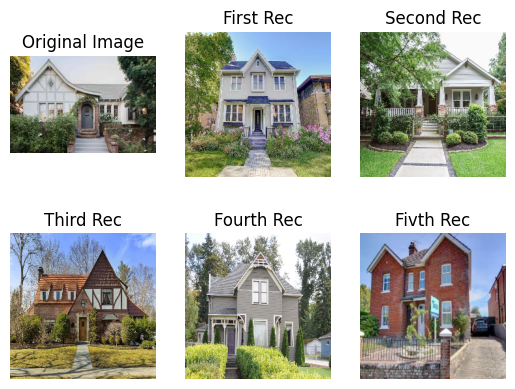

In [44]:
fig, axs = plt.subplots(2, 3)
# Display the images in the subplots
axs[0, 0].imshow(cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
axs[0, 1].axis('off')
axs[0, 1].set_title('First Rec')
axs[0, 2].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
axs[0, 2].axis('off')
axs[0, 2].set_title('Second Rec')
axs[1, 0].imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
axs[1, 0].axis('off')
axs[1, 0].set_title('Third Rec')
axs[1, 1].imshow(cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB))
axs[1, 1].axis('off')
axs[1, 1].set_title('Fourth Rec')
axs[1, 2].imshow(cv2.cvtColor(images[4], cv2.COLOR_BGR2RGB))
axs[1, 2].axis('off')
axs[1, 2].set_title('Fivth Rec')

# Show the plot
plt.show()


1/1 [==============================] - 0s 215ms/step


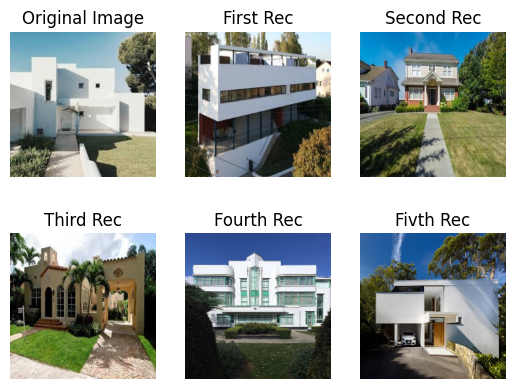

In [45]:

def get_best_matched(img_path):
  test_norm = extracted_features(img_path, model)
  distance, indices = neighbors.kneighbors(test_norm)

  images = []
  org_img = cv2.imread(img_path)
  for file in indices[0][:5]:
    #print(file)
    #print(filename[file])
    img = cv2.imread(merged_filename[file])
    images.append(img)

  fig, axs = plt.subplots(2, 3)
  # Display the images in the subplots
  axs[0, 0].imshow(cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB))
  axs[0, 0].axis('off')
  axs[0, 0].set_title('Original Image')
  axs[0, 1].imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
  axs[0, 1].axis('off')
  axs[0, 1].set_title('First Rec')
  axs[0, 2].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
  axs[0, 2].axis('off')
  axs[0, 2].set_title('Second Rec')
  axs[1, 0].imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
  axs[1, 0].axis('off')
  axs[1, 0].set_title('Third Rec')
  axs[1, 1].imshow(cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB))
  axs[1, 1].axis('off')
  axs[1, 1].set_title('Fourth Rec')
  axs[1, 2].imshow(cv2.cvtColor(images[4], cv2.COLOR_BGR2RGB))
  axs[1, 2].axis('off')
  axs[1, 2].set_title('Fivth Rec')

  # Show the plot
  plt.show()


get_best_matched("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/5.jpg")

1/1 [==============================] - 0s 195ms/step


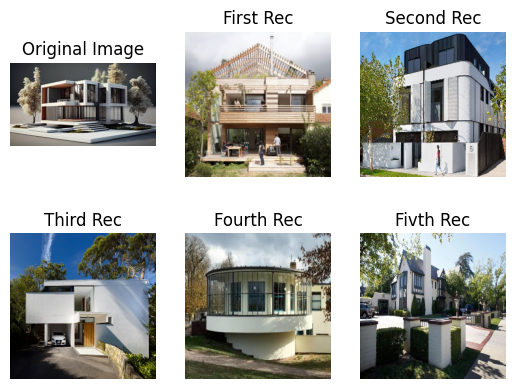

In [46]:
get_best_matched("/content/drive/MyDrive/ALJameel_Task/Architectural_Designs/6.jpg")